In [2]:
!pip install kaggle;
!pip install catboost;
!pip install ipywidgets;
!pip install bayesian-optimization;

Traceback (most recent call last):



In [3]:
!pip install h2o

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import*
from sklearn import pipeline
from sklearn.preprocessing import*
from sklearn.decomposition import*
from sklearn.manifold import*
from sklearn.ensemble import*
from sklearn.metrics import*
from sklearn import*
import catboost as ctb
import lightgbm as lgb
plt.rcParams['figure.figsize'] = (20, 15)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
%tensorflow_version 2.x
import re
from tqdm import*
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import*
from tensorflow.keras.layers import*
import datetime as dt
import gc
from time import*
from bayes_opt import *
import h2o
from h2o.automl import H2OAutoML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HP/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HP/test.csv')

In [6]:
train_idx=df_train.shape[0]

In [7]:
#Train+test for more eazy eda and features

In [8]:
df = pd.concat([df_train.drop('SalePrice',axis=1),df_test])
print(df.shape)
df.head()

(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
targ = df_train['SalePrice']


In [10]:
df.index= df.pop('Id')

In [11]:
#check objects to find ones that can't be obj
df.select_dtypes(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [12]:
#check non objects to find ones that can be obj
df.select_dtypes(exclude='O')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006


In [13]:
#binar class for rare items
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  if df[column].quantile(0.9)==0:
    df[column] = df[column].apply(lambda x: 0 if x==0 else 1).astype('O')
    print(j,column)

14 LowQualFinSF
17 BsmtHalfBath
30 3SsnPorch
31 ScreenPorch
32 PoolArea
33 MiscVal



In [14]:
# to obj low var int
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  if df[column].value_counts().shape[0]<20:
    df[column] = df[column].astype('O')
    print(j,column)

0 MSSubClass
3 OverallQual
4 OverallCond
15 BsmtFullBath
16 FullBath
17 HalfBath
18 BedroomAbvGr
19 KitchenAbvGr
20 TotRmsAbvGrd
21 Fireplaces
23 GarageCars
28 MoSold
29 YrSold



In [15]:
#EDA non- object

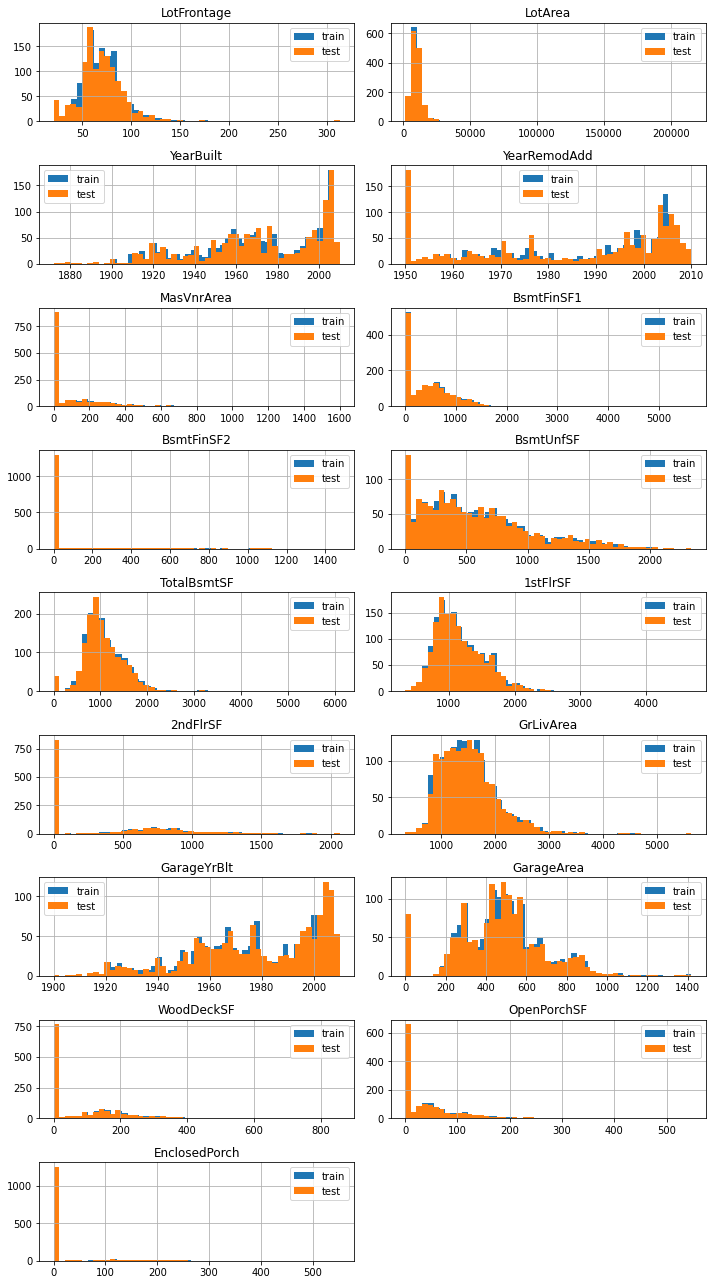

In [16]:
fig = plt.figure(figsize=(10,15*2.5))
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  ax=fig.add_subplot(19,2,j+1)
  ax.set_title(column)
  df[column][:train_idx].hist(bins=50,ax=ax)
  df[column][:train_idx].hist(bins=51,ax=ax)
  plt.legend(['train','test'])
  plt.tight_layout()

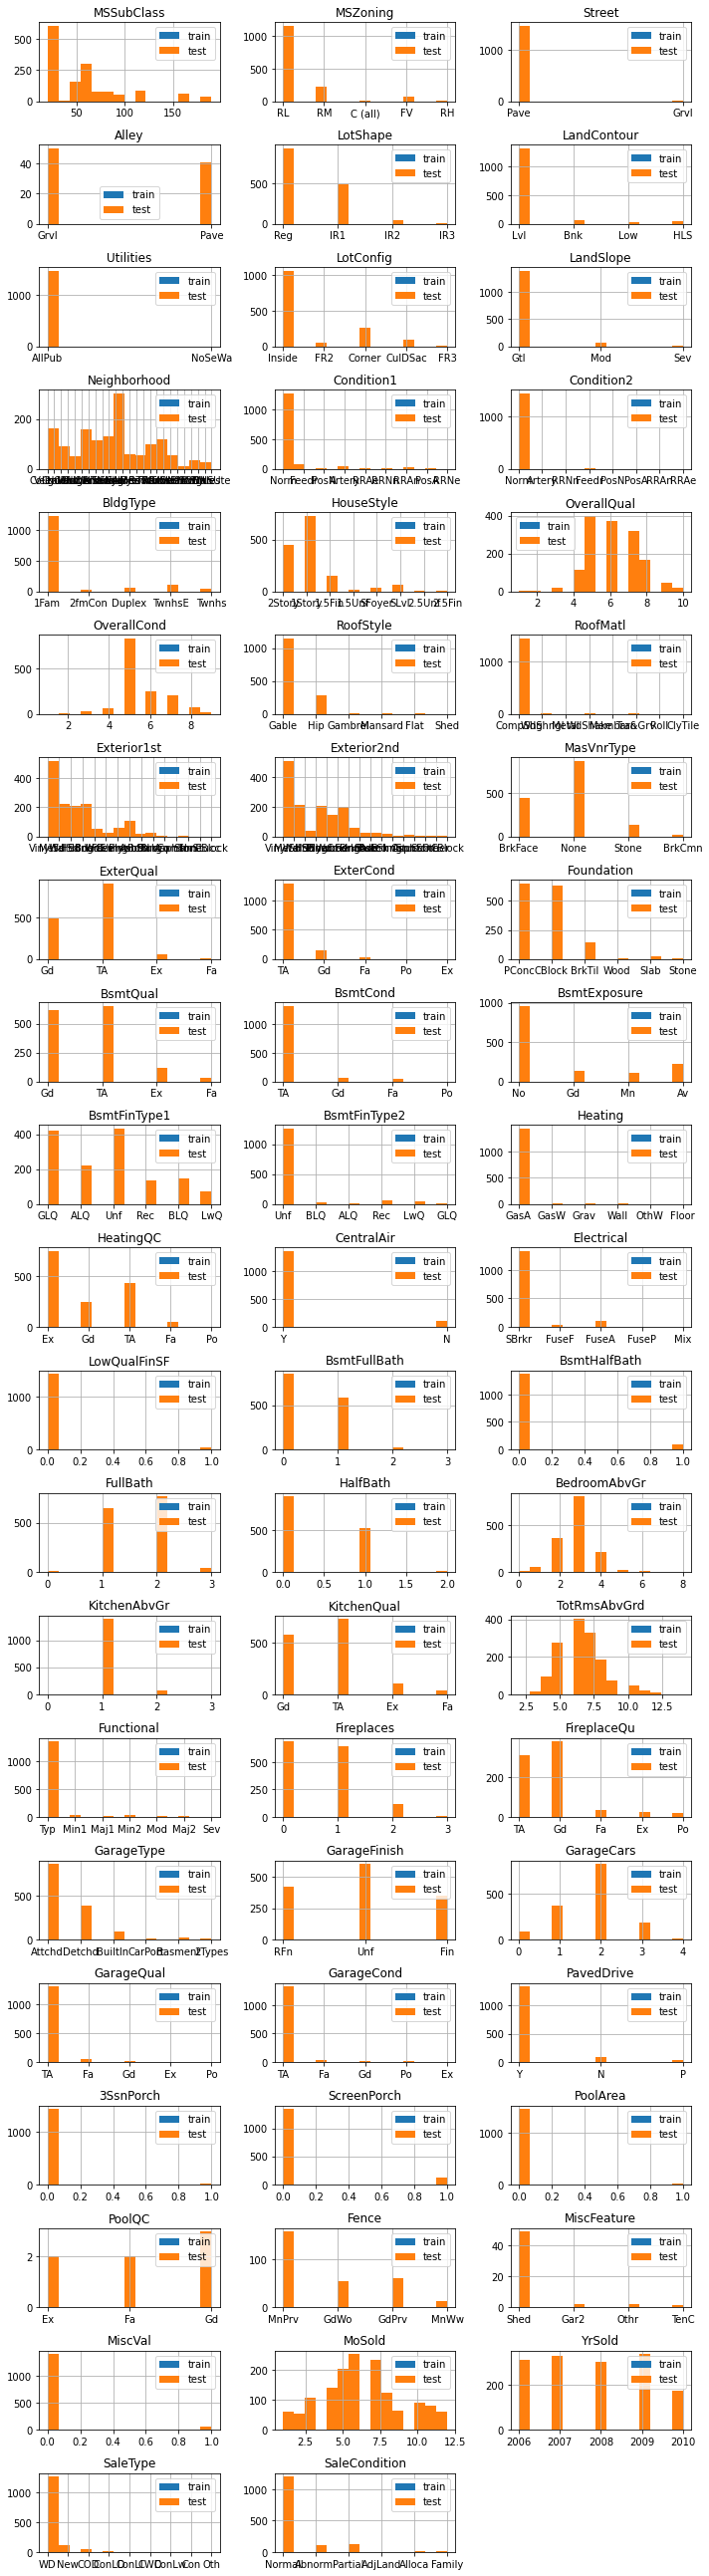

In [17]:
fig = plt.figure(figsize=(10,15*2.5))
for j,column in tqdm_notebook(enumerate(df.select_dtypes(include='O').columns)):
  ax=fig.add_subplot(22,3,j+1)
  ax.set_title(column)
  df[column][:train_idx].hist(bins=15,ax=ax)
  df[column][:train_idx].hist(bins=15,ax=ax)
  plt.legend(['train','test'])
  plt.tight_layout()

In [18]:
#Filling_na's

In [19]:
for i in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']:
 df[i]=df[i].fillna('none')

In [20]:
for i in [x for x in df if df[x].isna().any()==True]:
  if df[i].dtype == 'O': 
    df[i] = df.groupby(['Neighborhood'])[i].apply(lambda x: x.fillna((x.mode())))
    df[i]=df[i].fillna(df[i].mode()[0])
  else: df[i]=impute.KNNImputer().fit_transform(np.array(df[i]).reshape(-1,1))

In [21]:
#FE on num

In [22]:
df.shape

(2919, 79)

In [23]:
df['sec_floor'] = df['2ndFlrSF'].apply(lambda x: 0 if x==0 else 1).astype('O')

In [24]:
df['Bmnt_bath'] = (df['BsmtFullBath']+df['BsmtHalfBath']*0.5).astype('O')
df['Bmnt_bath'] = df['Bmnt_bath'].astype('O')

In [25]:
df['TotalFlrSF'] = df[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].sum(axis=1)

In [26]:
df.GarageYrBlt = df.GarageYrBlt.astype('O')

In [27]:
df['CapRepear'] = df['YearRemodAdd']-df['YearBuilt']
df['CapRepear']=df['CapRepear'].apply(lambda x: 1 if x > 0 else 0)
df['CapRepear'] = df['CapRepear'].astype('O')

In [28]:
df['decade']=pd.qcut(df['YearBuilt'],10)
df['decade'] = df['decade'].factorize()[0].astype('O')

In [ ]:
df_mani = df.copy()

In [ ]:
df_mani[df_mani.select_dtypes('O').columns]=df_mani.select_dtypes('O').apply(lambda x : x.factorize()[0])

In [ ]:
df_tsne = manifold.TSNE(3,250,verbose=1).fit_transform(df_mani)

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 2919 samples in 0.026s...
[t-SNE] Computed neighbors for 2919 samples in 1.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2919
[t-SNE] Computed conditional probabilities for sample 2000 / 2919
[t-SNE] Computed conditional probabilities for sample 2919 / 2919
[t-SNE] Mean sigma: 276.570798
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.930553
[t-SNE] KL divergence after 1000 iterations: 0.367830


In [ ]:
df_lle = manifold.LocallyLinearEmbedding(n_components=3).fit_transform(df_mani)

In [ ]:
dbscan_tsne = cluster.DBSCAN().fit(df_tsne)

In [ ]:
kmeans_lle= cluster.KMeans(5).fit(df_lle)

In [ ]:
mean_shift_lle = cluster.MeanShift().fit(df_lle)

In [ ]:
birch_tsne = cluster.Birch().fit(df_tsne)

In [ ]:
spec_lle = cluster.SpectralClustering().fit(df_lle)

In [ ]:
spec_tsne = cluster.SpectralClustering().fit(df_tsne)

In [ ]:
px.scatter_3d(x=df_tsne[:,0],y=df_tsne[:,1],z=df_tsne[:,2],color=agg_tsne.labels_)

In [ ]:
for i in [mean_shift_lle,dbscan_tsne,kmeans_lle,birch_tsne,spec_tsne]:
  df[i.__class__.__name__] = i.labels_.astype('O')

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sec_floor,Bmnt_bath,TotalFlrSF,CapRepear,decade,MeanShift,DBSCAN,KMeans,Birch,SpectralClustering
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,...,1,3,1,Gd,8,Typ,0,none,Attchd,2003,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,1,1,2566.0,0,0,0,0,0,1,1
2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,...,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,0,0.5,2524.0,0,1,0,19,0,1,0
3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,...,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,1,1,2706.0,1,0,0,26,0,1,2
4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,...,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,1,1,2473.0,1,2,0,1,0,1,1
5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,...,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,1,1,3343.0,0,0,0,2,0,2,2


In [29]:
df.loc[:,df_train.filter(regex='Bath').columns]=df.filter(regex='Bath').apply(lambda x: x.astype('O'),result_type='expand')

In [30]:
obj_cols=df.select_dtypes('O').columns
num_cols=df.select_dtypes(exclude='O').columns

In [31]:
dff = df.copy()

In [ ]:
for obj in tqdm(obj_cols):
  temp = dff.groupby(obj)[num_cols].agg(['mean','std','min','max']).droplevel(1,1)
  temp.columns = [f'{i}_{j}_by_{obj}' for i in num_cols for j in ['mean','std','min','max']]
  dff = dff.merge(temp,how='left',on=obj)

100%|██████████| 66/66 [06:00<00:00,  5.46s/it]


In [ ]:
df.shape

(2919, 84)

In [ ]:
dff.shape

(2919, 4836)

In [ ]:
low_var =[]
for i in dff.columns:
  most_comm = dff[i].value_counts().iloc[0]
  if most_comm/len(dff) > 0.995:
    low_var.append(i)

  

In [ ]:
df_o = dff.drop(low_var,axis=1)

In [ ]:
df_o=df_o.fillna(df_o.mean())

In [ ]:
df_o=df_o.replace(np.inf, 0)

In [ ]:
def fixing_skewness(df):

    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    num_feats = df.dtypes[df.dtypes != "O"].index

    skewed_feats = df[num_feats].apply(lambda x: skew(x))
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    for feat in tqdm(skewed_features):
      try:
        print('Before',feat,df[feat].mean())
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
        print('After',feat,df[feat].mean())
      except:
          pass


fixing_skewness(df_o)
fixing_skewness(dff)


  0%|          | 0/3145 [00:00<?, ?it/s]

Before MSSubClass 57.1377183967112
After MSSubClass 5.9513370575738485
Before LotFrontage 69.30579531442702
After LotFrontage 14.036879572753866
Before LotArea 10168.11408016444
After LotArea 13.558561388929517
Before OverallCond 5.564576909900651
After OverallCond 4.367477299147373


  0%|          | 4/3145 [00:00<01:27, 35.97it/s]

Before YearBuilt 1971.3127783487496
After YearBuilt 2.4176054795921516e+51
Before MasVnrArea 102.20131215469617
After MasVnrArea 8.201177846050088
Before BsmtFinSF1 441.4232350925291
After BsmtFinSF1 72.23892879631033
Before BsmtFinSF2 49.582248115147365
After BsmtFinSF2 1.15300302902385
Before BsmtUnfSF 560.7721041809458
After BsmtUnfSF 60.14392798947375


  0%|          | 9/3145 [00:00<01:21, 38.47it/s]

Before TotalBsmtSF 1051.7775873886224
After TotalBsmtSF 342.85348190361407
Before 1stFlrSF 1159.5817060637205
After 1stFlrSF 5.467014713001915
Before 2ndFlrSF 336.4837273038712
After 2ndFlrSF 401.4520027516348
Before LowQualFinSF 0.013703323055841042
After LowQualFinSF 0.011964296417628653


  0%|          | 13/3145 [00:00<01:21, 38.28it/s]

Before GrLivArea 1500.7598492634463
After GrLivArea 7.060554277832014
Before BsmtFullBath 0.4295991778006166
After BsmtFullBath 0.42635521692470985
Before BsmtHalfBath 0.06063720452209661
After BsmtHalfBath 3.219229473550133
Before HalfBath 0.3802672147995889
After HalfBath 0.407498627162867
Before KitchenAbvGr 1.0445357999314835
After KitchenAbvGr 0.7727815472293015


  1%|          | 18/3145 [00:00<01:20, 38.92it/s]

Before TotRmsAbvGrd 6.451524494689962
After TotRmsAbvGrd 2.021011048235906
Before Fireplaces 0.5971223021582733
After Fireplaces 0.5274430358299617
Before WoodDeckSF 93.70983213429257
After WoodDeckSF 19.78252076803289
Before OpenPorchSF 47.486810551558754
After OpenPorchSF 7.372675441517496


  1%|          | 22/3145 [00:00<01:21, 38.12it/s]

Before EnclosedPorch 23.098321342925658
After EnclosedPorch 1.8834017005573442
Before 3SsnPorch 0.012675573826652964
After 3SsnPorch 0.5297254654827184
Before ScreenPorch 0.08770126755738267
After ScreenPorch 3.659504983539009
Before MiscVal 0.03528605686879068
After MiscVal 1.474865877498506


  1%|          | 26/3145 [00:00<01:24, 37.13it/s]

Before Bmnt_bath 0.45991778006166495
After Bmnt_bath 0.45057347794196406
Before TotalFlrSF 2547.843020756214
After TotalFlrSF 22.29109124029643
Before LotFrontage_mean_by_MSSubClass 69.30579531442582
After LotFrontage_mean_by_MSSubClass 1790659000.9652753
Before LotFrontage_min_by_MSSubClass 35.51911812103955
After LotFrontage_min_by_MSSubClass 1466.8566125288744
Before LotArea_mean_by_MSSubClass 10168.114080164489
After LotArea_mean_by_MSSubClass 6.352049024028338e+17


  1%|          | 31/3145 [00:00<01:17, 39.93it/s]

Before LotArea_std_by_MSSubClass 6645.863063074607
After LotArea_std_by_MSSubClass 45.181210191417705
Before LotArea_min_by_MSSubClass 3253.085645769099
After LotArea_min_by_MSSubClass 113.72022630517729
Before YearBuilt_mean_by_MSSubClass 1971.312778348733
After YearBuilt_mean_by_MSSubClass 4.682431675606405e+213
Before YearBuilt_max_by_MSSubClass 2002.006166495375
After YearBuilt_max_by_MSSubClass inf


  1%|          | 35/3145 [00:00<01:18, 39.73it/s]

Before YearRemodAdd_min_by_MSSubClass 1952.5998629667695
After YearRemodAdd_min_by_MSSubClass 0.2836380463371605
Before YearRemodAdd_max_by_MSSubClass 2009.2141144227476
After YearRemodAdd_max_by_MSSubClass inf
Before MasVnrArea_mean_by_MSSubClass 102.20131215469596
After MasVnrArea_mean_by_MSSubClass 981.4373968705304
Before MasVnrArea_std_by_MSSubClass 160.8939891502519
After MasVnrArea_std_by_MSSubClass 8031.078528934894


  1%|          | 39/3145 [00:00<01:19, 39.14it/s]

Before MasVnrArea_max_by_MSSubClass 1064.1671805412814
After MasVnrArea_max_by_MSSubClass 10454.09165492705
Before BsmtFinSF1_mean_by_MSSubClass 441.42323509252867
After BsmtFinSF1_mean_by_MSSubClass 72710.42605062619
Before BsmtFinSF1_std_by_MSSubClass 413.75295112975425
After BsmtFinSF1_std_by_MSSubClass 2.562424599283991e+36
Before BsmtFinSF1_min_by_MSSubClass 0.8989379924631723
After BsmtFinSF1_min_by_MSSubClass 0.03455626449570723
Before BsmtFinSF2_std_by_MSSubClass 158.64919618645052
After BsmtFinSF2_std_by_MSSubClass 986.1743385163572
Before BsmtFinSF2_max_by_MSSubClass 1199.781089414183
After BsmtFinSF2_max_by_MSSubClass 43045.968474437075


  1%|▏         | 45/3145 [00:01<01:14, 41.86it/s]

Before BsmtUnfSF_mean_by_MSSubClass 560.7721041809347
After BsmtUnfSF_mean_by_MSSubClass 5848761109.67127
Before BsmtUnfSF_min_by_MSSubClass 1.2665296334361082
After BsmtUnfSF_min_by_MSSubClass 0.038130004567142696
Before BsmtUnfSF_max_by_MSSubClass 1942.7416923603973
After BsmtUnfSF_max_by_MSSubClass 26144792891.567806
Before TotalBsmtSF_min_by_MSSubClass 68.67694415895855
After TotalBsmtSF_min_by_MSSubClass 2.8582838215192545
Before 1stFlrSF_min_by_MSSubClass 471.3528605686879
After 1stFlrSF_min_by_MSSubClass 25.796885117269195


  2%|▏         | 50/3145 [00:01<01:11, 43.36it/s]

Before 2ndFlrSF_mean_by_MSSubClass 336.48372730388434
After 2ndFlrSF_mean_by_MSSubClass 81.83287919399841
Before 2ndFlrSF_std_by_MSSubClass 143.66753680610532
After 2ndFlrSF_std_by_MSSubClass 12.170485484996496
Before 2ndFlrSF_min_by_MSSubClass 125.1990407673861
After 2ndFlrSF_min_by_MSSubClass 365686.11225201614
Before GarageCars_std_by_MSSubClass 0.6631304239076021
After GarageCars_std_by_MSSubClass 0.4270690899626192
Before GarageCars_min_by_MSSubClass 0.302158273381295
After GarageCars_min_by_MSSubClass 12.624409582731625


  2%|▏         | 55/3145 [00:01<01:09, 44.57it/s]

Before GarageCars_max_by_MSSubClass 3.8475505310037685
After GarageCars_max_by_MSSubClass 10.622495341043834
Before GarageArea_mean_by_MSSubClass 472.8745716244097
After GarageArea_mean_by_MSSubClass 1158054.5651523543
Before GarageArea_min_by_MSSubClass 73.13943131209318
After GarageArea_min_by_MSSubClass 123220.64408763913
Before GarageArea_max_by_MSSubClass 1284.406646111682
After GarageArea_max_by_MSSubClass 6.46323259652995e+29
Before OpenPorchSF_mean_by_MSSubClass 47.48681055155789
After OpenPorchSF_mean_by_MSSubClass 6.110248835202526
Before OpenPorchSF_std_by_MSSubClass 63.62928097290012
After OpenPorchSF_std_by_MSSubClass 6.468319705433426


  2%|▏         | 61/3145 [00:01<01:07, 45.71it/s]

Before OpenPorchSF_max_by_MSSubClass 464.47584789311406
After OpenPorchSF_max_by_MSSubClass 17807.865667126418
Before EnclosedPorch_mean_by_MSSubClass 23.098321342926187
After EnclosedPorch_mean_by_MSSubClass 3.2410253210652513
Before EnclosedPorch_std_by_MSSubClass 55.47759133451535
After EnclosedPorch_std_by_MSSubClass 25.763341396829222
Before EnclosedPorch_max_by_MSSubClass 473.64439876670093
After EnclosedPorch_max_by_MSSubClass 57.586508733089296
Before TotalFlrSF_mean_by_MSSubClass 2547.843020756198
After TotalFlrSF_mean_by_MSSubClass 85238657.94944336


  2%|▏         | 66/3145 [00:01<01:09, 44.46it/s]

Before TotalFlrSF_std_by_MSSubClass 707.0976935343631
After TotalFlrSF_std_by_MSSubClass 57021.774356894886
Before LotFrontage_mean_by_MSZoning 69.305795314429
After LotFrontage_mean_by_MSZoning 36459.22842547064
Before LotFrontage_std_by_MSZoning 19.94532376563022
After LotFrontage_std_by_MSZoning 1.241644384677681
Before LotFrontage_min_by_MSZoning 22.21308667351833
After LotFrontage_min_by_MSZoning 0.05278640538309066
Before LotFrontage_max_by_MSZoning 274.59917780061664
After LotFrontage_max_by_MSZoning 2.2733090023773594


  2%|▏         | 71/3145 [00:01<01:08, 44.78it/s]

Before LotArea_mean_by_MSZoning 10168.11408016428
After LotArea_mean_by_MSZoning 0.11803399074603291
Before LotArea_std_by_MSZoning 7326.177861699541
After LotArea_std_by_MSZoning 0.5373090239031745
Before LotArea_min_by_MSZoning 1691.5282631038026
After LotArea_min_by_MSZoning 0.7477287331545357
Before LotArea_max_by_MSZoning 173422.9712230216
After LotArea_max_by_MSZoning 4.955002285730082
Before YearBuilt_mean_by_MSZoning 1971.3127783487537
After YearBuilt_mean_by_MSZoning 2.1288410584113035e+58


  2%|▏         | 76/3145 [00:01<01:10, 43.49it/s]

Before YearBuilt_std_by_MSZoning 25.74045079290004
After YearBuilt_std_by_MSZoning 9357.857044922945
Before YearBuilt_min_by_MSZoning 1880.8198013018157
After YearBuilt_min_by_MSZoning 0.28254124058948044
Before YearBuilt_max_by_MSZoning 2009.1596437136006
After YearBuilt_max_by_MSZoning inf
Before YearRemodAdd_mean_by_MSZoning 1984.2644741350339
After YearRemodAdd_mean_by_MSZoning 0.2964729630984848
Before YearRemodAdd_std_by_MSZoning 19.597799158461328
After YearRemodAdd_std_by_MSZoning 3422665.4083488057


  3%|▎         | 81/3145 [00:01<01:12, 41.98it/s]

Before YearRemodAdd_min_by_MSZoning 1952.2857142857142
After YearRemodAdd_min_by_MSZoning 3.0722257628430094e+20
Before YearRemodAdd_max_by_MSZoning 2009.781089414183
After YearRemodAdd_max_by_MSZoning inf
Before MasVnrArea_mean_by_MSZoning 102.20131215469405
After MasVnrArea_mean_by_MSZoning 28754943716.29411
Before MasVnrArea_std_by_MSZoning 174.43513409884034
After MasVnrArea_std_by_MSZoning 3406.982949740364
Before MasVnrArea_max_by_MSZoning 1272.6070572113738
After MasVnrArea_max_by_MSZoning 76531929184127.95


  3%|▎         | 86/3145 [00:02<01:12, 42.19it/s]

Before BsmtFinSF1_mean_by_MSZoning 441.4232350925241
After BsmtFinSF1_mean_by_MSZoning 1379896.6481253146
Before BsmtFinSF1_std_by_MSZoning 443.7586739745543
After BsmtFinSF1_std_by_MSZoning 4.027382575071051e+17
Before BsmtFinSF1_max_by_MSZoning 4744.030832476876
After BsmtFinSF1_max_by_MSZoning 0.9983841097233735
Before BsmtFinSF2_mean_by_MSZoning 49.58224811514668
After BsmtFinSF2_mean_by_MSZoning 19.062835281409345
Before BsmtFinSF2_std_by_MSZoning 164.1790041024837
After BsmtFinSF2_std_by_MSZoning 730.849241496931


  3%|▎         | 91/3145 [00:02<01:10, 43.43it/s]

Before BsmtFinSF2_max_by_MSZoning 1396.6618705035971
After BsmtFinSF2_max_by_MSZoning 1443543.0873485892
Before BsmtUnfSF_mean_by_MSZoning 560.7721041809167
After BsmtUnfSF_mean_by_MSZoning 0.34890614180070684
Before BsmtUnfSF_std_by_MSZoning 436.20477582575535
After BsmtUnfSF_std_by_MSZoning 2.512509528729818e+30
Before BsmtUnfSF_max_by_MSZoning 2175.248372730387
After BsmtUnfSF_max_by_MSZoning 2203.6818697649574
Before TotalBsmtSF_mean_by_MSZoning 1051.7775873886114
After TotalBsmtSF_mean_by_MSZoning 1.8169209548703624e+85


  3%|▎         | 96/3145 [00:02<01:08, 44.21it/s]

Before TotalBsmtSF_std_by_MSZoning 419.0630822978303
After TotalBsmtSF_std_by_MSZoning 6086942.88352112
Before TotalBsmtSF_min_by_MSZoning 25.238095238095237
After TotalBsmtSF_min_by_MSZoning 3028008116491.8477
Before TotalBsmtSF_max_by_MSZoning 5159.673175745118
After TotalBsmtSF_max_by_MSZoning 0.740605380244151
Before 1stFlrSF_mean_by_MSZoning 1159.5817060636705
After 1stFlrSF_mean_by_MSZoning 30413155080532.867
Before 1stFlrSF_std_by_MSZoning 370.894882474518
After 1stFlrSF_std_by_MSZoning 1.1561862218576442e+21


  3%|▎         | 101/3145 [00:02<01:07, 44.85it/s]

Before 1stFlrSF_min_by_MSZoning 352.91812264474135
After 1stFlrSF_min_by_MSZoning 0.18742496564987615
Before 1stFlrSF_max_by_MSZoning 4375.833847207948
After 1stFlrSF_max_by_MSZoning 0.772400473221738
Before 2ndFlrSF_mean_by_MSZoning 336.4837273038824
After 2ndFlrSF_mean_by_MSZoning 0.2648683297071314
Before 2ndFlrSF_std_by_MSZoning 424.6324336593081
After 2ndFlrSF_std_by_MSZoning 6583848.987080441
Before 2ndFlrSF_max_by_MSZoning 1993.9907502569374
After 2ndFlrSF_max_by_MSZoning 2018854520756282.0


  3%|▎         | 106/3145 [00:02<01:11, 42.42it/s]

Before GrLivArea_mean_by_MSZoning 1500.759849263433
After GrLivArea_mean_by_MSZoning 1.5829603062674993e+78
Before GrLivArea_std_by_MSZoning 496.82139291265497
After GrLivArea_std_by_MSZoning 899850152.9787086
Before GrLivArea_min_by_MSZoning 386.1349777321
After GrLivArea_min_by_MSZoning 0.21030768378422796
Before GrLivArea_max_by_MSZoning 5147.179856115108
After GrLivArea_max_by_MSZoning 3.271079849720354
Before GarageCars_mean_by_MSZoning 1.766700924974302
After GarageCars_mean_by_MSZoning 72.26681800069142


  4%|▎         | 111/3145 [00:02<01:11, 42.32it/s]

Before GarageCars_std_by_MSZoning 0.7242719033154186
After GarageCars_std_by_MSZoning 410.4786393189304
Before GarageCars_min_by_MSZoning 0.047619047619047616
After GarageCars_min_by_MSZoning 0.08704197836290531
Before GarageArea_mean_by_MSZoning 472.87457162439716
After GarageArea_mean_by_MSZoning 484918852.5531119
Before GarageArea_std_by_MSZoning 205.49588999266652
After GarageArea_std_by_MSZoning 476.4342294871918
Before GarageArea_min_by_MSZoning 19.047619047619047
After GarageArea_min_by_MSZoning 0.037304080363358645


  4%|▎         | 116/3145 [00:02<01:08, 44.30it/s]

Before GarageArea_max_by_MSZoning 1414.3038711887632
After GarageArea_max_by_MSZoning 587.5660209982825
Before WoodDeckSF_mean_by_MSZoning 93.70983213429434
After WoodDeckSF_mean_by_MSZoning 97.93484533889438
Before WoodDeckSF_std_by_MSZoning 123.2880329195467
After WoodDeckSF_std_by_MSZoning 5073.325298265644
Before WoodDeckSF_max_by_MSZoning 1240.0315176430283
After WoodDeckSF_max_by_MSZoning 1206.6383579497847
Before OpenPorchSF_mean_by_MSZoning 47.4868105515597
After OpenPorchSF_mean_by_MSZoning 0.5734528643980861


  4%|▍         | 121/3145 [00:02<01:07, 44.61it/s]

Before OpenPorchSF_std_by_MSZoning 65.74019252148918
After OpenPorchSF_std_by_MSZoning 0.3434985914745017
Before OpenPorchSF_max_by_MSZoning 687.3528605686879
After OpenPorchSF_max_by_MSZoning 410024.4450939478
Before EnclosedPorch_mean_by_MSZoning 23.098321342926194
After EnclosedPorch_mean_by_MSZoning 7.987074401732111
Before EnclosedPorch_std_by_MSZoning 61.091868998894554
After EnclosedPorch_std_by_MSZoning 13105.134883632541
Before EnclosedPorch_max_by_MSZoning 854.0092497430627
After EnclosedPorch_max_by_MSZoning 413.4060408309248


  4%|▍         | 126/3145 [00:02<01:08, 44.22it/s]

Before TotalFlrSF_mean_by_MSZoning 2547.8430207562574
After TotalFlrSF_mean_by_MSZoning 1002.9955294009436
Before TotalFlrSF_std_by_MSZoning 771.0113553556449
After TotalFlrSF_std_by_MSZoning 0.3379525242594775
Before TotalFlrSF_min_by_MSZoning 450.7190818773553
After TotalFlrSF_min_by_MSZoning 0.8311714323283017
Before TotalFlrSF_max_by_MSZoning 10208.351147653306
After TotalFlrSF_max_by_MSZoning 0.11803399074603291
Before LotFrontage_mean_by_Alley 69.30579531442281
After LotFrontage_mean_by_Alley 362822592757014.44


  4%|▍         | 131/3145 [00:03<01:07, 44.97it/s]

Before LotFrontage_std_by_Alley 20.873280799197836
After LotFrontage_std_by_Alley 4.728143273371546e+16
Before LotFrontage_min_by_Alley 21.45015416238438
After LotFrontage_min_by_Alley 0.09854881915904005
Before LotFrontage_max_by_Alley 301.1048304213772
After LotFrontage_max_by_Alley 18.777819294703725
Before LotArea_mean_by_Alley 10168.114080163994
After LotArea_mean_by_Alley 1.2805428809298772e+28
Before LotArea_std_by_Alley 7737.534380161753
After LotArea_std_by_Alley 0.5796394726368767


  4%|▍         | 136/3145 [00:03<01:07, 44.35it/s]

Before LotArea_min_by_Alley 1392.8674203494347
After LotArea_min_by_Alley 0.5702757321602306
Before LotArea_max_by_Alley 201732.2147995889
After LotArea_max_by_Alley 0.11803399074603291
Before YearBuilt_mean_by_Alley 1971.3127783486675
After YearBuilt_mean_by_Alley inf
Before YearBuilt_std_by_Alley 28.27423905702216
After YearBuilt_std_by_Alley 4.363056084737358
Before YearBuilt_min_by_Alley 1875.0842754367934
After YearBuilt_min_by_Alley 0.11803399074603291


  4%|▍         | 141/3145 [00:03<01:10, 42.42it/s]

Before YearBuilt_max_by_Alley 2009.9177800616649
After YearBuilt_max_by_Alley 3.7826129639300216e+16
Before YearRemodAdd_mean_by_Alley 1984.2644741349263
After YearRemodAdd_mean_by_Alley inf
Before YearRemodAdd_std_by_Alley 20.66550232080587
After YearRemodAdd_std_by_Alley 0.01814004053460233
Before YearRemodAdd_max_by_Alley 2009.9588900308324
After YearRemodAdd_max_by_Alley 2.412939548669853e+19
Before MasVnrArea_mean_by_Alley 102.20131215468957
After MasVnrArea_mean_by_Alley 7.3197090381578e+65


  5%|▍         | 146/3145 [00:03<01:10, 42.52it/s]

Before MasVnrArea_std_by_Alley 175.33821450383306
After MasVnrArea_std_by_Alley 4347.838367096846
Before MasVnrArea_max_by_Alley 1342.0822199383351
After MasVnrArea_max_by_Alley 255060111522301.06
Before BsmtFinSF1_mean_by_Alley 441.42323509251963
After BsmtFinSF1_mean_by_Alley 196801.70330741038
Before BsmtFinSF1_std_by_Alley 447.51109782191406
After BsmtFinSF1_std_by_Alley 5299356105.56293
Before BsmtFinSF1_max_by_Alley 5329.192189105858
After BsmtFinSF1_max_by_Alley 0.6814590662196021
Before BsmtFinSF2_mean_by_Alley 49.58224811514729
After BsmtFinSF2_mean_by_Alley 871.3040274830555


  5%|▍         | 152/3145 [00:03<01:06, 44.92it/s]

Before BsmtFinSF2_std_by_Alley 168.40068246153677
After BsmtFinSF2_std_by_Alley 8676692.511850104
Before BsmtFinSF2_max_by_Alley 1489.0996916752313
After BsmtFinSF2_max_by_Alley 9413306.045387316
Before BsmtUnfSF_mean_by_Alley 560.7721041809239
After BsmtUnfSF_mean_by_Alley 0.11803399074603291
Before BsmtUnfSF_std_by_Alley 437.9162835738086
After BsmtUnfSF_std_by_Alley 6.862021732893105e+89
Before BsmtUnfSF_max_by_Alley 2277.6443987667008
After BsmtUnfSF_max_by_Alley 985310397116.8517


  5%|▍         | 157/3145 [00:03<01:05, 45.69it/s]

Before TotalBsmtSF_mean_by_Alley 1051.7775873885846
After TotalBsmtSF_mean_by_Alley 3.167023704672687e+27
Before TotalBsmtSF_std_by_Alley 434.3288573329085
After TotalBsmtSF_std_by_Alley 192886157375.8358
Before TotalBsmtSF_max_by_Alley 5803.74717368962
After TotalBsmtSF_max_by_Alley 0.5512055264322716
Before 1stFlrSF_mean_by_Alley 1159.5817060637885
After 1stFlrSF_mean_by_Alley 4001511671.1876206
Before 1stFlrSF_std_by_Alley 386.6299930709648
After 1stFlrSF_std_by_Alley 359619916051913.8


  5%|▌         | 162/3145 [00:03<01:03, 46.85it/s]

Before 1stFlrSF_min_by_Alley 345.71223021582733
After 1stFlrSF_min_by_Alley 2877541329545751.5
Before 1stFlrSF_max_by_Alley 4863.927029804728
After 1stFlrSF_max_by_Alley 0.11803399074603291
Before 2ndFlrSF_mean_by_Alley 336.48372730385813
After 2ndFlrSF_mean_by_Alley 22074670561.338535
Before 2ndFlrSF_std_by_Alley 426.08102758445904
After 2ndFlrSF_std_by_Alley 2.342874953950172e+118
Before 2ndFlrSF_max_by_Alley 2022.36690647482
After 2ndFlrSF_max_by_Alley 1.2194983972206707e+32


  5%|▌         | 167/3145 [00:03<01:05, 45.77it/s]

Before GrLivArea_mean_by_Alley 1500.75984926351
After GrLivArea_mean_by_Alley 4.195491342218557e+81
Before GrLivArea_std_by_Alley 505.7243647872153
After GrLivArea_std_by_Alley 0.11803399074603291
Before GrLivArea_min_by_Alley 353.62178828365876
After GrLivArea_min_by_Alley 0.33841388385133236
Before GrLivArea_max_by_Alley 5464.793422404933
After GrLivArea_max_by_Alley 410.68509471572395
Before GarageCars_mean_by_Alley 1.766700924974245
After GarageCars_mean_by_Alley 1.5938515268153094e+36


  5%|▌         | 172/3145 [00:03<01:05, 45.37it/s]

Before GarageCars_std_by_Alley 0.7561232533990051
After GarageCars_std_by_Alley 1342.9945906551416
Before GarageCars_max_by_Alley 4.932168550873587
After GarageCars_max_by_Alley 0.16666245861577014
Before GarageArea_mean_by_Alley 472.8745716244219
After GarageArea_mean_by_Alley inf
Before GarageArea_std_by_Alley 213.93149981031982
After GarageArea_std_by_Alley 3575289.9287808803
Before GarageArea_max_by_Alley 1406.0739979445016
After GarageArea_max_by_Alley 3.852547545211436e+42


  6%|▌         | 177/3145 [00:04<01:04, 46.32it/s]

Before WoodDeckSF_mean_by_Alley 93.70983213429024
After WoodDeckSF_mean_by_Alley 1191.8829976698353
Before WoodDeckSF_std_by_Alley 125.16404320662441
After WoodDeckSF_std_by_Alley 3465702246854.8125
Before WoodDeckSF_max_by_Alley 1353.0359712230215
After WoodDeckSF_max_by_Alley 423.8174704733712
Before OpenPorchSF_mean_by_Alley 47.48681055155735
After OpenPorchSF_mean_by_Alley 0.25004436057968543
Before OpenPorchSF_std_by_Alley 67.02151604383933
After OpenPorchSF_std_by_Alley 0.16664414814337294


  6%|▌         | 182/3145 [00:04<01:05, 45.45it/s]

Before OpenPorchSF_max_by_Alley 724.3638232271326
After OpenPorchSF_max_by_Alley 19890441693.85153
Before EnclosedPorch_mean_by_Alley 23.098321342927175
After EnclosedPorch_mean_by_Alley 0.3260814882708721
Before EnclosedPorch_std_by_Alley 62.73495385734499
After EnclosedPorch_std_by_Alley 0.20897715801740008
Before EnclosedPorch_max_by_Alley 971.4285714285714
After EnclosedPorch_max_by_Alley 0.4377425595894614
Before TotalFlrSF_mean_by_Alley 2547.8430207560823
After TotalFlrSF_mean_by_Alley 5.549608694056482e+105


  6%|▌         | 187/3145 [00:04<01:05, 44.94it/s]

Before TotalFlrSF_std_by_Alley 798.6769691441093
After TotalFlrSF_std_by_Alley 0.11803399074603291
Before TotalFlrSF_min_by_Alley 395.8992805755396
After TotalFlrSF_min_by_Alley 2.497228825628188
Before TotalFlrSF_max_by_Alley 11248.766700924974
After TotalFlrSF_max_by_Alley 0.11803399074603291
Before LotFrontage_mean_by_LotShape 69.30579531442847
After LotFrontage_mean_by_LotShape 0.13754998742886929
Before LotFrontage_std_by_LotShape 20.506094397725555
After LotFrontage_std_by_LotShape 0.09500419275764342


  6%|▌         | 192/3145 [00:04<01:05, 44.80it/s]

Before LotFrontage_min_by_LotShape 22.40184994861254
After LotFrontage_min_by_LotShape 1.1757796089273271
Before LotFrontage_max_by_LotShape 201.90339157245631
After LotFrontage_max_by_LotShape 0.11803399074603291
Before LotArea_mean_by_LotShape 10168.114080164994
After LotArea_mean_by_LotShape 0.11803399074603291
Before LotArea_std_by_LotShape 5934.705502528682
After LotArea_std_by_LotShape 0.11803399074603291
Before LotArea_min_by_LotShape 1764.9701952723535
After LotArea_min_by_LotShape 4.232703135465925


  6%|▋         | 197/3145 [00:04<01:06, 44.26it/s]

Before LotArea_max_by_LotShape 87627.71497088044
After LotArea_max_by_LotShape 220687070636187.66
Before YearBuilt_mean_by_LotShape 1971.3127783486775
After YearBuilt_mean_by_LotShape inf
Before YearBuilt_std_by_LotShape 28.772094366923625
After YearBuilt_std_by_LotShape 0.05278640538309066
Before YearBuilt_min_by_LotShape 1875.3381294964029
After YearBuilt_min_by_LotShape 0.27677831501413397
Before YearBuilt_max_by_LotShape 2009.9630010277492
After YearBuilt_max_by_LotShape inf


  6%|▋         | 202/3145 [00:04<01:09, 42.07it/s]

Before YearRemodAdd_mean_by_LotShape 1984.2644741349486
After YearRemodAdd_mean_by_LotShape 1.1570015135731039e+42
Before YearRemodAdd_std_by_LotShape 20.32072416578506
After YearRemodAdd_std_by_LotShape 1990.2294149680909
Before YearRemodAdd_min_by_LotShape 1950.065775950668
After YearRemodAdd_min_by_LotShape 1.5282291835755557e+24
Before YearRemodAdd_max_by_LotShape 2009.9890373415553
After YearRemodAdd_max_by_LotShape 8.971206628101576e+26
Before MasVnrArea_mean_by_LotShape 102.2013121546973
After MasVnrArea_mean_by_LotShape 4.457688035936359


  7%|▋         | 207/3145 [00:04<01:12, 40.59it/s]

Before MasVnrArea_std_by_LotShape 176.02692698753404
After MasVnrArea_std_by_LotShape 19420.88471059551
Before BsmtFinSF1_mean_by_LotShape 441.42323509251804
After BsmtFinSF1_mean_by_LotShape 1.8799608178462435
Before BsmtFinSF1_std_by_LotShape 442.15390670678465
After BsmtFinSF1_std_by_LotShape 0.2907302452126236
Before BsmtFinSF1_max_by_LotShape 2862.6831106543336
After BsmtFinSF1_max_by_LotShape 0.5169818045047818
Before BsmtFinSF2_mean_by_LotShape 49.58224811514866
After BsmtFinSF2_mean_by_LotShape 2.112259520411142


  7%|▋         | 212/3145 [00:04<01:09, 42.49it/s]

Before BsmtFinSF2_std_by_LotShape 167.60894419894134
After BsmtFinSF2_std_by_LotShape 27943.825728611235
Before BsmtFinSF2_max_by_LotShape 1255.2905104487838
After BsmtFinSF2_max_by_LotShape 0.5653007094138852
Before BsmtUnfSF_mean_by_LotShape 560.772104180954
After BsmtUnfSF_mean_by_LotShape 0.11803399074603291
Before BsmtUnfSF_std_by_LotShape 439.1864850592591
After BsmtUnfSF_std_by_LotShape inf
Before BsmtUnfSF_min_by_LotShape 0.21377183967112023
After BsmtUnfSF_min_by_LotShape 6680769431.010082


  7%|▋         | 217/3145 [00:04<01:06, 44.25it/s]

Before BsmtUnfSF_max_by_LotShape 2251.761562178828
After BsmtUnfSF_max_by_LotShape 9.196624626908844e+22
Before TotalBsmtSF_mean_by_LotShape 1051.7775873885973
After TotalBsmtSF_mean_by_LotShape 0.7645734163295251
Before TotalBsmtSF_std_by_LotShape 425.9782254837777
After TotalBsmtSF_std_by_LotShape 0.19293228985252972
Before TotalBsmtSF_min_by_LotShape 3.7273038711887634
After TotalBsmtSF_min_by_LotShape 6.511785484627298e+20
Before TotalBsmtSF_max_by_LotShape 3753.952038369305
After TotalBsmtSF_max_by_LotShape 0.5663228353692747


  7%|▋         | 222/3145 [00:05<01:07, 43.42it/s]

Before 1stFlrSF_mean_by_LotShape 1159.581706063722
After 1stFlrSF_mean_by_LotShape 17.767052988921343
Before 1stFlrSF_std_by_LotShape 381.20990767716165
After 1stFlrSF_std_by_LotShape 0.25557536101421424
Before 1stFlrSF_min_by_LotShape 381.30524152106887
After 1stFlrSF_min_by_LotShape 3.362113213009909
Before 1stFlrSF_max_by_LotShape 3491.927372387804
After 1stFlrSF_max_by_LotShape 0.24400233595957316
Before 2ndFlrSF_mean_by_LotShape 336.4837273038535
After 2ndFlrSF_mean_by_LotShape 0.23224244514568032


  7%|▋         | 227/3145 [00:05<01:09, 41.89it/s]

Before 2ndFlrSF_std_by_LotShape 425.74039067363805
After 2ndFlrSF_std_by_LotShape 1007.2994071383587
Before GrLivArea_mean_by_LotShape 1500.7598492633908
After GrLivArea_mean_by_LotShape 0.5819822710634149
Before GrLivArea_std_by_LotShape 490.831545000029
After GrLivArea_std_by_LotShape 0.25157858670287436
Before GrLivArea_min_by_LotShape 410.58787255909556
After GrLivArea_min_by_LotShape 3.0490010411052615
Before GrLivArea_max_by_LotShape 4153.027749229188
After GrLivArea_max_by_LotShape 2.4737291665219644e+21


  7%|▋         | 232/3145 [00:05<01:10, 41.37it/s]

Before GarageCars_mean_by_LotShape 1.7667009249742962
After GarageCars_mean_by_LotShape 346942.51397160953
Before GarageCars_std_by_LotShape 0.7366220016790395
After GarageCars_std_by_LotShape 3.558154209270472
Before GarageCars_min_by_LotShape 0.02603631380609798
After GarageCars_min_by_LotShape 1.0882505503872464
Before GarageCars_max_by_LotShape 4.605344295991778
After GarageCars_max_by_LotShape 9.65828220649102
Before GarageArea_mean_by_LotShape 472.87457162441274
After GarageArea_mean_by_LotShape 2.353005511052054e+34


  8%|▊         | 237/3145 [00:05<01:07, 43.21it/s]

Before GarageArea_min_by_LotShape 5.467625899280575
After GarageArea_min_by_LotShape 1.510856489459108e+17
Before GarageArea_max_by_LotShape 1421.7389516957862
After GarageArea_max_by_LotShape 15.239455630701075
Before WoodDeckSF_mean_by_LotShape 93.70983213429753
After WoodDeckSF_mean_by_LotShape 1.7381197649390981e+25
Before WoodDeckSF_std_by_LotShape 123.86753381535605
After WoodDeckSF_std_by_LotShape 1616995403.2338116
Before WoodDeckSF_max_by_LotShape 956.6221308667352
After WoodDeckSF_max_by_LotShape 0.9325651603591605


  8%|▊         | 242/3145 [00:05<01:05, 44.17it/s]

Before OpenPorchSF_mean_by_LotShape 47.48681055155938
After OpenPorchSF_mean_by_LotShape 13.929725449550029
Before OpenPorchSF_std_by_LotShape 67.26515839523282
After OpenPorchSF_std_by_LotShape 0.13191798250205017
Before OpenPorchSF_max_by_LotShape 641.6080849606029
After OpenPorchSF_max_by_LotShape 287.26474314271564
Before EnclosedPorch_mean_by_LotShape 23.098321342926596
After EnclosedPorch_mean_by_LotShape 10.471156151178501
Before EnclosedPorch_std_by_LotShape 63.5274706644144
After EnclosedPorch_std_by_LotShape 25473481.420355134


  8%|▊         | 247/3145 [00:05<01:06, 43.32it/s]

Before EnclosedPorch_max_by_LotShape 843.7286742034944
After EnclosedPorch_max_by_LotShape 1231.6936681297918
Before TotalFlrSF_mean_by_LotShape 2547.8430207560996
After TotalFlrSF_mean_by_LotShape 0.6694939905561988
Before TotalFlrSF_std_by_LotShape 769.1460811689518
After TotalFlrSF_std_by_LotShape 0.11803399074603291
Before TotalFlrSF_min_by_LotShape 491.31414868105514
After TotalFlrSF_min_by_LotShape 18.322028867323343
Before TotalFlrSF_max_by_LotShape 7101.45049674546
After TotalFlrSF_max_by_LotShape 0.11803399074603291


  8%|▊         | 252/3145 [00:05<01:06, 43.23it/s]

Before LotFrontage_mean_by_LandContour 69.3057953144289
After LotFrontage_mean_by_LandContour 0.1454003149871023
Before LotFrontage_std_by_LandContour 21.079699294005895
After LotFrontage_std_by_LandContour 233967825348.69278
Before LotFrontage_min_by_LandContour 22.141829393627955
After LotFrontage_min_by_LandContour 3.5659669186356777
Before LotFrontage_max_by_LandContour 208.24974306269272
After LotFrontage_max_by_LandContour 0.4686759158321678
Before LotArea_mean_by_LandContour 10168.114080163867
After LotArea_mean_by_LandContour 0.11803399074603291


  8%|▊         | 257/3145 [00:05<01:05, 44.17it/s]

Before LotArea_std_by_LandContour 5615.060112576614
After LotArea_std_by_LandContour 0.11803399074603291
Before LotArea_min_by_LandContour 1407.070914696814
After LotArea_min_by_LandContour 0.11803399074603291
Before LotArea_max_by_LandContour 60440.05035971223
After LotArea_max_by_LandContour 0.11803399074603291
Before YearBuilt_mean_by_LandContour 1971.3127783487869
After YearBuilt_mean_by_LandContour inf
Before YearBuilt_std_by_LandContour 29.630975519051628
After YearBuilt_std_by_LandContour 3.94283108030898e+69


  8%|▊         | 262/3145 [00:06<01:07, 42.85it/s]

Before YearBuilt_min_by_LandContour 1874.0472764645426
After YearBuilt_min_by_LandContour 0.2747434951044548
Before YearBuilt_max_by_LandContour 2009.775950668037
After YearBuilt_max_by_LandContour inf
Before YearRemodAdd_mean_by_LandContour 1984.2644741350473
After YearRemodAdd_mean_by_LandContour inf
Before YearRemodAdd_std_by_LandContour 20.727568457232962
After YearRemodAdd_std_by_LandContour 17112655454700.113
Before YearRemodAdd_max_by_LandContour 2009.8982528263105
After YearRemodAdd_max_by_LandContour 130832548975082.58


  8%|▊         | 267/3145 [00:06<01:10, 40.74it/s]

Before MasVnrArea_mean_by_LandContour 102.2013121546976
After MasVnrArea_mean_by_LandContour 16.716668178048195
Before MasVnrArea_std_by_LandContour 177.6104654505706
After MasVnrArea_std_by_LandContour 0.15682034732218278
Before MasVnrArea_max_by_LandContour 1549.8211716341214
After MasVnrArea_max_by_LandContour 927295.5865366551
Before BsmtFinSF1_mean_by_LandContour 441.4232350925144
After BsmtFinSF1_mean_by_LandContour 0.3025446104830301
Before BsmtFinSF1_std_by_LandContour 447.68473422847177
After BsmtFinSF1_std_by_LandContour 0.2111538191065935


  9%|▊         | 272/3145 [00:06<01:08, 41.95it/s]

Before BsmtFinSF1_max_by_LandContour 2411.416238437821
After BsmtFinSF1_max_by_LandContour 0.3275285330293015
Before BsmtFinSF2_mean_by_LandContour 49.58224811514682
After BsmtFinSF2_mean_by_LandContour 19.95819952910798
Before BsmtFinSF2_max_by_LandContour 1462.1079136690648
After BsmtFinSF2_max_by_LandContour 2010171078.8948853
Before BsmtUnfSF_mean_by_LandContour 560.7721041809613
After BsmtUnfSF_mean_by_LandContour 2.40675969587652e+18
Before BsmtUnfSF_std_by_LandContour 437.06365131458097
After BsmtUnfSF_std_by_LandContour 873673199672402.6
Before BsmtUnfSF_max_by_LandContour 2279.5806783144913
After BsmtUnfSF_max_by_LandContour 1.9455041498602484e+24


  9%|▉         | 278/3145 [00:06<01:04, 44.68it/s]

Before TotalBsmtSF_mean_by_LandContour 1051.777587388629
After TotalBsmtSF_mean_by_LandContour 0.11803399074603291
Before TotalBsmtSF_std_by_LandContour 433.4159096032617
After TotalBsmtSF_std_by_LandContour 0.19126790258531196
Before TotalBsmtSF_max_by_LandContour 3285.605344295992
After TotalBsmtSF_max_by_LandContour 0.7761023243838342
Before 1stFlrSF_mean_by_LandContour 1159.581706063757
After 1stFlrSF_mean_by_LandContour 0.11803399074603291
Before 1stFlrSF_std_by_LandContour 386.6120500075932
After 1stFlrSF_std_by_LandContour 0.1925270987189414


  9%|▉         | 283/3145 [00:06<01:04, 44.67it/s]

Before 1stFlrSF_min_by_LandContour 383.6546762589928
After 1stFlrSF_min_by_LandContour 0.18070047707601686
Before 1stFlrSF_max_by_LandContour 3791.824254881809
After 1stFlrSF_max_by_LandContour 21383.35151973416
Before 2ndFlrSF_mean_by_LandContour 336.48372730387996
After 2ndFlrSF_mean_by_LandContour 282040459.5572135
Before 2ndFlrSF_max_by_LandContour 2019.2723535457349
After 2ndFlrSF_max_by_LandContour 4.474882688116784e+34
Before GrLivArea_mean_by_LandContour 1500.7598492634377
After GrLivArea_mean_by_LandContour 0.11803399074603291


  9%|▉         | 288/3145 [00:06<01:06, 42.90it/s]

Before GrLivArea_std_by_LandContour 500.72250722742683
After GrLivArea_std_by_LandContour 0.1925485474541383
Before GrLivArea_min_by_LandContour 419.1161356628983
After GrLivArea_min_by_LandContour 0.29882008023621914
Before GrLivArea_max_by_LandContour 4440.474820143885
After GrLivArea_max_by_LandContour 1567952.6804377954
Before GarageCars_mean_by_LandContour 1.766700924974364
After GarageCars_mean_by_LandContour 3.298123479324487
Before GarageCars_std_by_LandContour 0.7553760681876823
After GarageCars_std_by_LandContour inf


  9%|▉         | 293/3145 [00:06<01:07, 42.17it/s]

Before GarageCars_max_by_LandContour 4.817060637204522
After GarageCars_max_by_LandContour 15649.908827558778
Before GarageArea_mean_by_LandContour 472.8745716244064
After GarageArea_mean_by_LandContour 1129088.803370234
Before GarageArea_std_by_LandContour 213.92900593392454
After GarageArea_std_by_LandContour 0.11803399074603291
Before GarageArea_max_by_LandContour 1465.913669064748
After GarageArea_max_by_LandContour 3.686993665011625e+70
Before WoodDeckSF_mean_by_LandContour 93.70983213428713
After WoodDeckSF_mean_by_LandContour 0.7406100667356482


  9%|▉         | 298/3145 [00:06<01:05, 43.77it/s]

Before WoodDeckSF_std_by_LandContour 124.03981272281857
After WoodDeckSF_std_by_LandContour 0.15194490780764816
Before WoodDeckSF_max_by_LandContour 860.1788283658788
After WoodDeckSF_max_by_LandContour 4.4621132495366895
Before OpenPorchSF_mean_by_LandContour 47.48681055155666
After OpenPorchSF_mean_by_LandContour 3.341339534762439e+18
Before OpenPorchSF_std_by_LandContour 67.49944713263027
After OpenPorchSF_std_by_LandContour 1.2754116259239578
Before OpenPorchSF_max_by_LandContour 702.9640287769785
After OpenPorchSF_max_by_LandContour 17715560.413828474


 10%|▉         | 303/3145 [00:06<01:05, 43.11it/s]

Before EnclosedPorch_mean_by_LandContour 23.098321342926443
After EnclosedPorch_mean_by_LandContour 0.2062881863829716
Before EnclosedPorch_max_by_LandContour 935.5786228160329
After EnclosedPorch_max_by_LandContour 4.725789226616902
Before TotalFlrSF_mean_by_LandContour 2547.843020756279
After TotalFlrSF_mean_by_LandContour 0.28362613102749434
Before TotalFlrSF_std_by_LandContour 790.3714141238327
After TotalFlrSF_std_by_LandContour 0.11803399074603291
Before TotalFlrSF_min_by_LandContour 632.147995889003
After TotalFlrSF_min_by_LandContour 4.728710573861501


 10%|▉         | 308/3145 [00:07<01:05, 43.29it/s]

Before TotalFlrSF_max_by_LandContour 6961.989722507708
After TotalFlrSF_max_by_LandContour 0.11803399074603291
Before LotFrontage_mean_by_LotConfig 69.30579531442844
After LotFrontage_mean_by_LotConfig 0.1303323396747945
Before LotFrontage_std_by_LotConfig 20.620470063291215
After LotFrontage_std_by_LotConfig 0.45272177409662634
Before LotFrontage_min_by_LotConfig 21.739979445015415
After LotFrontage_min_by_LotConfig 0.05278640538309066
Before LotFrontage_max_by_LotConfig 299.9386776293251
After LotFrontage_max_by_LotConfig 3.9032137458312364


 10%|▉         | 313/3145 [00:07<01:04, 44.06it/s]

Before LotArea_mean_by_LotConfig 10168.114080164747
After LotArea_mean_by_LotConfig 0.11803399074603291
Before LotArea_std_by_LotConfig 7455.2335379472215
After LotArea_std_by_LotConfig 0.11803399074603291
Before LotArea_min_by_LotConfig 1551.5868448098663
After LotArea_min_by_LotConfig 8.770345418971049
Before LotArea_max_by_LotConfig 196990.4162384378
After LotArea_max_by_LotConfig 3407637598594356.5
Before YearBuilt_mean_by_LotConfig 1971.3127783488217
After YearBuilt_mean_by_LotConfig 0.2772881740569643


 10%|█         | 318/3145 [00:07<01:05, 43.18it/s]

Before YearBuilt_std_by_LotConfig 29.750727155852807
After YearBuilt_std_by_LotConfig 92912382313.23074
Before YearBuilt_min_by_LotConfig 1878.584789311408
After YearBuilt_min_by_LotConfig 0.2791434369481549
Before YearBuilt_max_by_LotConfig 2009.8019869818431
After YearBuilt_max_by_LotConfig inf
Before YearRemodAdd_mean_by_LotConfig 1984.2644741349222
After YearRemodAdd_mean_by_LotConfig 0.11803399074603291
Before YearRemodAdd_std_by_LotConfig 20.74106120185373
After YearRemodAdd_std_by_LotConfig 7.900772997746986e+38


 10%|█         | 323/3145 [00:07<01:05, 43.42it/s]

Before YearRemodAdd_min_by_LotConfig 1950.2411784857827
After YearRemodAdd_min_by_LotConfig 1373276197491354.8
Before YearRemodAdd_max_by_LotConfig 2009.8622816032887
After YearRemodAdd_max_by_LotConfig inf
Before MasVnrArea_mean_by_LotConfig 102.20131215469442
After MasVnrArea_mean_by_LotConfig 0.33806019147475924
Before MasVnrArea_std_by_LotConfig 177.35972231512497
After MasVnrArea_std_by_LotConfig 4.180841778122941
Before MasVnrArea_max_by_LotConfig 1471.9016786570744
After MasVnrArea_max_by_LotConfig 5691309241.890821


 10%|█         | 328/3145 [00:07<01:05, 43.04it/s]

Before BsmtFinSF1_mean_by_LotConfig 441.42323509254174
After BsmtFinSF1_mean_by_LotConfig 0.1986067689327448
Before BsmtFinSF1_std_by_LotConfig 452.6568204034369
After BsmtFinSF1_std_by_LotConfig 0.21338672233011458
Before BsmtFinSF1_max_by_LotConfig 4082.9900650907844
After BsmtFinSF1_max_by_LotConfig 138979.1234902936
Before BsmtFinSF2_mean_by_LotConfig 49.58224811514635
After BsmtFinSF2_mean_by_LotConfig 0.23628918711206306
Before BsmtFinSF2_std_by_LotConfig 167.68047612938673
After BsmtFinSF2_std_by_LotConfig 0.15779417335510224


 11%|█         | 333/3145 [00:07<01:04, 43.90it/s]

Before BsmtFinSF2_max_by_LotConfig 1399.705035971223
After BsmtFinSF2_max_by_LotConfig 5.785493681383993e+65
Before BsmtUnfSF_mean_by_LotConfig 560.7721041809662
After BsmtUnfSF_mean_by_LotConfig 6.952150582074612e+24
Before BsmtUnfSF_std_by_LotConfig 438.48461220184043
After BsmtUnfSF_std_by_LotConfig 3.348590977680732e+24
Before BsmtUnfSF_max_by_LotConfig 2203.909215484755
After BsmtUnfSF_max_by_LotConfig 2642010.9844449204
Before TotalBsmtSF_mean_by_LotConfig 1051.7775873886205
After TotalBsmtSF_mean_by_LotConfig 0.11803399074603291
Before TotalBsmtSF_std_by_LotConfig 439.280243278033
After TotalBsmtSF_std_by_LotConfig 0.11803399074603291


 11%|█         | 339/3145 [00:07<01:01, 45.76it/s]

Before TotalBsmtSF_max_by_LotConfig 5018.82322713258
After TotalBsmtSF_max_by_LotConfig 1317606165806.7886
Before 1stFlrSF_mean_by_LotConfig 1159.5817060637019
After 1stFlrSF_mean_by_LotConfig 0.11803399074603291
Before 1stFlrSF_std_by_LotConfig 390.0597570787563
After 1stFlrSF_std_by_LotConfig 5055262252959066.0
Before 1stFlrSF_min_by_LotConfig 365.04796163069545
After 1stFlrSF_min_by_LotConfig 0.36128052039757735
Before 1stFlrSF_max_by_LotConfig 4774.567660157588
After 1stFlrSF_max_by_LotConfig 8.096932879197656e+41


 11%|█         | 344/3145 [00:07<01:03, 44.13it/s]

Before 2ndFlrSF_mean_by_LotConfig 336.4837273038798
After 2ndFlrSF_mean_by_LotConfig 0.19254706595956536
Before 2ndFlrSF_std_by_LotConfig 428.3874919890859
After 2ndFlrSF_std_by_LotConfig 0.11803399074603291
Before 2ndFlrSF_max_by_LotConfig 1858.8403562863994
After 2ndFlrSF_max_by_LotConfig 87935388473515.23
Before GrLivArea_mean_by_LotConfig 1500.759849263436
After GrLivArea_mean_by_LotConfig 0.11803399074603291
Before GrLivArea_min_by_LotConfig 394.76909900650907
After GrLivArea_min_by_LotConfig 0.2074578217159682


 11%|█         | 349/3145 [00:08<01:04, 43.50it/s]

Before GrLivArea_max_by_LotConfig 5013.4374785885575
After GrLivArea_max_by_LotConfig 2.6489623280433486e+21
Before GarageCars_mean_by_LotConfig 1.7667009249743124
After GarageCars_mean_by_LotConfig 0.04943253587030033
Before GarageCars_std_by_LotConfig 0.7548673765673589
After GarageCars_std_by_LotConfig 7.523711787856993e+22
Before GarageCars_max_by_LotConfig 4.696813977389517
After GarageCars_max_by_LotConfig 31.702647597115973
Before GarageArea_mean_by_LotConfig 472.87457162440853
After GarageArea_mean_by_LotConfig 0.19050009836268975


 11%|█▏        | 354/3145 [00:08<01:04, 43.58it/s]

Before GarageArea_std_by_LotConfig 213.79117932408724
After GarageArea_std_by_LotConfig inf
Before GarageArea_max_by_LotConfig 1435.1606714628297
After GarageArea_max_by_LotConfig 4.697123610752902e+59
Before WoodDeckSF_mean_by_LotConfig 93.70983213429652
After WoodDeckSF_mean_by_LotConfig 0.2198262454171488
Before WoodDeckSF_std_by_LotConfig 125.87026218448486
After WoodDeckSF_std_by_LotConfig 15531757069.117298
Before WoodDeckSF_max_by_LotConfig 937.3843782117164
After WoodDeckSF_max_by_LotConfig 3.2881516511972246


 11%|█▏        | 359/3145 [00:08<01:04, 43.27it/s]

Before OpenPorchSF_mean_by_LotConfig 47.48681055155911
After OpenPorchSF_mean_by_LotConfig 166150.6202675213
Before OpenPorchSF_std_by_LotConfig 67.25170252880896
After OpenPorchSF_std_by_LotConfig 1.890284106579994
Before OpenPorchSF_max_by_LotConfig 664.1353203151764
After OpenPorchSF_max_by_LotConfig 13257106.377948174
Before EnclosedPorch_std_by_LotConfig 63.855028675224396
After EnclosedPorch_std_by_LotConfig 48937710.12782374
Before EnclosedPorch_max_by_LotConfig 878.9410757108599
After EnclosedPorch_max_by_LotConfig 783.0980588136676


 12%|█▏        | 364/3145 [00:08<01:02, 44.40it/s]

Before TotalFlrSF_mean_by_LotConfig 2547.843020756177
After TotalFlrSF_mean_by_LotConfig 0.24277903307168888
Before TotalFlrSF_min_by_LotConfig 445.6382322713258
After TotalFlrSF_min_by_LotConfig 2.527354417465307
Before TotalFlrSF_max_by_LotConfig 9970.008221993834
After TotalFlrSF_max_by_LotConfig 2.0839868231668944e+17
Before LotFrontage_mean_by_LandSlope 69.30579531442838
After LotFrontage_mean_by_LandSlope 0.13964802959662748
Before LotFrontage_std_by_LandSlope 21.213594330894498
After LotFrontage_std_by_LandSlope 10580968.509107204


 12%|█▏        | 369/3145 [00:08<01:02, 44.13it/s]

Before LotFrontage_min_by_LandSlope 21.642000685166153
After LotFrontage_min_by_LandSlope 0.3364131401552908
Before LotFrontage_max_by_LandSlope 312.13394998287083
After LotFrontage_max_by_LandSlope 8.26991135143941e+17
Before LotArea_mean_by_LandSlope 10168.114080165007
After LotArea_mean_by_LandSlope 0.11803399074603291
Before LotArea_std_by_LandSlope 5304.344250923071
After LotArea_std_by_LandSlope 0.11803399074603291
Before LotArea_min_by_LandSlope 1369.321685508736
After LotArea_min_by_LandSlope 0.5956484346412703


 12%|█▏        | 374/3145 [00:08<01:04, 43.14it/s]

Before LotArea_max_by_LandSlope 65011.00753682768
After LotArea_max_by_LandSlope 0.11803399074603291
Before YearBuilt_mean_by_LandSlope 1971.312778348666
After YearBuilt_mean_by_LandSlope inf
Before YearBuilt_std_by_LandSlope 30.247510454394746
After YearBuilt_std_by_LandSlope 4.200622847771897e+16
Before YearBuilt_min_by_LandSlope 1873.4676258992806
After YearBuilt_min_by_LandSlope 0.283456417216453
Before YearBuilt_max_by_LandSlope 2009.7444330250087
After YearBuilt_max_by_LandSlope inf


 12%|█▏        | 379/3145 [00:08<01:06, 41.86it/s]

Before YearRemodAdd_mean_by_LandSlope 1984.2644741351178
After YearRemodAdd_mean_by_LandSlope inf
Before YearRemodAdd_std_by_LandSlope 20.87822119509394
After YearRemodAdd_std_by_LandSlope 4118940423230.566
Before YearRemodAdd_max_by_LandSlope 2009.9352517985612
After YearRemodAdd_max_by_LandSlope inf
Before MasVnrArea_mean_by_LandSlope 102.201312154699
After MasVnrArea_mean_by_LandSlope 6.593813408824466e+17
Before MasVnrArea_std_by_LandSlope 178.53617735228363
After MasVnrArea_std_by_LandSlope 0.16683234623563972


 12%|█▏        | 384/3145 [00:08<01:05, 42.07it/s]

Before MasVnrArea_max_by_LandSlope 1574.54847550531
After MasVnrArea_max_by_LandSlope 250.2482585577895
Before BsmtFinSF1_mean_by_LandSlope 441.4232350925178
After BsmtFinSF1_mean_by_LandSlope 5744508072429.295
Before BsmtFinSF1_std_by_LandSlope 452.22298590731117
After BsmtFinSF1_std_by_LandSlope 0.2033365507569845
Before BsmtFinSF1_max_by_LandSlope 5475.279547790339
After BsmtFinSF1_max_by_LandSlope 106.33083285999874
Before BsmtFinSF2_mean_by_LandSlope 49.582248115149106
After BsmtFinSF2_mean_by_LandSlope 0.4094875485105787


 12%|█▏        | 389/3145 [00:08<01:04, 42.89it/s]

Before BsmtFinSF2_std_by_LandSlope 167.52495219043325
After BsmtFinSF2_std_by_LandSlope 0.17988014569334912
Before BsmtFinSF2_max_by_LandSlope 1504.0633778691333
After BsmtFinSF2_max_by_LandSlope 0.11803399074603291
Before BsmtUnfSF_mean_by_LandSlope 560.772104180964
After BsmtUnfSF_mean_by_LandSlope 1011.1050923510502
Before BsmtUnfSF_std_by_LandSlope 436.35751860310216
After BsmtUnfSF_std_by_LandSlope 0.7375651521602021
Before BsmtUnfSF_max_by_LandSlope 2306.209660842754
After BsmtUnfSF_max_by_LandSlope 183888379654155.12


 13%|█▎        | 394/3145 [00:09<01:02, 43.97it/s]

Before TotalBsmtSF_mean_by_LandSlope 1051.7775873886135
After TotalBsmtSF_mean_by_LandSlope 0.11803399074603291
Before TotalBsmtSF_std_by_LandSlope 440.26289212196457
After TotalBsmtSF_std_by_LandSlope 3.3133882273921262
Before TotalBsmtSF_min_by_LandSlope 3.7437478588557727
After TotalBsmtSF_min_by_LandSlope 6.75885775066858e+20
Before TotalBsmtSF_max_by_LandSlope 5948.443302500857
After TotalBsmtSF_max_by_LandSlope 4.106421390357516
Before 1stFlrSF_mean_by_LandSlope 1159.5817060637714
After 1stFlrSF_mean_by_LandSlope 0.24106878208408297


 13%|█▎        | 399/3145 [00:09<01:02, 44.21it/s]

Before 1stFlrSF_std_by_LandSlope 391.41129752959426
After 1stFlrSF_std_by_LandSlope 17176997.1488265
Before 1stFlrSF_min_by_LandSlope 373.28879753340186
After 1stFlrSF_min_by_LandSlope 0.1913611656211602
Before 1stFlrSF_max_by_LandSlope 4975.500513874615
After 1stFlrSF_max_by_LandSlope 14.929985811431921
Before 2ndFlrSF_mean_by_LandSlope 336.48372730385864
After 2ndFlrSF_mean_by_LandSlope 1.6064888659471078e+16
Before 2ndFlrSF_std_by_LandSlope 428.52415337129224
After 2ndFlrSF_std_by_LandSlope inf


 13%|█▎        | 404/3145 [00:09<01:03, 43.31it/s]

Before 2ndFlrSF_max_by_LandSlope 2038.9979445015417
After 2ndFlrSF_max_by_LandSlope 16955934896989.805
Before GrLivArea_mean_by_LandSlope 1500.7598492633913
After GrLivArea_mean_by_LandSlope inf
Before GrLivArea_std_by_LandSlope 505.8624900782961
After GrLivArea_std_by_LandSlope 134.04892581657006
Before GrLivArea_min_by_LandSlope 406.59815005138745
After GrLivArea_min_by_LandSlope 0.36970415391591815
Before GrLivArea_max_by_LandSlope 5528.830078794108
After GrLivArea_max_by_LandSlope 1696238.5764163148


 13%|█▎        | 409/3145 [00:09<01:04, 42.19it/s]

Before GarageCars_mean_by_LandSlope 1.7667009249742196
After GarageCars_mean_by_LandSlope 4.526207470106082e+27
Before GarageCars_std_by_LandSlope 0.761372831636155
After GarageCars_std_by_LandSlope 7343.069466858739
Before GarageCars_max_by_LandSlope 4.940733127783488
After GarageCars_max_by_LandSlope 19098.629955536522
Before GarageArea_mean_by_LandSlope 472.8745716243845
After GarageArea_mean_by_LandSlope 0.11803399074603291
Before GarageArea_std_by_LandSlope 215.35342630202487


 13%|█▎        | 414/3145 [00:09<01:02, 43.99it/s]

Before GarageArea_max_by_LandSlope 1478.2418636519355
After GarageArea_max_by_LandSlope 4.623100192305725e+40
Before WoodDeckSF_mean_by_LandSlope 93.70983213428994
After WoodDeckSF_mean_by_LandSlope 0.7066111527216532
Before WoodDeckSF_std_by_LandSlope 125.27202019114866
After WoodDeckSF_std_by_LandSlope 0.5323485145601787
Before WoodDeckSF_max_by_LandSlope 892.6276121959576
After WoodDeckSF_max_by_LandSlope 0.4168569952980237
Before OpenPorchSF_mean_by_LandSlope 47.486810551559245
After OpenPorchSF_mean_by_LandSlope 3.07753155860528e+47


 13%|█▎        | 419/3145 [00:09<01:01, 43.99it/s]

Before OpenPorchSF_std_by_LandSlope 67.57707662426144
After OpenPorchSF_std_by_LandSlope 4.7945399586924074e+35
Before OpenPorchSF_max_by_LandSlope 719.0990065090784
After OpenPorchSF_max_by_LandSlope 4.950022934633929
Before EnclosedPorch_mean_by_LandSlope 23.098321342924557
After EnclosedPorch_mean_by_LandSlope 48.57612443293848
Before EnclosedPorch_std_by_LandSlope 64.16337683633712
After EnclosedPorch_std_by_LandSlope 5830675329.51701
Before EnclosedPorch_max_by_LandSlope 979.4888660500171
After EnclosedPorch_max_by_LandSlope 751.9736958451256


 13%|█▎        | 424/3145 [00:09<01:02, 43.50it/s]

Before TotalFlrSF_mean_by_LandSlope 2547.843020756057
After TotalFlrSF_mean_by_LandSlope 0.25706009143664466
Before TotalFlrSF_std_by_LandSlope 804.0217866595295
After TotalFlrSF_std_by_LandSlope 16042349.521681607
Before TotalFlrSF_min_by_LandSlope 605.4395340870161
After TotalFlrSF_min_by_LandSlope 2.8781865501173862
Before TotalFlrSF_max_by_LandSlope 11444.521411442274
After TotalFlrSF_max_by_LandSlope 4.332907493032717
Before LotFrontage_mean_by_Neighborhood 69.30579531442581
After LotFrontage_mean_by_Neighborhood 603638.5495704166


 14%|█▎        | 429/3145 [00:09<01:02, 43.40it/s]

Before LotFrontage_min_by_Neighborhood 34.52483727303871
After LotFrontage_min_by_Neighborhood 3.8328141960191946
Before LotFrontage_max_by_Neighborhood 175.1322062307879
After LotFrontage_max_by_Neighborhood 8.182046270365339
Before LotArea_mean_by_Neighborhood 10168.114080164152
After LotArea_mean_by_Neighborhood 747.2225210967516
Before LotArea_std_by_Neighborhood 4943.12594592785
After LotArea_std_by_Neighborhood 8.90693264816448
Before LotArea_min_by_Neighborhood 4146.708461801987
After LotArea_min_by_Neighborhood 4.176297910531026


 14%|█▍        | 434/3145 [00:09<01:02, 43.22it/s]

Before LotArea_max_by_Neighborhood 39646.17334703666
After LotArea_max_by_Neighborhood 20.131590747295906
Before YearBuilt_max_by_Neighborhood 2001.8040424803014
After YearBuilt_max_by_Neighborhood inf
Before YearRemodAdd_min_by_Neighborhood 1961.324426173347
After YearRemodAdd_min_by_Neighborhood 0.2614531140740166
Before YearRemodAdd_max_by_Neighborhood 2008.5426515930112
After YearRemodAdd_max_by_Neighborhood inf
Before MasVnrArea_mean_by_Neighborhood 102.20131215469743
After MasVnrArea_mean_by_Neighborhood 7.619041958713257


 14%|█▍        | 439/3145 [00:10<01:07, 40.27it/s]

Before MasVnrArea_std_by_Neighborhood 138.20274047349668
After MasVnrArea_std_by_Neighborhood 37.60087140794089
Before MasVnrArea_min_by_Neighborhood 1.3052415210688593
After MasVnrArea_min_by_Neighborhood 863899648566149.2
Before BsmtFinSF1_max_by_Neighborhood 1894.7269612881123
After BsmtFinSF1_max_by_Neighborhood 1.1592488643421448
Before BsmtFinSF2_mean_by_Neighborhood 49.5822481151474
After BsmtFinSF2_mean_by_Neighborhood 8.125955452482927
Before BsmtFinSF2_std_by_Neighborhood 146.35525615805014
After BsmtFinSF2_std_by_Neighborhood 63.12197628055108


 14%|█▍        | 444/3145 [00:10<01:04, 42.10it/s]

Before BsmtFinSF2_max_by_Neighborhood 915.4484412470024
After BsmtFinSF2_max_by_Neighborhood 43322.56871243184
Before BsmtUnfSF_min_by_Neighborhood 7.371702637889689
After BsmtUnfSF_min_by_Neighborhood 0.413333019428826
Before BsmtUnfSF_max_by_Neighborhood 1746.27852004111
After BsmtUnfSF_max_by_Neighborhood 13794467.188599067
Before TotalBsmtSF_mean_by_Neighborhood 1051.7775873886376
After TotalBsmtSF_mean_by_Neighborhood 3.8863270227734055
Before TotalBsmtSF_std_by_Neighborhood 358.3656797807256
After TotalBsmtSF_std_by_Neighborhood 49.92617453377915
Before TotalBsmtSF_min_by_Neighborhood 212.00411099691675
After TotalBsmtSF_min_by_Neighborhood 112.90177196497912


 14%|█▍        | 450/3145 [00:10<01:00, 44.59it/s]

Before TotalBsmtSF_max_by_Neighborhood 2408.27852004111
After TotalBsmtSF_max_by_Neighborhood 2.2872386137183045
Before 1stFlrSF_min_by_Neighborhood 596.8383007879411
After 1stFlrSF_min_by_Neighborhood 4.267362317141367
Before 1stFlrSF_max_by_Neighborhood 2353.4439876670094
After 1stFlrSF_max_by_Neighborhood 3.322612634250657
Before 2ndFlrSF_mean_by_Neighborhood 336.4837273038713
After 2ndFlrSF_mean_by_Neighborhood 41.67667809465444
Before 2ndFlrSF_std_by_Neighborhood 373.2856046895991
After 2ndFlrSF_std_by_Neighborhood 8229.327886731466


 14%|█▍        | 455/3145 [00:10<01:00, 44.19it/s]

Before 2ndFlrSF_min_by_Neighborhood 4.779033915724563
After 2ndFlrSF_min_by_Neighborhood 4.907068662811761e+19
Before 2ndFlrSF_max_by_Neighborhood 1507.3785542994176
After 2ndFlrSF_max_by_Neighborhood 3076142.6947387937
Before GrLivArea_mean_by_Neighborhood 1500.7598492634265
After GrLivArea_mean_by_Neighborhood 0.6680030946734582
Before GrLivArea_min_by_Neighborhood 787.5416238437821
After GrLivArea_min_by_Neighborhood 20.800705136140373
Before GrLivArea_max_by_Neighborhood 3124.150736553614
After GrLivArea_max_by_Neighborhood 4.127351910818575


 15%|█▍        | 460/3145 [00:10<01:04, 41.87it/s]

Before GarageCars_min_by_Neighborhood 0.5279205207262762
After GarageCars_min_by_Neighborhood 0.3622848943344497
Before GarageArea_min_by_Neighborhood 127.60191846522781
After GarageArea_min_by_Neighborhood 2485.058931966128
Before GarageArea_max_by_Neighborhood 1164.4158958547448
After GarageArea_max_by_Neighborhood 45306931.35207009
Before WoodDeckSF_mean_by_Neighborhood 93.70983213429258
After WoodDeckSF_mean_by_Neighborhood 7.185375688101902
Before WoodDeckSF_std_by_Neighborhood 117.01225190888438
After WoodDeckSF_std_by_Neighborhood 14.907182791697885


 15%|█▍        | 465/3145 [00:10<01:01, 43.51it/s]

Before WoodDeckSF_min_by_Neighborhood 1.2470023980815348
After WoodDeckSF_min_by_Neighborhood 1.0240900678820632
Before WoodDeckSF_max_by_Neighborhood 606.4885234669407
After WoodDeckSF_max_by_Neighborhood 2.9438674869539656
Before OpenPorchSF_mean_by_Neighborhood 47.48681055155874
After OpenPorchSF_mean_by_Neighborhood 6.137258704819996
Before OpenPorchSF_max_by_Neighborhood 346.60534429599176
After OpenPorchSF_max_by_Neighborhood 51.03575627832414
Before EnclosedPorch_mean_by_Neighborhood 23.098321342925853
After EnclosedPorch_mean_by_Neighborhood 4.370583284352685


 15%|█▍        | 470/3145 [00:10<01:02, 42.54it/s]

Before EnclosedPorch_max_by_Neighborhood 341.58992805755395
After EnclosedPorch_max_by_Neighborhood 90.49152316898223
Before TotalFlrSF_mean_by_Neighborhood 2547.8430207561883
After TotalFlrSF_mean_by_Neighborhood 1.1176874129626255
Before TotalFlrSF_std_by_Neighborhood 629.5305926920105
After TotalFlrSF_std_by_Neighborhood 16.92225938640909
Before TotalFlrSF_min_by_Neighborhood 1260.1808838643371
After TotalFlrSF_min_by_Neighborhood 25.255252500179722
Before TotalFlrSF_max_by_Neighborhood 4998.90407673861
After TotalFlrSF_max_by_Neighborhood 1.3015859795140448


 15%|█▌        | 475/3145 [00:10<01:01, 43.39it/s]

Before LotFrontage_mean_by_Condition1 69.30579531442356
After LotFrontage_mean_by_Condition1 0.1413693101353164
Before LotFrontage_std_by_Condition1 20.868408680281018
After LotFrontage_std_by_Condition1 3.358980142959174
Before LotFrontage_min_by_Condition1 23.642000685166153
After LotFrontage_min_by_Condition1 1.1537077888257208
Before LotFrontage_max_by_Condition1 198.2572798903734
After LotFrontage_max_by_Condition1 53.546637605384866
Before LotArea_mean_by_Condition1 10168.114080164349
After LotArea_mean_by_Condition1 0.11803399074603291


 15%|█▌        | 480/3145 [00:11<00:59, 44.51it/s]

Before LotArea_std_by_Condition1 7820.964453601092
After LotArea_std_by_Condition1 1.4566969946291305e+88
Before LotArea_min_by_Condition1 1737.158273381295
After LotArea_min_by_Condition1 8.317692544239794
Before LotArea_max_by_Condition1 191811.33573141487
After LotArea_max_by_Condition1 42.42399633187131
Before YearBuilt_mean_by_Condition1 1971.3127783486925
After YearBuilt_mean_by_Condition1 inf
Before YearBuilt_std_by_Condition1 29.158551945876553
After YearBuilt_std_by_Condition1 130416456242.5163


 15%|█▌        | 485/3145 [00:11<01:00, 44.18it/s]

Before YearBuilt_min_by_Condition1 1875.0791366906474
After YearBuilt_min_by_Condition1 0.27929165007230405
Before YearBuilt_max_by_Condition1 2009.6649537512847
After YearBuilt_max_by_Condition1 inf
Before YearRemodAdd_mean_by_Condition1 1984.2644741350587
After YearRemodAdd_mean_by_Condition1 inf
Before YearRemodAdd_std_by_Condition1 20.561665150227405
After YearRemodAdd_std_by_Condition1 3665997872.9041195
Before YearRemodAdd_min_by_Condition1 1950.0808496060295
After YearRemodAdd_min_by_Condition1 1.3694719835927592e+22


 16%|█▌        | 490/3145 [00:11<01:04, 41.42it/s]

Before YearRemodAdd_max_by_Condition1 2009.8115793079821
After YearRemodAdd_max_by_Condition1 inf
Before MasVnrArea_mean_by_Condition1 102.20131215469276
After MasVnrArea_mean_by_Condition1 20.084116029585715
Before MasVnrArea_std_by_Condition1 175.60892431842706
After MasVnrArea_std_by_Condition1 49043.7989598865
Before MasVnrArea_max_by_Condition1 1460.5810208975677
After MasVnrArea_max_by_Condition1 745.4590349255348
Before BsmtFinSF1_mean_by_Condition1 441.42323509254214
After BsmtFinSF1_mean_by_Condition1 20.698807850207576


 16%|█▌        | 495/3145 [00:11<01:01, 43.27it/s]

Before BsmtFinSF1_std_by_Condition1 451.66794092234096
After BsmtFinSF1_std_by_Condition1 214.07194420635207
Before BsmtFinSF1_max_by_Condition1 3903.4655704008223
After BsmtFinSF1_max_by_Condition1 757876.4499918516
Before BsmtFinSF2_mean_by_Condition1 49.582248115147955
After BsmtFinSF2_mean_by_Condition1 4.9522561710271225
Before BsmtFinSF2_std_by_Condition1 168.600159738209
After BsmtFinSF2_std_by_Condition1 18.461082772381225
Before BsmtFinSF2_max_by_Condition1 1427.3854059609455
After BsmtFinSF2_max_by_Condition1 100.5187173207284


 16%|█▌        | 500/3145 [00:11<00:58, 45.05it/s]

Before BsmtUnfSF_mean_by_Condition1 560.7721041809467
After BsmtUnfSF_mean_by_Condition1 67412870.32319495
Before BsmtUnfSF_std_by_Condition1 438.943406402358
After BsmtUnfSF_std_by_Condition1 24456.818270210566
Before BsmtUnfSF_max_by_Condition1 2255.537855429942
After BsmtUnfSF_max_by_Condition1 22940894679.61389
Before TotalBsmtSF_mean_by_Condition1 1051.777587388592
After TotalBsmtSF_mean_by_Condition1 0.8047507507982457
Before TotalBsmtSF_std_by_Condition1 434.6437035208656
After TotalBsmtSF_std_by_Condition1 1.6301783413289177
Before TotalBsmtSF_min_by_Condition1 16.71634121274409
After TotalBsmtSF_min_by_Condition1 0.5076079016482978


 16%|█▌        | 506/3145 [00:11<00:56, 47.12it/s]

Before TotalBsmtSF_max_by_Condition1 4915.014045906132
After TotalBsmtSF_max_by_Condition1 12338739574141.887
Before 1stFlrSF_mean_by_Condition1 1159.581706063671
After 1stFlrSF_mean_by_Condition1 0.11803399074603291
Before 1stFlrSF_min_by_Condition1 363.2055498458376
After 1stFlrSF_min_by_Condition1 0.41226309176397485
Before 1stFlrSF_max_by_Condition1 4832.259677971908
After 1stFlrSF_max_by_Condition1 6.24423732016988e+53
Before 2ndFlrSF_mean_by_Condition1 336.48372730385694
After 2ndFlrSF_mean_by_Condition1 854.9296269244519


 16%|█▌        | 511/3145 [00:11<00:57, 45.93it/s]

Before 2ndFlrSF_std_by_Condition1 426.99699040326783
After 2ndFlrSF_std_by_Condition1 72923017394.63043
Before 2ndFlrSF_max_by_Condition1 1981.6464542651593
After 2ndFlrSF_max_by_Condition1 529391526.717711
Before GrLivArea_mean_by_Condition1 1500.7598492633945
After GrLivArea_mean_by_Condition1 0.7017583168364033
Before GrLivArea_std_by_Condition1 499.801612460361
After GrLivArea_std_by_Condition1 194.89409743864567
Before GrLivArea_min_by_Condition1 379.4765330592669
After GrLivArea_min_by_Condition1 0.668766471120496


 16%|█▋        | 516/3145 [00:11<00:57, 45.44it/s]

Before GrLivArea_max_by_Condition1 4970.997259335389
After GrLivArea_max_by_Condition1 1.0630798214375468e+23
Before GarageCars_mean_by_Condition1 1.7667009249743355
After GarageCars_mean_by_Condition1 2.70537931903802
Before GarageCars_std_by_Condition1 0.7522263842996533
After GarageCars_std_by_Condition1 61.994837202159495
Before GarageCars_min_by_Condition1 0.042480301473107225
After GarageCars_min_by_Condition1 0.5016169006839364
Before GarageCars_max_by_Condition1 4.809866392600205
After GarageCars_max_by_Condition1 852.9313562161419


 17%|█▋        | 521/3145 [00:11<00:56, 46.46it/s]

Before GarageArea_mean_by_Condition1 472.87457162442485
After GarageArea_mean_by_Condition1 0.9570911437080195
Before GarageArea_std_by_Condition1 213.10242737971527
After GarageArea_std_by_Condition1 377094.9801209084
Before GarageArea_min_by_Condition1 11.284001370332305
After GarageArea_min_by_Condition1 17.96780365029558
Before GarageArea_max_by_Condition1 1444.204179513532
After GarageArea_max_by_Condition1 3.0279749724423634e+77
Before WoodDeckSF_std_by_Condition1 125.9327074040776
After WoodDeckSF_std_by_Condition1 0.8677426570311301
Before WoodDeckSF_max_by_Condition1 1299.5525865022269
After WoodDeckSF_max_by_Condition1 1.302439055976607


 17%|█▋        | 527/3145 [00:12<00:54, 47.84it/s]

Before OpenPorchSF_mean_by_Condition1 47.486810551556886
After OpenPorchSF_mean_by_Condition1 1.1968509120596187
Before OpenPorchSF_std_by_Condition1 67.11328781789034
After OpenPorchSF_std_by_Condition1 32.122936685026
Before OpenPorchSF_max_by_Condition1 700.4275436793422
After OpenPorchSF_max_by_Condition1 321121925.21714437
Before EnclosedPorch_mean_by_Condition1 23.098321342926123
After EnclosedPorch_mean_by_Condition1 1.77215248194844
Before EnclosedPorch_std_by_Condition1 62.56576624776007
After EnclosedPorch_std_by_Condition1 1.4776179358316235


 17%|█▋        | 532/3145 [00:12<00:54, 47.88it/s]

Before EnclosedPorch_max_by_Condition1 588.3871188763275
After EnclosedPorch_max_by_Condition1 144.5564934449015
Before TotalFlrSF_mean_by_Condition1 2547.8430207561914
After TotalFlrSF_mean_by_Condition1 0.29757573534044296
Before TotalFlrSF_std_by_Condition1 791.725454176657
After TotalFlrSF_std_by_Condition1 311.8280784983823
Before TotalFlrSF_min_by_Condition1 432.0445357999315
After TotalFlrSF_min_by_Condition1 1.1181624930071703
Before TotalFlrSF_max_by_Condition1 9840.409044193217
After TotalFlrSF_max_by_Condition1 1.999047243471156e+18


 17%|█▋        | 537/3145 [00:12<00:56, 46.56it/s]

Before LotFrontage_mean_by_Condition2 69.30579531443146
After LotFrontage_mean_by_Condition2 0.6083965872996817
Before LotFrontage_std_by_Condition2 21.290256647581064
After LotFrontage_std_by_Condition2 92.42250687229495
Before LotFrontage_min_by_Condition2 21.35855141850937
After LotFrontage_min_by_Condition2 1.0854948678714778
Before LotFrontage_max_by_Condition2 310.9114805038126
After LotFrontage_max_by_Condition2 236.6676064370897
Before LotArea_mean_by_Condition2 10168.114080164272
After LotArea_mean_by_Condition2 0.11803399074603291
Before LotArea_std_by_Condition2 7871.101852247765
After LotArea_std_by_Condition2 27421.091420141733


 17%|█▋        | 543/3145 [00:12<00:54, 47.84it/s]

Before LotArea_min_by_Condition2 1364.2713257965056
After LotArea_min_by_Condition2 1.2951033951320967
Before LotArea_max_by_Condition2 213288.50839328536
After LotArea_max_by_Condition2 6739.401716972567
Before YearBuilt_mean_by_Condition2 1971.3127783487155
After YearBuilt_mean_by_Condition2 5.735990262356639e+38
Before YearBuilt_std_by_Condition2 30.137103472429207
After YearBuilt_std_by_Condition2 48.40297451052002
Before YearBuilt_min_by_Condition2 1872.492977046934
After YearBuilt_min_by_Condition2 0.2834580725683515


 17%|█▋        | 548/3145 [00:12<00:58, 44.71it/s]

Before YearBuilt_max_by_Condition2 2009.7567660157588
After YearBuilt_max_by_Condition2 inf
Before YearRemodAdd_mean_by_Condition2 1984.2644741350389
After YearRemodAdd_mean_by_Condition2 0.2904680831141249
Before YearRemodAdd_std_by_Condition2 20.839403515911837
After YearRemodAdd_std_by_Condition2 433.5650251563112
Before YearRemodAdd_max_by_Condition2 2009.9119561493662
After YearRemodAdd_max_by_Condition2 inf
Before MasVnrArea_mean_by_Condition2 102.20131215469152
After MasVnrArea_mean_by_Condition2 15.38631910128189


 18%|█▊        | 553/3145 [00:12<00:59, 43.41it/s]

Before MasVnrArea_std_by_Condition2 177.44117176803408
After MasVnrArea_std_by_Condition2 258.3012467273103
Before MasVnrArea_max_by_Condition2 1586.0188420692018
After MasVnrArea_max_by_Condition2 41986103.328898415
Before BsmtFinSF1_mean_by_Condition2 441.42323509253697
After BsmtFinSF1_mean_by_Condition2 24.10845244580418
Before BsmtFinSF1_std_by_Condition2 452.06696960530087
After BsmtFinSF1_std_by_Condition2 10.00207382003384
Before BsmtFinSF1_max_by_Condition2 5598.3631380609795
After BsmtFinSF1_max_by_Condition2 741457.5927892631


 18%|█▊        | 558/3145 [00:12<00:58, 44.21it/s]

Before BsmtFinSF2_mean_by_Condition2 49.582248115145745
After BsmtFinSF2_mean_by_Condition2 9.49634750295092
Before BsmtFinSF2_std_by_Condition2 168.65443761392422
After BsmtFinSF2_std_by_Condition2 109.8730920883653
Before BsmtFinSF2_max_by_Condition2 1512.6300102774924
After BsmtFinSF2_max_by_Condition2 47473.65119440267
Before BsmtUnfSF_mean_by_Condition2 560.772104180964
After BsmtUnfSF_mean_by_Condition2 3.5422392134549954
Before BsmtUnfSF_std_by_Condition2 438.8983550081773
After BsmtUnfSF_std_by_Condition2 149.6147148667853
Before BsmtUnfSF_min_by_Condition2 2.5292908530318603
After BsmtUnfSF_min_by_Condition2 0.04390359458271103


 18%|█▊        | 564/3145 [00:12<00:56, 45.88it/s]

Before BsmtUnfSF_max_by_Condition2 2327.2754367934226
After BsmtUnfSF_max_by_Condition2 4.373980981258135e+28
Before TotalBsmtSF_mean_by_Condition2 1051.7775873886785
After TotalBsmtSF_mean_by_Condition2 0.6130366792169346
Before TotalBsmtSF_std_by_Condition2 436.8461569095322
After TotalBsmtSF_std_by_Condition2 100820.55292307046
Before TotalBsmtSF_min_by_Condition2 8.137375813634806
After TotalBsmtSF_min_by_Condition2 0.06768922387710778
Before TotalBsmtSF_max_by_Condition2 6067.141486810551
After TotalBsmtSF_max_by_Condition2 1955312.038493009


 18%|█▊        | 569/3145 [00:12<00:55, 46.12it/s]

Before 1stFlrSF_mean_by_Condition2 1159.5817060636953
After 1stFlrSF_mean_by_Condition2 1.087203435300215
Before 1stFlrSF_std_by_Condition2 388.2672987066921
After 1stFlrSF_std_by_Condition2 4305.453336849664
Before 1stFlrSF_min_by_Condition2 339.9691675231244
After 1stFlrSF_min_by_Condition2 0.2236182833359064
Before 1stFlrSF_max_by_Condition2 5062.8098663926
After 1stFlrSF_max_by_Condition2 1344225405.333771
Before 2ndFlrSF_mean_by_Condition2 336.48372730386245
After 2ndFlrSF_mean_by_Condition2 76.45310163714333


 18%|█▊        | 574/3145 [00:13<00:55, 46.19it/s]

Before 2ndFlrSF_std_by_Condition2 428.39098367451834
After 2ndFlrSF_std_by_Condition2 969.6026363827842
Before 2ndFlrSF_max_by_Condition2 2053.140116478246
After 2ndFlrSF_max_by_Condition2 9422811983650842.0
Before GrLivArea_mean_by_Condition2 1500.7598492634295
After GrLivArea_mean_by_Condition2 23.04953261160672
Before GrLivArea_std_by_Condition2 502.0103387622273
After GrLivArea_std_by_Condition2 2.316423287391446
Before GrLivArea_min_by_Condition2 342.68276807125727
After GrLivArea_min_by_Condition2 0.4658726292994783


 18%|█▊        | 579/3145 [00:13<00:56, 45.37it/s]

Before GrLivArea_max_by_Condition2 5610.244946899623
After GrLivArea_max_by_Condition2 2.86606852535303e+39
Before GarageCars_mean_by_Condition2 1.7667009249742713
After GarageCars_mean_by_Condition2 0.8643595857293601
Before GarageCars_std_by_Condition2 0.7593125141355247
After GarageCars_std_by_Condition2 7966859050246.977
Before GarageCars_max_by_Condition2 4.971908187735526
After GarageCars_max_by_Condition2 427.9044900309516
Before GarageArea_mean_by_Condition2 472.87457162437477
After GarageArea_mean_by_Condition2 7.913183062739955


 19%|█▊        | 584/3145 [00:13<00:56, 45.65it/s]

Before GarageArea_std_by_Condition2 214.34771846565002
After GarageArea_std_by_Condition2 395.9934478055273
Before GarageArea_max_by_Condition2 1479.8204864679685
After GarageArea_max_by_Condition2 9.647861833001656e+28
Before WoodDeckSF_mean_by_Condition2 93.70983213428732
After WoodDeckSF_mean_by_Condition2 32.06079246581519
Before WoodDeckSF_std_by_Condition2 126.44494375318592
After WoodDeckSF_std_by_Condition2 62416418638.36634
Before WoodDeckSF_max_by_Condition2 1412.9188078108941
After WoodDeckSF_max_by_Condition2 15035.26069006623


 19%|█▊        | 589/3145 [00:13<00:54, 46.86it/s]

Before OpenPorchSF_mean_by_Condition2 47.486810551558136
After OpenPorchSF_mean_by_Condition2 7.627304380849973
Before OpenPorchSF_std_by_Condition2 67.10194456240126
After OpenPorchSF_std_by_Condition2 1.7317204558931325
Before OpenPorchSF_max_by_Condition2 736.5892428914011
After OpenPorchSF_max_by_Condition2 605685656612.3947
Before EnclosedPorch_mean_by_Condition2 23.098321342924724
After EnclosedPorch_mean_by_Condition2 6.418979061816206
Before EnclosedPorch_std_by_Condition2 64.06900272001042
Before EnclosedPorch_max_by_Condition2 1002.4032202809182
After EnclosedPorch_max_by_Condition2 847.0735431977004


 19%|█▉        | 595/3145 [00:13<00:52, 48.44it/s]

Before TotalFlrSF_mean_by_Condition2 2547.8430207562656
After TotalFlrSF_mean_by_Condition2 2.1844024182559183
Before TotalFlrSF_std_by_Condition2 795.250159771633
After TotalFlrSF_std_by_Condition2 27.251894187240595
Before TotalFlrSF_min_by_Condition2 352.60739979445015
After TotalFlrSF_min_by_Condition2 0.9325905493632871
Before TotalFlrSF_max_by_Condition2 11675.600890716
After TotalFlrSF_max_by_Condition2 84994199222592.23
Before LotFrontage_mean_by_BldgType 69.3057953144246
After LotFrontage_mean_by_BldgType 1.0322802210354925e+51
Before LotFrontage_std_by_BldgType 18.40339948987986
After LotFrontage_std_by_BldgType 22557190.769273307


 19%|█▉        | 601/3145 [00:13<00:50, 50.15it/s]

Before LotFrontage_min_by_BldgType 29.179856115107913
After LotFrontage_min_by_BldgType 13752015109.490705
Before LotFrontage_max_by_BldgType 281.4297212573426
After LotFrontage_max_by_BldgType 44.823466506705046
Before LotArea_mean_by_BldgType 10168.114080164121
After LotArea_mean_by_BldgType 2.6061984029553994e+17
Before LotArea_std_by_BldgType 7031.934155978236
After LotArea_std_by_BldgType 96.12727279850576
Before LotArea_max_by_BldgType 184589.31894484413
After LotArea_max_by_BldgType 1.4522655761933697e+23
Before YearBuilt_std_by_BldgType 28.129069008009346
After YearBuilt_std_by_BldgType 862.5905772933064


 19%|█▉        | 607/3145 [00:13<00:50, 49.97it/s]

Before YearBuilt_min_by_BldgType 1884.1658102089757
After YearBuilt_min_by_BldgType 0.25039657452679437
Before YearBuilt_max_by_BldgType 2008.6430284343953
After YearBuilt_max_by_BldgType inf
Before YearRemodAdd_std_by_BldgType 20.12128648359285
After YearRemodAdd_std_by_BldgType 8.09715593477287e+25
Before YearRemodAdd_min_by_BldgType 1952.2130866735183
After YearRemodAdd_min_by_BldgType 5.3426803097850595
Before YearRemodAdd_max_by_BldgType 2009.705035971223
After YearRemodAdd_max_by_BldgType inf
Before MasVnrArea_mean_by_BldgType 102.20131215469928
After MasVnrArea_mean_by_BldgType 1354.5629803249772


 19%|█▉        | 613/3145 [00:13<00:56, 44.98it/s]

Before MasVnrArea_std_by_BldgType 176.52206674309187
After MasVnrArea_std_by_BldgType 2.6894676746629565e+18
Before MasVnrArea_max_by_BldgType 1466.5275779376498
After MasVnrArea_max_by_BldgType 124886482.20520656
Before BsmtFinSF1_std_by_BldgType 453.1588181859109
After BsmtFinSF1_std_by_BldgType 3.114132527786866e+20
Before BsmtFinSF1_max_by_BldgType 4963.1000342583075
After BsmtFinSF1_max_by_BldgType 3.5215757498809572
Before BsmtFinSF2_mean_by_BldgType 49.58224811514576
After BsmtFinSF2_mean_by_BldgType 112268008374393.33


 20%|█▉        | 618/3145 [00:14<00:54, 45.95it/s]

Before BsmtFinSF2_std_by_BldgType 167.87111741112636
After BsmtFinSF2_std_by_BldgType 5.406905288662924e+41
Before BsmtFinSF2_max_by_BldgType 1421.3062692702981
After BsmtFinSF2_max_by_BldgType 521805119.0552595
Before BsmtUnfSF_mean_by_BldgType 560.7721041809612
After BsmtUnfSF_mean_by_BldgType 1.4348294953841813e+23
Before BsmtUnfSF_std_by_BldgType 433.65623671722045
After BsmtUnfSF_std_by_BldgType 0.6135268052708042
Before BsmtUnfSF_max_by_BldgType 2234.9277149708805
After BsmtUnfSF_max_by_BldgType 1313404240386.0088
Before TotalBsmtSF_mean_by_BldgType 1051.7775873886155
After TotalBsmtSF_mean_by_BldgType 2.2000994775565413e+24


 20%|█▉        | 624/3145 [00:14<00:53, 47.29it/s]

Before TotalBsmtSF_std_by_BldgType 432.14814972306857
After TotalBsmtSF_std_by_BldgType 5.304514360018833
Before TotalBsmtSF_min_by_BldgType 34.672147995889006
After TotalBsmtSF_min_by_BldgType 10.217067925759848
Before TotalBsmtSF_max_by_BldgType 5418.347036656389
After TotalBsmtSF_max_by_BldgType 0.9335681048768151
Before 1stFlrSF_mean_by_BldgType 1159.5817060637291
After 1stFlrSF_mean_by_BldgType 12744563934570.385
Before 1stFlrSF_std_by_BldgType 382.0861874521599
After 1stFlrSF_std_by_BldgType 3.4539172050760875e+130


 20%|██        | 629/3145 [00:14<00:52, 47.95it/s]

Before 1stFlrSF_min_by_BldgType 362.12367249057894
After 1stFlrSF_min_by_BldgType 0.4354982153735209
Before 1stFlrSF_max_by_BldgType 4593.962658444673
After 1stFlrSF_max_by_BldgType 4.611523692678495
Before 2ndFlrSF_mean_by_BldgType 336.48372730388996
After 2ndFlrSF_mean_by_BldgType 5377.272345294461
Before 2ndFlrSF_std_by_BldgType 421.7766826475969
After 2ndFlrSF_std_by_BldgType 304936433.2650473
Before 2ndFlrSF_max_by_BldgType 1962.107228502912
After 2ndFlrSF_max_by_BldgType 1.6097983876054608e+16


 20%|██        | 634/3145 [00:14<00:54, 45.89it/s]

Before GrLivArea_mean_by_BldgType 1500.7598492634388
After GrLivArea_mean_by_BldgType 3264431860170079.0
Before GrLivArea_std_by_BldgType 496.457301467534
After GrLivArea_std_by_BldgType inf
Before GrLivArea_min_by_BldgType 393.6731757451182
After GrLivArea_min_by_BldgType 245.63170139219065
Before GrLivArea_max_by_BldgType 5158.306611853374
After GrLivArea_max_by_BldgType 0.8413015390763223
Before GarageCars_mean_by_BldgType 1.7667009249743981
After GarageCars_mean_by_BldgType 3596.392685199088


 20%|██        | 639/3145 [00:14<00:54, 45.70it/s]

Before GarageCars_std_by_BldgType 0.7434477624659004
After GarageCars_std_by_BldgType 0.5733091888621586
Before GarageCars_max_by_BldgType 4.720109626584446
After GarageCars_max_by_BldgType 1444.9841643530003
Before GarageArea_mean_by_BldgType 472.8745716243743
After GarageArea_mean_by_BldgType inf
Before GarageArea_std_by_BldgType 210.72488629160102
After GarageArea_std_by_BldgType 3112.0048400134583
Before GarageArea_max_by_BldgType 1406.0883864337102
After GarageArea_max_by_BldgType 51117459.15951452


 20%|██        | 644/3145 [00:14<00:54, 45.81it/s]

Before WoodDeckSF_mean_by_BldgType 93.70983213429109
After WoodDeckSF_mean_by_BldgType 2.751929406629763e+62
Before WoodDeckSF_std_by_BldgType 125.46222023679393
After WoodDeckSF_std_by_BldgType 6.548715581235045e+16
Before WoodDeckSF_max_by_BldgType 1279.3562863994518
After WoodDeckSF_max_by_BldgType 572.8667909056336
Before OpenPorchSF_mean_by_BldgType 47.48681055156032
After OpenPorchSF_mean_by_BldgType 229035260492536.75
Before OpenPorchSF_std_by_BldgType 66.99083878595955
After OpenPorchSF_std_by_BldgType 8886180.670375295


 21%|██        | 649/3145 [00:14<00:54, 45.88it/s]

Before OpenPorchSF_max_by_BldgType 536.8221993833505
After OpenPorchSF_max_by_BldgType 1244999.4436120766
Before EnclosedPorch_std_by_BldgType 61.24420135293031
After EnclosedPorch_std_by_BldgType 58274.42583904961
Before EnclosedPorch_max_by_BldgType 871.4717368961973
After EnclosedPorch_max_by_BldgType 17.3055755239487
Before TotalFlrSF_mean_by_BldgType 2547.8430207561214
After TotalFlrSF_mean_by_BldgType 8.746704661497708e+53
Before TotalFlrSF_std_by_BldgType 793.2887820157015
After TotalFlrSF_std_by_BldgType 3.1360106051402534e+22


 21%|██        | 654/3145 [00:14<00:54, 45.63it/s]

Before TotalFlrSF_min_by_BldgType 477.82459746488524
After TotalFlrSF_min_by_BldgType 24361.279768338296
Before TotalFlrSF_max_by_BldgType 10526.83179170949
After TotalFlrSF_max_by_BldgType 0.11803399074603291
Before LotFrontage_mean_by_HouseStyle 69.30579531442568
After LotFrontage_mean_by_HouseStyle 152050114086.84048
Before LotFrontage_std_by_HouseStyle 20.889943879501438
After LotFrontage_std_by_HouseStyle 207.19319470458382
Before LotFrontage_min_by_HouseStyle 23.958547447756082
After LotFrontage_min_by_HouseStyle 0.001400687857613723


 21%|██        | 659/3145 [00:14<00:53, 46.53it/s]

Before LotFrontage_max_by_HouseStyle 279.56423432682425
After LotFrontage_max_by_HouseStyle 3.320381388743663
Before LotArea_mean_by_HouseStyle 10168.114080164905
After LotArea_mean_by_HouseStyle 1.0510153877190059e+17
Before LotArea_std_by_HouseStyle 7482.688879318465
After LotArea_std_by_HouseStyle 54.91665178839969
Before LotArea_min_by_HouseStyle 1832.3391572456321
After LotArea_min_by_HouseStyle 1.0649410195805378
Before YearBuilt_mean_by_HouseStyle 1971.3127783487419
After YearBuilt_mean_by_HouseStyle inf


 21%|██        | 664/3145 [00:15<00:54, 45.17it/s]

Before YearBuilt_std_by_HouseStyle 26.1135638684083
After YearBuilt_std_by_HouseStyle 121.45942010846865
Before YearBuilt_min_by_HouseStyle 1884.0664611168208
After YearBuilt_min_by_HouseStyle 0.28534102955576546
Before YearBuilt_max_by_HouseStyle 2007.9777321000342
After YearBuilt_max_by_HouseStyle inf
Before YearRemodAdd_mean_by_HouseStyle 1984.2644741350282
After YearRemodAdd_mean_by_HouseStyle inf
Before YearRemodAdd_std_by_HouseStyle 19.656111248825287
After YearRemodAdd_std_by_HouseStyle 18822909293807.273


 21%|██▏       | 669/3145 [00:15<00:56, 43.57it/s]

Before YearRemodAdd_min_by_HouseStyle 1950.1754025351147
After YearRemodAdd_min_by_HouseStyle 73758916.4980758
Before YearRemodAdd_max_by_HouseStyle 2009.6019184652278
After YearRemodAdd_max_by_HouseStyle inf
Before MasVnrArea_mean_by_HouseStyle 102.20131215469472
After MasVnrArea_mean_by_HouseStyle 17449.82684852287
Before MasVnrArea_std_by_HouseStyle 171.75244126615135
After MasVnrArea_std_by_HouseStyle 3542.745593684632
Before MasVnrArea_max_by_HouseStyle 1248.722507708119
After MasVnrArea_max_by_HouseStyle 72635.12427594532


 21%|██▏       | 674/3145 [00:15<00:57, 42.76it/s]

Before BsmtFinSF1_std_by_HouseStyle 432.68613941480436
After BsmtFinSF1_std_by_HouseStyle 235387691.5773309
Before BsmtFinSF1_max_by_HouseStyle 3989.288112367249
After BsmtFinSF1_max_by_HouseStyle 810471.6935802496
Before BsmtFinSF2_std_by_HouseStyle 163.6829702906533
After BsmtFinSF2_std_by_HouseStyle 486.7525820018363
Before BsmtFinSF2_max_by_HouseStyle 1385.6889345666325
After BsmtFinSF2_max_by_HouseStyle 1.817053755800954e+70
Before BsmtUnfSF_mean_by_HouseStyle 560.7721041809433
After BsmtUnfSF_mean_by_HouseStyle 169361729.86258548


 22%|██▏       | 679/3145 [00:15<00:55, 44.39it/s]

Before BsmtUnfSF_std_by_HouseStyle 415.0084651249181
After BsmtUnfSF_std_by_HouseStyle 3812.759334120031
Before BsmtUnfSF_max_by_HouseStyle 2082.7910243233982
After BsmtUnfSF_max_by_HouseStyle 4.884028652733827e+27
Before TotalBsmtSF_std_by_HouseStyle 404.6815918449506
After TotalBsmtSF_std_by_HouseStyle 7548.444607532634
Before TotalBsmtSF_min_by_HouseStyle 10.11545049674546
After TotalBsmtSF_min_by_HouseStyle 34.352393729514304
Before TotalBsmtSF_max_by_HouseStyle 4789.9873244261735
After TotalBsmtSF_max_by_HouseStyle 15158793303340.826
Before 1stFlrSF_std_by_HouseStyle 353.0382559253532
After 1stFlrSF_std_by_HouseStyle 497421.75845863944


 22%|██▏       | 685/3145 [00:15<00:52, 46.84it/s]

Before 1stFlrSF_min_by_HouseStyle 376.55738266529636
After 1stFlrSF_min_by_HouseStyle 0.23178807915842833
Before 1stFlrSF_max_by_HouseStyle 4371.760534429599
After 1stFlrSF_max_by_HouseStyle 1.520401537602839e+34
Before 2ndFlrSF_min_by_HouseStyle 102.52278177458034
After 2ndFlrSF_min_by_HouseStyle 164.78100195500122
Before GrLivArea_mean_by_HouseStyle 1500.7598492634424
After GrLivArea_mean_by_HouseStyle 1.3657176126357389
Before GrLivArea_std_by_HouseStyle 425.60220243846584
After GrLivArea_std_by_HouseStyle 21816.96995204412


 22%|██▏       | 690/3145 [00:15<00:54, 45.24it/s]

Before GrLivArea_min_by_HouseStyle 576.293251113395
After GrLivArea_min_by_HouseStyle 89.69756734752416
Before GrLivArea_max_by_HouseStyle 4856.3484069886945
After GrLivArea_max_by_HouseStyle 8.739482094639496e+21
Before GarageCars_mean_by_HouseStyle 1.7667009249743422
After GarageCars_mean_by_HouseStyle 62.59564610408234
Before GarageCars_min_by_HouseStyle 0.043850633778691334
After GarageCars_min_by_HouseStyle 0.04866280002352747
Before GarageCars_max_by_HouseStyle 4.427886262418636
After GarageCars_max_by_HouseStyle 20.111430096688675


 22%|██▏       | 695/3145 [00:15<00:54, 44.72it/s]

Before GarageArea_mean_by_HouseStyle 472.87457162440023
After GarageArea_mean_by_HouseStyle 8.365226141931046e+22
Before GarageArea_std_by_HouseStyle 208.94916298696054
After GarageArea_std_by_HouseStyle 2515.8526555904214
Before GarageArea_min_by_HouseStyle 11.576567317574511
After GarageArea_min_by_HouseStyle 0.030676996646080684
Before GarageArea_max_by_HouseStyle 1363.6649537512847
After GarageArea_max_by_HouseStyle 3.440860300207461e+36
Before WoodDeckSF_mean_by_HouseStyle 93.70983213429662
After WoodDeckSF_mean_by_HouseStyle 2179.9971622288613
Before WoodDeckSF_std_by_HouseStyle 124.640933232056
After WoodDeckSF_std_by_HouseStyle 6.421476067373558


 22%|██▏       | 701/3145 [00:15<00:53, 45.91it/s]

Before WoodDeckSF_max_by_HouseStyle 847.5680027406646
After WoodDeckSF_max_by_HouseStyle 38.80563761296303
Before OpenPorchSF_std_by_HouseStyle 65.14589923967037
After OpenPorchSF_std_by_HouseStyle 4.847932028792045
Before OpenPorchSF_max_by_HouseStyle 565.7290167865707
After OpenPorchSF_max_by_HouseStyle 10470.953050169392
Before EnclosedPorch_mean_by_HouseStyle 23.09832134292595
After EnclosedPorch_mean_by_HouseStyle 1.497199269498008
Before EnclosedPorch_std_by_HouseStyle 61.180257290511086
After EnclosedPorch_std_by_HouseStyle 8.367835579970981


 22%|██▏       | 706/3145 [00:15<00:53, 45.62it/s]

Before EnclosedPorch_max_by_HouseStyle 592.504282288455
After EnclosedPorch_max_by_HouseStyle 63.31238226132507
Before TotalFlrSF_mean_by_HouseStyle 2547.843020756209
After TotalFlrSF_mean_by_HouseStyle 13249455.39283328
Before TotalFlrSF_std_by_HouseStyle 769.9781547982369
After TotalFlrSF_std_by_HouseStyle 6.794909656843698e+20
Before TotalFlrSF_min_by_HouseStyle 689.9698526892771
After TotalFlrSF_min_by_HouseStyle 424.84306877390077
Before TotalFlrSF_max_by_HouseStyle 9593.899280575539
After TotalFlrSF_max_by_HouseStyle 1.0313904773850657e+18


 23%|██▎       | 711/3145 [00:16<00:51, 46.83it/s]

Before LotFrontage_mean_by_OverallQual 69.305795314427
After LotFrontage_mean_by_OverallQual 0.2592983169674011
Before LotFrontage_std_by_OverallQual 20.230544524112837
After LotFrontage_std_by_OverallQual 0.8086889845110287
Before LotFrontage_min_by_OverallQual 22.862966769441588
After LotFrontage_min_by_OverallQual 0.05278640538309066
Before LotFrontage_max_by_OverallQual 203.27440904419322
After LotFrontage_max_by_OverallQual 0.4971105389785606
Before LotArea_mean_by_OverallQual 10168.114080164405
After LotArea_mean_by_OverallQual 0.11803399074603291


 23%|██▎       | 716/3145 [00:16<00:53, 45.82it/s]

Before LotArea_min_by_OverallQual 1803.418636519356
After LotArea_min_by_OverallQual 0.33273401361264254
Before LotArea_max_by_OverallQual 144309.01849948612
After LotArea_max_by_OverallQual 201296592142.0253
Before YearBuilt_std_by_OverallQual 23.45045293921491
After YearBuilt_std_by_OverallQual 129606.17277543516
Before YearBuilt_min_by_OverallQual 1881.8424117848579
After YearBuilt_min_by_OverallQual 0.11803399074603291
Before YearBuilt_max_by_OverallQual 2007.4402192531688
After YearBuilt_max_by_OverallQual inf


 23%|██▎       | 721/3145 [00:16<00:56, 43.27it/s]

Before YearRemodAdd_std_by_OverallQual 16.19778945132124
After YearRemodAdd_std_by_OverallQual 359.8256661970892
Before YearRemodAdd_min_by_OverallQual 1951.4463857485441
After YearRemodAdd_min_by_OverallQual 0.2705118133102662
Before YearRemodAdd_max_by_OverallQual 2009.2853717026378
After YearRemodAdd_max_by_OverallQual inf
Before MasVnrArea_mean_by_OverallQual 102.20131215469546
After MasVnrArea_mean_by_OverallQual 7.1366771853766116
Before MasVnrArea_std_by_OverallQual 146.05553636189842
After MasVnrArea_std_by_OverallQual 40.898152502739315


 23%|██▎       | 726/3145 [00:16<00:57, 41.90it/s]

Before MasVnrArea_max_by_OverallQual 1201.5854744775609
After MasVnrArea_max_by_OverallQual 18275.43545361773
Before BsmtFinSF1_mean_by_OverallQual 441.42323509253663
After BsmtFinSF1_mean_by_OverallQual 18.630547703913326
Before BsmtFinSF1_std_by_OverallQual 408.889786398243
After BsmtFinSF1_std_by_OverallQual 6.22185826002658
Before BsmtFinSF1_max_by_OverallQual 1731.2034943473793
After BsmtFinSF1_max_by_OverallQual 14.682174245465204
Before BsmtFinSF2_std_by_OverallQual 165.66086864705068
After BsmtFinSF2_std_by_OverallQual 26410.418966040506


 23%|██▎       | 731/3145 [00:16<00:54, 43.95it/s]

Before BsmtFinSF2_max_by_OverallQual 1216.4590613223706
After BsmtFinSF2_max_by_OverallQual 49453.520181610984
Before BsmtUnfSF_mean_by_OverallQual 560.7721041809444
After BsmtUnfSF_mean_by_OverallQual 61.20618835717065
Before BsmtUnfSF_std_by_OverallQual 415.03660588552026
After BsmtUnfSF_std_by_OverallQual 3.225716377723563
Before BsmtUnfSF_min_by_OverallQual 1.173004453579993
After BsmtUnfSF_min_by_OverallQual 25285399.632055722
Before BsmtUnfSF_max_by_OverallQual 1947.2555669749913
After BsmtUnfSF_max_by_OverallQual 181782254300841.44


 23%|██▎       | 736/3145 [00:16<00:54, 44.15it/s]

Before TotalBsmtSF_mean_by_OverallQual 1051.7775873886362
After TotalBsmtSF_mean_by_OverallQual 24.549015806214623
Before TotalBsmtSF_std_by_OverallQual 348.1183404539261
After TotalBsmtSF_std_by_OverallQual 0.29368865821427953
Before TotalBsmtSF_min_by_OverallQual 79.42651593011306
After TotalBsmtSF_min_by_OverallQual 2.5015672073289936
Before TotalBsmtSF_max_by_OverallQual 2286.9088729016785
After TotalBsmtSF_max_by_OverallQual 7.123767530405228
Before 1stFlrSF_mean_by_OverallQual 1159.5817060637175
After 1stFlrSF_mean_by_OverallQual 1.0590633008344406


 24%|██▎       | 741/3145 [00:16<00:52, 45.51it/s]

Before 1stFlrSF_std_by_OverallQual 324.15149446661655
After 1stFlrSF_std_by_OverallQual 1.5802704813426316
Before 1stFlrSF_min_by_OverallQual 542.3401849948613
After 1stFlrSF_min_by_OverallQual 0.643472151311992
Before 2ndFlrSF_max_by_OverallQual 1752.070914696814
After 2ndFlrSF_max_by_OverallQual 3.741137449410918e+18
Before GrLivArea_mean_by_OverallQual 1500.7598492634777
After GrLivArea_mean_by_OverallQual 4.918007283195934
Before GrLivArea_std_by_OverallQual 402.94050483494317
After GrLivArea_std_by_OverallQual 1.2161503880208966


 24%|██▎       | 746/3145 [00:16<00:54, 43.78it/s]

Before GrLivArea_min_by_OverallQual 747.1103117505995
After GrLivArea_min_by_OverallQual 1.0046382583995914
Before GrLivArea_max_by_OverallQual 3549.361425145598
After GrLivArea_max_by_OverallQual 28686.30787008584
Before GarageCars_mean_by_OverallQual 1.766700924974275
After GarageCars_mean_by_OverallQual 0.6578242788672596
Before GarageCars_std_by_OverallQual 0.5961268200416744
After GarageCars_std_by_OverallQual 0.2625784279776552
Before GarageCars_min_by_OverallQual 0.09455292908530319
After GarageCars_min_by_OverallQual 61.49626570115128


 24%|██▍       | 751/3145 [00:16<00:54, 43.84it/s]

Before GarageArea_mean_by_OverallQual 472.8745716244147
After GarageArea_mean_by_OverallQual 1.591607493839879
Before GarageArea_std_by_OverallQual 173.04110008812037
After GarageArea_std_by_OverallQual 0.7270970100454722
Before GarageArea_min_by_OverallQual 24.32922233641658
After GarageArea_min_by_OverallQual 27.610483355123517
Before GarageArea_max_by_OverallQual 1298.8917437478588
After GarageArea_max_by_OverallQual 1.9148459673293632e+17
Before WoodDeckSF_mean_by_OverallQual 93.70983213429524
After WoodDeckSF_mean_by_OverallQual 15.0066819741582


 24%|██▍       | 756/3145 [00:17<00:53, 44.54it/s]

Before WoodDeckSF_std_by_OverallQual 121.27602273703472
After WoodDeckSF_std_by_OverallQual 36561.72372176041
Before WoodDeckSF_max_by_OverallQual 850.8985954093868
After WoodDeckSF_max_by_OverallQual 33.27491067512009
Before OpenPorchSF_mean_by_OverallQual 47.48681055155681
After OpenPorchSF_mean_by_OverallQual 8.378987730542782
Before OpenPorchSF_std_by_OverallQual 63.728788961470514
After OpenPorchSF_std_by_OverallQual 22.448439651343108
Before EnclosedPorch_std_by_OverallQual 61.76570736872608
After EnclosedPorch_std_by_OverallQual 177793.0174110202


 24%|██▍       | 761/3145 [00:17<00:52, 45.24it/s]

Before EnclosedPorch_max_by_OverallQual 542.6094552929085
After EnclosedPorch_max_by_OverallQual 29.05175848711556
Before TotalFlrSF_mean_by_OverallQual 2547.843020756291
After TotalFlrSF_mean_by_OverallQual 8.571363815587727
Before TotalFlrSF_std_by_OverallQual 568.0616771732549
After TotalFlrSF_std_by_OverallQual 0.549857891253948
Before TotalFlrSF_min_by_OverallQual 1210.9695101062007
After TotalFlrSF_min_by_OverallQual 1.752394392358198
Before TotalFlrSF_max_by_OverallQual 5170.937307297019
After TotalFlrSF_max_by_OverallQual 25.258762430294762


 24%|██▍       | 766/3145 [00:17<00:51, 46.06it/s]

Before LotFrontage_mean_by_OverallCond 69.3057953144226
After LotFrontage_mean_by_OverallCond 0.1328458126536286
Before LotFrontage_std_by_OverallCond 21.1525470702038
After LotFrontage_std_by_OverallCond 5371.334716811022
Before LotFrontage_min_by_OverallCond 21.1723192874272
After LotFrontage_min_by_OverallCond 961353063.1445056
Before LotFrontage_max_by_OverallCond 265.13429256594725
After LotFrontage_max_by_OverallCond 0.6968260346450564
Before LotArea_mean_by_OverallCond 10168.114080164114
After LotArea_mean_by_OverallCond 0.11803399074603291


 25%|██▍       | 771/3145 [00:17<00:51, 46.20it/s]

Before LotArea_std_by_OverallCond 7812.293091734973
After LotArea_std_by_OverallCond 0.11803399074603291
Before LotArea_min_by_OverallCond 1495.0969510106202
After LotArea_min_by_OverallCond 0.3518774540868849
Before LotArea_max_by_OverallCond 177088.06714628296
After LotArea_max_by_OverallCond 163279946404260.44
Before YearBuilt_std_by_OverallCond 23.62032192787894
After YearBuilt_std_by_OverallCond 0.9776194119389601
Before YearBuilt_min_by_OverallCond 1875.704008221994
After YearBuilt_min_by_OverallCond 0.2826473722031801


 25%|██▍       | 776/3145 [00:17<00:53, 43.87it/s]

Before YearBuilt_max_by_OverallCond 2005.398766700925
Before YearRemodAdd_mean_by_OverallCond 1984.2644741349466
After YearRemodAdd_mean_by_OverallCond inf
Before YearRemodAdd_std_by_OverallCond 18.710434602245684
After YearRemodAdd_std_by_OverallCond 7371120.096538085
Before YearRemodAdd_min_by_OverallCond 1950.5056526207604
After YearRemodAdd_min_by_OverallCond 1.1522942077219785e+25
Before YearRemodAdd_max_by_OverallCond 2009.1363480644056
After YearRemodAdd_max_by_OverallCond inf


 25%|██▍       | 781/3145 [00:17<00:53, 44.07it/s]

Before MasVnrArea_std_by_OverallCond 169.83742607393106
After MasVnrArea_std_by_OverallCond 506.97956491804194
Before MasVnrArea_max_by_OverallCond 1296.2367249057897
After MasVnrArea_max_by_OverallCond 959958.7077671788
Before BsmtFinSF1_mean_by_OverallCond 441.4232350925172
After BsmtFinSF1_mean_by_OverallCond 34487577.69673738
Before BsmtFinSF2_std_by_OverallCond 167.14559741131382
After BsmtFinSF2_std_by_OverallCond 19567.284208858735
Before BsmtFinSF2_max_by_OverallCond 1305.4563206577595
After BsmtFinSF2_max_by_OverallCond 47215.3236695921


 25%|██▍       | 786/3145 [00:17<00:52, 45.27it/s]

Before BsmtUnfSF_std_by_OverallCond 424.80630953226154
After BsmtUnfSF_std_by_OverallCond 1.507842702791546
Before BsmtUnfSF_max_by_OverallCond 2043.2894826995546
After BsmtUnfSF_max_by_OverallCond 69.76893409384829
Before TotalBsmtSF_std_by_OverallCond 415.2112177583299
After TotalBsmtSF_std_by_OverallCond 28.965447816226032
Before TotalBsmtSF_min_by_OverallCond 5.934224049331963
After TotalBsmtSF_min_by_OverallCond 5.3051894684519425
Before 1stFlrSF_min_by_OverallCond 407.12812607057214
After 1stFlrSF_min_by_OverallCond 0.3864972651519206


 25%|██▌       | 791/3145 [00:17<00:52, 44.96it/s]

Before 1stFlrSF_max_by_OverallCond 4182.162041795135
After 1stFlrSF_max_by_OverallCond 7.05190763394703
Before 2ndFlrSF_mean_by_OverallCond 336.48372730387786
After 2ndFlrSF_mean_by_OverallCond 3.822857916294142
Before 2ndFlrSF_max_by_OverallCond 1903.9900650907846
After 2ndFlrSF_max_by_OverallCond 1.0190060520293999e+19
Before GrLivArea_std_by_OverallCond 490.7507430684122
After GrLivArea_std_by_OverallCond 0.49259036515717874
Before GrLivArea_min_by_OverallCond 477.0
After GrLivArea_min_by_OverallCond 2.0498098934822484


 25%|██▌       | 796/3145 [00:18<00:54, 43.08it/s]

Before GrLivArea_max_by_OverallCond 4880.784515244947
After GrLivArea_max_by_OverallCond 8.383023992427491
Before GarageCars_mean_by_OverallCond 1.7667009249742889
After GarageCars_mean_by_OverallCond 1.0534388252577411
Before GarageCars_std_by_OverallCond 0.7000547105890457
After GarageCars_std_by_OverallCond 0.15540135023135845
Before GarageCars_max_by_OverallCond 4.34224049331963
After GarageCars_max_by_OverallCond 12.538607814184404
Before GarageArea_mean_by_OverallCond 472.8745716244068
After GarageArea_mean_by_OverallCond 408.0451174702671


 25%|██▌       | 801/3145 [00:18<00:54, 42.78it/s]

Before GarageArea_std_by_OverallCond 202.04308089843659
After GarageArea_std_by_OverallCond 0.6620694520492956
Before GarageArea_max_by_OverallCond 1312.8276807125728
After GarageArea_max_by_OverallCond 1614763760384654.5
Before WoodDeckSF_mean_by_OverallCond 93.70983213428913
After WoodDeckSF_mean_by_OverallCond 14614934.534509365
Before WoodDeckSF_std_by_OverallCond 124.99142392625971
After WoodDeckSF_std_by_OverallCond 7075.1334288193
Before WoodDeckSF_max_by_OverallCond 911.3967112024666
After WoodDeckSF_max_by_OverallCond 83.70264369264771


 26%|██▌       | 806/3145 [00:18<00:54, 43.28it/s]

Before OpenPorchSF_std_by_OverallCond 66.30844079882274
After OpenPorchSF_std_by_OverallCond 0.49484785557630895
Before OpenPorchSF_max_by_OverallCond 546.1685508735868
After OpenPorchSF_max_by_OverallCond 8262.196932892015
Before EnclosedPorch_mean_by_OverallCond 23.0983213429252
After EnclosedPorch_mean_by_OverallCond 54.00324496496551
Before EnclosedPorch_std_by_OverallCond 62.090115426244736
After EnclosedPorch_std_by_OverallCond 0.7604069829065941
Before TotalFlrSF_std_by_OverallCond 760.7281323276926
After TotalFlrSF_std_by_OverallCond 2.8889855619978484e+16


 26%|██▌       | 811/3145 [00:18<00:53, 43.96it/s]

Before TotalFlrSF_min_by_OverallCond 739.2034943473792
After TotalFlrSF_min_by_OverallCond 30.81848883851827
Before LotFrontage_mean_by_RoofStyle 69.30579531442557
After LotFrontage_mean_by_RoofStyle 0.46594976914338343
Before LotFrontage_std_by_RoofStyle 20.657088314772395
After LotFrontage_std_by_RoofStyle 3.7190026834892627
Before LotFrontage_min_by_RoofStyle 21.69989722507708
After LotFrontage_min_by_RoofStyle 0.06640986476458015
Before LotFrontage_max_by_RoofStyle 220.655704008222
After LotFrontage_max_by_RoofStyle 50.52614343619343


 26%|██▌       | 816/3145 [00:18<00:52, 44.11it/s]

Before LotArea_mean_by_RoofStyle 10168.114080164642
After LotArea_mean_by_RoofStyle 0.11803399074603291
Before LotArea_std_by_RoofStyle 7641.435282624673
After LotArea_std_by_RoofStyle 379.02444281152583
Before LotArea_min_by_RoofStyle 1625.621103117506
After LotArea_min_by_RoofStyle 1.5132258352880188
Before LotArea_max_by_RoofStyle 171543.4196642686
After LotArea_max_by_RoofStyle 57840877101.38169
Before YearBuilt_mean_by_RoofStyle 1971.3127783488198
After YearBuilt_mean_by_RoofStyle inf


 26%|██▌       | 821/3145 [00:18<00:53, 43.79it/s]

Before YearBuilt_std_by_RoofStyle 29.701130942240706
After YearBuilt_std_by_RoofStyle 8463.424305923649
Before YearBuilt_min_by_RoofStyle 1876.2572798903734
After YearBuilt_min_by_RoofStyle 0.27894871070408606
Before YearBuilt_max_by_RoofStyle 2009.3353888317918
After YearBuilt_max_by_RoofStyle inf
Before YearRemodAdd_mean_by_RoofStyle 1984.2644741350175
After YearRemodAdd_mean_by_RoofStyle inf
Before YearRemodAdd_std_by_RoofStyle 20.861820917023362
After YearRemodAdd_std_by_RoofStyle 6.417307451691585


 26%|██▋       | 826/3145 [00:18<00:52, 43.78it/s]

Before YearRemodAdd_min_by_RoofStyle 1950.0325453922576
After YearRemodAdd_min_by_RoofStyle 0.11803399074603291
Before YearRemodAdd_max_by_RoofStyle 2009.9201781431998
After YearRemodAdd_max_by_RoofStyle inf
Before MasVnrArea_mean_by_RoofStyle 102.20131215469874
After MasVnrArea_mean_by_RoofStyle 11.884482066738451
Before MasVnrArea_std_by_RoofStyle 164.5482361576126
After MasVnrArea_std_by_RoofStyle 64.17383240089318
Before MasVnrArea_max_by_RoofStyle 1235.2668722165124
After MasVnrArea_max_by_RoofStyle 133545.2619612097


 26%|██▋       | 831/3145 [00:18<00:52, 43.74it/s]

Before BsmtFinSF1_mean_by_RoofStyle 441.42323509249553
After BsmtFinSF1_mean_by_RoofStyle 25.36715146923081
Before BsmtFinSF1_std_by_RoofStyle 434.90573286279164
After BsmtFinSF1_std_by_RoofStyle 9.34916976333022
Before BsmtFinSF1_max_by_RoofStyle 2641.199040767386
After BsmtFinSF1_max_by_RoofStyle 1.6513457816596662
Before BsmtFinSF2_mean_by_RoofStyle 49.582248115146456
After BsmtFinSF2_mean_by_RoofStyle 1.8008388548261733
Before BsmtFinSF2_std_by_RoofStyle 163.81449361679694
After BsmtFinSF2_std_by_RoofStyle 8.52964345204662
Before BsmtFinSF2_max_by_RoofStyle 1466.1589585474478
After BsmtFinSF2_max_by_RoofStyle 3.2898621683225136e+52


 27%|██▋       | 837/3145 [00:18<00:50, 45.84it/s]

Before BsmtUnfSF_mean_by_RoofStyle 560.7721041809618
After BsmtUnfSF_mean_by_RoofStyle 1.133240890929455e+19
Before BsmtUnfSF_min_by_RoofStyle 0.17334703665638918
After BsmtUnfSF_min_by_RoofStyle 439068990.01529473
Before BsmtUnfSF_max_by_RoofStyle 2141.993148338472
After BsmtUnfSF_max_by_RoofStyle 8.707828355065475e+18
Before TotalBsmtSF_mean_by_RoofStyle 1051.7775873885953
After TotalBsmtSF_mean_by_RoofStyle 0.4866568699860966
Before TotalBsmtSF_std_by_RoofStyle 412.3043901792253
After TotalBsmtSF_std_by_RoofStyle 27.617295638416476


 27%|██▋       | 842/3145 [00:19<00:49, 46.85it/s]

Before TotalBsmtSF_min_by_RoofStyle 5.381637547105173
After TotalBsmtSF_min_by_RoofStyle 0.11417360818161225
Before TotalBsmtSF_max_by_RoofStyle 3723.015416238438
After TotalBsmtSF_max_by_RoofStyle 7.178729490517734
Before 1stFlrSF_mean_by_RoofStyle 1159.5817060636855
After 1stFlrSF_mean_by_RoofStyle 0.4663799442794565
Before 1stFlrSF_std_by_RoofStyle 363.03171123068995
After 1stFlrSF_std_by_RoofStyle 0.86103826233653
Before 1stFlrSF_min_by_RoofStyle 349.56115107913666
After 1stFlrSF_min_by_RoofStyle 0.17602187715619963


 27%|██▋       | 847/3145 [00:19<00:50, 45.78it/s]

Before 2ndFlrSF_mean_by_RoofStyle 336.48372730388115
After 2ndFlrSF_mean_by_RoofStyle 5.111936362216899
Before 2ndFlrSF_std_by_RoofStyle 422.990936137193
After 2ndFlrSF_std_by_RoofStyle 68887085.5196537
Before 2ndFlrSF_max_by_RoofStyle 1898.0931825967798
After 2ndFlrSF_max_by_RoofStyle 2.8414841113474296e+16
Before GrLivArea_mean_by_RoofStyle 1500.7598492635227
After GrLivArea_mean_by_RoofStyle 0.4438726503197373
Before GrLivArea_std_by_RoofStyle 495.5806640792159
After GrLivArea_std_by_RoofStyle 0.29195971613577554


 27%|██▋       | 852/3145 [00:19<00:51, 44.57it/s]

Before GrLivArea_min_by_RoofStyle 407.53956834532374
After GrLivArea_min_by_RoofStyle 358.354847916727
Before GarageCars_std_by_RoofStyle 0.7489725908555028
After GarageCars_std_by_RoofStyle 0.22010920914439056
Before GarageArea_mean_by_RoofStyle 472.87457162439296
After GarageArea_mean_by_RoofStyle 1482.0997198940868
Before GarageArea_std_by_RoofStyle 210.96288022816898
After GarageArea_std_by_RoofStyle 1.6396127729546994
Before GarageArea_max_by_RoofStyle 1459.8300787941075
After GarageArea_max_by_RoofStyle 3.7829366866852966e+54
Before WoodDeckSF_mean_by_RoofStyle 93.70983213429703
After WoodDeckSF_mean_by_RoofStyle 8.002209904048824


 27%|██▋       | 858/3145 [00:19<00:48, 46.68it/s]

Before WoodDeckSF_std_by_RoofStyle 125.80273330382731
After WoodDeckSF_std_by_RoofStyle 0.2737078635897688
Before WoodDeckSF_max_by_RoofStyle 1300.6762589928057
After WoodDeckSF_max_by_RoofStyle 1961.545632136127
Before OpenPorchSF_mean_by_RoofStyle 47.48681055155816
After OpenPorchSF_mean_by_RoofStyle 300065.9061765386
Before OpenPorchSF_std_by_RoofStyle 67.36150006701601
After OpenPorchSF_std_by_RoofStyle 27905.525339570257
Before OpenPorchSF_max_by_RoofStyle 594.7982185680028
After OpenPorchSF_max_by_RoofStyle 191614.0782262553


 27%|██▋       | 863/3145 [00:19<00:48, 46.77it/s]

Before EnclosedPorch_mean_by_RoofStyle 23.098321342925836
After EnclosedPorch_mean_by_RoofStyle 1.8879340457324718
Before EnclosedPorch_std_by_RoofStyle 63.83848810456987
After EnclosedPorch_std_by_RoofStyle 5.107075879219099
Before EnclosedPorch_max_by_RoofStyle 860.878040424803
After EnclosedPorch_max_by_RoofStyle 1.919890875894361
Before TotalFlrSF_mean_by_RoofStyle 2547.843020756075
After TotalFlrSF_mean_by_RoofStyle 0.24733856740727644
Before TotalFlrSF_std_by_RoofStyle 761.3873536964047
After TotalFlrSF_std_by_RoofStyle 0.42078399455123194


 28%|██▊       | 868/3145 [00:19<00:49, 46.08it/s]

Before TotalFlrSF_min_by_RoofStyle 424.42617334703664
After TotalFlrSF_min_by_RoofStyle 4.877907754246125
Before TotalFlrSF_max_by_RoofStyle 7646.532716683796
After TotalFlrSF_max_by_RoofStyle 2.8552213471631447
Before LotFrontage_mean_by_RoofMatl 69.30579531443088
After LotFrontage_mean_by_RoofMatl 0.1468039365003453
Before LotFrontage_std_by_RoofMatl 20.595413130770467
After LotFrontage_std_by_RoofMatl 0.11350252990331605
Before LotFrontage_min_by_RoofMatl 21.49171147492786
After LotFrontage_min_by_RoofMatl 0.31519193992432176


 28%|██▊       | 873/3145 [00:19<00:48, 46.68it/s]

Before LotFrontage_max_by_RoofMatl 200.44409242730885
After LotFrontage_max_by_RoofMatl 31.7612149022982
Before LotArea_mean_by_RoofMatl 10168.114080165153
After LotArea_mean_by_RoofMatl 0.11803399074603291
Before LotArea_std_by_RoofMatl 7682.796170705612
After LotArea_std_by_RoofMatl 0.11803399074603291
Before LotArea_min_by_RoofMatl 1436.594381637547
After LotArea_min_by_RoofMatl 2.0257658967713863
Before LotArea_max_by_RoofMatl 212782.56663240836
After LotArea_max_by_RoofMatl 68120.37394063102


 28%|██▊       | 878/3145 [00:19<00:49, 45.71it/s]

Before YearBuilt_mean_by_RoofMatl 1971.3127783487375
After YearBuilt_mean_by_RoofMatl 0.30442775210360623
Before YearBuilt_std_by_RoofMatl 30.241384268130762
After YearBuilt_std_by_RoofMatl 14533011968.435442
Before YearBuilt_min_by_RoofMatl 1872.9304556354916
After YearBuilt_min_by_RoofMatl 0.2919704078025259
Before YearBuilt_max_by_RoofMatl 2009.8067831449127
After YearBuilt_max_by_RoofMatl inf
Before YearRemodAdd_mean_by_RoofMatl 1984.2644741349689
After YearRemodAdd_mean_by_RoofMatl 5.549676776532222e+42


 28%|██▊       | 883/3145 [00:19<00:50, 44.78it/s]

Before YearRemodAdd_std_by_RoofMatl 20.86527389896956
After YearRemodAdd_std_by_RoofMatl 1008233358595241.2
Before YearRemodAdd_min_by_RoofMatl 1950.1346351490236
After YearRemodAdd_min_by_RoofMatl 0.28342563526575826
Before YearRemodAdd_max_by_RoofMatl 2009.8941418293937
After YearRemodAdd_max_by_RoofMatl inf
Before MasVnrArea_mean_by_RoofMatl 102.2013121546956
After MasVnrArea_mean_by_RoofMatl 12.103740767090502
Before MasVnrArea_std_by_RoofMatl 177.53868931756168
After MasVnrArea_std_by_RoofMatl 0.9682065401155604


 28%|██▊       | 888/3145 [00:20<00:50, 44.62it/s]

Before MasVnrArea_max_by_RoofMatl 1584.5135320315176
After MasVnrArea_max_by_RoofMatl 5.3236867937437574e+17
Before BsmtFinSF1_mean_by_RoofMatl 441.4232350925233
After BsmtFinSF1_mean_by_RoofMatl 1.115912600758535
Before BsmtFinSF1_std_by_RoofMatl 445.06647426641695
After BsmtFinSF1_std_by_RoofMatl 0.17470509246294427
Before BsmtFinSF1_max_by_RoofMatl 3971.98766700925
After BsmtFinSF1_max_by_RoofMatl 31652934.838122822
Before BsmtFinSF2_mean_by_RoofMatl 49.582248115146356
After BsmtFinSF2_mean_by_RoofMatl 5.808726462186545


 28%|██▊       | 893/3145 [00:20<00:49, 45.17it/s]

Before BsmtFinSF2_std_by_RoofMatl 166.15078885185423
After BsmtFinSF2_std_by_RoofMatl 0.16666106847064777
Before BsmtFinSF2_max_by_RoofMatl 1515.403220280918
After BsmtFinSF2_max_by_RoofMatl 28703970.804287713
Before BsmtUnfSF_mean_by_RoofMatl 560.7721041809797
After BsmtUnfSF_mean_by_RoofMatl 4478965199.944123
Before BsmtUnfSF_std_by_RoofMatl 439.1403296746815
After BsmtUnfSF_std_by_RoofMatl 1.9324426784293416
Before BsmtUnfSF_max_by_RoofMatl 2319.5149023638232
After BsmtUnfSF_max_by_RoofMatl 4670069668349.076


 29%|██▊       | 898/3145 [00:20<00:48, 46.14it/s]

Before TotalBsmtSF_mean_by_RoofMatl 1051.7775873885685
After TotalBsmtSF_mean_by_RoofMatl 0.11803399074603291
Before TotalBsmtSF_std_by_RoofMatl 429.75810469893446
After TotalBsmtSF_std_by_RoofMatl 0.2931653298213783
Before TotalBsmtSF_min_by_RoofMatl 7.712572798903734
After TotalBsmtSF_min_by_RoofMatl 0.05212885174435568
Before TotalBsmtSF_max_by_RoofMatl 5051.871873929428
After TotalBsmtSF_max_by_RoofMatl 4329669165361846.0
Before 1stFlrSF_mean_by_RoofMatl 1159.5817060637505
After 1stFlrSF_mean_by_RoofMatl 0.11803399074603291


 29%|██▊       | 903/3145 [00:20<00:48, 46.41it/s]

Before 1stFlrSF_std_by_RoofMatl 383.9331438534257
After 1stFlrSF_std_by_RoofMatl 0.19376902866713736
Before 1stFlrSF_min_by_RoofMatl 345.18533744433023
After 1stFlrSF_min_by_RoofMatl 1.0589245811516061
Before 1stFlrSF_max_by_RoofMatl 5055.132579650565
After 1stFlrSF_max_by_RoofMatl 10512588.547905082
Before 2ndFlrSF_mean_by_RoofMatl 336.4837273038776
After 2ndFlrSF_mean_by_RoofMatl 87.6883799780494
Before 2ndFlrSF_std_by_RoofMatl 428.01076064989195
After 2ndFlrSF_std_by_RoofMatl 0.1977953258750512


 29%|██▉       | 908/3145 [00:20<00:50, 44.49it/s]

Before 2ndFlrSF_max_by_RoofMatl 2058.201438848921
After 2ndFlrSF_max_by_RoofMatl 3.2989625917742437e+41
Before GrLivArea_mean_by_RoofMatl 1500.7598492634586
After GrLivArea_mean_by_RoofMatl 0.5589568952951921
Before GrLivArea_std_by_RoofMatl 496.15803992977965
After GrLivArea_std_by_RoofMatl 0.18984960440430448
Before GrLivArea_min_by_RoofMatl 347.85029119561494
After GrLivArea_min_by_RoofMatl 1.1027153932133338
Before GrLivArea_max_by_RoofMatl 5063.7536827680715
After GrLivArea_max_by_RoofMatl 3.3502452424846857e+30


 29%|██▉       | 913/3145 [00:20<00:51, 43.24it/s]

Before GarageCars_mean_by_RoofMatl 1.7667009249742252
After GarageCars_mean_by_RoofMatl 0.24518290410878915
Before GarageCars_std_by_RoofMatl 0.7601064303974749
After GarageCars_std_by_RoofMatl 2.3584801524945105
Before GarageCars_min_by_RoofMatl 0.013703323055841042
After GarageCars_min_by_RoofMatl 8.912502275529159
Before GarageCars_max_by_RoofMatl 4.972250770811922
After GarageCars_max_by_RoofMatl 544625.2065865659
Before GarageArea_mean_by_RoofMatl 472.87457162438267
After GarageArea_mean_by_RoofMatl 0.2507910343527087


 29%|██▉       | 918/3145 [00:20<00:49, 44.92it/s]

Before GarageArea_std_by_RoofMatl 214.21462681070815
After GarageArea_std_by_RoofMatl 990.4857087750546
Before GarageArea_min_by_RoofMatl 3.6882494004796165
After GarageArea_min_by_RoofMatl 0.08096512568625083
Before GarageArea_max_by_RoofMatl 1479.8917437478588
After GarageArea_max_by_RoofMatl 8.399707178072189e+58
Before WoodDeckSF_mean_by_RoofMatl 93.7098321342918
After WoodDeckSF_mean_by_RoofMatl 13.31353544956953
Before WoodDeckSF_std_by_RoofMatl 125.41812534031334
After WoodDeckSF_std_by_RoofMatl 0.18273766261173408


 29%|██▉       | 923/3145 [00:20<00:48, 45.47it/s]

Before WoodDeckSF_max_by_RoofMatl 1411.5662898252826
After WoodDeckSF_max_by_RoofMatl 1166308.766525473
Before OpenPorchSF_mean_by_RoofMatl 47.48681055155846
After OpenPorchSF_mean_by_RoofMatl 10.520711215833153
Before OpenPorchSF_std_by_RoofMatl 67.35775881683767
After OpenPorchSF_std_by_RoofMatl 25.594906723541445
Before OpenPorchSF_max_by_RoofMatl 734.5381980130181
After OpenPorchSF_max_by_RoofMatl 20172.03514479213
Before EnclosedPorch_mean_by_RoofMatl 23.09832134292468
After EnclosedPorch_mean_by_RoofMatl 7720.08539974001


 30%|██▉       | 928/3145 [00:20<00:48, 45.56it/s]

Before EnclosedPorch_std_by_RoofMatl 64.20494998837583
Before EnclosedPorch_max_by_RoofMatl 998.952380952381
After EnclosedPorch_max_by_RoofMatl 607.8003077104405
Before TotalFlrSF_mean_by_RoofMatl 2547.843020756307
After TotalFlrSF_mean_by_RoofMatl 0.3298982808853244
Before TotalFlrSF_std_by_RoofMatl 781.8211470144998
After TotalFlrSF_std_by_RoofMatl 0.11803399074603291
Before TotalFlrSF_min_by_RoofMatl 357.706748886605
After TotalFlrSF_min_by_RoofMatl 0.6834683607833184


 30%|██▉       | 933/3145 [00:21<00:47, 46.11it/s]

Before TotalFlrSF_max_by_RoofMatl 10111.402192531688
After TotalFlrSF_max_by_RoofMatl 1.506763435239912e+22
Before LotFrontage_std_by_Exterior1st 20.664002246878617
After LotFrontage_std_by_Exterior1st 0.8530150857857455
Before LotFrontage_min_by_Exterior1st 24.996098523682377
After LotFrontage_min_by_Exterior1st 0.289278598149319
Before LotFrontage_max_by_Exterior1st 197.95375128468655
After LotFrontage_max_by_Exterior1st 1.6000741800485263
Before LotArea_mean_by_Exterior1st 10168.114080164574
After LotArea_mean_by_Exterior1st 0.11803399074603291
Before LotArea_std_by_Exterior1st 6554.726258928645
After LotArea_std_by_Exterior1st 4.296630264273571


 30%|██▉       | 939/3145 [00:21<00:46, 47.59it/s]

Before LotArea_min_by_Exterior1st 2004.140116478246
After LotArea_min_by_Exterior1st 0.6495021636088075
Before LotArea_max_by_Exterior1st 79288.49982870846
After LotArea_max_by_Exterior1st 1.790406844607978
Before YearBuilt_std_by_Exterior1st 22.021126765689445
After YearBuilt_std_by_Exterior1st 322.4017601020009
Before YearBuilt_min_by_Exterior1st 1881.4693388146625
After YearBuilt_min_by_Exterior1st 0.2663747442360256
Before YearBuilt_max_by_Exterior1st 2004.2665296334362
After YearBuilt_max_by_Exterior1st inf


 30%|███       | 944/3145 [00:21<00:49, 44.09it/s]

Before YearRemodAdd_max_by_Exterior1st 2009.1380609797875
After YearRemodAdd_max_by_Exterior1st inf
Before MasVnrArea_mean_by_Exterior1st 102.20131215469449
After MasVnrArea_mean_by_Exterior1st 2675.9440531695254
Before MasVnrArea_std_by_Exterior1st 170.56723095977244
After MasVnrArea_std_by_Exterior1st 277349.49569988623
Before MasVnrArea_max_by_Exterior1st 1267.8420692017814
After MasVnrArea_max_by_Exterior1st 1001375.2542785398
Before BsmtFinSF1_std_by_Exterior1st 435.4597914667314
After BsmtFinSF1_std_by_Exterior1st 49.36393597721591


 30%|███       | 949/3145 [00:21<00:50, 43.67it/s]

Before BsmtFinSF1_max_by_Exterior1st 2172.794792737239
After BsmtFinSF1_max_by_Exterior1st 44.7880165001046
Before BsmtFinSF2_mean_by_Exterior1st 49.58224811514787
After BsmtFinSF2_mean_by_Exterior1st 4.592906797622851
Before BsmtFinSF2_std_by_Exterior1st 157.1050435473909
After BsmtFinSF2_std_by_Exterior1st 20.065043822709082
Before BsmtFinSF2_max_by_Exterior1st 1203.8968824940048
After BsmtFinSF2_max_by_Exterior1st 498789.13020329626
Before BsmtUnfSF_max_by_Exterior1st 2031.75950668037
After BsmtUnfSF_max_by_Exterior1st 1031717.9615590537


 30%|███       | 954/3145 [00:21<00:49, 43.91it/s]

Before TotalBsmtSF_std_by_Exterior1st 413.8521680578458
After TotalBsmtSF_std_by_Exterior1st 0.22807034963676356
Before TotalBsmtSF_min_by_Exterior1st 12.687221651250429
After TotalBsmtSF_min_by_Exterior1st 0.47092115946686414
Before TotalBsmtSF_max_by_Exterior1st 2862.522439191504
After TotalBsmtSF_max_by_Exterior1st 4.372949970907915
Before 1stFlrSF_mean_by_Exterior1st 1159.5817060637094
After 1stFlrSF_mean_by_Exterior1st 0.6105018181594328
Before 1stFlrSF_std_by_Exterior1st 373.5501292248842
After 1stFlrSF_std_by_Exterior1st 0.3381494374898006


 30%|███       | 959/3145 [00:21<00:50, 43.35it/s]

Before 1stFlrSF_min_by_Exterior1st 440.92634463857485
After 1stFlrSF_min_by_Exterior1st 2.25582222895833
Before 1stFlrSF_max_by_Exterior1st 2812.6498800959234
After 1stFlrSF_max_by_Exterior1st 0.8846297039855973
Before 2ndFlrSF_std_by_Exterior1st 421.12743728217265
After 2ndFlrSF_std_by_Exterior1st 26364.3068212314
Before 2ndFlrSF_max_by_Exterior1st 1726.9941760877014
After 2ndFlrSF_max_by_Exterior1st 32688376.688195847
Before GrLivArea_std_by_Exterior1st 487.2755620824607
After GrLivArea_std_by_Exterior1st 2.344630225273603


 31%|███       | 964/3145 [00:21<00:51, 42.76it/s]

Before GrLivArea_min_by_Exterior1st 516.6882494004797
After GrLivArea_min_by_Exterior1st 4.1746062146974445
Before GarageArea_max_by_Exterior1st 1279.402192531689
After GarageArea_max_by_Exterior1st 1.329030692367112e+24
Before WoodDeckSF_mean_by_Exterior1st 93.7098321342915
After WoodDeckSF_mean_by_Exterior1st 25465796.061043374
Before WoodDeckSF_max_by_Exterior1st 809.6433710174717
After WoodDeckSF_max_by_Exterior1st 55.33883467248628
Before OpenPorchSF_std_by_Exterior1st 65.2106046118138
After OpenPorchSF_std_by_Exterior1st 56.74420492629288


 31%|███       | 969/3145 [00:21<00:51, 42.61it/s]

Before OpenPorchSF_max_by_Exterior1st 423.88317917094895
After OpenPorchSF_max_by_Exterior1st 35.55557682434947
Before EnclosedPorch_mean_by_Exterior1st 23.09832134292505
After EnclosedPorch_mean_by_Exterior1st 1.3030301172364243
Before EnclosedPorch_std_by_Exterior1st 57.4430933742251
After EnclosedPorch_std_by_Exterior1st 1.4002232932622025
Before EnclosedPorch_max_by_Exterior1st 433.55704008221994
After EnclosedPorch_max_by_Exterior1st 1.1996497085573297
Before TotalFlrSF_std_by_Exterior1st 750.5150394057803
After TotalFlrSF_std_by_Exterior1st 2.7984716121814697


 31%|███       | 974/3145 [00:21<00:50, 42.65it/s]

Before TotalFlrSF_min_by_Exterior1st 642.0544707091469
After TotalFlrSF_min_by_Exterior1st 74.46976625116486
Before TotalFlrSF_max_by_Exterior1st 6069.347379239465
After TotalFlrSF_max_by_Exterior1st 2.813865337935923
Before LotFrontage_mean_by_Exterior2nd 69.30579531442422
After LotFrontage_mean_by_Exterior2nd 11310783148.469484
Before LotFrontage_std_by_Exterior2nd 20.322388700516868
After LotFrontage_std_by_Exterior2nd 0.7203066770345413
Before LotFrontage_min_by_Exterior2nd 26.08941418293936
After LotFrontage_min_by_Exterior2nd 0.3197390096832852
Before LotFrontage_max_by_Exterior2nd 195.34840698869476
After LotFrontage_max_by_Exterior2nd 2.7133403535543903


 31%|███       | 980/3145 [00:22<00:48, 44.62it/s]

Before LotArea_mean_by_Exterior2nd 10168.114080164682
After LotArea_mean_by_Exterior2nd 2628.937516005489
Before LotArea_std_by_Exterior2nd 6568.322985882907
After LotArea_std_by_Exterior2nd 3.6562322625291492
Before LotArea_min_by_Exterior2nd 2155.5412812607055
After LotArea_min_by_Exterior2nd 0.6111295148316027
Before LotArea_max_by_Exterior2nd 78379.08598835218
After LotArea_max_by_Exterior2nd 3.1297838359037775
Before YearBuilt_min_by_Exterior2nd 1880.568345323741
After YearBuilt_min_by_Exterior2nd 0.28345764506037585


 31%|███▏      | 985/3145 [00:22<00:49, 43.63it/s]

Before YearBuilt_max_by_Exterior2nd 2004.0846180198698
After YearBuilt_max_by_Exterior2nd inf
Before YearRemodAdd_std_by_Exterior2nd 16.825702658698106
After YearRemodAdd_std_by_Exterior2nd 0.7515689465606717
Before YearRemodAdd_min_by_Exterior2nd 1950.075368276807
After YearRemodAdd_min_by_Exterior2nd 0.28345753410189956
Before YearRemodAdd_max_by_Exterior2nd 2009.2100034258308
After YearRemodAdd_max_by_Exterior2nd inf
Before MasVnrArea_mean_by_Exterior2nd 102.20131215469412
After MasVnrArea_mean_by_Exterior2nd 295.9378283415353


 31%|███▏      | 990/3145 [00:22<00:52, 40.94it/s]

Before MasVnrArea_std_by_Exterior2nd 170.79053571057094
After MasVnrArea_std_by_Exterior2nd 102349.00481332831
Before MasVnrArea_max_by_Exterior2nd 1263.3974675823665
After MasVnrArea_max_by_Exterior2nd 377242.5118542531
Before BsmtFinSF1_mean_by_Exterior2nd 441.4232350925283
After BsmtFinSF1_mean_by_Exterior2nd 116.43940679260085
Before BsmtFinSF1_std_by_Exterior2nd 436.4531875134394
After BsmtFinSF1_std_by_Exterior2nd 1.9199401118723902
Before BsmtFinSF1_max_by_Exterior2nd 2101.9524733488443
After BsmtFinSF1_max_by_Exterior2nd 5.602101551610149


 32%|███▏      | 995/3145 [00:22<00:50, 42.29it/s]

Before BsmtFinSF2_mean_by_Exterior2nd 49.58224811514725
After BsmtFinSF2_mean_by_Exterior2nd 5.0039028665633865
Before BsmtFinSF2_std_by_Exterior2nd 157.30874712195205
After BsmtFinSF2_std_by_Exterior2nd 2.360229372777411
Before BsmtFinSF2_max_by_Exterior2nd 1200.7509421034601
After BsmtFinSF2_max_by_Exterior2nd 498577.86953872145
Before BsmtUnfSF_max_by_Exterior2nd 2012.9285085003573
After BsmtUnfSF_max_by_Exterior2nd 1022092.0811489314
Before TotalBsmtSF_std_by_Exterior2nd 415.01786570136477
After TotalBsmtSF_std_by_Exterior2nd 0.44598464221835576


 32%|███▏      | 1000/3145 [00:22<00:50, 42.52it/s]

Before TotalBsmtSF_min_by_Exterior2nd 14.714970880438507
After TotalBsmtSF_min_by_Exterior2nd 0.7802627790644368
Before TotalBsmtSF_max_by_Exterior2nd 2817.6530773422974
After TotalBsmtSF_max_by_Exterior2nd 3.195465777206189
Before 1stFlrSF_mean_by_Exterior2nd 1159.5817060637262
After 1stFlrSF_mean_by_Exterior2nd 1.283146441940417
Before 1stFlrSF_std_by_Exterior2nd 374.18651043419754
After 1stFlrSF_std_by_Exterior2nd 18.512437981880428
Before 1stFlrSF_min_by_Exterior2nd 437.7584789311408
After 1stFlrSF_min_by_Exterior2nd 2.1189557188018067


 32%|███▏      | 1005/3145 [00:22<00:49, 43.36it/s]

Before 1stFlrSF_max_by_Exterior2nd 2837.8006166495375
After 1stFlrSF_max_by_Exterior2nd 1.7517361803624885
Before 2ndFlrSF_std_by_Exterior2nd 418.3231640231511
After 2ndFlrSF_std_by_Exterior2nd 3.17614561189529
Before 2ndFlrSF_max_by_Exterior2nd 1684.0438506337787
After 2ndFlrSF_max_by_Exterior2nd 32061028803635.816
Before GrLivArea_std_by_Exterior2nd 487.6736752718876
After GrLivArea_std_by_Exterior2nd 1.909507743895416
Before GrLivArea_min_by_Exterior2nd 517.5289482699554
After GrLivArea_min_by_Exterior2nd 6.787087140272908


 32%|███▏      | 1010/3145 [00:22<00:50, 42.07it/s]

Before GrLivArea_max_by_Exterior2nd 3692.9811579307984
After GrLivArea_max_by_Exterior2nd 316.4644314345905
Before GarageCars_min_by_Exterior2nd 0.017814319972593355
After GarageCars_min_by_Exterior2nd 0.007010404470451173
Before GarageCars_max_by_Exterior2nd 4.04659129838986
After GarageCars_max_by_Exterior2nd 10.034191890717985
Before GarageArea_min_by_Exterior2nd 4.542651593011305
After GarageArea_min_by_Exterior2nd 0.35290865942142574
Before GarageArea_max_by_Exterior2nd 1277.871873929428
After GarageArea_max_by_Exterior2nd 6.711352629189147e+23


 32%|███▏      | 1015/3145 [00:22<00:49, 43.45it/s]

Before WoodDeckSF_mean_by_Exterior2nd 93.70983213429575
After WoodDeckSF_mean_by_Exterior2nd 10540.002663979176
Before WoodDeckSF_max_by_Exterior2nd 773.2117163412128
After WoodDeckSF_max_by_Exterior2nd 88.97055228789937
Before OpenPorchSF_max_by_Exterior2nd 424.5779376498801
After OpenPorchSF_max_by_Exterior2nd 122.17236284879449
Before EnclosedPorch_mean_by_Exterior2nd 23.09832134292545
After EnclosedPorch_mean_by_Exterior2nd 1.9724652817566568
Before EnclosedPorch_std_by_Exterior2nd 58.00561769864911
After EnclosedPorch_std_by_Exterior2nd 1.5225648802419318


 32%|███▏      | 1020/3145 [00:23<00:49, 42.67it/s]

Before EnclosedPorch_max_by_Exterior2nd 462.5803357314149
After EnclosedPorch_max_by_Exterior2nd 8.342997759878982
Before TotalFlrSF_std_by_Exterior2nd 752.7545358039183
After TotalFlrSF_std_by_Exterior2nd 0.8452359276590935
Before TotalFlrSF_min_by_Exterior2nd 651.9740776848804
After TotalFlrSF_min_by_Exterior2nd 92.10905287478373
Before TotalFlrSF_max_by_Exterior2nd 5852.7365536142515
After TotalFlrSF_max_by_Exterior2nd 1.3735125947536673
Before LotFrontage_mean_by_MasVnrType 69.30579531442842
After LotFrontage_mean_by_MasVnrType 1.2874207911555589e+17


 33%|███▎      | 1025/3145 [00:23<00:49, 43.13it/s]

Before LotFrontage_std_by_MasVnrType 20.962055928574934
After LotFrontage_std_by_MasVnrType 0.021974062313276588
Before LotFrontage_min_by_MasVnrType 21.41007194244604
After LotFrontage_min_by_MasVnrType 0.05278640538309066
Before LotFrontage_max_by_MasVnrType 269.8324768756423
After LotFrontage_max_by_MasVnrType 0.15807002610067636
Before LotArea_mean_by_MasVnrType 10168.114080164121
After LotArea_mean_by_MasVnrType 0.11803399074603291
Before LotArea_std_by_MasVnrType 7424.252011710932
After LotArea_std_by_MasVnrType 0.11803399074603291


 33%|███▎      | 1030/3145 [00:23<00:49, 42.57it/s]

Before LotArea_min_by_MasVnrType 1480.9051044878383
After LotArea_min_by_MasVnrType 0.11803399074603291
Before LotArea_max_by_MasVnrType 157519.6255566975
After LotArea_max_by_MasVnrType 31650.052629683287
Before YearBuilt_mean_by_MasVnrType 1971.3127783486937
After YearBuilt_mean_by_MasVnrType inf
Before YearBuilt_std_by_MasVnrType 26.80715217396514
After YearBuilt_std_by_MasVnrType 8.58622265406144
Before YearBuilt_min_by_MasVnrType 1883.5474477560808
After YearBuilt_min_by_MasVnrType 0.6125795968186395


 33%|███▎      | 1035/3145 [00:23<00:50, 41.74it/s]

Before YearBuilt_max_by_MasVnrType 2009.424803014731
After YearBuilt_max_by_MasVnrType inf
Before YearRemodAdd_mean_by_MasVnrType 1984.2644741349218
After YearRemodAdd_mean_by_MasVnrType 0.11803399074603291
Before YearRemodAdd_max_by_MasVnrType 2009.9657416923603
After YearRemodAdd_max_by_MasVnrType 3671.669986113748
Before MasVnrArea_min_by_MasVnrType 0.34258307639602603
After MasVnrArea_min_by_MasVnrType 46605468031.38877
Before MasVnrArea_max_by_MasVnrType 799.6591298389859
After MasVnrArea_max_by_MasVnrType 57733.93774019842


 33%|███▎      | 1040/3145 [00:23<00:49, 42.32it/s]

Before BsmtFinSF1_mean_by_MasVnrType 441.4232350925458
After BsmtFinSF1_mean_by_MasVnrType 6947.3116299948015
Before BsmtFinSF1_std_by_MasVnrType 427.8602647100652
After BsmtFinSF1_std_by_MasVnrType 0.2897917370560677
Before BsmtFinSF1_max_by_MasVnrType 2351.140801644399
After BsmtFinSF1_max_by_MasVnrType 1.3185351932394158
Before BsmtFinSF2_mean_by_MasVnrType 49.582248115144814
After BsmtFinSF2_mean_by_MasVnrType 2.5342726498479253
Before BsmtFinSF2_std_by_MasVnrType 168.33875567098627
After BsmtFinSF2_std_by_MasVnrType 1.4444221814237115
Before BsmtFinSF2_max_by_MasVnrType 1248.011990407674
After BsmtFinSF2_max_by_MasVnrType 0.5730665633913925


 33%|███▎      | 1046/3145 [00:23<00:47, 44.21it/s]

Before BsmtUnfSF_mean_by_MasVnrType 560.7721041809475
After BsmtUnfSF_mean_by_MasVnrType 0.5145607876840277
Before BsmtUnfSF_std_by_MasVnrType 433.49962298385634
After BsmtUnfSF_std_by_MasVnrType 0.5921874346911282
Before BsmtUnfSF_max_by_MasVnrType 2182.4727646454267
After BsmtUnfSF_max_by_MasVnrType 2.160266059000416e+16
Before TotalBsmtSF_mean_by_MasVnrType 1051.7775873886499
After TotalBsmtSF_mean_by_MasVnrType 4.016610565608345
Before TotalBsmtSF_std_by_MasVnrType 402.0206295848514
After TotalBsmtSF_std_by_MasVnrType 0.1886346520192323


 33%|███▎      | 1051/3145 [00:23<00:46, 44.62it/s]

Before TotalBsmtSF_min_by_MasVnrType 46.660842754367934
After TotalBsmtSF_min_by_MasVnrType 2.590138249931022e+16
Before TotalBsmtSF_max_by_MasVnrType 3436.5412812607055
After TotalBsmtSF_max_by_MasVnrType 2.7982829136380256
Before 1stFlrSF_mean_by_MasVnrType 1159.5817060636998
After 1stFlrSF_mean_by_MasVnrType 8.540186193622217
Before 1stFlrSF_std_by_MasVnrType 361.067994417941
After 1stFlrSF_std_by_MasVnrType 0.25857058888091555
Before 1stFlrSF_min_by_MasVnrType 404.6995546420007
After 1stFlrSF_min_by_MasVnrType 138.09797829476443


 34%|███▎      | 1056/3145 [00:23<00:46, 45.23it/s]

Before 2ndFlrSF_mean_by_MasVnrType 336.4837273038808
After 2ndFlrSF_mean_by_MasVnrType 4163999893719668.0
Before 2ndFlrSF_std_by_MasVnrType 425.7284181224117
After 2ndFlrSF_std_by_MasVnrType 2.164450600727246
Before 2ndFlrSF_max_by_MasVnrType 1952.077766358342
After 2ndFlrSF_max_by_MasVnrType 1.4334286475945525e+20
Before GrLivArea_mean_by_MasVnrType 1500.7598492634602
After GrLivArea_mean_by_MasVnrType 1.190417238808734e+24
Before GrLivArea_std_by_MasVnrType 485.98332316813435
After GrLivArea_std_by_MasVnrType 177.3784324209122


 34%|███▎      | 1061/3145 [00:23<00:47, 44.14it/s]

Before GrLivArea_max_by_MasVnrType 4509.3312778348745
After GrLivArea_max_by_MasVnrType 39040.826947222966
Before GarageCars_mean_by_MasVnrType 1.7667009249742642
After GarageCars_mean_by_MasVnrType 2.6758888684130713
Before GarageCars_std_by_MasVnrType 0.7003419412679127
After GarageCars_std_by_MasVnrType 7379.689373604551
Before GarageCars_max_by_MasVnrType 4.5878725590955804
After GarageCars_max_by_MasVnrType 48.2803741677184
Before GarageArea_mean_by_MasVnrType 472.87457162441234
After GarageArea_mean_by_MasVnrType 11.683394588850293


 34%|███▍      | 1066/3145 [00:24<00:46, 45.15it/s]

Before GarageArea_std_by_MasVnrType 199.77870684592096
After GarageArea_std_by_MasVnrType 315616795137.09406
Before GarageArea_max_by_MasVnrType 1445.5292908530319
After GarageArea_max_by_MasVnrType 4.826270810937118e+29
Before WoodDeckSF_std_by_MasVnrType 125.08379504940581
After WoodDeckSF_std_by_MasVnrType 2.2498983515832043e+23
Before WoodDeckSF_max_by_MasVnrType 1172.9506680369989
After WoodDeckSF_max_by_MasVnrType 59.15111862545083
Before OpenPorchSF_mean_by_MasVnrType 47.48681055155968
After OpenPorchSF_mean_by_MasVnrType 1.259052418561635


 34%|███▍      | 1071/3145 [00:24<00:45, 45.86it/s]

Before OpenPorchSF_max_by_MasVnrType 664.1120246659815
After OpenPorchSF_max_by_MasVnrType 3304.0756003906226
Before EnclosedPorch_mean_by_MasVnrType 23.098321342925942
After EnclosedPorch_mean_by_MasVnrType 0.94705447606615
Before EnclosedPorch_std_by_MasVnrType 62.18657337134556
After EnclosedPorch_std_by_MasVnrType 6.799004416677824
Before EnclosedPorch_max_by_MasVnrType 817.8842069201781
After EnclosedPorch_max_by_MasVnrType 60.422076255731675
Before TotalFlrSF_mean_by_MasVnrType 2547.843020756147
After TotalFlrSF_mean_by_MasVnrType 324274.487201674


 34%|███▍      | 1076/3145 [00:24<00:44, 46.29it/s]

Before TotalFlrSF_std_by_MasVnrType 735.1095929478
After TotalFlrSF_std_by_MasVnrType 0.11803399074603291
Before TotalFlrSF_min_by_MasVnrType 660.9153819801302
After TotalFlrSF_min_by_MasVnrType 837.3569614676607
Before TotalFlrSF_max_by_MasVnrType 7226.4268585131895
After TotalFlrSF_max_by_MasVnrType 3.130623837893262
Before LotFrontage_mean_by_ExterQual 69.30579531442723
After LotFrontage_mean_by_ExterQual 0.13392155694697203
Before LotFrontage_std_by_ExterQual 20.869547292143437
After LotFrontage_std_by_ExterQual 0.13545966094491127


 34%|███▍      | 1081/3145 [00:24<00:44, 46.29it/s]

Before LotFrontage_min_by_ExterQual 22.2329564919493
After LotFrontage_min_by_ExterQual 0.09444860808051564
Before LotFrontage_max_by_ExterQual 266.7499143542309
After LotFrontage_max_by_ExterQual 1.6637505508334018
Before LotArea_mean_by_ExterQual 10168.114080164178
After LotArea_mean_by_ExterQual 0.11803399074603291
Before LotArea_std_by_ExterQual 7797.604121905039
After LotArea_std_by_ExterQual 6.79245325257656e+54
Before LotArea_min_by_ExterQual 1568.8715313463515
After LotArea_min_by_ExterQual 0.37532108368416384


 35%|███▍      | 1086/3145 [00:24<00:45, 45.75it/s]

Before LotArea_max_by_ExterQual 188513.0931825968
After LotArea_max_by_ExterQual 1033028506932.1656
Before YearBuilt_std_by_ExterQual 23.51887631304552
After YearBuilt_std_by_ExterQual 10337.82126544373
Before YearBuilt_min_by_ExterQual 1875.7406646111683
After YearBuilt_min_by_ExterQual 0.2730179304707939
Before YearBuilt_max_by_ExterQual 2008.8317917094896
After YearBuilt_max_by_ExterQual inf
Before YearRemodAdd_std_by_ExterQual 15.48691751930177
After YearRemodAdd_std_by_ExterQual 10.18902564684215


 35%|███▍      | 1091/3145 [00:24<00:46, 44.19it/s]

Before YearRemodAdd_min_by_ExterQual 1951.576224734498
After YearRemodAdd_min_by_ExterQual 8.61451482573288e+26
Before YearRemodAdd_max_by_ExterQual 2009.928057553957
After YearRemodAdd_max_by_ExterQual 2846944.577630388
Before MasVnrArea_mean_by_ExterQual 102.20131215469364
After MasVnrArea_mean_by_ExterQual 5.553261008803369
Before MasVnrArea_std_by_ExterQual 158.30046719776956
After MasVnrArea_std_by_ExterQual 107.13891815622067
Before MasVnrArea_max_by_ExterQual 1337.8639945186708
After MasVnrArea_max_by_ExterQual 1662818.628924348


 35%|███▍      | 1096/3145 [00:24<00:46, 43.84it/s]

Before BsmtFinSF1_mean_by_ExterQual 441.4232350925171
After BsmtFinSF1_mean_by_ExterQual 3.602455844987311
Before BsmtFinSF1_std_by_ExterQual 423.8527787515987
After BsmtFinSF1_std_by_ExterQual 0.6673076627666111
Before BsmtFinSF1_max_by_ExterQual 2080.178828365879
After BsmtFinSF1_max_by_ExterQual 1.0045285099801284
Before BsmtFinSF2_mean_by_ExterQual 49.58224811514771
After BsmtFinSF2_mean_by_ExterQual 23.653335877571283
Before BsmtFinSF2_std_by_ExterQual 168.39321009389639
After BsmtFinSF2_std_by_ExterQual 9.247748584414062e+67


 35%|███▌      | 1101/3145 [00:24<00:45, 45.05it/s]

Before BsmtUnfSF_mean_by_ExterQual 560.7721041809133
After BsmtUnfSF_mean_by_ExterQual 8813123662.549904
Before BsmtUnfSF_std_by_ExterQual 419.9138328118552
After BsmtUnfSF_std_by_ExterQual 23.140543324215752
Before BsmtUnfSF_max_by_ExterQual 2029.1599862966768
After BsmtUnfSF_max_by_ExterQual 57833503591995.414
Before TotalBsmtSF_mean_by_ExterQual 1051.7775873886135
After TotalBsmtSF_mean_by_ExterQual 0.6464280351965902
Before TotalBsmtSF_std_by_ExterQual 379.1392945858894
After TotalBsmtSF_std_by_ExterQual 0.19471812258366913


 35%|███▌      | 1106/3145 [00:24<00:45, 44.91it/s]

Before TotalBsmtSF_min_by_ExterQual 24.926344638574854
After TotalBsmtSF_min_by_ExterQual 0.005763120362821422
Before TotalBsmtSF_max_by_ExterQual 2690.4823569715654
After TotalBsmtSF_max_by_ExterQual 0.5383996614984835
Before 1stFlrSF_mean_by_ExterQual 1159.5817060636705
After 1stFlrSF_mean_by_ExterQual 0.11803399074603291
Before 1stFlrSF_std_by_ExterQual 349.37264905447574
After 1stFlrSF_std_by_ExterQual 0.2945733986428335
Before 1stFlrSF_min_by_ExterQual 445.6461116820829
After 1stFlrSF_min_by_ExterQual 0.47830693719545575


 35%|███▌      | 1111/3145 [00:25<00:46, 43.68it/s]

Before 2ndFlrSF_mean_by_ExterQual 336.4837273038744
After 2ndFlrSF_mean_by_ExterQual 0.1757330100040688
Before 2ndFlrSF_std_by_ExterQual 416.9429073345423
After 2ndFlrSF_std_by_ExterQual 185357246408986.22
Before GrLivArea_mean_by_ExterQual 1500.7598492634256
After GrLivArea_mean_by_ExterQual 0.7154198355002536
Before GrLivArea_std_by_ExterQual 451.7225058098637
After GrLivArea_std_by_ExterQual 0.19200053261358718
Before GrLivArea_min_by_ExterQual 516.703323055841
After GrLivArea_min_by_ExterQual 2.1702500733558163


 35%|███▌      | 1116/3145 [00:25<00:47, 42.43it/s]

Before GrLivArea_max_by_ExterQual 4101.7070914696815
After GrLivArea_max_by_ExterQual 0.11803399074603291
Before GarageCars_mean_by_ExterQual 1.7667009249743333
After GarageCars_mean_by_ExterQual 1.1275072817152092
Before GarageCars_min_by_ExterQual 0.03665638917437478
After GarageCars_min_by_ExterQual 1.193240792514004
Before GarageCars_max_by_ExterQual 4.603973963686194
After GarageCars_max_by_ExterQual 3.4427302424116792
Before GarageArea_mean_by_ExterQual 472.87457162440063
After GarageArea_mean_by_ExterQual 7.7978008533262635


 36%|███▌      | 1121/3145 [00:25<00:47, 42.49it/s]

Before GarageArea_std_by_ExterQual 185.8515066144295
After GarageArea_std_by_ExterQual 0.17198162189726848
Before GarageArea_min_by_ExterQual 9.237410071942445
After GarageArea_min_by_ExterQual 6293481719.024301
Before GarageArea_max_by_ExterQual 1435.6019184652278
After GarageArea_max_by_ExterQual 0.6091458730459746
Before WoodDeckSF_mean_by_ExterQual 93.70983213429575
After WoodDeckSF_mean_by_ExterQual 29.93848723430765
Before WoodDeckSF_std_by_ExterQual 123.35877442084984


 36%|███▌      | 1126/3145 [00:25<00:46, 43.66it/s]

Before WoodDeckSF_max_by_ExterQual 1191.9335388831792
After WoodDeckSF_max_by_ExterQual 464.9300092925709
Before OpenPorchSF_mean_by_ExterQual 47.48681055155979
After OpenPorchSF_mean_by_ExterQual 7.483478799131197
Before OpenPorchSF_std_by_ExterQual 64.63090506583161
After OpenPorchSF_std_by_ExterQual 0.5138617242216093
Before OpenPorchSF_max_by_ExterQual 661.4347379239466
After OpenPorchSF_max_by_ExterQual 38074.88061838279
Before EnclosedPorch_std_by_ExterQual 61.183351830291095
After EnclosedPorch_std_by_ExterQual 1780.381203982069


 36%|███▌      | 1131/3145 [00:25<00:46, 43.60it/s]

Before EnclosedPorch_max_by_ExterQual 813.0243233984241
After EnclosedPorch_max_by_ExterQual 2218.890138905758
Before TotalFlrSF_mean_by_ExterQual 2547.8430207563106
After TotalFlrSF_mean_by_ExterQual 0.557288624059259
Before TotalFlrSF_std_by_ExterQual 663.4523531811316
After TotalFlrSF_std_by_ExterQual 0.11803399074603291
Before TotalFlrSF_min_by_ExterQual 787.2517985611511
After TotalFlrSF_min_by_ExterQual 1.9699864350365084
Before TotalFlrSF_max_by_ExterQual 6180.1082562521415
After TotalFlrSF_max_by_ExterQual 0.11803399074603291


 36%|███▌      | 1136/3145 [00:25<00:45, 44.13it/s]

Before LotFrontage_mean_by_ExterCond 69.3057953144299
After LotFrontage_mean_by_ExterCond 6.039402921104337e+117
Before LotFrontage_std_by_ExterCond 21.285592026310812
After LotFrontage_std_by_ExterCond 27641857.7283368
Before LotFrontage_min_by_ExterCond 21.56800274066461
After LotFrontage_min_by_ExterCond 3.4741891071648685
Before LotFrontage_max_by_ExterCond 293.3439534087016
After LotFrontage_max_by_ExterCond 20.818694501154596
Before LotArea_mean_by_ExterCond 10168.114080163934
After LotArea_mean_by_ExterCond 5.265721426494605e+20


 36%|███▋      | 1141/3145 [00:25<00:44, 44.94it/s]

Before LotArea_std_by_ExterCond 7812.018904126825
After LotArea_std_by_ExterCond 0.11803399074603291
Before LotArea_min_by_ExterCond 1412.2946214457006
After LotArea_min_by_ExterCond 0.11803399074603291
Before LotArea_max_by_ExterCond 191751.03905447072
After LotArea_max_by_ExterCond 2.3417486001122167
Before YearBuilt_mean_by_ExterCond 1971.3127783488428
After YearBuilt_mean_by_ExterCond 6.358106115942246e+204
Before YearBuilt_std_by_ExterCond 29.028042347715907
After YearBuilt_std_by_ExterCond 2.112695108050767e+20


 36%|███▋      | 1146/3145 [00:25<00:44, 44.43it/s]

Before YearBuilt_min_by_ExterCond 1879.6628982528264
After YearBuilt_min_by_ExterCond 0.27545740123355483
Before YearBuilt_max_by_ExterCond 2008.013018156903
Before YearRemodAdd_mean_by_ExterCond 1984.264474134845
After YearRemodAdd_mean_by_ExterCond inf
Before YearRemodAdd_std_by_ExterCond 20.62209384603527
After YearRemodAdd_std_by_ExterCond 1.9956496116043885e+17
Before YearRemodAdd_max_by_ExterCond 2009.8752997601919
After YearRemodAdd_max_by_ExterCond inf


 37%|███▋      | 1151/3145 [00:25<00:44, 44.62it/s]

Before MasVnrArea_mean_by_ExterCond 102.20131215469857
After MasVnrArea_mean_by_ExterCond 4.9603475168520005e+22
Before MasVnrArea_std_by_ExterCond 177.73603987330117
After MasVnrArea_std_by_ExterCond 5.368410943505106e+17
Before MasVnrArea_max_by_ExterCond 1548.5515587529976
After MasVnrArea_max_by_ExterCond 3.6972796338286977e+22
Before BsmtFinSF1_mean_by_ExterCond 441.4232350925404
After BsmtFinSF1_mean_by_ExterCond 3.0682705127728144e+25
Before BsmtFinSF1_std_by_ExterCond 453.16686226774664
After BsmtFinSF1_std_by_ExterCond 3383912030270.2686


 37%|███▋      | 1156/3145 [00:26<00:43, 45.92it/s]

Before BsmtFinSF1_max_by_ExterCond 5130.565262076054
After BsmtFinSF1_max_by_ExterCond 151.0061560858895
Before BsmtFinSF2_mean_by_ExterCond 49.58224811514752
After BsmtFinSF2_mean_by_ExterCond 9.378975397002337
Before BsmtFinSF2_std_by_ExterCond 167.7006958748777
After BsmtFinSF2_std_by_ExterCond 535.1867945235535
Before BsmtFinSF2_max_by_ExterCond 1496.024323398424
After BsmtFinSF2_max_by_ExterCond 1.9642820283455183e+36
Before BsmtUnfSF_mean_by_ExterCond 560.7721041809606
After BsmtUnfSF_mean_by_ExterCond 2.767693105377307e+21
Before BsmtUnfSF_std_by_ExterCond 434.74762985049756
After BsmtUnfSF_std_by_ExterCond 106580.30353383478


 37%|███▋      | 1162/3145 [00:26<00:41, 47.28it/s]

Before BsmtUnfSF_max_by_ExterCond 2256.321000342583
After BsmtUnfSF_max_by_ExterCond 6240100330349.815
Before TotalBsmtSF_mean_by_ExterCond 1051.7775873886148
After TotalBsmtSF_mean_by_ExterCond 13031646477907.004
Before TotalBsmtSF_std_by_ExterCond 436.66804616024615
After TotalBsmtSF_std_by_ExterCond 37.20868589765399
Before TotalBsmtSF_max_by_ExterCond 5598.249400479616
After TotalBsmtSF_max_by_ExterCond 1.0467567699296005
Before 1stFlrSF_mean_by_ExterCond 1159.5817060636703
After 1stFlrSF_mean_by_ExterCond 38.69883310732448
Before 1stFlrSF_std_by_ExterCond 391.2948906167027
After 1stFlrSF_std_by_ExterCond 57117429.64144573


 37%|███▋      | 1168/3145 [00:26<00:41, 48.14it/s]

Before 1stFlrSF_min_by_ExterCond 428.55566974991433
After 1stFlrSF_min_by_ExterCond 0.8208372620069463
Before 1stFlrSF_max_by_ExterCond 4735.748886605002
After 1stFlrSF_max_by_ExterCond 1.3618089629104924
Before 2ndFlrSF_mean_by_ExterCond 336.4837273038875
After 2ndFlrSF_mean_by_ExterCond 0.40158307437386165
Before 2ndFlrSF_std_by_ExterCond 428.4708184676978
After 2ndFlrSF_std_by_ExterCond 0.6222690781424048
Before 2ndFlrSF_max_by_ExterCond 2015.02089756766
After 2ndFlrSF_max_by_ExterCond 4.1241034216376716e+23


 37%|███▋      | 1173/3145 [00:26<00:42, 46.85it/s]

Before GrLivArea_mean_by_ExterCond 1500.7598492634388
After GrLivArea_mean_by_ExterCond 635382982745164.1
Before GrLivArea_std_by_ExterCond 505.34264170912536
After GrLivArea_std_by_ExterCond 0.19893713891161158
Before GrLivArea_min_by_ExterCond 433.8095238095238
After GrLivArea_min_by_ExterCond 0.9371652092273846
Before GrLivArea_max_by_ExterCond 5352.024323398424
After GrLivArea_max_by_ExterCond 1058.6967556428594
Before GarageCars_mean_by_ExterCond 1.766700924974241
After GarageCars_mean_by_ExterCond 7056.0823105119825


 37%|███▋      | 1178/3145 [00:26<00:41, 46.92it/s]

Before GarageCars_std_by_ExterCond 0.7512333276753623
After GarageCars_std_by_ExterCond 0.01614941785952337
Before GarageCars_max_by_ExterCond 4.016786570743405
After GarageCars_max_by_ExterCond 7.744366665108461
Before GarageArea_mean_by_ExterCond 472.8745716244019
After GarageArea_mean_by_ExterCond 6.624275877065345e+28
Before GarageArea_std_by_ExterCond 213.45610537345144
After GarageArea_std_by_ExterCond 0.22723796238994956
Before GarageArea_max_by_ExterCond 1464.1795135320315
After GarageArea_max_by_ExterCond 1.0063973492009825e+29


 38%|███▊      | 1183/3145 [00:26<00:42, 46.19it/s]

Before WoodDeckSF_mean_by_ExterCond 93.70983213429123
After WoodDeckSF_mean_by_ExterCond 3167.2884514742123
Before WoodDeckSF_std_by_ExterCond 126.2478805700795
After WoodDeckSF_std_by_ExterCond 595.9878623898773
Before WoodDeckSF_max_by_ExterCond 1345.4172661870505
After WoodDeckSF_max_by_ExterCond 415.2494823185871
Before OpenPorchSF_mean_by_ExterCond 47.48681055155774
After OpenPorchSF_mean_by_ExterCond 20.891873778313343
Before OpenPorchSF_std_by_ExterCond 67.21076775490523
After OpenPorchSF_std_by_ExterCond 38.81330634318827
Before OpenPorchSF_max_by_ExterCond 716.3285371702638
After OpenPorchSF_max_by_ExterCond 905456.9503489858


 38%|███▊      | 1189/3145 [00:26<00:41, 47.19it/s]

Before EnclosedPorch_mean_by_ExterCond 23.0983213429259
After EnclosedPorch_mean_by_ExterCond 4.905186187177684
Before EnclosedPorch_std_by_ExterCond 63.15287340555136
After EnclosedPorch_std_by_ExterCond 37.97105488513639
Before EnclosedPorch_max_by_ExterCond 951.3696471394313
After EnclosedPorch_max_by_ExterCond 1469.6731745302905
Before TotalFlrSF_mean_by_ExterCond 2547.8430207562837
After TotalFlrSF_mean_by_ExterCond 1.6778513395959435e+62
Before TotalFlrSF_std_by_ExterCond 800.9617596342666
After TotalFlrSF_std_by_ExterCond 0.11803399074603291


 38%|███▊      | 1194/3145 [00:26<00:41, 46.96it/s]

Before TotalFlrSF_min_by_ExterCond 633.3117505995203
After TotalFlrSF_min_by_ExterCond 11.651297523331896
Before TotalFlrSF_max_by_ExterCond 10918.722850291195
After TotalFlrSF_max_by_ExterCond 0.11803399074603291
Before LotFrontage_mean_by_Foundation 69.30579531442467
After LotFrontage_mean_by_Foundation 103607121370.8277
Before LotFrontage_std_by_Foundation 20.91723621848391
After LotFrontage_std_by_Foundation 12.873988415304332
Before LotFrontage_min_by_Foundation 23.027064063035287
After LotFrontage_min_by_Foundation 0.05278640538309066


 38%|███▊      | 1199/3145 [00:27<00:41, 47.37it/s]

Before LotFrontage_max_by_Foundation 289.136690647482
After LotFrontage_max_by_Foundation 2.2924116302381203
Before LotArea_mean_by_Foundation 10168.114080164534
After LotArea_mean_by_Foundation 2.2470443693049166e+41
Before LotArea_min_by_Foundation 1741.5399109284
After LotArea_min_by_Foundation 0.49754537225138545
Before YearBuilt_mean_by_Foundation 1971.3127783487496
After YearBuilt_mean_by_Foundation 8.815812531268019e+49
Before YearBuilt_min_by_Foundation 1877.6084275436795
After YearBuilt_min_by_Foundation 0.2666152968134028


 38%|███▊      | 1204/3145 [00:27<00:41, 46.92it/s]

Before YearBuilt_max_by_Foundation 2006.785542994176
After YearBuilt_max_by_Foundation inf
Before YearRemodAdd_std_by_Foundation 16.52514383318259
After YearRemodAdd_std_by_Foundation 1.9866337414603994
Before YearRemodAdd_max_by_Foundation 2009.8211716341214
After YearRemodAdd_max_by_Foundation inf
Before MasVnrArea_mean_by_Foundation 102.20131215469992
After MasVnrArea_mean_by_Foundation 362.56291782023516
Before MasVnrArea_std_by_Foundation 165.71897669015982
After MasVnrArea_std_by_Foundation 3725.98480889246


 38%|███▊      | 1209/3145 [00:27<00:42, 45.22it/s]

Before MasVnrArea_max_by_Foundation 1290.655704008222
After MasVnrArea_max_by_Foundation 48971435.91260748
Before BsmtFinSF1_mean_by_Foundation 441.4232350925204
After BsmtFinSF1_mean_by_Foundation 8408492.580837213
Before BsmtFinSF1_std_by_Foundation 421.22936676330625
After BsmtFinSF1_std_by_Foundation 1302.737233791764
Before BsmtFinSF2_std_by_Foundation 161.04260276350914
After BsmtFinSF2_std_by_Foundation 882.3202621878445
Before BsmtFinSF2_max_by_Foundation 1381.5731414868105
After BsmtFinSF2_max_by_Foundation 9.505680677310599e+66


 39%|███▊      | 1214/3145 [00:27<00:41, 46.05it/s]

Before BsmtUnfSF_mean_by_Foundation 560.7721041809572
After BsmtUnfSF_mean_by_Foundation 70220.95155707203
Before BsmtUnfSF_std_by_Foundation 410.42055304026
After BsmtUnfSF_std_by_Foundation 74505.3451262016
Before BsmtUnfSF_max_by_Foundation 2040.4943473792396
After BsmtUnfSF_max_by_Foundation 3016854751.3741775
Before TotalBsmtSF_mean_by_Foundation 1051.7775873886594
After TotalBsmtSF_mean_by_Foundation 20531011.708127785
Before TotalBsmtSF_std_by_Foundation 385.0551839398003
After TotalBsmtSF_std_by_Foundation 13404.930126268611


 39%|███▉      | 1219/3145 [00:27<00:41, 46.21it/s]

Before TotalBsmtSF_min_by_Foundation 1.3326481671805412
After TotalBsmtSF_min_by_Foundation 0.01704647016387111
Before 1stFlrSF_mean_by_Foundation 1159.5817060637567
After 1stFlrSF_mean_by_Foundation 54055844067.20619
Before 1stFlrSF_std_by_Foundation 375.20865049390613
After 1stFlrSF_std_by_Foundation 67651.95042986801
Before 1stFlrSF_min_by_Foundation 440.2634463857485
After 1stFlrSF_min_by_Foundation 1.9800830143040318
Before GrLivArea_min_by_Foundation 507.78657074340526
After GrLivArea_min_by_Foundation 0.5861956667955996


 39%|███▉      | 1224/3145 [00:27<00:42, 45.64it/s]

Before GarageCars_std_by_Foundation 0.6748427733512737
After GarageCars_std_by_Foundation 1.1915904846985637
Before GarageCars_max_by_Foundation 4.086330935251799
After GarageCars_max_by_Foundation 3.9369049858115983
Before GarageArea_std_by_Foundation 197.14912321014668
After GarageArea_std_by_Foundation 2948915419.5883675
Before GarageArea_max_by_Foundation 1384.179856115108
After GarageArea_max_by_Foundation 2.1859265331200708e+27
Before WoodDeckSF_mean_by_Foundation 93.70983213429342
After WoodDeckSF_mean_by_Foundation 335.61626779100646


 39%|███▉      | 1229/3145 [00:27<00:41, 46.17it/s]

Before WoodDeckSF_std_by_Foundation 123.8635888869733
After WoodDeckSF_std_by_Foundation 5709952060273557.0
Before OpenPorchSF_std_by_Foundation 65.39840689213118
After OpenPorchSF_std_by_Foundation 0.13284225141405703
Before EnclosedPorch_mean_by_Foundation 23.098321342925015
After EnclosedPorch_mean_by_Foundation 2.6845429228033595
Before LotFrontage_mean_by_BsmtQual 69.30579531442736
After LotFrontage_mean_by_BsmtQual 0.12541246790278154
Before LotFrontage_std_by_BsmtQual 20.64829361342566
After LotFrontage_std_by_BsmtQual 2.2802467571496097


 39%|███▉      | 1234/3145 [00:27<00:41, 46.03it/s]

Before LotFrontage_min_by_BsmtQual 21.62487153134635
After LotFrontage_min_by_BsmtQual 0.20995999590652628
Before LotArea_mean_by_BsmtQual 10168.114080164538
After LotArea_mean_by_BsmtQual 0.11803399074603291
Before LotArea_std_by_BsmtQual 7662.520055691972
After LotArea_std_by_BsmtQual 195704.29856693177
Before LotArea_min_by_BsmtQual 1669.2675573826652
After LotArea_min_by_BsmtQual 0.11803399074603291
Before LotArea_max_by_BsmtQual 172169.5686879068
After LotArea_max_by_BsmtQual 3512292287274.218


 39%|███▉      | 1239/3145 [00:27<00:42, 44.77it/s]

Before YearBuilt_std_by_BsmtQual 19.090799293664343
After YearBuilt_std_by_BsmtQual 573931.728768897
Before YearBuilt_min_by_BsmtQual 1886.1867077766358
After YearBuilt_min_by_BsmtQual 0.2516556139647697
Before YearBuilt_max_by_BsmtQual 2007.980130181569
After YearBuilt_max_by_BsmtQual inf
Before YearRemodAdd_std_by_BsmtQual 15.925793722244208
After YearRemodAdd_std_by_BsmtQual 77.09442170949109
Before YearRemodAdd_min_by_BsmtQual 1950.1767728674204
After YearRemodAdd_min_by_BsmtQual 1.949109278949413e+27


 40%|███▉      | 1244/3145 [00:28<00:43, 43.35it/s]

Before YearRemodAdd_max_by_BsmtQual 2009.8794107571086
After YearRemodAdd_max_by_BsmtQual 1.0225784715189737e+19
Before MasVnrArea_mean_by_BsmtQual 102.2013121546974
After MasVnrArea_mean_by_BsmtQual 6.915331245458772
Before MasVnrArea_std_by_BsmtQual 158.86354980359664
After MasVnrArea_std_by_BsmtQual 29.574615722112227
Before MasVnrArea_max_by_BsmtQual 1369.558067831449
After MasVnrArea_max_by_BsmtQual 20998045.65704925
Before BsmtFinSF1_mean_by_BsmtQual 441.4232350925194
After BsmtFinSF1_mean_by_BsmtQual 2.9451942388620242


 40%|███▉      | 1249/3145 [00:28<00:43, 43.21it/s]

Before BsmtFinSF1_std_by_BsmtQual 411.97734366558564
After BsmtFinSF1_std_by_BsmtQual 0.45096650664909294
Before BsmtFinSF1_max_by_BsmtQual 2145.3802672147995
After BsmtFinSF1_max_by_BsmtQual 0.7200278428430966
Before BsmtFinSF2_mean_by_BsmtQual 49.582248115150534
After BsmtFinSF2_mean_by_BsmtQual 334.7380118553858
Before BsmtFinSF2_std_by_BsmtQual 167.1181966118704
After BsmtFinSF2_std_by_BsmtQual 362192069484888.06
Before BsmtFinSF2_max_by_BsmtQual 1457.4470709146967
After BsmtFinSF2_max_by_BsmtQual 1.2563996350761643e+49


 40%|███▉      | 1254/3145 [00:28<00:42, 44.04it/s]

Before BsmtUnfSF_mean_by_BsmtQual 560.772104180945
After BsmtUnfSF_mean_by_BsmtQual 162.0376266527459
Before BsmtUnfSF_max_by_BsmtQual 2055.112367249058
After BsmtUnfSF_max_by_BsmtQual 41239503365886.87
Before TotalBsmtSF_mean_by_BsmtQual 1051.7775873886296
After TotalBsmtSF_mean_by_BsmtQual 0.6276903044569886
Before TotalBsmtSF_std_by_BsmtQual 378.87668267799114
After TotalBsmtSF_std_by_BsmtQual 4.702293704982706
Before TotalBsmtSF_min_by_BsmtQual 108.76601575882151
After TotalBsmtSF_min_by_BsmtQual 29.043853544620283
Before TotalBsmtSF_max_by_BsmtQual 2945.8437821171633
After TotalBsmtSF_max_by_BsmtQual 1.4919930927974778


 40%|████      | 1260/3145 [00:28<00:40, 46.05it/s]

Before 1stFlrSF_mean_by_BsmtQual 1159.5817060636875
After 1stFlrSF_mean_by_BsmtQual 0.3525351157038359
Before 1stFlrSF_std_by_BsmtQual 350.36886991657013
After 1stFlrSF_std_by_BsmtQual 13.466976262388105
Before 1stFlrSF_min_by_BsmtQual 445.30387118876325
After 1stFlrSF_min_by_BsmtQual 36.084341700656296
Before 2ndFlrSF_std_by_BsmtQual 418.61107122563243
After 2ndFlrSF_std_by_BsmtQual 0.5681372710476698
Before 2ndFlrSF_max_by_BsmtQual 1786.752655018842
After 2ndFlrSF_max_by_BsmtQual 601898812123.0348


 40%|████      | 1265/3145 [00:28<00:40, 46.51it/s]

Before GrLivArea_mean_by_BsmtQual 1500.7598492634256
After GrLivArea_mean_by_BsmtQual 0.31445321242436247
Before GrLivArea_std_by_BsmtQual 457.21702547231666
After GrLivArea_std_by_BsmtQual 0.2037427727375899
Before GrLivArea_min_by_BsmtQual 514.570058239123
After GrLivArea_min_by_BsmtQual 82.62208106959824
Before GrLivArea_max_by_BsmtQual 3710.1784857828025
After GrLivArea_max_by_BsmtQual 1.7717930106237705
Before GarageCars_mean_by_BsmtQual 1.7667009249743586
After GarageCars_mean_by_BsmtQual 0.7915225983254386


 40%|████      | 1270/3145 [00:28<00:41, 44.69it/s]

Before GarageCars_min_by_BsmtQual 0.08838643371017471
After GarageCars_min_by_BsmtQual 1.6662263224041982
Before GarageCars_max_by_BsmtQual 4.406988694758479
After GarageCars_max_by_BsmtQual 57.02512904146003
Before GarageArea_mean_by_BsmtQual 472.87457162440637
After GarageArea_mean_by_BsmtQual 0.8437445623756571
Before GarageArea_min_by_BsmtQual 27.223021582733814
After GarageArea_min_by_BsmtQual 6.552732877067392
Before GarageArea_max_by_BsmtQual 1402.4830421377185
After GarageArea_max_by_BsmtQual 2.6937535064365918e+22


 41%|████      | 1275/3145 [00:28<00:41, 44.94it/s]

Before WoodDeckSF_std_by_BsmtQual 121.61797115763733
After WoodDeckSF_std_by_BsmtQual 1.7653946062533602e+16
Before OpenPorchSF_mean_by_BsmtQual 47.486810551560794
After OpenPorchSF_mean_by_BsmtQual 3.162503042920338
Before OpenPorchSF_std_by_BsmtQual 64.86410283642265
After OpenPorchSF_std_by_BsmtQual 25171158.807861134
Before OpenPorchSF_max_by_BsmtQual 632.672147995889
After OpenPorchSF_max_by_BsmtQual 69705.77318436942
Before TotalFlrSF_mean_by_BsmtQual 2547.8430207562396
After TotalFlrSF_mean_by_BsmtQual 0.40874586042253663


 41%|████      | 1280/3145 [00:28<00:41, 45.15it/s]

Before TotalFlrSF_std_by_BsmtQual 670.2537639166527
After TotalFlrSF_std_by_BsmtQual 0.38878917170481986
Before TotalFlrSF_max_by_BsmtQual 6367.253168893457
After TotalFlrSF_max_by_BsmtQual 2.5215383100949076
Before LotFrontage_mean_by_BsmtCond 69.30579531442557
After LotFrontage_mean_by_BsmtCond 1.2313486352863407e+56
Before LotFrontage_std_by_BsmtCond 21.27510425337604
Before LotFrontage_min_by_BsmtCond 21.42583076396026
After LotFrontage_min_by_BsmtCond 0.38365264255105697
Before LotFrontage_max_by_BsmtCond 300.00223671687974
After LotFrontage_max_by_BsmtCond 47.20247063399573


 41%|████      | 1286/3145 [00:28<00:39, 46.96it/s]

Before LotArea_mean_by_BsmtCond 10168.114080164713
After LotArea_mean_by_BsmtCond 1.9500234929246167e+18
Before LotArea_std_by_BsmtCond 7814.85349745058
After LotArea_std_by_BsmtCond 9822304501429.463
Before LotArea_min_by_BsmtCond 1412.1808838643371
After LotArea_min_by_BsmtCond 0.375170335240353
Before LotArea_max_by_BsmtCond 200956.42446043165
After LotArea_max_by_BsmtCond 81.64562546724612
Before YearBuilt_mean_by_BsmtCond 1971.3127783487812
After YearBuilt_mean_by_BsmtCond inf


 41%|████      | 1291/3145 [00:29<00:40, 46.15it/s]

Before YearBuilt_std_by_BsmtCond 29.17822654051938
After YearBuilt_std_by_BsmtCond 9.057456954369682
Before YearBuilt_min_by_BsmtCond 1876.0150736553614
After YearBuilt_min_by_BsmtCond 0.2793121883559403
Before YearBuilt_max_by_BsmtCond 2009.334018499486
After YearBuilt_max_by_BsmtCond inf
Before YearRemodAdd_mean_by_BsmtCond 1984.2644741349823
After YearRemodAdd_mean_by_BsmtCond inf
Before YearRemodAdd_std_by_BsmtCond 20.666615864313393
After YearRemodAdd_std_by_BsmtCond 1.3311632995025477


 41%|████      | 1296/3145 [00:29<00:40, 45.18it/s]

Before YearRemodAdd_max_by_BsmtCond 2009.8095238095239
After YearRemodAdd_max_by_BsmtCond inf
Before MasVnrArea_mean_by_BsmtCond 102.20131215469642
After MasVnrArea_mean_by_BsmtCond 1.0292844107406749e+100
Before MasVnrArea_std_by_BsmtCond 176.74062186187436
After MasVnrArea_std_by_BsmtCond 1.7843130241113128e+30
Before MasVnrArea_max_by_BsmtCond 1527.4141829393627
After MasVnrArea_max_by_BsmtCond 8098957.853654755
Before BsmtFinSF1_mean_by_BsmtCond 441.423235092517
After BsmtFinSF1_mean_by_BsmtCond 8503751152599.364


 41%|████▏     | 1301/3145 [00:29<00:41, 44.62it/s]

Before BsmtFinSF1_std_by_BsmtCond 453.407038239592
After BsmtFinSF1_std_by_BsmtCond inf
Before BsmtFinSF1_max_by_BsmtCond 5321.360054813293
After BsmtFinSF1_max_by_BsmtCond 1.1246431349429313
Before BsmtFinSF2_mean_by_BsmtCond 49.58224811514547
After BsmtFinSF2_mean_by_BsmtCond 13.197663452569838
Before BsmtFinSF2_std_by_BsmtCond 167.11795165526698
After BsmtFinSF2_std_by_BsmtCond 1464.7208060914852
Before BsmtFinSF2_max_by_BsmtCond 1466.6235011990407
After BsmtFinSF2_max_by_BsmtCond 40442577829.95925


 42%|████▏     | 1306/3145 [00:29<00:40, 45.73it/s]

Before BsmtUnfSF_mean_by_BsmtCond 560.7721041809436
After BsmtUnfSF_mean_by_BsmtCond 0.3257438122007464
Before BsmtUnfSF_std_by_BsmtCond 439.1339639447761
After BsmtUnfSF_std_by_BsmtCond 1.5460399308291057e+22
Before BsmtUnfSF_max_by_BsmtCond 2287.840698869476
After BsmtUnfSF_max_by_BsmtCond 734095048290004.4
Before TotalBsmtSF_mean_by_BsmtCond 1051.777587388617
After TotalBsmtSF_mean_by_BsmtCond 6.744508930437698e+23
Before TotalBsmtSF_std_by_BsmtCond 438.10614738536844
After TotalBsmtSF_std_by_BsmtCond 5.868756447226616e+18
Before TotalBsmtSF_min_by_BsmtCond 24.285714285714285
After TotalBsmtSF_min_by_BsmtCond 1.100634449789184


 42%|████▏     | 1312/3145 [00:29<00:38, 47.26it/s]

Before TotalBsmtSF_max_by_BsmtCond 5798.175402535115
After TotalBsmtSF_max_by_BsmtCond 0.5271589557023028
Before 1stFlrSF_mean_by_BsmtCond 1159.581706063652
After 1stFlrSF_mean_by_BsmtCond 6.380969609109961e+30
Before 1stFlrSF_std_by_BsmtCond 390.6653333565474
After 1stFlrSF_std_by_BsmtCond 3.53454595041896e+42
Before 1stFlrSF_min_by_BsmtCond 348.54059609455294
After 1stFlrSF_min_by_BsmtCond 0.2464157388451383
Before 1stFlrSF_max_by_BsmtCond 4873.890373415553
After 1stFlrSF_max_by_BsmtCond 2.3272983148153554


 42%|████▏     | 1317/3145 [00:29<00:39, 46.56it/s]

Before 2ndFlrSF_mean_by_BsmtCond 336.48372730388576
After 2ndFlrSF_mean_by_BsmtCond 0.6943695480193226
Before 2ndFlrSF_std_by_BsmtCond 428.38394122989064
After 2ndFlrSF_std_by_BsmtCond 12.972952922021854
Before 2ndFlrSF_max_by_BsmtCond 2030.4340527577938
After 2ndFlrSF_max_by_BsmtCond 1.1824688061154718e+19
Before GrLivArea_mean_by_BsmtCond 1500.7598492634945
After GrLivArea_mean_by_BsmtCond 0.361224053526001
Before GrLivArea_std_by_BsmtCond 505.629834952641
After GrLivArea_std_by_BsmtCond 2.5917695954353397e+63


 42%|████▏     | 1322/3145 [00:29<00:39, 46.57it/s]

Before GrLivArea_min_by_BsmtCond 355.31620417951353
After GrLivArea_min_by_BsmtCond 0.20775219848519544
Before GrLivArea_max_by_BsmtCond 5439.419321685508
After GrLivArea_max_by_BsmtCond 224.5777562138825
Before GarageCars_mean_by_BsmtCond 1.7667009249743655
After GarageCars_mean_by_BsmtCond 1835.0876368124468
Before GarageCars_std_by_BsmtCond 0.7527384452223197
After GarageCars_std_by_BsmtCond 0.01992753856982452
Before GarageCars_max_by_BsmtCond 4.919150393970538
After GarageCars_max_by_BsmtCond 69.97818880129597


 42%|████▏     | 1327/3145 [00:29<00:39, 46.05it/s]

Before GarageArea_mean_by_BsmtCond 472.87457162438403
After GarageArea_mean_by_BsmtCond 2.7043311341151507e+17
Before GarageArea_std_by_BsmtCond 213.26502228878732
After GarageArea_std_by_BsmtCond 0.15775682422270462
Before GarageArea_max_by_BsmtCond 1454.0383693045565
After GarageArea_max_by_BsmtCond 3126375484923899.5
Before WoodDeckSF_mean_by_BsmtCond 93.70983213428971
After WoodDeckSF_mean_by_BsmtCond 344.86312206307895
Before WoodDeckSF_std_by_BsmtCond 125.6216977285184
After WoodDeckSF_std_by_BsmtCond 72062.09223696672
Before WoodDeckSF_max_by_BsmtCond 1355.2216512504283
After WoodDeckSF_max_by_BsmtCond 119.89775697880846


 42%|████▏     | 1333/3145 [00:29<00:38, 46.81it/s]

Before OpenPorchSF_std_by_BsmtCond 67.47920394796283
After OpenPorchSF_std_by_BsmtCond 26.147162747820445
Before OpenPorchSF_max_by_BsmtCond 702.9133264816718
After OpenPorchSF_max_by_BsmtCond 2.839460169499371
Before EnclosedPorch_mean_by_BsmtCond 23.098321342926212
After EnclosedPorch_mean_by_BsmtCond 0.13351230423518484
Before EnclosedPorch_std_by_BsmtCond 63.53904281108465
After EnclosedPorch_std_by_BsmtCond 0.1355076359031969
Before EnclosedPorch_max_by_BsmtCond 971.8602261048304
After EnclosedPorch_max_by_BsmtCond 2623.6720568279043


 43%|████▎     | 1338/3145 [00:30<00:40, 44.55it/s]

Before TotalFlrSF_mean_by_BsmtCond 2547.8430207560723
After TotalFlrSF_mean_by_BsmtCond 4.498216030759804e+18
Before TotalFlrSF_std_by_BsmtCond 801.4383987327227
After TotalFlrSF_std_by_BsmtCond 778452021712.6692
Before TotalFlrSF_min_by_BsmtCond 393.90167865707434
After TotalFlrSF_min_by_BsmtCond 0.8232581641781501
Before TotalFlrSF_max_by_BsmtCond 11167.298389859541
After TotalFlrSF_max_by_BsmtCond 0.8270849547130356
Before LotFrontage_mean_by_BsmtExposure 69.30579531442844
After LotFrontage_mean_by_BsmtExposure 0.14010063580457147


 43%|████▎     | 1343/3145 [00:30<00:40, 44.94it/s]

Before LotFrontage_std_by_BsmtExposure 20.67175245331711
After LotFrontage_std_by_BsmtExposure 0.09567227744548744
Before LotFrontage_min_by_BsmtExposure 21.24563206577595
After LotFrontage_min_by_BsmtExposure 32332214178.43443
Before LotFrontage_max_by_BsmtExposure 202.70298047276464
After LotFrontage_max_by_BsmtExposure 1.6511654898079244
Before LotArea_mean_by_BsmtExposure 10168.114080164749
After LotArea_mean_by_BsmtExposure 0.11803399074603291
Before LotArea_std_by_BsmtExposure 6062.736222252626
After LotArea_std_by_BsmtExposure 0.11803399074603291


 43%|████▎     | 1348/3145 [00:30<00:39, 45.77it/s]

Before LotArea_min_by_BsmtExposure 1367.7245632065776
After LotArea_min_by_BsmtExposure 15435.92240679018
Before LotArea_max_by_BsmtExposure 69889.06132237068
After LotArea_max_by_BsmtExposure 0.11803399074603291
Before YearBuilt_mean_by_BsmtExposure 1971.3127783486934
After YearBuilt_mean_by_BsmtExposure 0.2598520461966736
Before YearBuilt_std_by_BsmtExposure 28.22890243226023
After YearBuilt_std_by_BsmtExposure 5.328185135178635e+27
Before YearBuilt_min_by_BsmtExposure 1879.5416238437822
After YearBuilt_min_by_BsmtExposure 0.27650065913838373


 43%|████▎     | 1353/3145 [00:30<00:40, 44.37it/s]

Before YearBuilt_max_by_BsmtExposure 2009.823569715656
After YearBuilt_max_by_BsmtExposure 9.598669910908525e+26
Before YearRemodAdd_mean_by_BsmtExposure 1984.2644741349598
After YearRemodAdd_mean_by_BsmtExposure 0.11803399074603291
Before YearRemodAdd_std_by_BsmtExposure 20.225908630995132
After YearRemodAdd_std_by_BsmtExposure 8.78895558011773e+42
Before MasVnrArea_mean_by_BsmtExposure 102.2013121546977
After MasVnrArea_mean_by_BsmtExposure 0.4118784025308651
Before MasVnrArea_std_by_BsmtExposure 171.6379571644385
After MasVnrArea_std_by_BsmtExposure 0.1550823999827905


 43%|████▎     | 1358/3145 [00:30<00:41, 43.33it/s]

Before MasVnrArea_max_by_BsmtExposure 1459.6998972250772
After MasVnrArea_max_by_BsmtExposure 81662439599.0885
Before BsmtFinSF1_mean_by_BsmtExposure 441.4232350925111
After BsmtFinSF1_mean_by_BsmtExposure 0.769272589951731
Before BsmtFinSF1_std_by_BsmtExposure 410.8397175004006
After BsmtFinSF1_std_by_BsmtExposure 0.203760854638034
Before BsmtFinSF1_max_by_BsmtExposure 2316.403905447071
After BsmtFinSF1_max_by_BsmtExposure 0.11803399074603291
Before BsmtFinSF2_mean_by_BsmtExposure 49.582248115146655
After BsmtFinSF2_mean_by_BsmtExposure 1.3304521957979973


 43%|████▎     | 1363/3145 [00:30<00:40, 43.59it/s]

Before BsmtFinSF2_std_by_BsmtExposure 163.35237014288327
After BsmtFinSF2_std_by_BsmtExposure 3.4601054024284186
Before BsmtFinSF2_max_by_BsmtExposure 1213.507708119219
After BsmtFinSF2_max_by_BsmtExposure 0.11803399074603291
Before BsmtUnfSF_mean_by_BsmtExposure 560.7721041809145
After BsmtUnfSF_mean_by_BsmtExposure inf
Before BsmtUnfSF_std_by_BsmtExposure 437.0516708030995
After BsmtUnfSF_std_by_BsmtExposure 0.579268525396476
Before BsmtUnfSF_max_by_BsmtExposure 2099.628639945187
After BsmtUnfSF_max_by_BsmtExposure 0.2498324390738915


 43%|████▎     | 1368/3145 [00:30<00:41, 43.17it/s]

Before TotalBsmtSF_mean_by_BsmtExposure 1051.7775873886271
After TotalBsmtSF_mean_by_BsmtExposure 0.3470915281055203
Before TotalBsmtSF_std_by_BsmtExposure 405.34938447584375
After TotalBsmtSF_std_by_BsmtExposure 0.17735082427588794
Before TotalBsmtSF_min_by_BsmtExposure 51.78006166495375
After TotalBsmtSF_min_by_BsmtExposure 16.034693776698077
Before TotalBsmtSF_max_by_BsmtExposure 3317.651593011305
After TotalBsmtSF_max_by_BsmtExposure 0.6751460583107023
Before 1stFlrSF_mean_by_BsmtExposure 1159.5817060637348
After 1stFlrSF_mean_by_BsmtExposure 0.11803399074603291


 44%|████▎     | 1373/3145 [00:30<00:40, 43.41it/s]

Before 1stFlrSF_std_by_BsmtExposure 364.55099176372596
After 1stFlrSF_std_by_BsmtExposure 0.17776565156770735
Before 1stFlrSF_min_by_BsmtExposure 381.0853031860226
After 1stFlrSF_min_by_BsmtExposure 346483.93328624807
Before 2ndFlrSF_mean_by_BsmtExposure 336.48372730387416
After 2ndFlrSF_mean_by_BsmtExposure 1.998193259539315e+34
Before 2ndFlrSF_std_by_BsmtExposure 424.6479788542197
After 2ndFlrSF_std_by_BsmtExposure 0.11803399074603291
Before 2ndFlrSF_max_by_BsmtExposure 1846.5690304898937
After 2ndFlrSF_max_by_BsmtExposure 3744883280.146796


 44%|████▍     | 1378/3145 [00:30<00:41, 42.49it/s]

Before GrLivArea_mean_by_BsmtExposure 1500.7598492635032
After GrLivArea_mean_by_BsmtExposure 0.11803399074603291
Before GrLivArea_std_by_BsmtExposure 494.44201872276585
After GrLivArea_std_by_BsmtExposure 0.19815675573801003
Before GrLivArea_min_by_BsmtExposure 422.67043508050705
After GrLivArea_min_by_BsmtExposure 1.0062901710166139
Before GrLivArea_max_by_BsmtExposure 4068.8564576909903
After GrLivArea_max_by_BsmtExposure 0.11803399074603291
Before GarageCars_mean_by_BsmtExposure 1.7667009249743526
After GarageCars_mean_by_BsmtExposure 0.24759276456932366


 44%|████▍     | 1383/3145 [00:31<00:41, 42.36it/s]

Before GarageCars_std_by_BsmtExposure 0.7340804795279858
After GarageCars_std_by_BsmtExposure 0.001934467190751225
Before GarageCars_max_by_BsmtExposure 4.598492634463858
After GarageCars_max_by_BsmtExposure 42.932794612660004
Before GarageArea_mean_by_BsmtExposure 472.87457162439
After GarageArea_mean_by_BsmtExposure 1.8738590704370273
Before GarageArea_std_by_BsmtExposure 206.88973227808603
After GarageArea_std_by_BsmtExposure 1.1372672588970832e+24
Before GarageArea_max_by_BsmtExposure 1433.4943473792396
After GarageArea_max_by_BsmtExposure 2.3986393131127278e+35
Before WoodDeckSF_mean_by_BsmtExposure 93.70983213429449
After WoodDeckSF_mean_by_BsmtExposure 0.6878487380001114


 44%|████▍     | 1389/3145 [00:31<00:39, 44.56it/s]

Before WoodDeckSF_std_by_BsmtExposure 121.02278195587579
After WoodDeckSF_std_by_BsmtExposure 0.33414181259209613
Before WoodDeckSF_max_by_BsmtExposure 775.8060979787598
After WoodDeckSF_max_by_BsmtExposure 0.3619210255444658
Before OpenPorchSF_mean_by_BsmtExposure 47.486810551561106
After OpenPorchSF_mean_by_BsmtExposure 0.23459632634830366
Before OpenPorchSF_std_by_BsmtExposure 67.10685716300785
After OpenPorchSF_std_by_BsmtExposure 0.1487108508949367
Before EnclosedPorch_mean_by_BsmtExposure 23.098321342926138
After EnclosedPorch_mean_by_BsmtExposure 4531.163467351843


 44%|████▍     | 1394/3145 [00:31<00:38, 45.54it/s]

Before EnclosedPorch_std_by_BsmtExposure 62.96044562994242
After EnclosedPorch_std_by_BsmtExposure 922808.9174837486
Before EnclosedPorch_max_by_BsmtExposure 813.2470023980816
After EnclosedPorch_max_by_BsmtExposure 11.082901053167774
Before TotalFlrSF_mean_by_BsmtExposure 2547.843020756283
After TotalFlrSF_mean_by_BsmtExposure 0.2492609279966756
Before TotalFlrSF_std_by_BsmtExposure 752.1573868901409
After TotalFlrSF_std_by_BsmtExposure 0.11803399074603291
Before TotalFlrSF_min_by_BsmtExposure 580.5902706406304
After TotalFlrSF_min_by_BsmtExposure 161322.7389115407


 44%|████▍     | 1399/3145 [00:31<00:37, 46.55it/s]

Before TotalFlrSF_max_by_BsmtExposure 6869.462487153135
After TotalFlrSF_max_by_BsmtExposure 0.11803399074603291
Before LotFrontage_max_by_BsmtFinType1 219.95409386776294
After LotFrontage_max_by_BsmtFinType1 0.7350693784611262
Before LotArea_std_by_BsmtFinType1 7268.280040042226
After LotArea_std_by_BsmtFinType1 0.11803399074603291
Before LotArea_min_by_BsmtFinType1 1468.4796163069545
After LotArea_min_by_BsmtFinType1 2.9816323214433803e+72
Before LotArea_max_by_BsmtFinType1 106180.34326824255
After LotArea_max_by_BsmtFinType1 0.11803399074603291


 45%|████▍     | 1404/3145 [00:31<00:38, 45.14it/s]

Before YearBuilt_mean_by_BsmtFinType1 1971.312778348728
After YearBuilt_mean_by_BsmtFinType1 0.24322469274315256
Before YearBuilt_std_by_BsmtFinType1 24.16158875808207
After YearBuilt_std_by_BsmtFinType1 0.3735702365748798
Before YearBuilt_max_by_BsmtFinType1 2007.4559780746831
After YearBuilt_max_by_BsmtFinType1 inf
Before YearRemodAdd_max_by_BsmtFinType1 2009.4076738609112
After YearRemodAdd_max_by_BsmtFinType1 inf
Before MasVnrArea_mean_by_BsmtFinType1 102.20131215469571
After MasVnrArea_mean_by_BsmtFinType1 0.39070075507859986


 45%|████▍     | 1409/3145 [00:31<00:39, 43.93it/s]

Before MasVnrArea_std_by_BsmtFinType1 170.20165753081213
After MasVnrArea_std_by_BsmtFinType1 0.31309740799879965
Before MasVnrArea_max_by_BsmtFinType1 1227.5782802329566
After MasVnrArea_max_by_BsmtFinType1 1177605493.8057766
Before BsmtFinSF1_min_by_BsmtFinType1 8.247687564234328
After BsmtFinSF1_min_by_BsmtFinType1 1.2405537735125922
Before BsmtFinSF1_max_by_BsmtFinType1 2393.4270670215533
After BsmtFinSF1_max_by_BsmtFinType1 6.3747736157453865
Before BsmtFinSF2_mean_by_BsmtFinType1 49.58224811514712
After BsmtFinSF2_mean_by_BsmtFinType1 6.923795801524194


 45%|████▍     | 1414/3145 [00:31<00:38, 44.92it/s]

Before BsmtFinSF2_std_by_BsmtFinType1 118.65445433272843
After BsmtFinSF2_std_by_BsmtFinType1 59.871050325788126
Before BsmtFinSF2_max_by_BsmtFinType1 868.4554610301735
After BsmtFinSF2_max_by_BsmtFinType1 159773963.14970112
Before BsmtUnfSF_mean_by_BsmtFinType1 560.7721041809559
After BsmtUnfSF_mean_by_BsmtFinType1 0.3248357528632946
Before TotalBsmtSF_mean_by_BsmtFinType1 1051.7775873885862
After TotalBsmtSF_mean_by_BsmtFinType1 0.11803399074603291
Before TotalBsmtSF_max_by_BsmtFinType1 3334.003425830764
After TotalBsmtSF_max_by_BsmtFinType1 0.11803399074603291


 45%|████▌     | 1419/3145 [00:31<00:38, 44.65it/s]

Before 1stFlrSF_mean_by_BsmtFinType1 1159.5817060637628
After 1stFlrSF_mean_by_BsmtFinType1 0.11803399074603291
Before 1stFlrSF_std_by_BsmtFinType1 375.6082607472922
After 1stFlrSF_std_by_BsmtFinType1 0.18789573707397114
Before 2ndFlrSF_max_by_BsmtFinType1 1827.6039739636863
After 2ndFlrSF_max_by_BsmtFinType1 2623743042.642376
Before GrLivArea_max_by_BsmtFinType1 4175.7112024665985
After GrLivArea_max_by_BsmtFinType1 0.2623296979190825
Before GarageArea_mean_by_BsmtFinType1 472.8745716243926
After GarageArea_mean_by_BsmtFinType1 0.17731243975606834


 45%|████▌     | 1424/3145 [00:32<00:41, 41.56it/s]

Before GarageArea_max_by_BsmtFinType1 1367.0983213429256
After GarageArea_max_by_BsmtFinType1 1.3949924619250706e+25
Before WoodDeckSF_max_by_BsmtFinType1 921.7389516957862
After WoodDeckSF_max_by_BsmtFinType1 0.11803399074603291
Before OpenPorchSF_std_by_BsmtFinType1 66.39710537832588
After OpenPorchSF_std_by_BsmtFinType1 0.14118489133142623
Before OpenPorchSF_max_by_BsmtFinType1 516.7392942788626
After OpenPorchSF_max_by_BsmtFinType1 0.38922093413714315
Before TotalFlrSF_mean_by_BsmtFinType1 2547.843020756223
After TotalFlrSF_mean_by_BsmtFinType1 0.24026752289388115


 45%|████▌     | 1429/3145 [00:32<00:42, 40.65it/s]

Before TotalFlrSF_min_by_BsmtFinType1 787.6248715313463
After TotalFlrSF_min_by_BsmtFinType1 166429819389729.44
Before TotalFlrSF_max_by_BsmtFinType1 6972.43919150394
After TotalFlrSF_max_by_BsmtFinType1 0.11803399074603291
Before LotFrontage_mean_by_BsmtFinType2 69.3057953144251
After LotFrontage_mean_by_BsmtFinType2 10.458393929747373
Before LotFrontage_std_by_BsmtFinType2 21.270817308528187
After LotFrontage_std_by_BsmtFinType2 1.2720719875884041
Before LotFrontage_min_by_BsmtFinType2 21.23124357656732
After LotFrontage_min_by_BsmtFinType2 125602007.4239637


 46%|████▌     | 1434/3145 [00:32<00:40, 42.25it/s]

Before LotFrontage_max_by_BsmtFinType2 293.72764645426514
After LotFrontage_max_by_BsmtFinType2 0.9612235464305788
Before LotArea_mean_by_BsmtFinType2 10168.11408016443
After LotArea_mean_by_BsmtFinType2 0.11803399074603291
Before LotArea_std_by_BsmtFinType2 7124.126072365046
After LotArea_std_by_BsmtFinType2 0.11803399074603291
Before LotArea_min_by_BsmtFinType2 1394.800274066461
After LotArea_min_by_BsmtFinType2 0.11803399074603291
Before LotArea_max_by_BsmtFinType2 153455.9403905447
After LotArea_max_by_BsmtFinType2 1030411314733.5736


 46%|████▌     | 1439/3145 [00:32<00:39, 42.77it/s]

Before YearBuilt_mean_by_BsmtFinType2 1971.3127783487087
After YearBuilt_mean_by_BsmtFinType2 1.8276996826585476e+85
Before YearBuilt_std_by_BsmtFinType2 29.87383032325117
After YearBuilt_std_by_BsmtFinType2 1.4954630540055556
Before YearBuilt_min_by_BsmtFinType2 1876.3658787255908
After YearBuilt_min_by_BsmtFinType2 0.27932952799941396
Before YearBuilt_max_by_BsmtFinType2 2009.4182939362795
After YearBuilt_max_by_BsmtFinType2 inf
Before YearRemodAdd_mean_by_BsmtFinType2 1984.2644741350534
After YearRemodAdd_mean_by_BsmtFinType2 inf


 46%|████▌     | 1444/3145 [00:32<00:41, 41.42it/s]

Before YearRemodAdd_std_by_BsmtFinType2 20.64650066056201
After YearRemodAdd_std_by_BsmtFinType2 30850749.564078122
Before YearRemodAdd_min_by_BsmtFinType2 1950.1870503597122
After YearRemodAdd_min_by_BsmtFinType2 0.11803399074603291
Before YearRemodAdd_max_by_BsmtFinType2 2009.6796848235697
After YearRemodAdd_max_by_BsmtFinType2 inf
Before MasVnrArea_mean_by_BsmtFinType2 102.20131215469854
After MasVnrArea_mean_by_BsmtFinType2 11967330393.292547
Before MasVnrArea_std_by_BsmtFinType2 178.0406429742613
After MasVnrArea_std_by_BsmtFinType2 52312304820.20376


 46%|████▌     | 1449/3145 [00:32<00:40, 41.92it/s]

Before MasVnrArea_max_by_BsmtFinType2 1489.115793079822
After MasVnrArea_max_by_BsmtFinType2 26471.459407535403
Before BsmtFinSF1_mean_by_BsmtFinType2 441.4232350925299
After BsmtFinSF1_mean_by_BsmtFinType2 7671.628020194345
Before BsmtFinSF1_std_by_BsmtFinType2 450.8267108951493
After BsmtFinSF1_std_by_BsmtFinType2 1057561.4741687384
Before BsmtFinSF1_min_by_BsmtFinType2 3.5083932853717026
After BsmtFinSF1_min_by_BsmtFinType2 0.7075874324548332
Before BsmtFinSF1_max_by_BsmtFinType2 5164.675573826653
After BsmtFinSF1_max_by_BsmtFinType2 20.701064777282447


 46%|████▌     | 1454/3145 [00:32<00:39, 43.33it/s]

Before BsmtFinSF2_mean_by_BsmtFinType2 49.58224811514544
After BsmtFinSF2_mean_by_BsmtFinType2 10.773555873355205
Before BsmtFinSF2_std_by_BsmtFinType2 40.03640333085954
After BsmtFinSF2_std_by_BsmtFinType2 645.3087837543892
Before BsmtFinSF2_min_by_BsmtFinType2 3.2983898595409387
After BsmtFinSF2_min_by_BsmtFinType2 0.26613403465350133
Before BsmtFinSF2_max_by_BsmtFinType2 565.8396711202466
After BsmtFinSF2_max_by_BsmtFinType2 111.90612666730189
Before BsmtUnfSF_mean_by_BsmtFinType2 560.7721041809322
After BsmtUnfSF_mean_by_BsmtFinType2 256.45097131181564
Before BsmtUnfSF_std_by_BsmtFinType2 418.3136373892689
After BsmtUnfSF_std_by_BsmtFinType2 196.95606399547862


 46%|████▋     | 1460/3145 [00:32<00:37, 45.25it/s]

Before BsmtUnfSF_max_by_BsmtFinType2 2196.1435423090097
After BsmtUnfSF_max_by_BsmtFinType2 962994.9130027709
Before TotalBsmtSF_mean_by_BsmtFinType2 1051.7775873886205
After TotalBsmtSF_mean_by_BsmtFinType2 0.2550373320151561
Before TotalBsmtSF_std_by_BsmtFinType2 439.0119100773442
After TotalBsmtSF_std_by_BsmtFinType2 2.917671413262316e+16
Before TotalBsmtSF_min_by_BsmtFinType2 55.85645769099006
After TotalBsmtSF_min_by_BsmtFinType2 166.88228384496603
Before TotalBsmtSF_max_by_BsmtFinType2 5664.086673518328
After TotalBsmtSF_max_by_BsmtFinType2 3.2404585436970725
Before 1stFlrSF_mean_by_BsmtFinType2 1159.5817060636891
After 1stFlrSF_mean_by_BsmtFinType2 0.11803399074603291


 47%|████▋     | 1466/3145 [00:32<00:36, 46.25it/s]

Before 1stFlrSF_std_by_BsmtFinType2 392.15399784711104
After 1stFlrSF_std_by_BsmtFinType2 7.96114531647117e+97
Before 1stFlrSF_min_by_BsmtFinType2 361.47687564234326
After 1stFlrSF_min_by_BsmtFinType2 2.4930566158061414
Before 1stFlrSF_max_by_BsmtFinType2 4791.4847550531
After 1stFlrSF_max_by_BsmtFinType2 0.8405595697166696
Before 2ndFlrSF_mean_by_BsmtFinType2 336.4837273038747
After 2ndFlrSF_mean_by_BsmtFinType2 2705792.7414531265
Before 2ndFlrSF_std_by_BsmtFinType2 425.2401497474825
After 2ndFlrSF_std_by_BsmtFinType2 70362623778.20251


 47%|████▋     | 1471/3145 [00:33<00:36, 45.56it/s]

Before 2ndFlrSF_max_by_BsmtFinType2 1980.388489208633
After 2ndFlrSF_max_by_BsmtFinType2 344.6311535723854
Before GrLivArea_mean_by_BsmtFinType2 1500.7598492633892
After GrLivArea_mean_by_BsmtFinType2 3.892896722988505e+141
Before GrLivArea_std_by_BsmtFinType2 504.81421740274953
After GrLivArea_std_by_BsmtFinType2 0.7848999490423715
Before GrLivArea_min_by_BsmtFinType2 383.59301130524153
After GrLivArea_min_by_BsmtFinType2 245701350.10503656
Before GrLivArea_max_by_BsmtFinType2 5321.520383693046
After GrLivArea_max_by_BsmtFinType2 1.0907889392689885


 47%|████▋     | 1476/3145 [00:33<00:36, 45.96it/s]

Before GarageCars_mean_by_BsmtFinType2 1.766700924974245
After GarageCars_mean_by_BsmtFinType2 17.699228900772695
Before GarageCars_std_by_BsmtFinType2 0.7574774505531977
After GarageCars_std_by_BsmtFinType2 110.35595351032
Before GarageCars_min_by_BsmtFinType2 0.029804727646454265
After GarageCars_min_by_BsmtFinType2 1.2365572707364052
Before GarageCars_max_by_BsmtFinType2 4.7745803357314145
After GarageCars_max_by_BsmtFinType2 10298.66987927615
Before GarageArea_mean_by_BsmtFinType2 472.8745716244094
After GarageArea_mean_by_BsmtFinType2 1.932994500127276
Before GarageArea_std_by_BsmtFinType2 214.50512816628267
After GarageArea_std_by_BsmtFinType2 9.073513357486167e+58


 47%|████▋     | 1482/3145 [00:33<00:34, 47.71it/s]

Before GarageArea_min_by_BsmtFinType2 5.364850976361768
After GarageArea_min_by_BsmtFinType2 0.014688103168862775
Before GarageArea_max_by_BsmtFinType2 1420.5330592668722
After GarageArea_max_by_BsmtFinType2 0.11803399074603291
Before WoodDeckSF_mean_by_BsmtFinType2 93.70983213429078
After WoodDeckSF_mean_by_BsmtFinType2 0.14596876960569852
Before WoodDeckSF_std_by_BsmtFinType2 125.44336980010048
After WoodDeckSF_std_by_BsmtFinType2 0.31200678528004444
Before WoodDeckSF_max_by_BsmtFinType2 1330.4258307639602
After WoodDeckSF_max_by_BsmtFinType2 90.53289149401553


 47%|████▋     | 1487/3145 [00:33<00:36, 45.33it/s]

Before OpenPorchSF_mean_by_BsmtFinType2 47.486810551560175
After OpenPorchSF_mean_by_BsmtFinType2 2.443840706071351e+18
Before OpenPorchSF_std_by_BsmtFinType2 67.48983803439295
After OpenPorchSF_std_by_BsmtFinType2 3.626687980131884e+16
Before OpenPorchSF_max_by_BsmtFinType2 690.4268585131895
After OpenPorchSF_max_by_BsmtFinType2 237.99359710719693
Before EnclosedPorch_mean_by_BsmtFinType2 23.09832134292595
After EnclosedPorch_mean_by_BsmtFinType2 0.176376270026277
Before EnclosedPorch_std_by_BsmtFinType2 63.98526238015168
After EnclosedPorch_std_by_BsmtFinType2 0.13775888799477728


 47%|████▋     | 1492/3145 [00:33<00:36, 45.33it/s]

Before EnclosedPorch_max_by_BsmtFinType2 943.6957862281603
After EnclosedPorch_max_by_BsmtFinType2 56693.524798735045
Before TotalFlrSF_mean_by_BsmtFinType2 2547.8430207562974
After TotalFlrSF_mean_by_BsmtFinType2 0.2865691269910166
Before TotalFlrSF_std_by_BsmtFinType2 804.1405776018521
After TotalFlrSF_std_by_BsmtFinType2 5.5295437659020136e+16
Before TotalFlrSF_min_by_BsmtFinType2 468.7749229188078
After TotalFlrSF_min_by_BsmtFinType2 7135894453.005363
Before TotalFlrSF_max_by_BsmtFinType2 10942.945186707777
After TotalFlrSF_max_by_BsmtFinType2 0.11803399074603291


 48%|████▊     | 1497/3145 [00:33<00:37, 43.89it/s]

Before LotFrontage_mean_by_Heating 69.30579531442794
After LotFrontage_mean_by_Heating 7567235667.197982
Before LotFrontage_std_by_Heating 21.281614319791828
After LotFrontage_std_by_Heating 20.019736373191005
Before LotFrontage_min_by_Heating 21.40743603813444
After LotFrontage_min_by_Heating 3.170483579914855
Before LotFrontage_max_by_Heating 310.6794470007929
After LotFrontage_max_by_Heating 10120665.382286157
Before LotArea_mean_by_Heating 10168.114080164913
After LotArea_mean_by_Heating 0.11803399074603291


 48%|████▊     | 1502/3145 [00:33<00:37, 44.40it/s]

Before LotArea_std_by_Heating 7210.106214731912
After LotArea_std_by_Heating 1.9415532763420025
Before LotArea_min_by_Heating 1372.9743062692703
After LotArea_min_by_Heating 1.5909936502803625
Before LotArea_max_by_Heating 164188.90236382323
After LotArea_max_by_Heating 4811356796652.963
Before YearBuilt_mean_by_Heating 1971.312778348791
After YearBuilt_mean_by_Heating inf
Before YearBuilt_std_by_Heating 29.755105313374635
After YearBuilt_std_by_Heating 3.143731712193454e+18


 48%|████▊     | 1507/3145 [00:33<00:36, 45.40it/s]

Before YearBuilt_min_by_Heating 1875.3213429256596
After YearBuilt_min_by_Heating 0.11803399074603291
Before YearBuilt_max_by_Heating 2009.2134292565947
After YearBuilt_max_by_Heating 2.5520812760679307e+189
Before YearRemodAdd_mean_by_Heating 1984.2644741350305
After YearRemodAdd_mean_by_Heating inf
Before YearRemodAdd_std_by_Heating 20.658907123258363
After YearRemodAdd_std_by_Heating 161486.5595005118
Before YearRemodAdd_max_by_Heating 2009.6317231928742
After YearRemodAdd_max_by_Heating inf


 48%|████▊     | 1512/3145 [00:33<00:37, 43.94it/s]

Before MasVnrArea_mean_by_Heating 102.20131215470018
After MasVnrArea_mean_by_Heating 633145.4317684359
Before MasVnrArea_std_by_Heating 177.52482540917964
Before MasVnrArea_max_by_Heating 1577.6978417266187
After MasVnrArea_max_by_Heating 489.7370030205202
Before BsmtFinSF1_mean_by_Heating 441.42323509253737
After BsmtFinSF1_mean_by_Heating 5.21943679860729e+21
Before BsmtFinSF1_std_by_Heating 453.7402778334436
After BsmtFinSF1_std_by_Heating 6.278914673336479e+67
Before BsmtFinSF1_max_by_Heating 5569.785885577253
After BsmtFinSF1_max_by_Heating 4122.574122549848


 48%|████▊     | 1518/3145 [00:34<00:35, 46.25it/s]

Before BsmtFinSF2_std_by_Heating 168.60335326366115
After BsmtFinSF2_std_by_Heating 318858.68089754594
Before BsmtFinSF2_max_by_Heating 1510.059609455293
After BsmtFinSF2_max_by_Heating 288761326.87168336
Before BsmtUnfSF_mean_by_Heating 560.7721041809615
After BsmtUnfSF_mean_by_Heating 680774141460.1843
Before BsmtUnfSF_std_by_Heating 437.98483563219935
After BsmtUnfSF_std_by_Heating 1.728225026682304e+80
Before BsmtUnfSF_max_by_Heating 2315.359027064063
After BsmtUnfSF_max_by_Heating 121057611.14243358
Before TotalBsmtSF_mean_by_Heating 1051.7775873886224


 48%|████▊     | 1524/3145 [00:34<00:33, 48.25it/s]

Before TotalBsmtSF_std_by_Heating 436.648150793255
After TotalBsmtSF_std_by_Heating 1.189982845757623e+21
Before TotalBsmtSF_max_by_Heating 6040.06372045221
After TotalBsmtSF_max_by_Heating 87842.69059269787
Before 1stFlrSF_mean_by_Heating 1159.5817060636844
Before 1stFlrSF_std_by_Heating 391.47279379731447
After 1stFlrSF_std_by_Heating 499128457381.1449
Before 1stFlrSF_min_by_Heating 339.3559438163755
After 1stFlrSF_min_by_Heating 1.0499110063512829
Before 1stFlrSF_max_by_Heating 5042.542651593011
After 1stFlrSF_max_by_Heating 20723.31861325578


 49%|████▊     | 1530/3145 [00:34<00:33, 48.92it/s]

Before 2ndFlrSF_mean_by_Heating 336.48372730388064
After 2ndFlrSF_mean_by_Heating 70.73169132833992
Before 2ndFlrSF_std_by_Heating 427.3882887438608
After 2ndFlrSF_std_by_Heating 1266135379398.173
Before 2ndFlrSF_max_by_Heating 2051.109969167523
After 2ndFlrSF_max_by_Heating 17651295980.1702
Before GrLivArea_std_by_Heating 504.4362598842435
After GrLivArea_std_by_Heating 120217.16533934994
Before GrLivArea_min_by_Heating 342.88283658787253
After GrLivArea_min_by_Heating 0.8067096467922352


 49%|████▉     | 1535/3145 [00:34<00:33, 47.96it/s]

Before GrLivArea_max_by_Heating 5593.843782117164
After GrLivArea_max_by_Heating 455560.6325859288
Before GarageCars_mean_by_Heating 1.7667009249743297
After GarageCars_mean_by_Heating 18378747442839.645
Before GarageCars_std_by_Heating 0.75698755928738
After GarageCars_std_by_Heating 0.5700244019282918
Before GarageCars_max_by_Heating 4.968824940047962
After GarageCars_max_by_Heating 2436129.8347152406
Before GarageArea_mean_by_Heating 472.87457162438955
After GarageArea_mean_by_Heating 1.7224788196539145e+31
Before GarageArea_std_by_Heating 213.94325901926803
After GarageArea_std_by_Heating 172636741.16656008


 49%|████▉     | 1541/3145 [00:34<00:32, 49.33it/s]

Before GarageArea_max_by_Heating 1475.286399451867
After GarageArea_max_by_Heating 687937151.3614076
Before WoodDeckSF_mean_by_Heating 93.70983213428862
After WoodDeckSF_mean_by_Heating 4044.6090565567474
Before WoodDeckSF_std_by_Heating 125.88505619857543
After WoodDeckSF_std_by_Heating 65428963.01703934
Before WoodDeckSF_max_by_Heating 1405.2702980472764
After WoodDeckSF_max_by_Heating 2452.0610138758498
Before OpenPorchSF_mean_by_Heating 47.486810551557205
After OpenPorchSF_mean_by_Heating 55.0041094319773


 49%|████▉     | 1546/3145 [00:34<00:33, 47.73it/s]

Before OpenPorchSF_std_by_Heating 66.47491453994368
After OpenPorchSF_std_by_Heating 15.75649826201808
Before OpenPorchSF_max_by_Heating 568.5971223021583
After OpenPorchSF_max_by_Heating 13575448.041867156
Before EnclosedPorch_mean_by_Heating 23.09832134292495
After EnclosedPorch_mean_by_Heating 5.061424406721451
Before EnclosedPorch_std_by_Heating 64.00204325396712
After EnclosedPorch_std_by_Heating 0.14403181095825437
Before EnclosedPorch_max_by_Heating 1001.2668722165125
After EnclosedPorch_max_by_Heating 2689.5148646406055


 49%|████▉     | 1551/3145 [00:34<00:34, 45.62it/s]

Before TotalFlrSF_mean_by_Heating 2547.8430207562897
After TotalFlrSF_mean_by_Heating 1.312855359567334e+24
Before TotalFlrSF_std_by_Heating 799.9425698874057
After TotalFlrSF_std_by_Heating 1641666701217427.2
Before TotalFlrSF_min_by_Heating 344.53031860226105
After TotalFlrSF_min_by_Heating 0.9850228098483319
Before TotalFlrSF_max_by_Heating 11627.941760877013
After TotalFlrSF_max_by_Heating 51147.76191564461
Before LotArea_mean_by_HeatingQC 10168.114080164081
After LotArea_mean_by_HeatingQC inf
Before LotArea_min_by_HeatingQC 1477.6224734498117
After LotArea_min_by_HeatingQC 0.4490672896694709


 50%|████▉     | 1557/3145 [00:34<00:33, 47.03it/s]

Before LotArea_max_by_HeatingQC 174398.79993148337
After LotArea_max_by_HeatingQC 90550585603.5579
Before YearBuilt_std_by_HeatingQC 26.521771847500986
After YearBuilt_std_by_HeatingQC 8.625657656239425e+24
Before YearBuilt_min_by_HeatingQC 1878.6875642343268
After YearBuilt_min_by_HeatingQC 0.2571656846922683
Before YearBuilt_max_by_HeatingQC 2003.4847550531003
After YearBuilt_max_by_HeatingQC 1.2358058205381313e+109
Before YearRemodAdd_std_by_HeatingQC 17.404776587079457
After YearRemodAdd_std_by_HeatingQC 148.42182012740426


 50%|████▉     | 1562/3145 [00:35<00:33, 46.66it/s]

Before YearRemodAdd_max_by_HeatingQC 2009.3583418979103
After YearRemodAdd_max_by_HeatingQC inf
Before MasVnrArea_max_by_HeatingQC 1344.9667694415896
After MasVnrArea_max_by_HeatingQC 2398.374381758365
Before BsmtFinSF1_mean_by_HeatingQC 441.42323509253805
After BsmtFinSF1_mean_by_HeatingQC 28888.322497673365
Before BsmtFinSF2_std_by_HeatingQC 167.6570540816309
After BsmtFinSF2_std_by_HeatingQC 9319379.218227316
Before BsmtFinSF2_max_by_HeatingQC 1302.566632408359
After BsmtFinSF2_max_by_HeatingQC 34946.19511479416


 50%|████▉     | 1567/3145 [00:35<00:34, 46.39it/s]

Before BsmtUnfSF_max_by_HeatingQC 2144.630695443645
After BsmtUnfSF_max_by_HeatingQC 339396.0607100724
Before 1stFlrSF_std_by_HeatingQC 382.3254894299415
After 1stFlrSF_std_by_HeatingQC 13851.885707198473
Before 1stFlrSF_min_by_HeatingQC 430.1623843782117
After 1stFlrSF_min_by_HeatingQC 13.794054333942658
Before 1stFlrSF_max_by_HeatingQC 4228.505995203837
After 1stFlrSF_max_by_HeatingQC 9717.719176145325
Before 2ndFlrSF_max_by_HeatingQC 1920.7416923603973
After 2ndFlrSF_max_by_HeatingQC 1763739654048.0474


 50%|████▉     | 1572/3145 [00:35<00:35, 44.67it/s]

Before GrLivArea_min_by_HeatingQC 537.4844124700239
After GrLivArea_min_by_HeatingQC 0.8182872676014408
Before GarageCars_std_by_HeatingQC 0.7113290372312001
After GarageCars_std_by_HeatingQC 7.961117696904379
Before GarageArea_std_by_HeatingQC 203.68141389411753
After GarageArea_std_by_HeatingQC 66499906.01210529
Before GarageArea_max_by_HeatingQC 1353.1952723535458
After GarageArea_max_by_HeatingQC 21156.013083512178
Before WoodDeckSF_mean_by_HeatingQC 93.70983213428882
After WoodDeckSF_mean_by_HeatingQC 960.130164657196


 50%|█████     | 1577/3145 [00:35<00:35, 44.41it/s]

Before WoodDeckSF_std_by_HeatingQC 124.9639597069976
After WoodDeckSF_std_by_HeatingQC 1324714923743591.8
Before WoodDeckSF_max_by_HeatingQC 1016.0335731414868
After WoodDeckSF_max_by_HeatingQC 29.35155780367354
Before OpenPorchSF_std_by_HeatingQC 65.21993726012862
After OpenPorchSF_std_by_HeatingQC 20.326974734553666
Before OpenPorchSF_max_by_HeatingQC 538.2302158273382
After OpenPorchSF_max_by_HeatingQC 1676.3525882475624
Before EnclosedPorch_std_by_HeatingQC 63.39576215261663
After EnclosedPorch_std_by_HeatingQC 1.3498714337749393


 50%|█████     | 1582/3145 [00:35<00:35, 43.81it/s]

Before TotalFlrSF_min_by_HeatingQC 657.7317574511819
After TotalFlrSF_min_by_HeatingQC 456658.7557757412
Before LotFrontage_mean_by_CentralAir 69.30579531442292
After LotFrontage_mean_by_CentralAir 40793643.71198492
Before LotFrontage_std_by_CentralAir 21.220452430470633
After LotFrontage_std_by_CentralAir 359919.50959501934
Before LotFrontage_min_by_CentralAir 21.60431654676259
After LotFrontage_min_by_CentralAir 1.9446945448347965
Before LotFrontage_max_by_CentralAir 302.25659472422063
After LotFrontage_max_by_CentralAir 621042877470.1733


 50%|█████     | 1587/3145 [00:35<00:37, 41.19it/s]

Before LotArea_mean_by_CentralAir 10168.114080164169
After LotArea_mean_by_CentralAir 51750470.282802746
Before LotArea_std_by_CentralAir 7799.2083766940095
After LotArea_std_by_CentralAir 769.6620311471568
Before LotArea_min_by_CentralAir 1414.148681055156
After LotArea_min_by_CentralAir 3.740362047864331e+18
Before LotArea_max_by_CentralAir 203118.7170263789
After LotArea_max_by_CentralAir 9.37356770978959e+51
Before YearBuilt_mean_by_CentralAir 1971.3127783487514
After YearBuilt_mean_by_CentralAir 9.62663242939237e+22


 51%|█████     | 1592/3145 [00:35<00:38, 39.99it/s]

Before YearBuilt_std_by_CentralAir 28.06217383487337
After YearBuilt_std_by_CentralAir 8328597.030387554
Before YearBuilt_min_by_CentralAir 1878.5299760191847
After YearBuilt_min_by_CentralAir 73884.46833947065
Before YearBuilt_max_by_CentralAir 2009.8657074340529
After YearBuilt_max_by_CentralAir 1.1970680814770914e+27
Before YearRemodAdd_mean_by_CentralAir 1984.264474135067
After YearRemodAdd_mean_by_CentralAir 9.216773404001995e+18
Before YearRemodAdd_std_by_CentralAir 20.021805872352708
After YearRemodAdd_std_by_CentralAir 0.19742469612419936


 51%|█████     | 1597/3145 [00:35<00:39, 38.91it/s]

Before YearRemodAdd_max_by_CentralAir 2009.8657074340529
After YearRemodAdd_max_by_CentralAir 1.1970680814770914e+27
Before MasVnrArea_mean_by_CentralAir 102.2013121547006
After MasVnrArea_mean_by_CentralAir 337284391736201.56
Before MasVnrArea_std_by_CentralAir 174.19368947547036
After MasVnrArea_std_by_CentralAir 8.376178028471264
Before MasVnrArea_max_by_CentralAir 1520.9688249400479
After MasVnrArea_max_by_CentralAir 3855190347801935.0


 51%|█████     | 1601/3145 [00:36<00:40, 37.84it/s]

Before BsmtFinSF1_mean_by_CentralAir 441.4232350925367
After BsmtFinSF1_mean_by_CentralAir 1.4585260481795078e+19
Before BsmtFinSF1_std_by_CentralAir 446.8054172070551
After BsmtFinSF1_std_by_CentralAir 0.4961757655070738
Before BsmtFinSF1_max_by_CentralAir 5340.767386091127
After BsmtFinSF1_max_by_CentralAir 6.636936609449445e+52
Before BsmtFinSF2_mean_by_CentralAir 49.58224811514782
After BsmtFinSF2_mean_by_CentralAir 1.959420825501424e+28


 51%|█████     | 1605/3145 [00:36<00:40, 38.03it/s]

Before BsmtFinSF2_std_by_CentralAir 167.73074704656628
After BsmtFinSF2_std_by_CentralAir 2.8197516450565403
Before BsmtFinSF2_max_by_CentralAir 1471.3429256594725
After BsmtFinSF2_max_by_CentralAir 35547739834.49661
Before BsmtUnfSF_mean_by_CentralAir 560.7721041809531
After BsmtUnfSF_mean_by_CentralAir 39.96164434766443
Before BsmtUnfSF_std_by_CentralAir 439.17486958418795
After BsmtUnfSF_std_by_CentralAir 128098445646.05417
Before BsmtUnfSF_max_by_CentralAir 2300.009592326139
After BsmtUnfSF_max_by_CentralAir 2.7068099451262234e+18


 51%|█████     | 1610/3145 [00:36<00:39, 38.52it/s]

Before TotalBsmtSF_mean_by_CentralAir 1051.7775873885848
After TotalBsmtSF_mean_by_CentralAir 558833.4844154555
Before TotalBsmtSF_std_by_CentralAir 429.9872821954245
After TotalBsmtSF_std_by_CentralAir 0.5394190446251282
Before TotalBsmtSF_max_by_CentralAir 5843.16067146283
After TotalBsmtSF_max_by_CentralAir 5.347327947329096e+57
Before 1stFlrSF_mean_by_CentralAir 1159.581706063657
After 1stFlrSF_mean_by_CentralAir 6.353936214138953e+19
Before 1stFlrSF_std_by_CentralAir 386.7057180105224
After 1stFlrSF_std_by_CentralAir 111463.4478003245


 51%|█████▏    | 1615/3145 [00:36<00:39, 39.18it/s]

Before 1stFlrSF_min_by_CentralAir 425.4196642685851
After 1stFlrSF_min_by_CentralAir 4.6326326357148885e+27
Before 1stFlrSF_max_by_CentralAir 4896.3141486810555
After 1stFlrSF_max_by_CentralAir 3.239455165086791e+17
Before 2ndFlrSF_mean_by_CentralAir 336.4837273038635
After 2ndFlrSF_mean_by_CentralAir 3.1132245097821825e+20
Before 2ndFlrSF_std_by_CentralAir 428.5352807646104
After 2ndFlrSF_std_by_CentralAir 298180973670.7217


 51%|█████▏    | 1619/3145 [00:36<00:40, 37.65it/s]

Before 2ndFlrSF_max_by_CentralAir 2014.9760191846524
After 2ndFlrSF_max_by_CentralAir 63341209.395401835
Before GrLivArea_mean_by_CentralAir 1500.7598492633606
After GrLivArea_mean_by_CentralAir 0.4987486254158613
Before GrLivArea_std_by_CentralAir 502.2367787905858
After GrLivArea_std_by_CentralAir 7.768362476681498e+26
Before GrLivArea_min_by_CentralAir 481.3908872901679
After GrLivArea_min_by_CentralAir 233127832568.43732


 52%|█████▏    | 1623/3145 [00:36<00:41, 36.71it/s]

Before GrLivArea_max_by_CentralAir 5440.4268585131895
After GrLivArea_max_by_CentralAir 8.93377559603482
Before GarageCars_mean_by_CentralAir 1.7667009249743035
After GarageCars_mean_by_CentralAir 1.4756593543654801
Before GarageCars_std_by_CentralAir 0.7318507950414765
After GarageCars_std_by_CentralAir 8.240690664388742
Before GarageCars_max_by_CentralAir 4.932853717026379
After GarageCars_max_by_CentralAir 0.3995020677742743


 52%|█████▏    | 1627/3145 [00:36<00:40, 37.44it/s]

Before GarageArea_mean_by_CentralAir 472.874571624395
After GarageArea_mean_by_CentralAir 1.9625415334425826
Before GarageArea_std_by_CentralAir 207.43649784541006
After GarageArea_std_by_CentralAir 13291958930105.807
Before GarageArea_max_by_CentralAir 1448.5179856115108
After GarageArea_max_by_CentralAir 7.159420132446294e+18
Before WoodDeckSF_mean_by_CentralAir 93.70983213429396
After WoodDeckSF_mean_by_CentralAir 1558736146887.2


 52%|█████▏    | 1631/3145 [00:36<00:40, 37.50it/s]

Before WoodDeckSF_std_by_CentralAir 124.6724145770746
After WoodDeckSF_std_by_CentralAir 4232133243069.1016
Before WoodDeckSF_max_by_CentralAir 1362.5611510791366
After WoodDeckSF_max_by_CentralAir 3.3221736606739236e+18
Before OpenPorchSF_mean_by_CentralAir 47.48681055155787
After OpenPorchSF_mean_by_CentralAir 0.22360679316979054
Before OpenPorchSF_std_by_CentralAir 67.32152171923471
After OpenPorchSF_std_by_CentralAir 340.9717519779404


 52%|█████▏    | 1635/3145 [00:36<00:39, 37.77it/s]

Before OpenPorchSF_max_by_CentralAir 581.5491606714628
After OpenPorchSF_max_by_CentralAir 9.07313049546007e+19
Before EnclosedPorch_mean_by_CentralAir 23.098321342926976
After EnclosedPorch_mean_by_CentralAir 462224041356.3698
Before EnclosedPorch_std_by_CentralAir 63.462981267233225
After EnclosedPorch_std_by_CentralAir 0.49188593351238247
Before EnclosedPorch_max_by_CentralAir 969.9664268585132
After EnclosedPorch_max_by_CentralAir 5674550332324.312


 52%|█████▏    | 1639/3145 [00:37<00:40, 37.03it/s]

Before TotalFlrSF_mean_by_CentralAir 2547.8430207562924
After TotalFlrSF_mean_by_CentralAir 202864.76906274684
Before TotalFlrSF_std_by_CentralAir 788.4579961500577
After TotalFlrSF_std_by_CentralAir 0.4999991976900536
Before TotalFlrSF_min_by_CentralAir 619.4532374100719
After TotalFlrSF_min_by_CentralAir 4242752.2990608495
Before TotalFlrSF_max_by_CentralAir 11249.745803357315
After TotalFlrSF_max_by_CentralAir 6.158529917260956e+17


 52%|█████▏    | 1643/3145 [00:37<00:40, 36.78it/s]

Before LotFrontage_mean_by_Electrical 69.30579531442346
After LotFrontage_mean_by_Electrical 1.0283768487080012e+22
Before LotFrontage_std_by_Electrical 21.197907768442235
After LotFrontage_std_by_Electrical 2.5778152774116876
Before LotFrontage_min_by_Electrical 22.15347721822542
After LotFrontage_min_by_Electrical 1.4950571406676878
Before LotFrontage_max_by_Electrical 298.2911956149366
After LotFrontage_max_by_Electrical 68.04369223547471
Before LotArea_mean_by_Electrical 10168.114080164709
After LotArea_mean_by_Electrical 9.828514539862188e+25
Before LotArea_std_by_Electrical 7791.244410117242
After LotArea_std_by_Electrical 36.25586774724501


 52%|█████▏    | 1649/3145 [00:37<00:37, 40.28it/s]

Before LotArea_min_by_Electrical 1508.275094210346
After LotArea_min_by_Electrical 57.13375128269153
Before LotArea_max_by_Electrical 199450.1264131552
After LotArea_max_by_Electrical 3.607804453167305
Before YearBuilt_mean_by_Electrical 1971.3127783486652
After YearBuilt_mean_by_Electrical 0.28344517625308585
Before YearBuilt_std_by_Electrical 28.215275375864312
After YearBuilt_std_by_Electrical 1.6888091996484242
Before YearBuilt_min_by_Electrical 1873.0853031860227
After YearBuilt_min_by_Electrical 0.28335090279949643


 53%|█████▎    | 1654/3145 [00:37<00:36, 40.64it/s]

Before YearBuilt_max_by_Electrical 2005.8273381294964
After YearBuilt_max_by_Electrical 0.28405456023563763
Before YearRemodAdd_mean_by_Electrical 1984.2644741350186
After YearRemodAdd_mean_by_Electrical 0.29978149359126116
Before YearRemodAdd_std_by_Electrical 19.61637196408113
After YearRemodAdd_std_by_Electrical 1.0790152236944853e+22
Before YearRemodAdd_max_by_Electrical 2009.65399109284
After YearRemodAdd_max_by_Electrical inf
Before MasVnrArea_mean_by_Electrical 102.20131215469192
After MasVnrArea_mean_by_Electrical 39.08993173247396


 53%|█████▎    | 1659/3145 [00:37<00:36, 40.70it/s]

Before MasVnrArea_std_by_Electrical 175.64273711423948
After MasVnrArea_std_by_Electrical 2725.5297782592893
Before MasVnrArea_max_by_Electrical 1515.5930113052416
After MasVnrArea_max_by_Electrical 1435.4657938741493
Before BsmtFinSF1_mean_by_Electrical 441.4232350925471
After BsmtFinSF1_mean_by_Electrical 1050.9414991420686
Before BsmtFinSF1_std_by_Electrical 447.07598556296375
After BsmtFinSF1_std_by_Electrical 196.11345983687676
Before BsmtFinSF1_max_by_Electrical 5264.67968482357
After BsmtFinSF1_max_by_Electrical 53.1328829742231


 53%|█████▎    | 1664/3145 [00:37<00:34, 42.49it/s]

Before BsmtFinSF2_mean_by_Electrical 49.58224811514972
After BsmtFinSF2_mean_by_Electrical 4312.409374104592
Before BsmtFinSF2_std_by_Electrical 168.7078599690465
After BsmtFinSF2_std_by_Electrical 3268729374.287217
Before BsmtFinSF2_max_by_Electrical 1479.5046248715314
After BsmtFinSF2_max_by_Electrical 4575997.302251264
Before BsmtUnfSF_mean_by_Electrical 560.772104180982
After BsmtUnfSF_mean_by_Electrical 0.11803399074603291
Before BsmtUnfSF_std_by_Electrical 438.68231156669526
After BsmtUnfSF_std_by_Electrical 35716996357.90294
Before BsmtUnfSF_max_by_Electrical 2281.3206577595065
After BsmtUnfSF_max_by_Electrical 9643068996748.018


 53%|█████▎    | 1670/3145 [00:37<00:32, 45.23it/s]

Before TotalBsmtSF_mean_by_Electrical 1051.7775873886883
After TotalBsmtSF_mean_by_Electrical 2681243.157213083
Before TotalBsmtSF_std_by_Electrical 433.62565292165357
After TotalBsmtSF_std_by_Electrical 0.30544381053445313
Before TotalBsmtSF_max_by_Electrical 5758.344981157931
After TotalBsmtSF_max_by_Electrical 8.06922447038995
Before 1stFlrSF_mean_by_Electrical 1159.5817060637953
After 1stFlrSF_mean_by_Electrical 647559886993.1913
Before 1stFlrSF_std_by_Electrical 387.09530394610937
After 1stFlrSF_std_by_Electrical 3518.7867856019097


 53%|█████▎    | 1675/3145 [00:37<00:32, 45.56it/s]

Before 1stFlrSF_min_by_Electrical 374.3929427886262
After 1stFlrSF_min_by_Electrical 0.24310316309161162
Before 1stFlrSF_max_by_Electrical 4830.2504282288455
After 1stFlrSF_max_by_Electrical 13.853483503507505
Before 2ndFlrSF_mean_by_Electrical 336.483727303878
After 2ndFlrSF_mean_by_Electrical 1.5196309595832304e+204
Before 2ndFlrSF_std_by_Electrical 428.11054886429446
After 2ndFlrSF_std_by_Electrical 2.37159599799378e+34
Before 2ndFlrSF_max_by_Electrical 2005.1250428228846
After 2ndFlrSF_max_by_Electrical 394284.4253775178


 53%|█████▎    | 1680/3145 [00:37<00:32, 45.40it/s]

Before GrLivArea_mean_by_Electrical 1500.759849263364
After GrLivArea_mean_by_Electrical 8.24196031952948
Before GrLivArea_std_by_Electrical 501.73201412695227
After GrLivArea_std_by_Electrical 31.427996545237246
Before GrLivArea_max_by_Electrical 5428.695101062008
After GrLivArea_max_by_Electrical 79679.5160387094
Before GarageCars_mean_by_Electrical 1.7667009249744159
After GarageCars_mean_by_Electrical 0.3693747905781937
Before GarageCars_std_by_Electrical 0.7393649119092482
After GarageCars_std_by_Electrical 0.28494018802370735


 54%|█████▎    | 1685/3145 [00:38<00:32, 44.69it/s]

Before GarageCars_max_by_Electrical 4.810208975676602
After GarageCars_max_by_Electrical 8.416509575947563
Before GarageArea_mean_by_Electrical 472.87457162438153
After GarageArea_mean_by_Electrical 164.72694637528986
Before GarageArea_std_by_Electrical 209.7426471198008
After GarageArea_std_by_Electrical 241.9359732123352
Before GarageArea_max_by_Electrical 1434.1651250428229
After GarageArea_max_by_Electrical 24398.661837847594
Before WoodDeckSF_mean_by_Electrical 93.70983213429074
After WoodDeckSF_mean_by_Electrical 15.821111446122512
Before WoodDeckSF_std_by_Electrical 124.22359428224294
After WoodDeckSF_std_by_Electrical 119.98130313245971


 54%|█████▍    | 1691/3145 [00:38<00:31, 46.87it/s]

Before WoodDeckSF_max_by_Electrical 1340.1034600890716
After WoodDeckSF_max_by_Electrical 81.59803129485296
Before OpenPorchSF_mean_by_Electrical 47.48681055155687
After OpenPorchSF_mean_by_Electrical 1655818.9721893445
Before OpenPorchSF_max_by_Electrical 573.2154847550531
After OpenPorchSF_max_by_Electrical 566018.4610433806
Before EnclosedPorch_mean_by_Electrical 23.0983213429263
After EnclosedPorch_mean_by_Electrical 4.7183400421134065
Before EnclosedPorch_std_by_Electrical 63.127577594448525
After EnclosedPorch_std_by_Electrical 0.19957429253402684


 54%|█████▍    | 1696/3145 [00:38<00:30, 46.78it/s]

Before EnclosedPorch_max_by_Electrical 953.1860226104831
After EnclosedPorch_max_by_Electrical 89.84259718320637
Before TotalFlrSF_mean_by_Electrical 2547.843020756212
After TotalFlrSF_mean_by_Electrical 6.769857506010286
Before TotalFlrSF_std_by_Electrical 791.5551462783696
After TotalFlrSF_std_by_Electrical 1.198274542489746e+77
Before TotalFlrSF_min_by_Electrical 634.8153477218225
After TotalFlrSF_min_by_Electrical 16.57296056990857
Before TotalFlrSF_max_by_Electrical 11098.638574854402
After TotalFlrSF_max_by_Electrical 2.5898566952268816


 54%|█████▍    | 1701/3145 [00:38<00:30, 46.71it/s]

Before LotFrontage_mean_by_LowQualFinSF 69.30579531442888
After LotFrontage_mean_by_LowQualFinSF 0.7196804353695436
Before LotFrontage_std_by_LowQualFinSF 21.299059752542973
After LotFrontage_std_by_LowQualFinSF 2001.8726492340295
Before LotFrontage_min_by_LowQualFinSF 21.041109969167522
After LotFrontage_min_by_LowQualFinSF 5575.774815757115
Before LotFrontage_max_by_LowQualFinSF 311.0952380952381
After LotFrontage_max_by_LowQualFinSF 3.1389998307870052e+16
Before LotArea_mean_by_LowQualFinSF 10168.114080163947
After LotArea_mean_by_LowQualFinSF 5.191621472068191


 54%|█████▍    | 1706/3145 [00:38<00:32, 43.82it/s]

Before LotArea_std_by_LowQualFinSF 7880.340633898935
After LotArea_std_by_LowQualFinSF 31112026.875293117
Before LotArea_min_by_LowQualFinSF 1305.4813292223364
After LotArea_min_by_LowQualFinSF 0.5526747151888596
Before LotArea_max_by_LowQualFinSF 212643.75299760193
After LotArea_max_by_LowQualFinSF 15502.801306932255
Before YearBuilt_mean_by_LowQualFinSF 1971.3127783487444
After YearBuilt_mean_by_LowQualFinSF 1.411896187183656
Before YearBuilt_std_by_LowQualFinSF 29.98586767921106
After YearBuilt_std_by_LowQualFinSF 0.8340039882604738


 54%|█████▍    | 1711/3145 [00:38<00:35, 40.29it/s]

Before YearBuilt_min_by_LowQualFinSF 1874.9588900308324
After YearBuilt_min_by_LowQualFinSF 795927710444.9619
Before YearBuilt_max_by_LowQualFinSF 2009.9314833847209
After YearBuilt_max_by_LowQualFinSF 1.8997911355546495e+28
Before YearRemodAdd_mean_by_LowQualFinSF 1984.2644741348556
After YearRemodAdd_mean_by_LowQualFinSF 1.1471528658454488e+23
Before YearRemodAdd_std_by_LowQualFinSF 20.8714676071234
After YearRemodAdd_std_by_LowQualFinSF 39.704819021274915
Before YearRemodAdd_max_by_LowQualFinSF 2009.9314833847209
After YearRemodAdd_max_by_LowQualFinSF 1.8997911355546495e+28


 55%|█████▍    | 1716/3145 [00:38<00:37, 38.16it/s]

Before MasVnrArea_mean_by_LowQualFinSF 102.20131215469773
After MasVnrArea_mean_by_LowQualFinSF 1.4984821018096406e+16
Before MasVnrArea_std_by_LowQualFinSF 176.9943817626937
After MasVnrArea_std_by_LowQualFinSF 0.2205425488606706
Before MasVnrArea_max_by_LowQualFinSF 1578.0746831106544
After MasVnrArea_max_by_LowQualFinSF 1.0981375573434377e+26
Before BsmtFinSF1_mean_by_LowQualFinSF 441.42323509252026
After BsmtFinSF1_mean_by_LowQualFinSF 1509.147521146123


 55%|█████▍    | 1720/3145 [00:38<00:37, 38.05it/s]

Before BsmtFinSF1_std_by_LowQualFinSF 453.75288390650866
After BsmtFinSF1_std_by_LowQualFinSF 0.5817828135423336
Before BsmtFinSF1_max_by_LowQualFinSF 5581.567660157588
After BsmtFinSF1_max_by_LowQualFinSF 3.4322056429582616e+30
Before BsmtFinSF2_mean_by_LowQualFinSF 49.5822481151468
After BsmtFinSF2_mean_by_LowQualFinSF 29899749139948.74
Before BsmtFinSF2_std_by_LowQualFinSF 169.12986175994976
After BsmtFinSF2_std_by_LowQualFinSF 213.9642466935403


 55%|█████▍    | 1724/3145 [00:39<00:38, 37.37it/s]

Before BsmtFinSF2_max_by_LowQualFinSF 1514.5714285714287
After BsmtFinSF2_max_by_LowQualFinSF 0.6943208557937315
Before BsmtUnfSF_mean_by_LowQualFinSF 560.7721041809249
After BsmtUnfSF_mean_by_LowQualFinSF 43.65856760948424
Before BsmtUnfSF_std_by_LowQualFinSF 439.35966444415686
After BsmtUnfSF_std_by_LowQualFinSF 0.5449964297106911
Before BsmtUnfSF_max_by_LowQualFinSF 2321.981500513875
After BsmtUnfSF_max_by_LowQualFinSF 1.0178824183913775


 55%|█████▍    | 1728/3145 [00:39<00:39, 35.89it/s]

Before TotalBsmtSF_mean_by_LowQualFinSF 1051.7775873886133
After TotalBsmtSF_mean_by_LowQualFinSF 0.5483846315047612
Before TotalBsmtSF_std_by_LowQualFinSF 439.7318693315959
After TotalBsmtSF_std_by_LowQualFinSF 0.47296524292662284
Before TotalBsmtSF_max_by_LowQualFinSF 6048.170606372045
After TotalBsmtSF_max_by_LowQualFinSF 0.6065037856501418
Before 1stFlrSF_mean_by_LowQualFinSF 1159.5817060637585
After 1stFlrSF_mean_by_LowQualFinSF 173.20679548647993


 55%|█████▌    | 1732/3145 [00:39<00:39, 35.37it/s]

Before 1stFlrSF_std_by_LowQualFinSF 391.92318676430983
After 1stFlrSF_std_by_LowQualFinSF 0.541534860730919
Before 1stFlrSF_min_by_LowQualFinSF 336.54881808838644
After 1stFlrSF_min_by_LowQualFinSF 1.1814738899652988
Before 1stFlrSF_max_by_LowQualFinSF 5048.299075025694
After 1stFlrSF_max_by_LowQualFinSF 0.4861491118326191
Before 2ndFlrSF_mean_by_LowQualFinSF 336.48372730388127
After 2ndFlrSF_mean_by_LowQualFinSF 1.6559586694948248e+24


 55%|█████▌    | 1736/3145 [00:39<00:39, 35.88it/s]

Before 2ndFlrSF_std_by_LowQualFinSF 428.49630528811053
After 2ndFlrSF_std_by_LowQualFinSF 1569387844.052637
Before 2ndFlrSF_max_by_LowQualFinSF 2057.5042822884548
After 2ndFlrSF_max_by_LowQualFinSF 1.1626904234070523
Before GrLivArea_mean_by_LowQualFinSF 1500.759849263418
After GrLivArea_mean_by_LowQualFinSF 4.04383601796507
Before GrLivArea_std_by_LowQualFinSF 504.2616344097703
After GrLivArea_std_by_LowQualFinSF 1231.5330592857972


 55%|█████▌    | 1740/3145 [00:39<00:39, 35.68it/s]

Before GrLivArea_min_by_LowQualFinSF 339.75539568345323
After GrLivArea_min_by_LowQualFinSF 1.6725652383759437
Before GrLivArea_max_by_LowQualFinSF 5614.127440904419
After GrLivArea_max_by_LowQualFinSF 3.4276462863779663e+30
Before GarageCars_mean_by_LowQualFinSF 1.7667009249742804
After GarageCars_mean_by_LowQualFinSF 5.447864897981927
Before GarageCars_std_by_LowQualFinSF 0.759165162471308
After GarageCars_std_by_LowQualFinSF 1.0781753613078287


 55%|█████▌    | 1744/3145 [00:39<00:39, 35.72it/s]

Before GarageCars_max_by_LowQualFinSF 4.972593353888318
After GarageCars_max_by_LowQualFinSF 0.27394124222942784
Before GarageArea_mean_by_LowQualFinSF 472.8745716243841
After GarageArea_mean_by_LowQualFinSF 0.5443460294710204
Before GarageArea_std_by_LowQualFinSF 214.91538164083448
After GarageArea_std_by_LowQualFinSF 1.0495236924694847e+19
Before GarageArea_max_by_LowQualFinSF 1479.120246659815
After GarageArea_max_by_LowQualFinSF 210520180.30065313


 56%|█████▌    | 1748/3145 [00:39<00:39, 35.41it/s]

Before WoodDeckSF_mean_by_LowQualFinSF 93.70983213428896
After WoodDeckSF_mean_by_LowQualFinSF 1.0625116864698598
Before WoodDeckSF_std_by_LowQualFinSF 126.521096084092
After WoodDeckSF_std_by_LowQualFinSF 0.5148707544602956
Before WoodDeckSF_max_by_LowQualFinSF 1410.8859198355601
After WoodDeckSF_max_by_LowQualFinSF 2225567265.908116
Before OpenPorchSF_mean_by_LowQualFinSF 47.48681055156012
After OpenPorchSF_mean_by_LowQualFinSF 0.3661647232361106


 56%|█████▌    | 1752/3145 [00:39<00:38, 36.29it/s]

Before OpenPorchSF_std_by_LowQualFinSF 67.55605832222808
After OpenPorchSF_std_by_LowQualFinSF 15.315655348112378
Before OpenPorchSF_max_by_LowQualFinSF 735.3949982870846
After OpenPorchSF_max_by_LowQualFinSF 5.768055807236653e+22
Before EnclosedPorch_mean_by_LowQualFinSF 23.098321342925097
After EnclosedPorch_mean_by_LowQualFinSF 2864.4543240767125
Before EnclosedPorch_std_by_LowQualFinSF 63.84744843722017
After EnclosedPorch_std_by_LowQualFinSF 0.40314513144106945


 56%|█████▌    | 1756/3145 [00:39<00:38, 36.05it/s]

Before EnclosedPorch_max_by_LowQualFinSF 1005.6964713943131
After EnclosedPorch_max_by_LowQualFinSF 3.38642131259656e+24
Before TotalFlrSF_mean_by_LowQualFinSF 2547.843020756153
After TotalFlrSF_mean_by_LowQualFinSF 2.246047321353416e+20
Before TotalFlrSF_std_by_LowQualFinSF 804.2434548713245
After TotalFlrSF_std_by_LowQualFinSF 3.0644893632520042e+29
Before TotalFlrSF_min_by_LowQualFinSF 338.19321685508737
After TotalFlrSF_min_by_LowQualFinSF 112208608717724.64


 56%|█████▌    | 1760/3145 [00:40<00:38, 36.22it/s]

Before TotalFlrSF_max_by_LowQualFinSF 11650.15690304899
After TotalFlrSF_max_by_LowQualFinSF 0.11803399074603291
Before LotFrontage_mean_by_BsmtFullBath 69.30579531442943
After LotFrontage_mean_by_BsmtFullBath 0.13913773350172662
Before LotFrontage_std_by_BsmtFullBath 20.920393687726612
After LotFrontage_std_by_BsmtFullBath 5.629833843539749
Before LotFrontage_min_by_BsmtFullBath 21.16992120589243
After LotFrontage_min_by_BsmtFullBath 0.32503778500675873
Before LotArea_mean_by_BsmtFullBath 10168.114080164383
After LotArea_mean_by_BsmtFullBath 0.11803399074603291


 56%|█████▌    | 1765/3145 [00:40<00:36, 37.93it/s]

Before LotArea_std_by_BsmtFullBath 6606.457437817312
After LotArea_std_by_BsmtFullBath 22.338586818292207
Before LotArea_min_by_BsmtFullBath 1432.6700924974307
After LotArea_min_by_BsmtFullBath 0.11803399074603291
Before YearBuilt_std_by_BsmtFullBath 29.324240382095915
After YearBuilt_std_by_BsmtFullBath 335.19065631713613
Before YearBuilt_min_by_BsmtFullBath 1883.6855087358686
After YearBuilt_min_by_BsmtFullBath 0.2812485525552243
Before YearBuilt_max_by_BsmtFullBath 2009.9582048646796
After YearBuilt_max_by_BsmtFullBath inf


 56%|█████▋    | 1770/3145 [00:40<00:35, 38.84it/s]

Before YearRemodAdd_std_by_BsmtFullBath 20.641343128059585
After YearRemodAdd_std_by_BsmtFullBath 4177.33211918439
Before YearRemodAdd_max_by_BsmtFullBath 2009.9588900308324
After YearRemodAdd_max_by_BsmtFullBath inf
Before MasVnrArea_std_by_BsmtFullBath 175.61329379355774
After MasVnrArea_std_by_BsmtFullBath 502.4465922860921
Before MasVnrArea_max_by_BsmtFullBath 1501.5676601575883
After MasVnrArea_max_by_BsmtFullBath 17232089006.35491
Before BsmtFinSF1_mean_by_BsmtFullBath 441.4232350925208
After BsmtFinSF1_mean_by_BsmtFullBath 1127.7676744737855


 56%|█████▋    | 1775/3145 [00:40<00:33, 40.76it/s]

Before BsmtFinSF1_std_by_BsmtFullBath 337.6080418544132
After BsmtFinSF1_std_by_BsmtFullBath 23.936159596132665
Before BsmtFinSF1_min_by_BsmtFullBath 1.0304898937992464
After BsmtFinSF1_min_by_BsmtFullBath 0.022585972443681705
Before BsmtFinSF2_mean_by_BsmtFullBath 49.58224811514813
After BsmtFinSF2_mean_by_BsmtFullBath 27.727185616346674
Before BsmtFinSF2_std_by_BsmtFullBath 157.9226111241141
After BsmtFinSF2_std_by_BsmtFullBath 225.76425121725765
Before BsmtUnfSF_max_by_BsmtFullBath 2171.6457690990064
After BsmtUnfSF_max_by_BsmtFullBath 52194122985.42507


 57%|█████▋    | 1780/3145 [00:40<00:31, 43.11it/s]

Before TotalBsmtSF_mean_by_BsmtFullBath 1051.7775873886014
After TotalBsmtSF_mean_by_BsmtFullBath 1.7957959215034172
Before TotalBsmtSF_std_by_BsmtFullBath 412.70467261894106
After TotalBsmtSF_std_by_BsmtFullBath 55.544851323868336
Before TotalBsmtSF_min_by_BsmtFullBath 89.8883179170949
After TotalBsmtSF_min_by_BsmtFullBath 8.563544262658251
Before 1stFlrSF_mean_by_BsmtFullBath 1159.581706063665
After 1stFlrSF_mean_by_BsmtFullBath 0.5286147637539175
Before 1stFlrSF_std_by_BsmtFullBath 375.7590430976545
After 1stFlrSF_std_by_BsmtFullBath 122.4695460253448
Before 1stFlrSF_min_by_BsmtFullBath 385.7930798218568
After 1stFlrSF_min_by_BsmtFullBath 0.5202982427690088


 57%|█████▋    | 1786/3145 [00:40<00:30, 44.63it/s]

Before 2ndFlrSF_std_by_BsmtFullBath 422.4282073581397
After 2ndFlrSF_std_by_BsmtFullBath 26169.33827664738
Before 2ndFlrSF_max_by_BsmtFullBath 1944.9146968139773
After 2ndFlrSF_max_by_BsmtFullBath 169337329401.18164
Before GrLivArea_mean_by_BsmtFullBath 1500.7598492633485
After GrLivArea_mean_by_BsmtFullBath 0.24487663110202923
Before GrLivArea_std_by_BsmtFullBath 501.83906050943716
After GrLivArea_std_by_BsmtFullBath 291.32290288915385
Before GrLivArea_min_by_BsmtFullBath 401.0503597122302
After GrLivArea_min_by_BsmtFullBath 0.9163301122775563


 57%|█████▋    | 1791/3145 [00:40<00:31, 42.40it/s]

Before GarageCars_mean_by_BsmtFullBath 1.766700924974288
After GarageCars_mean_by_BsmtFullBath 6.556978055970391
Before GarageCars_std_by_BsmtFullBath 0.7469126750264141
After GarageCars_std_by_BsmtFullBath 0.5859555541501937
Before GarageArea_std_by_BsmtFullBath 210.57317569602733
After GarageArea_std_by_BsmtFullBath 556.3270537821207
Before GarageArea_max_by_BsmtFullBath 1433.0702295306612
After GarageArea_max_by_BsmtFullBath 3.856569482195345e+16
Before WoodDeckSF_mean_by_BsmtFullBath 93.70983213429247
After WoodDeckSF_mean_by_BsmtFullBath 1.4686161757892313


 57%|█████▋    | 1796/3145 [00:40<00:30, 43.61it/s]

Before WoodDeckSF_std_by_BsmtFullBath 122.2185950667574
After WoodDeckSF_std_by_BsmtFullBath 15.594835071956643
Before WoodDeckSF_max_by_BsmtFullBath 767.9273723878041
After WoodDeckSF_max_by_BsmtFullBath 24.59960381798355
Before OpenPorchSF_std_by_BsmtFullBath 66.88092619347493
After OpenPorchSF_std_by_BsmtFullBath 18.526953151728808
Before EnclosedPorch_std_by_BsmtFullBath 63.761195779535264
After EnclosedPorch_std_by_BsmtFullBath 1444.7062782415824
Before TotalFlrSF_mean_by_BsmtFullBath 2547.8430207563088
After TotalFlrSF_mean_by_BsmtFullBath 0.2610077620594014


 57%|█████▋    | 1801/3145 [00:40<00:30, 43.53it/s]

Before TotalFlrSF_std_by_BsmtFullBath 774.6189732350082
After TotalFlrSF_std_by_BsmtFullBath 80.62535776370805
Before TotalFlrSF_min_by_BsmtFullBath 606.5727989037341
After TotalFlrSF_min_by_BsmtFullBath 79.23103866882273
Before LotFrontage_mean_by_BsmtHalfBath 69.30579531442342
After LotFrontage_mean_by_BsmtHalfBath 4398430463447.488
Before LotFrontage_std_by_BsmtHalfBath 21.311294829780387
After LotFrontage_std_by_BsmtHalfBath 0.4568529662443687
Before LotFrontage_max_by_BsmtHalfBath 304.57142857142856
After LotFrontage_max_by_BsmtHalfBath 0.5945542609584766


 57%|█████▋    | 1806/3145 [00:41<00:31, 43.02it/s]

Before LotArea_mean_by_BsmtHalfBath 10168.114080164303
After LotArea_mean_by_BsmtHalfBath 1.0841232020404954e+27
Before LotArea_std_by_BsmtHalfBath 7787.824490500561
After LotArea_std_by_BsmtHalfBath 2.7229202740625474e+20
Before LotArea_min_by_BsmtHalfBath 1323.0421377183968
After LotArea_min_by_BsmtHalfBath 0.6180284512798462
Before LotArea_max_by_BsmtHalfBath 211834.46043165468
After LotArea_max_by_BsmtHalfBath 3.653251849593915e+61
Before YearBuilt_mean_by_BsmtHalfBath 1971.3127783487678
After YearBuilt_mean_by_BsmtHalfBath 141.77348906897004


 58%|█████▊    | 1811/3145 [00:41<00:31, 41.81it/s]

Before YearBuilt_std_by_BsmtHalfBath 30.1935618097797
After YearBuilt_std_by_BsmtHalfBath 0.26321538677908235
Before YearBuilt_min_by_BsmtHalfBath 1873.6978417266187
After YearBuilt_min_by_BsmtHalfBath 124970717232.50945
Before YearBuilt_max_by_BsmtHalfBath 2009.8787255909558
After YearBuilt_max_by_BsmtHalfBath 2024162.1584767883
Before YearRemodAdd_mean_by_BsmtHalfBath 1984.2644741348568
After YearRemodAdd_mean_by_BsmtHalfBath 3.536690236030362e+16
Before YearRemodAdd_std_by_BsmtHalfBath 20.8624006712275
After YearRemodAdd_std_by_BsmtHalfBath 3.3649410479080014e+19


 58%|█████▊    | 1816/3145 [00:41<00:32, 40.98it/s]

Before YearRemodAdd_max_by_BsmtHalfBath 2009.9393627954778
After YearRemodAdd_max_by_BsmtHalfBath 36149447.022324495
Before MasVnrArea_mean_by_BsmtHalfBath 102.20131215469563
After MasVnrArea_mean_by_BsmtHalfBath 1.8106922716976516e+16
Before MasVnrArea_std_by_BsmtHalfBath 178.64628873755163
After MasVnrArea_std_by_BsmtHalfBath 0.4785882665706144
Before MasVnrArea_max_by_BsmtHalfBath 1577.2004110996916
After MasVnrArea_max_by_BsmtHalfBath 20.7354871762555
Before BsmtFinSF1_mean_by_BsmtHalfBath 441.42323509250383
After BsmtFinSF1_mean_by_BsmtHalfBath 2.3940826503693772e+16


 58%|█████▊    | 1821/3145 [00:41<00:32, 40.96it/s]

Before BsmtFinSF1_std_by_BsmtHalfBath 454.2947354786776
After BsmtFinSF1_std_by_BsmtHalfBath 1.9113067783800466
Before BsmtFinSF1_max_by_BsmtHalfBath 5544.918807810895
After BsmtFinSF1_max_by_BsmtHalfBath 1.2428600353174189e+23
Before BsmtFinSF2_mean_by_BsmtHalfBath 49.58224811514876
After BsmtFinSF2_mean_by_BsmtHalfBath 8684523225766541.0
Before BsmtFinSF2_std_by_BsmtHalfBath 167.65935740518557
After BsmtFinSF2_std_by_BsmtHalfBath 601726323.7220808
Before BsmtFinSF2_max_by_BsmtHalfBath 1504.0493319630011
After BsmtFinSF2_max_by_BsmtHalfBath 0.6180294795774184


 58%|█████▊    | 1826/3145 [00:41<00:32, 40.40it/s]

Before BsmtUnfSF_mean_by_BsmtHalfBath 560.7721041809757
After BsmtUnfSF_mean_by_BsmtHalfBath 830235.4258566682
Before BsmtUnfSF_std_by_BsmtHalfBath 435.5103763749371
After BsmtUnfSF_std_by_BsmtHalfBath 0.4992682555410367
Before BsmtUnfSF_max_by_BsmtHalfBath 2280.698869475848
After BsmtUnfSF_max_by_BsmtHalfBath 1.998040068170152e+22
Before TotalBsmtSF_mean_by_BsmtHalfBath 1051.7775873886535
After TotalBsmtSF_mean_by_BsmtHalfBath 4224729975780.879
Before TotalBsmtSF_std_by_BsmtHalfBath 440.7332931234869
After TotalBsmtSF_std_by_BsmtHalfBath 4029916689.636644


 58%|█████▊    | 1831/3145 [00:41<00:33, 39.27it/s]

Before TotalBsmtSF_max_by_BsmtHalfBath 6048.453237410072
After TotalBsmtSF_max_by_BsmtHalfBath 1.840371549107255e+38
Before 1stFlrSF_mean_by_BsmtHalfBath 1159.5817060636755
After 1stFlrSF_mean_by_BsmtHalfBath 4.084156610408228e+22
Before 1stFlrSF_std_by_BsmtHalfBath 391.78788494962834
After 1stFlrSF_std_by_BsmtHalfBath 3.99704268652984e+22
Before 1stFlrSF_min_by_BsmtHalfBath 343.0349434737924
After 1stFlrSF_min_by_BsmtHalfBath 2450766.3489141


 58%|█████▊    | 1835/3145 [00:41<00:34, 37.78it/s]

Before 1stFlrSF_max_by_BsmtHalfBath 4716.436793422405
After 1stFlrSF_max_by_BsmtHalfBath 778.901466030552
Before 2ndFlrSF_mean_by_BsmtHalfBath 336.48372730385904
After 2ndFlrSF_mean_by_BsmtHalfBath 25696307768836.336
Before 2ndFlrSF_std_by_BsmtHalfBath 427.89528027647026
After 2ndFlrSF_std_by_BsmtHalfBath 4.406381054525641
Before 2ndFlrSF_max_by_BsmtHalfBath 2053.2970195272355
After 2ndFlrSF_max_by_BsmtHalfBath 1.4134716139334995


 58%|█████▊    | 1839/3145 [00:41<00:34, 37.96it/s]

Before GrLivArea_mean_by_BsmtHalfBath 1500.759849263506
After GrLivArea_mean_by_BsmtHalfBath 2.3149937273534976e+19
Before GrLivArea_std_by_BsmtHalfBath 505.280379921579
After GrLivArea_std_by_BsmtHalfBath 949482459861730.8
Before GrLivArea_min_by_BsmtHalfBath 354.1315519013361
After GrLivArea_min_by_BsmtHalfBath 132251049833.5853
Before GrLivArea_max_by_BsmtHalfBath 5608.831449126413
After GrLivArea_max_by_BsmtHalfBath 6.914996729170368e+47


 59%|█████▊    | 1843/3145 [00:42<00:35, 37.12it/s]

Before GarageCars_mean_by_BsmtHalfBath 1.76670092497418
After GarageCars_mean_by_BsmtHalfBath 4.602489247290198
Before GarageCars_std_by_BsmtHalfBath 0.7611702795843376
After GarageCars_std_by_BsmtHalfBath 118.36254013338804
Before GarageCars_max_by_BsmtHalfBath 4.939362795477903
After GarageCars_max_by_BsmtHalfBath 2.6363473772389026
Before GarageArea_mean_by_BsmtHalfBath 472.87457162437516
After GarageArea_mean_by_BsmtHalfBath 1.6013342555106012


 59%|█████▊    | 1847/3145 [00:42<00:34, 37.54it/s]

Before GarageArea_std_by_BsmtHalfBath 215.34850008814584
After GarageArea_std_by_BsmtHalfBath 23204.808635123336
Before GarageArea_max_by_BsmtHalfBath 1422.2446043165467
After GarageArea_max_by_BsmtHalfBath 0.5672952072453741
Before WoodDeckSF_mean_by_BsmtHalfBath 93.70983213429598
After WoodDeckSF_mean_by_BsmtHalfBath 8788.201813582597
Before WoodDeckSF_std_by_BsmtHalfBath 126.33493716882336
After WoodDeckSF_std_by_BsmtHalfBath 521828713955.14557


 59%|█████▉    | 1851/3145 [00:42<00:34, 37.84it/s]

Before WoodDeckSF_max_by_BsmtHalfBath 1376.5210688591983
After WoodDeckSF_max_by_BsmtHalfBath 49106879.98521601
Before OpenPorchSF_mean_by_BsmtHalfBath 47.486810551560396
After OpenPorchSF_mean_by_BsmtHalfBath 350498969406.7493
Before OpenPorchSF_std_by_BsmtHalfBath 67.54978534907333
After OpenPorchSF_std_by_BsmtHalfBath 4041.2687162947173
Before OpenPorchSF_max_by_BsmtHalfBath 726.3556012332991
After OpenPorchSF_max_by_BsmtHalfBath 329281.02755026775


 59%|█████▉    | 1855/3145 [00:42<00:35, 36.79it/s]

Before EnclosedPorch_mean_by_BsmtHalfBath 23.098321342924773
After EnclosedPorch_mean_by_BsmtHalfBath 1811935.2774523182
Before EnclosedPorch_std_by_BsmtHalfBath 64.25121688982449
After EnclosedPorch_std_by_BsmtHalfBath 36014700.405130014
Before EnclosedPorch_max_by_BsmtHalfBath 984.1068859198356
After EnclosedPorch_max_by_BsmtHalfBath 0.8089142954139222
Before TotalFlrSF_mean_by_BsmtHalfBath 2547.843020756173
After TotalFlrSF_mean_by_BsmtHalfBath 39005792.37427475


 59%|█████▉    | 1859/3145 [00:42<00:35, 36.42it/s]

Before TotalFlrSF_std_by_BsmtHalfBath 804.0391994267541
After TotalFlrSF_std_by_BsmtHalfBath 850501840934822.9
Before TotalFlrSF_min_by_BsmtHalfBath 390.39260020554985
After TotalFlrSF_min_by_BsmtHalfBath 7.799850662125071e+21
Before TotalFlrSF_max_by_BsmtHalfBath 11657.284686536485
After TotalFlrSF_max_by_BsmtHalfBath 1560.152033308103
Before LotFrontage_mean_by_FullBath 69.30579531442635
After LotFrontage_mean_by_FullBath 0.19766772638098887


 59%|█████▉    | 1863/3145 [00:42<00:35, 36.24it/s]

Before LotFrontage_std_by_FullBath 20.8900282941025
After LotFrontage_std_by_FullBath 2196.2685912790394
Before LotFrontage_min_by_FullBath 21.75547214157509
After LotFrontage_min_by_FullBath 3.1119019461610096
Before LotArea_mean_by_FullBath 10168.114080164476
After LotArea_mean_by_FullBath 0.11803399074603291
Before LotArea_min_by_FullBath 1541.68345323741
After LotArea_min_by_FullBath 0.11803399074603291


 59%|█████▉    | 1867/3145 [00:42<00:34, 37.00it/s]

Before YearBuilt_min_by_FullBath 1873.8811236724905
After YearBuilt_min_by_FullBath 0.2792915010589611
Before YearBuilt_max_by_FullBath 2009.9260020554984
After YearBuilt_max_by_FullBath inf
Before YearRemodAdd_std_by_FullBath 18.265813287001706
After YearRemodAdd_std_by_FullBath 1512.550074481851
Before YearRemodAdd_min_by_FullBath 1950.3343610825625
After YearRemodAdd_min_by_FullBath 0.28090461437488806


 59%|█████▉    | 1871/3145 [00:42<00:34, 36.42it/s]

Before YearRemodAdd_max_by_FullBath 2009.9520383693045
After YearRemodAdd_max_by_FullBath inf
Before MasVnrArea_std_by_FullBath 165.87652035213654
After MasVnrArea_std_by_FullBath 30.95293502280626
Before BsmtFinSF1_mean_by_FullBath 441.4232350925196
After BsmtFinSF1_mean_by_FullBath 0.9256748090017954
Before BsmtFinSF2_mean_by_FullBath 49.58224811514714
After BsmtFinSF2_mean_by_FullBath 12.226223462268127
Before BsmtFinSF2_std_by_FullBath 167.68013011170618
After BsmtFinSF2_std_by_FullBath 103.01314025284131


 60%|█████▉    | 1876/3145 [00:42<00:32, 38.87it/s]

Before BsmtFinSF2_max_by_FullBath 1336.4138403562863
After BsmtFinSF2_max_by_FullBath 61205.63975592198
Before TotalBsmtSF_min_by_FullBath 3.573826652963344
After TotalBsmtSF_min_by_FullBath 0.044624495153846776
Before 1stFlrSF_min_by_FullBath 359.19081877355256
After 1stFlrSF_min_by_FullBath 0.20893142742303858
Before 2ndFlrSF_mean_by_FullBath 336.48372730387416
After 2ndFlrSF_mean_by_FullBath 15.633130580946887
Before 2ndFlrSF_max_by_FullBath 1542.2918807810895
After 2ndFlrSF_max_by_FullBath 2858276.8237692085


 60%|█████▉    | 1881/3145 [00:43<00:31, 39.69it/s]

Before GrLivArea_mean_by_FullBath 1500.7598492634693
After GrLivArea_mean_by_FullBath 12.719563566730166
Before GrLivArea_std_by_FullBath 380.9150831704046
After GrLivArea_std_by_FullBath 1.4012667019464005
Before GarageCars_std_by_FullBath 0.6608434746811743
After GarageCars_std_by_FullBath 0.03802017511206199
Before GarageArea_std_by_FullBath 195.4578762733733
After GarageArea_std_by_FullBath 1021.268064652769
Before GarageArea_max_by_FullBath 1441.637547105173
After GarageArea_max_by_FullBath 2.483768978338703e+37
Before WoodDeckSF_mean_by_FullBath 93.70983213429452
After WoodDeckSF_mean_by_FullBath 5.244783095259272


 60%|██████    | 1887/3145 [00:43<00:29, 42.52it/s]

Before WoodDeckSF_std_by_FullBath 123.13944854904886
After WoodDeckSF_std_by_FullBath 1.5267805642381886
Before OpenPorchSF_std_by_FullBath 64.39224926765993
After OpenPorchSF_std_by_FullBath 27.5155738082452
Before OpenPorchSF_max_by_FullBath 636.24905789654
After OpenPorchSF_max_by_FullBath 18259.43379144124
Before EnclosedPorch_std_by_FullBath 63.10419451539838
After EnclosedPorch_std_by_FullBath 59281.039897429735
Before TotalFlrSF_std_by_FullBath 638.8719246344245
After TotalFlrSF_std_by_FullBath 17.92554703676984


 60%|██████    | 1892/3145 [00:43<00:28, 44.03it/s]

Before TotalFlrSF_min_by_FullBath 745.983556012333
After TotalFlrSF_min_by_FullBath 93.3277053420913
Before LotFrontage_mean_by_HalfBath 69.30579531442575
After LotFrontage_mean_by_HalfBath 67356251.8205701
Before LotFrontage_min_by_HalfBath 21.27406646111682
After LotFrontage_min_by_HalfBath 508239882208.9172
Before LotFrontage_max_by_HalfBath 311.1243576567318
After LotFrontage_max_by_HalfBath 3.754979733865722
Before LotArea_mean_by_HalfBath 10168.114080164254
After LotArea_mean_by_HalfBath 1.5895710644346036e+243


 60%|██████    | 1897/3145 [00:43<00:27, 45.15it/s]

Before LotArea_std_by_HalfBath 7759.385968526086
After LotArea_std_by_HalfBath 3.2209008878986345
Before LotArea_min_by_HalfBath 1429.2668722165124
After LotArea_min_by_HalfBath 0.11803399074603291
Before LotArea_max_by_HalfBath 158648.11579307984
After LotArea_max_by_HalfBath 3.1801739343136433
Before YearBuilt_mean_by_HalfBath 1971.3127783487387
After YearBuilt_mean_by_HalfBath 0.3044941401728478
Before YearBuilt_std_by_HalfBath 29.00672007939974
After YearBuilt_std_by_HalfBath 2.155526462764661


 60%|██████    | 1902/3145 [00:43<00:27, 44.93it/s]

Before YearBuilt_min_by_HalfBath 1875.1449126413156
After YearBuilt_min_by_HalfBath 0.2767783738270326
Before YearBuilt_max_by_HalfBath 2009.9743062692703
After YearBuilt_max_by_HalfBath 766519.4892905465
Before YearRemodAdd_mean_by_HalfBath 1984.2644741349793
After YearRemodAdd_mean_by_HalfBath 0.11803399074603291
Before YearRemodAdd_std_by_HalfBath 20.2393050277013
After YearRemodAdd_std_by_HalfBath 0.4514616292113099
Before YearRemodAdd_max_by_HalfBath 2009.9743062692703
After YearRemodAdd_max_by_HalfBath 766519.4892905465


 61%|██████    | 1907/3145 [00:43<00:29, 42.36it/s]

Before MasVnrArea_mean_by_HalfBath 102.20131215469536
After MasVnrArea_mean_by_HalfBath 568258451037075.6
Before MasVnrArea_std_by_HalfBath 170.35902503955109
After MasVnrArea_std_by_HalfBath 1.1240017606294205e+26
Before MasVnrArea_max_by_HalfBath 1290.5652620760534
After MasVnrArea_max_by_HalfBath 0.11803399074603291
Before BsmtFinSF1_mean_by_HalfBath 441.4232350925439
After BsmtFinSF1_mean_by_HalfBath inf
Before BsmtFinSF1_max_by_HalfBath 3415.677286742035
After BsmtFinSF1_max_by_HalfBath 0.950995926822931
Before BsmtFinSF2_mean_by_HalfBath 49.582248115146896
After BsmtFinSF2_mean_by_HalfBath 0.05278640538309066


 61%|██████    | 1913/3145 [00:43<00:27, 44.37it/s]

Before BsmtFinSF2_std_by_HalfBath 169.10556933192817
After BsmtFinSF2_std_by_HalfBath 2.9233574459294467e+59
Before BsmtFinSF2_max_by_HalfBath 1499.862624186365
After BsmtFinSF2_max_by_HalfBath 2.0328638996610017e+58
Before BsmtUnfSF_mean_by_HalfBath 560.7721041809342
After BsmtUnfSF_mean_by_HalfBath 0.11803399074603291
Before BsmtUnfSF_std_by_HalfBath 438.1378030272388
After BsmtUnfSF_std_by_HalfBath 1.3158144340974103e+68
Before BsmtUnfSF_max_by_HalfBath 2262.625556697499
After BsmtUnfSF_max_by_HalfBath 2.1493960168840433e+24


 61%|██████    | 1918/3145 [00:43<00:26, 45.69it/s]

Before TotalBsmtSF_mean_by_HalfBath 1051.7775873886142
After TotalBsmtSF_mean_by_HalfBath 0.24395384317978322
Before TotalBsmtSF_std_by_HalfBath 439.8567364633093
After TotalBsmtSF_std_by_HalfBath 4.542393373009208e+53
Before TotalBsmtSF_max_by_HalfBath 4246.18156903049
After TotalBsmtSF_max_by_HalfBath 3.7239565326892086
Before 1stFlrSF_mean_by_HalfBath 1159.5817060637455
After 1stFlrSF_mean_by_HalfBath 4.3080631776507726e+77
Before 1stFlrSF_std_by_HalfBath 388.43409388645995
After 1stFlrSF_std_by_HalfBath 9015554.526133219


 61%|██████    | 1923/3145 [00:43<00:26, 45.49it/s]

Before 1stFlrSF_min_by_HalfBath 374.40082219938336
After 1stFlrSF_min_by_HalfBath 0.4745962491346468
Before 2ndFlrSF_mean_by_HalfBath 336.48372730388155
After 2ndFlrSF_mean_by_HalfBath 10648799.289071819
Before 2ndFlrSF_std_by_HalfBath 331.8261441045502
After 2ndFlrSF_std_by_HalfBath 80738.69095742739
Before GrLivArea_mean_by_HalfBath 1500.759849263472
After GrLivArea_mean_by_HalfBath 6411343695852.674
Before GrLivArea_std_by_HalfBath 451.42156738089176
After GrLivArea_std_by_HalfBath inf


 61%|██████▏   | 1928/3145 [00:44<00:26, 45.47it/s]

Before GrLivArea_min_by_HalfBath 483.60945529290854
After GrLivArea_min_by_HalfBath 136.4733801791001
Before GrLivArea_max_by_HalfBath 4268.681740322028
After GrLivArea_max_by_HalfBath 0.25732602948005445
Before GarageCars_mean_by_HalfBath 1.766700924974315
After GarageCars_mean_by_HalfBath 484.2567319890333
Before GarageCars_std_by_HalfBath 0.738141645210111
After GarageCars_std_by_HalfBath 0.13173005743264482
Before GarageCars_max_by_HalfBath 4.628297362110311
After GarageCars_max_by_HalfBath 2.1016832834667794


 61%|██████▏   | 1933/3145 [00:44<00:27, 44.77it/s]

Before GarageArea_mean_by_HalfBath 472.87457162440086
After GarageArea_mean_by_HalfBath 1.2312297724798836e+51
Before GarageArea_std_by_HalfBath 211.75842017444273
After GarageArea_std_by_HalfBath 0.1771252055175494
Before GarageArea_max_by_HalfBath 1458.1267557382666
After GarageArea_max_by_HalfBath 2.412155290448862e+41
Before WoodDeckSF_mean_by_HalfBath 93.70983213429207
After WoodDeckSF_mean_by_HalfBath 11643.981089448946
Before WoodDeckSF_std_by_HalfBath 125.42699705311306
After WoodDeckSF_std_by_HalfBath 0.16480119094217485


 62%|██████▏   | 1938/3145 [00:44<00:27, 44.67it/s]

Before WoodDeckSF_max_by_HalfBath 1213.4946899623158
After WoodDeckSF_max_by_HalfBath 397.2931127503802
Before OpenPorchSF_mean_by_HalfBath 47.48681055156083
After OpenPorchSF_mean_by_HalfBath 0.3193823821196711
Before OpenPorchSF_max_by_HalfBath 650.444672833162
After OpenPorchSF_max_by_HalfBath 1002.6517001935961
Before EnclosedPorch_mean_by_HalfBath 23.098321342925182
After EnclosedPorch_mean_by_HalfBath 0.9323410154548856
Before EnclosedPorch_std_by_HalfBath 63.833230080912266
After EnclosedPorch_std_by_HalfBath 1933451.80332892


 62%|██████▏   | 1943/3145 [00:44<00:26, 44.58it/s]

Before EnclosedPorch_max_by_HalfBath 849.1514217197671
After EnclosedPorch_max_by_HalfBath 547.6342963482404
Before TotalFlrSF_mean_by_HalfBath 2547.84302075629
After TotalFlrSF_mean_by_HalfBath 5.978944661924527e+16
Before TotalFlrSF_std_by_HalfBath 777.2436952834264
After TotalFlrSF_std_by_HalfBath 0.11803399074603291
Before TotalFlrSF_min_by_HalfBath 638.7721822541967
After TotalFlrSF_min_by_HalfBath 2537.988599265645
Before TotalFlrSF_max_by_HalfBath 8340.389516957863
After TotalFlrSF_max_by_HalfBath 0.11803399074603291


 62%|██████▏   | 1948/3145 [00:44<00:26, 44.39it/s]

Before LotFrontage_mean_by_BedroomAbvGr 69.30579531442417
After LotFrontage_mean_by_BedroomAbvGr 30447673791.98537
Before LotFrontage_std_by_BedroomAbvGr 20.639691326944263
After LotFrontage_std_by_BedroomAbvGr 0.7853601924255181
Before LotFrontage_min_by_BedroomAbvGr 21.557382665296334
After LotFrontage_min_by_BedroomAbvGr 4.7428664869480786
Before LotFrontage_max_by_BedroomAbvGr 271.99451867077767
After LotFrontage_max_by_BedroomAbvGr 271.5846745787017
Before LotArea_min_by_BedroomAbvGr 1594.6848235697157
After LotArea_min_by_BedroomAbvGr 0.11803399074603291


 62%|██████▏   | 1953/3145 [00:44<00:27, 44.13it/s]

Before LotArea_max_by_BedroomAbvGr 171146.27954779033
After LotArea_max_by_BedroomAbvGr 1637670.5978022814
Before YearBuilt_mean_by_BedroomAbvGr 1971.312778348733
After YearBuilt_mean_by_BedroomAbvGr inf
Before YearBuilt_std_by_BedroomAbvGr 29.868079785180612
After YearBuilt_std_by_BedroomAbvGr 30975.98062868154
Before YearBuilt_min_by_BedroomAbvGr 1877.841726618705
After YearBuilt_min_by_BedroomAbvGr 0.27522927312918616
Before YearBuilt_max_by_BedroomAbvGr 2009.137375813635


 62%|██████▏   | 1958/3145 [00:44<00:27, 43.94it/s]

Before YearRemodAdd_mean_by_BedroomAbvGr 1984.264474134908
Before YearRemodAdd_std_by_BedroomAbvGr 20.79358800625316
After YearRemodAdd_std_by_BedroomAbvGr 6683.380994353276
Before YearRemodAdd_max_by_BedroomAbvGr 2009.8588557725247
After YearRemodAdd_max_by_BedroomAbvGr inf
Before MasVnrArea_mean_by_BedroomAbvGr 102.20131215469966
After MasVnrArea_mean_by_BedroomAbvGr 18.856935424794376
Before MasVnrArea_std_by_BedroomAbvGr 175.78881275564623
After MasVnrArea_std_by_BedroomAbvGr 228.04083934299564


 62%|██████▏   | 1963/3145 [00:44<00:25, 45.47it/s]

Before MasVnrArea_max_by_BedroomAbvGr 1422.8403562863994
After MasVnrArea_max_by_BedroomAbvGr 28101249.729898352
Before BsmtFinSF1_mean_by_BedroomAbvGr 441.4232350925173
After BsmtFinSF1_mean_by_BedroomAbvGr 1.4927967278666714
Before BsmtFinSF1_std_by_BedroomAbvGr 450.4489326628216
After BsmtFinSF1_std_by_BedroomAbvGr 0.4029257733230579
Before BsmtFinSF1_max_by_BedroomAbvGr 4512.13120931826
After BsmtFinSF1_max_by_BedroomAbvGr 162748.6237884857
Before BsmtFinSF2_mean_by_BedroomAbvGr 49.58224811514605
After BsmtFinSF2_mean_by_BedroomAbvGr 6.967228061624072
Before BsmtFinSF2_std_by_BedroomAbvGr 167.71509431438383
After BsmtFinSF2_std_by_BedroomAbvGr 26.009223393231014


 63%|██████▎   | 1969/3145 [00:44<00:24, 47.16it/s]

Before BsmtFinSF2_max_by_BedroomAbvGr 1364.5474477560808
After BsmtFinSF2_max_by_BedroomAbvGr 24637282.306921855
Before BsmtUnfSF_mean_by_BedroomAbvGr 560.7721041809399
After BsmtUnfSF_mean_by_BedroomAbvGr 6938.449231223079
Before BsmtUnfSF_std_by_BedroomAbvGr 429.2451856822195
After BsmtUnfSF_std_by_BedroomAbvGr 2272.3439503599257
Before BsmtUnfSF_max_by_BedroomAbvGr 2129.783830078794
After BsmtUnfSF_max_by_BedroomAbvGr 928117109.9978032
Before TotalBsmtSF_mean_by_BedroomAbvGr 1051.777587388591
After TotalBsmtSF_mean_by_BedroomAbvGr 0.11803399074603291
Before TotalBsmtSF_std_by_BedroomAbvGr 438.07215979747724
After TotalBsmtSF_std_by_BedroomAbvGr 1.0530555120403657


 63%|██████▎   | 1975/3145 [00:45<00:24, 48.44it/s]

Before TotalBsmtSF_max_by_BedroomAbvGr 5219.200411099691
After TotalBsmtSF_max_by_BedroomAbvGr 1279260728790.838
Before 1stFlrSF_mean_by_BedroomAbvGr 1159.5817060637787
After 1stFlrSF_mean_by_BedroomAbvGr 0.11803399074603291
Before 1stFlrSF_std_by_BedroomAbvGr 388.1117461936288
After 1stFlrSF_std_by_BedroomAbvGr 0.20610765223079236
Before 1stFlrSF_min_by_BedroomAbvGr 415.4477560808496
After 1stFlrSF_min_by_BedroomAbvGr 0.34957258785976814
Before 1stFlrSF_max_by_BedroomAbvGr 4474.385405960946
After 1stFlrSF_max_by_BedroomAbvGr 2.390835921169518e+27


 63%|██████▎   | 1980/3145 [00:45<00:24, 46.88it/s]

Before 2ndFlrSF_mean_by_BedroomAbvGr 336.48372730386455
After 2ndFlrSF_mean_by_BedroomAbvGr 15.322035127245325
Before 2ndFlrSF_max_by_BedroomAbvGr 1614.1425145597807
After 2ndFlrSF_max_by_BedroomAbvGr 1427486083961840.5
Before GrLivArea_mean_by_BedroomAbvGr 1500.7598492634754
After GrLivArea_mean_by_BedroomAbvGr 0.45860461643752404
Before GrLivArea_std_by_BedroomAbvGr 417.56957991027514
After GrLivArea_std_by_BedroomAbvGr 0.19878562636051597
Before GrLivArea_min_by_BedroomAbvGr 748.298389859541
After GrLivArea_min_by_BedroomAbvGr 23.55337267631954


 63%|██████▎   | 1985/3145 [00:45<00:24, 46.42it/s]

Before GrLivArea_max_by_BedroomAbvGr 5171.39636861939
After GrLivArea_max_by_BedroomAbvGr 1.1255582241254113e+18
Before GarageCars_mean_by_BedroomAbvGr 1.7667009249743044
After GarageCars_mean_by_BedroomAbvGr 11.603260646062596
Before GarageCars_std_by_BedroomAbvGr 0.7511361483195493
After GarageCars_std_by_BedroomAbvGr 0.1399918689069121
Before GarageArea_mean_by_BedroomAbvGr 472.87457162438943
After GarageArea_mean_by_BedroomAbvGr 19970058.25868825
Before GarageArea_std_by_BedroomAbvGr 213.28668960384073
After GarageArea_std_by_BedroomAbvGr 0.24962769197809057


 63%|██████▎   | 1990/3145 [00:45<00:24, 46.72it/s]

Before GarageArea_max_by_BedroomAbvGr 1378.0150736553614
After GarageArea_max_by_BedroomAbvGr 771060.271450993
Before WoodDeckSF_mean_by_BedroomAbvGr 93.7098321342935
After WoodDeckSF_mean_by_BedroomAbvGr 12.198134969518971
Before WoodDeckSF_std_by_BedroomAbvGr 125.14062840753424
After WoodDeckSF_std_by_BedroomAbvGr 0.2842893782687482
Before OpenPorchSF_mean_by_BedroomAbvGr 47.48681055155685
After OpenPorchSF_mean_by_BedroomAbvGr 0.6525148000475384
Before OpenPorchSF_std_by_BedroomAbvGr 66.45130013387194
After OpenPorchSF_std_by_BedroomAbvGr 0.3627027277390051


 63%|██████▎   | 1995/3145 [00:45<00:25, 45.97it/s]

Before OpenPorchSF_max_by_BedroomAbvGr 510.03768413840356
After OpenPorchSF_max_by_BedroomAbvGr 2007738.9944705288
Before EnclosedPorch_mean_by_BedroomAbvGr 23.098321342924923
After EnclosedPorch_mean_by_BedroomAbvGr 13.01139429657488
Before EnclosedPorch_std_by_BedroomAbvGr 62.63000485206011
After EnclosedPorch_std_by_BedroomAbvGr 36.56547171090149
Before EnclosedPorch_max_by_BedroomAbvGr 555.0918122644741
After EnclosedPorch_max_by_BedroomAbvGr 53.324406058255725
Before TotalFlrSF_mean_by_BedroomAbvGr 2547.8430207561114
After TotalFlrSF_mean_by_BedroomAbvGr 0.33896440148070334


 64%|██████▎   | 2000/3145 [00:45<00:25, 44.74it/s]

Before TotalFlrSF_std_by_BedroomAbvGr 742.4287474802827
After TotalFlrSF_std_by_BedroomAbvGr 1.1297686802911946
Before TotalFlrSF_min_by_BedroomAbvGr 844.4981157930798
After TotalFlrSF_min_by_BedroomAbvGr 9.314142118237474
Before TotalFlrSF_max_by_BedroomAbvGr 10264.720109626585
After TotalFlrSF_max_by_BedroomAbvGr 1.7740003022651302e+17
Before LotFrontage_mean_by_KitchenAbvGr 69.30579531443165
After LotFrontage_mean_by_KitchenAbvGr inf
Before LotFrontage_std_by_KitchenAbvGr 21.239991420111238
After LotFrontage_std_by_KitchenAbvGr 5.326701795708107


 64%|██████▍   | 2005/3145 [00:45<00:25, 45.60it/s]

Before LotFrontage_min_by_KitchenAbvGr 21.552929085303187
After LotFrontage_min_by_KitchenAbvGr 4263479954.676306
Before LotFrontage_max_by_KitchenAbvGr 304.0674605638723
After LotFrontage_max_by_KitchenAbvGr 4.583600061559326
Before LotArea_mean_by_KitchenAbvGr 10168.114080163963
After LotArea_mean_by_KitchenAbvGr 3.548888742927011e+48
Before LotArea_std_by_KitchenAbvGr 7820.694035443056
After LotArea_std_by_KitchenAbvGr 3610.5079272814164
Before LotArea_min_by_KitchenAbvGr 1384.0123329907503
After LotArea_min_by_KitchenAbvGr 1.3719287281358035


 64%|██████▍   | 2010/3145 [00:45<00:24, 45.99it/s]

Before LotArea_max_by_KitchenAbvGr 206822.84926344638
After LotArea_max_by_KitchenAbvGr 43.39353651849126
Before YearBuilt_mean_by_KitchenAbvGr 1971.3127783487198
After YearBuilt_mean_by_KitchenAbvGr inf
Before YearBuilt_std_by_KitchenAbvGr 29.97884094259433
After YearBuilt_std_by_KitchenAbvGr 4.397428489130205e+36
Before YearBuilt_min_by_KitchenAbvGr 1872.698184309695
After YearBuilt_min_by_KitchenAbvGr 0.11803399074603291
Before YearBuilt_max_by_KitchenAbvGr 2009.4604316546763
Before YearRemodAdd_mean_by_KitchenAbvGr 1984.2644741349627
After YearRemodAdd_mean_by_KitchenAbvGr inf


 64%|██████▍   | 2016/3145 [00:45<00:23, 47.05it/s]

Before YearRemodAdd_std_by_KitchenAbvGr 20.633939801053305
After YearRemodAdd_std_by_KitchenAbvGr 358.54320099309314
Before YearRemodAdd_max_by_KitchenAbvGr 2009.7858855772524
After YearRemodAdd_max_by_KitchenAbvGr inf
Before MasVnrArea_mean_by_KitchenAbvGr 102.20131215469927
After MasVnrArea_mean_by_KitchenAbvGr 66.50897010039782
Before MasVnrArea_std_by_KitchenAbvGr 178.13249961979233
After MasVnrArea_std_by_KitchenAbvGr 81836315.06429917
Before MasVnrArea_max_by_KitchenAbvGr 1555.9499828708463
After MasVnrArea_max_by_KitchenAbvGr 1965.8982690290532


 64%|██████▍   | 2021/3145 [00:46<00:24, 46.83it/s]

Before BsmtFinSF1_mean_by_KitchenAbvGr 441.42323509252964
After BsmtFinSF1_mean_by_KitchenAbvGr 3227.4910475926404
Before BsmtFinSF1_std_by_KitchenAbvGr 453.79877679079976
After BsmtFinSF1_std_by_KitchenAbvGr 1.099967222587199e+113
Before BsmtFinSF1_max_by_KitchenAbvGr 5456.883179170949
After BsmtFinSF1_max_by_KitchenAbvGr 754.7977836927714
Before BsmtFinSF2_mean_by_KitchenAbvGr 49.58224811514874
After BsmtFinSF2_mean_by_KitchenAbvGr 10.42373927308312
Before BsmtFinSF2_std_by_KitchenAbvGr 168.7200515083411
After BsmtFinSF2_std_by_KitchenAbvGr 327.7871074551168


 64%|██████▍   | 2026/3145 [00:46<00:23, 47.12it/s]

Before BsmtFinSF2_max_by_KitchenAbvGr 1504.3532031517643
After BsmtFinSF2_max_by_KitchenAbvGr 953389336.0429115
Before BsmtUnfSF_mean_by_KitchenAbvGr 560.7721041809801
After BsmtUnfSF_mean_by_KitchenAbvGr 1940750.903784848
Before BsmtUnfSF_std_by_KitchenAbvGr 436.0348039148722
After BsmtUnfSF_std_by_KitchenAbvGr 1377.4736910077916
Before BsmtUnfSF_max_by_KitchenAbvGr 2316.373758136348
After BsmtUnfSF_max_by_KitchenAbvGr 1.8101880157366423e+20
Before TotalBsmtSF_mean_by_KitchenAbvGr 1051.777587388676
After TotalBsmtSF_mean_by_KitchenAbvGr 3.183354895066559e+30
Before TotalBsmtSF_std_by_KitchenAbvGr 438.07407843608
After TotalBsmtSF_std_by_KitchenAbvGr 1552.500921854522


 65%|██████▍   | 2032/3145 [00:46<00:23, 48.25it/s]

Before TotalBsmtSF_max_by_KitchenAbvGr 5921.031517643029
After TotalBsmtSF_max_by_KitchenAbvGr 52.17400860027787
Before 1stFlrSF_mean_by_KitchenAbvGr 1159.5817060637228
After 1stFlrSF_mean_by_KitchenAbvGr 845.9395110223328
Before 1stFlrSF_std_by_KitchenAbvGr 390.8245477504552
After 1stFlrSF_std_by_KitchenAbvGr 1.2708785582869855e+33
Before 1stFlrSF_min_by_KitchenAbvGr 336.55498458376155
After 1stFlrSF_min_by_KitchenAbvGr 0.18749514384943378
Before 1stFlrSF_max_by_KitchenAbvGr 4974.030832476876
After 1stFlrSF_max_by_KitchenAbvGr 13242.32229100118


 65%|██████▍   | 2037/3145 [00:46<00:23, 46.82it/s]

Before 2ndFlrSF_mean_by_KitchenAbvGr 336.4837273038826
After 2ndFlrSF_mean_by_KitchenAbvGr 295.7374074062878
Before 2ndFlrSF_std_by_KitchenAbvGr 427.0233534424763
After 2ndFlrSF_std_by_KitchenAbvGr 2559805.959332132
Before 2ndFlrSF_max_by_KitchenAbvGr 2049.94964028777
After 2ndFlrSF_max_by_KitchenAbvGr 5.251722492374459e+23
Before GrLivArea_mean_by_KitchenAbvGr 1500.7598492634918
After GrLivArea_mean_by_KitchenAbvGr 562030.6405453292
Before GrLivArea_std_by_KitchenAbvGr 502.26130806746613
After GrLivArea_std_by_KitchenAbvGr 6.364996796017554e+24


 65%|██████▍   | 2042/3145 [00:46<00:23, 47.60it/s]

Before GrLivArea_min_by_KitchenAbvGr 366.56663240835906
After GrLivArea_min_by_KitchenAbvGr 406.8021372439899
Before GrLivArea_max_by_KitchenAbvGr 5535.538540596094
After GrLivArea_max_by_KitchenAbvGr 3354629.892062846
Before GarageCars_mean_by_KitchenAbvGr 1.7667009249743024
After GarageCars_mean_by_KitchenAbvGr 9557190.420395002
Before GarageCars_std_by_KitchenAbvGr 0.7554062209283081
After GarageCars_std_by_KitchenAbvGr 0.12695355281205029
Before GarageCars_max_by_KitchenAbvGr 4.9496402877697845
After GarageCars_max_by_KitchenAbvGr 5393.532409241576


 65%|██████▌   | 2047/3145 [00:46<00:23, 46.59it/s]

Before GarageArea_mean_by_KitchenAbvGr 472.8745716244139
After GarageArea_mean_by_KitchenAbvGr 3.145577597083677e+19
Before GarageArea_std_by_KitchenAbvGr 214.1680010195296
After GarageArea_std_by_KitchenAbvGr 0.18015765083289545
Before GarageArea_max_by_KitchenAbvGr 1463.087358684481
After GarageArea_max_by_KitchenAbvGr 11947653.302433567
Before WoodDeckSF_mean_by_KitchenAbvGr 93.70983213429787
After WoodDeckSF_mean_by_KitchenAbvGr 40.112234716346165
Before WoodDeckSF_std_by_KitchenAbvGr 125.7338531011101
After WoodDeckSF_std_by_KitchenAbvGr 295670.51452245854


 65%|██████▌   | 2052/3145 [00:46<00:23, 47.36it/s]

Before WoodDeckSF_max_by_KitchenAbvGr 1374.0568687906818
After WoodDeckSF_max_by_KitchenAbvGr 58.786081400355016
Before OpenPorchSF_mean_by_KitchenAbvGr 47.486810551559444
After OpenPorchSF_mean_by_KitchenAbvGr 166.0724221222579
Before OpenPorchSF_std_by_KitchenAbvGr 67.36953243184723
After OpenPorchSF_std_by_KitchenAbvGr 1.7337478838013356
Before EnclosedPorch_mean_by_KitchenAbvGr 23.09832134292495
After EnclosedPorch_mean_by_KitchenAbvGr 37.179331563533026
Before EnclosedPorch_std_by_KitchenAbvGr 64.20334888760569
After EnclosedPorch_std_by_KitchenAbvGr 2414311588146.043


 65%|██████▌   | 2057/3145 [00:46<00:23, 47.29it/s]

Before EnclosedPorch_max_by_KitchenAbvGr 977.2798903734156
After EnclosedPorch_max_by_KitchenAbvGr 203.08243807287363
Before TotalFlrSF_std_by_KitchenAbvGr 803.1233299460782
After TotalFlrSF_std_by_KitchenAbvGr 4.21433428732375e+19
Before TotalFlrSF_min_by_KitchenAbvGr 367.9465570400822
After TotalFlrSF_min_by_KitchenAbvGr 4.9316380765425425
Before TotalFlrSF_max_by_KitchenAbvGr 11417.680027406646
After TotalFlrSF_max_by_KitchenAbvGr 117.11060104907983
Before LotFrontage_mean_by_KitchenQual 69.30579531442427
After LotFrontage_mean_by_KitchenQual 0.13559338500130141


 66%|██████▌   | 2062/3145 [00:46<00:24, 44.94it/s]

Before LotFrontage_std_by_KitchenQual 20.737851716228963
After LotFrontage_std_by_KitchenQual 0.14571341042570227
Before LotFrontage_min_by_KitchenQual 21.575539568345324
After LotFrontage_min_by_KitchenQual 373129658806.71045
Before LotArea_mean_by_KitchenQual 10168.114080164622
After LotArea_mean_by_KitchenQual 0.11803399074603291
Before LotArea_std_by_KitchenQual 7813.230758412194
After LotArea_std_by_KitchenQual 2.2847634253072355e+19
Before LotArea_min_by_KitchenQual 1443.2521411442274
After LotArea_min_by_KitchenQual 0.11803399074603291


 66%|██████▌   | 2067/3145 [00:47<00:24, 44.35it/s]

Before LotArea_max_by_KitchenQual 177840.77423775266
After LotArea_max_by_KitchenQual 253782489993.91687
Before YearBuilt_std_by_KitchenQual 25.253075135560643
After YearBuilt_std_by_KitchenQual 711015993293.017
Before YearBuilt_max_by_KitchenQual 2008.7451181911613
After YearBuilt_max_by_KitchenQual inf
Before YearRemodAdd_max_by_KitchenQual 2009.928057553957
After YearRemodAdd_max_by_KitchenQual 2021915.4316546766
Before MasVnrArea_mean_by_KitchenQual 102.20131215469844
After MasVnrArea_mean_by_KitchenQual 4.577155536286582


 66%|██████▌   | 2072/3145 [00:47<00:25, 42.55it/s]

Before MasVnrArea_std_by_KitchenQual 161.70438113028482
After MasVnrArea_std_by_KitchenQual 37.065940575719495
Before MasVnrArea_max_by_KitchenQual 1300.7937649880096
After MasVnrArea_max_by_KitchenQual 119780.09520816148
Before BsmtFinSF1_mean_by_KitchenQual 441.4232350925325
After BsmtFinSF1_mean_by_KitchenQual 3.6613421624710814
Before BsmtFinSF1_std_by_KitchenQual 422.0016369187386
After BsmtFinSF1_std_by_KitchenQual 0.6410600594071745
Before BsmtFinSF1_max_by_KitchenQual 2157.596779719082
After BsmtFinSF1_max_by_KitchenQual 1.0593089465723386


 66%|██████▌   | 2077/3145 [00:47<00:24, 44.20it/s]

Before BsmtUnfSF_max_by_KitchenQual 2045.3035286056868
After BsmtUnfSF_max_by_KitchenQual 65748229823343.44
Before TotalBsmtSF_mean_by_KitchenQual 1051.7775873886617
After TotalBsmtSF_mean_by_KitchenQual 0.49015397471718325
Before TotalBsmtSF_std_by_KitchenQual 387.94323916100586
After TotalBsmtSF_std_by_KitchenQual 0.1844291776522641
Before TotalBsmtSF_max_by_KitchenQual 2869.251455978075
After TotalBsmtSF_max_by_KitchenQual 0.8054659562471288
Before 1stFlrSF_mean_by_KitchenQual 1159.581706063727
After 1stFlrSF_mean_by_KitchenQual 0.11803399074603291


 66%|██████▌   | 2082/3145 [00:47<00:23, 44.29it/s]

Before 1stFlrSF_std_by_KitchenQual 349.24598763597623
After 1stFlrSF_std_by_KitchenQual 0.29230942607144916
Before 1stFlrSF_min_by_KitchenQual 447.7180541281261
After 1stFlrSF_min_by_KitchenQual 1.3221122318104799
Before 1stFlrSF_max_by_KitchenQual 2955.994518670778
After 1stFlrSF_max_by_KitchenQual 1.846443276730836
Before 2ndFlrSF_std_by_KitchenQual 418.0147674427326
After 2ndFlrSF_std_by_KitchenQual 18666.304242988223
Before GrLivArea_mean_by_KitchenQual 1500.7598492634907
After GrLivArea_mean_by_KitchenQual 0.46805009384149154


 66%|██████▋   | 2087/3145 [00:47<00:24, 44.07it/s]

Before GrLivArea_std_by_KitchenQual 449.1947218829995
After GrLivArea_std_by_KitchenQual 0.1882909497480305
Before GrLivArea_max_by_KitchenQual 3559.223706748887
After GrLivArea_max_by_KitchenQual 0.25790718480004915
Before GarageCars_max_by_KitchenQual 4.463514902363824
After GarageCars_max_by_KitchenQual 59.83525600275817
Before GarageArea_mean_by_KitchenQual 472.87457162440984
After GarageArea_mean_by_KitchenQual 48.73286183850184
Before GarageArea_std_by_KitchenQual 189.35656318727303
After GarageArea_std_by_KitchenQual 0.15046959383666225


 67%|██████▋   | 2092/3145 [00:47<00:24, 43.02it/s]

Before GarageArea_max_by_KitchenQual 1394.9051044878383
After GarageArea_max_by_KitchenQual 9.401027501318559e+17
Before WoodDeckSF_std_by_KitchenQual 122.94541107218652
After WoodDeckSF_std_by_KitchenQual 5.727878555900606e+45
Before OpenPorchSF_mean_by_KitchenQual 47.486810551556104
After OpenPorchSF_mean_by_KitchenQual 6.284864189822926
Before OpenPorchSF_std_by_KitchenQual 64.88291891277422
After OpenPorchSF_std_by_KitchenQual 893.8383578408402
Before OpenPorchSF_max_by_KitchenQual 615.8643371017472
After OpenPorchSF_max_by_KitchenQual 2980.345775847048


 67%|██████▋   | 2097/3145 [00:47<00:23, 44.47it/s]

Before EnclosedPorch_std_by_KitchenQual 63.33533415287306
After EnclosedPorch_std_by_KitchenQual 101243945067.98253
Before TotalFlrSF_mean_by_KitchenQual 2547.843020756248
After TotalFlrSF_mean_by_KitchenQual 0.4342371380250897
Before TotalFlrSF_std_by_KitchenQual 672.217914228765
After TotalFlrSF_std_by_KitchenQual 0.11803399074603291
Before TotalFlrSF_min_by_KitchenQual 776.2336416581021
After TotalFlrSF_min_by_KitchenQual 40.9944868118722
Before TotalFlrSF_max_by_KitchenQual 5924.2929085303185
After TotalFlrSF_max_by_KitchenQual 0.11803399074603291


 67%|██████▋   | 2102/3145 [00:47<00:23, 44.44it/s]

Before LotFrontage_mean_by_TotRmsAbvGrd 69.30579531442767
After LotFrontage_mean_by_TotRmsAbvGrd 6.016652182367136
Before LotFrontage_std_by_TotRmsAbvGrd 19.779459328760503
After LotFrontage_std_by_TotRmsAbvGrd 0.09137200150209183
Before LotFrontage_min_by_TotRmsAbvGrd 23.48348948109436
After LotFrontage_min_by_TotRmsAbvGrd 0.5067324719273836
Before LotFrontage_max_by_TotRmsAbvGrd 175.09179536765166
After LotFrontage_max_by_TotRmsAbvGrd 4.681368468445182
Before LotArea_mean_by_TotRmsAbvGrd 10168.114080164853
After LotArea_mean_by_TotRmsAbvGrd 0.11803399074603291


 67%|██████▋   | 2107/3145 [00:47<00:23, 43.46it/s]

Before LotArea_std_by_TotRmsAbvGrd 7206.791923724925
After LotArea_std_by_TotRmsAbvGrd 8.10417061877435
Before LotArea_min_by_TotRmsAbvGrd 2048.248372730387
After LotArea_min_by_TotRmsAbvGrd 0.11803399074603291
Before YearBuilt_mean_by_TotRmsAbvGrd 1971.3127783487257
After YearBuilt_mean_by_TotRmsAbvGrd 8.352754373199752e+86
Before YearBuilt_std_by_TotRmsAbvGrd 29.764768329422054
After YearBuilt_std_by_TotRmsAbvGrd 0.4689410896175628
Before YearBuilt_min_by_TotRmsAbvGrd 1881.4707091469681
After YearBuilt_min_by_TotRmsAbvGrd 0.2834022941864808


 67%|██████▋   | 2112/3145 [00:48<00:24, 42.68it/s]

Before YearBuilt_max_by_TotRmsAbvGrd 2009.2816032887974
After YearBuilt_max_by_TotRmsAbvGrd inf
Before YearRemodAdd_std_by_TotRmsAbvGrd 20.322658785787823
After YearRemodAdd_std_by_TotRmsAbvGrd 4314390759.844096
Before YearRemodAdd_max_by_TotRmsAbvGrd 2009.8475505310037
After YearRemodAdd_max_by_TotRmsAbvGrd inf
Before MasVnrArea_mean_by_TotRmsAbvGrd 102.20131215469647
After MasVnrArea_mean_by_TotRmsAbvGrd 7.627949665400501
Before MasVnrArea_std_by_TotRmsAbvGrd 164.0537150846164
After MasVnrArea_std_by_TotRmsAbvGrd 1.2014843438315514


 67%|██████▋   | 2117/3145 [00:48<00:23, 43.13it/s]

Before BsmtFinSF1_mean_by_TotRmsAbvGrd 441.42323509253544
After BsmtFinSF1_mean_by_TotRmsAbvGrd 19.629254842349827
Before BsmtFinSF1_std_by_TotRmsAbvGrd 441.1416961141576
After BsmtFinSF1_std_by_TotRmsAbvGrd 0.6476402615764468
Before BsmtFinSF1_max_by_TotRmsAbvGrd 1958.9976019184653
After BsmtFinSF1_max_by_TotRmsAbvGrd 62.820919537724436
Before BsmtFinSF2_std_by_TotRmsAbvGrd 168.5742153721989
After BsmtFinSF2_std_by_TotRmsAbvGrd 4.73646626965249
Before BsmtUnfSF_max_by_TotRmsAbvGrd 1890.4840698869475
After BsmtUnfSF_max_by_TotRmsAbvGrd 52176116.37563652


 67%|██████▋   | 2122/3145 [00:48<00:23, 44.16it/s]

Before TotalBsmtSF_mean_by_TotRmsAbvGrd 1051.7775873886487
After TotalBsmtSF_mean_by_TotRmsAbvGrd 72.89635396631718
Before TotalBsmtSF_std_by_TotRmsAbvGrd 405.08228997202707
After TotalBsmtSF_std_by_TotRmsAbvGrd 0.7723753637086607
Before TotalBsmtSF_max_by_TotRmsAbvGrd 2411.3665638917437
After TotalBsmtSF_max_by_TotRmsAbvGrd 75.3274504015413
Before 1stFlrSF_mean_by_TotRmsAbvGrd 1159.5817060637232
After 1stFlrSF_mean_by_TotRmsAbvGrd 6.359075215125895
Before 1stFlrSF_std_by_TotRmsAbvGrd 346.24314637409475
After 1stFlrSF_std_by_TotRmsAbvGrd 4.967144065676369


 68%|██████▊   | 2127/3145 [00:48<00:22, 44.92it/s]

Before 1stFlrSF_min_by_TotRmsAbvGrd 495.5950668036999
After 1stFlrSF_min_by_TotRmsAbvGrd 0.5826360553425185
Before 2ndFlrSF_mean_by_TotRmsAbvGrd 336.4837273038726
After 2ndFlrSF_mean_by_TotRmsAbvGrd 9.498923573589645
Before 2ndFlrSF_min_by_TotRmsAbvGrd 6.125385405960945
After 2ndFlrSF_min_by_TotRmsAbvGrd 0.6011986311861268
Before GrLivArea_mean_by_TotRmsAbvGrd 1500.759849263417
After GrLivArea_mean_by_TotRmsAbvGrd 3.7726143428854297
Before GrLivArea_std_by_TotRmsAbvGrd 283.9333817293001
After GrLivArea_std_by_TotRmsAbvGrd 0.24313764415771003


 68%|██████▊   | 2132/3145 [00:48<00:22, 45.06it/s]

Before GrLivArea_min_by_TotRmsAbvGrd 876.3158615964371
After GrLivArea_min_by_TotRmsAbvGrd 2.0720773489206565
Before GarageCars_std_by_TotRmsAbvGrd 0.700945304420008
After GarageCars_std_by_TotRmsAbvGrd 0.033380361476855955
Before GarageArea_std_by_TotRmsAbvGrd 200.73007556330103
After GarageArea_std_by_TotRmsAbvGrd 0.21677783689811683
Before GarageArea_max_by_TotRmsAbvGrd 1270.6187050359713
After GarageArea_max_by_TotRmsAbvGrd 5459729.1335877525
Before WoodDeckSF_mean_by_TotRmsAbvGrd 93.70983213429584
After WoodDeckSF_mean_by_TotRmsAbvGrd 16.989774326374462


 68%|██████▊   | 2137/3145 [00:48<00:22, 45.53it/s]

Before WoodDeckSF_std_by_TotRmsAbvGrd 124.04517528515402
After WoodDeckSF_std_by_TotRmsAbvGrd 13.474407954988676
Before WoodDeckSF_max_by_TotRmsAbvGrd 908.9760191846523
After WoodDeckSF_max_by_TotRmsAbvGrd 39.39064832407429
Before OpenPorchSF_mean_by_TotRmsAbvGrd 47.48681055155837
After OpenPorchSF_mean_by_TotRmsAbvGrd 7.242971999084911
Before OpenPorchSF_std_by_TotRmsAbvGrd 63.233851641252905
After OpenPorchSF_std_by_TotRmsAbvGrd 2.592791401321092
Before EnclosedPorch_mean_by_TotRmsAbvGrd 23.098321342925583
After EnclosedPorch_mean_by_TotRmsAbvGrd 87.14395851420495
Before EnclosedPorch_std_by_TotRmsAbvGrd 63.483097329445386
After EnclosedPorch_std_by_TotRmsAbvGrd 2614.7586127273676


 68%|██████▊   | 2143/3145 [00:48<00:20, 47.75it/s]

Before EnclosedPorch_max_by_TotRmsAbvGrd 561.07605344296
After EnclosedPorch_max_by_TotRmsAbvGrd 21.6505622918197
Before TotalFlrSF_mean_by_TotRmsAbvGrd 2547.843020756239
After TotalFlrSF_mean_by_TotRmsAbvGrd 15.451791748166825
Before TotalFlrSF_std_by_TotRmsAbvGrd 579.805334655866
After TotalFlrSF_std_by_TotRmsAbvGrd 0.4378057669939457
Before TotalFlrSF_min_by_TotRmsAbvGrd 912.845152449469
After TotalFlrSF_min_by_TotRmsAbvGrd 0.9113731765493647
Before TotalFlrSF_max_by_TotRmsAbvGrd 4648.603288797533
After TotalFlrSF_max_by_TotRmsAbvGrd 17.88147911461256


 68%|██████▊   | 2148/3145 [00:48<00:21, 46.52it/s]

Before LotFrontage_mean_by_Functional 69.3057953144253
After LotFrontage_mean_by_Functional 31.23925807199262
Before LotFrontage_std_by_Functional 21.23717351570391
After LotFrontage_std_by_Functional 6.775917328082458
Before LotFrontage_min_by_Functional 21.78622816032888
After LotFrontage_min_by_Functional 0.05278640538309066
Before LotFrontage_max_by_Functional 302.77924343632367
After LotFrontage_max_by_Functional 63346.942605859986
Before LotArea_mean_by_Functional 10168.114080164134
After LotArea_mean_by_Functional 0.11803399074603291


 68%|██████▊   | 2153/3145 [00:48<00:21, 47.14it/s]

Before LotArea_std_by_Functional 7810.146483957961
After LotArea_std_by_Functional 278.92223649764344
Before LotArea_min_by_Functional 1379.3723878040425
After LotArea_min_by_Functional 0.6173040526468809
Before LotArea_max_by_Functional 203590.23466940733
After LotArea_max_by_Functional 92.86470770031687
Before YearBuilt_mean_by_Functional 1971.31277834876
After YearBuilt_mean_by_Functional 4.8793863415424114e+92
Before YearBuilt_std_by_Functional 29.68446617817502
After YearBuilt_std_by_Functional 1055168.473295689
Before YearBuilt_min_by_Functional 1873.7553956834533
After YearBuilt_min_by_Functional 0.2719206366928037


 69%|██████▊   | 2159/3145 [00:49<00:21, 46.92it/s]

Before YearBuilt_max_by_Functional 2009.2953066118534
After YearBuilt_max_by_Functional inf
Before YearRemodAdd_mean_by_Functional 1984.2644741350132
After YearRemodAdd_mean_by_Functional inf
Before YearRemodAdd_std_by_Functional 20.76948774090259
After YearRemodAdd_std_by_Functional 0.09711253823056475
Before YearRemodAdd_max_by_Functional 2009.8581706063721
After YearRemodAdd_max_by_Functional inf
Before MasVnrArea_mean_by_Functional 102.20131215469641
After MasVnrArea_mean_by_Functional 684.6213511596978


 69%|██████▉   | 2164/3145 [00:49<00:22, 44.04it/s]

Before MasVnrArea_std_by_Functional 177.3672347437669
After MasVnrArea_std_by_Functional 283822878.3733436
Before MasVnrArea_max_by_Functional 1537.68345323741
After MasVnrArea_max_by_Functional 77994.21114702437
Before BsmtFinSF1_mean_by_Functional 441.42323509252196
After BsmtFinSF1_mean_by_Functional 4.5809539097754444e+126
Before BsmtFinSF1_std_by_Functional 453.72385971818846
After BsmtFinSF1_std_by_Functional 1.0898472414008582e+18
Before BsmtFinSF1_max_by_Functional 5346.048304213772
After BsmtFinSF1_max_by_Functional 65.74355614319587
Before BsmtFinSF2_mean_by_Functional 49.58224811514507
After BsmtFinSF2_mean_by_Functional 0.43971696772181873


 69%|██████▉   | 2170/3145 [00:49<00:21, 45.85it/s]

Before BsmtFinSF2_std_by_Functional 168.34375055650298
After BsmtFinSF2_std_by_Functional 0.11803398995613178
Before BsmtFinSF2_max_by_Functional 1485.3926002055498
After BsmtFinSF2_max_by_Functional 9679270817949.191
Before BsmtUnfSF_mean_by_Functional 560.7721041809506
After BsmtUnfSF_mean_by_Functional 8.768153021305071e+17
Before BsmtUnfSF_std_by_Functional 438.26656783314337
After BsmtUnfSF_std_by_Functional 885.0532148501613
Before BsmtUnfSF_min_by_Functional 0.7595066803699897
After BsmtUnfSF_min_by_Functional 290031.3404531221
Before BsmtUnfSF_max_by_Functional 2277.8482356971567
After BsmtUnfSF_max_by_Functional 5414.882202961165


 69%|██████▉   | 2176/3145 [00:49<00:20, 47.26it/s]

Before TotalBsmtSF_mean_by_Functional 1051.777587388574
After TotalBsmtSF_mean_by_Functional 2.8931494277881268e+31
Before TotalBsmtSF_min_by_Functional 2.4179513532031516
After TotalBsmtSF_min_by_Functional 0.04218391769317831
Before TotalBsmtSF_max_by_Functional 5822.056183624529
After TotalBsmtSF_max_by_Functional 1.4192734981172217
Before 1stFlrSF_mean_by_Functional 1159.5817060637346
After 1stFlrSF_mean_by_Functional 0.11803399074603291
Before 1stFlrSF_std_by_Functional 391.04447063088736
After 1stFlrSF_std_by_Functional 128900.03773744032
Before 1stFlrSF_min_by_Functional 347.6118533744433
After 1stFlrSF_min_by_Functional 0.1794657779022236


 69%|██████▉   | 2182/3145 [00:49<00:20, 47.42it/s]

Before 1stFlrSF_max_by_Functional 4905.257279890374
After 1stFlrSF_max_by_Functional 1.4476337251356277
Before 2ndFlrSF_mean_by_Functional 336.4837273038807
After 2ndFlrSF_mean_by_Functional 138.8060644800753
Before 2ndFlrSF_std_by_Functional 426.98564592398486
After 2ndFlrSF_std_by_Functional 1277412758669101.2
Before 2ndFlrSF_max_by_Functional 2036.0071942446043
After 2ndFlrSF_max_by_Functional 2.6643073742069966e+22
Before GrLivArea_mean_by_Functional 1500.7598492633622
After GrLivArea_mean_by_Functional 0.344739707857835


 70%|██████▉   | 2187/3145 [00:49<00:20, 46.59it/s]

Before GrLivArea_std_by_Functional 503.80270523473223
After GrLivArea_std_by_Functional 6216.668866689642
Before GrLivArea_min_by_Functional 358.84823569715655
After GrLivArea_min_by_Functional 1.8637527895392985
Before GrLivArea_max_by_Functional 5458.726618705036
After GrLivArea_max_by_Functional 134.4693035104256
Before GarageCars_mean_by_Functional 1.7667009249742758
After GarageCars_mean_by_Functional 117914305891228.7
Before GarageCars_std_by_Functional 0.7586349374174374
After GarageCars_std_by_Functional 0.18659457904832374


 70%|██████▉   | 2192/3145 [00:49<00:20, 46.09it/s]

Before GarageCars_max_by_Functional 4.905447070914697
After GarageCars_max_by_Functional 5941.213992176041
Before GarageArea_mean_by_Functional 472.8745716244144
After GarageArea_mean_by_Functional 3.545802528459515e+87
Before GarageArea_std_by_Functional 214.87720077576537
After GarageArea_std_by_Functional 0.42512566730501083
Before GarageArea_max_by_Functional 1463.1089414182939
After GarageArea_max_by_Functional 6.016581646857953e+24
Before WoodDeckSF_mean_by_Functional 93.70983213428913
After WoodDeckSF_mean_by_Functional 66425742.16155173


 70%|██████▉   | 2197/3145 [00:49<00:20, 45.51it/s]

Before WoodDeckSF_std_by_Functional 125.84862032349064
After WoodDeckSF_std_by_Functional 229.15563621264616
Before WoodDeckSF_max_by_Functional 1365.8770126755737
After WoodDeckSF_max_by_Functional 3445.871431915491
Before OpenPorchSF_mean_by_Functional 47.48681055155911
After OpenPorchSF_mean_by_Functional 11.822423451814847
Before OpenPorchSF_std_by_Functional 66.66019981738457
After OpenPorchSF_std_by_Functional 9.306668155731971
Before OpenPorchSF_max_by_Functional 518.6026036313806
After OpenPorchSF_max_by_Functional 35269.706183126764


 70%|███████   | 2202/3145 [00:50<00:20, 45.54it/s]

Before EnclosedPorch_mean_by_Functional 23.098321342925594
After EnclosedPorch_mean_by_Functional 4.986851071845294
Before EnclosedPorch_std_by_Functional 62.14935894135157
After EnclosedPorch_std_by_Functional 11.339745487169663
Before EnclosedPorch_max_by_Functional 580.5892428914011
After EnclosedPorch_max_by_Functional 161.197761269801
Before TotalFlrSF_mean_by_Functional 2547.8430207563365
After TotalFlrSF_mean_by_Functional 74458.40600630539
Before TotalFlrSF_std_by_Functional 802.3968435742019
After TotalFlrSF_std_by_Functional 5743.099910868869


 70%|███████   | 2207/3145 [00:50<00:20, 46.39it/s]

Before TotalFlrSF_min_by_Functional 361.00479616306956
After TotalFlrSF_min_by_Functional 1.190879421145439
Before TotalFlrSF_max_by_Functional 11243.093525179856
After TotalFlrSF_max_by_Functional 2.305970784661635
Before LotFrontage_mean_by_Fireplaces 69.30579531442804
After LotFrontage_mean_by_Fireplaces 0.46151612647378537
Before LotFrontage_std_by_Fireplaces 20.436238147031965
After LotFrontage_std_by_Fireplaces 0.29015610204914094
Before LotFrontage_min_by_Fireplaces 22.03438292170561
After LotFrontage_min_by_Fireplaces 0.46147426514764434


 70%|███████   | 2212/3145 [00:50<00:19, 47.06it/s]

Before LotArea_mean_by_Fireplaces 10168.114080164645
After LotArea_mean_by_Fireplaces 0.11803399074603291
Before LotArea_std_by_Fireplaces 5779.5264246015895
After LotArea_std_by_Fireplaces 0.11803399074603291
Before LotArea_min_by_Fireplaces 1574.857142857143
After LotArea_min_by_Fireplaces 0.11803399074603291
Before LotArea_max_by_Fireplaces 67170.54265159302
After LotArea_max_by_Fireplaces 0.9311435167797548
Before YearBuilt_std_by_Fireplaces 29.161275008603983
After YearBuilt_std_by_Fireplaces 99.88404201286085


 70%|███████   | 2217/3145 [00:50<00:20, 45.99it/s]

Before YearBuilt_min_by_Fireplaces 1876.8362452894828
After YearBuilt_min_by_Fireplaces 0.28345764086440967
Before YearBuilt_max_by_Fireplaces 2009.9051044878383
After YearBuilt_max_by_Fireplaces inf
Before BsmtFinSF1_mean_by_Fireplaces 441.4232350925259
After BsmtFinSF1_mean_by_Fireplaces 1.8182940133844068
Before BsmtFinSF1_std_by_Fireplaces 423.9497315733777
After BsmtFinSF1_std_by_Fireplaces 1.1265008821327358
Before BsmtFinSF1_max_by_Fireplaces 2085.4734498115795
After BsmtFinSF1_max_by_Fireplaces 0.7637714284568456


 71%|███████   | 2222/3145 [00:50<00:20, 44.93it/s]

Before BsmtFinSF2_mean_by_Fireplaces 49.582248115147536
After BsmtFinSF2_mean_by_Fireplaces 0.05278640538309066
Before BsmtFinSF2_std_by_Fireplaces 166.54714305029387
After BsmtFinSF2_std_by_Fireplaces 0.19051648501577054
Before BsmtUnfSF_mean_by_Fireplaces 560.7721041809516
After BsmtUnfSF_mean_by_Fireplaces 65621684.17341364
Before BsmtUnfSF_std_by_Fireplaces 435.63163132034936
After BsmtUnfSF_std_by_Fireplaces 4.05892973684514e+19
Before BsmtUnfSF_max_by_Fireplaces 2203.8674203494347
After BsmtUnfSF_max_by_Fireplaces 960789863135085.5


 71%|███████   | 2227/3145 [00:50<00:20, 45.17it/s]

Before TotalBsmtSF_mean_by_Fireplaces 1051.777587388619
After TotalBsmtSF_mean_by_Fireplaces 11.897173333728285
Before TotalBsmtSF_std_by_Fireplaces 407.21624427288924
After TotalBsmtSF_std_by_Fireplaces 0.333012297826003
Before TotalBsmtSF_max_by_Fireplaces 2839.592668722165
After TotalBsmtSF_max_by_Fireplaces 1.918060974019333
Before 1stFlrSF_mean_by_Fireplaces 1159.58170606374
After 1stFlrSF_mean_by_Fireplaces 6.59367078853887
Before 1stFlrSF_std_by_Fireplaces 350.02617711842134
After 1stFlrSF_std_by_Fireplaces 0.7130228806272947


 71%|███████   | 2232/3145 [00:50<00:21, 43.08it/s]

Before 1stFlrSF_min_by_Fireplaces 423.1151079136691
After 1stFlrSF_min_by_Fireplaces 2.428529899204514
Before 1stFlrSF_max_by_Fireplaces 2843.943816375471
After 1stFlrSF_max_by_Fireplaces 2.324478734996321
Before 2ndFlrSF_max_by_Fireplaces 1838.6680369989722
After 2ndFlrSF_max_by_Fireplaces 44552743.36112528
Before GrLivArea_std_by_Fireplaces 439.98457916329266
After GrLivArea_std_by_Fireplaces 0.6794848267662635
Before GrLivArea_min_by_Fireplaces 529.8561151079136
After GrLivArea_min_by_Fireplaces 51.890326317169894


 71%|███████   | 2237/3145 [00:50<00:21, 42.48it/s]

Before GarageArea_std_by_Fireplaces 203.91937752443027
After GarageArea_std_by_Fireplaces 0.16969211995664993
Before WoodDeckSF_mean_by_Fireplaces 93.70983213429489
After WoodDeckSF_mean_by_Fireplaces 5.8106758597733625
Before OpenPorchSF_std_by_Fireplaces 66.31236261330534
After OpenPorchSF_std_by_Fireplaces 0.2161911019395802
Before EnclosedPorch_mean_by_Fireplaces 23.098321342925257
After EnclosedPorch_mean_by_Fireplaces 4.115602618886108
Before EnclosedPorch_std_by_Fireplaces 63.74644842572786
After EnclosedPorch_std_by_Fireplaces 0.20739202782429048


 71%|███████▏  | 2242/3145 [00:50<00:21, 42.28it/s]

Before TotalFlrSF_mean_by_Fireplaces 2547.8430207562824
After TotalFlrSF_mean_by_Fireplaces 531.166178999671
Before TotalFlrSF_std_by_Fireplaces 689.8098478206533
After TotalFlrSF_std_by_Fireplaces 0.49040273677898955
Before TotalFlrSF_min_by_Fireplaces 651.8492634463857
After TotalFlrSF_min_by_Fireplaces 14.512093710562315
Before LotFrontage_mean_by_FireplaceQu 69.305795314426
After LotFrontage_mean_by_FireplaceQu 4.9272186550598
Before LotFrontage_std_by_FireplaceQu 20.57885222879933
After LotFrontage_std_by_FireplaceQu 0.12421738874979099


 71%|███████▏  | 2247/3145 [00:51<00:20, 43.14it/s]

Before LotFrontage_min_by_FireplaceQu 22.32476875642343
After LotFrontage_min_by_FireplaceQu 0.2198924985779034
Before LotFrontage_max_by_FireplaceQu 220.57074340527578
After LotFrontage_max_by_FireplaceQu 1.3408505354106708
Before LotArea_min_by_FireplaceQu 1779.310722850291
After LotArea_min_by_FireplaceQu 0.11803399074603291
Before YearBuilt_std_by_FireplaceQu 28.810601096651705
After YearBuilt_std_by_FireplaceQu 101641281650679.42
Before YearBuilt_min_by_FireplaceQu 1877.2840013703324
After YearBuilt_min_by_FireplaceQu 0.27456435506496885


 72%|███████▏  | 2252/3145 [00:51<00:20, 42.94it/s]

Before YearBuilt_max_by_FireplaceQu 2009.203151764303
After YearBuilt_max_by_FireplaceQu inf
Before YearRemodAdd_mean_by_FireplaceQu 1984.2644741349372
After YearRemodAdd_mean_by_FireplaceQu 0.2718782991015862
Before YearRemodAdd_std_by_FireplaceQu 20.02822542706231
After YearRemodAdd_std_by_FireplaceQu 1.715210501951301e+61
Before YearRemodAdd_min_by_FireplaceQu 1950.500856457691
After YearRemodAdd_min_by_FireplaceQu 1828608343017988.0
Before YearRemodAdd_max_by_FireplaceQu 2009.9020212401508
After YearRemodAdd_max_by_FireplaceQu inf


 72%|███████▏  | 2257/3145 [00:51<00:20, 42.63it/s]

Before MasVnrArea_mean_by_FireplaceQu 102.20131215469829
After MasVnrArea_mean_by_FireplaceQu 28.74036877596237
Before MasVnrArea_max_by_FireplaceQu 1255.9294278862624
After MasVnrArea_max_by_FireplaceQu 489.59159682270416
Before BsmtFinSF1_mean_by_FireplaceQu 441.4232350925287
After BsmtFinSF1_mean_by_FireplaceQu 46.57518626557339
Before BsmtFinSF1_std_by_FireplaceQu 428.2095886547365
After BsmtFinSF1_std_by_FireplaceQu 0.29344440386474946
Before BsmtFinSF1_max_by_FireplaceQu 2729.7115450496744
After BsmtFinSF1_max_by_FireplaceQu 0.5901661915692441


 72%|███████▏  | 2262/3145 [00:51<00:19, 44.58it/s]

Before BsmtFinSF2_mean_by_FireplaceQu 49.582248115147074
After BsmtFinSF2_mean_by_FireplaceQu 3.2658508650813367
Before BsmtFinSF2_std_by_FireplaceQu 166.61668170677362
After BsmtFinSF2_std_by_FireplaceQu 32.92124020320828
Before BsmtFinSF2_max_by_FireplaceQu 1280.9287427201095
After BsmtFinSF2_max_by_FireplaceQu 259977.96948083254
Before BsmtUnfSF_std_by_FireplaceQu 427.15547094614493
After BsmtUnfSF_std_by_FireplaceQu 487926.89263788913
Before BsmtUnfSF_max_by_FireplaceQu 2041.0853031860227
After BsmtUnfSF_max_by_FireplaceQu 1.9076056464995671e+24
Before TotalBsmtSF_mean_by_FireplaceQu 1051.7775873886035
After TotalBsmtSF_mean_by_FireplaceQu 3.2445472851066284


 72%|███████▏  | 2268/3145 [00:51<00:18, 46.85it/s]

Before TotalBsmtSF_std_by_FireplaceQu 404.02772737793254
After TotalBsmtSF_std_by_FireplaceQu 0.49507909191796484
Before TotalBsmtSF_min_by_FireplaceQu 11.560123329907503
After TotalBsmtSF_min_by_FireplaceQu 110610465971.28955
Before TotalBsmtSF_max_by_FireplaceQu 3195.6861939020214
After TotalBsmtSF_max_by_FireplaceQu 0.5435052903993081
Before 1stFlrSF_mean_by_FireplaceQu 1159.5817060637196
After 1stFlrSF_mean_by_FireplaceQu 89.88473537554069
Before 1stFlrSF_std_by_FireplaceQu 348.6570907640316
After 1stFlrSF_std_by_FireplaceQu 0.24009189348184864


 72%|███████▏  | 2273/3145 [00:51<00:18, 46.98it/s]

Before 1stFlrSF_max_by_FireplaceQu 2964.483727303871
After 1stFlrSF_max_by_FireplaceQu 0.4025585754476458
Before 2ndFlrSF_max_by_FireplaceQu 1822.8461801986982
After 2ndFlrSF_max_by_FireplaceQu 102092127719874.92
Before GarageCars_std_by_FireplaceQu 0.6961106415839491
After GarageCars_std_by_FireplaceQu 900588859018483.2
Before GarageCars_min_by_FireplaceQu 0.040082219938335044
After GarageCars_min_by_FireplaceQu 0.12690522400156537
Before GarageArea_mean_by_FireplaceQu 472.87457162439125
After GarageArea_mean_by_FireplaceQu 23.705365273563373


 72%|███████▏  | 2278/3145 [00:51<00:18, 46.43it/s]

Before GarageArea_std_by_FireplaceQu 199.8132848743404
After GarageArea_std_by_FireplaceQu 121729259684.02776
Before GarageArea_min_by_FireplaceQu 9.364850976361767
After GarageArea_min_by_FireplaceQu 33.55256725692775
Before GarageArea_max_by_FireplaceQu 1312.5803357314148
After GarageArea_max_by_FireplaceQu 6810230087.784928
Before WoodDeckSF_max_by_FireplaceQu 897.4635149023638
After WoodDeckSF_max_by_FireplaceQu 0.6447681846903207
Before OpenPorchSF_std_by_FireplaceQu 66.22002487874417
After OpenPorchSF_std_by_FireplaceQu 1.6159241242615756
Before OpenPorchSF_max_by_FireplaceQu 633.3004453579994
After OpenPorchSF_max_by_FireplaceQu 124462.07788942778


 73%|███████▎  | 2284/3145 [00:51<00:17, 48.01it/s]

Before EnclosedPorch_mean_by_FireplaceQu 23.098321342925484
After EnclosedPorch_mean_by_FireplaceQu 0.4555320802577558
Before EnclosedPorch_std_by_FireplaceQu 62.70551370905965
After EnclosedPorch_std_by_FireplaceQu 0.19476884752006854
Before EnclosedPorch_max_by_FireplaceQu 409.4689962315862
After EnclosedPorch_max_by_FireplaceQu 0.7369292833326258
Before TotalFlrSF_mean_by_FireplaceQu 2547.843020756275
After TotalFlrSF_mean_by_FireplaceQu 249.7279461217487
Before TotalFlrSF_std_by_FireplaceQu 683.4063219385689
After TotalFlrSF_std_by_FireplaceQu 0.33094988869781733


 73%|███████▎  | 2289/3145 [00:51<00:18, 47.37it/s]

Before TotalFlrSF_max_by_FireplaceQu 6957.017471736896
After TotalFlrSF_max_by_FireplaceQu 0.11803399074603291
Before LotFrontage_mean_by_GarageType 69.30579531442626
After LotFrontage_mean_by_GarageType 104656.16654188374
Before LotFrontage_std_by_GarageType 20.398866255733648
After LotFrontage_std_by_GarageType 0.6441460196652831
Before LotFrontage_min_by_GarageType 21.401164782459748
After LotFrontage_min_by_GarageType 0.3892110243926454
Before LotFrontage_max_by_GarageType 262.74614594039053
After LotFrontage_max_by_GarageType 0.76982713592714


 73%|███████▎  | 2294/3145 [00:52<00:17, 47.97it/s]

Before LotArea_std_by_GarageType 7497.386863865654
After LotArea_std_by_GarageType 817658032570.3899
Before LotArea_min_by_GarageType 1461.5495032545393
After LotArea_min_by_GarageType 0.3830704266268555
Before LotArea_max_by_GarageType 158000.8201438849
After LotArea_max_by_GarageType 3.540962041262013
Before YearBuilt_mean_by_GarageType 1971.31277834876
After YearBuilt_mean_by_GarageType inf
Before YearBuilt_std_by_GarageType 25.45627328226273
After YearBuilt_std_by_GarageType 242775961.93265456


 73%|███████▎  | 2299/3145 [00:52<00:17, 47.34it/s]

Before YearBuilt_min_by_GarageType 1877.9033915724563
After YearBuilt_min_by_GarageType 0.27287139332671007
Before YearBuilt_max_by_GarageType 2009.268242548818
After YearBuilt_max_by_GarageType inf
Before YearRemodAdd_std_by_GarageType 19.27303918978136
After YearRemodAdd_std_by_GarageType 36461.18032007792
Before YearRemodAdd_max_by_GarageType 2009.7704693388146
After YearRemodAdd_max_by_GarageType inf
Before MasVnrArea_mean_by_GarageType 102.20131215469672
After MasVnrArea_mean_by_GarageType 492849.7621101385


 73%|███████▎  | 2304/3145 [00:52<00:18, 44.79it/s]

Before MasVnrArea_std_by_GarageType 173.19958438936217
After MasVnrArea_std_by_GarageType 61692344775.99121
Before MasVnrArea_max_by_GarageType 1392.9085303186023
After MasVnrArea_max_by_GarageType 22381216868.47706
Before BsmtFinSF1_mean_by_GarageType 441.42323509251787
After BsmtFinSF1_mean_by_GarageType 1.9122010797110447
Before BsmtFinSF1_std_by_GarageType 433.47974279583195
After BsmtFinSF1_std_by_GarageType 5.796701566919169e+17
Before BsmtFinSF1_max_by_GarageType 4240.613566289825
After BsmtFinSF1_max_by_GarageType 0.5626614067133427
Before BsmtFinSF2_mean_by_GarageType 49.58224811514727
After BsmtFinSF2_mean_by_GarageType 203.77557795042156


 73%|███████▎  | 2310/3145 [00:52<00:17, 46.58it/s]

Before BsmtFinSF2_std_by_GarageType 164.15208393417498
After BsmtFinSF2_std_by_GarageType 123647.89258620367
Before BsmtFinSF2_max_by_GarageType 1316.3394998287085
After BsmtFinSF2_max_by_GarageType 377808.7253694475
Before BsmtUnfSF_mean_by_GarageType 560.7721041809252
After BsmtUnfSF_mean_by_GarageType 64393915591.32311
Before BsmtUnfSF_std_by_GarageType 433.87650218983674
After BsmtUnfSF_std_by_GarageType 674.50295168202
Before BsmtUnfSF_max_by_GarageType 2184.846180198698
After BsmtUnfSF_max_by_GarageType 17898569234100.87


 74%|███████▎  | 2315/3145 [00:52<00:17, 47.06it/s]

Before TotalBsmtSF_mean_by_GarageType 1051.7775873885869
After TotalBsmtSF_mean_by_GarageType 0.9003385593409509
Before TotalBsmtSF_std_by_GarageType 409.3253499466988
After TotalBsmtSF_std_by_GarageType 6.301000474734495e+23
Before TotalBsmtSF_min_by_GarageType 1.97327852004111
After TotalBsmtSF_min_by_GarageType 1209316040853508.8
Before TotalBsmtSF_max_by_GarageType 4749.595751969852
After TotalBsmtSF_max_by_GarageType 0.9432233302332994
Before 1stFlrSF_mean_by_GarageType 1159.581706063726
After 1stFlrSF_mean_by_GarageType 2.1999805826823168e+22
Before 1stFlrSF_std_by_GarageType 362.7456002467315
After 1stFlrSF_std_by_GarageType 1.443284105788121e+25


 74%|███████▍  | 2321/3145 [00:52<00:17, 48.11it/s]

Before 1stFlrSF_min_by_GarageType 370.47379239465573
After 1stFlrSF_min_by_GarageType 0.45190888052088946
Before 1stFlrSF_max_by_GarageType 4102.985611510791
After 1stFlrSF_max_by_GarageType 1.2628623591457782
Before 2ndFlrSF_mean_by_GarageType 336.4837273038811
After 2ndFlrSF_mean_by_GarageType 0.6676859216763896
Before 2ndFlrSF_std_by_GarageType 394.3655281902915
After 2ndFlrSF_std_by_GarageType 0.21750457210129884
Before 2ndFlrSF_max_by_GarageType 1966.655704008222
After 2ndFlrSF_max_by_GarageType 1.9008735236812804e+19


 74%|███████▍  | 2326/3145 [00:52<00:18, 45.42it/s]

Before GrLivArea_mean_by_GarageType 1500.7598492633804
After GrLivArea_mean_by_GarageType 0.4641418856223286
Before GrLivArea_std_by_GarageType 472.3069542749952
After GrLivArea_std_by_GarageType 0.3821873857900512
Before GrLivArea_min_by_GarageType 407.7262761219596
After GrLivArea_min_by_GarageType 0.2386117082256823
Before GrLivArea_max_by_GarageType 4981.8150051387465
After GrLivArea_max_by_GarageType 190.62217146376875
Before GarageCars_mean_by_GarageType 1.7667009249742998
After GarageCars_mean_by_GarageType 0.2132122440360366


 74%|███████▍  | 2331/3145 [00:52<00:18, 45.09it/s]

Before GarageCars_std_by_GarageType 0.7268528814890751
After GarageCars_std_by_GarageType 0.1961019263329666
Before GarageCars_min_by_GarageType 0.35594381637547107
After GarageCars_min_by_GarageType 3.806492565187516
Before GarageArea_mean_by_GarageType 472.8745716244088
After GarageArea_mean_by_GarageType 0.39947714372782583
Before GarageArea_std_by_GarageType 208.47730087044624
After GarageArea_std_by_GarageType 19395.97937624062
Before GarageArea_min_by_GarageType 47.0171291538198
After GarageArea_min_by_GarageType 12.34977000577178


 74%|███████▍  | 2336/3145 [00:52<00:18, 44.63it/s]

Before GarageArea_max_by_GarageType 1408.8770126755737
After GarageArea_max_by_GarageType 6.449957782782573e+37
Before WoodDeckSF_mean_by_GarageType 93.70983213429297
After WoodDeckSF_mean_by_GarageType 36316.888580250605
Before WoodDeckSF_std_by_GarageType 122.73779988869542
After WoodDeckSF_std_by_GarageType 5587.7974734366735
Before WoodDeckSF_max_by_GarageType 1151.7207947927373
After WoodDeckSF_max_by_GarageType 5.901495071660986
Before OpenPorchSF_mean_by_GarageType 47.48681055155819
After OpenPorchSF_mean_by_GarageType 11931.554020153992
Before OpenPorchSF_max_by_GarageType 655.6759164097293
After OpenPorchSF_max_by_GarageType 30355.2949504039


 74%|███████▍  | 2342/3145 [00:53<00:17, 45.68it/s]

Before EnclosedPorch_mean_by_GarageType 23.09832134292617
After EnclosedPorch_mean_by_GarageType 0.9182209186914192
Before EnclosedPorch_std_by_GarageType 62.7687949242737
After EnclosedPorch_std_by_GarageType 0.7437524769212996
Before EnclosedPorch_max_by_GarageType 823.3480644056184
After EnclosedPorch_max_by_GarageType 86.21588092518347
Before TotalFlrSF_mean_by_GarageType 2547.843020756316
After TotalFlrSF_mean_by_GarageType 65404439994245.7
Before TotalFlrSF_std_by_GarageType 745.6828946441193
After TotalFlrSF_std_by_GarageType 620478712.442307


 75%|███████▍  | 2347/3145 [00:53<00:17, 46.27it/s]

Before TotalFlrSF_min_by_GarageType 500.45426515930114
After TotalFlrSF_min_by_GarageType 1.2589224928786773
Before TotalFlrSF_max_by_GarageType 9637.126755738267
After TotalFlrSF_max_by_GarageType 0.11803399074603291
Before LotFrontage_std_by_GarageYrBlt 19.369911834243446
After LotFrontage_std_by_GarageYrBlt 4.838548101590263
Before LotFrontage_max_by_GarageYrBlt 133.40878102520628
After LotFrontage_max_by_GarageYrBlt 1.5532571434981841
Before LotArea_mean_by_GarageYrBlt 10168.114080164389
After LotArea_mean_by_GarageYrBlt 0.11803399074603291
Before LotArea_std_by_GarageYrBlt 5601.141932219007
After LotArea_std_by_GarageYrBlt 1.5289867580567822


 75%|███████▍  | 2353/3145 [00:53<00:16, 47.43it/s]

Before LotArea_min_by_GarageYrBlt 3813.3487495717714
After LotArea_min_by_GarageYrBlt 14.118841876686709
Before LotArea_max_by_GarageYrBlt 34184.73997944502
After LotArea_max_by_GarageYrBlt 0.11803399074603291
Before YearBuilt_min_by_GarageYrBlt 1910.158273381295
After YearBuilt_min_by_GarageYrBlt 0.27011492209311294
Before YearBuilt_max_by_GarageYrBlt 1980.4933196300103
After YearBuilt_max_by_GarageYrBlt 1.4937770660117992e+70
Before YearRemodAdd_min_by_GarageYrBlt 1958.0801644398766
After YearRemodAdd_min_by_GarageYrBlt 0.28342326778841453


 75%|███████▍  | 2358/3145 [00:53<00:17, 43.93it/s]

Before YearRemodAdd_max_by_GarageYrBlt 2005.8896882494005
After YearRemodAdd_max_by_GarageYrBlt inf
Before BsmtFinSF1_mean_by_GarageYrBlt 441.4232350925311
After BsmtFinSF1_mean_by_GarageYrBlt 3447.8384433056135
Before BsmtFinSF1_std_by_GarageYrBlt 417.156736009443
After BsmtFinSF1_std_by_GarageYrBlt 41.42455163963207
Before BsmtFinSF1_max_by_GarageYrBlt 1531.0883864337102
After BsmtFinSF1_max_by_GarageYrBlt 42.41781919656881
Before BsmtFinSF2_mean_by_GarageYrBlt 49.58224811514678
After BsmtFinSF2_mean_by_GarageYrBlt 7.442699495533449


 75%|███████▌  | 2363/3145 [00:53<00:17, 44.34it/s]

Before BsmtUnfSF_mean_by_GarageYrBlt 560.7721041809472
After BsmtUnfSF_mean_by_GarageYrBlt 2.3127710338765852
Before BsmtUnfSF_min_by_GarageYrBlt 25.96813977389517
After BsmtUnfSF_min_by_GarageYrBlt 1.5928927776577748
Before TotalBsmtSF_mean_by_GarageYrBlt 1051.77758738863
After TotalBsmtSF_mean_by_GarageYrBlt 31.767344138739986
Before TotalBsmtSF_std_by_GarageYrBlt 379.8738562277187
After TotalBsmtSF_std_by_GarageYrBlt 32.077251364912044
Before TotalBsmtSF_max_by_GarageYrBlt 2068.8331614547783
After TotalBsmtSF_max_by_GarageYrBlt 4.5969220523905365


 75%|███████▌  | 2368/3145 [00:53<00:17, 44.65it/s]

Before 1stFlrSF_std_by_GarageYrBlt 349.51375440994843
After 1stFlrSF_std_by_GarageYrBlt 49.446125054923705
Before 1stFlrSF_max_by_GarageYrBlt 2171.4700239808153
After 1stFlrSF_max_by_GarageYrBlt 3.120943614645663
Before 2ndFlrSF_std_by_GarageYrBlt 384.36344782573786
After 2ndFlrSF_std_by_GarageYrBlt 27183.12644207538
Before 2ndFlrSF_min_by_GarageYrBlt 7.045220966084275
After 2ndFlrSF_min_by_GarageYrBlt 0.12369574528297468
Before GrLivArea_std_by_GarageYrBlt 458.4467860026914
After GrLivArea_std_by_GarageYrBlt 54.878260984487085


 75%|███████▌  | 2373/3145 [00:53<00:17, 44.86it/s]

Before GrLivArea_max_by_GarageYrBlt 2903.538883179171
After GrLivArea_max_by_GarageYrBlt 1.829638044779865
Before GarageCars_mean_by_GarageYrBlt 1.7667009249743153
After GarageCars_mean_by_GarageYrBlt 6.525531143308447
Before GarageArea_mean_by_GarageYrBlt 472.87457162440035
After GarageArea_mean_by_GarageYrBlt 54965.27217823087
Before GarageArea_min_by_GarageYrBlt 271.49571771154507
After GarageArea_min_by_GarageYrBlt 4948.359709189271
Before WoodDeckSF_std_by_GarageYrBlt 114.62497643563646
After WoodDeckSF_std_by_GarageYrBlt 83.00776774723356


 76%|███████▌  | 2378/3145 [00:53<00:17, 45.08it/s]

Before WoodDeckSF_max_by_GarageYrBlt 458.2435765673176
After WoodDeckSF_max_by_GarageYrBlt 66.32751166515474
Before OpenPorchSF_std_by_GarageYrBlt 62.16398708549075
After OpenPorchSF_std_by_GarageYrBlt 30.44087077890573
Before OpenPorchSF_max_by_GarageYrBlt 284.3867762932511
After OpenPorchSF_max_by_GarageYrBlt 32.4457017924199
Before EnclosedPorch_mean_by_GarageYrBlt 23.09832134292561
After EnclosedPorch_mean_by_GarageYrBlt 4.499664483277174
Before EnclosedPorch_std_by_GarageYrBlt 50.41790062499781
After EnclosedPorch_std_by_GarageYrBlt 18.900541017773527


 76%|███████▌  | 2383/3145 [00:54<00:17, 44.46it/s]

Before EnclosedPorch_max_by_GarageYrBlt 213.4573484069887
After EnclosedPorch_max_by_GarageYrBlt 76.82540349756508
Before TotalFlrSF_std_by_GarageYrBlt 697.3492803177278
After TotalFlrSF_std_by_GarageYrBlt 54.56727526695602
Before TotalFlrSF_min_by_GarageYrBlt 1348.125385405961
After TotalFlrSF_min_by_GarageYrBlt 106649.06366547348
Before TotalFlrSF_max_by_GarageYrBlt 4591.704693388147
After TotalFlrSF_max_by_GarageYrBlt 1.195092133296267
Before LotFrontage_min_by_GarageFinish 21.246317231928742
After LotFrontage_min_by_GarageFinish 252.3277901406108


 76%|███████▌  | 2388/3145 [00:54<00:16, 44.98it/s]

Before BsmtFinSF1_std_by_GarageFinish 429.92956877281506
After BsmtFinSF1_std_by_GarageFinish 1.5119075394308585
Before BsmtFinSF1_max_by_GarageFinish 2733.711887632751
After BsmtFinSF1_max_by_GarageFinish 0.3544664792916934
Before BsmtFinSF2_mean_by_GarageFinish 49.58224811514583
After BsmtFinSF2_mean_by_GarageFinish inf
Before BsmtFinSF2_std_by_GarageFinish 168.89360684765134
After BsmtFinSF2_std_by_GarageFinish 0.11803399074603291
Before BsmtUnfSF_max_by_GarageFinish 2074.4460431654675
After BsmtUnfSF_max_by_GarageFinish 0.11803399074603291


 76%|███████▌  | 2393/3145 [00:54<00:16, 45.47it/s]

Before TotalBsmtSF_std_by_GarageFinish 403.2278867752082
After TotalBsmtSF_std_by_GarageFinish 0.18004434811722164
Before TotalBsmtSF_max_by_GarageFinish 3450.6916752312436
After TotalBsmtSF_max_by_GarageFinish 0.6953254431069689
Before 1stFlrSF_std_by_GarageFinish 363.0923436275838
After 1stFlrSF_std_by_GarageFinish 0.18429165058734415
Before 1stFlrSF_max_by_GarageFinish 3969.5762247344983
After 1stFlrSF_max_by_GarageFinish 0.4076118153034637
Before 2ndFlrSF_mean_by_GarageFinish 336.4837273038624
After 2ndFlrSF_mean_by_GarageFinish 0.18761782099494428


 76%|███████▌  | 2398/3145 [00:54<00:16, 45.01it/s]

Before GrLivArea_std_by_GarageFinish 470.4601626081559
After GrLivArea_std_by_GarageFinish 0.18680906647603346
Before GrLivArea_max_by_GarageFinish 4179.882836587873
After GrLivArea_max_by_GarageFinish 0.11803399074603291
Before WoodDeckSF_max_by_GarageFinish 917.9520383693045
After WoodDeckSF_max_by_GarageFinish 0.4023017763005746
Before OpenPorchSF_std_by_GarageFinish 65.76466472192685
After OpenPorchSF_std_by_GarageFinish inf
Before TotalFlrSF_std_by_GarageFinish 715.9284616842643
After TotalFlrSF_std_by_GarageFinish 0.11803399074603291


 76%|███████▋  | 2403/3145 [00:54<00:16, 44.33it/s]

Before TotalFlrSF_max_by_GarageFinish 7301.612881123672
After TotalFlrSF_max_by_GarageFinish 0.11803399074603291
Before LotFrontage_mean_by_GarageQual 69.30579531442527
After LotFrontage_mean_by_GarageQual 217922065565767.66
Before LotFrontage_std_by_GarageQual 21.195197235513763
After LotFrontage_std_by_GarageQual 749986293782488.6
Before LotFrontage_min_by_GarageQual 21.81192189105858
After LotFrontage_min_by_GarageQual 0.7943373753661571
Before LotFrontage_max_by_GarageQual 302.7797190818774
After LotFrontage_max_by_GarageQual 5.781259450117566


 77%|███████▋  | 2408/3145 [00:54<00:16, 45.38it/s]

Before LotArea_mean_by_GarageQual 10168.114080164947
After LotArea_mean_by_GarageQual 0.11803399074603291
Before LotArea_std_by_GarageQual 7852.654061106198
After LotArea_std_by_GarageQual 1034651948753234.0
Before LotArea_min_by_GarageQual 1366.6152792052073
After LotArea_min_by_GarageQual 0.2835241244609036
Before LotArea_max_by_GarageQual 206147.83521754024
After LotArea_max_by_GarageQual 128.22173480581176
Before YearBuilt_mean_by_GarageQual 1971.3127783488587
After YearBuilt_mean_by_GarageQual inf


 77%|███████▋  | 2413/3145 [00:54<00:17, 43.03it/s]

Before YearBuilt_std_by_GarageQual 28.56497586770033
After YearBuilt_std_by_GarageQual 2403967.2434248803
Before YearBuilt_min_by_GarageQual 1872.5981500513874
After YearBuilt_min_by_GarageQual 0.11803399074603291
Before YearBuilt_max_by_GarageQual 2008.4415895854745
After YearBuilt_max_by_GarageQual inf
Before YearRemodAdd_mean_by_GarageQual 1984.2644741349404
After YearRemodAdd_mean_by_GarageQual inf
Before YearRemodAdd_std_by_GarageQual 20.537521945900526
After YearRemodAdd_std_by_GarageQual 113932605293.50774


 77%|███████▋  | 2418/3145 [00:54<00:17, 41.21it/s]

Before YearRemodAdd_max_by_GarageQual 2009.829736211031
After YearRemodAdd_max_by_GarageQual inf
Before MasVnrArea_mean_by_GarageQual 102.20131215469537
After MasVnrArea_mean_by_GarageQual 6180997625175.744
Before MasVnrArea_std_by_GarageQual 174.79502032548663
After MasVnrArea_std_by_GarageQual 2639403739.93358
Before MasVnrArea_max_by_GarageQual 1534.5597807468312
After MasVnrArea_max_by_GarageQual 665.4140369125932
Before BsmtFinSF1_mean_by_GarageQual 441.42323509253214
After BsmtFinSF1_mean_by_GarageQual 64843.611546385815
Before BsmtFinSF1_std_by_GarageQual 446.4638932149633
After BsmtFinSF1_std_by_GarageQual 2854798.399122613


 77%|███████▋  | 2424/3145 [00:54<00:16, 44.43it/s]

Before BsmtFinSF1_max_by_GarageQual 5411.031175059952
After BsmtFinSF1_max_by_GarageQual 639.4628240080175
Before BsmtFinSF2_mean_by_GarageQual 49.582248115147756
After BsmtFinSF2_mean_by_GarageQual 6361024.878403501
Before BsmtFinSF2_std_by_GarageQual 167.13085736106893
After BsmtFinSF2_std_by_GarageQual 15808967.364448892
Before BsmtFinSF2_max_by_GarageQual 1468.0373415553272
After BsmtFinSF2_max_by_GarageQual 498.46457802380075
Before BsmtUnfSF_mean_by_GarageQual 560.7721041809109
After BsmtUnfSF_mean_by_GarageQual 2.3325961860365383


 77%|███████▋  | 2429/3145 [00:55<00:15, 45.58it/s]

Before BsmtUnfSF_std_by_GarageQual 438.38838063146585
After BsmtUnfSF_std_by_GarageQual 3.4787054947990566e+17
Before BsmtUnfSF_max_by_GarageQual 2278.94107571086
After BsmtUnfSF_max_by_GarageQual 3607.6981003586798
Before TotalBsmtSF_mean_by_GarageQual 1051.7775873886706
After TotalBsmtSF_mean_by_GarageQual 8.653756969878464e+21
Before TotalBsmtSF_std_by_GarageQual 434.71116351293773
After TotalBsmtSF_std_by_GarageQual 32445.919893534636
Before TotalBsmtSF_min_by_GarageQual 3.6642685851318944
After TotalBsmtSF_min_by_GarageQual 0.12391255575388671
Before TotalBsmtSF_max_by_GarageQual 5872.364165810209
After TotalBsmtSF_max_by_GarageQual 615.5604843094264


 77%|███████▋  | 2435/3145 [00:55<00:14, 47.42it/s]

Before 1stFlrSF_mean_by_GarageQual 1159.581706063712
After 1stFlrSF_mean_by_GarageQual 90209.4637433879
Before 1stFlrSF_std_by_GarageQual 386.1707257294498
After 1stFlrSF_std_by_GarageQual 4434.42317973607
Before 1stFlrSF_min_by_GarageQual 341.0945529290853
After 1stFlrSF_min_by_GarageQual 0.1871723348643755
Before 1stFlrSF_max_by_GarageQual 4916.4946899623155
After 1stFlrSF_max_by_GarageQual 97407.3256691204
Before 2ndFlrSF_mean_by_GarageQual 336.4837273038504
After 2ndFlrSF_mean_by_GarageQual 0.20340929479584663


 78%|███████▊  | 2440/3145 [00:55<00:14, 47.05it/s]

Before 2ndFlrSF_std_by_GarageQual 428.4462323517168
After 2ndFlrSF_std_by_GarageQual 0.70694692403298
Before 2ndFlrSF_max_by_GarageQual 2020.4210346008906
After 2ndFlrSF_max_by_GarageQual 3.144682731148473
Before GrLivArea_std_by_GarageQual 502.82248566223296
After GrLivArea_std_by_GarageQual 0.3488173374376928
Before GrLivArea_min_by_GarageQual 341.29667694415895
After GrLivArea_min_by_GarageQual 0.18614447409737286
Before GrLivArea_max_by_GarageQual 5489.194244604317
After GrLivArea_max_by_GarageQual 9.533736174111185


 78%|███████▊  | 2445/3145 [00:55<00:15, 44.36it/s]

Before GarageCars_mean_by_GarageQual 1.7667009249743224
After GarageCars_mean_by_GarageQual 13535.063417780677
Before GarageCars_std_by_GarageQual 0.7545798293959466
After GarageCars_std_by_GarageQual 1.854898446395549
Before GarageCars_min_by_GarageQual 0.05344295991778006
After GarageCars_min_by_GarageQual 0.8675742973621551
Before GarageCars_max_by_GarageQual 4.028091812264474
After GarageCars_max_by_GarageQual 16.176606292135972
Before GarageArea_mean_by_GarageQual 472.87457162442
After GarageArea_mean_by_GarageQual 978.292340638099


 78%|███████▊  | 2450/3145 [00:55<00:15, 45.66it/s]

Before GarageArea_std_by_GarageQual 212.63395454280513
After GarageArea_std_by_GarageQual 210.85603071362777
Before GarageArea_min_by_GarageQual 6.57588215142172
After GarageArea_min_by_GarageQual 0.7026166513571905
Before GarageArea_max_by_GarageQual 1418.2151421719766
After GarageArea_max_by_GarageQual 7.402855284997389e+31
Before WoodDeckSF_mean_by_GarageQual 93.70983213429017
After WoodDeckSF_mean_by_GarageQual 24560.56206900994
Before WoodDeckSF_std_by_GarageQual 125.78915639855806
After WoodDeckSF_std_by_GarageQual 3478.8150040498394
Before WoodDeckSF_max_by_GarageQual 1373.360739979445
After WoodDeckSF_max_by_GarageQual 1608.625481145533


 78%|███████▊  | 2456/3145 [00:55<00:14, 46.59it/s]

Before OpenPorchSF_mean_by_GarageQual 47.48681055155965
After OpenPorchSF_mean_by_GarageQual 23.43306316534478
Before OpenPorchSF_std_by_GarageQual 67.21009009318739
After OpenPorchSF_std_by_GarageQual 8.996997592188519
Before OpenPorchSF_max_by_GarageQual 730.0794792737239
After OpenPorchSF_max_by_GarageQual 352872428.9508508
Before EnclosedPorch_mean_by_GarageQual 23.098321342926038
After EnclosedPorch_mean_by_GarageQual 4.988729243250835
Before EnclosedPorch_std_by_GarageQual 63.4291053050446
After EnclosedPorch_std_by_GarageQual 9129.97003823117


 78%|███████▊  | 2461/3145 [00:55<00:14, 46.68it/s]

Before EnclosedPorch_max_by_GarageQual 972.69201781432
After EnclosedPorch_max_by_GarageQual 166.3995907242994
Before TotalFlrSF_mean_by_GarageQual 2547.8430207560973
After TotalFlrSF_mean_by_GarageQual 1406284099.6775732
Before TotalFlrSF_min_by_GarageQual 360.57862281603286
After TotalFlrSF_min_by_GarageQual 1.3754533368742605
Before TotalFlrSF_max_by_GarageQual 11357.089756766016
After TotalFlrSF_max_by_GarageQual 1.9699349163526594
Before LotFrontage_mean_by_GarageCond 69.3057953144272
After LotFrontage_mean_by_GarageCond inf


 78%|███████▊  | 2466/3145 [00:55<00:14, 47.36it/s]

Before LotFrontage_std_by_GarageCond 21.22791096141421
After LotFrontage_std_by_GarageCond 37445.073050517036
Before LotFrontage_min_by_GarageCond 21.328194587187394
After LotFrontage_min_by_GarageCond 8.728737034469255
Before LotFrontage_max_by_GarageCond 305.70846180198697
After LotFrontage_max_by_GarageCond 18.207692539287848
Before LotArea_mean_by_GarageCond 10168.114080164643
After LotArea_mean_by_GarageCond 2.366336667771355e+127
Before LotArea_std_by_GarageCond 7865.468250916291
After LotArea_std_by_GarageCond 7.022492872186446e+29
Before LotArea_min_by_GarageCond 1358.4501541623845
After LotArea_min_by_GarageCond 0.11803399074603291


 79%|███████▊  | 2472/3145 [00:55<00:13, 48.09it/s]

Before LotArea_max_by_GarageCond 209043.9914354231
After LotArea_max_by_GarageCond 26218.442792200105
Before YearBuilt_mean_by_GarageCond 1971.3127783488708
After YearBuilt_mean_by_GarageCond inf
Before YearBuilt_std_by_GarageCond 29.209150979553947
After YearBuilt_std_by_GarageCond 746217016.171716
Before YearBuilt_min_by_GarageCond 1872.63309352518
After YearBuilt_min_by_GarageCond 0.11803399074603291
Before YearBuilt_max_by_GarageCond 2008.946214457006
After YearBuilt_max_by_GarageCond inf


 79%|███████▉  | 2477/3145 [00:56<00:14, 46.13it/s]

Before YearRemodAdd_mean_by_GarageCond 1984.2644741349698
After YearRemodAdd_mean_by_GarageCond inf
Before YearRemodAdd_std_by_GarageCond 20.621222307912753
After YearRemodAdd_std_by_GarageCond 5029.487532123914
Before YearRemodAdd_max_by_GarageCond 2009.8581706063721
After YearRemodAdd_max_by_GarageCond inf
Before MasVnrArea_mean_by_GarageCond 102.2013121547001
After MasVnrArea_mean_by_GarageCond 1.7123702262305e+26
Before MasVnrArea_std_by_GarageCond 177.18471665618335
After MasVnrArea_std_by_GarageCond 2034755.181777729


 79%|███████▉  | 2482/3145 [00:56<00:14, 46.34it/s]

Before MasVnrArea_max_by_GarageCond 1560.280232956492
After MasVnrArea_max_by_GarageCond 26727.3411186192
Before BsmtFinSF1_mean_by_GarageCond 441.4232350925348
After BsmtFinSF1_mean_by_GarageCond 357291342084.172
Before BsmtFinSF1_std_by_GarageCond 450.96504592842547
After BsmtFinSF1_std_by_GarageCond 1.4402326947326609e+87
Before BsmtFinSF1_max_by_GarageCond 5479.837615621788
After BsmtFinSF1_max_by_GarageCond 5.721348394487149
Before BsmtFinSF2_mean_by_GarageCond 49.582248115149476
After BsmtFinSF2_mean_by_GarageCond 138.64318944002147


 79%|███████▉  | 2487/3145 [00:56<00:14, 45.94it/s]

Before BsmtFinSF2_std_by_GarageCond 168.37125803336417
After BsmtFinSF2_std_by_GarageCond 369269940.3816662
Before BsmtFinSF2_max_by_GarageCond 1488.0150736553614
After BsmtFinSF2_max_by_GarageCond 11929.080870209466
Before BsmtUnfSF_mean_by_GarageCond 560.7721041809278
After BsmtUnfSF_mean_by_GarageCond 25849168534591.324
Before BsmtUnfSF_std_by_GarageCond 438.53376047014274
After BsmtUnfSF_std_by_GarageCond 1.7101098962555653e+18
Before BsmtUnfSF_max_by_GarageCond 2308.616992120589
After BsmtUnfSF_max_by_GarageCond 8.325351712771294e+20
Before TotalBsmtSF_mean_by_GarageCond 1051.777587388596
After TotalBsmtSF_mean_by_GarageCond 8.809465538707512e+18


 79%|███████▉  | 2493/3145 [00:56<00:13, 47.86it/s]

Before TotalBsmtSF_std_by_GarageCond 437.07223503822746
After TotalBsmtSF_std_by_GarageCond 2.8589656863455487e+114
Before TotalBsmtSF_max_by_GarageCond 5948.674546077424
After TotalBsmtSF_max_by_GarageCond 39.36543682624692
Before 1stFlrSF_mean_by_GarageCond 1159.5817060637305
After 1stFlrSF_mean_by_GarageCond 9.047385971975637e+29
Before 1stFlrSF_std_by_GarageCond 388.7372815131433
After 1stFlrSF_std_by_GarageCond 434897563.475598
Before 1stFlrSF_min_by_GarageCond 340.5618362452895
After 1stFlrSF_min_by_GarageCond 0.20213087575166463
Before 1stFlrSF_max_by_GarageCond 4977.4056183624525
After 1stFlrSF_max_by_GarageCond 5504.170780808774


 79%|███████▉  | 2499/3145 [00:56<00:13, 48.67it/s]

Before 2ndFlrSF_mean_by_GarageCond 336.48372730386586
After 2ndFlrSF_mean_by_GarageCond 384612.7874791199
Before 2ndFlrSF_std_by_GarageCond 428.231831176942
After 2ndFlrSF_std_by_GarageCond 861374.5606609603
Before 2ndFlrSF_max_by_GarageCond 2033.2343268242548
After 2ndFlrSF_max_by_GarageCond 2161578.189496272
Before GrLivArea_mean_by_GarageCond 1500.7598492634613
After GrLivArea_mean_by_GarageCond 29916048733.133766
Before GrLivArea_std_by_GarageCond 503.73749528722834
After GrLivArea_std_by_GarageCond 14748.861121390846
Before GrLivArea_min_by_GarageCond 343.3538883179171
After GrLivArea_min_by_GarageCond 0.325665899651003


 80%|███████▉  | 2505/3145 [00:56<00:13, 48.53it/s]

Before GrLivArea_max_by_GarageCond 5526.104830421377
After GrLivArea_max_by_GarageCond 1781.9009824128982
Before GarageCars_mean_by_GarageCond 1.7667009249742947
After GarageCars_mean_by_GarageCond 435.63723472603743
Before GarageCars_std_by_GarageCond 0.7572830318897434
After GarageCars_std_by_GarageCond 1.0313714007370625e+84
Before GarageCars_min_by_GarageCond 0.03631380609797876
After GarageCars_min_by_GarageCond 1.0394784904029393
Before GarageCars_max_by_GarageCond 4.9266872216512505
After GarageCars_max_by_GarageCond 700.1488677419768


 80%|███████▉  | 2510/3145 [00:56<00:13, 48.44it/s]

Before GarageArea_mean_by_GarageCond 472.8745716244035
After GarageArea_mean_by_GarageCond 2167727.166981391
Before GarageArea_std_by_GarageCond 213.4081071610135
After GarageArea_std_by_GarageCond 33774.61897175455
Before GarageArea_min_by_GarageCond 5.614251455978074
After GarageArea_min_by_GarageCond 0.2504262481273592
Before GarageArea_max_by_GarageCond 1463.7766358341898
After GarageArea_max_by_GarageCond 1.823552373140726e+42
Before WoodDeckSF_mean_by_GarageCond 93.70983213429143
After WoodDeckSF_mean_by_GarageCond 361.7942169857562
Before WoodDeckSF_std_by_GarageCond 125.64235304833709
After WoodDeckSF_std_by_GarageCond 34.1984508348754


 80%|████████  | 2516/3145 [00:56<00:12, 49.75it/s]

Before WoodDeckSF_max_by_GarageCond 1384.3915724563205
After WoodDeckSF_max_by_GarageCond 137.26344624245783
Before OpenPorchSF_mean_by_GarageCond 47.48681055155655
After OpenPorchSF_mean_by_GarageCond 445.4436212855112
Before OpenPorchSF_std_by_GarageCond 67.40481968383926
After OpenPorchSF_std_by_GarageCond 348.64105326150496
Before OpenPorchSF_max_by_GarageCond 724.8376156217882
After OpenPorchSF_max_by_GarageCond 832.3304811637171
Before EnclosedPorch_mean_by_GarageCond 23.098321342925853
After EnclosedPorch_mean_by_GarageCond 6.377610376594836


 80%|████████  | 2521/3145 [00:56<00:12, 48.45it/s]

Before EnclosedPorch_std_by_GarageCond 63.84826463432251
After EnclosedPorch_std_by_GarageCond 2138.5713322581773
Before EnclosedPorch_max_by_GarageCond 984.0900993490922
After EnclosedPorch_max_by_GarageCond 182.09830480456858
Before TotalFlrSF_mean_by_GarageCond 2547.843020756329
After TotalFlrSF_mean_by_GarageCond 2.1372000623136365e+162
Before TotalFlrSF_std_by_GarageCond 798.9530791325269
Before TotalFlrSF_min_by_GarageCond 351.17711545049673
After TotalFlrSF_min_by_GarageCond 0.5179388951483537
Before TotalFlrSF_max_by_GarageCond 11459.785885577252
After TotalFlrSF_max_by_GarageCond 17.33985017012701


 80%|████████  | 2527/3145 [00:57<00:12, 49.59it/s]

Before LotFrontage_mean_by_PavedDrive 69.30579531442713
After LotFrontage_mean_by_PavedDrive 6.76323354447431e+178
Before LotFrontage_std_by_PavedDrive 21.273875947794675
After LotFrontage_std_by_PavedDrive 0.1800916713329631
Before LotFrontage_min_by_PavedDrive 21.40356286399452
After LotFrontage_min_by_PavedDrive 62336334175.705154
Before LotFrontage_max_by_PavedDrive 301.3884892086331
After LotFrontage_max_by_PavedDrive 17.447725457994423
Before LotArea_mean_by_PavedDrive 10168.11408016405
After LotArea_mean_by_PavedDrive 0.11803399074603291


 81%|████████  | 2532/3145 [00:57<00:12, 49.20it/s]

Before LotArea_std_by_PavedDrive 7883.341977282523
After LotArea_std_by_PavedDrive 0.11803399074603291
Before LotArea_min_by_PavedDrive 1372.2562521411442
After LotArea_min_by_PavedDrive 0.11803399074603291
Before LotArea_max_by_PavedDrive 199699.96265844468
After LotArea_max_by_PavedDrive 6.009811705559959
Before YearBuilt_mean_by_PavedDrive 1971.3127783486277
After YearBuilt_mean_by_PavedDrive 0.29871671022485835
Before YearBuilt_std_by_PavedDrive 26.65924754374509
After YearBuilt_std_by_PavedDrive 46.35689106610013


 81%|████████  | 2537/3145 [00:57<00:12, 47.35it/s]

Before YearBuilt_min_by_PavedDrive 1872.391915039397
After YearBuilt_min_by_PavedDrive 0.3157378714481744
Before YearBuilt_max_by_PavedDrive 2008.9297704693388
After YearBuilt_max_by_PavedDrive inf
Before YearRemodAdd_mean_by_PavedDrive 1984.2644741349302
After YearRemodAdd_mean_by_PavedDrive 0.3045804480065749
Before YearRemodAdd_std_by_PavedDrive 20.344665574378162
After YearRemodAdd_std_by_PavedDrive 0.03310198506102418
Before YearRemodAdd_max_by_PavedDrive 2009.8622816032887
After YearRemodAdd_max_by_PavedDrive inf


 81%|████████  | 2542/3145 [00:57<00:13, 44.76it/s]

Before MasVnrArea_mean_by_PavedDrive 102.2013121546991
After MasVnrArea_mean_by_PavedDrive 1.9737027274365726
Before MasVnrArea_std_by_PavedDrive 171.81310685563926
After MasVnrArea_std_by_PavedDrive 0.6366290037920821
Before MasVnrArea_max_by_PavedDrive 1497.7773210003427
After MasVnrArea_max_by_PavedDrive 1264.5833439439232
Before BsmtFinSF1_mean_by_PavedDrive 441.4232350925222
After BsmtFinSF1_mean_by_PavedDrive 429.5411782917599
Before BsmtFinSF1_std_by_PavedDrive 441.35775917714534
After BsmtFinSF1_std_by_PavedDrive 0.2570978856709689
Before BsmtFinSF1_max_by_PavedDrive 5236.652278177458
After BsmtFinSF1_max_by_PavedDrive 0.8506794353143644


 81%|████████  | 2548/3145 [00:57<00:12, 46.23it/s]

Before BsmtFinSF2_mean_by_PavedDrive 49.58224811514789
After BsmtFinSF2_mean_by_PavedDrive 2.116780289416682
Before BsmtFinSF2_std_by_PavedDrive 165.7890331539349
After BsmtFinSF2_std_by_PavedDrive 82456.39087020885
Before BsmtFinSF2_max_by_PavedDrive 1443.3723878040425
After BsmtFinSF2_max_by_PavedDrive 2398.141853411906
Before BsmtUnfSF_mean_by_PavedDrive 560.772104180961
After BsmtUnfSF_mean_by_PavedDrive 0.11803399074603291
Before BsmtUnfSF_std_by_PavedDrive 438.38078130105714
After BsmtUnfSF_std_by_PavedDrive 0.1846204436173946


 81%|████████  | 2553/3145 [00:57<00:12, 46.56it/s]

Before BsmtUnfSF_max_by_PavedDrive 2281.38403562864
After BsmtUnfSF_max_by_PavedDrive 1.062914741188847
Before TotalBsmtSF_mean_by_PavedDrive 1051.777587388613
After TotalBsmtSF_mean_by_PavedDrive 9330465006.704117
Before TotalBsmtSF_std_by_PavedDrive 426.94019307958996
After TotalBsmtSF_std_by_PavedDrive 31501248373.438618
Before TotalBsmtSF_max_by_PavedDrive 5723.40870161014
After TotalBsmtSF_max_by_PavedDrive 1.31857693388835
Before 1stFlrSF_mean_by_PavedDrive 1159.5817060636662
After 1stFlrSF_mean_by_PavedDrive 552416528.0664961
Before 1stFlrSF_std_by_PavedDrive 383.41845855550076
After 1stFlrSF_std_by_PavedDrive 0.1793956244120673


 81%|████████▏ | 2559/3145 [00:57<00:12, 47.28it/s]

Before 1stFlrSF_min_by_PavedDrive 404.59301130524153
After 1stFlrSF_min_by_PavedDrive 0.9151283010211242
Before 1stFlrSF_max_by_PavedDrive 4795.872216512505
After 1stFlrSF_max_by_PavedDrive 0.6810413287112586
Before 2ndFlrSF_mean_by_PavedDrive 336.4837273038548
After 2ndFlrSF_mean_by_PavedDrive 0.1977958397332544
Before 2ndFlrSF_std_by_PavedDrive 428.2990285244404
After 2ndFlrSF_std_by_PavedDrive 51401137050.86903
Before 2ndFlrSF_max_by_PavedDrive 1995.8756423432683
After 2ndFlrSF_max_by_PavedDrive 21548180.333852343


 82%|████████▏ | 2564/3145 [00:57<00:12, 47.28it/s]

Before GrLivArea_mean_by_PavedDrive 1500.7598492634986
After GrLivArea_mean_by_PavedDrive 1.4618921248694362e+35
Before GrLivArea_std_by_PavedDrive 501.50624267007
After GrLivArea_std_by_PavedDrive inf
Before GrLivArea_min_by_PavedDrive 407.69407331277836
After GrLivArea_min_by_PavedDrive 0.3988630377250604
Before GrLivArea_max_by_PavedDrive 5410.137033230559
After GrLivArea_max_by_PavedDrive 252.77618648946125
Before GarageCars_mean_by_PavedDrive 1.7667009249742789
After GarageCars_mean_by_PavedDrive 316.01185077547024


 82%|████████▏ | 2569/3145 [00:57<00:12, 47.35it/s]

Before GarageCars_std_by_PavedDrive 0.7255272354551084
After GarageCars_std_by_PavedDrive 0.019798681294910855
Before GarageCars_max_by_PavedDrive 4.021240150736554
After GarageCars_max_by_PavedDrive 1.1538978238168287
Before GarageArea_mean_by_PavedDrive 472.87457162438216
After GarageArea_mean_by_PavedDrive 14417458975280.898
Before GarageArea_std_by_PavedDrive 205.4274569652341
After GarageArea_std_by_PavedDrive 0.11803399074603291
Before GarageArea_max_by_PavedDrive 1418.2096608427544
After GarageArea_max_by_PavedDrive 1.2204481536833967e+36


 82%|████████▏ | 2574/3145 [00:58<00:12, 46.51it/s]

Before WoodDeckSF_mean_by_PavedDrive 93.70983213429535
After WoodDeckSF_mean_by_PavedDrive 16735.232548976506
Before WoodDeckSF_std_by_PavedDrive 125.23727045504873
After WoodDeckSF_std_by_PavedDrive inf
Before WoodDeckSF_max_by_PavedDrive 1349.7293593696472
After WoodDeckSF_max_by_PavedDrive 0.3531255326001325
Before OpenPorchSF_mean_by_PavedDrive 47.4868105515578
After OpenPorchSF_mean_by_PavedDrive 256171960.3873118
Before OpenPorchSF_std_by_PavedDrive 67.45427528442121
After OpenPorchSF_std_by_PavedDrive 0.14612866643274652


 82%|████████▏ | 2579/3145 [00:58<00:12, 46.65it/s]

Before OpenPorchSF_max_by_PavedDrive 717.2771497088044
After OpenPorchSF_max_by_PavedDrive 14769136.428852083
Before EnclosedPorch_mean_by_PavedDrive 23.098321342925317
After EnclosedPorch_mean_by_PavedDrive 334578.62103682756
Before EnclosedPorch_std_by_PavedDrive 61.101337574387514
After EnclosedPorch_std_by_PavedDrive 0.3278018809361619
Before EnclosedPorch_max_by_PavedDrive 578.4391915039397
After EnclosedPorch_max_by_PavedDrive 2.86041506474267
Before TotalFlrSF_mean_by_PavedDrive 2547.8430207561287
After TotalFlrSF_mean_by_PavedDrive 5.831947118916217e+18


 82%|████████▏ | 2584/3145 [00:58<00:11, 47.46it/s]

Before TotalFlrSF_std_by_PavedDrive 784.2177584792606
After TotalFlrSF_std_by_PavedDrive 1.061595441845308e+35
Before TotalFlrSF_min_by_PavedDrive 693.3059266872217
After TotalFlrSF_min_by_PavedDrive 1.2679076709061855e+18
Before TotalFlrSF_max_by_PavedDrive 11059.495717711545
After TotalFlrSF_max_by_PavedDrive 5.611412409682081
Before LotFrontage_mean_by_3SsnPorch 69.30579531442409
After LotFrontage_mean_by_3SsnPorch 7247.755908701538
Before LotFrontage_std_by_3SsnPorch 21.314744198453976
After LotFrontage_std_by_3SsnPorch 18284991955.45654


 82%|████████▏ | 2589/3145 [00:58<00:11, 47.00it/s]

Before LotFrontage_max_by_3SsnPorch 310.73107228502914
After LotFrontage_max_by_3SsnPorch 18213461.488551706
Before LotArea_mean_by_3SsnPorch 10168.11408016422
After LotArea_mean_by_3SsnPorch 2019711405922723.2
Before LotArea_std_by_3SsnPorch 7879.393170568004
After LotArea_std_by_3SsnPorch 39686845.21337035
Before LotArea_min_by_3SsnPorch 1303.7519698526892
After LotArea_min_by_3SsnPorch 0.5236605966202236
Before LotArea_max_by_3SsnPorch 212791.64268585132
After LotArea_max_by_3SsnPorch 1.6178760298258809e+37


 82%|████████▏ | 2594/3145 [00:58<00:12, 43.57it/s]

Before YearBuilt_mean_by_3SsnPorch 1971.312778348832
After YearBuilt_mean_by_3SsnPorch 1038.9974740924067
Before YearBuilt_std_by_3SsnPorch 30.29019949654359
After YearBuilt_std_by_3SsnPorch 0.2834865998758379
Before YearBuilt_min_by_3SsnPorch 1872.5577252483727
After YearBuilt_min_by_3SsnPorch 1.606742116388882e+19
Before YearRemodAdd_mean_by_3SsnPorch 1984.2644741350668
After YearRemodAdd_mean_by_3SsnPorch 1.2746937197986988e+19
Before YearRemodAdd_std_by_3SsnPorch 20.87379830647821
After YearRemodAdd_std_by_3SsnPorch 108.09238960982935


 83%|████████▎ | 2599/3145 [00:58<00:12, 42.67it/s]

Before MasVnrArea_mean_by_3SsnPorch 102.2013121546921
After MasVnrArea_mean_by_3SsnPorch 0.5038641009373527
Before MasVnrArea_std_by_3SsnPorch 178.62856299205075
After MasVnrArea_std_by_3SsnPorch 24.66619995776898
Before MasVnrArea_max_by_3SsnPorch 1587.5906132237067
After MasVnrArea_max_by_3SsnPorch 524.0758531069629
Before BsmtFinSF1_mean_by_3SsnPorch 441.42323509255624
After BsmtFinSF1_mean_by_3SsnPorch 0.6291546550962683
Before BsmtFinSF1_std_by_3SsnPorch 454.85929345741624
After BsmtFinSF1_std_by_3SsnPorch 1.7413361619592653e+18


 83%|████████▎ | 2604/3145 [00:58<00:13, 41.51it/s]

Before BsmtFinSF1_max_by_3SsnPorch 5594.42583076396
After BsmtFinSF1_max_by_3SsnPorch 2.0816530611843382
Before BsmtFinSF2_mean_by_3SsnPorch 49.58224811514386
After BsmtFinSF2_mean_by_3SsnPorch 0.5788233108995673
Before BsmtFinSF2_std_by_3SsnPorch 168.3828286593412
After BsmtFinSF2_std_by_3SsnPorch 193571.2244842485
Before BsmtFinSF2_max_by_3SsnPorch 1508.3809523809523
After BsmtFinSF2_max_by_3SsnPorch 88696130590792.95
Before BsmtUnfSF_mean_by_3SsnPorch 560.772104180984
After BsmtUnfSF_mean_by_3SsnPorch 2.101406747185853e+22


 83%|████████▎ | 2609/3145 [00:58<00:13, 40.58it/s]

Before BsmtUnfSF_std_by_3SsnPorch 439.4396793235555
After BsmtUnfSF_std_by_3SsnPorch 1498.7451303346313
Before BsmtUnfSF_max_by_3SsnPorch 2324.4398766700924
After BsmtUnfSF_max_by_3SsnPorch 1.3408083530666167e+22
Before TotalBsmtSF_mean_by_3SsnPorch 1051.7775873886344
After TotalBsmtSF_mean_by_3SsnPorch 591600.3250317869
Before TotalBsmtSF_std_by_3SsnPorch 440.5035624243189
After TotalBsmtSF_std_by_3SsnPorch 0.5176874358363216
Before TotalBsmtSF_max_by_3SsnPorch 6058.08084960603
After TotalBsmtSF_max_by_3SsnPorch 2.083762148344103


 83%|████████▎ | 2614/3145 [00:59<00:13, 39.59it/s]

Before 1stFlrSF_mean_by_3SsnPorch 1159.5817060636628
After 1stFlrSF_mean_by_3SsnPorch 0.500547026810037
Before 1stFlrSF_std_by_3SsnPorch 392.1181197876218
After 1stFlrSF_std_by_3SsnPorch 0.5195028333606148
Before 1stFlrSF_min_by_3SsnPorch 336.43371017471736
After 1stFlrSF_min_by_3SsnPorch 0.5006224748204154
Before 1stFlrSF_max_by_3SsnPorch 5057.746488523467
After 1stFlrSF_max_by_3SsnPorch 1.0738862715711242e+24


 83%|████████▎ | 2618/3145 [00:59<00:13, 39.21it/s]

Before 2ndFlrSF_mean_by_3SsnPorch 336.4837273038754
After 2ndFlrSF_mean_by_3SsnPorch 0.9827986659838384
Before 2ndFlrSF_std_by_3SsnPorch 428.4796606921113
After 2ndFlrSF_std_by_3SsnPorch 1223322.9154159722
Before 2ndFlrSF_max_by_3SsnPorch 2052.38780404248
After 2ndFlrSF_max_by_3SsnPorch 108.01197401312868
Before GrLivArea_mean_by_3SsnPorch 1500.7598492634024
After GrLivArea_mean_by_3SsnPorch 1.0873373526465753e+23


 83%|████████▎ | 2622/3145 [00:59<00:13, 38.96it/s]

Before GrLivArea_std_by_3SsnPorch 505.82551941424157
After GrLivArea_std_by_3SsnPorch 0.5098731513747513
Before GrLivArea_min_by_3SsnPorch 341.09832134292566
After GrLivArea_min_by_3SsnPorch 4.496540775877353
Before GrLivArea_max_by_3SsnPorch 5601.691675231244
After GrLivArea_max_by_3SsnPorch 2.371798282794291
Before GarageCars_mean_by_3SsnPorch 1.76670092497435
After GarageCars_mean_by_3SsnPorch 33.74375052645626


 83%|████████▎ | 2626/3145 [00:59<00:13, 38.24it/s]

Before GarageCars_std_by_3SsnPorch 0.7612409430374049
After GarageCars_std_by_3SsnPorch 4.597959497647258
Before GarageCars_max_by_3SsnPorch 4.974648852346694
After GarageCars_max_by_3SsnPorch 220.7797322247394
Before GarageArea_mean_by_3SsnPorch 472.8745716244247
After GarageArea_mean_by_3SsnPorch 0.5849098300465382
Before GarageArea_std_by_3SsnPorch 215.3528325963735
After GarageArea_std_by_3SsnPorch 943382272813377.8


 84%|████████▎ | 2630/3145 [00:59<00:13, 38.49it/s]

Before GarageArea_max_by_3SsnPorch 1480.8509763617678
After GarageArea_max_by_3SsnPorch 4.258493813207455e+16
Before WoodDeckSF_mean_by_3SsnPorch 93.70983213428599
After WoodDeckSF_mean_by_3SsnPorch 760968.2385986922
Before WoodDeckSF_std_by_3SsnPorch 126.54821481491969
After WoodDeckSF_std_by_3SsnPorch 10808.505675759403
Before WoodDeckSF_max_by_3SsnPorch 1412.3004453579993
After WoodDeckSF_max_by_3SsnPorch 1.2045651203357126e+23
Before OpenPorchSF_mean_by_3SsnPorch 47.48681055155878
After OpenPorchSF_mean_by_3SsnPorch 0.5812639634331936


 84%|████████▍ | 2635/3145 [00:59<00:12, 39.87it/s]

Before OpenPorchSF_std_by_3SsnPorch 67.55047648275408
After OpenPorchSF_std_by_3SsnPorch 36981402348248.64
Before OpenPorchSF_max_by_3SsnPorch 735.0284343953409
After OpenPorchSF_max_by_3SsnPorch 0.504064556545135
Before EnclosedPorch_mean_by_3SsnPorch 23.09832134292442
After EnclosedPorch_mean_by_3SsnPorch 101.59790096054857
Before EnclosedPorch_std_by_3SsnPorch 63.96007349361336
After EnclosedPorch_std_by_3SsnPorch 9801.732735958129
Before EnclosedPorch_max_by_3SsnPorch 1000.059609455293
After EnclosedPorch_max_by_3SsnPorch 11843560048568.797


 84%|████████▍ | 2640/3145 [00:59<00:13, 38.54it/s]

Before TotalFlrSF_mean_by_3SsnPorch 2547.8430207560505
After TotalFlrSF_mean_by_3SsnPorch 6.4706189593238634e+19
Before TotalFlrSF_std_by_3SsnPorch 804.333227477447
After TotalFlrSF_std_by_3SsnPorch 0.7050675750522257
Before TotalFlrSF_min_by_3SsnPorch 346.75162726961287
After TotalFlrSF_min_by_3SsnPorch 0.8297471055378897
Before TotalFlrSF_max_by_3SsnPorch 11654.093867762933
After TotalFlrSF_max_by_3SsnPorch 0.11803399074603291


 84%|████████▍ | 2644/3145 [00:59<00:13, 38.41it/s]

Before LotFrontage_mean_by_ScreenPorch 69.30579531443074
After LotFrontage_mean_by_ScreenPorch 0.5695894275183367
Before LotFrontage_std_by_ScreenPorch 21.262147652998866
After LotFrontage_std_by_ScreenPorch 4358958880.303325
Before LotFrontage_min_by_ScreenPorch 21.789311408016445
After LotFrontage_min_by_ScreenPorch 68404059925.9157
Before LotFrontage_max_by_ScreenPorch 298.7046933881466
After LotFrontage_max_by_ScreenPorch 1.7344499601055812


 84%|████████▍ | 2648/3145 [00:59<00:13, 38.17it/s]

Before LotArea_mean_by_ScreenPorch 10168.11408016468
After LotArea_mean_by_ScreenPorch 4.58685478506556e+29
Before LotArea_std_by_ScreenPorch 7867.433434586697
After LotArea_std_by_ScreenPorch 1.2838935865625755e+32
Before LotArea_min_by_ScreenPorch 1335.080507022953
After LotArea_min_by_ScreenPorch 4.873650023256888e+25
Before LotArea_max_by_ScreenPorch 201060.10928400137
After LotArea_max_by_ScreenPorch 5.128776335553577e+99


 84%|████████▍ | 2652/3145 [01:00<00:13, 37.88it/s]

Before YearBuilt_mean_by_ScreenPorch 1971.3127783487441
After YearBuilt_mean_by_ScreenPorch 2.498190593588967e+16
Before YearBuilt_std_by_ScreenPorch 30.2366218639429
After YearBuilt_std_by_ScreenPorch 8.247546422633322
Before YearBuilt_min_by_ScreenPorch 1873.7540253511477
After YearBuilt_min_by_ScreenPorch 3.14580665421129e+21
Before YearBuilt_max_by_ScreenPorch 2009.8245974648853
After YearBuilt_max_by_ScreenPorch 34023670.424808204


 84%|████████▍ | 2656/3145 [01:00<00:13, 36.47it/s]

Before YearRemodAdd_mean_by_ScreenPorch 1984.2644741349206
After YearRemodAdd_mean_by_ScreenPorch 147050573.94192058
Before YearRemodAdd_std_by_ScreenPorch 20.87089441113264
After YearRemodAdd_std_by_ScreenPorch 268.3275713111682
Before YearRemodAdd_max_by_ScreenPorch 2009.9122987324427
After YearRemodAdd_max_by_ScreenPorch 14530908499291.434
Before MasVnrArea_mean_by_ScreenPorch 102.20131215469294
After MasVnrArea_mean_by_ScreenPorch 1.4132252131209572e+16
Before MasVnrArea_std_by_ScreenPorch 178.17392814886946
After MasVnrArea_std_by_ScreenPorch 1.6131963804454246e+18


 85%|████████▍ | 2661/3145 [01:00<00:12, 37.58it/s]

Before MasVnrArea_max_by_ScreenPorch 1397.469681397739
After MasVnrArea_max_by_ScreenPorch 1426922.578487862
Before BsmtFinSF1_mean_by_ScreenPorch 441.4232350925192
After BsmtFinSF1_mean_by_ScreenPorch 167709652068.62695
Before BsmtFinSF1_std_by_ScreenPorch 453.542483512887
After BsmtFinSF1_std_by_ScreenPorch 186916110199.45242
Before BsmtFinSF1_max_by_ScreenPorch 5346.955806783145
After BsmtFinSF1_max_by_ScreenPorch 1.2854584205596478e+16
Before BsmtFinSF2_mean_by_ScreenPorch 49.58224811514804
After BsmtFinSF2_mean_by_ScreenPorch 13942714.979055393


 85%|████████▍ | 2666/3145 [01:00<00:12, 38.75it/s]

Before BsmtFinSF2_std_by_ScreenPorch 167.95651466323338
After BsmtFinSF2_std_by_ScreenPorch 53875934623267.1
Before BsmtFinSF2_max_by_ScreenPorch 1514.3357314148682
After BsmtFinSF2_max_by_ScreenPorch 0.5295079331124973
Before BsmtUnfSF_mean_by_ScreenPorch 560.7721041809638
After BsmtUnfSF_mean_by_ScreenPorch 2.2490436365050867e+22
Before BsmtUnfSF_std_by_ScreenPorch 438.61465790821353
After BsmtUnfSF_std_by_ScreenPorch 96746.04403109122
Before BsmtUnfSF_max_by_ScreenPorch 2317.1442274751626
After BsmtUnfSF_max_by_ScreenPorch 27.944550170568665


 85%|████████▍ | 2671/3145 [01:00<00:11, 39.82it/s]

Before TotalBsmtSF_mean_by_ScreenPorch 1051.7775873886633
After TotalBsmtSF_mean_by_ScreenPorch 2.297148692420469e+17
Before TotalBsmtSF_std_by_ScreenPorch 439.809712715407
After TotalBsmtSF_std_by_ScreenPorch 3298494957.8178735
Before TotalBsmtSF_max_by_ScreenPorch 5845.492977046933
After TotalBsmtSF_max_by_ScreenPorch 1.1747111594486421
Before 1stFlrSF_mean_by_ScreenPorch 1159.5817060636828
After 1stFlrSF_mean_by_ScreenPorch 7.939302176330639e+23
Before 1stFlrSF_std_by_ScreenPorch 390.7144994971702
After 1stFlrSF_std_by_ScreenPorch 56.713897890314676


 85%|████████▌ | 2676/3145 [01:00<00:11, 40.07it/s]

Before 1stFlrSF_min_by_ScreenPorch 359.7841726618705
After 1stFlrSF_min_by_ScreenPorch 1.3722395362653378e+21
Before 1stFlrSF_max_by_ScreenPorch 4864.784172661871
After 1stFlrSF_max_by_ScreenPorch 2.648741368255246e+30
Before 2ndFlrSF_mean_by_ScreenPorch 336.48372730387683
After 2ndFlrSF_mean_by_ScreenPorch 31.650913315854304
Before 2ndFlrSF_std_by_ScreenPorch 428.6847774866225
After 2ndFlrSF_std_by_ScreenPorch 92370.11557301704
Before 2ndFlrSF_max_by_ScreenPorch 2039.829736211031
After 2ndFlrSF_max_by_ScreenPorch 0.6683450019509299


 85%|████████▌ | 2681/3145 [01:00<00:11, 38.93it/s]

Before GrLivArea_mean_by_ScreenPorch 1500.7598492634008
After GrLivArea_mean_by_ScreenPorch 29960971544187.863
Before GrLivArea_std_by_ScreenPorch 504.977613408619
After GrLivArea_std_by_ScreenPorch 2.170790042675832e+29
Before GrLivArea_min_by_ScreenPorch 367.4141829393628
After GrLivArea_min_by_ScreenPorch 3.759226631346527e+19
Before GrLivArea_max_by_ScreenPorch 5463.6156217882835
After GrLivArea_max_by_ScreenPorch 0.11803399074603291


 85%|████████▌ | 2685/3145 [01:00<00:11, 38.86it/s]

Before GarageCars_mean_by_ScreenPorch 1.7667009249743548
After GarageCars_mean_by_ScreenPorch 168.03974984137866
Before GarageCars_std_by_ScreenPorch 0.7605414087894736
After GarageCars_std_by_ScreenPorch 0.16378826767518487
Before GarageCars_max_by_ScreenPorch 4.9122987324426175
After GarageCars_max_by_ScreenPorch 0.17729033138182426
Before GarageArea_mean_by_ScreenPorch 472.8745716243983
After GarageArea_mean_by_ScreenPorch 5.216972476959346e+21


 86%|████████▌ | 2689/3145 [01:01<00:12, 37.86it/s]

Before GarageArea_std_by_ScreenPorch 215.06329695848166
After GarageArea_std_by_ScreenPorch 0.6790361982908547
Before GarageArea_max_by_ScreenPorch 1475.7218225419665
After GarageArea_max_by_ScreenPorch 64.29186206451706
Before WoodDeckSF_mean_by_ScreenPorch 93.70983213429574
After WoodDeckSF_mean_by_ScreenPorch 1329218896181096.0
Before WoodDeckSF_std_by_ScreenPorch 126.39656147069067
After WoodDeckSF_std_by_ScreenPorch 3.3597335357996166e+17


 86%|████████▌ | 2693/3145 [01:01<00:11, 37.69it/s]

Before WoodDeckSF_max_by_ScreenPorch 1375.41349777321
After WoodDeckSF_max_by_ScreenPorch 0.5076374566802877
Before OpenPorchSF_mean_by_ScreenPorch 47.48681055155637
After OpenPorchSF_mean_by_ScreenPorch 0.4997867167668183
Before OpenPorchSF_std_by_ScreenPorch 67.52223402070345
After OpenPorchSF_std_by_ScreenPorch 100738754275549.52
Before OpenPorchSF_max_by_ScreenPorch 724.8982528263103
After OpenPorchSF_max_by_ScreenPorch 0.31446756498135403


 86%|████████▌ | 2697/3145 [01:01<00:12, 36.22it/s]

Before EnclosedPorch_mean_by_ScreenPorch 23.09832134292616
After EnclosedPorch_mean_by_ScreenPorch 3.3041989298059824
Before EnclosedPorch_std_by_ScreenPorch 63.571399790608496
After EnclosedPorch_std_by_ScreenPorch 1.5700139146623284
Before EnclosedPorch_max_by_ScreenPorch 948.6796848235697
After EnclosedPorch_max_by_ScreenPorch 3.369146828749877e+24
Before TotalFlrSF_mean_by_ScreenPorch 2547.8430207562315
After TotalFlrSF_mean_by_ScreenPorch 13135.331076276394
Before TotalFlrSF_std_by_ScreenPorch 802.1171035637456
After TotalFlrSF_std_by_ScreenPorch 351697754662.6146


 86%|████████▌ | 2702/3145 [01:01<00:11, 37.77it/s]

Before TotalFlrSF_min_by_ScreenPorch 393.6368619390202
After TotalFlrSF_min_by_ScreenPorch 138245.21084264363
Before TotalFlrSF_max_by_ScreenPorch 11203.340870161013
After TotalFlrSF_max_by_ScreenPorch 0.11803399074603291
Before LotFrontage_mean_by_Fence 69.30579531442618
After LotFrontage_mean_by_Fence 0.14120218577562998
Before LotFrontage_std_by_Fence 21.199326888870893
After LotFrontage_std_by_Fence 3506946.643980093
Before LotFrontage_max_by_Fence 282.8982528263104
After LotFrontage_max_by_Fence 6.300168756690789


 86%|████████▌ | 2707/3145 [01:01<00:10, 40.15it/s]

Before LotArea_mean_by_Fence 10168.114080164853
After LotArea_mean_by_Fence inf
Before LotArea_std_by_Fence 7618.102401247763
After LotArea_std_by_Fence 1948751.5900127986
Before LotArea_min_by_Fence 1492.3124357656732
After LotArea_min_by_Fence 0.11803399074603291
Before LotArea_max_by_Fence 178692.04967454608
After LotArea_max_by_Fence 0.11803399074603291
Before YearBuilt_mean_by_Fence 1971.3127783487396
After YearBuilt_mean_by_Fence 8.541386407663865e+26


 86%|████████▌ | 2712/3145 [01:01<00:10, 41.06it/s]

Before YearBuilt_std_by_Fence 29.24904741047189
After YearBuilt_std_by_Fence 44535.204565264234
Before YearBuilt_min_by_Fence 1875.1294964028777
After YearBuilt_min_by_Fence 0.2834576408644083
Before YearBuilt_max_by_Fence 2008.7351832819459
Before YearRemodAdd_mean_by_Fence 1984.264474134995
After YearRemodAdd_mean_by_Fence inf
Before YearRemodAdd_std_by_Fence 20.37537870223795
After YearRemodAdd_std_by_Fence 315472.9318682751
Before YearRemodAdd_max_by_Fence 2009.7372387804041
After YearRemodAdd_max_by_Fence inf


 86%|████████▋ | 2718/3145 [01:01<00:09, 43.73it/s]

Before MasVnrArea_mean_by_Fence 102.20131215469621
After MasVnrArea_mean_by_Fence 567500.5928196502
Before MasVnrArea_std_by_Fence 175.6866665162071
After MasVnrArea_std_by_Fence 1.9853134615829824e+17
Before MasVnrArea_max_by_Fence 1459.6683795820486
After MasVnrArea_max_by_Fence 4016230.107321568
Before BsmtFinSF1_mean_by_Fence 441.42323509254754
After BsmtFinSF1_mean_by_Fence 0.19019105084862137
Before BsmtFinSF1_std_by_Fence 453.3282219771088
After BsmtFinSF1_std_by_Fence 2526.978307955889


 87%|████████▋ | 2723/3145 [01:01<00:09, 45.16it/s]

Before BsmtFinSF1_max_by_Fence 4921.116820829051
After BsmtFinSF1_max_by_Fence 2.2064856548856335
Before BsmtFinSF2_mean_by_Fence 49.58224811514904
After BsmtFinSF2_mean_by_Fence 0.8481139741552414
Before BsmtFinSF2_std_by_Fence 167.30009583828843
After BsmtFinSF2_std_by_Fence 0.1487810621212555
Before BsmtFinSF2_max_by_Fence 1462.2096608427544
After BsmtFinSF2_max_by_Fence inf
Before BsmtUnfSF_mean_by_Fence 560.7721041809591
After BsmtUnfSF_mean_by_Fence 6994.22028516703


 87%|████████▋ | 2728/3145 [01:01<00:09, 44.99it/s]

Before BsmtUnfSF_std_by_Fence 430.8091664378133
After BsmtUnfSF_std_by_Fence 1465.5480636427574
Before BsmtUnfSF_max_by_Fence 2152.97910243234
After BsmtUnfSF_max_by_Fence 1459.6221459256717
Before TotalBsmtSF_mean_by_Fence 1051.777587388577
After TotalBsmtSF_mean_by_Fence 0.11803399074603291
Before TotalBsmtSF_std_by_Fence 434.3620551273888
After TotalBsmtSF_std_by_Fence 12333.095431921482
Before TotalBsmtSF_max_by_Fence 5369.888317917095
After TotalBsmtSF_max_by_Fence 3.1392531479180765


 87%|████████▋ | 2733/3145 [01:02<00:09, 45.45it/s]

Before 1stFlrSF_mean_by_Fence 1159.5817060637005
After 1stFlrSF_mean_by_Fence 7.921363862850296e+31
Before 1stFlrSF_std_by_Fence 388.7161160853951
After 1stFlrSF_std_by_Fence 21825518371.6949
Before 1stFlrSF_min_by_Fence 362.4837273038712
After 1stFlrSF_min_by_Fence 1.2928106070925762
Before 1stFlrSF_max_by_Fence 4563.873929427887
After 1stFlrSF_max_by_Fence 3.686320254936767
Before 2ndFlrSF_mean_by_Fence 336.4837273038573
After 2ndFlrSF_mean_by_Fence 3224444.2785018547


 87%|████████▋ | 2738/3145 [01:02<00:08, 46.28it/s]

Before 2ndFlrSF_std_by_Fence 424.3811370831234
After 2ndFlrSF_std_by_Fence 3.950378705227098e+36
Before 2ndFlrSF_max_by_Fence 1868.2901678657074
After 2ndFlrSF_max_by_Fence 497917204634853.75
Before GrLivArea_mean_by_Fence 1500.7598492634622
After GrLivArea_mean_by_Fence 4.547737133251339e+99
Before GrLivArea_std_by_Fence 497.71745563306877
After GrLivArea_std_by_Fence 4.836112524644358e+44
Before GrLivArea_min_by_Fence 396.06646111682085
After GrLivArea_min_by_Fence 2529126.7182410224


 87%|████████▋ | 2743/3145 [01:02<00:08, 47.22it/s]

Before GrLivArea_max_by_Fence 5328.624871531347
After GrLivArea_max_by_Fence 412733070.17866516
Before GarageCars_mean_by_Fence 1.7667009249743106
After GarageCars_mean_by_Fence 1.95597865693046e+21
Before GarageCars_std_by_Fence 0.7454057577524568
After GarageCars_std_by_Fence 209.2591296146099
Before GarageCars_max_by_Fence 4.796163069544365
After GarageCars_max_by_Fence 164.73349389633535
Before GarageArea_mean_by_Fence 472.8745716244072
After GarageArea_mean_by_Fence 1.4525155990785319e+116
Before GarageArea_std_by_Fence 212.15226128459273
After GarageArea_std_by_Fence 10441778.891440924


 87%|████████▋ | 2749/3145 [01:02<00:08, 48.07it/s]

Before GarageArea_max_by_Fence 1390.9777321000342
After GarageArea_max_by_Fence 5.527090530839687e+38
Before WoodDeckSF_mean_by_Fence 93.70983213429675
After WoodDeckSF_mean_by_Fence 0.1803967194191372
Before WoodDeckSF_std_by_Fence 125.33385419213337
After WoodDeckSF_std_by_Fence 0.14780116002843358
Before WoodDeckSF_max_by_Fence 909.1085988352175
After WoodDeckSF_max_by_Fence 21.255410219639472
Before OpenPorchSF_mean_by_Fence 47.486810551559344
After OpenPorchSF_mean_by_Fence 1.0863747671836884e+76


 88%|████████▊ | 2754/3145 [01:02<00:08, 47.14it/s]

Before OpenPorchSF_std_by_Fence 67.33442890274162
After OpenPorchSF_std_by_Fence 0.1382289751118298
Before OpenPorchSF_max_by_Fence 695.1870503597122
After OpenPorchSF_max_by_Fence 84187.39078779625
Before EnclosedPorch_mean_by_Fence 23.098321342924965
After EnclosedPorch_mean_by_Fence 0.1629720594513754
Before EnclosedPorch_std_by_Fence 63.83715461517802
After EnclosedPorch_std_by_Fence 248.219827024276
Before EnclosedPorch_max_by_Fence 895.3768413840356
After EnclosedPorch_max_by_Fence 32.10323871307317


 88%|████████▊ | 2759/3145 [01:02<00:08, 46.47it/s]

Before TotalFlrSF_mean_by_Fence 2547.8430207562624
After TotalFlrSF_mean_by_Fence 2.886040980701668e+110
Before TotalFlrSF_std_by_Fence 789.4902906783985
After TotalFlrSF_std_by_Fence 11800808.766829763
Before TotalFlrSF_min_by_Fence 448.90990065090784
After TotalFlrSF_min_by_Fence 184.01067556624594
Before TotalFlrSF_max_by_Fence 10599.551901336074
After TotalFlrSF_max_by_Fence 326.8427167244878
Before LotFrontage_mean_by_MiscFeature 69.30579531442815
After LotFrontage_mean_by_MiscFeature 0.1488996267149218


 88%|████████▊ | 2764/3145 [01:02<00:08, 46.87it/s]

Before LotFrontage_std_by_MiscFeature 21.238177021674392
After LotFrontage_std_by_MiscFeature 248.9160708036843
Before LotFrontage_min_by_MiscFeature 21.865022267899967
After LotFrontage_min_by_MiscFeature 1.3956741535092598
Before LotFrontage_max_by_MiscFeature 306.04693388146626
After LotFrontage_max_by_MiscFeature 13.569789362556701
Before LotArea_mean_by_MiscFeature 10168.114080165053
After LotArea_mean_by_MiscFeature 0.11803399074603291
Before LotArea_std_by_MiscFeature 7383.617865311964
After LotArea_std_by_MiscFeature 1.3446103859526648


 88%|████████▊ | 2769/3145 [01:02<00:07, 47.47it/s]

Before LotArea_min_by_MiscFeature 1396.8454950325454
After LotArea_min_by_MiscFeature 1.238724380819097
Before LotArea_max_by_MiscFeature 212916.01507365535
After LotArea_max_by_MiscFeature 2.2217019577201864e+24
Before YearBuilt_mean_by_MiscFeature 1971.3127783488428
After YearBuilt_mean_by_MiscFeature inf
Before YearBuilt_std_by_MiscFeature 30.2048056741609
After YearBuilt_std_by_MiscFeature 1705154406.08577
Before YearBuilt_min_by_MiscFeature 1872.6776293251114
After YearBuilt_min_by_MiscFeature 0.11803399074603291


 88%|████████▊ | 2774/3145 [01:02<00:07, 46.75it/s]

Before YearBuilt_max_by_MiscFeature 2009.7451181911613
After YearBuilt_max_by_MiscFeature inf
Before YearRemodAdd_mean_by_MiscFeature 1984.2644741350712
After YearRemodAdd_mean_by_MiscFeature inf
Before YearRemodAdd_std_by_MiscFeature 20.869665604984146
After YearRemodAdd_std_by_MiscFeature 0.18372963283080254
Before YearRemodAdd_max_by_MiscFeature 2009.9236039739637
After YearRemodAdd_max_by_MiscFeature inf
Before MasVnrArea_mean_by_MiscFeature 102.2013121546938
After MasVnrArea_mean_by_MiscFeature 83.19298860698308


 88%|████████▊ | 2779/3145 [01:02<00:07, 46.11it/s]

Before MasVnrArea_std_by_MiscFeature 178.0432851792684
After MasVnrArea_std_by_MiscFeature 1914205.1637667243
Before MasVnrArea_max_by_MiscFeature 1559.3453237410072
After MasVnrArea_max_by_MiscFeature 744.6177121799656
Before BsmtFinSF1_mean_by_MiscFeature 441.42323509250065
After BsmtFinSF1_mean_by_MiscFeature 0.20237047102751873
Before BsmtFinSF1_std_by_MiscFeature 455.24103267846783
After BsmtFinSF1_std_by_MiscFeature 0.20118400933160394
Before BsmtFinSF1_max_by_MiscFeature 5488.065433367592
After BsmtFinSF1_max_by_MiscFeature 4.391834038065068


 89%|████████▊ | 2784/3145 [01:03<00:07, 45.93it/s]

Before BsmtFinSF2_mean_by_MiscFeature 49.582248115147166
After BsmtFinSF2_mean_by_MiscFeature 9.357509555062157
Before BsmtFinSF2_std_by_MiscFeature 168.89642221231105
After BsmtFinSF2_std_by_MiscFeature 5.828413599228184e+185
Before BsmtFinSF2_max_by_MiscFeature 1501.311408016444
After BsmtFinSF2_max_by_MiscFeature 14532752.97028259
Before BsmtUnfSF_mean_by_MiscFeature 560.7721041809366
After BsmtUnfSF_mean_by_MiscFeature 467732369905.6684
Before BsmtUnfSF_std_by_MiscFeature 438.2351768008501
After BsmtUnfSF_std_by_MiscFeature 0.7460053299272467


 89%|████████▊ | 2789/3145 [01:03<00:07, 46.08it/s]

Before BsmtUnfSF_max_by_MiscFeature 2307.7002398081536
After BsmtUnfSF_max_by_MiscFeature 19121406300.846687
Before TotalBsmtSF_mean_by_MiscFeature 1051.7775873886071
After TotalBsmtSF_mean_by_MiscFeature 19985.035903652453
Before TotalBsmtSF_std_by_MiscFeature 439.49207855708767
After TotalBsmtSF_std_by_MiscFeature 15166170.004822342
Before TotalBsmtSF_max_by_MiscFeature 5947.935936964714
After TotalBsmtSF_max_by_MiscFeature 0.6437712824999743
Before 1stFlrSF_mean_by_MiscFeature 1159.581706063788
After 1stFlrSF_mean_by_MiscFeature 10387740986.99673
Before 1stFlrSF_std_by_MiscFeature 391.58357411112496
After 1stFlrSF_std_by_MiscFeature 662.5784229554989


 89%|████████▉ | 2795/3145 [01:03<00:07, 47.82it/s]

Before 1stFlrSF_min_by_MiscFeature 338.9503254539226
After 1stFlrSF_min_by_MiscFeature 0.21654937750378378
Before 1stFlrSF_max_by_MiscFeature 4974.588900308325
After 1stFlrSF_max_by_MiscFeature 1.6379233766773738
Before 2ndFlrSF_mean_by_MiscFeature 336.4837273038684
After 2ndFlrSF_mean_by_MiscFeature 0.46774704447708254
Before 2ndFlrSF_std_by_MiscFeature 428.4915554605857
After 2ndFlrSF_std_by_MiscFeature 0.20836432047023395
Before 2ndFlrSF_max_by_MiscFeature 2052.75950668037
After 2ndFlrSF_max_by_MiscFeature 1.1113394787928423e+27


 89%|████████▉ | 2800/3145 [01:03<00:07, 47.83it/s]

Before GrLivArea_mean_by_MiscFeature 1500.7598492634413
After GrLivArea_mean_by_MiscFeature 0.11803399074603291
Before GrLivArea_std_by_MiscFeature 505.26859937119457
After GrLivArea_std_by_MiscFeature 556.783945950728
Before GrLivArea_min_by_MiscFeature 347.8341897910243
After GrLivArea_min_by_MiscFeature 0.9762239439189263
Before GrLivArea_max_by_MiscFeature 5537.730729701952
After GrLivArea_max_by_MiscFeature 116.79249605789543
Before GarageCars_mean_by_MiscFeature 1.766700924974241
After GarageCars_mean_by_MiscFeature 316.89067960863315
Before GarageCars_std_by_MiscFeature 0.7597509779299231
After GarageCars_std_by_MiscFeature 0.8028101138639179


 89%|████████▉ | 2806/3145 [01:03<00:06, 48.48it/s]

Before GarageCars_max_by_MiscFeature 4.924631723192874
After GarageCars_max_by_MiscFeature 10.77823947528278
Before GarageArea_mean_by_MiscFeature 472.8745716243838
After GarageArea_mean_by_MiscFeature 36047567176.03538
Before GarageArea_std_by_MiscFeature 215.0873009308712
After GarageArea_std_by_MiscFeature 5.002496272459708e+39
Before GarageArea_max_by_MiscFeature 1477.0318602261048
After GarageArea_max_by_MiscFeature 5.508993021117755e+21
Before WoodDeckSF_mean_by_MiscFeature 93.70983213429498
After WoodDeckSF_mean_by_MiscFeature 687.7762055479212


 89%|████████▉ | 2811/3145 [01:03<00:06, 48.29it/s]

Before WoodDeckSF_std_by_MiscFeature 126.37501697421266
After WoodDeckSF_std_by_MiscFeature 8.008328409220795e+16
Before WoodDeckSF_max_by_MiscFeature 1395.6762589928057
After WoodDeckSF_max_by_MiscFeature 5325.306614277655
Before OpenPorchSF_mean_by_MiscFeature 47.486810551557994
After OpenPorchSF_mean_by_MiscFeature 16.700063524831226
Before OpenPorchSF_std_by_MiscFeature 66.83168356965109
After OpenPorchSF_std_by_MiscFeature 14.942779249149266
Before OpenPorchSF_max_by_MiscFeature 528.8523466940733
After OpenPorchSF_max_by_MiscFeature 8505.542645496964


 90%|████████▉ | 2816/3145 [01:03<00:07, 46.79it/s]

Before EnclosedPorch_mean_by_MiscFeature 23.098321342926994
After EnclosedPorch_mean_by_MiscFeature 66.38649008662554
Before EnclosedPorch_std_by_MiscFeature 64.24778911097916
After EnclosedPorch_std_by_MiscFeature 0.14491043512629717
Before EnclosedPorch_max_by_MiscFeature 984.9928057553957
After EnclosedPorch_max_by_MiscFeature 121.07483779032235
Before TotalFlrSF_mean_by_MiscFeature 2547.843020756115
After TotalFlrSF_mean_by_MiscFeature 0.4755612891768764
Before TotalFlrSF_std_by_MiscFeature 802.4017416724568
After TotalFlrSF_std_by_MiscFeature 1.6553013971820218e+17


 90%|████████▉ | 2821/3145 [01:03<00:07, 45.54it/s]

Before TotalFlrSF_min_by_MiscFeature 356.77115450496746
After TotalFlrSF_min_by_MiscFeature 1.422057868607983
Before TotalFlrSF_max_by_MiscFeature 11481.121959575197
After TotalFlrSF_max_by_MiscFeature 6.644824350560523
Before LotFrontage_mean_by_MiscVal 69.30579531442218
After LotFrontage_mean_by_MiscVal 1000.9456066382257
Before LotFrontage_std_by_MiscVal 21.25512481088045
After LotFrontage_std_by_MiscVal 0.1730975967108582
Before LotFrontage_min_by_MiscVal 21.776293251113394
After LotFrontage_min_by_MiscVal 349791993808.63245


 90%|████████▉ | 2826/3145 [01:04<00:07, 43.43it/s]

Before LotFrontage_max_by_MiscVal 306.4720794792737
After LotFrontage_max_by_MiscVal 265483601667.16388
Before LotArea_mean_by_MiscVal 10168.114080164882
After LotArea_mean_by_MiscVal 1.5064779510326455e+33
Before LotArea_std_by_MiscVal 7387.235752730999
After LotArea_std_by_MiscVal 1.4788076304397927e+34
Before LotArea_min_by_MiscVal 1377.6293251113395
After LotArea_min_by_MiscVal 4.458455675579656e+27
Before LotArea_max_by_MiscVal 213460.05481329223
After LotArea_max_by_MiscVal 3.398918629113154e+87


 90%|█████████ | 2831/3145 [01:04<00:07, 40.96it/s]

Before YearBuilt_mean_by_MiscVal 1971.31277834885
After YearBuilt_mean_by_MiscVal 45795969.79010528
Before YearBuilt_std_by_MiscVal 30.21651471894006
After YearBuilt_std_by_MiscVal 465745103513.5618
Before YearBuilt_min_by_MiscVal 1872.4587187392942
After YearBuilt_min_by_MiscVal 8.84591650550385e+23
Before YearBuilt_max_by_MiscVal 2009.9294278862624
After YearBuilt_max_by_MiscVal 1.8635008817143115e+22
Before YearRemodAdd_mean_by_MiscVal 1984.264474135045
After YearRemodAdd_mean_by_MiscVal 6860874.765610078


 90%|█████████ | 2836/3145 [01:04<00:07, 39.76it/s]

Before YearRemodAdd_std_by_MiscVal 20.86863417703898
After YearRemodAdd_std_by_MiscVal 0.49903566363344165
Before YearRemodAdd_max_by_MiscVal 2009.9647139431313
After YearRemodAdd_max_by_MiscVal 1.7103697885758896e+19
Before MasVnrArea_mean_by_MiscVal 102.2013121546968
After MasVnrArea_mean_by_MiscVal 50.235700782014796
Before MasVnrArea_std_by_MiscVal 178.53561738371772
After MasVnrArea_std_by_MiscVal 24630.118325475458
Before MasVnrArea_max_by_MiscVal 1586.7324426173348
After MasVnrArea_max_by_MiscVal 68392019027929.945


 90%|█████████ | 2841/3145 [01:04<00:07, 39.26it/s]

Before BsmtFinSF1_mean_by_MiscVal 441.42323509252975
After BsmtFinSF1_mean_by_MiscVal 8340.117269896182
Before BsmtFinSF1_std_by_MiscVal 455.5055160126081
After BsmtFinSF1_std_by_MiscVal 3.4279558835289485
Before BsmtFinSF1_max_by_MiscVal 5586.342583076396
After BsmtFinSF1_max_by_MiscVal 5.685365058411298e+21
Before BsmtFinSF2_mean_by_MiscVal 49.58224811514677
After BsmtFinSF2_mean_by_MiscVal 2.2583906024524034


 90%|█████████ | 2845/3145 [01:04<00:07, 39.17it/s]

Before BsmtFinSF2_std_by_MiscVal 169.18484961602067
After BsmtFinSF2_std_by_MiscVal 4.49360855734711e+31
Before BsmtFinSF2_max_by_MiscVal 1504.3343610825625
After BsmtFinSF2_max_by_MiscVal 3.2300571359449407e+30
Before BsmtUnfSF_mean_by_MiscVal 560.7721041809833
After BsmtUnfSF_mean_by_MiscVal 9.162490964771337e+22
Before BsmtUnfSF_std_by_MiscVal 438.2430160081884
After BsmtUnfSF_std_by_MiscVal 3.070620991595999e+20
Before BsmtUnfSF_max_by_MiscVal 2311.158615964371
After BsmtUnfSF_max_by_MiscVal 80.14973003151272


 91%|█████████ | 2850/3145 [01:04<00:07, 39.87it/s]

Before TotalBsmtSF_mean_by_MiscVal 1051.7775873886221
After TotalBsmtSF_mean_by_MiscVal 1.20614270558524e+19
Before TotalBsmtSF_std_by_MiscVal 440.0196090821636
After TotalBsmtSF_std_by_MiscVal 3.277019159807147e+21
Before TotalBsmtSF_max_by_MiscVal 6074.184652278177
After TotalBsmtSF_max_by_MiscVal 1.409262486814668e+18
Before 1stFlrSF_mean_by_MiscVal 1159.5817060637698
After 1stFlrSF_mean_by_MiscVal 6.431839670167759e+18
Before 1stFlrSF_std_by_MiscVal 392.0708201712515
After 1stFlrSF_std_by_MiscVal 1.581748758858691e+17


 91%|█████████ | 2855/3145 [01:04<00:07, 40.86it/s]

Before 1stFlrSF_min_by_MiscVal 335.34087016101404
After 1stFlrSF_min_by_MiscVal 46455962.35723465
Before 1stFlrSF_max_by_MiscVal 4706.220280918123
After 1stFlrSF_max_by_MiscVal 2078.734806159249
Before 2ndFlrSF_mean_by_MiscVal 336.48372730387985
After 2ndFlrSF_mean_by_MiscVal 1.7356623327551365e+19
Before 2ndFlrSF_std_by_MiscVal 428.7487095445244
After 2ndFlrSF_std_by_MiscVal 341782536678104.7
Before 2ndFlrSF_max_by_MiscVal 2055.225762247345
After 2ndFlrSF_max_by_MiscVal 7.163676176118123e+22


 91%|█████████ | 2860/3145 [01:04<00:07, 39.68it/s]

Before GrLivArea_mean_by_MiscVal 1500.7598492633701
After GrLivArea_mean_by_MiscVal 1.2063294686344423e+54
Before GrLivArea_std_by_MiscVal 505.75071555469765
After GrLivArea_std_by_MiscVal 1.0386056047304051e+22
Before GrLivArea_min_by_MiscVal 345.8561151079137
After GrLivArea_min_by_MiscVal 3.6778820654334e+21
Before GrLivArea_max_by_MiscVal 5622.698526892772
After GrLivArea_max_by_MiscVal 1.0532063694457718e+29


 91%|█████████ | 2864/3145 [01:05<00:07, 38.44it/s]

Before GarageCars_mean_by_MiscVal 1.7667009249743941
After GarageCars_mean_by_MiscVal 390.75772941553964
Before GarageCars_std_by_MiscVal 0.7600311457554333
After GarageCars_std_by_MiscVal 4.627664942564184
Before GarageCars_max_by_MiscVal 4.929427886262419
After GarageCars_max_by_MiscVal 6072.368622095525
Before GarageArea_mean_by_MiscVal 472.8745716243868
After GarageArea_mean_by_MiscVal 3.813614042480699e+18


 91%|█████████ | 2868/3145 [01:05<00:07, 38.77it/s]

Before GarageArea_std_by_MiscVal 215.19905811899767
After GarageArea_std_by_MiscVal 20813540.708424274
Before GarageArea_max_by_MiscVal 1479.5313463514901
After GarageArea_max_by_MiscVal 2.2555071163929648
Before WoodDeckSF_mean_by_MiscVal 93.70983213429622
After WoodDeckSF_mean_by_MiscVal 5.1511978293033245
Before WoodDeckSF_std_by_MiscVal 126.21670818837619
After WoodDeckSF_std_by_MiscVal 3.197004109943198


 91%|█████████▏| 2872/3145 [01:05<00:07, 37.90it/s]

Before WoodDeckSF_max_by_MiscVal 1397.3943131209319
After WoodDeckSF_max_by_MiscVal 1517.3612006984267
Before OpenPorchSF_mean_by_MiscVal 47.48681055155686
After OpenPorchSF_mean_by_MiscVal 24427315803459.203
Before OpenPorchSF_std_by_MiscVal 66.64937170331882
After OpenPorchSF_std_by_MiscVal 0.6918732808187755
Before OpenPorchSF_max_by_MiscVal 530.7276464542651
After OpenPorchSF_max_by_MiscVal 2.08852648983632


 91%|█████████▏| 2876/3145 [01:05<00:07, 36.90it/s]

Before EnclosedPorch_mean_by_MiscVal 23.098321342926088
After EnclosedPorch_mean_by_MiscVal 0.4131401758044393
Before EnclosedPorch_std_by_MiscVal 64.21387106831288
After EnclosedPorch_std_by_MiscVal 4.103280735461619
Before EnclosedPorch_max_by_MiscVal 985.9941760877012
After EnclosedPorch_max_by_MiscVal 29977303868.20531
Before TotalFlrSF_mean_by_MiscVal 2547.8430207563847
After TotalFlrSF_mean_by_MiscVal 12233413.955145359


 92%|█████████▏| 2880/3145 [01:05<00:07, 36.21it/s]

Before TotalFlrSF_std_by_MiscVal 803.3889896827701
After TotalFlrSF_std_by_MiscVal 0.508189147086986
Before TotalFlrSF_min_by_MiscVal 353.3367591640973
After TotalFlrSF_min_by_MiscVal 2.0270628670349797
Before TotalFlrSF_max_by_MiscVal 11696.883179170949
After TotalFlrSF_max_by_MiscVal 257186342087.47348
Before LotFrontage_mean_by_MoSold 69.30579531442683
After LotFrontage_mean_by_MoSold 0.15067438457895108


 92%|█████████▏| 2884/3145 [01:05<00:07, 35.79it/s]

Before LotFrontage_std_by_MoSold 20.95197354202245
After LotFrontage_std_by_MoSold 0.22907019360817987
Before LotFrontage_max_by_MoSold 173.8256252141144
After LotFrontage_max_by_MoSold 0.6077159478834285
Before LotArea_mean_by_MoSold 10168.114080164576
After LotArea_mean_by_MoSold 0.11803399074603291
Before LotArea_std_by_MoSold 7069.510446796256
After LotArea_std_by_MoSold 0.11803399074603291
Before LotArea_min_by_MoSold 1534.6348064405618
After LotArea_min_by_MoSold 0.5758322978574114


 92%|█████████▏| 2889/3145 [01:05<00:06, 37.31it/s]

Before LotArea_max_by_MoSold 83640.84583761562
After LotArea_max_by_MoSold 0.11803399074603291
Before YearBuilt_std_by_MoSold 30.28904052090131
After YearBuilt_std_by_MoSold 0.1102086600234532
Before YearBuilt_min_by_MoSold 1886.2415210688591
After YearBuilt_min_by_MoSold 0.2571656911164538
Before YearRemodAdd_mean_by_MoSold 1984.2644741349525
After YearRemodAdd_mean_by_MoSold inf


 92%|█████████▏| 2893/3145 [01:05<00:06, 37.99it/s]

Before YearRemodAdd_std_by_MoSold 20.89712700062639
After YearRemodAdd_std_by_MoSold 0.09842642735796757
Before YearRemodAdd_max_by_MoSold 2009.4755053100378
After YearRemodAdd_max_by_MoSold inf
Before BsmtFinSF1_mean_by_MoSold 441.4232350925268
After BsmtFinSF1_mean_by_MoSold 0.19167505562323964
Before BsmtFinSF1_std_by_MoSold 451.4362428908171
After BsmtFinSF1_std_by_MoSold 0.18342354447486295


 92%|█████████▏| 2897/3145 [01:05<00:06, 37.12it/s]

Before BsmtFinSF1_max_by_MoSold 2207.813977389517
After BsmtFinSF1_max_by_MoSold 0.3374048676850686
Before BsmtFinSF2_mean_by_MoSold 49.58224811514849
After BsmtFinSF2_mean_by_MoSold 4845.428298537219
Before BsmtFinSF2_std_by_MoSold 167.54717151031045
After BsmtFinSF2_std_by_MoSold 30031442.79543112
Before BsmtUnfSF_mean_by_MoSold 560.7721041809514
After BsmtUnfSF_mean_by_MoSold 0.11803399074603291
Before BsmtUnfSF_std_by_MoSold 438.81107744161585
After BsmtUnfSF_std_by_MoSold 0.45161363903873225


 92%|█████████▏| 2902/3145 [01:06<00:06, 38.72it/s]

Before TotalBsmtSF_mean_by_MoSold 1051.7775873885898
After TotalBsmtSF_mean_by_MoSold 0.11803399074603291
Before TotalBsmtSF_std_by_MoSold 436.0394810823063
After TotalBsmtSF_std_by_MoSold 0.17680205269910262
Before TotalBsmtSF_max_by_MoSold 2972.0863309352517
After TotalBsmtSF_max_by_MoSold 0.461916204996203
Before 1stFlrSF_mean_by_MoSold 1159.581706063737
After 1stFlrSF_mean_by_MoSold 0.11803399074603291
Before 1stFlrSF_std_by_MoSold 388.4732309767245
After 1stFlrSF_std_by_MoSold 0.21476768041568278


 92%|█████████▏| 2907/3145 [01:06<00:06, 38.68it/s]

Before 1stFlrSF_min_by_MoSold 444.3579993148338
After 1stFlrSF_min_by_MoSold 113218926041.17963
Before 1stFlrSF_max_by_MoSold 3064.3943131209317
After 1stFlrSF_max_by_MoSold 0.670214573597977
Before 2ndFlrSF_std_by_MoSold 428.16761412136833
After 2ndFlrSF_std_by_MoSold 1.139285442749182e+31
Before GrLivArea_std_by_MoSold 502.3858269253299
After GrLivArea_std_by_MoSold 0.2448946298008337
Before GrLivArea_max_by_MoSold 3691.3610825625215
After GrLivArea_max_by_MoSold 0.6110469295550073


 93%|█████████▎| 2912/3145 [01:06<00:05, 39.70it/s]

Before GarageCars_std_by_MoSold 0.7598061226634404
After GarageCars_std_by_MoSold 0.034665421807661065
Before GarageArea_std_by_MoSold 214.47466886457087
After GarageArea_std_by_MoSold 0.21333161896183372
Before WoodDeckSF_mean_by_MoSold 93.70983213429544
After WoodDeckSF_mean_by_MoSold 0.3228422083984062
Before WoodDeckSF_std_by_MoSold 126.23501785251351
After WoodDeckSF_std_by_MoSold 0.1561507374489815
Before WoodDeckSF_max_by_MoSold 713.7310722850291
After WoodDeckSF_max_by_MoSold 0.5972965572494907


 93%|█████████▎| 2917/3145 [01:06<00:05, 40.31it/s]

Before OpenPorchSF_mean_by_MoSold 47.486810551558484
After OpenPorchSF_mean_by_MoSold 0.3940003257252572
Before OpenPorchSF_std_by_MoSold 66.87509330421665
After OpenPorchSF_std_by_MoSold 0.3780925685912575
Before EnclosedPorch_std_by_MoSold 63.53189224425739
After EnclosedPorch_std_by_MoSold 0.37537115125324505
Before EnclosedPorch_max_by_MoSold 455.1181911613566
After EnclosedPorch_max_by_MoSold 0.7823084229216426
Before TotalFlrSF_mean_by_MoSold 2547.843020756212
After TotalFlrSF_mean_by_MoSold 0.2483217034325969


 93%|█████████▎| 2922/3145 [01:06<00:05, 41.19it/s]

Before TotalFlrSF_std_by_MoSold 793.3070430193698
After TotalFlrSF_std_by_MoSold 0.11803399074603291
Before TotalFlrSF_min_by_MoSold 773.1743747858856
After TotalFlrSF_min_by_MoSold 42.345530927176746
Before TotalFlrSF_max_by_MoSold 6224.872559095581
After TotalFlrSF_max_by_MoSold 0.11803399074603291
Before LotFrontage_mean_by_YrSold 69.30579531442673
After LotFrontage_mean_by_YrSold 0.1357320459403544
Before LotFrontage_std_by_YrSold 21.290451666274603
After LotFrontage_std_by_YrSold 0.1560552585429032


 93%|█████████▎| 2927/3145 [01:06<00:05, 42.64it/s]

Before LotFrontage_max_by_YrSold 207.22781774580335
After LotFrontage_max_by_YrSold 0.2748547799828461
Before LotArea_std_by_YrSold 7749.221886473056
After LotArea_std_by_YrSold 1.7273134135163457e+55
Before LotArea_min_by_YrSold 1440.4343953408702
Before YearBuilt_min_by_YrSold 1877.477560808496
After YearBuilt_min_by_YrSold inf
Before YearRemodAdd_mean_by_YrSold 1984.2644741349795
After YearRemodAdd_mean_by_YrSold inf
Before YearRemodAdd_max_by_YrSold 2008.2668722165124
After YearRemodAdd_max_by_YrSold inf


 93%|█████████▎| 2933/3145 [01:06<00:04, 44.46it/s]

Before MasVnrArea_mean_by_YrSold 102.20131215470047
After MasVnrArea_mean_by_YrSold 8.930124412378284e+19
Before BsmtFinSF1_max_by_YrSold 3303.884892086331
After BsmtFinSF1_max_by_YrSold 0.7395130849692187
Before BsmtFinSF2_mean_by_YrSold 49.582248115147905
After BsmtFinSF2_mean_by_YrSold 0.012468479224135645
Before BsmtFinSF2_max_by_YrSold 1343.2809181226448
After BsmtFinSF2_max_by_YrSold 1.3283799782051428e+32
Before TotalBsmtSF_mean_by_YrSold 1051.7775873886465
After TotalBsmtSF_mean_by_YrSold 0.11803399074603291


 93%|█████████▎| 2938/3145 [01:06<00:04, 45.90it/s]

Before TotalBsmtSF_std_by_YrSold 439.96220061456177
After TotalBsmtSF_std_by_YrSold 4.091903240538788e+78
Before GrLivArea_mean_by_YrSold 1500.75984926339
After GrLivArea_mean_by_YrSold inf
Before GarageCars_mean_by_YrSold 1.7667009249743013
After GarageCars_mean_by_YrSold 3167459376972672.0
Before GarageCars_max_by_YrSold 4.221651250428229
After GarageCars_max_by_YrSold 16.344898174436963
Before GarageArea_max_by_YrSold 1305.2165125042823
After GarageArea_max_by_YrSold 4.830917516519076e+16


 94%|█████████▎| 2943/3145 [01:06<00:04, 46.25it/s]

Before WoodDeckSF_max_by_YrSold 884.1569030489894
After WoodDeckSF_max_by_YrSold 0.5294095895933295
Before OpenPorchSF_mean_by_YrSold 47.48681055155979
After OpenPorchSF_mean_by_YrSold 6.393086279773939e+52
Before EnclosedPorch_mean_by_YrSold 23.09832134292589
After EnclosedPorch_mean_by_YrSold 0.1058848825598505
Before EnclosedPorch_max_by_YrSold 559.1346351490237
After EnclosedPorch_max_by_YrSold 0.8536373956135023
Before TotalFlrSF_min_by_YrSold 597.171291538198
After TotalFlrSF_min_by_YrSold 69715888885705.305


 94%|█████████▎| 2948/3145 [01:07<00:04, 45.88it/s]

Before LotFrontage_mean_by_SaleType 69.30579531442913
After LotFrontage_mean_by_SaleType 534.2233900967673
Before LotFrontage_std_by_SaleType 21.070005019602394
After LotFrontage_std_by_SaleType 9.242022536256377
Before LotFrontage_min_by_SaleType 22.014388489208635
After LotFrontage_min_by_SaleType 0.45865974640890694
Before LotFrontage_max_by_SaleType 302.7088043850634
After LotFrontage_max_by_SaleType 28.75171930351901
Before LotArea_std_by_SaleType 7814.434206542885
After LotArea_std_by_SaleType 264114283075.59402


 94%|█████████▍| 2953/3145 [01:07<00:04, 46.64it/s]

Before LotArea_min_by_SaleType 1526.187735525865
After LotArea_min_by_SaleType 0.3198622853562039
Before LotArea_max_by_SaleType 192737.10620075368
After LotArea_max_by_SaleType 357.1931733288033
Before YearBuilt_mean_by_SaleType 1971.3127783487703
After YearBuilt_mean_by_SaleType 0.2698449819892356
Before YearBuilt_std_by_SaleType 27.521877079936512
After YearBuilt_std_by_SaleType 148878.57387000075
Before YearBuilt_min_by_SaleType 1877.6512504282289
After YearBuilt_min_by_SaleType 0.2792916594181785


 94%|█████████▍| 2958/3145 [01:07<00:04, 44.48it/s]

Before YearBuilt_max_by_SaleType 2009.7461459403905
After YearBuilt_max_by_SaleType inf
Before YearRemodAdd_mean_by_SaleType 1984.2644741348845
After YearRemodAdd_mean_by_SaleType 0.292794536897845
Before YearRemodAdd_std_by_SaleType 18.769712879051056
After YearRemodAdd_std_by_SaleType 93423.93064195549
Before YearRemodAdd_min_by_SaleType 1954.421377183967
After YearRemodAdd_min_by_SaleType 55381756.16510485
Before YearRemodAdd_max_by_SaleType 2009.8132922233642
After YearRemodAdd_max_by_SaleType inf


 94%|█████████▍| 2963/3145 [01:07<00:04, 45.21it/s]

Before MasVnrArea_mean_by_SaleType 102.20131215469998
After MasVnrArea_mean_by_SaleType 9.175847360470543
Before MasVnrArea_max_by_SaleType 1515.3247687564235
After MasVnrArea_max_by_SaleType 220146352682.9603
Before BsmtFinSF1_mean_by_SaleType 441.4232350925216
After BsmtFinSF1_mean_by_SaleType 92.16447700590567
Before BsmtFinSF1_std_by_SaleType 446.47388113384665
After BsmtFinSF1_std_by_SaleType 0.3392549886365785
Before BsmtFinSF1_max_by_SaleType 2504.2884549503256
After BsmtFinSF1_max_by_SaleType 2.2557329395321006


 94%|█████████▍| 2968/3145 [01:07<00:03, 46.24it/s]

Before BsmtFinSF2_mean_by_SaleType 49.58224811514883
After BsmtFinSF2_mean_by_SaleType 86.31818744184261
Before BsmtFinSF2_std_by_SaleType 160.44000056246017
After BsmtFinSF2_std_by_SaleType 19478214200.1639
Before BsmtFinSF2_max_by_SaleType 1353.0887290167866
After BsmtFinSF2_max_by_SaleType 768243.4844468598
Before BsmtUnfSF_mean_by_SaleType 560.772104180965
After BsmtUnfSF_mean_by_SaleType 1.7050403039983435
Before BsmtUnfSF_std_by_SaleType 424.07990005476137
After BsmtUnfSF_std_by_SaleType 45.755629487566935


 95%|█████████▍| 2973/3145 [01:07<00:03, 46.65it/s]

Before BsmtUnfSF_max_by_SaleType 2276.3240835902707
After BsmtUnfSF_max_by_SaleType 1.441109454821746e+40
Before TotalBsmtSF_mean_by_SaleType 1051.7775873885766
After TotalBsmtSF_mean_by_SaleType 0.6565979707937518
Before TotalBsmtSF_std_by_SaleType 422.9589940228651
After TotalBsmtSF_std_by_SaleType 0.3842762619193143
Before TotalBsmtSF_min_by_SaleType 52.232956491949295
After TotalBsmtSF_min_by_SaleType 281.0223185040975
Before TotalBsmtSF_max_by_SaleType 3370.0623501199043
After TotalBsmtSF_max_by_SaleType 3.392900464426179


 95%|█████████▍| 2978/3145 [01:07<00:03, 46.67it/s]

Before 1stFlrSF_mean_by_SaleType 1159.5817060637705
After 1stFlrSF_mean_by_SaleType 0.8058864247953923
Before 1stFlrSF_std_by_SaleType 380.5809404418749
After 1stFlrSF_std_by_SaleType 0.9882194530124904
Before 1stFlrSF_min_by_SaleType 367.5731414868105
After 1stFlrSF_min_by_SaleType 2.6429755277699973
Before 1stFlrSF_max_by_SaleType 3850.564234326824
After 1stFlrSF_max_by_SaleType 108286.45102724024
Before 2ndFlrSF_mean_by_SaleType 336.48372730388485
After 2ndFlrSF_mean_by_SaleType 9.579783540354436e+30


 95%|█████████▍| 2983/3145 [01:07<00:03, 47.21it/s]

Before 2ndFlrSF_std_by_SaleType 426.1730184989326
After 2ndFlrSF_std_by_SaleType 132761164.37508571
Before 2ndFlrSF_max_by_SaleType 1999.2250770811922
After 2ndFlrSF_max_by_SaleType 3.612942609179985e+35
Before GrLivArea_mean_by_SaleType 1500.7598492634684
After GrLivArea_mean_by_SaleType 0.6012491777833431
Before GrLivArea_min_by_SaleType 417.772524837273
After GrLivArea_min_by_SaleType 1.350515849751863
Before GrLivArea_max_by_SaleType 4472.384720794793
After GrLivArea_max_by_SaleType 27565494.585270472


 95%|█████████▌| 2988/3145 [01:07<00:03, 46.73it/s]

Before GarageCars_mean_by_SaleType 1.766700924974269
After GarageCars_mean_by_SaleType 0.897868060217603
Before GarageCars_std_by_SaleType 0.7289761280666752
After GarageCars_std_by_SaleType 2.030693544498347
Before GarageCars_min_by_SaleType 0.0075368276807125725
After GarageCars_min_by_SaleType 0.0022646841092841966
Before GarageCars_max_by_SaleType 4.7197670435080505
After GarageCars_max_by_SaleType 2.4326011701259
Before GarageArea_mean_by_SaleType 472.8745716243989
After GarageArea_mean_by_SaleType 45.62713746057486
Before GarageArea_std_by_SaleType 206.30559047108594
After GarageArea_std_by_SaleType 2.044144632872608


 95%|█████████▌| 2994/3145 [01:08<00:03, 47.38it/s]

Before GarageArea_min_by_SaleType 1.6416581020897567
After GarageArea_min_by_SaleType 0.04431318354267972
Before GarageArea_max_by_SaleType 1451.0400822199383
After GarageArea_max_by_SaleType 4.203843472431837e+74
Before WoodDeckSF_mean_by_SaleType 93.70983213429034
After WoodDeckSF_mean_by_SaleType 143917603485.16342
Before WoodDeckSF_std_by_SaleType 125.50154980490095
After WoodDeckSF_std_by_SaleType 186058.1968319496
Before WoodDeckSF_max_by_SaleType 1297.1017471736895
After WoodDeckSF_max_by_SaleType 34.5869148336257


 95%|█████████▌| 2999/3145 [01:08<00:03, 47.65it/s]

Before OpenPorchSF_mean_by_SaleType 47.48681055155809
After OpenPorchSF_mean_by_SaleType 10.40631556612702
Before OpenPorchSF_std_by_SaleType 66.50393530109805
After OpenPorchSF_std_by_SaleType 86560.8370870135
Before OpenPorchSF_max_by_SaleType 695.4145255224391
After OpenPorchSF_max_by_SaleType 97048.889855644
Before EnclosedPorch_mean_by_SaleType 23.098321342924947
After EnclosedPorch_mean_by_SaleType 86.46619494477063
Before EnclosedPorch_std_by_SaleType 62.28218335342033
After EnclosedPorch_std_by_SaleType 1840.910090643243
Before EnclosedPorch_max_by_SaleType 906.0369989722508
After EnclosedPorch_max_by_SaleType 2.087051166270191


 96%|█████████▌| 3005/3145 [01:08<00:02, 48.41it/s]

Before TotalFlrSF_mean_by_SaleType 2547.8430207561228
After TotalFlrSF_mean_by_SaleType 0.4028629696006671
Before TotalFlrSF_std_by_SaleType 771.9962169857554
After TotalFlrSF_std_by_SaleType 0.7789635061801412
Before TotalFlrSF_min_by_SaleType 488.46111682082903
After TotalFlrSF_min_by_SaleType 25.967339974344956
Before TotalFlrSF_max_by_SaleType 7125.484412470024
After TotalFlrSF_max_by_SaleType 7.911671541683932
Before LotFrontage_mean_by_SaleCondition 69.30579531442903
After LotFrontage_mean_by_SaleCondition 447.4213602302819


 96%|█████████▌| 3010/3145 [01:08<00:02, 48.51it/s]

Before LotFrontage_std_by_SaleCondition 21.086692235695256
After LotFrontage_std_by_SaleCondition 6.11588994594964
Before LotFrontage_min_by_SaleCondition 22.051387461459402
After LotFrontage_min_by_SaleCondition 0.45069977943738726
Before LotFrontage_max_by_SaleCondition 299.63926002055496
After LotFrontage_max_by_SaleCondition 508.536011005965
Before LotArea_mean_by_SaleCondition 10168.114080164096
After LotArea_mean_by_SaleCondition 11364.629198332637
Before LotArea_std_by_SaleCondition 7807.103534920245
After LotArea_std_by_SaleCondition 2263048629000.5415
Before LotArea_min_by_SaleCondition 1519.8732442617334
After LotArea_min_by_SaleCondition 0.11803399074603291


 96%|█████████▌| 3016/3145 [01:08<00:02, 49.25it/s]

Before LotArea_max_by_SaleCondition 186249.32271325798
After LotArea_max_by_SaleCondition 16.45388893198882
Before YearBuilt_mean_by_SaleCondition 1971.312778348721
After YearBuilt_mean_by_SaleCondition 0.2895027944675072
Before YearBuilt_std_by_SaleCondition 27.70898966910545
After YearBuilt_std_by_SaleCondition 2.4155805662313464e+41
Before YearBuilt_min_by_SaleCondition 1877.4964028776978
After YearBuilt_min_by_SaleCondition 0.2832006284819577
Before YearBuilt_max_by_SaleCondition 2009.5717711545049
After YearBuilt_max_by_SaleCondition inf


 96%|█████████▌| 3021/3145 [01:08<00:02, 46.21it/s]

Before YearRemodAdd_mean_by_SaleCondition 1984.2644741349873
After YearRemodAdd_mean_by_SaleCondition 0.2818517912531144
Before YearRemodAdd_std_by_SaleCondition 19.06750940272178
After YearRemodAdd_std_by_SaleCondition 2566399850816.907
Before YearRemodAdd_max_by_SaleCondition 2009.6827680712572
After YearRemodAdd_max_by_SaleCondition inf
Before MasVnrArea_mean_by_SaleCondition 102.2013121547008
After MasVnrArea_mean_by_SaleCondition 0.746172487101205
Before MasVnrArea_std_by_SaleCondition 175.47780134093742
After MasVnrArea_std_by_SaleCondition 1.3182551896423251


 96%|█████████▌| 3026/3145 [01:08<00:02, 45.81it/s]

Before MasVnrArea_max_by_SaleCondition 1499.6437136005482
After MasVnrArea_max_by_SaleCondition 13406821.237169458
Before BsmtFinSF1_std_by_SaleCondition 446.813878144188
After BsmtFinSF1_std_by_SaleCondition 0.19172487873431127
Before BsmtFinSF1_max_by_SaleCondition 2536.2452894826997
After BsmtFinSF1_max_by_SaleCondition 1.193984678418543
Before BsmtFinSF2_mean_by_SaleCondition 49.58224811514939
Before BsmtFinSF2_std_by_SaleCondition 161.04034532322478
Before BsmtFinSF2_max_by_SaleCondition 1352.3490921548475
After BsmtFinSF2_max_by_SaleCondition 1217524490.0612984
Before BsmtUnfSF_mean_by_SaleCondition 560.7721041809339
After BsmtUnfSF_mean_by_SaleCondition 3.4660763111098403


 96%|█████████▋| 3033/3145 [01:08<00:02, 48.95it/s]

Before BsmtUnfSF_std_by_SaleCondition 423.67003178435783
After BsmtUnfSF_std_by_SaleCondition 0.49406350829006235
Before BsmtUnfSF_max_by_SaleCondition 2260.292565947242
After BsmtUnfSF_max_by_SaleCondition 1.3207116552444658e+30
Before TotalBsmtSF_mean_by_SaleCondition 1051.7775873886462
After TotalBsmtSF_mean_by_SaleCondition 0.41562055995951747
Before TotalBsmtSF_std_by_SaleCondition 422.66137168793813
After TotalBsmtSF_std_by_SaleCondition 0.17729112078489992
Before TotalBsmtSF_min_by_SaleCondition 51.96265844467283
After TotalBsmtSF_min_by_SaleCondition 18.849884833336837


 97%|█████████▋| 3038/3145 [01:08<00:02, 48.72it/s]

Before TotalBsmtSF_max_by_SaleCondition 3365.3155190133607
After TotalBsmtSF_max_by_SaleCondition 1.8673697207908613
Before 1stFlrSF_mean_by_SaleCondition 1159.5817060637185
After 1stFlrSF_mean_by_SaleCondition 0.11803399074603291
Before 1stFlrSF_std_by_SaleCondition 380.19392993809544
After 1stFlrSF_std_by_SaleCondition 22.472573608228117
Before 1stFlrSF_min_by_SaleCondition 371.09009934909216
After 1stFlrSF_min_by_SaleCondition 0.23777607727398728
Before 2ndFlrSF_mean_by_SaleCondition 336.48372730385915
After 2ndFlrSF_mean_by_SaleCondition 8.077370797626127e+40


 97%|█████████▋| 3043/3145 [01:09<00:02, 47.61it/s]

Before 2ndFlrSF_std_by_SaleCondition 428.2668362363958
After 2ndFlrSF_std_by_SaleCondition 0.19846802334962946
Before 2ndFlrSF_max_by_SaleCondition 1874.7927372387803
After 2ndFlrSF_max_by_SaleCondition 3.0659404143359844e+16
Before GrLivArea_mean_by_SaleCondition 1500.7598492633922
After GrLivArea_mean_by_SaleCondition 0.11803399074603291
Before GrLivArea_std_by_SaleCondition 497.31561337050215
After GrLivArea_std_by_SaleCondition 0.20107436992377836
Before GrLivArea_min_by_SaleCondition 391.359027064063
After GrLivArea_min_by_SaleCondition 0.19294641369511945


 97%|█████████▋| 3048/3145 [01:09<00:02, 44.83it/s]

Before GrLivArea_max_by_SaleCondition 4402.013703323056
After GrLivArea_max_by_SaleCondition 166.73598153165145
Before GarageCars_mean_by_SaleCondition 1.7667009249743024
After GarageCars_mean_by_SaleCondition 1.3034686002934879
Before GarageCars_std_by_SaleCondition 0.7261257849086357
After GarageCars_std_by_SaleCondition 3.9131731107448586
Before GarageCars_max_by_SaleCondition 4.649880095923262
After GarageCars_max_by_SaleCondition 1.7097489666490717
Before GarageArea_mean_by_SaleCondition 472.87457162440046
After GarageArea_mean_by_SaleCondition 120.97440460793639
Before GarageArea_std_by_SaleCondition 205.75672898628903
After GarageArea_std_by_SaleCondition 2.124594967349758


 97%|█████████▋| 3054/3145 [01:09<00:01, 46.24it/s]

Before GarageArea_max_by_SaleCondition 1458.755053100377
After GarageArea_max_by_SaleCondition 4.050813597309225e+45
Before WoodDeckSF_mean_by_SaleCondition 93.70983213429382
After WoodDeckSF_mean_by_SaleCondition 1.173908788183897e+16
Before WoodDeckSF_std_by_SaleCondition 125.71797517019193
After WoodDeckSF_std_by_SaleCondition 1737275.2604601025
Before WoodDeckSF_max_by_SaleCondition 1260.0041109969168
After WoodDeckSF_max_by_SaleCondition 8.033781882658973
Before OpenPorchSF_mean_by_SaleCondition 47.48681055155688
After OpenPorchSF_mean_by_SaleCondition 4.394733927617148
Before OpenPorchSF_std_by_SaleCondition 65.92362317914534
After OpenPorchSF_std_by_SaleCondition 0.29625359239936444


 97%|█████████▋| 3060/3145 [01:09<00:01, 47.42it/s]

Before OpenPorchSF_max_by_SaleCondition 553.0030832476875
After OpenPorchSF_max_by_SaleCondition 188595262.6087245
Before EnclosedPorch_std_by_SaleCondition 62.65966427827897
After EnclosedPorch_std_by_SaleCondition 10189.312573385982
Before EnclosedPorch_max_by_SaleCondition 903.6190476190476
After EnclosedPorch_max_by_SaleCondition 164.396224070514
Before TotalFlrSF_mean_by_SaleCondition 2547.8430207562574
After TotalFlrSF_mean_by_SaleCondition 0.2587771628204487
Before TotalFlrSF_std_by_SaleCondition 773.5326342637566
After TotalFlrSF_std_by_SaleCondition 0.11803399074603291


 97%|█████████▋| 3065/3145 [01:09<00:01, 47.93it/s]

Before TotalFlrSF_min_by_SaleCondition 490.9845837615622
After TotalFlrSF_min_by_SaleCondition 1.314902128328606
Before TotalFlrSF_max_by_SaleCondition 7113.252483727304
After TotalFlrSF_max_by_SaleCondition 0.11803399074603291
Before LotFrontage_mean_by_Bmnt_bath 69.30579531442895
After LotFrontage_mean_by_Bmnt_bath 0.13936280697646644
Before LotFrontage_std_by_Bmnt_bath 20.90278791789828
After LotFrontage_std_by_Bmnt_bath 5.38727621788683
Before LotFrontage_min_by_Bmnt_bath 21.238437821171633
After LotFrontage_min_by_Bmnt_bath 0.3863263149328714


 98%|█████████▊| 3070/3145 [01:09<00:01, 47.36it/s]

Before LotArea_mean_by_Bmnt_bath 10168.114080164727
After LotArea_mean_by_Bmnt_bath 0.11803399074603291
Before LotArea_std_by_Bmnt_bath 6256.601254130898
After LotArea_std_by_Bmnt_bath 18.918396195202515
Before LotArea_min_by_Bmnt_bath 1459.439534087016
After LotArea_min_by_Bmnt_bath 0.11803399074603291
Before LotArea_max_by_Bmnt_bath 87129.61904761905
After LotArea_max_by_Bmnt_bath 812.5500337359797
Before YearBuilt_max_by_Bmnt_bath 2009.7831449126413
After YearBuilt_max_by_Bmnt_bath inf


 98%|█████████▊| 3075/3145 [01:09<00:01, 45.91it/s]

Before YearRemodAdd_std_by_Bmnt_bath 20.6055230837343
After YearRemodAdd_std_by_Bmnt_bath 326.82991908633085
Before YearRemodAdd_max_by_Bmnt_bath 2009.8444672833161
After YearRemodAdd_max_by_Bmnt_bath inf
Before MasVnrArea_mean_by_Bmnt_bath 102.20131215469205
After MasVnrArea_mean_by_Bmnt_bath 53.52638604676238
Before MasVnrArea_std_by_Bmnt_bath 175.4271191082732
After MasVnrArea_std_by_Bmnt_bath 167.1250512647371
Before MasVnrArea_max_by_Bmnt_bath 1477.3847207947927
After MasVnrArea_max_by_Bmnt_bath 26116195.907954082
Before BsmtFinSF1_mean_by_Bmnt_bath 441.423235092538
After BsmtFinSF1_mean_by_Bmnt_bath 568.9801372772614


 98%|█████████▊| 3081/3145 [01:09<00:01, 47.24it/s]

Before BsmtFinSF1_std_by_Bmnt_bath 324.7751595870607
After BsmtFinSF1_std_by_Bmnt_bath 18.6552346943734
Before BsmtFinSF1_min_by_Bmnt_bath 1.0304898937992464
After BsmtFinSF1_min_by_Bmnt_bath 0.022585972443681705
Before BsmtFinSF1_max_by_Bmnt_bath 1722.4313120931827
After BsmtFinSF1_max_by_Bmnt_bath 1.7500923129155384
Before BsmtUnfSF_max_by_Bmnt_bath 2116.536485097636
After BsmtUnfSF_max_by_Bmnt_bath 25054587004.874043
Before TotalBsmtSF_mean_by_Bmnt_bath 1051.7775873886567
After TotalBsmtSF_mean_by_Bmnt_bath 0.8529487286844079
Before TotalBsmtSF_std_by_Bmnt_bath 409.290069588098
After TotalBsmtSF_std_by_Bmnt_bath 37.986485542068614


 98%|█████████▊| 3087/3145 [01:09<00:01, 48.22it/s]

Before TotalBsmtSF_min_by_Bmnt_bath 93.01267557382666
After TotalBsmtSF_min_by_Bmnt_bath 9.124306974306155
Before TotalBsmtSF_max_by_Bmnt_bath 2782.151421719767
After TotalBsmtSF_max_by_Bmnt_bath 1.0403930045705234
Before 1stFlrSF_mean_by_Bmnt_bath 1159.5817060637432
After 1stFlrSF_mean_by_Bmnt_bath 0.32289426691200895
Before 1stFlrSF_std_by_Bmnt_bath 372.68869311561906
After 1stFlrSF_std_by_Bmnt_bath 41.46374516265859
Before 1stFlrSF_min_by_Bmnt_bath 397.0274066461117
After 1stFlrSF_min_by_Bmnt_bath 0.6066322082952355


 98%|█████████▊| 3092/3145 [01:10<00:01, 46.51it/s]

Before 1stFlrSF_max_by_Bmnt_bath 3023.7382665296336
After 1stFlrSF_max_by_Bmnt_bath 2.998380088429301
Before 2ndFlrSF_std_by_Bmnt_bath 420.7596670062144
After 2ndFlrSF_std_by_Bmnt_bath 17702.47748289691
Before 2ndFlrSF_max_by_Bmnt_bath 1934.774237752655
After 2ndFlrSF_max_by_Bmnt_bath 1254382331093.2798
Before GrLivArea_mean_by_Bmnt_bath 1500.7598492635213
After GrLivArea_mean_by_Bmnt_bath 0.11803399074603291
Before GrLivArea_std_by_Bmnt_bath 499.30827760772485
After GrLivArea_std_by_Bmnt_bath 117.31949179478512


 98%|█████████▊| 3097/3145 [01:10<00:01, 46.22it/s]

Before GrLivArea_min_by_Bmnt_bath 421.86707776635836
After GrLivArea_min_by_Bmnt_bath 1.385424817531496
Before GarageCars_mean_by_Bmnt_bath 1.7667009249742336
After GarageCars_mean_by_Bmnt_bath 5.966165610823427
Before GarageCars_std_by_Bmnt_bath 0.7470490021064394
After GarageCars_std_by_Bmnt_bath 0.5750101143916772
Before GarageCars_min_by_Bmnt_bath 0.006851661527920521
After GarageCars_min_by_Bmnt_bath 0.28638172378611726
Before GarageArea_std_by_Bmnt_bath 210.62346208886552
After GarageArea_std_by_Bmnt_bath 353.10785053933535


 99%|█████████▊| 3102/3145 [01:10<00:00, 44.71it/s]

Before GarageArea_min_by_Bmnt_bath 1.7334703665638918
After GarageArea_min_by_Bmnt_bath 1.9137307861771763e+17
Before GarageArea_max_by_Bmnt_bath 1379.647824597465
After GarageArea_max_by_Bmnt_bath 458812562569346.0
Before WoodDeckSF_mean_by_Bmnt_bath 93.7098321342907
After WoodDeckSF_mean_by_Bmnt_bath 2.801893441916437
Before WoodDeckSF_std_by_Bmnt_bath 121.61050787264749
After WoodDeckSF_std_by_Bmnt_bath 15.3242208872621
Before WoodDeckSF_max_by_Bmnt_bath 756.5693730729702
After WoodDeckSF_max_by_Bmnt_bath 20.04856418929203


 99%|█████████▉| 3107/3145 [01:10<00:00, 42.72it/s]

Before OpenPorchSF_std_by_Bmnt_bath 66.8312558632362
After OpenPorchSF_std_by_Bmnt_bath 19.060717679848388
Before EnclosedPorch_std_by_Bmnt_bath 63.30159714490812
After EnclosedPorch_std_by_Bmnt_bath 20.597186868214816
Before TotalFlrSF_mean_by_Bmnt_bath 2547.8430207563024
After TotalFlrSF_mean_by_Bmnt_bath 0.23544609902687302
Before TotalFlrSF_std_by_Bmnt_bath 769.567245899821
After TotalFlrSF_std_by_Bmnt_bath 50.25972120538581
Before TotalFlrSF_min_by_Bmnt_bath 661.0332305584104
After TotalFlrSF_min_by_Bmnt_bath 622.0291576003222


 99%|█████████▉| 3112/3145 [01:10<00:00, 42.74it/s]

Before TotalFlrSF_max_by_Bmnt_bath 6596.650907845153
After TotalFlrSF_max_by_Bmnt_bath 12.186687659216073
Before LotFrontage_mean_by_decade 69.30579531442743
After LotFrontage_mean_by_decade 0.33094248665922915
Before LotFrontage_min_by_decade 29.028776978417266
After LotFrontage_min_by_decade 0.5416695242331758
Before LotFrontage_max_by_decade 194.80609797875985
After LotFrontage_max_by_decade 0.5306970006929742
Before LotArea_mean_by_decade 10168.114080164332
After LotArea_mean_by_decade 0.11803399074603291


 99%|█████████▉| 3117/3145 [01:10<00:00, 42.61it/s]

Before LotArea_std_by_decade 6705.91838863951
After LotArea_std_by_decade 0.11803399074603291
Before LotArea_min_by_decade 2869.748544021925
After LotArea_min_by_decade 27.20423481670421
Before LotArea_max_by_decade 76040.72045220966
After LotArea_max_by_decade 0.11803399074603291
Before YearBuilt_mean_by_decade 1971.3127783486952
After YearBuilt_mean_by_decade 9.177764580038125e+61
Before YearBuilt_std_by_decade 3.491662897655657
After YearBuilt_std_by_decade 0.9600539096625447


 99%|█████████▉| 3122/3145 [01:10<00:00, 43.61it/s]

Before YearBuilt_min_by_decade 1963.3175745118192
After YearBuilt_min_by_decade 1.0919878117971358e+90
Before BsmtFinSF1_mean_by_decade 441.4232350925384
After BsmtFinSF1_mean_by_decade 35107745.220776156
Before BsmtFinSF1_std_by_decade 408.6669437645212
After BsmtFinSF1_std_by_decade 2.3338843525368955
Before BsmtFinSF1_max_by_decade 1968.6841384035629
After BsmtFinSF1_max_by_decade 1.0469910454837645
Before BsmtUnfSF_mean_by_decade 560.7721041809532
After BsmtUnfSF_mean_by_decade 0.7679920184243715


 99%|█████████▉| 3127/3145 [01:10<00:00, 44.62it/s]

Before BsmtUnfSF_min_by_decade 4.970195272353545
After BsmtUnfSF_min_by_decade 19395428668513.812
Before BsmtUnfSF_max_by_decade 1904.4241178485784
After BsmtUnfSF_max_by_decade 11228370699.140717
Before TotalBsmtSF_std_by_decade 382.7408446267246
After TotalBsmtSF_std_by_decade 5.3483023165699075
Before TotalBsmtSF_min_by_decade 89.28811236724906
After TotalBsmtSF_min_by_decade 356.1967131891773
Before TotalBsmtSF_max_by_decade 2663.036998972251
After TotalBsmtSF_max_by_decade 1.2188658811180995


100%|█████████▉| 3132/3145 [01:11<00:00, 44.59it/s]

Before 1stFlrSF_std_by_decade 353.203728476778
After 1stFlrSF_std_by_decade 16.920257239113987
Before 1stFlrSF_max_by_decade 2810.157930798219
After 1stFlrSF_max_by_decade 1.3644462488605407
Before 2ndFlrSF_max_by_decade 1660.5402535114765
After 2ndFlrSF_max_by_decade 1120178176.1849356
Before GrLivArea_max_by_decade 3566.8448098663926
After GrLivArea_max_by_decade 1.093864035529757
Before WoodDeckSF_std_by_decade 119.41816654670177
After WoodDeckSF_std_by_decade 0.36547255008077567


100%|█████████▉| 3137/3145 [01:11<00:00, 43.85it/s]

Before WoodDeckSF_max_by_decade 720.1767728674204
After WoodDeckSF_max_by_decade 0.6432051927416806
Before OpenPorchSF_std_by_decade 62.84726426871056
After OpenPorchSF_std_by_decade 0.827439914164075
Before OpenPorchSF_max_by_decade 389.25488180883866
After OpenPorchSF_max_by_decade 0.5352154141535775
Before EnclosedPorch_mean_by_decade 23.098321342925576
After EnclosedPorch_mean_by_decade 4.107590101979607
Before EnclosedPorch_max_by_decade 394.8838643371017
After EnclosedPorch_max_by_decade 10.034031580664028


100%|█████████▉| 3142/3145 [01:11<00:00, 43.98it/s]

Before TotalFlrSF_std_by_decade 703.0120650959725
After TotalFlrSF_std_by_decade 0.3924385776446802
Before TotalFlrSF_min_by_decade 1149.3830078794108
After TotalFlrSF_min_by_decade 71776.64755833852
Before TotalFlrSF_max_by_decade 5578.172319287427
After TotalFlrSF_max_by_decade 0.11803399074603291


  0%|          | 0/3334 [00:00<?, ?it/s]

Before LotFrontage 69.30579531442702
After LotFrontage 14.036879572753866
Before LotArea 10168.11408016444
After LotArea 13.558561388929517
Before YearBuilt 1971.3127783487496
After YearBuilt 2.4176054795921516e+51
Before MasVnrArea 102.20131215469617
After MasVnrArea 8.201177846050088


  0%|          | 4/3334 [00:00<01:25, 38.78it/s]

Before BsmtFinSF1 441.4232350925291
After BsmtFinSF1 72.23892879631033
Before BsmtFinSF2 49.582248115147365
After BsmtFinSF2 1.15300302902385
Before BsmtUnfSF 560.7721041809458
After BsmtUnfSF 60.14392798947375
Before TotalBsmtSF 1051.7775873886224
After TotalBsmtSF 342.85348190361407
Before 1stFlrSF 1159.5817060637205
After 1stFlrSF 5.467014713001915


  0%|          | 9/3334 [00:00<01:23, 39.89it/s]

Before 2ndFlrSF 336.4837273038712
After 2ndFlrSF 401.4520027516348
Before GrLivArea 1500.7598492634463
After GrLivArea 7.060554277832014
Before WoodDeckSF 93.70983213429257
After WoodDeckSF 19.78252076803289
Before OpenPorchSF 47.486810551558754
After OpenPorchSF 7.372675441517496


  0%|          | 13/3334 [00:00<01:29, 37.27it/s]

Before EnclosedPorch 23.098321342925658
After EnclosedPorch 1.8834017005573442
Before TotalFlrSF 2547.843020756214
After TotalFlrSF 22.29109124029643
Before LotFrontage_mean_by_MSSubClass 69.30579531442582
After LotFrontage_mean_by_MSSubClass 1790659000.9652753
Before LotFrontage_min_by_MSSubClass 35.51911812103955
After LotFrontage_min_by_MSSubClass 1466.8566125288744
Before LotArea_mean_by_MSSubClass 10168.114080164489
After LotArea_mean_by_MSSubClass 6.352049024028338e+17


  1%|          | 18/3334 [00:00<01:26, 38.46it/s]

Before LotArea_min_by_MSSubClass 3253.085645769099
After LotArea_min_by_MSSubClass 113.72022630517729
Before YearBuilt_mean_by_MSSubClass 1971.312778348733
After YearBuilt_mean_by_MSSubClass 4.682431675606405e+213
Before YearBuilt_max_by_MSSubClass 2002.006166495375
After YearBuilt_max_by_MSSubClass inf
Before YearRemodAdd_min_by_MSSubClass 1952.5998629667695
After YearRemodAdd_min_by_MSSubClass 0.2836380463371605


  1%|          | 22/3334 [00:00<01:32, 35.62it/s]

Before YearRemodAdd_max_by_MSSubClass 2009.2141144227476
After YearRemodAdd_max_by_MSSubClass inf
Before MasVnrArea_mean_by_MSSubClass 102.20131215469596
After MasVnrArea_mean_by_MSSubClass 981.4373968705304
Before MasVnrArea_max_by_MSSubClass 1064.1671805412814
After MasVnrArea_max_by_MSSubClass 10454.09165492705
Before BsmtFinSF1_mean_by_MSSubClass 441.42323509252867
After BsmtFinSF1_mean_by_MSSubClass 72710.42605062619


  1%|          | 26/3334 [00:00<01:31, 36.23it/s]

Before BsmtFinSF1_min_by_MSSubClass 0.8989379924631723
After BsmtFinSF1_min_by_MSSubClass 0.03455626449570723
Before BsmtFinSF2_max_by_MSSubClass 1199.781089414183
After BsmtFinSF2_max_by_MSSubClass 43045.968474437075
Before BsmtUnfSF_mean_by_MSSubClass 560.7721041809347
After BsmtUnfSF_mean_by_MSSubClass 5848761109.67127
Before BsmtUnfSF_min_by_MSSubClass 1.2665296334361082
After BsmtUnfSF_min_by_MSSubClass 0.038130004567142696
Before BsmtUnfSF_max_by_MSSubClass 1942.7416923603973
After BsmtUnfSF_max_by_MSSubClass 26144792891.567806


  1%|          | 31/3334 [00:00<01:27, 37.76it/s]

Before TotalBsmtSF_min_by_MSSubClass 68.67694415895855
After TotalBsmtSF_min_by_MSSubClass 2.8582838215192545
Before 1stFlrSF_min_by_MSSubClass 471.3528605686879
After 1stFlrSF_min_by_MSSubClass 25.796885117269195
Before 2ndFlrSF_mean_by_MSSubClass 336.48372730388434
After 2ndFlrSF_mean_by_MSSubClass 81.83287919399841
Before 2ndFlrSF_min_by_MSSubClass 125.1990407673861
After 2ndFlrSF_min_by_MSSubClass 365686.11225201614


  1%|          | 35/3334 [00:00<01:28, 37.37it/s]

Before GarageCars_min_by_MSSubClass 0.302158273381295
After GarageCars_min_by_MSSubClass 12.624409582731625
Before GarageCars_max_by_MSSubClass 3.8475505310037685
After GarageCars_max_by_MSSubClass 10.622495341043834
Before GarageArea_mean_by_MSSubClass 472.8745716244097
After GarageArea_mean_by_MSSubClass 1158054.5651523543
Before GarageArea_min_by_MSSubClass 73.13943131209318
After GarageArea_min_by_MSSubClass 123220.64408763913
Before GarageArea_max_by_MSSubClass 1284.406646111682
After GarageArea_max_by_MSSubClass 6.46323259652995e+29


  1%|          | 40/3334 [00:01<01:25, 38.69it/s]

Before WoodDeckSF_min_by_MSSubClass 0.0644056183624529
After WoodDeckSF_min_by_MSSubClass 782107717063541.4
Before OpenPorchSF_mean_by_MSSubClass 47.48681055155789
After OpenPorchSF_mean_by_MSSubClass 6.110248835202526
Before OpenPorchSF_min_by_MSSubClass 0.012332990750256937
After OpenPorchSF_min_by_MSSubClass 781251712.6628312
Before OpenPorchSF_max_by_MSSubClass 464.47584789311406
After OpenPorchSF_max_by_MSSubClass 17807.865667126418


  1%|▏         | 44/3334 [00:01<01:28, 37.01it/s]

Before EnclosedPorch_mean_by_MSSubClass 23.098321342926187
After EnclosedPorch_mean_by_MSSubClass 3.2410253210652513
Before EnclosedPorch_max_by_MSSubClass 473.64439876670093
After EnclosedPorch_max_by_MSSubClass 57.586508733089296
Before TotalFlrSF_mean_by_MSSubClass 2547.843020756198
After TotalFlrSF_mean_by_MSSubClass 85238657.94944336
Before LotFrontage_mean_by_MSZoning 69.305795314429
After LotFrontage_mean_by_MSZoning 36459.22842547064
Before LotFrontage_std_by_MSZoning 19.94532376563022
After LotFrontage_std_by_MSZoning 1.241644384677681


  1%|▏         | 49/3334 [00:01<01:25, 38.58it/s]

Before LotFrontage_min_by_MSZoning 22.21308667351833
After LotFrontage_min_by_MSZoning 0.05278640538309066
Before LotFrontage_max_by_MSZoning 274.59917780061664
After LotFrontage_max_by_MSZoning 2.2733090023773594
Before LotArea_mean_by_MSZoning 10168.11408016428
After LotArea_mean_by_MSZoning 0.11803399074603291
Before LotArea_std_by_MSZoning 7326.177861699541
After LotArea_std_by_MSZoning 0.5373090239031745
Before LotArea_min_by_MSZoning 1691.5282631038026
After LotArea_min_by_MSZoning 0.7477287331545357


  2%|▏         | 54/3334 [00:01<01:23, 39.23it/s]

Before LotArea_max_by_MSZoning 173422.9712230216
After LotArea_max_by_MSZoning 4.955002285730082
Before YearBuilt_mean_by_MSZoning 1971.3127783487537
After YearBuilt_mean_by_MSZoning 2.1288410584113035e+58
Before YearBuilt_std_by_MSZoning 25.74045079290004
After YearBuilt_std_by_MSZoning 9357.857044922945
Before YearBuilt_min_by_MSZoning 1880.8198013018157
After YearBuilt_min_by_MSZoning 0.28254124058948044
Before YearBuilt_max_by_MSZoning 2009.1596437136006
After YearBuilt_max_by_MSZoning inf


  2%|▏         | 59/3334 [00:01<01:24, 38.83it/s]

Before YearRemodAdd_mean_by_MSZoning 1984.2644741350339
After YearRemodAdd_mean_by_MSZoning 0.2964729630984848
Before YearRemodAdd_std_by_MSZoning 19.597799158461328
After YearRemodAdd_std_by_MSZoning 3422665.4083488057
Before YearRemodAdd_min_by_MSZoning 1952.2857142857142
After YearRemodAdd_min_by_MSZoning 3.0722257628430094e+20
Before YearRemodAdd_max_by_MSZoning 2009.781089414183
After YearRemodAdd_max_by_MSZoning inf


  2%|▏         | 63/3334 [00:01<01:25, 38.07it/s]

Before MasVnrArea_mean_by_MSZoning 102.20131215469405
After MasVnrArea_mean_by_MSZoning 28754943716.29411
Before MasVnrArea_std_by_MSZoning 174.43513409884034
After MasVnrArea_std_by_MSZoning 3406.982949740364
Before MasVnrArea_max_by_MSZoning 1272.6070572113738
After MasVnrArea_max_by_MSZoning 76531929184127.95
Before BsmtFinSF1_mean_by_MSZoning 441.4232350925241
After BsmtFinSF1_mean_by_MSZoning 1379896.6481253146
Before BsmtFinSF1_std_by_MSZoning 443.7586739745543
After BsmtFinSF1_std_by_MSZoning 4.027382575071051e+17


  2%|▏         | 68/3334 [00:01<01:20, 40.57it/s]

Before BsmtFinSF1_max_by_MSZoning 4744.030832476876
After BsmtFinSF1_max_by_MSZoning 0.9983841097233735
Before BsmtFinSF2_mean_by_MSZoning 49.58224811514668
After BsmtFinSF2_mean_by_MSZoning 19.062835281409345
Before BsmtFinSF2_std_by_MSZoning 164.1790041024837
After BsmtFinSF2_std_by_MSZoning 730.849241496931
Before BsmtFinSF2_max_by_MSZoning 1396.6618705035971
After BsmtFinSF2_max_by_MSZoning 1443543.0873485892
Before BsmtUnfSF_mean_by_MSZoning 560.7721041809167
After BsmtUnfSF_mean_by_MSZoning 0.34890614180070684
Before BsmtUnfSF_std_by_MSZoning 436.20477582575535
After BsmtUnfSF_std_by_MSZoning 2.512509528729818e+30


  2%|▏         | 74/3334 [00:01<01:15, 43.34it/s]

Before BsmtUnfSF_max_by_MSZoning 2175.248372730387
After BsmtUnfSF_max_by_MSZoning 2203.6818697649574
Before TotalBsmtSF_mean_by_MSZoning 1051.7775873886114
After TotalBsmtSF_mean_by_MSZoning 1.8169209548703624e+85
Before TotalBsmtSF_std_by_MSZoning 419.0630822978303
After TotalBsmtSF_std_by_MSZoning 6086942.88352112
Before TotalBsmtSF_min_by_MSZoning 25.238095238095237
After TotalBsmtSF_min_by_MSZoning 3028008116491.8477
Before TotalBsmtSF_max_by_MSZoning 5159.673175745118
After TotalBsmtSF_max_by_MSZoning 0.740605380244151


  2%|▏         | 79/3334 [00:01<01:12, 44.60it/s]

Before 1stFlrSF_mean_by_MSZoning 1159.5817060636705
After 1stFlrSF_mean_by_MSZoning 30413155080532.867
Before 1stFlrSF_std_by_MSZoning 370.894882474518
After 1stFlrSF_std_by_MSZoning 1.1561862218576442e+21
Before 1stFlrSF_min_by_MSZoning 352.91812264474135
After 1stFlrSF_min_by_MSZoning 0.18742496564987615
Before 1stFlrSF_max_by_MSZoning 4375.833847207948
After 1stFlrSF_max_by_MSZoning 0.772400473221738
Before 2ndFlrSF_mean_by_MSZoning 336.4837273038824
After 2ndFlrSF_mean_by_MSZoning 0.2648683297071314


  3%|▎         | 84/3334 [00:02<01:16, 42.27it/s]

Before 2ndFlrSF_std_by_MSZoning 424.6324336593081
After 2ndFlrSF_std_by_MSZoning 6583848.987080441
Before 2ndFlrSF_max_by_MSZoning 1993.9907502569374
After 2ndFlrSF_max_by_MSZoning 2018854520756282.0
Before GrLivArea_mean_by_MSZoning 1500.759849263433
After GrLivArea_mean_by_MSZoning 1.5829603062674993e+78
Before GrLivArea_std_by_MSZoning 496.82139291265497
After GrLivArea_std_by_MSZoning 899850152.9787086
Before GrLivArea_min_by_MSZoning 386.1349777321
After GrLivArea_min_by_MSZoning 0.21030768378422796


  3%|▎         | 89/3334 [00:02<01:16, 42.35it/s]

Before GrLivArea_max_by_MSZoning 5147.179856115108
After GrLivArea_max_by_MSZoning 3.271079849720354
Before GarageCars_mean_by_MSZoning 1.766700924974302
After GarageCars_mean_by_MSZoning 72.26681800069142
Before GarageCars_std_by_MSZoning 0.7242719033154186
After GarageCars_std_by_MSZoning 410.4786393189304
Before GarageCars_min_by_MSZoning 0.047619047619047616
After GarageCars_min_by_MSZoning 0.08704197836290531
Before GarageArea_mean_by_MSZoning 472.87457162439716
After GarageArea_mean_by_MSZoning 484918852.5531119


  3%|▎         | 94/3334 [00:02<01:15, 43.03it/s]

Before GarageArea_std_by_MSZoning 205.49588999266652
After GarageArea_std_by_MSZoning 476.4342294871918
Before GarageArea_min_by_MSZoning 19.047619047619047
After GarageArea_min_by_MSZoning 0.037304080363358645
Before GarageArea_max_by_MSZoning 1414.3038711887632
After GarageArea_max_by_MSZoning 587.5660209982825
Before WoodDeckSF_mean_by_MSZoning 93.70983213429434
After WoodDeckSF_mean_by_MSZoning 97.93484533889438
Before WoodDeckSF_std_by_MSZoning 123.2880329195467
After WoodDeckSF_std_by_MSZoning 5073.325298265644


  3%|▎         | 99/3334 [00:02<01:13, 43.75it/s]

Before WoodDeckSF_max_by_MSZoning 1240.0315176430283
After WoodDeckSF_max_by_MSZoning 1206.6383579497847
Before OpenPorchSF_mean_by_MSZoning 47.4868105515597
After OpenPorchSF_mean_by_MSZoning 0.5734528643980861
Before OpenPorchSF_std_by_MSZoning 65.74019252148918
After OpenPorchSF_std_by_MSZoning 0.3434985914745017
Before OpenPorchSF_max_by_MSZoning 687.3528605686879
After OpenPorchSF_max_by_MSZoning 410024.4450939478
Before EnclosedPorch_mean_by_MSZoning 23.098321342926194
After EnclosedPorch_mean_by_MSZoning 7.987074401732111


  3%|▎         | 104/3334 [00:02<01:14, 43.51it/s]

Before EnclosedPorch_std_by_MSZoning 61.091868998894554
After EnclosedPorch_std_by_MSZoning 13105.134883632541
Before EnclosedPorch_max_by_MSZoning 854.0092497430627
After EnclosedPorch_max_by_MSZoning 413.4060408309248
Before TotalFlrSF_mean_by_MSZoning 2547.8430207562574
After TotalFlrSF_mean_by_MSZoning 1002.9955294009436
Before TotalFlrSF_std_by_MSZoning 771.0113553556449
After TotalFlrSF_std_by_MSZoning 0.3379525242594775
Before TotalFlrSF_min_by_MSZoning 450.7190818773553
After TotalFlrSF_min_by_MSZoning 0.8311714323283017


  3%|▎         | 109/3334 [00:02<01:15, 42.58it/s]

Before TotalFlrSF_max_by_MSZoning 10208.351147653306
After TotalFlrSF_max_by_MSZoning 0.11803399074603291
Before LotFrontage_mean_by_Street 69.30579531442943
After LotFrontage_mean_by_Street 530483618837570.75
Before LotFrontage_std_by_Street 21.28427908496659
After LotFrontage_std_by_Street 34639406021.558464
Before LotFrontage_min_by_Street 21.11921891058582
After LotFrontage_min_by_Street 169900525099.52414
Before LotFrontage_max_by_Street 312.3710174717369
After LotFrontage_max_by_Street 22799.80858085841


  3%|▎         | 114/3334 [00:02<01:16, 41.87it/s]

Before LotArea_mean_by_Street 10168.114080164289
After LotArea_mean_by_Street 1.5960529344720202e+34
Before LotArea_std_by_Street 7495.404816375759
After LotArea_std_by_Street 1.113664793753511e+36
Before LotArea_min_by_Street 1320.5179856115108
After LotArea_min_by_Street 7.412678027632756e+28
Before LotArea_max_by_Street 215037.04522096607
After LotArea_max_by_Street 4622972021.549377
Before YearBuilt_mean_by_Street 1971.3127783486152
After YearBuilt_mean_by_Street 1.8372232917092339e+25


  4%|▎         | 119/3334 [00:02<01:22, 39.13it/s]

Before YearBuilt_std_by_Street 30.23708697079588
After YearBuilt_std_by_Street 28156726.838759337
Before YearBuilt_min_by_Street 1872.098663926002
After YearBuilt_min_by_Street 6.274727957904918e+26
Before YearBuilt_max_by_Street 2009.9177800616649
After YearBuilt_max_by_Street 8.262273095401447e+25
Before YearRemodAdd_mean_by_Street 1984.264474135056
After YearRemodAdd_mean_by_Street 2399046413491838.5


  4%|▎         | 123/3334 [00:03<01:28, 36.31it/s]

Before YearRemodAdd_std_by_Street 20.819947244237405
After YearRemodAdd_std_by_Street 1174962.5091111558
Before YearRemodAdd_max_by_Street 2009.9177800616649
After YearRemodAdd_max_by_Street 8.262273095401447e+25
Before MasVnrArea_mean_by_Street 102.20131215469338
After MasVnrArea_mean_by_Street 0.5002422409384754
Before MasVnrArea_std_by_Street 178.46289080453914
After MasVnrArea_std_by_Street 2.4255670070367635e+17


  4%|▍         | 127/3334 [00:03<01:29, 35.95it/s]

Before MasVnrArea_max_by_Street 1594.3514902363822
After MasVnrArea_max_by_Street 4.830084990864029e+23
Before BsmtFinSF1_mean_by_Street 441.4232350925367
After BsmtFinSF1_mean_by_Street 2.865096934383585e+21
Before BsmtFinSF1_std_by_Street 455.55418687569926
After BsmtFinSF1_std_by_Street 4.011004251179041e+21
Before BsmtFinSF1_max_by_Street 5625.932168550874
After BsmtFinSF1_max_by_Street 1.2737621189422985e+54


  4%|▍         | 131/3334 [00:03<01:27, 36.55it/s]

Before BsmtFinSF2_mean_by_Street 49.582248115147884
After BsmtFinSF2_mean_by_Street 34457032029988.445
Before BsmtFinSF2_std_by_Street 169.197076955363
After BsmtFinSF2_std_by_Street 9.489924261509946e+17
Before BsmtFinSF2_max_by_Street 1522.6536485097636
After BsmtFinSF2_max_by_Street 5692152.252693377
Before BsmtUnfSF_mean_by_Street 560.7721041809672
After BsmtUnfSF_mean_by_Street 1.2193368343544971e+19


  4%|▍         | 135/3334 [00:03<01:27, 36.69it/s]

Before BsmtUnfSF_std_by_Street 439.37538482934065
After BsmtUnfSF_std_by_Street 1.0578135243786537
Before BsmtUnfSF_max_by_Street 2330.071942446043
After BsmtUnfSF_max_by_Street 0.7182171969501354
Before TotalBsmtSF_mean_by_Street 1051.7775873886876
After TotalBsmtSF_mean_by_Street 3.0912620408497436e+21
Before TotalBsmtSF_std_by_Street 440.50819987275526
After TotalBsmtSF_std_by_Street 3.0241152454951096e+21


  4%|▍         | 139/3334 [00:03<01:28, 36.17it/s]

Before TotalBsmtSF_max_by_Street 6091.344295991778
After TotalBsmtSF_max_by_Street 2.9197064880468205e+31
Before 1stFlrSF_mean_by_Street 1159.5817060637755
After 1stFlrSF_mean_by_Street 1.6003043403809028e+16
Before 1stFlrSF_std_by_Street 392.182614667134
After 1stFlrSF_std_by_Street 6507481.819987336
Before 1stFlrSF_min_by_Street 334.40287769784175
After 1stFlrSF_min_by_Street 3.0076391663905846e+20


  4%|▍         | 143/3334 [00:03<01:28, 36.01it/s]

Before 1stFlrSF_max_by_Street 5080.710174717369
After 1stFlrSF_max_by_Street 9.796303954303072e+26
Before 2ndFlrSF_mean_by_Street 336.4837273038871
After 2ndFlrSF_mean_by_Street 1.2671487856549601e+19
Before 2ndFlrSF_std_by_Street 428.03742734736886
After 2ndFlrSF_std_by_Street 0.5221917853590068
Before 2ndFlrSF_max_by_Street 2058.2867420349435
After 2ndFlrSF_max_by_Street 1.3251234905279078e+24


  4%|▍         | 147/3334 [00:03<01:31, 34.99it/s]

Before GrLivArea_mean_by_Street 1500.7598492635302
After GrLivArea_mean_by_Street 0.5482942162197899
Before GrLivArea_std_by_Street 505.0538218680745
After GrLivArea_std_by_Street 3854381566764659.0
Before GrLivArea_min_by_Street 335.7841726618705
After GrLivArea_min_by_Street 1.6576872763408297e+21
Before GrLivArea_max_by_Street 5626.147995889003
After GrLivArea_max_by_Street 2638.2638871539766


  5%|▍         | 151/3334 [00:03<01:32, 34.30it/s]

Before GarageCars_mean_by_Street 1.7667009249744419
After GarageCars_mean_by_Street 1.2926314595309487
Before GarageCars_std_by_Street 0.761488500150352
After GarageCars_std_by_Street 14.219929025455993
Before GarageCars_max_by_Street 4.991778006166496
After GarageCars_max_by_Street 10966673940.59136
Before GarageArea_mean_by_Street 472.87457162441854
After GarageArea_mean_by_Street 0.5310413106921785


  5%|▍         | 155/3334 [00:03<01:31, 34.76it/s]

Before GarageArea_std_by_Street 215.25188672830524
After GarageArea_std_by_Street 9.372224171752192e+18
Before GarageArea_max_by_Street 1487.0133607399794
After GarageArea_max_by_Street 90715852111385.0
Before WoodDeckSF_mean_by_Street 93.70983213429345
After WoodDeckSF_mean_by_Street 598800529544.0354
Before WoodDeckSF_std_by_Street 126.49965300608639
After WoodDeckSF_std_by_Street 9.097279121994285e+16


  5%|▍         | 159/3334 [00:04<01:29, 35.49it/s]

Before WoodDeckSF_max_by_Street 1420.9003083247687
After WoodDeckSF_max_by_Street 188.99290340609608
Before OpenPorchSF_mean_by_Street 47.48681055155819
After OpenPorchSF_mean_by_Street 1.080372153816552
Before OpenPorchSF_std_by_Street 67.58602389852558
After OpenPorchSF_std_by_Street 426777566263334.0
Before OpenPorchSF_max_by_Street 740.0308324768756
After OpenPorchSF_max_by_Street 2.0939320544382513e+22


  5%|▍         | 163/3334 [00:04<01:32, 34.30it/s]

Before EnclosedPorch_mean_by_Street 23.09832134292556
After EnclosedPorch_mean_by_Street 1019092886060.8483
Before EnclosedPorch_std_by_Street 64.1737340349301
After EnclosedPorch_std_by_Street 327147619369335.25
Before EnclosedPorch_max_by_Street 1008.9290853031861
After EnclosedPorch_max_by_Street 2.666335942596029e+19
Before TotalFlrSF_mean_by_Street 2547.8430207562105
After TotalFlrSF_mean_by_Street 7.798349512452835e+24


  5%|▌         | 167/3334 [00:04<01:33, 33.85it/s]

Before TotalFlrSF_std_by_Street 803.4620019460021
After TotalFlrSF_std_by_Street 1.1176991553648895e+18
Before TotalFlrSF_min_by_Street 335.9568345323741
After TotalFlrSF_min_by_Street 2.435953525983171e+21
Before TotalFlrSF_max_by_Street 11717.192189105857
After TotalFlrSF_max_by_Street 1191684911.9161115
Before LotFrontage_mean_by_Alley 69.30579531442281
After LotFrontage_mean_by_Alley 362822592757014.44


  5%|▌         | 171/3334 [00:04<01:34, 33.63it/s]

Before LotFrontage_std_by_Alley 20.873280799197836
After LotFrontage_std_by_Alley 4.728143273371546e+16
Before LotFrontage_min_by_Alley 21.45015416238438
After LotFrontage_min_by_Alley 0.09854881915904005
Before LotFrontage_max_by_Alley 301.1048304213772
After LotFrontage_max_by_Alley 18.777819294703725
Before LotArea_mean_by_Alley 10168.114080163994
After LotArea_mean_by_Alley 1.2805428809298772e+28
Before LotArea_std_by_Alley 7737.534380161753
After LotArea_std_by_Alley 0.5796394726368767


  5%|▌         | 176/3334 [00:04<01:26, 36.46it/s]

Before LotArea_min_by_Alley 1392.8674203494347
After LotArea_min_by_Alley 0.5702757321602306
Before LotArea_max_by_Alley 201732.2147995889
After LotArea_max_by_Alley 0.11803399074603291
Before YearBuilt_mean_by_Alley 1971.3127783486675
After YearBuilt_mean_by_Alley inf
Before YearBuilt_std_by_Alley 28.27423905702216
After YearBuilt_std_by_Alley 4.363056084737358


  5%|▌         | 180/3334 [00:04<01:26, 36.34it/s]

Before YearBuilt_min_by_Alley 1875.0842754367934
After YearBuilt_min_by_Alley 0.11803399074603291
Before YearBuilt_max_by_Alley 2009.9177800616649
After YearBuilt_max_by_Alley 3.7826129639300216e+16
Before YearRemodAdd_mean_by_Alley 1984.2644741349263
After YearRemodAdd_mean_by_Alley inf
Before YearRemodAdd_std_by_Alley 20.66550232080587
After YearRemodAdd_std_by_Alley 0.01814004053460233


  6%|▌         | 184/3334 [00:04<01:24, 37.29it/s]

Before YearRemodAdd_max_by_Alley 2009.9588900308324
After YearRemodAdd_max_by_Alley 2.412939548669853e+19
Before MasVnrArea_mean_by_Alley 102.20131215468957
After MasVnrArea_mean_by_Alley 7.3197090381578e+65
Before MasVnrArea_std_by_Alley 175.33821450383306
After MasVnrArea_std_by_Alley 4347.838367096846
Before MasVnrArea_max_by_Alley 1342.0822199383351
After MasVnrArea_max_by_Alley 255060111522301.06
Before BsmtFinSF1_mean_by_Alley 441.42323509251963
After BsmtFinSF1_mean_by_Alley 196801.70330741038


  6%|▌         | 189/3334 [00:04<01:20, 39.02it/s]

Before BsmtFinSF1_std_by_Alley 447.51109782191406
After BsmtFinSF1_std_by_Alley 5299356105.56293
Before BsmtFinSF1_max_by_Alley 5329.192189105858
After BsmtFinSF1_max_by_Alley 0.6814590662196021
Before BsmtFinSF2_mean_by_Alley 49.58224811514729
After BsmtFinSF2_mean_by_Alley 871.3040274830555
Before BsmtFinSF2_std_by_Alley 168.40068246153677
After BsmtFinSF2_std_by_Alley 8676692.511850104
Before BsmtFinSF2_max_by_Alley 1489.0996916752313
After BsmtFinSF2_max_by_Alley 9413306.045387316
Before BsmtUnfSF_mean_by_Alley 560.7721041809239
After BsmtUnfSF_mean_by_Alley 0.11803399074603291


  6%|▌         | 195/3334 [00:05<01:14, 42.07it/s]

Before BsmtUnfSF_std_by_Alley 437.9162835738086
After BsmtUnfSF_std_by_Alley 6.862021732893105e+89
Before BsmtUnfSF_max_by_Alley 2277.6443987667008
After BsmtUnfSF_max_by_Alley 985310397116.8517
Before TotalBsmtSF_mean_by_Alley 1051.7775873885846
After TotalBsmtSF_mean_by_Alley 3.167023704672687e+27
Before TotalBsmtSF_std_by_Alley 434.3288573329085
After TotalBsmtSF_std_by_Alley 192886157375.8358
Before TotalBsmtSF_max_by_Alley 5803.74717368962
After TotalBsmtSF_max_by_Alley 0.5512055264322716
Before 1stFlrSF_mean_by_Alley 1159.5817060637885
After 1stFlrSF_mean_by_Alley 4001511671.1876206


  6%|▌         | 201/3334 [00:05<01:11, 44.12it/s]

Before 1stFlrSF_std_by_Alley 386.6299930709648
After 1stFlrSF_std_by_Alley 359619916051913.8
Before 1stFlrSF_min_by_Alley 345.71223021582733
After 1stFlrSF_min_by_Alley 2877541329545751.5
Before 1stFlrSF_max_by_Alley 4863.927029804728
After 1stFlrSF_max_by_Alley 0.11803399074603291
Before 2ndFlrSF_mean_by_Alley 336.48372730385813
After 2ndFlrSF_mean_by_Alley 22074670561.338535
Before 2ndFlrSF_std_by_Alley 426.08102758445904
After 2ndFlrSF_std_by_Alley 2.342874953950172e+118


  6%|▌         | 206/3334 [00:05<01:11, 43.78it/s]

Before 2ndFlrSF_max_by_Alley 2022.36690647482
After 2ndFlrSF_max_by_Alley 1.2194983972206707e+32
Before GrLivArea_mean_by_Alley 1500.75984926351
After GrLivArea_mean_by_Alley 4.195491342218557e+81
Before GrLivArea_std_by_Alley 505.7243647872153
After GrLivArea_std_by_Alley 0.11803399074603291
Before GrLivArea_min_by_Alley 353.62178828365876
After GrLivArea_min_by_Alley 0.33841388385133236
Before GrLivArea_max_by_Alley 5464.793422404933
After GrLivArea_max_by_Alley 410.68509471572395


  6%|▋         | 211/3334 [00:05<01:14, 42.13it/s]

Before GarageCars_mean_by_Alley 1.766700924974245
After GarageCars_mean_by_Alley 1.5938515268153094e+36
Before GarageCars_std_by_Alley 0.7561232533990051
After GarageCars_std_by_Alley 1342.9945906551416
Before GarageCars_max_by_Alley 4.932168550873587
After GarageCars_max_by_Alley 0.16666245861577014
Before GarageArea_mean_by_Alley 472.8745716244219
After GarageArea_mean_by_Alley inf
Before GarageArea_std_by_Alley 213.93149981031982
After GarageArea_std_by_Alley 3575289.9287808803


  6%|▋         | 216/3334 [00:05<01:14, 41.99it/s]

Before GarageArea_max_by_Alley 1406.0739979445016
After GarageArea_max_by_Alley 3.852547545211436e+42
Before WoodDeckSF_mean_by_Alley 93.70983213429024
After WoodDeckSF_mean_by_Alley 1191.8829976698353
Before WoodDeckSF_std_by_Alley 125.16404320662441
After WoodDeckSF_std_by_Alley 3465702246854.8125
Before WoodDeckSF_max_by_Alley 1353.0359712230215
After WoodDeckSF_max_by_Alley 423.8174704733712
Before OpenPorchSF_mean_by_Alley 47.48681055155735
After OpenPorchSF_mean_by_Alley 0.25004436057968543


  7%|▋         | 221/3334 [00:05<01:13, 42.27it/s]

Before OpenPorchSF_std_by_Alley 67.02151604383933
After OpenPorchSF_std_by_Alley 0.16664414814337294
Before OpenPorchSF_max_by_Alley 724.3638232271326
After OpenPorchSF_max_by_Alley 19890441693.85153
Before EnclosedPorch_mean_by_Alley 23.098321342927175
After EnclosedPorch_mean_by_Alley 0.3260814882708721
Before EnclosedPorch_std_by_Alley 62.73495385734499
After EnclosedPorch_std_by_Alley 0.20897715801740008
Before EnclosedPorch_max_by_Alley 971.4285714285714
After EnclosedPorch_max_by_Alley 0.4377425595894614


  7%|▋         | 226/3334 [00:05<01:16, 40.75it/s]

Before TotalFlrSF_mean_by_Alley 2547.8430207560823
After TotalFlrSF_mean_by_Alley 5.549608694056482e+105
Before TotalFlrSF_std_by_Alley 798.6769691441093
After TotalFlrSF_std_by_Alley 0.11803399074603291
Before TotalFlrSF_min_by_Alley 395.8992805755396
After TotalFlrSF_min_by_Alley 2.497228825628188
Before TotalFlrSF_max_by_Alley 11248.766700924974
After TotalFlrSF_max_by_Alley 0.11803399074603291
Before LotFrontage_mean_by_LotShape 69.30579531442847
After LotFrontage_mean_by_LotShape 0.13754998742886929


  7%|▋         | 231/3334 [00:05<01:14, 41.83it/s]

Before LotFrontage_std_by_LotShape 20.506094397725555
After LotFrontage_std_by_LotShape 0.09500419275764342
Before LotFrontage_min_by_LotShape 22.40184994861254
After LotFrontage_min_by_LotShape 1.1757796089273271
Before LotFrontage_max_by_LotShape 201.90339157245631
After LotFrontage_max_by_LotShape 0.11803399074603291
Before LotArea_mean_by_LotShape 10168.114080164994
After LotArea_mean_by_LotShape 0.11803399074603291
Before LotArea_std_by_LotShape 5934.705502528682
After LotArea_std_by_LotShape 0.11803399074603291


  7%|▋         | 236/3334 [00:06<01:16, 40.27it/s]

Before LotArea_min_by_LotShape 1764.9701952723535
After LotArea_min_by_LotShape 4.232703135465925
Before LotArea_max_by_LotShape 87627.71497088044
After LotArea_max_by_LotShape 220687070636187.66
Before YearBuilt_mean_by_LotShape 1971.3127783486775
After YearBuilt_mean_by_LotShape inf
Before YearBuilt_std_by_LotShape 28.772094366923625
After YearBuilt_std_by_LotShape 0.05278640538309066
Before YearBuilt_min_by_LotShape 1875.3381294964029
After YearBuilt_min_by_LotShape 0.27677831501413397


  7%|▋         | 241/3334 [00:06<01:19, 39.08it/s]

Before YearBuilt_max_by_LotShape 2009.9630010277492
After YearBuilt_max_by_LotShape inf
Before YearRemodAdd_mean_by_LotShape 1984.2644741349486
After YearRemodAdd_mean_by_LotShape 1.1570015135731039e+42
Before YearRemodAdd_std_by_LotShape 20.32072416578506
After YearRemodAdd_std_by_LotShape 1990.2294149680909
Before YearRemodAdd_min_by_LotShape 1950.065775950668
After YearRemodAdd_min_by_LotShape 1.5282291835755557e+24


  7%|▋         | 245/3334 [00:06<01:20, 38.34it/s]

Before YearRemodAdd_max_by_LotShape 2009.9890373415553
After YearRemodAdd_max_by_LotShape 8.971206628101576e+26
Before MasVnrArea_mean_by_LotShape 102.2013121546973
After MasVnrArea_mean_by_LotShape 4.457688035936359
Before MasVnrArea_std_by_LotShape 176.02692698753404
After MasVnrArea_std_by_LotShape 19420.88471059551
Before BsmtFinSF1_mean_by_LotShape 441.42323509251804
After BsmtFinSF1_mean_by_LotShape 1.8799608178462435


  7%|▋         | 249/3334 [00:06<01:20, 38.35it/s]

Before BsmtFinSF1_std_by_LotShape 442.15390670678465
After BsmtFinSF1_std_by_LotShape 0.2907302452126236
Before BsmtFinSF1_max_by_LotShape 2862.6831106543336
After BsmtFinSF1_max_by_LotShape 0.5169818045047818
Before BsmtFinSF2_mean_by_LotShape 49.58224811514866
After BsmtFinSF2_mean_by_LotShape 2.112259520411142
Before BsmtFinSF2_std_by_LotShape 167.60894419894134
After BsmtFinSF2_std_by_LotShape 27943.825728611235
Before BsmtFinSF2_max_by_LotShape 1255.2905104487838
After BsmtFinSF2_max_by_LotShape 0.5653007094138852


  8%|▊         | 254/3334 [00:06<01:16, 40.35it/s]

Before BsmtUnfSF_mean_by_LotShape 560.772104180954
After BsmtUnfSF_mean_by_LotShape 0.11803399074603291
Before BsmtUnfSF_std_by_LotShape 439.1864850592591
After BsmtUnfSF_std_by_LotShape inf
Before BsmtUnfSF_min_by_LotShape 0.21377183967112023
After BsmtUnfSF_min_by_LotShape 6680769431.010082
Before BsmtUnfSF_max_by_LotShape 2251.761562178828
After BsmtUnfSF_max_by_LotShape 9.196624626908844e+22
Before TotalBsmtSF_mean_by_LotShape 1051.7775873885973
After TotalBsmtSF_mean_by_LotShape 0.7645734163295251


  8%|▊         | 259/3334 [00:06<01:14, 41.50it/s]

Before TotalBsmtSF_std_by_LotShape 425.9782254837777
After TotalBsmtSF_std_by_LotShape 0.19293228985252972
Before TotalBsmtSF_min_by_LotShape 3.7273038711887634
After TotalBsmtSF_min_by_LotShape 6.511785484627298e+20
Before TotalBsmtSF_max_by_LotShape 3753.952038369305
After TotalBsmtSF_max_by_LotShape 0.5663228353692747
Before 1stFlrSF_mean_by_LotShape 1159.581706063722
After 1stFlrSF_mean_by_LotShape 17.767052988921343
Before 1stFlrSF_std_by_LotShape 381.20990767716165
After 1stFlrSF_std_by_LotShape 0.25557536101421424


  8%|▊         | 264/3334 [00:06<01:12, 42.09it/s]

Before 1stFlrSF_min_by_LotShape 381.30524152106887
After 1stFlrSF_min_by_LotShape 3.362113213009909
Before 1stFlrSF_max_by_LotShape 3491.927372387804
After 1stFlrSF_max_by_LotShape 0.24400233595957316
Before 2ndFlrSF_mean_by_LotShape 336.4837273038535
After 2ndFlrSF_mean_by_LotShape 0.23224244514568032
Before 2ndFlrSF_std_by_LotShape 425.74039067363805
After 2ndFlrSF_std_by_LotShape 1007.2994071383587
Before GrLivArea_mean_by_LotShape 1500.7598492633908
After GrLivArea_mean_by_LotShape 0.5819822710634149


  8%|▊         | 269/3334 [00:06<01:16, 40.13it/s]

Before GrLivArea_std_by_LotShape 490.831545000029
After GrLivArea_std_by_LotShape 0.25157858670287436
Before GrLivArea_min_by_LotShape 410.58787255909556
After GrLivArea_min_by_LotShape 3.0490010411052615
Before GrLivArea_max_by_LotShape 4153.027749229188
After GrLivArea_max_by_LotShape 2.4737291665219644e+21
Before GarageCars_mean_by_LotShape 1.7667009249742962
After GarageCars_mean_by_LotShape 346942.51397160953
Before GarageCars_std_by_LotShape 0.7366220016790395
After GarageCars_std_by_LotShape 3.558154209270472


  8%|▊         | 274/3334 [00:06<01:15, 40.60it/s]

Before GarageCars_min_by_LotShape 0.02603631380609798
After GarageCars_min_by_LotShape 1.0882505503872464
Before GarageCars_max_by_LotShape 4.605344295991778
After GarageCars_max_by_LotShape 9.65828220649102
Before GarageArea_mean_by_LotShape 472.87457162441274
After GarageArea_mean_by_LotShape 2.353005511052054e+34
Before GarageArea_min_by_LotShape 5.467625899280575
After GarageArea_min_by_LotShape 1.510856489459108e+17
Before GarageArea_max_by_LotShape 1421.7389516957862
After GarageArea_max_by_LotShape 15.239455630701075


  8%|▊         | 279/3334 [00:07<01:11, 42.90it/s]

Before WoodDeckSF_mean_by_LotShape 93.70983213429753
After WoodDeckSF_mean_by_LotShape 1.7381197649390981e+25
Before WoodDeckSF_std_by_LotShape 123.86753381535605
After WoodDeckSF_std_by_LotShape 1616995403.2338116
Before WoodDeckSF_max_by_LotShape 956.6221308667352
After WoodDeckSF_max_by_LotShape 0.9325651603591605
Before OpenPorchSF_mean_by_LotShape 47.48681055155938
After OpenPorchSF_mean_by_LotShape 13.929725449550029
Before OpenPorchSF_std_by_LotShape 67.26515839523282
After OpenPorchSF_std_by_LotShape 0.13191798250205017


  9%|▊         | 284/3334 [00:07<01:09, 43.67it/s]

Before OpenPorchSF_max_by_LotShape 641.6080849606029
After OpenPorchSF_max_by_LotShape 287.26474314271564
Before EnclosedPorch_mean_by_LotShape 23.098321342926596
After EnclosedPorch_mean_by_LotShape 10.471156151178501
Before EnclosedPorch_std_by_LotShape 63.5274706644144
After EnclosedPorch_std_by_LotShape 25473481.420355134
Before EnclosedPorch_max_by_LotShape 843.7286742034944
After EnclosedPorch_max_by_LotShape 1231.6936681297918
Before TotalFlrSF_mean_by_LotShape 2547.8430207560996
After TotalFlrSF_mean_by_LotShape 0.6694939905561988


  9%|▊         | 289/3334 [00:07<01:10, 43.33it/s]

Before TotalFlrSF_std_by_LotShape 769.1460811689518
After TotalFlrSF_std_by_LotShape 0.11803399074603291
Before TotalFlrSF_min_by_LotShape 491.31414868105514
After TotalFlrSF_min_by_LotShape 18.322028867323343
Before TotalFlrSF_max_by_LotShape 7101.45049674546
After TotalFlrSF_max_by_LotShape 0.11803399074603291
Before LotFrontage_mean_by_LandContour 69.3057953144289
After LotFrontage_mean_by_LandContour 0.1454003149871023
Before LotFrontage_std_by_LandContour 21.079699294005895
After LotFrontage_std_by_LandContour 233967825348.69278


  9%|▉         | 294/3334 [00:07<01:08, 44.41it/s]

Before LotFrontage_min_by_LandContour 22.141829393627955
After LotFrontage_min_by_LandContour 3.5659669186356777
Before LotFrontage_max_by_LandContour 208.24974306269272
After LotFrontage_max_by_LandContour 0.4686759158321678
Before LotArea_mean_by_LandContour 10168.114080163867
After LotArea_mean_by_LandContour 0.11803399074603291
Before LotArea_std_by_LandContour 5615.060112576614
After LotArea_std_by_LandContour 0.11803399074603291
Before LotArea_min_by_LandContour 1407.070914696814
After LotArea_min_by_LandContour 0.11803399074603291


  9%|▉         | 299/3334 [00:07<01:09, 43.51it/s]

Before LotArea_max_by_LandContour 60440.05035971223
After LotArea_max_by_LandContour 0.11803399074603291
Before YearBuilt_mean_by_LandContour 1971.3127783487869
After YearBuilt_mean_by_LandContour inf
Before YearBuilt_std_by_LandContour 29.630975519051628
After YearBuilt_std_by_LandContour 3.94283108030898e+69
Before YearBuilt_min_by_LandContour 1874.0472764645426
After YearBuilt_min_by_LandContour 0.2747434951044548
Before YearBuilt_max_by_LandContour 2009.775950668037
After YearBuilt_max_by_LandContour inf


  9%|▉         | 304/3334 [00:07<01:13, 41.03it/s]

Before YearRemodAdd_mean_by_LandContour 1984.2644741350473
After YearRemodAdd_mean_by_LandContour inf
Before YearRemodAdd_std_by_LandContour 20.727568457232962
After YearRemodAdd_std_by_LandContour 17112655454700.113
Before YearRemodAdd_max_by_LandContour 2009.8982528263105
After YearRemodAdd_max_by_LandContour 130832548975082.58
Before MasVnrArea_mean_by_LandContour 102.2013121546976
After MasVnrArea_mean_by_LandContour 16.716668178048195
Before MasVnrArea_std_by_LandContour 177.6104654505706
After MasVnrArea_std_by_LandContour 0.15682034732218278


  9%|▉         | 309/3334 [00:07<01:14, 40.74it/s]

Before MasVnrArea_max_by_LandContour 1549.8211716341214
After MasVnrArea_max_by_LandContour 927295.5865366551
Before BsmtFinSF1_mean_by_LandContour 441.4232350925144
After BsmtFinSF1_mean_by_LandContour 0.3025446104830301
Before BsmtFinSF1_std_by_LandContour 447.68473422847177
After BsmtFinSF1_std_by_LandContour 0.2111538191065935
Before BsmtFinSF1_max_by_LandContour 2411.416238437821
After BsmtFinSF1_max_by_LandContour 0.3275285330293015
Before BsmtFinSF2_mean_by_LandContour 49.58224811514682
After BsmtFinSF2_mean_by_LandContour 19.95819952910798


  9%|▉         | 314/3334 [00:07<01:12, 41.54it/s]

Before BsmtFinSF2_max_by_LandContour 1462.1079136690648
After BsmtFinSF2_max_by_LandContour 2010171078.8948853
Before BsmtUnfSF_mean_by_LandContour 560.7721041809613
After BsmtUnfSF_mean_by_LandContour 2.40675969587652e+18
Before BsmtUnfSF_std_by_LandContour 437.06365131458097
After BsmtUnfSF_std_by_LandContour 873673199672402.6
Before BsmtUnfSF_max_by_LandContour 2279.5806783144913
After BsmtUnfSF_max_by_LandContour 1.9455041498602484e+24
Before TotalBsmtSF_mean_by_LandContour 1051.777587388629
After TotalBsmtSF_mean_by_LandContour 0.11803399074603291


 10%|▉         | 319/3334 [00:07<01:10, 42.99it/s]

Before TotalBsmtSF_std_by_LandContour 433.4159096032617
After TotalBsmtSF_std_by_LandContour 0.19126790258531196
Before TotalBsmtSF_max_by_LandContour 3285.605344295992
After TotalBsmtSF_max_by_LandContour 0.7761023243838342
Before 1stFlrSF_mean_by_LandContour 1159.581706063757
After 1stFlrSF_mean_by_LandContour 0.11803399074603291
Before 1stFlrSF_std_by_LandContour 386.6120500075932
After 1stFlrSF_std_by_LandContour 0.1925270987189414
Before 1stFlrSF_min_by_LandContour 383.6546762589928
After 1stFlrSF_min_by_LandContour 0.18070047707601686


 10%|▉         | 324/3334 [00:08<01:13, 40.94it/s]

Before 1stFlrSF_max_by_LandContour 3791.824254881809
After 1stFlrSF_max_by_LandContour 21383.35151973416
Before 2ndFlrSF_mean_by_LandContour 336.48372730387996
After 2ndFlrSF_mean_by_LandContour 282040459.5572135
Before 2ndFlrSF_max_by_LandContour 2019.2723535457349
After 2ndFlrSF_max_by_LandContour 4.474882688116784e+34
Before GrLivArea_mean_by_LandContour 1500.7598492634377
After GrLivArea_mean_by_LandContour 0.11803399074603291
Before GrLivArea_std_by_LandContour 500.72250722742683
After GrLivArea_std_by_LandContour 0.1925485474541383


 10%|▉         | 329/3334 [00:08<01:15, 39.73it/s]

Before GrLivArea_min_by_LandContour 419.1161356628983
After GrLivArea_min_by_LandContour 0.29882008023621914
Before GrLivArea_max_by_LandContour 4440.474820143885
After GrLivArea_max_by_LandContour 1567952.6804377954
Before GarageCars_mean_by_LandContour 1.766700924974364
After GarageCars_mean_by_LandContour 3.298123479324487
Before GarageCars_std_by_LandContour 0.7553760681876823
After GarageCars_std_by_LandContour inf
Before GarageCars_max_by_LandContour 4.817060637204522
After GarageCars_max_by_LandContour 15649.908827558778


 10%|█         | 334/3334 [00:08<01:16, 39.36it/s]

Before GarageArea_mean_by_LandContour 472.8745716244064
After GarageArea_mean_by_LandContour 1129088.803370234
Before GarageArea_std_by_LandContour 213.92900593392454
After GarageArea_std_by_LandContour 0.11803399074603291
Before GarageArea_max_by_LandContour 1465.913669064748
After GarageArea_max_by_LandContour 3.686993665011625e+70
Before WoodDeckSF_mean_by_LandContour 93.70983213428713
After WoodDeckSF_mean_by_LandContour 0.7406100667356482
Before WoodDeckSF_std_by_LandContour 124.03981272281857
After WoodDeckSF_std_by_LandContour 0.15194490780764816


 10%|█         | 339/3334 [00:08<01:11, 41.61it/s]

Before WoodDeckSF_max_by_LandContour 860.1788283658788
After WoodDeckSF_max_by_LandContour 4.4621132495366895
Before OpenPorchSF_mean_by_LandContour 47.48681055155666
After OpenPorchSF_mean_by_LandContour 3.341339534762439e+18
Before OpenPorchSF_std_by_LandContour 67.49944713263027
After OpenPorchSF_std_by_LandContour 1.2754116259239578
Before OpenPorchSF_max_by_LandContour 702.9640287769785
After OpenPorchSF_max_by_LandContour 17715560.413828474
Before EnclosedPorch_mean_by_LandContour 23.098321342926443
After EnclosedPorch_mean_by_LandContour 0.2062881863829716


 10%|█         | 344/3334 [00:08<01:10, 42.16it/s]

Before EnclosedPorch_max_by_LandContour 935.5786228160329
After EnclosedPorch_max_by_LandContour 4.725789226616902
Before TotalFlrSF_mean_by_LandContour 2547.843020756279
After TotalFlrSF_mean_by_LandContour 0.28362613102749434
Before TotalFlrSF_std_by_LandContour 790.3714141238327
After TotalFlrSF_std_by_LandContour 0.11803399074603291
Before TotalFlrSF_min_by_LandContour 632.147995889003
After TotalFlrSF_min_by_LandContour 4.728710573861501
Before TotalFlrSF_max_by_LandContour 6961.989722507708
After TotalFlrSF_max_by_LandContour 0.11803399074603291


 10%|█         | 349/3334 [00:08<01:10, 42.19it/s]

Before LotFrontage_mean_by_Utilities 69.30579531442895
After LotFrontage_mean_by_Utilities 6.582519899234444e+26
Before LotFrontage_min_by_Utilities 21.016548747966574
After LotFrontage_min_by_Utilities 207640523461.35068
Before LotFrontage_max_by_Utilities 312.91651448965894
After LotFrontage_max_by_Utilities 0.8095868701100326
Before LotArea_mean_by_Utilities 10168.114080164865
After LotArea_mean_by_Utilities 1.0577273661491946e+33
Before LotArea_min_by_Utilities 1304.4792737238781
After LotArea_min_by_Utilities 6.77406196341067e+30


 11%|█         | 354/3334 [00:08<01:14, 39.83it/s]

Before LotArea_max_by_Utilities 215176.18533744433
After LotArea_max_by_Utilities 1.1428725399391964e+44
Before YearBuilt_mean_by_Utilities 1971.31277834863
After YearBuilt_mean_by_Utilities 18951712910041.17
Before YearBuilt_min_by_Utilities 1872.02946214457
After YearBuilt_min_by_Utilities 6.272785505921228e+26
Before YearBuilt_max_by_Utilities 2009.9821856800274
After YearBuilt_max_by_Utilities 3697926.4027765784
Before YearRemodAdd_mean_by_Utilities 1984.2644741350355
After YearRemodAdd_mean_by_Utilities 7.704185138875512e+16


 11%|█         | 359/3334 [00:09<01:20, 37.08it/s]

Before YearRemodAdd_min_by_Utilities 1950.002740664611
After YearRemodAdd_min_by_Utilities 8.861735457551556e+26
Before YearRemodAdd_max_by_Utilities 2009.9821856800274
After YearRemodAdd_max_by_Utilities 3697926.4027765784
Before MasVnrArea_mean_by_Utilities 102.2013121547007
After MasVnrArea_mean_by_Utilities 5.896217241127053e+18
Before MasVnrArea_min_by_Utilities 0.1853374443302501
After MasVnrArea_min_by_Utilities 5.882829487584154e+18


 11%|█         | 363/3334 [00:09<01:22, 36.03it/s]

Before MasVnrArea_max_by_Utilities 1599.6372045220967
After MasVnrArea_max_by_Utilities 29375203209295.527
Before BsmtFinSF1_mean_by_Utilities 441.4232350925541
After BsmtFinSF1_mean_by_Utilities 1.3386633057047227e+21
Before BsmtFinSF1_min_by_Utilities 0.03802672147995889
After BsmtFinSF1_min_by_Utilities 9290228412640.348
Before BsmtFinSF1_max_by_Utilities 5642.104487838301
After BsmtFinSF1_max_by_Utilities 0.7919438775559158
Before BsmtFinSF2_mean_by_Utilities 49.582248115147586
After BsmtFinSF2_mean_by_Utilities 1.632068035071442e+17


 11%|█         | 368/3334 [00:09<01:19, 37.48it/s]

Before BsmtFinSF2_min_by_Utilities 0.12127440904419322
After BsmtFinSF2_min_by_Utilities 1.6317512495167997e+17
Before BsmtFinSF2_max_by_Utilities 1525.5984926344638
After BsmtFinSF2_max_by_Utilities 31486952899088.668
Before BsmtUnfSF_mean_by_Utilities 560.7721041809225
After BsmtUnfSF_mean_by_Utilities 0.4868331433950182
Before BsmtUnfSF_min_by_Utilities 0.12127440904419322
After BsmtUnfSF_min_by_Utilities 1.6317512495167997e+17
Before BsmtUnfSF_max_by_Utilities 2335.321000342583
After BsmtUnfSF_max_by_Utilities 0.4984284803810741


 11%|█         | 373/3334 [00:09<01:16, 38.58it/s]

Before TotalBsmtSF_mean_by_Utilities 1051.7775873885757
After TotalBsmtSF_mean_by_Utilities 1634217452181.8052
Before TotalBsmtSF_min_by_Utilities 0.2805755395683453
After TotalBsmtSF_min_by_Utilities 1.9633588456174718e+20
Before TotalBsmtSF_max_by_Utilities 6108.187392942788
After TotalBsmtSF_max_by_Utilities 15623346.560826637
Before 1stFlrSF_mean_by_Utilities 1159.5817060637955
After 1stFlrSF_mean_by_Utilities 1.087742099788119e+25


 11%|█▏        | 377/3334 [00:09<01:16, 38.80it/s]

Before 1stFlrSF_min_by_Utilities 334.34600890716
After 1stFlrSF_min_by_Utilities 1.3285035149062237e+22
Before 1stFlrSF_max_by_Utilities 5093.714970880438
After 1stFlrSF_max_by_Utilities 1144757.660467332
Before 2ndFlrSF_mean_by_Utilities 336.4837273038686
After 2ndFlrSF_mean_by_Utilities 1.2649023621813888e+18
Before 2ndFlrSF_max_by_Utilities 2064.292565947242
After 2ndFlrSF_max_by_Utilities 3.18381422244775e+25


 11%|█▏        | 381/3334 [00:09<01:24, 35.04it/s]

Before GrLivArea_mean_by_Utilities 1500.759849263451
After GrLivArea_mean_by_Utilities 131970086.07256939
Before GrLivArea_min_by_Utilities 334.34600890716
After GrLivArea_min_by_Utilities 1.3285035149062237e+22
Before GrLivArea_max_by_Utilities 5640.52757793765
After GrLivArea_max_by_Utilities 1.3870047520342887
Before GarageCars_mean_by_Utilities 1.7667009249743146
After GarageCars_mean_by_Utilities 655.1384812311079


 12%|█▏        | 385/3334 [00:09<01:25, 34.46it/s]

Before GarageCars_min_by_Utilities 0.0006851661527920521
After GarageCars_min_by_Utilities 0.4456251137764578
Before GarageCars_max_by_Utilities 4.998972250770812
After GarageCars_max_by_Utilities 0.30810920598794317
Before GarageArea_mean_by_Utilities 472.87457162439716
After GarageArea_mean_by_Utilities 5.503812217833642e+21
Before GarageArea_min_by_Utilities 0.17985611510791366
After GarageArea_min_by_Utilities 4.5638752223456343e+18
Before GarageArea_max_by_Utilities 1487.6700924974307
After GarageArea_max_by_Utilities 0.808920055138068


 12%|█▏        | 390/3334 [00:09<01:20, 36.62it/s]

Before WoodDeckSF_mean_by_Utilities 93.70983213429739
After WoodDeckSF_mean_by_Utilities 0.5080147293628466
Before WoodDeckSF_max_by_Utilities 1423.5121616992121
After WoodDeckSF_max_by_Utilities 2.313934892225063e+25
Before OpenPorchSF_mean_by_Utilities 47.48681055155617
After OpenPorchSF_mean_by_Utilities 37958437963070.96
Before OpenPorchSF_min_by_Utilities 0.04042480301473107
After OpenPorchSF_min_by_Utilities 15527042311507.342


 12%|█▏        | 394/3334 [00:09<01:20, 36.58it/s]

Before OpenPorchSF_max_by_Utilities 741.7862281603288
After OpenPorchSF_max_by_Utilities 5201689.80925933
Before EnclosedPorch_mean_by_Utilities 23.098321342927054
After EnclosedPorch_mean_by_Utilities 3406433373.9628015
Before EnclosedPorch_max_by_Utilities 1011.6533059266873
After EnclosedPorch_max_by_Utilities 10890654.660181068
Before TotalFlrSF_mean_by_Utilities 2547.8430207560646
After TotalFlrSF_mean_by_Utilities 382909952862121.5


 12%|█▏        | 398/3334 [00:10<01:20, 36.56it/s]

Before TotalFlrSF_min_by_Utilities 334.6265844467283
After TotalFlrSF_min_by_Utilities 7.306319195342088e+23
Before TotalFlrSF_max_by_Utilities 11748.714970880439
After TotalFlrSF_max_by_Utilities 2.1960640441140253e+17
Before LotFrontage_mean_by_LotConfig 69.30579531442844
After LotFrontage_mean_by_LotConfig 0.1303323396747945
Before LotFrontage_std_by_LotConfig 20.620470063291215
After LotFrontage_std_by_LotConfig 0.45272177409662634
Before LotFrontage_min_by_LotConfig 21.739979445015415
After LotFrontage_min_by_LotConfig 0.05278640538309066


 12%|█▏        | 403/3334 [00:10<01:17, 37.73it/s]

Before LotFrontage_max_by_LotConfig 299.9386776293251
After LotFrontage_max_by_LotConfig 3.9032137458312364
Before LotArea_mean_by_LotConfig 10168.114080164747
After LotArea_mean_by_LotConfig 0.11803399074603291
Before LotArea_std_by_LotConfig 7455.2335379472215
After LotArea_std_by_LotConfig 0.11803399074603291
Before LotArea_min_by_LotConfig 1551.5868448098663
After LotArea_min_by_LotConfig 8.770345418971049
Before LotArea_max_by_LotConfig 196990.4162384378
After LotArea_max_by_LotConfig 3407637598594356.5


 12%|█▏        | 408/3334 [00:10<01:15, 38.74it/s]

Before YearBuilt_mean_by_LotConfig 1971.3127783488217
After YearBuilt_mean_by_LotConfig 0.2772881740569643
Before YearBuilt_std_by_LotConfig 29.750727155852807
After YearBuilt_std_by_LotConfig 92912382313.23074
Before YearBuilt_min_by_LotConfig 1878.584789311408
After YearBuilt_min_by_LotConfig 0.2791434369481549
Before YearBuilt_max_by_LotConfig 2009.8019869818431
After YearBuilt_max_by_LotConfig inf


 12%|█▏        | 412/3334 [00:10<01:17, 37.72it/s]

Before YearRemodAdd_mean_by_LotConfig 1984.2644741349222
After YearRemodAdd_mean_by_LotConfig 0.11803399074603291
Before YearRemodAdd_std_by_LotConfig 20.74106120185373
After YearRemodAdd_std_by_LotConfig 7.900772997746986e+38
Before YearRemodAdd_min_by_LotConfig 1950.2411784857827
After YearRemodAdd_min_by_LotConfig 1373276197491354.8
Before YearRemodAdd_max_by_LotConfig 2009.8622816032887
After YearRemodAdd_max_by_LotConfig inf


 12%|█▏        | 416/3334 [00:10<01:17, 37.87it/s]

Before MasVnrArea_mean_by_LotConfig 102.20131215469442
After MasVnrArea_mean_by_LotConfig 0.33806019147475924
Before MasVnrArea_std_by_LotConfig 177.35972231512497
After MasVnrArea_std_by_LotConfig 4.180841778122941
Before MasVnrArea_max_by_LotConfig 1471.9016786570744
After MasVnrArea_max_by_LotConfig 5691309241.890821
Before BsmtFinSF1_mean_by_LotConfig 441.42323509254174
After BsmtFinSF1_mean_by_LotConfig 0.1986067689327448
Before BsmtFinSF1_std_by_LotConfig 452.6568204034369
After BsmtFinSF1_std_by_LotConfig 0.21338672233011458


 13%|█▎        | 421/3334 [00:10<01:14, 38.86it/s]

Before BsmtFinSF1_max_by_LotConfig 4082.9900650907844
After BsmtFinSF1_max_by_LotConfig 138979.1234902936
Before BsmtFinSF2_mean_by_LotConfig 49.58224811514635
After BsmtFinSF2_mean_by_LotConfig 0.23628918711206306
Before BsmtFinSF2_std_by_LotConfig 167.68047612938673
After BsmtFinSF2_std_by_LotConfig 0.15779417335510224
Before BsmtFinSF2_max_by_LotConfig 1399.705035971223
After BsmtFinSF2_max_by_LotConfig 5.785493681383993e+65
Before BsmtUnfSF_mean_by_LotConfig 560.7721041809662
After BsmtUnfSF_mean_by_LotConfig 6.952150582074612e+24


 13%|█▎        | 426/3334 [00:10<01:11, 40.52it/s]

Before BsmtUnfSF_std_by_LotConfig 438.48461220184043
After BsmtUnfSF_std_by_LotConfig 3.348590977680732e+24
Before BsmtUnfSF_max_by_LotConfig 2203.909215484755
After BsmtUnfSF_max_by_LotConfig 2642010.9844449204
Before TotalBsmtSF_mean_by_LotConfig 1051.7775873886205
After TotalBsmtSF_mean_by_LotConfig 0.11803399074603291
Before TotalBsmtSF_std_by_LotConfig 439.280243278033
After TotalBsmtSF_std_by_LotConfig 0.11803399074603291
Before TotalBsmtSF_min_by_LotConfig 1.8992805755395683
After TotalBsmtSF_min_by_LotConfig 5.891245908286307e+18


 13%|█▎        | 431/3334 [00:10<01:09, 41.87it/s]

Before TotalBsmtSF_max_by_LotConfig 5018.82322713258
After TotalBsmtSF_max_by_LotConfig 1317606165806.7886
Before 1stFlrSF_mean_by_LotConfig 1159.5817060637019
After 1stFlrSF_mean_by_LotConfig 0.11803399074603291
Before 1stFlrSF_std_by_LotConfig 390.0597570787563
After 1stFlrSF_std_by_LotConfig 5055262252959066.0
Before 1stFlrSF_min_by_LotConfig 365.04796163069545
After 1stFlrSF_min_by_LotConfig 0.36128052039757735
Before 1stFlrSF_max_by_LotConfig 4774.567660157588
After 1stFlrSF_max_by_LotConfig 8.096932879197656e+41


 13%|█▎        | 436/3334 [00:11<01:09, 41.92it/s]

Before 2ndFlrSF_mean_by_LotConfig 336.4837273038798
After 2ndFlrSF_mean_by_LotConfig 0.19254706595956536
Before 2ndFlrSF_std_by_LotConfig 428.3874919890859
After 2ndFlrSF_std_by_LotConfig 0.11803399074603291
Before 2ndFlrSF_max_by_LotConfig 1858.8403562863994
After 2ndFlrSF_max_by_LotConfig 87935388473515.23
Before GrLivArea_mean_by_LotConfig 1500.759849263436
After GrLivArea_mean_by_LotConfig 0.11803399074603291
Before GrLivArea_min_by_LotConfig 394.76909900650907
After GrLivArea_min_by_LotConfig 0.2074578217159682


 13%|█▎        | 441/3334 [00:11<01:11, 40.41it/s]

Before GrLivArea_max_by_LotConfig 5013.4374785885575
After GrLivArea_max_by_LotConfig 2.6489623280433486e+21
Before GarageCars_mean_by_LotConfig 1.7667009249743124
After GarageCars_mean_by_LotConfig 0.04943253587030033
Before GarageCars_std_by_LotConfig 0.7548673765673589
After GarageCars_std_by_LotConfig 7.523711787856993e+22
Before GarageCars_min_by_LotConfig 0.004796163069544364
After GarageCars_min_by_LotConfig 0.20046720665028203
Before GarageCars_max_by_LotConfig 4.696813977389517
After GarageCars_max_by_LotConfig 31.702647597115973


 13%|█▎        | 446/3334 [00:11<01:09, 41.79it/s]

Before GarageArea_mean_by_LotConfig 472.87457162440853
After GarageArea_mean_by_LotConfig 0.19050009836268975
Before GarageArea_std_by_LotConfig 213.79117932408724
After GarageArea_std_by_LotConfig inf
Before GarageArea_min_by_LotConfig 1.3429256594724222
After GarageArea_min_by_LotConfig 3.152633868810536e+17
Before GarageArea_max_by_LotConfig 1435.1606714628297
After GarageArea_max_by_LotConfig 4.697123610752902e+59
Before WoodDeckSF_mean_by_LotConfig 93.70983213429652
After WoodDeckSF_mean_by_LotConfig 0.2198262454171488


 14%|█▎        | 451/3334 [00:11<01:09, 41.20it/s]

Before WoodDeckSF_std_by_LotConfig 125.87026218448486
After WoodDeckSF_std_by_LotConfig 15531757069.117298
Before WoodDeckSF_max_by_LotConfig 937.3843782117164
After WoodDeckSF_max_by_LotConfig 3.2881516511972246
Before OpenPorchSF_mean_by_LotConfig 47.48681055155911
After OpenPorchSF_mean_by_LotConfig 166150.6202675213
Before OpenPorchSF_std_by_LotConfig 67.25170252880896
After OpenPorchSF_std_by_LotConfig 1.890284106579994
Before OpenPorchSF_max_by_LotConfig 664.1353203151764
After OpenPorchSF_max_by_LotConfig 13257106.377948174


 14%|█▎        | 456/3334 [00:11<01:08, 41.80it/s]

Before EnclosedPorch_std_by_LotConfig 63.855028675224396
After EnclosedPorch_std_by_LotConfig 48937710.12782374
Before EnclosedPorch_max_by_LotConfig 878.9410757108599
After EnclosedPorch_max_by_LotConfig 783.0980588136676
Before TotalFlrSF_mean_by_LotConfig 2547.843020756177
After TotalFlrSF_mean_by_LotConfig 0.24277903307168888
Before TotalFlrSF_min_by_LotConfig 445.6382322713258
After TotalFlrSF_min_by_LotConfig 2.527354417465307
Before TotalFlrSF_max_by_LotConfig 9970.008221993834
After TotalFlrSF_max_by_LotConfig 2.0839868231668944e+17


 14%|█▍        | 461/3334 [00:11<01:07, 42.70it/s]

Before LotFrontage_mean_by_LandSlope 69.30579531442838
After LotFrontage_mean_by_LandSlope 0.13964802959662748
Before LotFrontage_std_by_LandSlope 21.213594330894498
After LotFrontage_std_by_LandSlope 10580968.509107204
Before LotFrontage_min_by_LandSlope 21.642000685166153
After LotFrontage_min_by_LandSlope 0.3364131401552908
Before LotFrontage_max_by_LandSlope 312.13394998287083
After LotFrontage_max_by_LandSlope 8.26991135143941e+17
Before LotArea_mean_by_LandSlope 10168.114080165007
After LotArea_mean_by_LandSlope 0.11803399074603291


 14%|█▍        | 466/3334 [00:11<01:06, 42.81it/s]

Before LotArea_std_by_LandSlope 5304.344250923071
After LotArea_std_by_LandSlope 0.11803399074603291
Before LotArea_min_by_LandSlope 1369.321685508736
After LotArea_min_by_LandSlope 0.5956484346412703
Before LotArea_max_by_LandSlope 65011.00753682768
After LotArea_max_by_LandSlope 0.11803399074603291
Before YearBuilt_mean_by_LandSlope 1971.312778348666
After YearBuilt_mean_by_LandSlope inf
Before YearBuilt_std_by_LandSlope 30.247510454394746
After YearBuilt_std_by_LandSlope 4.200622847771897e+16


 14%|█▍        | 471/3334 [00:11<01:08, 41.83it/s]

Before YearBuilt_min_by_LandSlope 1873.4676258992806
After YearBuilt_min_by_LandSlope 0.283456417216453
Before YearBuilt_max_by_LandSlope 2009.7444330250087
After YearBuilt_max_by_LandSlope inf
Before YearRemodAdd_mean_by_LandSlope 1984.2644741351178
After YearRemodAdd_mean_by_LandSlope inf
Before YearRemodAdd_std_by_LandSlope 20.87822119509394
After YearRemodAdd_std_by_LandSlope 4118940423230.566
Before YearRemodAdd_max_by_LandSlope 2009.9352517985612
After YearRemodAdd_max_by_LandSlope inf


 14%|█▍        | 476/3334 [00:11<01:10, 40.67it/s]

Before MasVnrArea_mean_by_LandSlope 102.201312154699
After MasVnrArea_mean_by_LandSlope 6.593813408824466e+17
Before MasVnrArea_std_by_LandSlope 178.53617735228363
After MasVnrArea_std_by_LandSlope 0.16683234623563972
Before MasVnrArea_max_by_LandSlope 1574.54847550531
After MasVnrArea_max_by_LandSlope 250.2482585577895
Before BsmtFinSF1_mean_by_LandSlope 441.4232350925178
After BsmtFinSF1_mean_by_LandSlope 5744508072429.295
Before BsmtFinSF1_std_by_LandSlope 452.22298590731117
After BsmtFinSF1_std_by_LandSlope 0.2033365507569845


 14%|█▍        | 481/3334 [00:12<01:07, 42.25it/s]

Before BsmtFinSF1_max_by_LandSlope 5475.279547790339
After BsmtFinSF1_max_by_LandSlope 106.33083285999874
Before BsmtFinSF2_mean_by_LandSlope 49.582248115149106
After BsmtFinSF2_mean_by_LandSlope 0.4094875485105787
Before BsmtFinSF2_std_by_LandSlope 167.52495219043325
After BsmtFinSF2_std_by_LandSlope 0.17988014569334912
Before BsmtFinSF2_max_by_LandSlope 1504.0633778691333
After BsmtFinSF2_max_by_LandSlope 0.11803399074603291
Before BsmtUnfSF_mean_by_LandSlope 560.772104180964
After BsmtUnfSF_mean_by_LandSlope 1011.1050923510502


 15%|█▍        | 486/3334 [00:12<01:05, 43.38it/s]

Before BsmtUnfSF_std_by_LandSlope 436.35751860310216
After BsmtUnfSF_std_by_LandSlope 0.7375651521602021
Before BsmtUnfSF_max_by_LandSlope 2306.209660842754
After BsmtUnfSF_max_by_LandSlope 183888379654155.12
Before TotalBsmtSF_mean_by_LandSlope 1051.7775873886135
After TotalBsmtSF_mean_by_LandSlope 0.11803399074603291
Before TotalBsmtSF_std_by_LandSlope 440.26289212196457
After TotalBsmtSF_std_by_LandSlope 3.3133882273921262
Before TotalBsmtSF_min_by_LandSlope 3.7437478588557727
After TotalBsmtSF_min_by_LandSlope 6.75885775066858e+20


 15%|█▍        | 491/3334 [00:12<01:04, 44.07it/s]

Before TotalBsmtSF_max_by_LandSlope 5948.443302500857
After TotalBsmtSF_max_by_LandSlope 4.106421390357516
Before 1stFlrSF_mean_by_LandSlope 1159.5817060637714
After 1stFlrSF_mean_by_LandSlope 0.24106878208408297
Before 1stFlrSF_std_by_LandSlope 391.41129752959426
After 1stFlrSF_std_by_LandSlope 17176997.1488265
Before 1stFlrSF_min_by_LandSlope 373.28879753340186
After 1stFlrSF_min_by_LandSlope 0.1913611656211602
Before 1stFlrSF_max_by_LandSlope 4975.500513874615
After 1stFlrSF_max_by_LandSlope 14.929985811431921


 15%|█▍        | 496/3334 [00:12<01:06, 42.81it/s]

Before 2ndFlrSF_mean_by_LandSlope 336.48372730385864
After 2ndFlrSF_mean_by_LandSlope 1.6064888659471078e+16
Before 2ndFlrSF_std_by_LandSlope 428.52415337129224
After 2ndFlrSF_std_by_LandSlope inf
Before 2ndFlrSF_max_by_LandSlope 2038.9979445015417
After 2ndFlrSF_max_by_LandSlope 16955934896989.805
Before GrLivArea_mean_by_LandSlope 1500.7598492633913
After GrLivArea_mean_by_LandSlope inf
Before GrLivArea_std_by_LandSlope 505.8624900782961
After GrLivArea_std_by_LandSlope 134.04892581657006


 15%|█▌        | 501/3334 [00:12<01:07, 42.16it/s]

Before GrLivArea_min_by_LandSlope 406.59815005138745
After GrLivArea_min_by_LandSlope 0.36970415391591815
Before GrLivArea_max_by_LandSlope 5528.830078794108
After GrLivArea_max_by_LandSlope 1696238.5764163148
Before GarageCars_mean_by_LandSlope 1.7667009249742196
After GarageCars_mean_by_LandSlope 4.526207470106082e+27
Before GarageCars_std_by_LandSlope 0.761372831636155
After GarageCars_std_by_LandSlope 7343.069466858739
Before GarageCars_max_by_LandSlope 4.940733127783488
After GarageCars_max_by_LandSlope 19098.629955536522


 15%|█▌        | 506/3334 [00:12<01:06, 42.43it/s]

Before GarageArea_mean_by_LandSlope 472.8745716243845
After GarageArea_mean_by_LandSlope 0.11803399074603291
Before GarageArea_std_by_LandSlope 215.35342630202487
Before GarageArea_max_by_LandSlope 1478.2418636519355
After GarageArea_max_by_LandSlope 4.623100192305725e+40
Before WoodDeckSF_mean_by_LandSlope 93.70983213428994
After WoodDeckSF_mean_by_LandSlope 0.7066111527216532
Before WoodDeckSF_std_by_LandSlope 125.27202019114866
After WoodDeckSF_std_by_LandSlope 0.5323485145601787
Before WoodDeckSF_max_by_LandSlope 892.6276121959576
After WoodDeckSF_max_by_LandSlope 0.4168569952980237


 15%|█▌        | 512/3334 [00:12<01:03, 44.37it/s]

Before OpenPorchSF_mean_by_LandSlope 47.486810551559245
After OpenPorchSF_mean_by_LandSlope 3.07753155860528e+47
Before OpenPorchSF_std_by_LandSlope 67.57707662426144
After OpenPorchSF_std_by_LandSlope 4.7945399586924074e+35
Before OpenPorchSF_max_by_LandSlope 719.0990065090784
After OpenPorchSF_max_by_LandSlope 4.950022934633929
Before EnclosedPorch_mean_by_LandSlope 23.098321342924557
After EnclosedPorch_mean_by_LandSlope 48.57612443293848
Before EnclosedPorch_std_by_LandSlope 64.16337683633712
After EnclosedPorch_std_by_LandSlope 5830675329.51701


 16%|█▌        | 517/3334 [00:12<01:03, 44.50it/s]

Before EnclosedPorch_max_by_LandSlope 979.4888660500171
After EnclosedPorch_max_by_LandSlope 751.9736958451256
Before TotalFlrSF_mean_by_LandSlope 2547.843020756057
After TotalFlrSF_mean_by_LandSlope 0.25706009143664466
Before TotalFlrSF_std_by_LandSlope 804.0217866595295
After TotalFlrSF_std_by_LandSlope 16042349.521681607
Before TotalFlrSF_min_by_LandSlope 605.4395340870161
After TotalFlrSF_min_by_LandSlope 2.8781865501173862
Before TotalFlrSF_max_by_LandSlope 11444.521411442274
After TotalFlrSF_max_by_LandSlope 4.332907493032717


 16%|█▌        | 522/3334 [00:13<01:04, 43.67it/s]

Before LotFrontage_mean_by_Neighborhood 69.30579531442581
After LotFrontage_mean_by_Neighborhood 603638.5495704166
Before LotFrontage_min_by_Neighborhood 34.52483727303871
After LotFrontage_min_by_Neighborhood 3.8328141960191946
Before LotFrontage_max_by_Neighborhood 175.1322062307879
After LotFrontage_max_by_Neighborhood 8.182046270365339
Before LotArea_mean_by_Neighborhood 10168.114080164152
After LotArea_mean_by_Neighborhood 747.2225210967516
Before LotArea_std_by_Neighborhood 4943.12594592785
After LotArea_std_by_Neighborhood 8.90693264816448


 16%|█▌        | 527/3334 [00:13<01:04, 43.78it/s]

Before LotArea_min_by_Neighborhood 4146.708461801987
After LotArea_min_by_Neighborhood 4.176297910531026
Before LotArea_max_by_Neighborhood 39646.17334703666
After LotArea_max_by_Neighborhood 20.131590747295906
Before YearBuilt_max_by_Neighborhood 2001.8040424803014
After YearBuilt_max_by_Neighborhood inf
Before YearRemodAdd_min_by_Neighborhood 1961.324426173347
After YearRemodAdd_min_by_Neighborhood 0.2614531140740166
Before YearRemodAdd_max_by_Neighborhood 2008.5426515930112
After YearRemodAdd_max_by_Neighborhood inf


 16%|█▌        | 532/3334 [00:13<01:11, 39.07it/s]

Before MasVnrArea_mean_by_Neighborhood 102.20131215469743
After MasVnrArea_mean_by_Neighborhood 7.619041958713257
Before MasVnrArea_std_by_Neighborhood 138.20274047349668
After MasVnrArea_std_by_Neighborhood 37.60087140794089
Before MasVnrArea_min_by_Neighborhood 1.3052415210688593
After MasVnrArea_min_by_Neighborhood 863899648566149.2
Before BsmtFinSF1_max_by_Neighborhood 1894.7269612881123
After BsmtFinSF1_max_by_Neighborhood 1.1592488643421448
Before BsmtFinSF2_mean_by_Neighborhood 49.5822481151474
After BsmtFinSF2_mean_by_Neighborhood 8.125955452482927


 16%|█▌        | 537/3334 [00:13<01:08, 40.72it/s]

Before BsmtFinSF2_std_by_Neighborhood 146.35525615805014
After BsmtFinSF2_std_by_Neighborhood 63.12197628055108
Before BsmtFinSF2_max_by_Neighborhood 915.4484412470024
After BsmtFinSF2_max_by_Neighborhood 43322.56871243184
Before BsmtUnfSF_min_by_Neighborhood 7.371702637889689
After BsmtUnfSF_min_by_Neighborhood 0.413333019428826
Before BsmtUnfSF_max_by_Neighborhood 1746.27852004111
After BsmtUnfSF_max_by_Neighborhood 13794467.188599067
Before TotalBsmtSF_mean_by_Neighborhood 1051.7775873886376
After TotalBsmtSF_mean_by_Neighborhood 3.8863270227734055


 16%|█▋        | 542/3334 [00:13<01:06, 41.69it/s]

Before TotalBsmtSF_std_by_Neighborhood 358.3656797807256
After TotalBsmtSF_std_by_Neighborhood 49.92617453377915
Before TotalBsmtSF_min_by_Neighborhood 212.00411099691675
After TotalBsmtSF_min_by_Neighborhood 112.90177196497912
Before TotalBsmtSF_max_by_Neighborhood 2408.27852004111
After TotalBsmtSF_max_by_Neighborhood 2.2872386137183045
Before 1stFlrSF_min_by_Neighborhood 596.8383007879411
After 1stFlrSF_min_by_Neighborhood 4.267362317141367
Before 1stFlrSF_max_by_Neighborhood 2353.4439876670094
After 1stFlrSF_max_by_Neighborhood 3.322612634250657


 16%|█▋        | 547/3334 [00:13<01:07, 41.34it/s]

Before 2ndFlrSF_mean_by_Neighborhood 336.4837273038713
After 2ndFlrSF_mean_by_Neighborhood 41.67667809465444
Before 2ndFlrSF_std_by_Neighborhood 373.2856046895991
After 2ndFlrSF_std_by_Neighborhood 8229.327886731466
Before 2ndFlrSF_min_by_Neighborhood 4.779033915724563
After 2ndFlrSF_min_by_Neighborhood 4.907068662811761e+19
Before 2ndFlrSF_max_by_Neighborhood 1507.3785542994176
After 2ndFlrSF_max_by_Neighborhood 3076142.6947387937
Before GrLivArea_mean_by_Neighborhood 1500.7598492634265
After GrLivArea_mean_by_Neighborhood 0.6680030946734582


 17%|█▋        | 552/3334 [00:13<01:09, 40.01it/s]

Before GrLivArea_min_by_Neighborhood 787.5416238437821
After GrLivArea_min_by_Neighborhood 20.800705136140373
Before GrLivArea_max_by_Neighborhood 3124.150736553614
After GrLivArea_max_by_Neighborhood 4.127351910818575
Before GarageCars_min_by_Neighborhood 0.5279205207262762
After GarageCars_min_by_Neighborhood 0.3622848943344497
Before GarageArea_min_by_Neighborhood 127.60191846522781
After GarageArea_min_by_Neighborhood 2485.058931966128
Before GarageArea_max_by_Neighborhood 1164.4158958547448
After GarageArea_max_by_Neighborhood 45306931.35207009


 17%|█▋        | 557/3334 [00:13<01:09, 39.69it/s]

Before WoodDeckSF_mean_by_Neighborhood 93.70983213429258
After WoodDeckSF_mean_by_Neighborhood 7.185375688101902
Before WoodDeckSF_std_by_Neighborhood 117.01225190888438
After WoodDeckSF_std_by_Neighborhood 14.907182791697885
Before WoodDeckSF_min_by_Neighborhood 1.2470023980815348
After WoodDeckSF_min_by_Neighborhood 1.0240900678820632
Before WoodDeckSF_max_by_Neighborhood 606.4885234669407
After WoodDeckSF_max_by_Neighborhood 2.9438674869539656
Before OpenPorchSF_mean_by_Neighborhood 47.48681055155874
After OpenPorchSF_mean_by_Neighborhood 6.137258704819996


 17%|█▋        | 562/3334 [00:14<01:08, 40.52it/s]

Before OpenPorchSF_max_by_Neighborhood 346.60534429599176
After OpenPorchSF_max_by_Neighborhood 51.03575627832414
Before EnclosedPorch_mean_by_Neighborhood 23.098321342925853
After EnclosedPorch_mean_by_Neighborhood 4.370583284352685
Before EnclosedPorch_max_by_Neighborhood 341.58992805755395
After EnclosedPorch_max_by_Neighborhood 90.49152316898223
Before TotalFlrSF_mean_by_Neighborhood 2547.8430207561883
After TotalFlrSF_mean_by_Neighborhood 1.1176874129626255
Before TotalFlrSF_std_by_Neighborhood 629.5305926920105
After TotalFlrSF_std_by_Neighborhood 16.92225938640909


 17%|█▋        | 567/3334 [00:14<01:08, 40.29it/s]

Before TotalFlrSF_min_by_Neighborhood 1260.1808838643371
After TotalFlrSF_min_by_Neighborhood 25.255252500179722
Before TotalFlrSF_max_by_Neighborhood 4998.90407673861
After TotalFlrSF_max_by_Neighborhood 1.3015859795140448
Before LotFrontage_mean_by_Condition1 69.30579531442356
After LotFrontage_mean_by_Condition1 0.1413693101353164
Before LotFrontage_std_by_Condition1 20.868408680281018
After LotFrontage_std_by_Condition1 3.358980142959174
Before LotFrontage_min_by_Condition1 23.642000685166153
After LotFrontage_min_by_Condition1 1.1537077888257208


 17%|█▋        | 572/3334 [00:14<01:06, 41.60it/s]

Before LotFrontage_max_by_Condition1 198.2572798903734
After LotFrontage_max_by_Condition1 53.546637605384866
Before LotArea_mean_by_Condition1 10168.114080164349
After LotArea_mean_by_Condition1 0.11803399074603291
Before LotArea_std_by_Condition1 7820.964453601092
After LotArea_std_by_Condition1 1.4566969946291305e+88
Before LotArea_min_by_Condition1 1737.158273381295
After LotArea_min_by_Condition1 8.317692544239794
Before LotArea_max_by_Condition1 191811.33573141487
After LotArea_max_by_Condition1 42.42399633187131


 17%|█▋        | 577/3334 [00:14<01:07, 41.07it/s]

Before YearBuilt_mean_by_Condition1 1971.3127783486925
After YearBuilt_mean_by_Condition1 inf
Before YearBuilt_std_by_Condition1 29.158551945876553
After YearBuilt_std_by_Condition1 130416456242.5163
Before YearBuilt_min_by_Condition1 1875.0791366906474
After YearBuilt_min_by_Condition1 0.27929165007230405
Before YearBuilt_max_by_Condition1 2009.6649537512847
After YearBuilt_max_by_Condition1 inf
Before YearRemodAdd_mean_by_Condition1 1984.2644741350587
After YearRemodAdd_mean_by_Condition1 inf


 17%|█▋        | 582/3334 [00:14<01:07, 40.92it/s]

Before YearRemodAdd_std_by_Condition1 20.561665150227405
After YearRemodAdd_std_by_Condition1 3665997872.9041195
Before YearRemodAdd_min_by_Condition1 1950.0808496060295
After YearRemodAdd_min_by_Condition1 1.3694719835927592e+22
Before YearRemodAdd_max_by_Condition1 2009.8115793079821
After YearRemodAdd_max_by_Condition1 inf
Before MasVnrArea_mean_by_Condition1 102.20131215469276
After MasVnrArea_mean_by_Condition1 20.084116029585715
Before MasVnrArea_std_by_Condition1 175.60892431842706
After MasVnrArea_std_by_Condition1 49043.7989598865


 18%|█▊        | 587/3334 [00:14<01:07, 40.47it/s]

Before MasVnrArea_max_by_Condition1 1460.5810208975677
After MasVnrArea_max_by_Condition1 745.4590349255348
Before BsmtFinSF1_mean_by_Condition1 441.42323509254214
After BsmtFinSF1_mean_by_Condition1 20.698807850207576
Before BsmtFinSF1_std_by_Condition1 451.66794092234096
After BsmtFinSF1_std_by_Condition1 214.07194420635207
Before BsmtFinSF1_max_by_Condition1 3903.4655704008223
After BsmtFinSF1_max_by_Condition1 757876.4499918516
Before BsmtFinSF2_mean_by_Condition1 49.582248115147955
After BsmtFinSF2_mean_by_Condition1 4.9522561710271225


 18%|█▊        | 592/3334 [00:14<01:05, 42.03it/s]

Before BsmtFinSF2_std_by_Condition1 168.600159738209
After BsmtFinSF2_std_by_Condition1 18.461082772381225
Before BsmtFinSF2_max_by_Condition1 1427.3854059609455
After BsmtFinSF2_max_by_Condition1 100.5187173207284
Before BsmtUnfSF_mean_by_Condition1 560.7721041809467
After BsmtUnfSF_mean_by_Condition1 67412870.32319495
Before BsmtUnfSF_std_by_Condition1 438.943406402358
After BsmtUnfSF_std_by_Condition1 24456.818270210566
Before BsmtUnfSF_min_by_Condition1 0.45837615621788286
After BsmtUnfSF_min_by_Condition1 1.979450513839147e+16


 18%|█▊        | 597/3334 [00:14<01:03, 43.29it/s]

Before BsmtUnfSF_max_by_Condition1 2255.537855429942
After BsmtUnfSF_max_by_Condition1 22940894679.61389
Before TotalBsmtSF_mean_by_Condition1 1051.777587388592
After TotalBsmtSF_mean_by_Condition1 0.8047507507982457
Before TotalBsmtSF_std_by_Condition1 434.6437035208656
After TotalBsmtSF_std_by_Condition1 1.6301783413289177
Before TotalBsmtSF_min_by_Condition1 16.71634121274409
After TotalBsmtSF_min_by_Condition1 0.5076079016482978
Before TotalBsmtSF_max_by_Condition1 4915.014045906132
After TotalBsmtSF_max_by_Condition1 12338739574141.887


 18%|█▊        | 602/3334 [00:14<01:01, 44.63it/s]

Before 1stFlrSF_mean_by_Condition1 1159.581706063671
After 1stFlrSF_mean_by_Condition1 0.11803399074603291
Before 1stFlrSF_min_by_Condition1 363.2055498458376
After 1stFlrSF_min_by_Condition1 0.41226309176397485
Before 1stFlrSF_max_by_Condition1 4832.259677971908
After 1stFlrSF_max_by_Condition1 6.24423732016988e+53
Before 2ndFlrSF_mean_by_Condition1 336.48372730385694
After 2ndFlrSF_mean_by_Condition1 854.9296269244519
Before 2ndFlrSF_std_by_Condition1 426.99699040326783
After 2ndFlrSF_std_by_Condition1 72923017394.63043


 18%|█▊        | 607/3334 [00:15<01:02, 43.74it/s]

Before 2ndFlrSF_max_by_Condition1 1981.6464542651593
After 2ndFlrSF_max_by_Condition1 529391526.717711
Before GrLivArea_mean_by_Condition1 1500.7598492633945
After GrLivArea_mean_by_Condition1 0.7017583168364033
Before GrLivArea_std_by_Condition1 499.801612460361
After GrLivArea_std_by_Condition1 194.89409743864567
Before GrLivArea_min_by_Condition1 379.4765330592669
After GrLivArea_min_by_Condition1 0.668766471120496
Before GrLivArea_max_by_Condition1 4970.997259335389
After GrLivArea_max_by_Condition1 1.0630798214375468e+23


 18%|█▊        | 612/3334 [00:15<01:03, 42.87it/s]

Before GarageCars_mean_by_Condition1 1.7667009249743355
After GarageCars_mean_by_Condition1 2.70537931903802
Before GarageCars_std_by_Condition1 0.7522263842996533
After GarageCars_std_by_Condition1 61.994837202159495
Before GarageCars_min_by_Condition1 0.042480301473107225
After GarageCars_min_by_Condition1 0.5016169006839364
Before GarageCars_max_by_Condition1 4.809866392600205
After GarageCars_max_by_Condition1 852.9313562161419
Before GarageArea_mean_by_Condition1 472.87457162442485
After GarageArea_mean_by_Condition1 0.9570911437080195


 19%|█▊        | 617/3334 [00:15<01:00, 44.75it/s]

Before GarageArea_std_by_Condition1 213.10242737971527
After GarageArea_std_by_Condition1 377094.9801209084
Before GarageArea_min_by_Condition1 11.284001370332305
After GarageArea_min_by_Condition1 17.96780365029558
Before GarageArea_max_by_Condition1 1444.204179513532
After GarageArea_max_by_Condition1 3.0279749724423634e+77
Before WoodDeckSF_std_by_Condition1 125.9327074040776
After WoodDeckSF_std_by_Condition1 0.8677426570311301
Before WoodDeckSF_max_by_Condition1 1299.5525865022269
After WoodDeckSF_max_by_Condition1 1.302439055976607


 19%|█▊        | 622/3334 [00:15<01:01, 44.32it/s]

Before OpenPorchSF_mean_by_Condition1 47.486810551556886
After OpenPorchSF_mean_by_Condition1 1.1968509120596187
Before OpenPorchSF_std_by_Condition1 67.11328781789034
After OpenPorchSF_std_by_Condition1 32.122936685026
Before OpenPorchSF_max_by_Condition1 700.4275436793422
After OpenPorchSF_max_by_Condition1 321121925.21714437
Before EnclosedPorch_mean_by_Condition1 23.098321342926123
After EnclosedPorch_mean_by_Condition1 1.77215248194844
Before EnclosedPorch_std_by_Condition1 62.56576624776007
After EnclosedPorch_std_by_Condition1 1.4776179358316235


 19%|█▉        | 627/3334 [00:15<01:00, 44.80it/s]

Before EnclosedPorch_max_by_Condition1 588.3871188763275
After EnclosedPorch_max_by_Condition1 144.5564934449015
Before TotalFlrSF_mean_by_Condition1 2547.8430207561914
After TotalFlrSF_mean_by_Condition1 0.29757573534044296
Before TotalFlrSF_std_by_Condition1 791.725454176657
After TotalFlrSF_std_by_Condition1 311.8280784983823
Before TotalFlrSF_min_by_Condition1 432.0445357999315
After TotalFlrSF_min_by_Condition1 1.1181624930071703
Before TotalFlrSF_max_by_Condition1 9840.409044193217
After TotalFlrSF_max_by_Condition1 1.999047243471156e+18


 19%|█▉        | 632/3334 [00:15<01:00, 44.96it/s]

Before LotFrontage_mean_by_Condition2 69.30579531443146
After LotFrontage_mean_by_Condition2 0.6083965872996817
Before LotFrontage_min_by_Condition2 21.35855141850937
After LotFrontage_min_by_Condition2 1.0854948678714778
Before LotFrontage_max_by_Condition2 310.9114805038126
After LotFrontage_max_by_Condition2 236.6676064370897
Before LotArea_mean_by_Condition2 10168.114080164272
After LotArea_mean_by_Condition2 0.11803399074603291
Before LotArea_min_by_Condition2 1364.2713257965056
After LotArea_min_by_Condition2 1.2951033951320967


 19%|█▉        | 637/3334 [00:15<01:01, 43.98it/s]

Before LotArea_max_by_Condition2 213288.50839328536
After LotArea_max_by_Condition2 6739.401716972567
Before YearBuilt_mean_by_Condition2 1971.3127783487155
After YearBuilt_mean_by_Condition2 5.735990262356639e+38
Before YearBuilt_min_by_Condition2 1872.492977046934
After YearBuilt_min_by_Condition2 0.2834580725683515
Before YearBuilt_max_by_Condition2 2009.7567660157588
After YearBuilt_max_by_Condition2 inf
Before YearRemodAdd_mean_by_Condition2 1984.2644741350389
After YearRemodAdd_mean_by_Condition2 0.2904680831141249


 19%|█▉        | 642/3334 [00:15<01:05, 41.14it/s]

Before YearRemodAdd_min_by_Condition2 1950.163412127441
After YearRemodAdd_min_by_Condition2 0.28345771104341977
Before YearRemodAdd_max_by_Condition2 2009.9119561493662
After YearRemodAdd_max_by_Condition2 inf
Before MasVnrArea_mean_by_Condition2 102.20131215469152
After MasVnrArea_mean_by_Condition2 15.38631910128189
Before MasVnrArea_min_by_Condition2 0.3004453579993148
After MasVnrArea_min_by_Condition2 0.0005773989679436378
Before MasVnrArea_max_by_Condition2 1586.0188420692018
After MasVnrArea_max_by_Condition2 41986103.328898415


 19%|█▉        | 647/3334 [00:16<01:06, 40.61it/s]

Before BsmtFinSF1_mean_by_Condition2 441.42323509253697
After BsmtFinSF1_mean_by_Condition2 24.10845244580418
Before BsmtFinSF1_min_by_Condition2 1.5875299760191846
After BsmtFinSF1_min_by_Condition2 0.009356488290161339
Before BsmtFinSF1_max_by_Condition2 5598.3631380609795
After BsmtFinSF1_max_by_Condition2 741457.5927892631
Before BsmtFinSF2_mean_by_Condition2 49.582248115145745
After BsmtFinSF2_mean_by_Condition2 9.49634750295092
Before BsmtFinSF2_min_by_Condition2 0.0722850291195615
After BsmtFinSF2_min_by_Condition2 2069218503881106.0


 20%|█▉        | 652/3334 [00:16<01:03, 42.00it/s]

Before BsmtFinSF2_max_by_Condition2 1512.6300102774924
After BsmtFinSF2_max_by_Condition2 47473.65119440267
Before BsmtUnfSF_mean_by_Condition2 560.772104180964
After BsmtUnfSF_mean_by_Condition2 3.5422392134549954
Before BsmtUnfSF_min_by_Condition2 2.5292908530318603
After BsmtUnfSF_min_by_Condition2 0.04390359458271103
Before BsmtUnfSF_max_by_Condition2 2327.2754367934226
After BsmtUnfSF_max_by_Condition2 4.373980981258135e+28
Before TotalBsmtSF_mean_by_Condition2 1051.7775873886785
After TotalBsmtSF_mean_by_Condition2 0.6130366792169346


 20%|█▉        | 657/3334 [00:16<01:01, 43.37it/s]

Before TotalBsmtSF_min_by_Condition2 8.137375813634806
After TotalBsmtSF_min_by_Condition2 0.06768922387710778
Before TotalBsmtSF_max_by_Condition2 6067.141486810551
After TotalBsmtSF_max_by_Condition2 1955312.038493009
Before 1stFlrSF_mean_by_Condition2 1159.5817060636953
After 1stFlrSF_mean_by_Condition2 1.087203435300215
Before 1stFlrSF_min_by_Condition2 339.9691675231244
After 1stFlrSF_min_by_Condition2 0.2236182833359064
Before 1stFlrSF_max_by_Condition2 5062.8098663926
After 1stFlrSF_max_by_Condition2 1344225405.333771


 20%|█▉        | 662/3334 [00:16<01:02, 42.60it/s]

Before 2ndFlrSF_mean_by_Condition2 336.48372730386245
After 2ndFlrSF_mean_by_Condition2 76.45310163714333
Before 2ndFlrSF_min_by_Condition2 0.4313120931825968
After 2ndFlrSF_min_by_Condition2 7.473659729535401e+21
Before 2ndFlrSF_max_by_Condition2 2053.140116478246
After 2ndFlrSF_max_by_Condition2 9422811983650842.0
Before GrLivArea_mean_by_Condition2 1500.7598492634295
After GrLivArea_mean_by_Condition2 23.04953261160672
Before GrLivArea_min_by_Condition2 342.68276807125727
After GrLivArea_min_by_Condition2 0.4658726292994783


 20%|██        | 667/3334 [00:16<01:04, 41.46it/s]

Before GrLivArea_max_by_Condition2 5610.244946899623
After GrLivArea_max_by_Condition2 2.86606852535303e+39
Before GarageCars_mean_by_Condition2 1.7667009249742713
After GarageCars_mean_by_Condition2 0.8643595857293601
Before GarageCars_min_by_Condition2 0.0075368276807125725
After GarageCars_min_by_Condition2 0.001395463487507037
Before GarageCars_max_by_Condition2 4.971908187735526
After GarageCars_max_by_Condition2 427.9044900309516
Before GarageArea_mean_by_Condition2 472.87457162437477
After GarageArea_mean_by_Condition2 7.913183062739955


 20%|██        | 672/3334 [00:16<01:02, 42.69it/s]

Before GarageArea_min_by_Condition2 2.3062692702980474
After GarageArea_min_by_Condition2 0.02617537491043726
Before GarageArea_max_by_Condition2 1479.8204864679685
After GarageArea_max_by_Condition2 9.647861833001656e+28
Before WoodDeckSF_mean_by_Condition2 93.70983213428732
After WoodDeckSF_mean_by_Condition2 32.06079246581519
Before WoodDeckSF_min_by_Condition2 0.3264816718054128
After WoodDeckSF_min_by_Condition2 0.016489515655502593
Before WoodDeckSF_max_by_Condition2 1412.9188078108941
After WoodDeckSF_max_by_Condition2 15035.26069006623


 20%|██        | 677/3334 [00:16<01:02, 42.49it/s]

Before OpenPorchSF_mean_by_Condition2 47.486810551558136
After OpenPorchSF_mean_by_Condition2 7.627304380849973
Before OpenPorchSF_min_by_Condition2 0.11921891058581706
After OpenPorchSF_min_by_Condition2 0.012956092745256437
Before OpenPorchSF_max_by_Condition2 736.5892428914011
After OpenPorchSF_max_by_Condition2 605685656612.3947
Before EnclosedPorch_mean_by_Condition2 23.098321342924724
After EnclosedPorch_mean_by_Condition2 6.418979061816206
Before EnclosedPorch_min_by_Condition2 0.049674546077423776
After EnclosedPorch_min_by_Condition2 87793898556288.17


 20%|██        | 682/3334 [00:16<01:02, 42.54it/s]

Before EnclosedPorch_max_by_Condition2 1002.4032202809182
After EnclosedPorch_max_by_Condition2 847.0735431977004
Before TotalFlrSF_mean_by_Condition2 2547.8430207562656
After TotalFlrSF_mean_by_Condition2 2.1844024182559183
Before TotalFlrSF_min_by_Condition2 352.60739979445015
After TotalFlrSF_min_by_Condition2 0.9325905493632871
Before TotalFlrSF_max_by_Condition2 11675.600890716
After TotalFlrSF_max_by_Condition2 84994199222592.23
Before LotFrontage_mean_by_BldgType 69.3057953144246
After LotFrontage_mean_by_BldgType 1.0322802210354925e+51


 21%|██        | 687/3334 [00:16<01:01, 43.15it/s]

Before LotFrontage_std_by_BldgType 18.40339948987986
After LotFrontage_std_by_BldgType 22557190.769273307
Before LotFrontage_min_by_BldgType 29.179856115107913
After LotFrontage_min_by_BldgType 13752015109.490705
Before LotFrontage_max_by_BldgType 281.4297212573426
After LotFrontage_max_by_BldgType 44.823466506705046
Before LotArea_mean_by_BldgType 10168.114080164121
After LotArea_mean_by_BldgType 2.6061984029553994e+17
Before LotArea_std_by_BldgType 7031.934155978236
After LotArea_std_by_BldgType 96.12727279850576
Before LotArea_max_by_BldgType 184589.31894484413
After LotArea_max_by_BldgType 1.4522655761933697e+23


 21%|██        | 693/3334 [00:17<00:58, 44.97it/s]

Before YearBuilt_std_by_BldgType 28.129069008009346
After YearBuilt_std_by_BldgType 862.5905772933064
Before YearBuilt_min_by_BldgType 1884.1658102089757
After YearBuilt_min_by_BldgType 0.25039657452679437
Before YearBuilt_max_by_BldgType 2008.6430284343953
After YearBuilt_max_by_BldgType inf
Before YearRemodAdd_std_by_BldgType 20.12128648359285
After YearRemodAdd_std_by_BldgType 8.09715593477287e+25
Before YearRemodAdd_min_by_BldgType 1952.2130866735183
After YearRemodAdd_min_by_BldgType 5.3426803097850595


 21%|██        | 698/3334 [00:17<01:02, 41.89it/s]

Before YearRemodAdd_max_by_BldgType 2009.705035971223
After YearRemodAdd_max_by_BldgType inf
Before MasVnrArea_mean_by_BldgType 102.20131215469928
After MasVnrArea_mean_by_BldgType 1354.5629803249772
Before MasVnrArea_std_by_BldgType 176.52206674309187
After MasVnrArea_std_by_BldgType 2.6894676746629565e+18
Before MasVnrArea_max_by_BldgType 1466.5275779376498
After MasVnrArea_max_by_BldgType 124886482.20520656
Before BsmtFinSF1_std_by_BldgType 453.1588181859109
After BsmtFinSF1_std_by_BldgType 3.114132527786866e+20


 21%|██        | 703/3334 [00:17<01:00, 43.40it/s]

Before BsmtFinSF1_max_by_BldgType 4963.1000342583075
After BsmtFinSF1_max_by_BldgType 3.5215757498809572
Before BsmtFinSF2_mean_by_BldgType 49.58224811514576
After BsmtFinSF2_mean_by_BldgType 112268008374393.33
Before BsmtFinSF2_std_by_BldgType 167.87111741112636
After BsmtFinSF2_std_by_BldgType 5.406905288662924e+41
Before BsmtFinSF2_max_by_BldgType 1421.3062692702981
After BsmtFinSF2_max_by_BldgType 521805119.0552595
Before BsmtUnfSF_mean_by_BldgType 560.7721041809612
After BsmtUnfSF_mean_by_BldgType 1.4348294953841813e+23
Before BsmtUnfSF_std_by_BldgType 433.65623671722045
After BsmtUnfSF_std_by_BldgType 0.6135268052708042


 21%|██▏       | 709/3334 [00:17<00:57, 45.33it/s]

Before BsmtUnfSF_max_by_BldgType 2234.9277149708805
After BsmtUnfSF_max_by_BldgType 1313404240386.0088
Before TotalBsmtSF_mean_by_BldgType 1051.7775873886155
After TotalBsmtSF_mean_by_BldgType 2.2000994775565413e+24
Before TotalBsmtSF_std_by_BldgType 432.14814972306857
After TotalBsmtSF_std_by_BldgType 5.304514360018833
Before TotalBsmtSF_min_by_BldgType 34.672147995889006
After TotalBsmtSF_min_by_BldgType 10.217067925759848
Before TotalBsmtSF_max_by_BldgType 5418.347036656389
After TotalBsmtSF_max_by_BldgType 0.9335681048768151


 21%|██▏       | 714/3334 [00:17<00:56, 46.49it/s]

Before 1stFlrSF_mean_by_BldgType 1159.5817060637291
After 1stFlrSF_mean_by_BldgType 12744563934570.385
Before 1stFlrSF_std_by_BldgType 382.0861874521599
After 1stFlrSF_std_by_BldgType 3.4539172050760875e+130
Before 1stFlrSF_min_by_BldgType 362.12367249057894
After 1stFlrSF_min_by_BldgType 0.4354982153735209
Before 1stFlrSF_max_by_BldgType 4593.962658444673
After 1stFlrSF_max_by_BldgType 4.611523692678495
Before 2ndFlrSF_mean_by_BldgType 336.48372730388996
After 2ndFlrSF_mean_by_BldgType 5377.272345294461


 22%|██▏       | 719/3334 [00:17<00:57, 45.42it/s]

Before 2ndFlrSF_std_by_BldgType 421.7766826475969
After 2ndFlrSF_std_by_BldgType 304936433.2650473
Before 2ndFlrSF_max_by_BldgType 1962.107228502912
After 2ndFlrSF_max_by_BldgType 1.6097983876054608e+16
Before GrLivArea_mean_by_BldgType 1500.7598492634388
After GrLivArea_mean_by_BldgType 3264431860170079.0
Before GrLivArea_std_by_BldgType 496.457301467534
After GrLivArea_std_by_BldgType inf
Before GrLivArea_min_by_BldgType 393.6731757451182
After GrLivArea_min_by_BldgType 245.63170139219065


 22%|██▏       | 724/3334 [00:17<00:58, 44.62it/s]

Before GrLivArea_max_by_BldgType 5158.306611853374
After GrLivArea_max_by_BldgType 0.8413015390763223
Before GarageCars_mean_by_BldgType 1.7667009249743981
After GarageCars_mean_by_BldgType 3596.392685199088
Before GarageCars_std_by_BldgType 0.7434477624659004
After GarageCars_std_by_BldgType 0.5733091888621586
Before GarageCars_max_by_BldgType 4.720109626584446
After GarageCars_max_by_BldgType 1444.9841643530003
Before GarageArea_mean_by_BldgType 472.8745716243743
After GarageArea_mean_by_BldgType inf


 22%|██▏       | 729/3334 [00:17<00:59, 44.13it/s]

Before GarageArea_std_by_BldgType 210.72488629160102
After GarageArea_std_by_BldgType 3112.0048400134583
Before GarageArea_max_by_BldgType 1406.0883864337102
After GarageArea_max_by_BldgType 51117459.15951452
Before WoodDeckSF_mean_by_BldgType 93.70983213429109
After WoodDeckSF_mean_by_BldgType 2.751929406629763e+62
Before WoodDeckSF_std_by_BldgType 125.46222023679393
After WoodDeckSF_std_by_BldgType 6.548715581235045e+16
Before WoodDeckSF_max_by_BldgType 1279.3562863994518
After WoodDeckSF_max_by_BldgType 572.8667909056336


 22%|██▏       | 734/3334 [00:17<00:57, 45.11it/s]

Before OpenPorchSF_mean_by_BldgType 47.48681055156032
After OpenPorchSF_mean_by_BldgType 229035260492536.75
Before OpenPorchSF_std_by_BldgType 66.99083878595955
After OpenPorchSF_std_by_BldgType 8886180.670375295
Before OpenPorchSF_max_by_BldgType 536.8221993833505
After OpenPorchSF_max_by_BldgType 1244999.4436120766
Before EnclosedPorch_std_by_BldgType 61.24420135293031
After EnclosedPorch_std_by_BldgType 58274.42583904961
Before EnclosedPorch_max_by_BldgType 871.4717368961973
After EnclosedPorch_max_by_BldgType 17.3055755239487


 22%|██▏       | 739/3334 [00:18<00:57, 45.21it/s]

Before TotalFlrSF_mean_by_BldgType 2547.8430207561214
After TotalFlrSF_mean_by_BldgType 8.746704661497708e+53
Before TotalFlrSF_std_by_BldgType 793.2887820157015
After TotalFlrSF_std_by_BldgType 3.1360106051402534e+22
Before TotalFlrSF_min_by_BldgType 477.82459746488524
After TotalFlrSF_min_by_BldgType 24361.279768338296
Before TotalFlrSF_max_by_BldgType 10526.83179170949
After TotalFlrSF_max_by_BldgType 0.11803399074603291
Before LotFrontage_mean_by_HouseStyle 69.30579531442568
After LotFrontage_mean_by_HouseStyle 152050114086.84048


 22%|██▏       | 744/3334 [00:18<00:55, 46.27it/s]

Before LotFrontage_std_by_HouseStyle 20.889943879501438
After LotFrontage_std_by_HouseStyle 207.19319470458382
Before LotFrontage_min_by_HouseStyle 23.958547447756082
After LotFrontage_min_by_HouseStyle 0.001400687857613723
Before LotFrontage_max_by_HouseStyle 279.56423432682425
After LotFrontage_max_by_HouseStyle 3.320381388743663
Before LotArea_mean_by_HouseStyle 10168.114080164905
After LotArea_mean_by_HouseStyle 1.0510153877190059e+17
Before LotArea_std_by_HouseStyle 7482.688879318465
After LotArea_std_by_HouseStyle 54.91665178839969
Before LotArea_min_by_HouseStyle 1832.3391572456321
After LotArea_min_by_HouseStyle 1.0649410195805378


 22%|██▏       | 750/3334 [00:18<00:55, 46.61it/s]

Before YearBuilt_mean_by_HouseStyle 1971.3127783487419
After YearBuilt_mean_by_HouseStyle inf
Before YearBuilt_std_by_HouseStyle 26.1135638684083
After YearBuilt_std_by_HouseStyle 121.45942010846865
Before YearBuilt_min_by_HouseStyle 1884.0664611168208
After YearBuilt_min_by_HouseStyle 0.28534102955576546
Before YearBuilt_max_by_HouseStyle 2007.9777321000342
After YearBuilt_max_by_HouseStyle inf
Before YearRemodAdd_mean_by_HouseStyle 1984.2644741350282
After YearRemodAdd_mean_by_HouseStyle inf


 23%|██▎       | 755/3334 [00:18<00:58, 44.18it/s]

Before YearRemodAdd_std_by_HouseStyle 19.656111248825287
After YearRemodAdd_std_by_HouseStyle 18822909293807.273
Before YearRemodAdd_min_by_HouseStyle 1950.1754025351147
After YearRemodAdd_min_by_HouseStyle 73758916.4980758
Before YearRemodAdd_max_by_HouseStyle 2009.6019184652278
After YearRemodAdd_max_by_HouseStyle inf
Before MasVnrArea_mean_by_HouseStyle 102.20131215469472
After MasVnrArea_mean_by_HouseStyle 17449.82684852287
Before MasVnrArea_std_by_HouseStyle 171.75244126615135
After MasVnrArea_std_by_HouseStyle 3542.745593684632


 23%|██▎       | 760/3334 [00:18<01:00, 42.80it/s]

Before MasVnrArea_max_by_HouseStyle 1248.722507708119
After MasVnrArea_max_by_HouseStyle 72635.12427594532
Before BsmtFinSF1_std_by_HouseStyle 432.68613941480436
After BsmtFinSF1_std_by_HouseStyle 235387691.5773309
Before BsmtFinSF1_max_by_HouseStyle 3989.288112367249
After BsmtFinSF1_max_by_HouseStyle 810471.6935802496
Before BsmtFinSF2_std_by_HouseStyle 163.6829702906533
After BsmtFinSF2_std_by_HouseStyle 486.7525820018363
Before BsmtFinSF2_max_by_HouseStyle 1385.6889345666325
After BsmtFinSF2_max_by_HouseStyle 1.817053755800954e+70
Before BsmtUnfSF_mean_by_HouseStyle 560.7721041809433
After BsmtUnfSF_mean_by_HouseStyle 169361729.86258548


 23%|██▎       | 766/3334 [00:18<00:57, 44.92it/s]

Before BsmtUnfSF_std_by_HouseStyle 415.0084651249181
After BsmtUnfSF_std_by_HouseStyle 3812.759334120031
Before BsmtUnfSF_min_by_HouseStyle 0.8249400479616307
After BsmtUnfSF_min_by_HouseStyle 3.317558713644709e+17
Before BsmtUnfSF_max_by_HouseStyle 2082.7910243233982
After BsmtUnfSF_max_by_HouseStyle 4.884028652733827e+27
Before TotalBsmtSF_std_by_HouseStyle 404.6815918449506
After TotalBsmtSF_std_by_HouseStyle 7548.444607532634
Before TotalBsmtSF_min_by_HouseStyle 10.11545049674546
After TotalBsmtSF_min_by_HouseStyle 34.352393729514304
Before TotalBsmtSF_max_by_HouseStyle 4789.9873244261735
After TotalBsmtSF_max_by_HouseStyle 15158793303340.826


 23%|██▎       | 772/3334 [00:18<00:54, 46.84it/s]

Before 1stFlrSF_std_by_HouseStyle 353.0382559253532
After 1stFlrSF_std_by_HouseStyle 497421.75845863944
Before 1stFlrSF_min_by_HouseStyle 376.55738266529636
After 1stFlrSF_min_by_HouseStyle 0.23178807915842833
Before 1stFlrSF_max_by_HouseStyle 4371.760534429599
After 1stFlrSF_max_by_HouseStyle 1.520401537602839e+34
Before 2ndFlrSF_min_by_HouseStyle 102.52278177458034
After 2ndFlrSF_min_by_HouseStyle 164.78100195500122
Before GrLivArea_mean_by_HouseStyle 1500.7598492634424
After GrLivArea_mean_by_HouseStyle 1.3657176126357389


 23%|██▎       | 777/3334 [00:18<00:58, 43.91it/s]

Before GrLivArea_std_by_HouseStyle 425.60220243846584
After GrLivArea_std_by_HouseStyle 21816.96995204412
Before GrLivArea_min_by_HouseStyle 576.293251113395
After GrLivArea_min_by_HouseStyle 89.69756734752416
Before GrLivArea_max_by_HouseStyle 4856.3484069886945
After GrLivArea_max_by_HouseStyle 8.739482094639496e+21
Before GarageCars_mean_by_HouseStyle 1.7667009249743422
After GarageCars_mean_by_HouseStyle 62.59564610408234
Before GarageCars_min_by_HouseStyle 0.043850633778691334
After GarageCars_min_by_HouseStyle 0.04866280002352747


 23%|██▎       | 782/3334 [00:19<00:57, 44.03it/s]

Before GarageCars_max_by_HouseStyle 4.427886262418636
After GarageCars_max_by_HouseStyle 20.111430096688675
Before GarageArea_mean_by_HouseStyle 472.87457162440023
After GarageArea_mean_by_HouseStyle 8.365226141931046e+22
Before GarageArea_std_by_HouseStyle 208.94916298696054
After GarageArea_std_by_HouseStyle 2515.8526555904214
Before GarageArea_min_by_HouseStyle 11.576567317574511
After GarageArea_min_by_HouseStyle 0.030676996646080684
Before GarageArea_max_by_HouseStyle 1363.6649537512847
After GarageArea_max_by_HouseStyle 3.440860300207461e+36


 24%|██▎       | 787/3334 [00:19<00:56, 45.45it/s]

Before WoodDeckSF_mean_by_HouseStyle 93.70983213429662
After WoodDeckSF_mean_by_HouseStyle 2179.9971622288613
Before WoodDeckSF_std_by_HouseStyle 124.640933232056
After WoodDeckSF_std_by_HouseStyle 6.421476067373558
Before WoodDeckSF_max_by_HouseStyle 847.5680027406646
After WoodDeckSF_max_by_HouseStyle 38.80563761296303
Before OpenPorchSF_std_by_HouseStyle 65.14589923967037
After OpenPorchSF_std_by_HouseStyle 4.847932028792045
Before OpenPorchSF_max_by_HouseStyle 565.7290167865707
After OpenPorchSF_max_by_HouseStyle 10470.953050169392


 24%|██▍       | 792/3334 [00:19<00:56, 45.02it/s]

Before EnclosedPorch_mean_by_HouseStyle 23.09832134292595
After EnclosedPorch_mean_by_HouseStyle 1.497199269498008
Before EnclosedPorch_std_by_HouseStyle 61.180257290511086
After EnclosedPorch_std_by_HouseStyle 8.367835579970981
Before EnclosedPorch_max_by_HouseStyle 592.504282288455
After EnclosedPorch_max_by_HouseStyle 63.31238226132507
Before TotalFlrSF_mean_by_HouseStyle 2547.843020756209
After TotalFlrSF_mean_by_HouseStyle 13249455.39283328
Before TotalFlrSF_std_by_HouseStyle 769.9781547982369
After TotalFlrSF_std_by_HouseStyle 6.794909656843698e+20


 24%|██▍       | 797/3334 [00:19<00:56, 45.29it/s]

Before TotalFlrSF_min_by_HouseStyle 689.9698526892771
After TotalFlrSF_min_by_HouseStyle 424.84306877390077
Before TotalFlrSF_max_by_HouseStyle 9593.899280575539
After TotalFlrSF_max_by_HouseStyle 1.0313904773850657e+18
Before LotFrontage_mean_by_OverallQual 69.305795314427
After LotFrontage_mean_by_OverallQual 0.2592983169674011
Before LotFrontage_std_by_OverallQual 20.230544524112837
After LotFrontage_std_by_OverallQual 0.8086889845110287
Before LotFrontage_min_by_OverallQual 22.862966769441588
After LotFrontage_min_by_OverallQual 0.05278640538309066


 24%|██▍       | 802/3334 [00:19<00:54, 46.13it/s]

Before LotFrontage_max_by_OverallQual 203.27440904419322
After LotFrontage_max_by_OverallQual 0.4971105389785606
Before LotArea_mean_by_OverallQual 10168.114080164405
After LotArea_mean_by_OverallQual 0.11803399074603291
Before LotArea_min_by_OverallQual 1803.418636519356
After LotArea_min_by_OverallQual 0.33273401361264254
Before LotArea_max_by_OverallQual 144309.01849948612
After LotArea_max_by_OverallQual 201296592142.0253
Before YearBuilt_std_by_OverallQual 23.45045293921491
After YearBuilt_std_by_OverallQual 129606.17277543516


 24%|██▍       | 807/3334 [00:19<00:57, 44.10it/s]

Before YearBuilt_min_by_OverallQual 1881.8424117848579
After YearBuilt_min_by_OverallQual 0.11803399074603291
Before YearBuilt_max_by_OverallQual 2007.4402192531688
After YearBuilt_max_by_OverallQual inf
Before YearRemodAdd_std_by_OverallQual 16.19778945132124
After YearRemodAdd_std_by_OverallQual 359.8256661970892
Before YearRemodAdd_min_by_OverallQual 1951.4463857485441
After YearRemodAdd_min_by_OverallQual 0.2705118133102662
Before YearRemodAdd_max_by_OverallQual 2009.2853717026378
After YearRemodAdd_max_by_OverallQual inf


 24%|██▍       | 812/3334 [00:19<01:02, 40.58it/s]

Before MasVnrArea_mean_by_OverallQual 102.20131215469546
After MasVnrArea_mean_by_OverallQual 7.1366771853766116
Before MasVnrArea_std_by_OverallQual 146.05553636189842
After MasVnrArea_std_by_OverallQual 40.898152502739315
Before MasVnrArea_max_by_OverallQual 1201.5854744775609
After MasVnrArea_max_by_OverallQual 18275.43545361773
Before BsmtFinSF1_mean_by_OverallQual 441.42323509253663
After BsmtFinSF1_mean_by_OverallQual 18.630547703913326
Before BsmtFinSF1_std_by_OverallQual 408.889786398243
After BsmtFinSF1_std_by_OverallQual 6.22185826002658
Before BsmtFinSF1_max_by_OverallQual 1731.2034943473793
After BsmtFinSF1_max_by_OverallQual 14.682174245465204


 25%|██▍       | 818/3334 [00:19<00:57, 43.64it/s]

Before BsmtFinSF2_std_by_OverallQual 165.66086864705068
After BsmtFinSF2_std_by_OverallQual 26410.418966040506
Before BsmtFinSF2_max_by_OverallQual 1216.4590613223706
After BsmtFinSF2_max_by_OverallQual 49453.520181610984
Before BsmtUnfSF_mean_by_OverallQual 560.7721041809444
After BsmtUnfSF_mean_by_OverallQual 61.20618835717065
Before BsmtUnfSF_std_by_OverallQual 415.03660588552026
After BsmtUnfSF_std_by_OverallQual 3.225716377723563
Before BsmtUnfSF_min_by_OverallQual 1.173004453579993
After BsmtUnfSF_min_by_OverallQual 25285399.632055722


 25%|██▍       | 823/3334 [00:19<00:57, 44.02it/s]

Before BsmtUnfSF_max_by_OverallQual 1947.2555669749913
After BsmtUnfSF_max_by_OverallQual 181782254300841.44
Before TotalBsmtSF_mean_by_OverallQual 1051.7775873886362
After TotalBsmtSF_mean_by_OverallQual 24.549015806214623
Before TotalBsmtSF_std_by_OverallQual 348.1183404539261
After TotalBsmtSF_std_by_OverallQual 0.29368865821427953
Before TotalBsmtSF_min_by_OverallQual 79.42651593011306
After TotalBsmtSF_min_by_OverallQual 2.5015672073289936
Before TotalBsmtSF_max_by_OverallQual 2286.9088729016785
After TotalBsmtSF_max_by_OverallQual 7.123767530405228


 25%|██▍       | 828/3334 [00:20<00:55, 45.10it/s]

Before 1stFlrSF_mean_by_OverallQual 1159.5817060637175
After 1stFlrSF_mean_by_OverallQual 1.0590633008344406
Before 1stFlrSF_std_by_OverallQual 324.15149446661655
After 1stFlrSF_std_by_OverallQual 1.5802704813426316
Before 1stFlrSF_min_by_OverallQual 542.3401849948613
After 1stFlrSF_min_by_OverallQual 0.643472151311992
Before 2ndFlrSF_max_by_OverallQual 1752.070914696814
After 2ndFlrSF_max_by_OverallQual 3.741137449410918e+18
Before GrLivArea_mean_by_OverallQual 1500.7598492634777
After GrLivArea_mean_by_OverallQual 4.918007283195934


 25%|██▍       | 833/3334 [00:20<00:56, 44.38it/s]

Before GrLivArea_std_by_OverallQual 402.94050483494317
After GrLivArea_std_by_OverallQual 1.2161503880208966
Before GrLivArea_min_by_OverallQual 747.1103117505995
After GrLivArea_min_by_OverallQual 1.0046382583995914
Before GrLivArea_max_by_OverallQual 3549.361425145598
After GrLivArea_max_by_OverallQual 28686.30787008584
Before GarageCars_mean_by_OverallQual 1.766700924974275
After GarageCars_mean_by_OverallQual 0.6578242788672596
Before GarageCars_std_by_OverallQual 0.5961268200416744
After GarageCars_std_by_OverallQual 0.2625784279776552


 25%|██▌       | 838/3334 [00:20<00:56, 43.96it/s]

Before GarageCars_min_by_OverallQual 0.09455292908530319
After GarageCars_min_by_OverallQual 61.49626570115128
Before GarageArea_mean_by_OverallQual 472.8745716244147
After GarageArea_mean_by_OverallQual 1.591607493839879
Before GarageArea_std_by_OverallQual 173.04110008812037
After GarageArea_std_by_OverallQual 0.7270970100454722
Before GarageArea_min_by_OverallQual 24.32922233641658
After GarageArea_min_by_OverallQual 27.610483355123517
Before GarageArea_max_by_OverallQual 1298.8917437478588
After GarageArea_max_by_OverallQual 1.9148459673293632e+17
Before WoodDeckSF_mean_by_OverallQual 93.70983213429524
After WoodDeckSF_mean_by_OverallQual 15.0066819741582


 25%|██▌       | 844/3334 [00:20<00:53, 46.20it/s]

Before WoodDeckSF_std_by_OverallQual 121.27602273703472
After WoodDeckSF_std_by_OverallQual 36561.72372176041
Before WoodDeckSF_max_by_OverallQual 850.8985954093868
After WoodDeckSF_max_by_OverallQual 33.27491067512009
Before OpenPorchSF_mean_by_OverallQual 47.48681055155681
After OpenPorchSF_mean_by_OverallQual 8.378987730542782
Before OpenPorchSF_std_by_OverallQual 63.728788961470514
After OpenPorchSF_std_by_OverallQual 22.448439651343108
Before EnclosedPorch_std_by_OverallQual 61.76570736872608
After EnclosedPorch_std_by_OverallQual 177793.0174110202


 25%|██▌       | 849/3334 [00:20<00:54, 45.41it/s]

Before EnclosedPorch_max_by_OverallQual 542.6094552929085
After EnclosedPorch_max_by_OverallQual 29.05175848711556
Before TotalFlrSF_mean_by_OverallQual 2547.843020756291
After TotalFlrSF_mean_by_OverallQual 8.571363815587727
Before TotalFlrSF_std_by_OverallQual 568.0616771732549
After TotalFlrSF_std_by_OverallQual 0.549857891253948
Before TotalFlrSF_min_by_OverallQual 1210.9695101062007
After TotalFlrSF_min_by_OverallQual 1.752394392358198
Before TotalFlrSF_max_by_OverallQual 5170.937307297019
After TotalFlrSF_max_by_OverallQual 25.258762430294762


 26%|██▌       | 854/3334 [00:20<00:55, 44.77it/s]

Before LotFrontage_mean_by_OverallCond 69.3057953144226
After LotFrontage_mean_by_OverallCond 0.1328458126536286
Before LotFrontage_std_by_OverallCond 21.1525470702038
After LotFrontage_std_by_OverallCond 5371.334716811022
Before LotFrontage_min_by_OverallCond 21.1723192874272
After LotFrontage_min_by_OverallCond 961353063.1445056
Before LotFrontage_max_by_OverallCond 265.13429256594725
After LotFrontage_max_by_OverallCond 0.6968260346450564
Before LotArea_mean_by_OverallCond 10168.114080164114
After LotArea_mean_by_OverallCond 0.11803399074603291


 26%|██▌       | 859/3334 [00:20<00:54, 45.37it/s]

Before LotArea_std_by_OverallCond 7812.293091734973
After LotArea_std_by_OverallCond 0.11803399074603291
Before LotArea_min_by_OverallCond 1495.0969510106202
After LotArea_min_by_OverallCond 0.3518774540868849
Before LotArea_max_by_OverallCond 177088.06714628296
After LotArea_max_by_OverallCond 163279946404260.44
Before YearBuilt_std_by_OverallCond 23.62032192787894
After YearBuilt_std_by_OverallCond 0.9776194119389601
Before YearBuilt_min_by_OverallCond 1875.704008221994
After YearBuilt_min_by_OverallCond 0.2826473722031801


 26%|██▌       | 864/3334 [00:20<00:57, 42.74it/s]

Before YearBuilt_max_by_OverallCond 2005.398766700925
Before YearRemodAdd_mean_by_OverallCond 1984.2644741349466
After YearRemodAdd_mean_by_OverallCond inf
Before YearRemodAdd_std_by_OverallCond 18.710434602245684
After YearRemodAdd_std_by_OverallCond 7371120.096538085
Before YearRemodAdd_min_by_OverallCond 1950.5056526207604
After YearRemodAdd_min_by_OverallCond 1.1522942077219785e+25
Before YearRemodAdd_max_by_OverallCond 2009.1363480644056
After YearRemodAdd_max_by_OverallCond inf


 26%|██▌       | 869/3334 [00:21<00:57, 42.62it/s]

Before MasVnrArea_std_by_OverallCond 169.83742607393106
After MasVnrArea_std_by_OverallCond 506.97956491804194
Before MasVnrArea_max_by_OverallCond 1296.2367249057897
After MasVnrArea_max_by_OverallCond 959958.7077671788
Before BsmtFinSF1_mean_by_OverallCond 441.4232350925172
After BsmtFinSF1_mean_by_OverallCond 34487577.69673738
Before BsmtFinSF2_std_by_OverallCond 167.14559741131382
After BsmtFinSF2_std_by_OverallCond 19567.284208858735
Before BsmtFinSF2_max_by_OverallCond 1305.4563206577595
After BsmtFinSF2_max_by_OverallCond 47215.3236695921
Before BsmtUnfSF_std_by_OverallCond 424.80630953226154
After BsmtUnfSF_std_by_OverallCond 1.507842702791546


 26%|██▌       | 875/3334 [00:21<00:55, 44.67it/s]

Before BsmtUnfSF_min_by_OverallCond 0.7985611510791367
After BsmtUnfSF_min_by_OverallCond 2.824250257774895e+17
Before BsmtUnfSF_max_by_OverallCond 2043.2894826995546
After BsmtUnfSF_max_by_OverallCond 69.76893409384829
Before TotalBsmtSF_std_by_OverallCond 415.2112177583299
After TotalBsmtSF_std_by_OverallCond 28.965447816226032
Before TotalBsmtSF_min_by_OverallCond 5.934224049331963
After TotalBsmtSF_min_by_OverallCond 5.3051894684519425
Before 1stFlrSF_min_by_OverallCond 407.12812607057214
After 1stFlrSF_min_by_OverallCond 0.3864972651519206


 26%|██▋       | 880/3334 [00:21<00:53, 45.49it/s]

Before 1stFlrSF_max_by_OverallCond 4182.162041795135
After 1stFlrSF_max_by_OverallCond 7.05190763394703
Before 2ndFlrSF_mean_by_OverallCond 336.48372730387786
After 2ndFlrSF_mean_by_OverallCond 3.822857916294142
Before 2ndFlrSF_max_by_OverallCond 1903.9900650907846
After 2ndFlrSF_max_by_OverallCond 1.0190060520293999e+19
Before GrLivArea_std_by_OverallCond 490.7507430684122
After GrLivArea_std_by_OverallCond 0.49259036515717874
Before GrLivArea_min_by_OverallCond 477.0
After GrLivArea_min_by_OverallCond 2.0498098934822484


 27%|██▋       | 885/3334 [00:21<00:56, 43.04it/s]

Before GrLivArea_max_by_OverallCond 4880.784515244947
After GrLivArea_max_by_OverallCond 8.383023992427491
Before GarageCars_mean_by_OverallCond 1.7667009249742889
After GarageCars_mean_by_OverallCond 1.0534388252577411
Before GarageCars_std_by_OverallCond 0.7000547105890457
After GarageCars_std_by_OverallCond 0.15540135023135845
Before GarageCars_max_by_OverallCond 4.34224049331963
After GarageCars_max_by_OverallCond 12.538607814184404
Before GarageArea_mean_by_OverallCond 472.8745716244068
After GarageArea_mean_by_OverallCond 408.0451174702671


 27%|██▋       | 890/3334 [00:21<00:56, 43.30it/s]

Before GarageArea_std_by_OverallCond 202.04308089843659
After GarageArea_std_by_OverallCond 0.6620694520492956
Before GarageArea_max_by_OverallCond 1312.8276807125728
After GarageArea_max_by_OverallCond 1614763760384654.5
Before WoodDeckSF_mean_by_OverallCond 93.70983213428913
After WoodDeckSF_mean_by_OverallCond 14614934.534509365
Before WoodDeckSF_std_by_OverallCond 124.99142392625971
After WoodDeckSF_std_by_OverallCond 7075.1334288193
Before WoodDeckSF_max_by_OverallCond 911.3967112024666
After WoodDeckSF_max_by_OverallCond 83.70264369264771


 27%|██▋       | 895/3334 [00:21<00:55, 44.10it/s]

Before OpenPorchSF_std_by_OverallCond 66.30844079882274
After OpenPorchSF_std_by_OverallCond 0.49484785557630895
Before OpenPorchSF_max_by_OverallCond 546.1685508735868
After OpenPorchSF_max_by_OverallCond 8262.196932892015
Before EnclosedPorch_mean_by_OverallCond 23.0983213429252
After EnclosedPorch_mean_by_OverallCond 54.00324496496551
Before EnclosedPorch_std_by_OverallCond 62.090115426244736
After EnclosedPorch_std_by_OverallCond 0.7604069829065941
Before TotalFlrSF_std_by_OverallCond 760.7281323276926
After TotalFlrSF_std_by_OverallCond 2.8889855619978484e+16


 27%|██▋       | 900/3334 [00:21<00:56, 43.36it/s]

Before TotalFlrSF_min_by_OverallCond 739.2034943473792
After TotalFlrSF_min_by_OverallCond 30.81848883851827
Before LotFrontage_mean_by_RoofStyle 69.30579531442557
After LotFrontage_mean_by_RoofStyle 0.46594976914338343
Before LotFrontage_std_by_RoofStyle 20.657088314772395
After LotFrontage_std_by_RoofStyle 3.7190026834892627
Before LotFrontage_min_by_RoofStyle 21.69989722507708
After LotFrontage_min_by_RoofStyle 0.06640986476458015
Before LotFrontage_max_by_RoofStyle 220.655704008222
After LotFrontage_max_by_RoofStyle 50.52614343619343


 27%|██▋       | 905/3334 [00:21<00:54, 44.57it/s]

Before LotArea_mean_by_RoofStyle 10168.114080164642
After LotArea_mean_by_RoofStyle 0.11803399074603291
Before LotArea_std_by_RoofStyle 7641.435282624673
After LotArea_std_by_RoofStyle 379.02444281152583
Before LotArea_min_by_RoofStyle 1625.621103117506
After LotArea_min_by_RoofStyle 1.5132258352880188
Before LotArea_max_by_RoofStyle 171543.4196642686
After LotArea_max_by_RoofStyle 57840877101.38169
Before YearBuilt_mean_by_RoofStyle 1971.3127783488198
After YearBuilt_mean_by_RoofStyle inf


 27%|██▋       | 910/3334 [00:21<00:55, 43.84it/s]

Before YearBuilt_std_by_RoofStyle 29.701130942240706
After YearBuilt_std_by_RoofStyle 8463.424305923649
Before YearBuilt_min_by_RoofStyle 1876.2572798903734
After YearBuilt_min_by_RoofStyle 0.27894871070408606
Before YearBuilt_max_by_RoofStyle 2009.3353888317918
After YearBuilt_max_by_RoofStyle inf
Before YearRemodAdd_mean_by_RoofStyle 1984.2644741350175
After YearRemodAdd_mean_by_RoofStyle inf
Before YearRemodAdd_std_by_RoofStyle 20.861820917023362
After YearRemodAdd_std_by_RoofStyle 6.417307451691585


 27%|██▋       | 915/3334 [00:22<00:56, 42.64it/s]

Before YearRemodAdd_min_by_RoofStyle 1950.0325453922576
After YearRemodAdd_min_by_RoofStyle 0.11803399074603291
Before YearRemodAdd_max_by_RoofStyle 2009.9201781431998
After YearRemodAdd_max_by_RoofStyle inf
Before MasVnrArea_mean_by_RoofStyle 102.20131215469874
After MasVnrArea_mean_by_RoofStyle 11.884482066738451
Before MasVnrArea_std_by_RoofStyle 164.5482361576126
After MasVnrArea_std_by_RoofStyle 64.17383240089318
Before MasVnrArea_max_by_RoofStyle 1235.2668722165124
After MasVnrArea_max_by_RoofStyle 133545.2619612097


 28%|██▊       | 920/3334 [00:22<00:57, 42.06it/s]

Before BsmtFinSF1_mean_by_RoofStyle 441.42323509249553
After BsmtFinSF1_mean_by_RoofStyle 25.36715146923081
Before BsmtFinSF1_std_by_RoofStyle 434.90573286279164
After BsmtFinSF1_std_by_RoofStyle 9.34916976333022
Before BsmtFinSF1_min_by_RoofStyle 0.08735868448098665
After BsmtFinSF1_min_by_RoofStyle 69816227948.3151
Before BsmtFinSF1_max_by_RoofStyle 2641.199040767386
After BsmtFinSF1_max_by_RoofStyle 1.6513457816596662
Before BsmtFinSF2_mean_by_RoofStyle 49.582248115146456
After BsmtFinSF2_mean_by_RoofStyle 1.8008388548261733
Before BsmtFinSF2_std_by_RoofStyle 163.81449361679694
After BsmtFinSF2_std_by_RoofStyle 8.52964345204662


 28%|██▊       | 926/3334 [00:22<00:54, 44.35it/s]

Before BsmtFinSF2_max_by_RoofStyle 1466.1589585474478
After BsmtFinSF2_max_by_RoofStyle 3.2898621683225136e+52
Before BsmtUnfSF_mean_by_RoofStyle 560.7721041809618
After BsmtUnfSF_mean_by_RoofStyle 1.133240890929455e+19
Before BsmtUnfSF_min_by_RoofStyle 0.17334703665638918
After BsmtUnfSF_min_by_RoofStyle 439068990.01529473
Before BsmtUnfSF_max_by_RoofStyle 2141.993148338472
After BsmtUnfSF_max_by_RoofStyle 8.707828355065475e+18
Before TotalBsmtSF_mean_by_RoofStyle 1051.7775873885953
After TotalBsmtSF_mean_by_RoofStyle 0.4866568699860966
Before TotalBsmtSF_std_by_RoofStyle 412.3043901792253
After TotalBsmtSF_std_by_RoofStyle 27.617295638416476


 28%|██▊       | 932/3334 [00:22<00:52, 46.09it/s]

Before TotalBsmtSF_min_by_RoofStyle 5.381637547105173
After TotalBsmtSF_min_by_RoofStyle 0.11417360818161225
Before TotalBsmtSF_max_by_RoofStyle 3723.015416238438
After TotalBsmtSF_max_by_RoofStyle 7.178729490517734
Before 1stFlrSF_mean_by_RoofStyle 1159.5817060636855
After 1stFlrSF_mean_by_RoofStyle 0.4663799442794565
Before 1stFlrSF_std_by_RoofStyle 363.03171123068995
After 1stFlrSF_std_by_RoofStyle 0.86103826233653
Before 1stFlrSF_min_by_RoofStyle 349.56115107913666
After 1stFlrSF_min_by_RoofStyle 0.17602187715619963


 28%|██▊       | 937/3334 [00:22<00:52, 45.25it/s]

Before 2ndFlrSF_mean_by_RoofStyle 336.48372730388115
After 2ndFlrSF_mean_by_RoofStyle 5.111936362216899
Before 2ndFlrSF_std_by_RoofStyle 422.990936137193
After 2ndFlrSF_std_by_RoofStyle 68887085.5196537
Before 2ndFlrSF_max_by_RoofStyle 1898.0931825967798
After 2ndFlrSF_max_by_RoofStyle 2.8414841113474296e+16
Before GrLivArea_mean_by_RoofStyle 1500.7598492635227
After GrLivArea_mean_by_RoofStyle 0.4438726503197373
Before GrLivArea_std_by_RoofStyle 495.5806640792159
After GrLivArea_std_by_RoofStyle 0.29195971613577554


 28%|██▊       | 942/3334 [00:22<00:53, 44.53it/s]

Before GrLivArea_min_by_RoofStyle 407.53956834532374
After GrLivArea_min_by_RoofStyle 358.354847916727
Before GarageCars_std_by_RoofStyle 0.7489725908555028
After GarageCars_std_by_RoofStyle 0.22010920914439056
Before GarageCars_min_by_RoofStyle 0.0017129153819801302
After GarageCars_min_by_RoofStyle 0.07159543094652931
Before GarageArea_mean_by_RoofStyle 472.87457162439296
After GarageArea_mean_by_RoofStyle 1482.0997198940868
Before GarageArea_std_by_RoofStyle 210.96288022816898
After GarageArea_std_by_RoofStyle 1.6396127729546994


 28%|██▊       | 947/3334 [00:22<00:52, 45.50it/s]

Before GarageArea_min_by_RoofStyle 0.42137718396711205
After GarageArea_min_by_RoofStyle 3.775691868298803e+16
Before GarageArea_max_by_RoofStyle 1459.8300787941075
After GarageArea_max_by_RoofStyle 3.7829366866852966e+54
Before WoodDeckSF_mean_by_RoofStyle 93.70983213429703
After WoodDeckSF_mean_by_RoofStyle 8.002209904048824
Before WoodDeckSF_std_by_RoofStyle 125.80273330382731
After WoodDeckSF_std_by_RoofStyle 0.2737078635897688
Before WoodDeckSF_max_by_RoofStyle 1300.6762589928057
After WoodDeckSF_max_by_RoofStyle 1961.545632136127


 29%|██▊       | 952/3334 [00:22<00:52, 45.72it/s]

Before OpenPorchSF_mean_by_RoofStyle 47.48681055155816
After OpenPorchSF_mean_by_RoofStyle 300065.9061765386
Before OpenPorchSF_std_by_RoofStyle 67.36150006701601
After OpenPorchSF_std_by_RoofStyle 27905.525339570257
Before OpenPorchSF_max_by_RoofStyle 594.7982185680028
After OpenPorchSF_max_by_RoofStyle 191614.0782262553
Before EnclosedPorch_mean_by_RoofStyle 23.098321342925836
After EnclosedPorch_mean_by_RoofStyle 1.8879340457324718
Before EnclosedPorch_std_by_RoofStyle 63.83848810456987
After EnclosedPorch_std_by_RoofStyle 5.107075879219099


 29%|██▊       | 957/3334 [00:22<00:51, 46.00it/s]

Before EnclosedPorch_max_by_RoofStyle 860.878040424803
After EnclosedPorch_max_by_RoofStyle 1.919890875894361
Before TotalFlrSF_mean_by_RoofStyle 2547.843020756075
After TotalFlrSF_mean_by_RoofStyle 0.24733856740727644
Before TotalFlrSF_std_by_RoofStyle 761.3873536964047
After TotalFlrSF_std_by_RoofStyle 0.42078399455123194
Before TotalFlrSF_min_by_RoofStyle 424.42617334703664
After TotalFlrSF_min_by_RoofStyle 4.877907754246125
Before TotalFlrSF_max_by_RoofStyle 7646.532716683796
After TotalFlrSF_max_by_RoofStyle 2.8552213471631447


 29%|██▉       | 962/3334 [00:23<00:52, 45.37it/s]

Before LotFrontage_mean_by_RoofMatl 69.30579531443088
After LotFrontage_mean_by_RoofMatl 0.1468039365003453
Before LotFrontage_min_by_RoofMatl 21.49171147492786
After LotFrontage_min_by_RoofMatl 0.31519193992432176
Before LotFrontage_max_by_RoofMatl 200.44409242730885
After LotFrontage_max_by_RoofMatl 31.7612149022982
Before LotArea_mean_by_RoofMatl 10168.114080165153
After LotArea_mean_by_RoofMatl 0.11803399074603291
Before LotArea_min_by_RoofMatl 1436.594381637547
After LotArea_min_by_RoofMatl 2.0257658967713863


 29%|██▉       | 967/3334 [00:23<00:52, 45.21it/s]

Before LotArea_max_by_RoofMatl 212782.56663240836
After LotArea_max_by_RoofMatl 68120.37394063102
Before YearBuilt_mean_by_RoofMatl 1971.3127783487375
After YearBuilt_mean_by_RoofMatl 0.30442775210360623
Before YearBuilt_min_by_RoofMatl 1872.9304556354916
After YearBuilt_min_by_RoofMatl 0.2919704078025259
Before YearBuilt_max_by_RoofMatl 2009.8067831449127
After YearBuilt_max_by_RoofMatl inf
Before YearRemodAdd_mean_by_RoofMatl 1984.2644741349689
After YearRemodAdd_mean_by_RoofMatl 5.549676776532222e+42


 29%|██▉       | 972/3334 [00:23<00:55, 42.65it/s]

Before YearRemodAdd_min_by_RoofMatl 1950.1346351490236
After YearRemodAdd_min_by_RoofMatl 0.28342563526575826
Before YearRemodAdd_max_by_RoofMatl 2009.8941418293937
After YearRemodAdd_max_by_RoofMatl inf
Before MasVnrArea_mean_by_RoofMatl 102.2013121546956
After MasVnrArea_mean_by_RoofMatl 12.103740767090502
Before MasVnrArea_min_by_RoofMatl 0.4669407331277835
After MasVnrArea_min_by_RoofMatl 0.006468493877784279
Before MasVnrArea_max_by_RoofMatl 1584.5135320315176
After MasVnrArea_max_by_RoofMatl 5.3236867937437574e+17


 29%|██▉       | 977/3334 [00:23<00:55, 42.32it/s]

Before BsmtFinSF1_mean_by_RoofMatl 441.4232350925233
After BsmtFinSF1_mean_by_RoofMatl 1.115912600758535
Before BsmtFinSF1_min_by_RoofMatl 2.407673860911271
After BsmtFinSF1_min_by_RoofMatl 0.0036882736613935087
Before BsmtFinSF1_max_by_RoofMatl 3971.98766700925
After BsmtFinSF1_max_by_RoofMatl 31652934.838122822
Before BsmtFinSF2_mean_by_RoofMatl 49.582248115146356
After BsmtFinSF2_mean_by_RoofMatl 5.808726462186545
Before BsmtFinSF2_min_by_RoofMatl 0.3641658102089757
After BsmtFinSF2_min_by_RoofMatl 1.784159029219582e+21
Before BsmtFinSF2_max_by_RoofMatl 1515.403220280918
After BsmtFinSF2_max_by_RoofMatl 28703970.804287713


 29%|██▉       | 983/3334 [00:23<00:53, 44.11it/s]

Before BsmtUnfSF_mean_by_RoofMatl 560.7721041809797
After BsmtUnfSF_mean_by_RoofMatl 4478965199.944123
Before BsmtUnfSF_min_by_RoofMatl 0.4350805070229531
After BsmtUnfSF_min_by_RoofMatl 0.002247230863523313
Before BsmtUnfSF_max_by_RoofMatl 2319.5149023638232
After BsmtUnfSF_max_by_RoofMatl 4670069668349.076
Before TotalBsmtSF_mean_by_RoofMatl 1051.7775873885685
After TotalBsmtSF_mean_by_RoofMatl 0.11803399074603291
Before TotalBsmtSF_min_by_RoofMatl 7.712572798903734
After TotalBsmtSF_min_by_RoofMatl 0.05212885174435568
Before TotalBsmtSF_max_by_RoofMatl 5051.871873929428
After TotalBsmtSF_max_by_RoofMatl 4329669165361846.0


 30%|██▉       | 989/3334 [00:23<00:50, 46.66it/s]

Before 1stFlrSF_mean_by_RoofMatl 1159.5817060637505
After 1stFlrSF_mean_by_RoofMatl 0.11803399074603291
Before 1stFlrSF_min_by_RoofMatl 345.18533744433023
After 1stFlrSF_min_by_RoofMatl 1.0589245811516061
Before 1stFlrSF_max_by_RoofMatl 5055.132579650565
After 1stFlrSF_max_by_RoofMatl 10512588.547905082
Before 2ndFlrSF_mean_by_RoofMatl 336.4837273038776
After 2ndFlrSF_mean_by_RoofMatl 87.6883799780494
Before 2ndFlrSF_min_by_RoofMatl 0.6652963343610826
After 2ndFlrSF_min_by_RoofMatl 41.3541170258776


 30%|██▉       | 994/3334 [00:23<00:50, 46.31it/s]

Before 2ndFlrSF_max_by_RoofMatl 2058.201438848921
After 2ndFlrSF_max_by_RoofMatl 3.2989625917742437e+41
Before GrLivArea_mean_by_RoofMatl 1500.7598492634586
After GrLivArea_mean_by_RoofMatl 0.5589568952951921
Before GrLivArea_min_by_RoofMatl 347.85029119561494
After GrLivArea_min_by_RoofMatl 1.1027153932133338
Before GrLivArea_max_by_RoofMatl 5063.7536827680715
After GrLivArea_max_by_RoofMatl 3.3502452424846857e+30
Before GarageCars_mean_by_RoofMatl 1.7667009249742252
After GarageCars_mean_by_RoofMatl 0.24518290410878915


 30%|██▉       | 999/3334 [00:23<00:52, 44.32it/s]

Before GarageCars_min_by_RoofMatl 0.013703323055841042
After GarageCars_min_by_RoofMatl 8.912502275529159
Before GarageCars_max_by_RoofMatl 4.972250770811922
After GarageCars_max_by_RoofMatl 544625.2065865659
Before GarageArea_mean_by_RoofMatl 472.87457162438267
After GarageArea_mean_by_RoofMatl 0.2507910343527087
Before GarageArea_min_by_RoofMatl 3.6882494004796165
After GarageArea_min_by_RoofMatl 0.08096512568625083
Before GarageArea_max_by_RoofMatl 1479.8917437478588
After GarageArea_max_by_RoofMatl 8.399707178072189e+58


 30%|███       | 1004/3334 [00:24<00:51, 45.66it/s]

Before WoodDeckSF_mean_by_RoofMatl 93.7098321342918
After WoodDeckSF_mean_by_RoofMatl 13.31353544956953
Before WoodDeckSF_min_by_RoofMatl 0.10106200753682767
After WoodDeckSF_min_by_RoofMatl 0.001566627829087111
Before WoodDeckSF_max_by_RoofMatl 1411.5662898252826
After WoodDeckSF_max_by_RoofMatl 1166308.766525473
Before OpenPorchSF_mean_by_RoofMatl 47.48681055155846
After OpenPorchSF_mean_by_RoofMatl 10.520711215833153
Before OpenPorchSF_min_by_RoofMatl 0.144570058239123
After OpenPorchSF_min_by_RoofMatl 0.00198119859092328


 30%|███       | 1009/3334 [00:24<00:50, 45.59it/s]

Before OpenPorchSF_max_by_RoofMatl 734.5381980130181
After OpenPorchSF_max_by_RoofMatl 20172.03514479213
Before EnclosedPorch_mean_by_RoofMatl 23.09832134292468
After EnclosedPorch_mean_by_RoofMatl 7720.08539974001
Before EnclosedPorch_max_by_RoofMatl 998.952380952381
After EnclosedPorch_max_by_RoofMatl 607.8003077104405
Before TotalFlrSF_mean_by_RoofMatl 2547.843020756307
After TotalFlrSF_mean_by_RoofMatl 0.3298982808853244
Before TotalFlrSF_min_by_RoofMatl 357.706748886605
After TotalFlrSF_min_by_RoofMatl 0.6834683607833184


 30%|███       | 1014/3334 [00:24<00:51, 44.74it/s]

Before TotalFlrSF_max_by_RoofMatl 10111.402192531688
After TotalFlrSF_max_by_RoofMatl 1.506763435239912e+22
Before LotFrontage_min_by_Exterior1st 24.996098523682377
After LotFrontage_min_by_Exterior1st 0.289278598149319
Before LotFrontage_max_by_Exterior1st 197.95375128468655
After LotFrontage_max_by_Exterior1st 1.6000741800485263
Before LotArea_mean_by_Exterior1st 10168.114080164574
After LotArea_mean_by_Exterior1st 0.11803399074603291
Before LotArea_min_by_Exterior1st 2004.140116478246
After LotArea_min_by_Exterior1st 0.6495021636088075


 31%|███       | 1019/3334 [00:24<00:50, 45.60it/s]

Before LotArea_max_by_Exterior1st 79288.49982870846
After LotArea_max_by_Exterior1st 1.790406844607978
Before YearBuilt_min_by_Exterior1st 1881.4693388146625
After YearBuilt_min_by_Exterior1st 0.2663747442360256
Before YearBuilt_max_by_Exterior1st 2004.2665296334362
After YearBuilt_max_by_Exterior1st inf
Before YearRemodAdd_min_by_Exterior1st 1950.0332305584104
After YearRemodAdd_min_by_Exterior1st 0.11803399074603291
Before YearRemodAdd_max_by_Exterior1st 2009.1380609797875
After YearRemodAdd_max_by_Exterior1st inf


 31%|███       | 1024/3334 [00:24<00:55, 41.40it/s]

Before MasVnrArea_mean_by_Exterior1st 102.20131215469449
After MasVnrArea_mean_by_Exterior1st 2675.9440531695254
Before MasVnrArea_max_by_Exterior1st 1267.8420692017814
After MasVnrArea_max_by_Exterior1st 1001375.2542785398
Before BsmtFinSF1_min_by_Exterior1st 0.7016101404590613
After BsmtFinSF1_min_by_Exterior1st 0.0031219508311236916
Before BsmtFinSF1_max_by_Exterior1st 2172.794792737239
After BsmtFinSF1_max_by_Exterior1st 44.7880165001046
Before BsmtFinSF2_mean_by_Exterior1st 49.58224811514787
After BsmtFinSF2_mean_by_Exterior1st 4.592906797622851
Before BsmtFinSF2_min_by_Exterior1st 0.2740664611168208
After BsmtFinSF2_min_by_Exterior1st 9.162113214440584e+17


 31%|███       | 1030/3334 [00:24<00:52, 43.81it/s]

Before BsmtFinSF2_max_by_Exterior1st 1203.8968824940048
After BsmtFinSF2_max_by_Exterior1st 498789.13020329626
Before BsmtUnfSF_min_by_Exterior1st 0.05755395683453238
After BsmtUnfSF_min_by_Exterior1st 303201768822207.0
Before BsmtUnfSF_max_by_Exterior1st 2031.75950668037
After BsmtUnfSF_max_by_Exterior1st 1031717.9615590537
Before TotalBsmtSF_min_by_Exterior1st 12.687221651250429
After TotalBsmtSF_min_by_Exterior1st 0.47092115946686414
Before TotalBsmtSF_max_by_Exterior1st 2862.522439191504
After TotalBsmtSF_max_by_Exterior1st 4.372949970907915


 31%|███       | 1035/3334 [00:24<00:51, 44.83it/s]

Before 1stFlrSF_mean_by_Exterior1st 1159.5817060637094
After 1stFlrSF_mean_by_Exterior1st 0.6105018181594328
Before 1stFlrSF_min_by_Exterior1st 440.92634463857485
After 1stFlrSF_min_by_Exterior1st 2.25582222895833
Before 1stFlrSF_max_by_Exterior1st 2812.6498800959234
After 1stFlrSF_max_by_Exterior1st 0.8846297039855973
Before 2ndFlrSF_max_by_Exterior1st 1726.9941760877014
After 2ndFlrSF_max_by_Exterior1st 32688376.688195847
Before GrLivArea_min_by_Exterior1st 516.6882494004797
After GrLivArea_min_by_Exterior1st 4.1746062146974445


 31%|███       | 1040/3334 [00:24<00:54, 42.35it/s]

Before GarageCars_min_by_Exterior1st 0.0051387461459403904
After GarageCars_min_by_Exterior1st 0.001363963098876993
Before GarageArea_min_by_Exterior1st 1.2596779719081876
After GarageArea_min_by_Exterior1st 0.02475533824808753
Before GarageArea_max_by_Exterior1st 1279.402192531689
After GarageArea_max_by_Exterior1st 1.329030692367112e+24
Before WoodDeckSF_mean_by_Exterior1st 93.7098321342915
After WoodDeckSF_mean_by_Exterior1st 25465796.061043374
Before WoodDeckSF_max_by_Exterior1st 809.6433710174717
After WoodDeckSF_max_by_Exterior1st 55.33883467248628


 31%|███▏      | 1045/3334 [00:24<00:52, 43.33it/s]

Before OpenPorchSF_min_by_Exterior1st 0.03905447070914697
After OpenPorchSF_min_by_Exterior1st 11622109591731.074
Before OpenPorchSF_max_by_Exterior1st 423.88317917094895
After OpenPorchSF_max_by_Exterior1st 35.55557682434947
Before EnclosedPorch_mean_by_Exterior1st 23.09832134292505
After EnclosedPorch_mean_by_Exterior1st 1.3030301172364243
Before EnclosedPorch_min_by_Exterior1st 0.2774922918807811
After EnclosedPorch_min_by_Exterior1st 0.020568498994464012
Before EnclosedPorch_max_by_Exterior1st 433.55704008221994
After EnclosedPorch_max_by_Exterior1st 1.1996497085573297


 31%|███▏      | 1050/3334 [00:25<00:54, 42.29it/s]

Before TotalFlrSF_min_by_Exterior1st 642.0544707091469
After TotalFlrSF_min_by_Exterior1st 74.46976625116486
Before TotalFlrSF_max_by_Exterior1st 6069.347379239465
After TotalFlrSF_max_by_Exterior1st 2.813865337935923
Before LotFrontage_mean_by_Exterior2nd 69.30579531442422
After LotFrontage_mean_by_Exterior2nd 11310783148.469484
Before LotFrontage_min_by_Exterior2nd 26.08941418293936
After LotFrontage_min_by_Exterior2nd 0.3197390096832852
Before LotFrontage_max_by_Exterior2nd 195.34840698869476
After LotFrontage_max_by_Exterior2nd 2.7133403535543903


 32%|███▏      | 1055/3334 [00:25<00:51, 44.30it/s]

Before LotArea_mean_by_Exterior2nd 10168.114080164682
After LotArea_mean_by_Exterior2nd 2628.937516005489
Before LotArea_min_by_Exterior2nd 2155.5412812607055
After LotArea_min_by_Exterior2nd 0.6111295148316027
Before LotArea_max_by_Exterior2nd 78379.08598835218
After LotArea_max_by_Exterior2nd 3.1297838359037775
Before YearBuilt_min_by_Exterior2nd 1880.568345323741
After YearBuilt_min_by_Exterior2nd 0.28345764506037585
Before YearBuilt_max_by_Exterior2nd 2004.0846180198698
After YearBuilt_max_by_Exterior2nd inf


 32%|███▏      | 1060/3334 [00:25<00:53, 42.61it/s]

Before YearRemodAdd_min_by_Exterior2nd 1950.075368276807
After YearRemodAdd_min_by_Exterior2nd 0.28345753410189956
Before YearRemodAdd_max_by_Exterior2nd 2009.2100034258308
After YearRemodAdd_max_by_Exterior2nd inf
Before MasVnrArea_mean_by_Exterior2nd 102.20131215469412
After MasVnrArea_mean_by_Exterior2nd 295.9378283415353
Before MasVnrArea_min_by_Exterior2nd 0.0815347721822542
After MasVnrArea_min_by_Exterior2nd 5713247352979806.0
Before MasVnrArea_max_by_Exterior2nd 1263.3974675823665
After MasVnrArea_max_by_Exterior2nd 377242.5118542531


 32%|███▏      | 1065/3334 [00:25<00:54, 41.53it/s]

Before BsmtFinSF1_mean_by_Exterior2nd 441.4232350925283
After BsmtFinSF1_mean_by_Exterior2nd 116.43940679260085
Before BsmtFinSF1_min_by_Exterior2nd 0.48715313463514903
After BsmtFinSF1_min_by_Exterior2nd 2.094851063722127e+22
Before BsmtFinSF1_max_by_Exterior2nd 2101.9524733488443
After BsmtFinSF1_max_by_Exterior2nd 5.602101551610149
Before BsmtFinSF2_mean_by_Exterior2nd 49.58224811514725
After BsmtFinSF2_mean_by_Exterior2nd 5.0039028665633865
Before BsmtFinSF2_max_by_Exterior2nd 1200.7509421034601
After BsmtFinSF2_max_by_Exterior2nd 498577.86953872145


 32%|███▏      | 1070/3334 [00:25<00:51, 43.60it/s]

Before BsmtUnfSF_min_by_Exterior2nd 0.1342925659472422
After BsmtUnfSF_min_by_Exterior2nd 3.8620601338989037e+17
Before BsmtUnfSF_max_by_Exterior2nd 2012.9285085003573
After BsmtUnfSF_max_by_Exterior2nd 1022092.0811489314
Before TotalBsmtSF_min_by_Exterior2nd 14.714970880438507
After TotalBsmtSF_min_by_Exterior2nd 0.7802627790644368
Before TotalBsmtSF_max_by_Exterior2nd 2817.6530773422974
After TotalBsmtSF_max_by_Exterior2nd 3.195465777206189
Before 1stFlrSF_mean_by_Exterior2nd 1159.5817060637262
After 1stFlrSF_mean_by_Exterior2nd 1.283146441940417


 32%|███▏      | 1075/3334 [00:25<00:50, 45.04it/s]

Before 1stFlrSF_min_by_Exterior2nd 437.7584789311408
After 1stFlrSF_min_by_Exterior2nd 2.1189557188018067
Before 1stFlrSF_max_by_Exterior2nd 2837.8006166495375
After 1stFlrSF_max_by_Exterior2nd 1.7517361803624885
Before 2ndFlrSF_max_by_Exterior2nd 1684.0438506337787
After 2ndFlrSF_max_by_Exterior2nd 32061028803635.816
Before GrLivArea_min_by_Exterior2nd 517.5289482699554
After GrLivArea_min_by_Exterior2nd 6.787087140272908
Before GrLivArea_max_by_Exterior2nd 3692.9811579307984
After GrLivArea_max_by_Exterior2nd 316.4644314345905


 32%|███▏      | 1080/3334 [00:25<00:54, 41.06it/s]

Before GarageCars_min_by_Exterior2nd 0.017814319972593355
After GarageCars_min_by_Exterior2nd 0.007010404470451173
Before GarageCars_max_by_Exterior2nd 4.04659129838986
After GarageCars_max_by_Exterior2nd 10.034191890717985
Before GarageArea_min_by_Exterior2nd 4.542651593011305
After GarageArea_min_by_Exterior2nd 0.35290865942142574
Before GarageArea_max_by_Exterior2nd 1277.871873929428
After GarageArea_max_by_Exterior2nd 6.711352629189147e+23
Before WoodDeckSF_mean_by_Exterior2nd 93.70983213429575
After WoodDeckSF_mean_by_Exterior2nd 10540.002663979176


 33%|███▎      | 1085/3334 [00:25<00:52, 43.06it/s]

Before WoodDeckSF_min_by_Exterior2nd 0.06166495375128469
After WoodDeckSF_min_by_Exterior2nd 542166277859308.06
Before WoodDeckSF_max_by_Exterior2nd 773.2117163412128
After WoodDeckSF_max_by_Exterior2nd 88.97055228789937
Before OpenPorchSF_min_by_Exterior2nd 0.025693730729701953
After OpenPorchSF_min_by_Exterior2nd 347761248443.5361
Before OpenPorchSF_max_by_Exterior2nd 424.5779376498801
After OpenPorchSF_max_by_Exterior2nd 122.17236284879449
Before EnclosedPorch_mean_by_Exterior2nd 23.09832134292545
After EnclosedPorch_mean_by_Exterior2nd 1.9724652817566568


 33%|███▎      | 1090/3334 [00:26<00:54, 41.38it/s]

Before EnclosedPorch_max_by_Exterior2nd 462.5803357314149
After EnclosedPorch_max_by_Exterior2nd 8.342997759878982
Before TotalFlrSF_min_by_Exterior2nd 651.9740776848804
After TotalFlrSF_min_by_Exterior2nd 92.10905287478373
Before TotalFlrSF_max_by_Exterior2nd 5852.7365536142515
After TotalFlrSF_max_by_Exterior2nd 1.3735125947536673
Before LotFrontage_mean_by_MasVnrType 69.30579531442842
After LotFrontage_mean_by_MasVnrType 1.2874207911555589e+17
Before LotFrontage_std_by_MasVnrType 20.962055928574934
After LotFrontage_std_by_MasVnrType 0.021974062313276588


 33%|███▎      | 1095/3334 [00:26<00:53, 41.75it/s]

Before LotFrontage_min_by_MasVnrType 21.41007194244604
After LotFrontage_min_by_MasVnrType 0.05278640538309066
Before LotFrontage_max_by_MasVnrType 269.8324768756423
After LotFrontage_max_by_MasVnrType 0.15807002610067636
Before LotArea_mean_by_MasVnrType 10168.114080164121
After LotArea_mean_by_MasVnrType 0.11803399074603291
Before LotArea_std_by_MasVnrType 7424.252011710932
After LotArea_std_by_MasVnrType 0.11803399074603291
Before LotArea_min_by_MasVnrType 1480.9051044878383
After LotArea_min_by_MasVnrType 0.11803399074603291


 33%|███▎      | 1100/3334 [00:26<00:53, 41.55it/s]

Before LotArea_max_by_MasVnrType 157519.6255566975
After LotArea_max_by_MasVnrType 31650.052629683287
Before YearBuilt_mean_by_MasVnrType 1971.3127783486937
After YearBuilt_mean_by_MasVnrType inf
Before YearBuilt_std_by_MasVnrType 26.80715217396514
After YearBuilt_std_by_MasVnrType 8.58622265406144
Before YearBuilt_min_by_MasVnrType 1883.5474477560808
After YearBuilt_min_by_MasVnrType 0.6125795968186395
Before YearBuilt_max_by_MasVnrType 2009.424803014731
After YearBuilt_max_by_MasVnrType inf


 33%|███▎      | 1105/3334 [00:26<00:55, 40.27it/s]

Before YearRemodAdd_mean_by_MasVnrType 1984.2644741349218
After YearRemodAdd_mean_by_MasVnrType 0.11803399074603291
Before YearRemodAdd_max_by_MasVnrType 2009.9657416923603
After YearRemodAdd_max_by_MasVnrType 3671.669986113748
Before MasVnrArea_min_by_MasVnrType 0.34258307639602603
After MasVnrArea_min_by_MasVnrType 46605468031.38877
Before MasVnrArea_max_by_MasVnrType 799.6591298389859
After MasVnrArea_max_by_MasVnrType 57733.93774019842
Before BsmtFinSF1_mean_by_MasVnrType 441.4232350925458
After BsmtFinSF1_mean_by_MasVnrType 6947.3116299948015


 33%|███▎      | 1110/3334 [00:26<00:54, 41.02it/s]

Before BsmtFinSF1_std_by_MasVnrType 427.8602647100652
After BsmtFinSF1_std_by_MasVnrType 0.2897917370560677
Before BsmtFinSF1_max_by_MasVnrType 2351.140801644399
After BsmtFinSF1_max_by_MasVnrType 1.3185351932394158
Before BsmtFinSF2_mean_by_MasVnrType 49.582248115144814
After BsmtFinSF2_mean_by_MasVnrType 2.5342726498479253
Before BsmtFinSF2_std_by_MasVnrType 168.33875567098627
After BsmtFinSF2_std_by_MasVnrType 1.4444221814237115
Before BsmtFinSF2_max_by_MasVnrType 1248.011990407674
After BsmtFinSF2_max_by_MasVnrType 0.5730665633913925
Before BsmtUnfSF_mean_by_MasVnrType 560.7721041809475
After BsmtUnfSF_mean_by_MasVnrType 0.5145607876840277


 33%|███▎      | 1116/3334 [00:26<00:51, 43.25it/s]

Before BsmtUnfSF_std_by_MasVnrType 433.49962298385634
After BsmtUnfSF_std_by_MasVnrType 0.5921874346911282
Before BsmtUnfSF_max_by_MasVnrType 2182.4727646454267
After BsmtUnfSF_max_by_MasVnrType 2.160266059000416e+16
Before TotalBsmtSF_mean_by_MasVnrType 1051.7775873886499
After TotalBsmtSF_mean_by_MasVnrType 4.016610565608345
Before TotalBsmtSF_std_by_MasVnrType 402.0206295848514
After TotalBsmtSF_std_by_MasVnrType 0.1886346520192323
Before TotalBsmtSF_min_by_MasVnrType 46.660842754367934
After TotalBsmtSF_min_by_MasVnrType 2.590138249931022e+16


 34%|███▎      | 1121/3334 [00:26<00:50, 43.98it/s]

Before TotalBsmtSF_max_by_MasVnrType 3436.5412812607055
After TotalBsmtSF_max_by_MasVnrType 2.7982829136380256
Before 1stFlrSF_mean_by_MasVnrType 1159.5817060636998
After 1stFlrSF_mean_by_MasVnrType 8.540186193622217
Before 1stFlrSF_std_by_MasVnrType 361.067994417941
After 1stFlrSF_std_by_MasVnrType 0.25857058888091555
Before 1stFlrSF_min_by_MasVnrType 404.6995546420007
After 1stFlrSF_min_by_MasVnrType 138.09797829476443
Before 2ndFlrSF_mean_by_MasVnrType 336.4837273038808
After 2ndFlrSF_mean_by_MasVnrType 4163999893719668.0


 34%|███▍      | 1126/3334 [00:26<00:49, 44.99it/s]

Before 2ndFlrSF_std_by_MasVnrType 425.7284181224117
After 2ndFlrSF_std_by_MasVnrType 2.164450600727246
Before 2ndFlrSF_max_by_MasVnrType 1952.077766358342
After 2ndFlrSF_max_by_MasVnrType 1.4334286475945525e+20
Before GrLivArea_mean_by_MasVnrType 1500.7598492634602
After GrLivArea_mean_by_MasVnrType 1.190417238808734e+24
Before GrLivArea_std_by_MasVnrType 485.98332316813435
After GrLivArea_std_by_MasVnrType 177.3784324209122
Before GrLivArea_max_by_MasVnrType 4509.3312778348745
After GrLivArea_max_by_MasVnrType 39040.826947222966


 34%|███▍      | 1131/3334 [00:26<00:49, 44.10it/s]

Before GarageCars_mean_by_MasVnrType 1.7667009249742642
After GarageCars_mean_by_MasVnrType 2.6758888684130713
Before GarageCars_std_by_MasVnrType 0.7003419412679127
After GarageCars_std_by_MasVnrType 7379.689373604551
Before GarageCars_max_by_MasVnrType 4.5878725590955804
After GarageCars_max_by_MasVnrType 48.2803741677184
Before GarageArea_mean_by_MasVnrType 472.87457162441234
After GarageArea_mean_by_MasVnrType 11.683394588850293
Before GarageArea_std_by_MasVnrType 199.77870684592096
After GarageArea_std_by_MasVnrType 315616795137.09406
Before GarageArea_max_by_MasVnrType 1445.5292908530319
After GarageArea_max_by_MasVnrType 4.826270810937118e+29


 34%|███▍      | 1137/3334 [00:27<00:48, 45.67it/s]

Before WoodDeckSF_std_by_MasVnrType 125.08379504940581
After WoodDeckSF_std_by_MasVnrType 2.2498983515832043e+23
Before WoodDeckSF_max_by_MasVnrType 1172.9506680369989
After WoodDeckSF_max_by_MasVnrType 59.15111862545083
Before OpenPorchSF_mean_by_MasVnrType 47.48681055155968
After OpenPorchSF_mean_by_MasVnrType 1.259052418561635
Before OpenPorchSF_max_by_MasVnrType 664.1120246659815
After OpenPorchSF_max_by_MasVnrType 3304.0756003906226
Before EnclosedPorch_mean_by_MasVnrType 23.098321342925942
After EnclosedPorch_mean_by_MasVnrType 0.94705447606615


 34%|███▍      | 1142/3334 [00:27<00:48, 45.21it/s]

Before EnclosedPorch_std_by_MasVnrType 62.18657337134556
After EnclosedPorch_std_by_MasVnrType 6.799004416677824
Before EnclosedPorch_max_by_MasVnrType 817.8842069201781
After EnclosedPorch_max_by_MasVnrType 60.422076255731675
Before TotalFlrSF_mean_by_MasVnrType 2547.843020756147
After TotalFlrSF_mean_by_MasVnrType 324274.487201674
Before TotalFlrSF_std_by_MasVnrType 735.1095929478
After TotalFlrSF_std_by_MasVnrType 0.11803399074603291
Before TotalFlrSF_min_by_MasVnrType 660.9153819801302
After TotalFlrSF_min_by_MasVnrType 837.3569614676607


 34%|███▍      | 1147/3334 [00:27<00:47, 45.68it/s]

Before TotalFlrSF_max_by_MasVnrType 7226.4268585131895
After TotalFlrSF_max_by_MasVnrType 3.130623837893262
Before LotFrontage_mean_by_ExterQual 69.30579531442723
After LotFrontage_mean_by_ExterQual 0.13392155694697203
Before LotFrontage_std_by_ExterQual 20.869547292143437
After LotFrontage_std_by_ExterQual 0.13545966094491127
Before LotFrontage_min_by_ExterQual 22.2329564919493
After LotFrontage_min_by_ExterQual 0.09444860808051564
Before LotFrontage_max_by_ExterQual 266.7499143542309
After LotFrontage_max_by_ExterQual 1.6637505508334018


 35%|███▍      | 1152/3334 [00:27<00:48, 44.67it/s]

Before LotArea_mean_by_ExterQual 10168.114080164178
After LotArea_mean_by_ExterQual 0.11803399074603291
Before LotArea_std_by_ExterQual 7797.604121905039
After LotArea_std_by_ExterQual 6.79245325257656e+54
Before LotArea_min_by_ExterQual 1568.8715313463515
After LotArea_min_by_ExterQual 0.37532108368416384
Before LotArea_max_by_ExterQual 188513.0931825968
After LotArea_max_by_ExterQual 1033028506932.1656
Before YearBuilt_std_by_ExterQual 23.51887631304552
After YearBuilt_std_by_ExterQual 10337.82126544373


 35%|███▍      | 1157/3334 [00:27<00:49, 44.22it/s]

Before YearBuilt_min_by_ExterQual 1875.7406646111683
After YearBuilt_min_by_ExterQual 0.2730179304707939
Before YearBuilt_max_by_ExterQual 2008.8317917094896
After YearBuilt_max_by_ExterQual inf
Before YearRemodAdd_std_by_ExterQual 15.48691751930177
After YearRemodAdd_std_by_ExterQual 10.18902564684215
Before YearRemodAdd_min_by_ExterQual 1951.576224734498
After YearRemodAdd_min_by_ExterQual 8.61451482573288e+26
Before YearRemodAdd_max_by_ExterQual 2009.928057553957
After YearRemodAdd_max_by_ExterQual 2846944.577630388


 35%|███▍      | 1162/3334 [00:27<00:52, 41.46it/s]

Before MasVnrArea_mean_by_ExterQual 102.20131215469364
After MasVnrArea_mean_by_ExterQual 5.553261008803369
Before MasVnrArea_std_by_ExterQual 158.30046719776956
After MasVnrArea_std_by_ExterQual 107.13891815622067
Before MasVnrArea_max_by_ExterQual 1337.8639945186708
After MasVnrArea_max_by_ExterQual 1662818.628924348
Before BsmtFinSF1_mean_by_ExterQual 441.4232350925171
After BsmtFinSF1_mean_by_ExterQual 3.602455844987311
Before BsmtFinSF1_std_by_ExterQual 423.8527787515987
After BsmtFinSF1_std_by_ExterQual 0.6673076627666111


 35%|███▌      | 1167/3334 [00:27<00:50, 42.94it/s]

Before BsmtFinSF1_max_by_ExterQual 2080.178828365879
After BsmtFinSF1_max_by_ExterQual 1.0045285099801284
Before BsmtFinSF2_mean_by_ExterQual 49.58224811514771
After BsmtFinSF2_mean_by_ExterQual 23.653335877571283
Before BsmtFinSF2_std_by_ExterQual 168.39321009389639
After BsmtFinSF2_std_by_ExterQual 9.247748584414062e+67
Before BsmtUnfSF_mean_by_ExterQual 560.7721041809133
After BsmtUnfSF_mean_by_ExterQual 8813123662.549904
Before BsmtUnfSF_std_by_ExterQual 419.9138328118552
After BsmtUnfSF_std_by_ExterQual 23.140543324215752


 35%|███▌      | 1172/3334 [00:27<00:50, 42.79it/s]

Before BsmtUnfSF_max_by_ExterQual 2029.1599862966768
After BsmtUnfSF_max_by_ExterQual 57833503591995.414
Before TotalBsmtSF_mean_by_ExterQual 1051.7775873886135
After TotalBsmtSF_mean_by_ExterQual 0.6464280351965902
Before TotalBsmtSF_std_by_ExterQual 379.1392945858894
After TotalBsmtSF_std_by_ExterQual 0.19471812258366913
Before TotalBsmtSF_min_by_ExterQual 24.926344638574854
After TotalBsmtSF_min_by_ExterQual 0.005763120362821422
Before TotalBsmtSF_max_by_ExterQual 2690.4823569715654
After TotalBsmtSF_max_by_ExterQual 0.5383996614984835


 35%|███▌      | 1177/3334 [00:28<00:52, 41.08it/s]

Before 1stFlrSF_mean_by_ExterQual 1159.5817060636705
After 1stFlrSF_mean_by_ExterQual 0.11803399074603291
Before 1stFlrSF_std_by_ExterQual 349.37264905447574
After 1stFlrSF_std_by_ExterQual 0.2945733986428335
Before 1stFlrSF_min_by_ExterQual 445.6461116820829
After 1stFlrSF_min_by_ExterQual 0.47830693719545575
Before 2ndFlrSF_mean_by_ExterQual 336.4837273038744
After 2ndFlrSF_mean_by_ExterQual 0.1757330100040688
Before 2ndFlrSF_std_by_ExterQual 416.9429073345423
After 2ndFlrSF_std_by_ExterQual 185357246408986.22


 35%|███▌      | 1182/3334 [00:28<00:54, 39.52it/s]

Before GrLivArea_mean_by_ExterQual 1500.7598492634256
After GrLivArea_mean_by_ExterQual 0.7154198355002536
Before GrLivArea_std_by_ExterQual 451.7225058098637
After GrLivArea_std_by_ExterQual 0.19200053261358718
Before GrLivArea_min_by_ExterQual 516.703323055841
After GrLivArea_min_by_ExterQual 2.1702500733558163
Before GrLivArea_max_by_ExterQual 4101.7070914696815
After GrLivArea_max_by_ExterQual 0.11803399074603291


 36%|███▌      | 1186/3334 [00:28<00:56, 38.11it/s]

Before GarageCars_mean_by_ExterQual 1.7667009249743333
After GarageCars_mean_by_ExterQual 1.1275072817152092
Before GarageCars_min_by_ExterQual 0.03665638917437478
After GarageCars_min_by_ExterQual 1.193240792514004
Before GarageCars_max_by_ExterQual 4.603973963686194
After GarageCars_max_by_ExterQual 3.4427302424116792
Before GarageArea_mean_by_ExterQual 472.87457162440063
After GarageArea_mean_by_ExterQual 7.7978008533262635


 36%|███▌      | 1190/3334 [00:28<00:55, 38.62it/s]

Before GarageArea_std_by_ExterQual 185.8515066144295
After GarageArea_std_by_ExterQual 0.17198162189726848
Before GarageArea_min_by_ExterQual 9.237410071942445
After GarageArea_min_by_ExterQual 6293481719.024301
Before GarageArea_max_by_ExterQual 1435.6019184652278
After GarageArea_max_by_ExterQual 0.6091458730459746
Before WoodDeckSF_mean_by_ExterQual 93.70983213429575
After WoodDeckSF_mean_by_ExterQual 29.93848723430765
Before WoodDeckSF_std_by_ExterQual 123.35877442084984


 36%|███▌      | 1195/3334 [00:28<00:52, 41.07it/s]

Before WoodDeckSF_max_by_ExterQual 1191.9335388831792
After WoodDeckSF_max_by_ExterQual 464.9300092925709
Before OpenPorchSF_mean_by_ExterQual 47.48681055155979
After OpenPorchSF_mean_by_ExterQual 7.483478799131197
Before OpenPorchSF_std_by_ExterQual 64.63090506583161
After OpenPorchSF_std_by_ExterQual 0.5138617242216093
Before OpenPorchSF_max_by_ExterQual 661.4347379239466
After OpenPorchSF_max_by_ExterQual 38074.88061838279
Before EnclosedPorch_std_by_ExterQual 61.183351830291095
After EnclosedPorch_std_by_ExterQual 1780.381203982069


 36%|███▌      | 1200/3334 [00:28<00:50, 42.10it/s]

Before EnclosedPorch_max_by_ExterQual 813.0243233984241
After EnclosedPorch_max_by_ExterQual 2218.890138905758
Before TotalFlrSF_mean_by_ExterQual 2547.8430207563106
After TotalFlrSF_mean_by_ExterQual 0.557288624059259
Before TotalFlrSF_std_by_ExterQual 663.4523531811316
After TotalFlrSF_std_by_ExterQual 0.11803399074603291
Before TotalFlrSF_min_by_ExterQual 787.2517985611511
After TotalFlrSF_min_by_ExterQual 1.9699864350365084
Before TotalFlrSF_max_by_ExterQual 6180.1082562521415
After TotalFlrSF_max_by_ExterQual 0.11803399074603291


 36%|███▌      | 1205/3334 [00:28<00:51, 41.45it/s]

Before LotFrontage_mean_by_ExterCond 69.3057953144299
After LotFrontage_mean_by_ExterCond 6.039402921104337e+117
Before LotFrontage_std_by_ExterCond 21.285592026310812
After LotFrontage_std_by_ExterCond 27641857.7283368
Before LotFrontage_min_by_ExterCond 21.56800274066461
After LotFrontage_min_by_ExterCond 3.4741891071648685
Before LotFrontage_max_by_ExterCond 293.3439534087016
After LotFrontage_max_by_ExterCond 20.818694501154596
Before LotArea_mean_by_ExterCond 10168.114080163934
After LotArea_mean_by_ExterCond 5.265721426494605e+20


 36%|███▋      | 1210/3334 [00:28<00:51, 41.64it/s]

Before LotArea_std_by_ExterCond 7812.018904126825
After LotArea_std_by_ExterCond 0.11803399074603291
Before LotArea_min_by_ExterCond 1412.2946214457006
After LotArea_min_by_ExterCond 0.11803399074603291
Before LotArea_max_by_ExterCond 191751.03905447072
After LotArea_max_by_ExterCond 2.3417486001122167
Before YearBuilt_mean_by_ExterCond 1971.3127783488428
After YearBuilt_mean_by_ExterCond 6.358106115942246e+204
Before YearBuilt_std_by_ExterCond 29.028042347715907
After YearBuilt_std_by_ExterCond 2.112695108050767e+20


 36%|███▋      | 1215/3334 [00:28<00:51, 41.11it/s]

Before YearBuilt_min_by_ExterCond 1879.6628982528264
After YearBuilt_min_by_ExterCond 0.27545740123355483
Before YearBuilt_max_by_ExterCond 2008.013018156903
Before YearRemodAdd_mean_by_ExterCond 1984.264474134845
After YearRemodAdd_mean_by_ExterCond inf
Before YearRemodAdd_std_by_ExterCond 20.62209384603527
After YearRemodAdd_std_by_ExterCond 1.9956496116043885e+17
Before YearRemodAdd_min_by_ExterCond 1950.0020554984583
After YearRemodAdd_min_by_ExterCond 3323374.938677615


 37%|███▋      | 1220/3334 [00:29<00:52, 40.47it/s]

Before YearRemodAdd_max_by_ExterCond 2009.8752997601919
After YearRemodAdd_max_by_ExterCond inf
Before MasVnrArea_mean_by_ExterCond 102.20131215469857
After MasVnrArea_mean_by_ExterCond 4.9603475168520005e+22
Before MasVnrArea_std_by_ExterCond 177.73603987330117
After MasVnrArea_std_by_ExterCond 5.368410943505106e+17
Before MasVnrArea_max_by_ExterCond 1548.5515587529976
After MasVnrArea_max_by_ExterCond 3.6972796338286977e+22
Before BsmtFinSF1_mean_by_ExterCond 441.4232350925404
After BsmtFinSF1_mean_by_ExterCond 3.0682705127728144e+25


 37%|███▋      | 1225/3334 [00:29<00:49, 42.61it/s]

Before BsmtFinSF1_std_by_ExterCond 453.16686226774664
After BsmtFinSF1_std_by_ExterCond 3383912030270.2686
Before BsmtFinSF1_max_by_ExterCond 5130.565262076054
After BsmtFinSF1_max_by_ExterCond 151.0061560858895
Before BsmtFinSF2_mean_by_ExterCond 49.58224811514752
After BsmtFinSF2_mean_by_ExterCond 9.378975397002337
Before BsmtFinSF2_std_by_ExterCond 167.7006958748777
After BsmtFinSF2_std_by_ExterCond 535.1867945235535
Before BsmtFinSF2_max_by_ExterCond 1496.024323398424
After BsmtFinSF2_max_by_ExterCond 1.9642820283455183e+36


 37%|███▋      | 1230/3334 [00:29<00:48, 43.45it/s]

Before BsmtUnfSF_mean_by_ExterCond 560.7721041809606
After BsmtUnfSF_mean_by_ExterCond 2.767693105377307e+21
Before BsmtUnfSF_std_by_ExterCond 434.74762985049756
After BsmtUnfSF_std_by_ExterCond 106580.30353383478
Before BsmtUnfSF_max_by_ExterCond 2256.321000342583
After BsmtUnfSF_max_by_ExterCond 6240100330349.815
Before TotalBsmtSF_mean_by_ExterCond 1051.7775873886148
After TotalBsmtSF_mean_by_ExterCond 13031646477907.004
Before TotalBsmtSF_std_by_ExterCond 436.66804616024615
After TotalBsmtSF_std_by_ExterCond 37.20868589765399


 37%|███▋      | 1235/3334 [00:29<00:47, 43.85it/s]

Before TotalBsmtSF_min_by_ExterCond 2.725590955806783
After TotalBsmtSF_min_by_ExterCond 3.942262091595179e+20
Before TotalBsmtSF_max_by_ExterCond 5598.249400479616
After TotalBsmtSF_max_by_ExterCond 1.0467567699296005
Before 1stFlrSF_mean_by_ExterCond 1159.5817060636703
After 1stFlrSF_mean_by_ExterCond 38.69883310732448
Before 1stFlrSF_std_by_ExterCond 391.2948906167027
After 1stFlrSF_std_by_ExterCond 57117429.64144573
Before 1stFlrSF_min_by_ExterCond 428.55566974991433
After 1stFlrSF_min_by_ExterCond 0.8208372620069463


 37%|███▋      | 1240/3334 [00:29<00:48, 42.92it/s]

Before 1stFlrSF_max_by_ExterCond 4735.748886605002
After 1stFlrSF_max_by_ExterCond 1.3618089629104924
Before 2ndFlrSF_mean_by_ExterCond 336.4837273038875
After 2ndFlrSF_mean_by_ExterCond 0.40158307437386165
Before 2ndFlrSF_std_by_ExterCond 428.4708184676978
After 2ndFlrSF_std_by_ExterCond 0.6222690781424048
Before 2ndFlrSF_max_by_ExterCond 2015.02089756766
After 2ndFlrSF_max_by_ExterCond 4.1241034216376716e+23
Before GrLivArea_mean_by_ExterCond 1500.7598492634388
After GrLivArea_mean_by_ExterCond 635382982745164.1


 37%|███▋      | 1245/3334 [00:29<00:48, 42.75it/s]

Before GrLivArea_std_by_ExterCond 505.34264170912536
After GrLivArea_std_by_ExterCond 0.19893713891161158
Before GrLivArea_min_by_ExterCond 433.8095238095238
After GrLivArea_min_by_ExterCond 0.9371652092273846
Before GrLivArea_max_by_ExterCond 5352.024323398424
After GrLivArea_max_by_ExterCond 1058.6967556428594
Before GarageCars_mean_by_ExterCond 1.766700924974241
After GarageCars_mean_by_ExterCond 7056.0823105119825
Before GarageCars_std_by_ExterCond 0.7512333276753623
After GarageCars_std_by_ExterCond 0.01614941785952337


 37%|███▋      | 1250/3334 [00:29<00:50, 40.97it/s]

Before GarageCars_max_by_ExterCond 4.016786570743405
After GarageCars_max_by_ExterCond 7.744366665108461
Before GarageArea_mean_by_ExterCond 472.8745716244019
After GarageArea_mean_by_ExterCond 6.624275877065345e+28
Before GarageArea_std_by_ExterCond 213.45610537345144
After GarageArea_std_by_ExterCond 0.22723796238994956
Before GarageArea_max_by_ExterCond 1464.1795135320315
After GarageArea_max_by_ExterCond 1.0063973492009825e+29
Before WoodDeckSF_mean_by_ExterCond 93.70983213429123
After WoodDeckSF_mean_by_ExterCond 3167.2884514742123


 38%|███▊      | 1255/3334 [00:29<00:50, 41.52it/s]

Before WoodDeckSF_std_by_ExterCond 126.2478805700795
After WoodDeckSF_std_by_ExterCond 595.9878623898773
Before WoodDeckSF_max_by_ExterCond 1345.4172661870505
After WoodDeckSF_max_by_ExterCond 415.2494823185871
Before OpenPorchSF_mean_by_ExterCond 47.48681055155774
After OpenPorchSF_mean_by_ExterCond 20.891873778313343
Before OpenPorchSF_std_by_ExterCond 67.21076775490523
After OpenPorchSF_std_by_ExterCond 38.81330634318827
Before OpenPorchSF_max_by_ExterCond 716.3285371702638
After OpenPorchSF_max_by_ExterCond 905456.9503489858


 38%|███▊      | 1260/3334 [00:30<00:49, 41.52it/s]

Before EnclosedPorch_mean_by_ExterCond 23.0983213429259
After EnclosedPorch_mean_by_ExterCond 4.905186187177684
Before EnclosedPorch_std_by_ExterCond 63.15287340555136
After EnclosedPorch_std_by_ExterCond 37.97105488513639
Before EnclosedPorch_max_by_ExterCond 951.3696471394313
After EnclosedPorch_max_by_ExterCond 1469.6731745302905
Before TotalFlrSF_mean_by_ExterCond 2547.8430207562837
After TotalFlrSF_mean_by_ExterCond 1.6778513395959435e+62
Before TotalFlrSF_std_by_ExterCond 800.9617596342666
After TotalFlrSF_std_by_ExterCond 0.11803399074603291


 38%|███▊      | 1265/3334 [00:30<00:49, 41.76it/s]

Before TotalFlrSF_min_by_ExterCond 633.3117505995203
After TotalFlrSF_min_by_ExterCond 11.651297523331896
Before TotalFlrSF_max_by_ExterCond 10918.722850291195
After TotalFlrSF_max_by_ExterCond 0.11803399074603291
Before LotFrontage_mean_by_Foundation 69.30579531442467
After LotFrontage_mean_by_Foundation 103607121370.8277
Before LotFrontage_std_by_Foundation 20.91723621848391
After LotFrontage_std_by_Foundation 12.873988415304332
Before LotFrontage_min_by_Foundation 23.027064063035287
After LotFrontage_min_by_Foundation 0.05278640538309066


 38%|███▊      | 1270/3334 [00:30<00:49, 41.70it/s]

Before LotFrontage_max_by_Foundation 289.136690647482
After LotFrontage_max_by_Foundation 2.2924116302381203
Before LotArea_mean_by_Foundation 10168.114080164534
After LotArea_mean_by_Foundation 2.2470443693049166e+41
Before LotArea_min_by_Foundation 1741.5399109284
After LotArea_min_by_Foundation 0.49754537225138545
Before YearBuilt_mean_by_Foundation 1971.3127783487496
After YearBuilt_mean_by_Foundation 8.815812531268019e+49
Before YearBuilt_min_by_Foundation 1877.6084275436795
After YearBuilt_min_by_Foundation 0.2666152968134028


 38%|███▊      | 1275/3334 [00:30<00:50, 40.51it/s]

Before YearBuilt_max_by_Foundation 2006.785542994176
After YearBuilt_max_by_Foundation inf
Before YearRemodAdd_std_by_Foundation 16.52514383318259
After YearRemodAdd_std_by_Foundation 1.9866337414603994
Before YearRemodAdd_min_by_Foundation 1950.0702295306612
After YearRemodAdd_min_by_Foundation 8.864552967856892e+26
Before YearRemodAdd_max_by_Foundation 2009.8211716341214
After YearRemodAdd_max_by_Foundation inf
Before MasVnrArea_mean_by_Foundation 102.20131215469992
After MasVnrArea_mean_by_Foundation 362.56291782023516


 38%|███▊      | 1280/3334 [00:30<00:52, 39.16it/s]

Before MasVnrArea_std_by_Foundation 165.71897669015982
After MasVnrArea_std_by_Foundation 3725.98480889246
Before MasVnrArea_max_by_Foundation 1290.655704008222
After MasVnrArea_max_by_Foundation 48971435.91260748
Before BsmtFinSF1_mean_by_Foundation 441.4232350925204
After BsmtFinSF1_mean_by_Foundation 8408492.580837213
Before BsmtFinSF1_std_by_Foundation 421.22936676330625
After BsmtFinSF1_std_by_Foundation 1302.737233791764
Before BsmtFinSF1_min_by_Foundation 0.7314148681055156
After BsmtFinSF1_min_by_Foundation 3.978249274673241e+18


 39%|███▊      | 1285/3334 [00:30<00:51, 40.05it/s]

Before BsmtFinSF2_std_by_Foundation 161.04260276350914
After BsmtFinSF2_std_by_Foundation 882.3202621878445
Before BsmtFinSF2_max_by_Foundation 1381.5731414868105
After BsmtFinSF2_max_by_Foundation 9.505680677310599e+66
Before BsmtUnfSF_mean_by_Foundation 560.7721041809572
After BsmtUnfSF_mean_by_Foundation 70220.95155707203
Before BsmtUnfSF_std_by_Foundation 410.42055304026
After BsmtUnfSF_std_by_Foundation 74505.3451262016
Before BsmtUnfSF_min_by_Foundation 0.39568345323741005
After BsmtUnfSF_min_by_Foundation 64096162978210.09


 39%|███▊      | 1290/3334 [00:30<00:50, 40.29it/s]

Before BsmtUnfSF_max_by_Foundation 2040.4943473792396
After BsmtUnfSF_max_by_Foundation 3016854751.3741775
Before TotalBsmtSF_mean_by_Foundation 1051.7775873886594
After TotalBsmtSF_mean_by_Foundation 20531011.708127785
Before TotalBsmtSF_std_by_Foundation 385.0551839398003
After TotalBsmtSF_std_by_Foundation 13404.930126268611
Before TotalBsmtSF_min_by_Foundation 1.3326481671805412
After TotalBsmtSF_min_by_Foundation 0.01704647016387111
Before 1stFlrSF_mean_by_Foundation 1159.5817060637567
After 1stFlrSF_mean_by_Foundation 54055844067.20619


 39%|███▉      | 1295/3334 [00:30<00:48, 42.12it/s]

Before 1stFlrSF_std_by_Foundation 375.20865049390613
After 1stFlrSF_std_by_Foundation 67651.95042986801
Before 1stFlrSF_min_by_Foundation 440.2634463857485
After 1stFlrSF_min_by_Foundation 1.9800830143040318
Before GrLivArea_min_by_Foundation 507.78657074340526
After GrLivArea_min_by_Foundation 0.5861956667955996
Before GarageCars_std_by_Foundation 0.6748427733512737
After GarageCars_std_by_Foundation 1.1915904846985637
Before GarageCars_min_by_Foundation 0.0034258307639602604
After GarageCars_min_by_Foundation 2.2281255688822887


 39%|███▉      | 1300/3334 [00:31<00:48, 41.57it/s]

Before GarageCars_max_by_Foundation 4.086330935251799
After GarageCars_max_by_Foundation 3.9369049858115983
Before GarageArea_std_by_Foundation 197.14912321014668
After GarageArea_std_by_Foundation 2948915419.5883675
Before GarageArea_min_by_Foundation 0.8050702295306612
After GarageArea_min_by_Foundation 8.952393290006545e+18
Before GarageArea_max_by_Foundation 1384.179856115108
After GarageArea_max_by_Foundation 2.1859265331200708e+27
Before WoodDeckSF_mean_by_Foundation 93.70983213429342
After WoodDeckSF_mean_by_Foundation 335.61626779100646


 39%|███▉      | 1305/3334 [00:31<00:46, 43.43it/s]

Before WoodDeckSF_std_by_Foundation 123.8635888869733
After WoodDeckSF_std_by_Foundation 5709952060273557.0
Before OpenPorchSF_std_by_Foundation 65.39840689213118
After OpenPorchSF_std_by_Foundation 0.13284225141405703
Before EnclosedPorch_mean_by_Foundation 23.098321342925015
After EnclosedPorch_mean_by_Foundation 2.6845429228033595
Before LotFrontage_mean_by_BsmtQual 69.30579531442736
After LotFrontage_mean_by_BsmtQual 0.12541246790278154
Before LotFrontage_std_by_BsmtQual 20.64829361342566
After LotFrontage_std_by_BsmtQual 2.2802467571496097


 39%|███▉      | 1310/3334 [00:31<00:46, 44.00it/s]

Before LotFrontage_min_by_BsmtQual 21.62487153134635
After LotFrontage_min_by_BsmtQual 0.20995999590652628
Before LotArea_mean_by_BsmtQual 10168.114080164538
After LotArea_mean_by_BsmtQual 0.11803399074603291
Before LotArea_std_by_BsmtQual 7662.520055691972
After LotArea_std_by_BsmtQual 195704.29856693177
Before LotArea_min_by_BsmtQual 1669.2675573826652
After LotArea_min_by_BsmtQual 0.11803399074603291
Before LotArea_max_by_BsmtQual 172169.5686879068
After LotArea_max_by_BsmtQual 3512292287274.218


 39%|███▉      | 1315/3334 [00:31<00:47, 42.18it/s]

Before YearBuilt_std_by_BsmtQual 19.090799293664343
After YearBuilt_std_by_BsmtQual 573931.728768897
Before YearBuilt_min_by_BsmtQual 1886.1867077766358
After YearBuilt_min_by_BsmtQual 0.2516556139647697
Before YearBuilt_max_by_BsmtQual 2007.980130181569
After YearBuilt_max_by_BsmtQual inf
Before YearRemodAdd_std_by_BsmtQual 15.925793722244208
After YearRemodAdd_std_by_BsmtQual 77.09442170949109
Before YearRemodAdd_min_by_BsmtQual 1950.1767728674204
After YearRemodAdd_min_by_BsmtQual 1.949109278949413e+27


 40%|███▉      | 1320/3334 [00:31<00:48, 41.49it/s]

Before YearRemodAdd_max_by_BsmtQual 2009.8794107571086
After YearRemodAdd_max_by_BsmtQual 1.0225784715189737e+19
Before MasVnrArea_mean_by_BsmtQual 102.2013121546974
After MasVnrArea_mean_by_BsmtQual 6.915331245458772
Before MasVnrArea_std_by_BsmtQual 158.86354980359664
After MasVnrArea_std_by_BsmtQual 29.574615722112227
Before MasVnrArea_max_by_BsmtQual 1369.558067831449
After MasVnrArea_max_by_BsmtQual 20998045.65704925
Before BsmtFinSF1_mean_by_BsmtQual 441.4232350925194
After BsmtFinSF1_mean_by_BsmtQual 2.9451942388620242


 40%|███▉      | 1325/3334 [00:31<00:49, 40.99it/s]

Before BsmtFinSF1_std_by_BsmtQual 411.97734366558564
After BsmtFinSF1_std_by_BsmtQual 0.45096650664909294
Before BsmtFinSF1_max_by_BsmtQual 2145.3802672147995
After BsmtFinSF1_max_by_BsmtQual 0.7200278428430966
Before BsmtFinSF2_mean_by_BsmtQual 49.582248115150534
After BsmtFinSF2_mean_by_BsmtQual 334.7380118553858
Before BsmtFinSF2_std_by_BsmtQual 167.1181966118704
After BsmtFinSF2_std_by_BsmtQual 362192069484888.06
Before BsmtFinSF2_max_by_BsmtQual 1457.4470709146967
After BsmtFinSF2_max_by_BsmtQual 1.2563996350761643e+49


 40%|███▉      | 1330/3334 [00:31<00:46, 42.76it/s]

Before BsmtUnfSF_mean_by_BsmtQual 560.772104180945
After BsmtUnfSF_mean_by_BsmtQual 162.0376266527459
Before BsmtUnfSF_max_by_BsmtQual 2055.112367249058
After BsmtUnfSF_max_by_BsmtQual 41239503365886.87
Before TotalBsmtSF_mean_by_BsmtQual 1051.7775873886296
After TotalBsmtSF_mean_by_BsmtQual 0.6276903044569886
Before TotalBsmtSF_std_by_BsmtQual 378.87668267799114
After TotalBsmtSF_std_by_BsmtQual 4.702293704982706
Before TotalBsmtSF_min_by_BsmtQual 108.76601575882151
After TotalBsmtSF_min_by_BsmtQual 29.043853544620283


 40%|████      | 1335/3334 [00:31<00:46, 42.60it/s]

Before TotalBsmtSF_max_by_BsmtQual 2945.8437821171633
After TotalBsmtSF_max_by_BsmtQual 1.4919930927974778
Before 1stFlrSF_mean_by_BsmtQual 1159.5817060636875
After 1stFlrSF_mean_by_BsmtQual 0.3525351157038359
Before 1stFlrSF_std_by_BsmtQual 350.36886991657013
After 1stFlrSF_std_by_BsmtQual 13.466976262388105
Before 1stFlrSF_min_by_BsmtQual 445.30387118876325
After 1stFlrSF_min_by_BsmtQual 36.084341700656296
Before 2ndFlrSF_std_by_BsmtQual 418.61107122563243
After 2ndFlrSF_std_by_BsmtQual 0.5681372710476698


 40%|████      | 1340/3334 [00:31<00:46, 43.34it/s]

Before 2ndFlrSF_max_by_BsmtQual 1786.752655018842
After 2ndFlrSF_max_by_BsmtQual 601898812123.0348
Before GrLivArea_mean_by_BsmtQual 1500.7598492634256
After GrLivArea_mean_by_BsmtQual 0.31445321242436247
Before GrLivArea_std_by_BsmtQual 457.21702547231666
After GrLivArea_std_by_BsmtQual 0.2037427727375899
Before GrLivArea_min_by_BsmtQual 514.570058239123
After GrLivArea_min_by_BsmtQual 82.62208106959824
Before GrLivArea_max_by_BsmtQual 3710.1784857828025
After GrLivArea_max_by_BsmtQual 1.7717930106237705


 40%|████      | 1345/3334 [00:32<00:47, 41.54it/s]

Before GarageCars_mean_by_BsmtQual 1.7667009249743586
After GarageCars_mean_by_BsmtQual 0.7915225983254386
Before GarageCars_min_by_BsmtQual 0.08838643371017471
After GarageCars_min_by_BsmtQual 1.6662263224041982
Before GarageCars_max_by_BsmtQual 4.406988694758479
After GarageCars_max_by_BsmtQual 57.02512904146003
Before GarageArea_mean_by_BsmtQual 472.87457162440637
After GarageArea_mean_by_BsmtQual 0.8437445623756571
Before GarageArea_min_by_BsmtQual 27.223021582733814
After GarageArea_min_by_BsmtQual 6.552732877067392


 40%|████      | 1350/3334 [00:32<00:47, 42.09it/s]

Before GarageArea_max_by_BsmtQual 1402.4830421377185
After GarageArea_max_by_BsmtQual 2.6937535064365918e+22
Before WoodDeckSF_std_by_BsmtQual 121.61797115763733
After WoodDeckSF_std_by_BsmtQual 1.7653946062533602e+16
Before OpenPorchSF_mean_by_BsmtQual 47.486810551560794
After OpenPorchSF_mean_by_BsmtQual 3.162503042920338
Before OpenPorchSF_std_by_BsmtQual 64.86410283642265
After OpenPorchSF_std_by_BsmtQual 25171158.807861134
Before OpenPorchSF_max_by_BsmtQual 632.672147995889
After OpenPorchSF_max_by_BsmtQual 69705.77318436942


 41%|████      | 1355/3334 [00:32<00:47, 41.57it/s]

Before TotalFlrSF_mean_by_BsmtQual 2547.8430207562396
After TotalFlrSF_mean_by_BsmtQual 0.40874586042253663
Before TotalFlrSF_std_by_BsmtQual 670.2537639166527
After TotalFlrSF_std_by_BsmtQual 0.38878917170481986
Before TotalFlrSF_max_by_BsmtQual 6367.253168893457
After TotalFlrSF_max_by_BsmtQual 2.5215383100949076
Before LotFrontage_mean_by_BsmtCond 69.30579531442557
After LotFrontage_mean_by_BsmtCond 1.2313486352863407e+56
Before LotFrontage_std_by_BsmtCond 21.27510425337604


 41%|████      | 1360/3334 [00:32<00:45, 42.93it/s]

Before LotFrontage_min_by_BsmtCond 21.42583076396026
After LotFrontage_min_by_BsmtCond 0.38365264255105697
Before LotFrontage_max_by_BsmtCond 300.00223671687974
After LotFrontage_max_by_BsmtCond 47.20247063399573
Before LotArea_mean_by_BsmtCond 10168.114080164713
After LotArea_mean_by_BsmtCond 1.9500234929246167e+18
Before LotArea_std_by_BsmtCond 7814.85349745058
After LotArea_std_by_BsmtCond 9822304501429.463
Before LotArea_min_by_BsmtCond 1412.1808838643371
After LotArea_min_by_BsmtCond 0.375170335240353


 41%|████      | 1365/3334 [00:32<00:45, 43.02it/s]

Before LotArea_max_by_BsmtCond 200956.42446043165
After LotArea_max_by_BsmtCond 81.64562546724612
Before YearBuilt_mean_by_BsmtCond 1971.3127783487812
After YearBuilt_mean_by_BsmtCond inf
Before YearBuilt_std_by_BsmtCond 29.17822654051938
After YearBuilt_std_by_BsmtCond 9.057456954369682
Before YearBuilt_min_by_BsmtCond 1876.0150736553614
After YearBuilt_min_by_BsmtCond 0.2793121883559403
Before YearBuilt_max_by_BsmtCond 2009.334018499486
After YearBuilt_max_by_BsmtCond inf


 41%|████      | 1370/3334 [00:32<00:47, 41.30it/s]

Before YearRemodAdd_mean_by_BsmtCond 1984.2644741349823
After YearRemodAdd_mean_by_BsmtCond inf
Before YearRemodAdd_std_by_BsmtCond 20.666615864313393
After YearRemodAdd_std_by_BsmtCond 1.3311632995025477
Before YearRemodAdd_max_by_BsmtCond 2009.8095238095239
After YearRemodAdd_max_by_BsmtCond inf
Before MasVnrArea_mean_by_BsmtCond 102.20131215469642
After MasVnrArea_mean_by_BsmtCond 1.0292844107406749e+100
Before MasVnrArea_std_by_BsmtCond 176.74062186187436
After MasVnrArea_std_by_BsmtCond 1.7843130241113128e+30


 41%|████      | 1375/3334 [00:32<00:48, 40.70it/s]

Before MasVnrArea_max_by_BsmtCond 1527.4141829393627
After MasVnrArea_max_by_BsmtCond 8098957.853654755
Before BsmtFinSF1_mean_by_BsmtCond 441.423235092517
After BsmtFinSF1_mean_by_BsmtCond 8503751152599.364
Before BsmtFinSF1_std_by_BsmtCond 453.407038239592
After BsmtFinSF1_std_by_BsmtCond inf
Before BsmtFinSF1_max_by_BsmtCond 5321.360054813293
After BsmtFinSF1_max_by_BsmtCond 1.1246431349429313
Before BsmtFinSF2_mean_by_BsmtCond 49.58224811514547
After BsmtFinSF2_mean_by_BsmtCond 13.197663452569838


 41%|████▏     | 1380/3334 [00:32<00:46, 42.04it/s]

Before BsmtFinSF2_std_by_BsmtCond 167.11795165526698
After BsmtFinSF2_std_by_BsmtCond 1464.7208060914852
Before BsmtFinSF2_max_by_BsmtCond 1466.6235011990407
After BsmtFinSF2_max_by_BsmtCond 40442577829.95925
Before BsmtUnfSF_mean_by_BsmtCond 560.7721041809436
After BsmtUnfSF_mean_by_BsmtCond 0.3257438122007464
Before BsmtUnfSF_std_by_BsmtCond 439.1339639447761
After BsmtUnfSF_std_by_BsmtCond 1.5460399308291057e+22
Before BsmtUnfSF_min_by_BsmtCond 0.5704008221993834
After BsmtUnfSF_min_by_BsmtCond 4.86705015258802e+17


 42%|████▏     | 1385/3334 [00:33<00:45, 42.60it/s]

Before BsmtUnfSF_max_by_BsmtCond 2287.840698869476
After BsmtUnfSF_max_by_BsmtCond 734095048290004.4
Before TotalBsmtSF_mean_by_BsmtCond 1051.777587388617
After TotalBsmtSF_mean_by_BsmtCond 6.744508930437698e+23
Before TotalBsmtSF_std_by_BsmtCond 438.10614738536844
After TotalBsmtSF_std_by_BsmtCond 5.868756447226616e+18
Before TotalBsmtSF_min_by_BsmtCond 24.285714285714285
After TotalBsmtSF_min_by_BsmtCond 1.100634449789184
Before TotalBsmtSF_max_by_BsmtCond 5798.175402535115
After TotalBsmtSF_max_by_BsmtCond 0.5271589557023028


 42%|████▏     | 1390/3334 [00:33<00:43, 44.24it/s]

Before 1stFlrSF_mean_by_BsmtCond 1159.581706063652
After 1stFlrSF_mean_by_BsmtCond 6.380969609109961e+30
Before 1stFlrSF_std_by_BsmtCond 390.6653333565474
After 1stFlrSF_std_by_BsmtCond 3.53454595041896e+42
Before 1stFlrSF_min_by_BsmtCond 348.54059609455294
After 1stFlrSF_min_by_BsmtCond 0.2464157388451383
Before 1stFlrSF_max_by_BsmtCond 4873.890373415553
After 1stFlrSF_max_by_BsmtCond 2.3272983148153554
Before 2ndFlrSF_mean_by_BsmtCond 336.48372730388576
After 2ndFlrSF_mean_by_BsmtCond 0.6943695480193226


 42%|████▏     | 1395/3334 [00:33<00:44, 43.62it/s]

Before 2ndFlrSF_std_by_BsmtCond 428.38394122989064
After 2ndFlrSF_std_by_BsmtCond 12.972952922021854
Before 2ndFlrSF_max_by_BsmtCond 2030.4340527577938
After 2ndFlrSF_max_by_BsmtCond 1.1824688061154718e+19
Before GrLivArea_mean_by_BsmtCond 1500.7598492634945
After GrLivArea_mean_by_BsmtCond 0.361224053526001
Before GrLivArea_std_by_BsmtCond 505.629834952641
After GrLivArea_std_by_BsmtCond 2.5917695954353397e+63
Before GrLivArea_min_by_BsmtCond 355.31620417951353
After GrLivArea_min_by_BsmtCond 0.20775219848519544


 42%|████▏     | 1400/3334 [00:33<00:44, 43.14it/s]

Before GrLivArea_max_by_BsmtCond 5439.419321685508
After GrLivArea_max_by_BsmtCond 224.5777562138825
Before GarageCars_mean_by_BsmtCond 1.7667009249743655
After GarageCars_mean_by_BsmtCond 1835.0876368124468
Before GarageCars_std_by_BsmtCond 0.7527384452223197
After GarageCars_std_by_BsmtCond 0.01992753856982452
Before GarageCars_max_by_BsmtCond 4.919150393970538
After GarageCars_max_by_BsmtCond 69.97818880129597
Before GarageArea_mean_by_BsmtCond 472.87457162438403
After GarageArea_mean_by_BsmtCond 2.7043311341151507e+17


 42%|████▏     | 1405/3334 [00:33<00:43, 44.05it/s]

Before GarageArea_std_by_BsmtCond 213.26502228878732
After GarageArea_std_by_BsmtCond 0.15775682422270462
Before GarageArea_max_by_BsmtCond 1454.0383693045565
After GarageArea_max_by_BsmtCond 3126375484923899.5
Before WoodDeckSF_mean_by_BsmtCond 93.70983213428971
After WoodDeckSF_mean_by_BsmtCond 344.86312206307895
Before WoodDeckSF_std_by_BsmtCond 125.6216977285184
After WoodDeckSF_std_by_BsmtCond 72062.09223696672
Before WoodDeckSF_max_by_BsmtCond 1355.2216512504283
After WoodDeckSF_max_by_BsmtCond 119.89775697880846


 42%|████▏     | 1410/3334 [00:33<00:42, 45.07it/s]

Before OpenPorchSF_std_by_BsmtCond 67.47920394796283
After OpenPorchSF_std_by_BsmtCond 26.147162747820445
Before OpenPorchSF_max_by_BsmtCond 702.9133264816718
After OpenPorchSF_max_by_BsmtCond 2.839460169499371
Before EnclosedPorch_mean_by_BsmtCond 23.098321342926212
After EnclosedPorch_mean_by_BsmtCond 0.13351230423518484
Before EnclosedPorch_std_by_BsmtCond 63.53904281108465
After EnclosedPorch_std_by_BsmtCond 0.1355076359031969
Before EnclosedPorch_max_by_BsmtCond 971.8602261048304
After EnclosedPorch_max_by_BsmtCond 2623.6720568279043


 42%|████▏     | 1415/3334 [00:33<00:44, 42.89it/s]

Before TotalFlrSF_mean_by_BsmtCond 2547.8430207560723
After TotalFlrSF_mean_by_BsmtCond 4.498216030759804e+18
Before TotalFlrSF_std_by_BsmtCond 801.4383987327227
After TotalFlrSF_std_by_BsmtCond 778452021712.6692
Before TotalFlrSF_min_by_BsmtCond 393.90167865707434
After TotalFlrSF_min_by_BsmtCond 0.8232581641781501
Before TotalFlrSF_max_by_BsmtCond 11167.298389859541
After TotalFlrSF_max_by_BsmtCond 0.8270849547130356
Before LotFrontage_mean_by_BsmtExposure 69.30579531442844
After LotFrontage_mean_by_BsmtExposure 0.14010063580457147


 43%|████▎     | 1420/3334 [00:33<00:43, 43.70it/s]

Before LotFrontage_std_by_BsmtExposure 20.67175245331711
After LotFrontage_std_by_BsmtExposure 0.09567227744548744
Before LotFrontage_min_by_BsmtExposure 21.24563206577595
After LotFrontage_min_by_BsmtExposure 32332214178.43443
Before LotFrontage_max_by_BsmtExposure 202.70298047276464
After LotFrontage_max_by_BsmtExposure 1.6511654898079244
Before LotArea_mean_by_BsmtExposure 10168.114080164749
After LotArea_mean_by_BsmtExposure 0.11803399074603291
Before LotArea_std_by_BsmtExposure 6062.736222252626
After LotArea_std_by_BsmtExposure 0.11803399074603291


 43%|████▎     | 1425/3334 [00:33<00:43, 44.27it/s]

Before LotArea_min_by_BsmtExposure 1367.7245632065776
After LotArea_min_by_BsmtExposure 15435.92240679018
Before LotArea_max_by_BsmtExposure 69889.06132237068
After LotArea_max_by_BsmtExposure 0.11803399074603291
Before YearBuilt_mean_by_BsmtExposure 1971.3127783486934
After YearBuilt_mean_by_BsmtExposure 0.2598520461966736
Before YearBuilt_std_by_BsmtExposure 28.22890243226023
After YearBuilt_std_by_BsmtExposure 5.328185135178635e+27
Before YearBuilt_min_by_BsmtExposure 1879.5416238437822
After YearBuilt_min_by_BsmtExposure 0.27650065913838373


 43%|████▎     | 1430/3334 [00:34<00:45, 41.64it/s]

Before YearBuilt_max_by_BsmtExposure 2009.823569715656
After YearBuilt_max_by_BsmtExposure 9.598669910908525e+26
Before YearRemodAdd_mean_by_BsmtExposure 1984.2644741349598
After YearRemodAdd_mean_by_BsmtExposure 0.11803399074603291
Before YearRemodAdd_std_by_BsmtExposure 20.225908630995132
After YearRemodAdd_std_by_BsmtExposure 8.78895558011773e+42
Before MasVnrArea_mean_by_BsmtExposure 102.2013121546977
After MasVnrArea_mean_by_BsmtExposure 0.4118784025308651
Before MasVnrArea_std_by_BsmtExposure 171.6379571644385
After MasVnrArea_std_by_BsmtExposure 0.1550823999827905


 43%|████▎     | 1435/3334 [00:34<00:46, 41.09it/s]

Before MasVnrArea_max_by_BsmtExposure 1459.6998972250772
After MasVnrArea_max_by_BsmtExposure 81662439599.0885
Before BsmtFinSF1_mean_by_BsmtExposure 441.4232350925111
After BsmtFinSF1_mean_by_BsmtExposure 0.769272589951731
Before BsmtFinSF1_std_by_BsmtExposure 410.8397175004006
After BsmtFinSF1_std_by_BsmtExposure 0.203760854638034
Before BsmtFinSF1_max_by_BsmtExposure 2316.403905447071
After BsmtFinSF1_max_by_BsmtExposure 0.11803399074603291
Before BsmtFinSF2_mean_by_BsmtExposure 49.582248115146655
After BsmtFinSF2_mean_by_BsmtExposure 1.3304521957979973


 43%|████▎     | 1440/3334 [00:34<00:45, 41.73it/s]

Before BsmtFinSF2_std_by_BsmtExposure 163.35237014288327
After BsmtFinSF2_std_by_BsmtExposure 3.4601054024284186
Before BsmtFinSF2_max_by_BsmtExposure 1213.507708119219
After BsmtFinSF2_max_by_BsmtExposure 0.11803399074603291
Before BsmtUnfSF_mean_by_BsmtExposure 560.7721041809145
After BsmtUnfSF_mean_by_BsmtExposure inf
Before BsmtUnfSF_std_by_BsmtExposure 437.0516708030995
After BsmtUnfSF_std_by_BsmtExposure 0.579268525396476
Before BsmtUnfSF_max_by_BsmtExposure 2099.628639945187
After BsmtUnfSF_max_by_BsmtExposure 0.2498324390738915


 43%|████▎     | 1445/3334 [00:34<00:44, 42.42it/s]

Before TotalBsmtSF_mean_by_BsmtExposure 1051.7775873886271
After TotalBsmtSF_mean_by_BsmtExposure 0.3470915281055203
Before TotalBsmtSF_std_by_BsmtExposure 405.34938447584375
After TotalBsmtSF_std_by_BsmtExposure 0.17735082427588794
Before TotalBsmtSF_min_by_BsmtExposure 51.78006166495375
After TotalBsmtSF_min_by_BsmtExposure 16.034693776698077
Before TotalBsmtSF_max_by_BsmtExposure 3317.651593011305
After TotalBsmtSF_max_by_BsmtExposure 0.6751460583107023
Before 1stFlrSF_mean_by_BsmtExposure 1159.5817060637348
After 1stFlrSF_mean_by_BsmtExposure 0.11803399074603291


 43%|████▎     | 1450/3334 [00:34<00:44, 42.46it/s]

Before 1stFlrSF_std_by_BsmtExposure 364.55099176372596
After 1stFlrSF_std_by_BsmtExposure 0.17776565156770735
Before 1stFlrSF_min_by_BsmtExposure 381.0853031860226
After 1stFlrSF_min_by_BsmtExposure 346483.93328624807
Before 2ndFlrSF_mean_by_BsmtExposure 336.48372730387416
After 2ndFlrSF_mean_by_BsmtExposure 1.998193259539315e+34
Before 2ndFlrSF_std_by_BsmtExposure 424.6479788542197
After 2ndFlrSF_std_by_BsmtExposure 0.11803399074603291
Before 2ndFlrSF_max_by_BsmtExposure 1846.5690304898937
After 2ndFlrSF_max_by_BsmtExposure 3744883280.146796


 44%|████▎     | 1455/3334 [00:34<00:44, 42.19it/s]

Before GrLivArea_mean_by_BsmtExposure 1500.7598492635032
After GrLivArea_mean_by_BsmtExposure 0.11803399074603291
Before GrLivArea_std_by_BsmtExposure 494.44201872276585
After GrLivArea_std_by_BsmtExposure 0.19815675573801003
Before GrLivArea_min_by_BsmtExposure 422.67043508050705
After GrLivArea_min_by_BsmtExposure 1.0062901710166139
Before GrLivArea_max_by_BsmtExposure 4068.8564576909903
After GrLivArea_max_by_BsmtExposure 0.11803399074603291
Before GarageCars_mean_by_BsmtExposure 1.7667009249743526
After GarageCars_mean_by_BsmtExposure 0.24759276456932366


 44%|████▍     | 1460/3334 [00:34<00:45, 40.93it/s]

Before GarageCars_std_by_BsmtExposure 0.7340804795279858
After GarageCars_std_by_BsmtExposure 0.001934467190751225
Before GarageCars_max_by_BsmtExposure 4.598492634463858
After GarageCars_max_by_BsmtExposure 42.932794612660004
Before GarageArea_mean_by_BsmtExposure 472.87457162439
After GarageArea_mean_by_BsmtExposure 1.8738590704370273
Before GarageArea_std_by_BsmtExposure 206.88973227808603
After GarageArea_std_by_BsmtExposure 1.1372672588970832e+24
Before GarageArea_max_by_BsmtExposure 1433.4943473792396
After GarageArea_max_by_BsmtExposure 2.3986393131127278e+35


 44%|████▍     | 1465/3334 [00:34<00:43, 42.83it/s]

Before WoodDeckSF_mean_by_BsmtExposure 93.70983213429449
After WoodDeckSF_mean_by_BsmtExposure 0.6878487380001114
Before WoodDeckSF_std_by_BsmtExposure 121.02278195587579
After WoodDeckSF_std_by_BsmtExposure 0.33414181259209613
Before WoodDeckSF_max_by_BsmtExposure 775.8060979787598
After WoodDeckSF_max_by_BsmtExposure 0.3619210255444658
Before OpenPorchSF_mean_by_BsmtExposure 47.486810551561106
After OpenPorchSF_mean_by_BsmtExposure 0.23459632634830366
Before OpenPorchSF_std_by_BsmtExposure 67.10685716300785
After OpenPorchSF_std_by_BsmtExposure 0.1487108508949367


 44%|████▍     | 1470/3334 [00:34<00:43, 42.93it/s]

Before EnclosedPorch_mean_by_BsmtExposure 23.098321342926138
After EnclosedPorch_mean_by_BsmtExposure 4531.163467351843
Before EnclosedPorch_std_by_BsmtExposure 62.96044562994242
After EnclosedPorch_std_by_BsmtExposure 922808.9174837486
Before EnclosedPorch_max_by_BsmtExposure 813.2470023980816
After EnclosedPorch_max_by_BsmtExposure 11.082901053167774
Before TotalFlrSF_mean_by_BsmtExposure 2547.843020756283
After TotalFlrSF_mean_by_BsmtExposure 0.2492609279966756
Before TotalFlrSF_std_by_BsmtExposure 752.1573868901409
After TotalFlrSF_std_by_BsmtExposure 0.11803399074603291


 44%|████▍     | 1475/3334 [00:35<00:42, 43.26it/s]

Before TotalFlrSF_min_by_BsmtExposure 580.5902706406304
After TotalFlrSF_min_by_BsmtExposure 161322.7389115407
Before TotalFlrSF_max_by_BsmtExposure 6869.462487153135
After TotalFlrSF_max_by_BsmtExposure 0.11803399074603291
Before LotFrontage_max_by_BsmtFinType1 219.95409386776294
After LotFrontage_max_by_BsmtFinType1 0.7350693784611262
Before LotArea_std_by_BsmtFinType1 7268.280040042226
After LotArea_std_by_BsmtFinType1 0.11803399074603291
Before LotArea_min_by_BsmtFinType1 1468.4796163069545
After LotArea_min_by_BsmtFinType1 2.9816323214433803e+72


 44%|████▍     | 1480/3334 [00:35<00:42, 43.37it/s]

Before LotArea_max_by_BsmtFinType1 106180.34326824255
After LotArea_max_by_BsmtFinType1 0.11803399074603291
Before YearBuilt_mean_by_BsmtFinType1 1971.312778348728
After YearBuilt_mean_by_BsmtFinType1 0.24322469274315256
Before YearBuilt_std_by_BsmtFinType1 24.16158875808207
After YearBuilt_std_by_BsmtFinType1 0.3735702365748798
Before YearBuilt_max_by_BsmtFinType1 2007.4559780746831
After YearBuilt_max_by_BsmtFinType1 inf
Before YearRemodAdd_max_by_BsmtFinType1 2009.4076738609112
After YearRemodAdd_max_by_BsmtFinType1 inf


 45%|████▍     | 1485/3334 [00:35<00:44, 41.43it/s]

Before MasVnrArea_mean_by_BsmtFinType1 102.20131215469571
After MasVnrArea_mean_by_BsmtFinType1 0.39070075507859986
Before MasVnrArea_std_by_BsmtFinType1 170.20165753081213
After MasVnrArea_std_by_BsmtFinType1 0.31309740799879965
Before MasVnrArea_max_by_BsmtFinType1 1227.5782802329566
After MasVnrArea_max_by_BsmtFinType1 1177605493.8057766
Before BsmtFinSF1_min_by_BsmtFinType1 8.247687564234328
After BsmtFinSF1_min_by_BsmtFinType1 1.2405537735125922
Before BsmtFinSF1_max_by_BsmtFinType1 2393.4270670215533
After BsmtFinSF1_max_by_BsmtFinType1 6.3747736157453865


 45%|████▍     | 1490/3334 [00:35<00:42, 43.10it/s]

Before BsmtFinSF2_mean_by_BsmtFinType1 49.58224811514712
After BsmtFinSF2_mean_by_BsmtFinType1 6.923795801524194
Before BsmtFinSF2_std_by_BsmtFinType1 118.65445433272843
After BsmtFinSF2_std_by_BsmtFinType1 59.871050325788126
Before BsmtFinSF2_max_by_BsmtFinType1 868.4554610301735
After BsmtFinSF2_max_by_BsmtFinType1 159773963.14970112
Before BsmtUnfSF_mean_by_BsmtFinType1 560.7721041809559
After BsmtUnfSF_mean_by_BsmtFinType1 0.3248357528632946
Before TotalBsmtSF_mean_by_BsmtFinType1 1051.7775873885862
After TotalBsmtSF_mean_by_BsmtFinType1 0.11803399074603291


 45%|████▍     | 1495/3334 [00:35<00:42, 43.69it/s]

Before TotalBsmtSF_max_by_BsmtFinType1 3334.003425830764
After TotalBsmtSF_max_by_BsmtFinType1 0.11803399074603291
Before 1stFlrSF_mean_by_BsmtFinType1 1159.5817060637628
After 1stFlrSF_mean_by_BsmtFinType1 0.11803399074603291
Before 1stFlrSF_std_by_BsmtFinType1 375.6082607472922
After 1stFlrSF_std_by_BsmtFinType1 0.18789573707397114
Before 2ndFlrSF_max_by_BsmtFinType1 1827.6039739636863
After 2ndFlrSF_max_by_BsmtFinType1 2623743042.642376
Before GrLivArea_max_by_BsmtFinType1 4175.7112024665985
After GrLivArea_max_by_BsmtFinType1 0.2623296979190825


 45%|████▍     | 1500/3334 [00:35<00:44, 40.81it/s]

Before GarageArea_mean_by_BsmtFinType1 472.8745716243926
After GarageArea_mean_by_BsmtFinType1 0.17731243975606834
Before GarageArea_max_by_BsmtFinType1 1367.0983213429256
After GarageArea_max_by_BsmtFinType1 1.3949924619250706e+25
Before WoodDeckSF_max_by_BsmtFinType1 921.7389516957862
After WoodDeckSF_max_by_BsmtFinType1 0.11803399074603291
Before OpenPorchSF_std_by_BsmtFinType1 66.39710537832588
After OpenPorchSF_std_by_BsmtFinType1 0.14118489133142623
Before OpenPorchSF_max_by_BsmtFinType1 516.7392942788626
After OpenPorchSF_max_by_BsmtFinType1 0.38922093413714315


 45%|████▌     | 1505/3334 [00:35<00:46, 39.73it/s]

Before TotalFlrSF_mean_by_BsmtFinType1 2547.843020756223
After TotalFlrSF_mean_by_BsmtFinType1 0.24026752289388115
Before TotalFlrSF_min_by_BsmtFinType1 787.6248715313463
After TotalFlrSF_min_by_BsmtFinType1 166429819389729.44
Before TotalFlrSF_max_by_BsmtFinType1 6972.43919150394
After TotalFlrSF_max_by_BsmtFinType1 0.11803399074603291
Before LotFrontage_mean_by_BsmtFinType2 69.3057953144251
After LotFrontage_mean_by_BsmtFinType2 10.458393929747373
Before LotFrontage_std_by_BsmtFinType2 21.270817308528187
After LotFrontage_std_by_BsmtFinType2 1.2720719875884041


 45%|████▌     | 1510/3334 [00:35<00:45, 40.06it/s]

Before LotFrontage_min_by_BsmtFinType2 21.23124357656732
After LotFrontage_min_by_BsmtFinType2 125602007.4239637
Before LotFrontage_max_by_BsmtFinType2 293.72764645426514
After LotFrontage_max_by_BsmtFinType2 0.9612235464305788
Before LotArea_mean_by_BsmtFinType2 10168.11408016443
After LotArea_mean_by_BsmtFinType2 0.11803399074603291
Before LotArea_std_by_BsmtFinType2 7124.126072365046
After LotArea_std_by_BsmtFinType2 0.11803399074603291
Before LotArea_min_by_BsmtFinType2 1394.800274066461
After LotArea_min_by_BsmtFinType2 0.11803399074603291


 45%|████▌     | 1515/3334 [00:36<00:45, 40.09it/s]

Before LotArea_max_by_BsmtFinType2 153455.9403905447
After LotArea_max_by_BsmtFinType2 1030411314733.5736
Before YearBuilt_mean_by_BsmtFinType2 1971.3127783487087
After YearBuilt_mean_by_BsmtFinType2 1.8276996826585476e+85
Before YearBuilt_std_by_BsmtFinType2 29.87383032325117
After YearBuilt_std_by_BsmtFinType2 1.4954630540055556
Before YearBuilt_min_by_BsmtFinType2 1876.3658787255908
After YearBuilt_min_by_BsmtFinType2 0.27932952799941396
Before YearBuilt_max_by_BsmtFinType2 2009.4182939362795
After YearBuilt_max_by_BsmtFinType2 inf


 46%|████▌     | 1520/3334 [00:36<00:46, 38.93it/s]

Before YearRemodAdd_mean_by_BsmtFinType2 1984.2644741350534
After YearRemodAdd_mean_by_BsmtFinType2 inf
Before YearRemodAdd_std_by_BsmtFinType2 20.64650066056201
After YearRemodAdd_std_by_BsmtFinType2 30850749.564078122
Before YearRemodAdd_min_by_BsmtFinType2 1950.1870503597122
After YearRemodAdd_min_by_BsmtFinType2 0.11803399074603291
Before YearRemodAdd_max_by_BsmtFinType2 2009.6796848235697
After YearRemodAdd_max_by_BsmtFinType2 inf


 46%|████▌     | 1524/3334 [00:36<00:46, 38.95it/s]

Before MasVnrArea_mean_by_BsmtFinType2 102.20131215469854
After MasVnrArea_mean_by_BsmtFinType2 11967330393.292547
Before MasVnrArea_std_by_BsmtFinType2 178.0406429742613
After MasVnrArea_std_by_BsmtFinType2 52312304820.20376
Before MasVnrArea_max_by_BsmtFinType2 1489.115793079822
After MasVnrArea_max_by_BsmtFinType2 26471.459407535403
Before BsmtFinSF1_mean_by_BsmtFinType2 441.4232350925299
After BsmtFinSF1_mean_by_BsmtFinType2 7671.628020194345
Before BsmtFinSF1_std_by_BsmtFinType2 450.8267108951493
After BsmtFinSF1_std_by_BsmtFinType2 1057561.4741687384


 46%|████▌     | 1529/3334 [00:36<00:43, 41.06it/s]

Before BsmtFinSF1_min_by_BsmtFinType2 3.5083932853717026
After BsmtFinSF1_min_by_BsmtFinType2 0.7075874324548332
Before BsmtFinSF1_max_by_BsmtFinType2 5164.675573826653
After BsmtFinSF1_max_by_BsmtFinType2 20.701064777282447
Before BsmtFinSF2_mean_by_BsmtFinType2 49.58224811514544
After BsmtFinSF2_mean_by_BsmtFinType2 10.773555873355205
Before BsmtFinSF2_std_by_BsmtFinType2 40.03640333085954
After BsmtFinSF2_std_by_BsmtFinType2 645.3087837543892
Before BsmtFinSF2_min_by_BsmtFinType2 3.2983898595409387
After BsmtFinSF2_min_by_BsmtFinType2 0.26613403465350133


 46%|████▌     | 1534/3334 [00:36<00:41, 43.33it/s]

Before BsmtFinSF2_max_by_BsmtFinType2 565.8396711202466
After BsmtFinSF2_max_by_BsmtFinType2 111.90612666730189
Before BsmtUnfSF_mean_by_BsmtFinType2 560.7721041809322
After BsmtUnfSF_mean_by_BsmtFinType2 256.45097131181564
Before BsmtUnfSF_std_by_BsmtFinType2 418.3136373892689
After BsmtUnfSF_std_by_BsmtFinType2 196.95606399547862
Before BsmtUnfSF_max_by_BsmtFinType2 2196.1435423090097
After BsmtUnfSF_max_by_BsmtFinType2 962994.9130027709
Before TotalBsmtSF_mean_by_BsmtFinType2 1051.7775873886205
After TotalBsmtSF_mean_by_BsmtFinType2 0.2550373320151561


 46%|████▌     | 1539/3334 [00:36<00:41, 43.52it/s]

Before TotalBsmtSF_std_by_BsmtFinType2 439.0119100773442
After TotalBsmtSF_std_by_BsmtFinType2 2.917671413262316e+16
Before TotalBsmtSF_min_by_BsmtFinType2 55.85645769099006
After TotalBsmtSF_min_by_BsmtFinType2 166.88228384496603
Before TotalBsmtSF_max_by_BsmtFinType2 5664.086673518328
After TotalBsmtSF_max_by_BsmtFinType2 3.2404585436970725
Before 1stFlrSF_mean_by_BsmtFinType2 1159.5817060636891
After 1stFlrSF_mean_by_BsmtFinType2 0.11803399074603291
Before 1stFlrSF_std_by_BsmtFinType2 392.15399784711104
After 1stFlrSF_std_by_BsmtFinType2 7.96114531647117e+97


 46%|████▋     | 1544/3334 [00:36<00:39, 45.02it/s]

Before 1stFlrSF_min_by_BsmtFinType2 361.47687564234326
After 1stFlrSF_min_by_BsmtFinType2 2.4930566158061414
Before 1stFlrSF_max_by_BsmtFinType2 4791.4847550531
After 1stFlrSF_max_by_BsmtFinType2 0.8405595697166696
Before 2ndFlrSF_mean_by_BsmtFinType2 336.4837273038747
After 2ndFlrSF_mean_by_BsmtFinType2 2705792.7414531265
Before 2ndFlrSF_std_by_BsmtFinType2 425.2401497474825
After 2ndFlrSF_std_by_BsmtFinType2 70362623778.20251
Before 2ndFlrSF_max_by_BsmtFinType2 1980.388489208633
After 2ndFlrSF_max_by_BsmtFinType2 344.6311535723854


 46%|████▋     | 1549/3334 [00:36<00:41, 43.06it/s]

Before GrLivArea_mean_by_BsmtFinType2 1500.7598492633892
After GrLivArea_mean_by_BsmtFinType2 3.892896722988505e+141
Before GrLivArea_std_by_BsmtFinType2 504.81421740274953
After GrLivArea_std_by_BsmtFinType2 0.7848999490423715
Before GrLivArea_min_by_BsmtFinType2 383.59301130524153
After GrLivArea_min_by_BsmtFinType2 245701350.10503656
Before GrLivArea_max_by_BsmtFinType2 5321.520383693046
After GrLivArea_max_by_BsmtFinType2 1.0907889392689885
Before GarageCars_mean_by_BsmtFinType2 1.766700924974245
After GarageCars_mean_by_BsmtFinType2 17.699228900772695


 47%|████▋     | 1554/3334 [00:36<00:40, 43.91it/s]

Before GarageCars_std_by_BsmtFinType2 0.7574774505531977
After GarageCars_std_by_BsmtFinType2 110.35595351032
Before GarageCars_min_by_BsmtFinType2 0.029804727646454265
After GarageCars_min_by_BsmtFinType2 1.2365572707364052
Before GarageCars_max_by_BsmtFinType2 4.7745803357314145
After GarageCars_max_by_BsmtFinType2 10298.66987927615
Before GarageArea_mean_by_BsmtFinType2 472.8745716244094
After GarageArea_mean_by_BsmtFinType2 1.932994500127276
Before GarageArea_std_by_BsmtFinType2 214.50512816628267
After GarageArea_std_by_BsmtFinType2 9.073513357486167e+58


 47%|████▋     | 1559/3334 [00:37<00:38, 45.55it/s]

Before GarageArea_min_by_BsmtFinType2 5.364850976361768
After GarageArea_min_by_BsmtFinType2 0.014688103168862775
Before GarageArea_max_by_BsmtFinType2 1420.5330592668722
After GarageArea_max_by_BsmtFinType2 0.11803399074603291
Before WoodDeckSF_mean_by_BsmtFinType2 93.70983213429078
After WoodDeckSF_mean_by_BsmtFinType2 0.14596876960569852
Before WoodDeckSF_std_by_BsmtFinType2 125.44336980010048
After WoodDeckSF_std_by_BsmtFinType2 0.31200678528004444
Before WoodDeckSF_max_by_BsmtFinType2 1330.4258307639602
After WoodDeckSF_max_by_BsmtFinType2 90.53289149401553


 47%|████▋     | 1564/3334 [00:37<00:40, 44.06it/s]

Before OpenPorchSF_mean_by_BsmtFinType2 47.486810551560175
After OpenPorchSF_mean_by_BsmtFinType2 2.443840706071351e+18
Before OpenPorchSF_std_by_BsmtFinType2 67.48983803439295
After OpenPorchSF_std_by_BsmtFinType2 3.626687980131884e+16
Before OpenPorchSF_max_by_BsmtFinType2 690.4268585131895
After OpenPorchSF_max_by_BsmtFinType2 237.99359710719693
Before EnclosedPorch_mean_by_BsmtFinType2 23.09832134292595
After EnclosedPorch_mean_by_BsmtFinType2 0.176376270026277
Before EnclosedPorch_std_by_BsmtFinType2 63.98526238015168
After EnclosedPorch_std_by_BsmtFinType2 0.13775888799477728


 47%|████▋     | 1569/3334 [00:37<00:39, 44.82it/s]

Before EnclosedPorch_max_by_BsmtFinType2 943.6957862281603
After EnclosedPorch_max_by_BsmtFinType2 56693.524798735045
Before TotalFlrSF_mean_by_BsmtFinType2 2547.8430207562974
After TotalFlrSF_mean_by_BsmtFinType2 0.2865691269910166
Before TotalFlrSF_std_by_BsmtFinType2 804.1405776018521
After TotalFlrSF_std_by_BsmtFinType2 5.5295437659020136e+16
Before TotalFlrSF_min_by_BsmtFinType2 468.7749229188078
After TotalFlrSF_min_by_BsmtFinType2 7135894453.005363
Before TotalFlrSF_max_by_BsmtFinType2 10942.945186707777
After TotalFlrSF_max_by_BsmtFinType2 0.11803399074603291


 47%|████▋     | 1574/3334 [00:37<00:39, 44.24it/s]

Before LotFrontage_mean_by_Heating 69.30579531442794
After LotFrontage_mean_by_Heating 7567235667.197982
Before LotFrontage_min_by_Heating 21.40743603813444
After LotFrontage_min_by_Heating 3.170483579914855
Before LotFrontage_max_by_Heating 310.6794470007929
After LotFrontage_max_by_Heating 10120665.382286157
Before LotArea_mean_by_Heating 10168.114080164913
After LotArea_mean_by_Heating 0.11803399074603291
Before LotArea_min_by_Heating 1372.9743062692703
After LotArea_min_by_Heating 1.5909936502803625


 47%|████▋     | 1579/3334 [00:37<00:39, 43.97it/s]

Before LotArea_max_by_Heating 164188.90236382323
After LotArea_max_by_Heating 4811356796652.963
Before YearBuilt_mean_by_Heating 1971.312778348791
After YearBuilt_mean_by_Heating inf
Before YearBuilt_min_by_Heating 1875.3213429256596
After YearBuilt_min_by_Heating 0.11803399074603291
Before YearBuilt_max_by_Heating 2009.2134292565947
After YearBuilt_max_by_Heating 2.5520812760679307e+189
Before YearRemodAdd_mean_by_Heating 1984.2644741350305
After YearRemodAdd_mean_by_Heating inf


 48%|████▊     | 1584/3334 [00:37<00:41, 42.13it/s]

Before YearRemodAdd_max_by_Heating 2009.6317231928742
After YearRemodAdd_max_by_Heating inf
Before MasVnrArea_mean_by_Heating 102.20131215470018
After MasVnrArea_mean_by_Heating 633145.4317684359
Before MasVnrArea_max_by_Heating 1577.6978417266187
After MasVnrArea_max_by_Heating 489.7370030205202
Before BsmtFinSF1_mean_by_Heating 441.42323509253737
After BsmtFinSF1_mean_by_Heating 5.21943679860729e+21
Before BsmtFinSF1_min_by_Heating 0.1774580335731415
After BsmtFinSF1_min_by_Heating 2.3323041084249844e+16


 48%|████▊     | 1589/3334 [00:37<00:41, 41.96it/s]

Before BsmtFinSF1_max_by_Heating 5569.785885577253
After BsmtFinSF1_max_by_Heating 4122.574122549848
Before BsmtFinSF2_max_by_Heating 1510.059609455293
After BsmtFinSF2_max_by_Heating 288761326.87168336
Before BsmtUnfSF_mean_by_Heating 560.7721041809615
After BsmtUnfSF_mean_by_Heating 680774141460.1843
Before BsmtUnfSF_min_by_Heating 1.0990065090784515
After BsmtUnfSF_min_by_Heating 0.05572873627514567
Before BsmtUnfSF_max_by_Heating 2315.359027064063
After BsmtUnfSF_max_by_Heating 121057611.14243358


 48%|████▊     | 1594/3334 [00:37<00:40, 42.45it/s]

Before TotalBsmtSF_mean_by_Heating 1051.7775873886224
Before TotalBsmtSF_min_by_Heating 1.2826310380267214
After TotalBsmtSF_min_by_Heating 0.022604975399141986
Before TotalBsmtSF_max_by_Heating 6040.06372045221
After TotalBsmtSF_max_by_Heating 87842.69059269787
Before 1stFlrSF_mean_by_Heating 1159.5817060636844
Before 1stFlrSF_min_by_Heating 339.3559438163755
After 1stFlrSF_min_by_Heating 1.0499110063512829
Before 1stFlrSF_max_by_Heating 5042.542651593011
After 1stFlrSF_max_by_Heating 20723.31861325578


 48%|████▊     | 1600/3334 [00:38<00:38, 45.14it/s]

Before 2ndFlrSF_mean_by_Heating 336.48372730388064
After 2ndFlrSF_mean_by_Heating 70.73169132833992
Before 2ndFlrSF_min_by_Heating 0.6330935251798561
After 2ndFlrSF_min_by_Heating 1.089829572224184e+21
Before 2ndFlrSF_max_by_Heating 2051.109969167523
After 2ndFlrSF_max_by_Heating 17651295980.1702
Before GrLivArea_min_by_Heating 342.88283658787253
After GrLivArea_min_by_Heating 0.8067096467922352
Before GrLivArea_max_by_Heating 5593.843782117164
After GrLivArea_max_by_Heating 455560.6325859288


 48%|████▊     | 1605/3334 [00:38<00:39, 43.27it/s]

Before GarageCars_mean_by_Heating 1.7667009249743297
After GarageCars_mean_by_Heating 18378747442839.645
Before GarageCars_min_by_Heating 0.002398081534772182
After GarageCars_min_by_Heating 0.06904788105483513
Before GarageCars_max_by_Heating 4.968824940047962
After GarageCars_max_by_Heating 2436129.8347152406
Before GarageArea_mean_by_Heating 472.87457162438955
After GarageArea_mean_by_Heating 1.7224788196539145e+31
Before GarageArea_min_by_Heating 0.591640972935937
After GarageArea_min_by_Heating 0.2763168672008772


 48%|████▊     | 1610/3334 [00:38<00:38, 44.56it/s]

Before GarageArea_max_by_Heating 1475.286399451867
After GarageArea_max_by_Heating 687937151.3614076
Before WoodDeckSF_mean_by_Heating 93.70983213428862
After WoodDeckSF_mean_by_Heating 4044.6090565567474
Before WoodDeckSF_max_by_Heating 1405.2702980472764
After WoodDeckSF_max_by_Heating 2452.0610138758498
Before OpenPorchSF_mean_by_Heating 47.486810551557205
After OpenPorchSF_mean_by_Heating 55.0041094319773
Before OpenPorchSF_max_by_Heating 568.5971223021583
After OpenPorchSF_max_by_Heating 13575448.041867156


 48%|████▊     | 1615/3334 [00:38<00:40, 42.29it/s]

Before EnclosedPorch_mean_by_Heating 23.09832134292495
After EnclosedPorch_mean_by_Heating 5.061424406721451
Before EnclosedPorch_min_by_Heating 0.013703323055841042
After EnclosedPorch_min_by_Heating 12877288.613436695
Before EnclosedPorch_max_by_Heating 1001.2668722165125
After EnclosedPorch_max_by_Heating 2689.5148646406055
Before TotalFlrSF_mean_by_Heating 2547.8430207562897
After TotalFlrSF_mean_by_Heating 1.312855359567334e+24
Before TotalFlrSF_min_by_Heating 344.53031860226105
After TotalFlrSF_min_by_Heating 0.9850228098483319


 49%|████▊     | 1620/3334 [00:38<00:41, 40.86it/s]

Before TotalFlrSF_max_by_Heating 11627.941760877013
After TotalFlrSF_max_by_Heating 51147.76191564461
Before LotFrontage_min_by_HeatingQC 21.029804727646454
After LotFrontage_min_by_HeatingQC 55.43020856234241
Before LotArea_mean_by_HeatingQC 10168.114080164081
After LotArea_mean_by_HeatingQC inf
Before LotArea_min_by_HeatingQC 1477.6224734498117
After LotArea_min_by_HeatingQC 0.4490672896694709
Before LotArea_max_by_HeatingQC 174398.79993148337
After LotArea_max_by_HeatingQC 90550585603.5579


 49%|████▊     | 1625/3334 [00:38<00:41, 40.83it/s]

Before YearBuilt_std_by_HeatingQC 26.521771847500986
After YearBuilt_std_by_HeatingQC 8.625657656239425e+24
Before YearBuilt_min_by_HeatingQC 1878.6875642343268
After YearBuilt_min_by_HeatingQC 0.2571656846922683
Before YearBuilt_max_by_HeatingQC 2003.4847550531003
After YearBuilt_max_by_HeatingQC 1.2358058205381313e+109
Before YearRemodAdd_std_by_HeatingQC 17.404776587079457
After YearRemodAdd_std_by_HeatingQC 148.42182012740426
Before YearRemodAdd_max_by_HeatingQC 2009.3583418979103
After YearRemodAdd_max_by_HeatingQC inf


 49%|████▉     | 1630/3334 [00:38<00:41, 41.08it/s]

Before MasVnrArea_max_by_HeatingQC 1344.9667694415896
After MasVnrArea_max_by_HeatingQC 2398.374381758365
Before BsmtFinSF1_mean_by_HeatingQC 441.42323509253805
After BsmtFinSF1_mean_by_HeatingQC 28888.322497673365
Before BsmtFinSF2_std_by_HeatingQC 167.6570540816309
After BsmtFinSF2_std_by_HeatingQC 9319379.218227316
Before BsmtFinSF2_max_by_HeatingQC 1302.566632408359
After BsmtFinSF2_max_by_HeatingQC 34946.19511479416
Before BsmtUnfSF_max_by_HeatingQC 2144.630695443645
After BsmtUnfSF_max_by_HeatingQC 339396.0607100724
Before 1stFlrSF_std_by_HeatingQC 382.3254894299415
After 1stFlrSF_std_by_HeatingQC 13851.885707198473


 49%|████▉     | 1636/3334 [00:38<00:39, 43.41it/s]

Before 1stFlrSF_min_by_HeatingQC 430.1623843782117
After 1stFlrSF_min_by_HeatingQC 13.794054333942658
Before 1stFlrSF_max_by_HeatingQC 4228.505995203837
After 1stFlrSF_max_by_HeatingQC 9717.719176145325
Before 2ndFlrSF_max_by_HeatingQC 1920.7416923603973
After 2ndFlrSF_max_by_HeatingQC 1763739654048.0474
Before GrLivArea_min_by_HeatingQC 537.4844124700239
After GrLivArea_min_by_HeatingQC 0.8182872676014408
Before GarageCars_std_by_HeatingQC 0.7113290372312001
After GarageCars_std_by_HeatingQC 7.961117696904379


 49%|████▉     | 1641/3334 [00:39<00:39, 43.06it/s]

Before GarageCars_min_by_HeatingQC 0.0020554984583761563
After GarageCars_min_by_HeatingQC 1.33686820874531
Before GarageArea_std_by_HeatingQC 203.68141389411753
After GarageArea_std_by_HeatingQC 66499906.01210529
Before GarageArea_min_by_HeatingQC 0.3699897225077081
After GarageArea_min_by_HeatingQC 5.642123714402308e+17
Before GarageArea_max_by_HeatingQC 1353.1952723535458
After GarageArea_max_by_HeatingQC 21156.013083512178
Before WoodDeckSF_mean_by_HeatingQC 93.70983213428882
After WoodDeckSF_mean_by_HeatingQC 960.130164657196


 49%|████▉     | 1646/3334 [00:39<00:38, 43.74it/s]

Before WoodDeckSF_std_by_HeatingQC 124.9639597069976
After WoodDeckSF_std_by_HeatingQC 1324714923743591.8
Before WoodDeckSF_max_by_HeatingQC 1016.0335731414868
After WoodDeckSF_max_by_HeatingQC 29.35155780367354
Before OpenPorchSF_std_by_HeatingQC 65.21993726012862
After OpenPorchSF_std_by_HeatingQC 20.326974734553666
Before OpenPorchSF_max_by_HeatingQC 538.2302158273382
After OpenPorchSF_max_by_HeatingQC 1676.3525882475624
Before EnclosedPorch_std_by_HeatingQC 63.39576215261663
After EnclosedPorch_std_by_HeatingQC 1.3498714337749393


 50%|████▉     | 1651/3334 [00:39<00:40, 41.99it/s]

Before TotalFlrSF_min_by_HeatingQC 657.7317574511819
After TotalFlrSF_min_by_HeatingQC 456658.7557757412
Before LotFrontage_mean_by_CentralAir 69.30579531442292
After LotFrontage_mean_by_CentralAir 40793643.71198492
Before LotFrontage_std_by_CentralAir 21.220452430470633
After LotFrontage_std_by_CentralAir 359919.50959501934
Before LotFrontage_min_by_CentralAir 21.60431654676259
After LotFrontage_min_by_CentralAir 1.9446945448347965
Before LotFrontage_max_by_CentralAir 302.25659472422063
After LotFrontage_max_by_CentralAir 621042877470.1733


 50%|████▉     | 1656/3334 [00:39<00:40, 41.30it/s]

Before LotArea_mean_by_CentralAir 10168.114080164169
After LotArea_mean_by_CentralAir 51750470.282802746
Before LotArea_std_by_CentralAir 7799.2083766940095
After LotArea_std_by_CentralAir 769.6620311471568
Before LotArea_min_by_CentralAir 1414.148681055156
After LotArea_min_by_CentralAir 3.740362047864331e+18
Before LotArea_max_by_CentralAir 203118.7170263789
After LotArea_max_by_CentralAir 9.37356770978959e+51
Before YearBuilt_mean_by_CentralAir 1971.3127783487514
After YearBuilt_mean_by_CentralAir 9.62663242939237e+22


 50%|████▉     | 1661/3334 [00:39<00:41, 39.95it/s]

Before YearBuilt_std_by_CentralAir 28.06217383487337
After YearBuilt_std_by_CentralAir 8328597.030387554
Before YearBuilt_min_by_CentralAir 1878.5299760191847
After YearBuilt_min_by_CentralAir 73884.46833947065
Before YearBuilt_max_by_CentralAir 2009.8657074340529
After YearBuilt_max_by_CentralAir 1.1970680814770914e+27
Before YearRemodAdd_mean_by_CentralAir 1984.264474135067
After YearRemodAdd_mean_by_CentralAir 9.216773404001995e+18
Before YearRemodAdd_std_by_CentralAir 20.021805872352708
After YearRemodAdd_std_by_CentralAir 0.19742469612419936


 50%|████▉     | 1666/3334 [00:39<00:42, 38.96it/s]

Before YearRemodAdd_max_by_CentralAir 2009.8657074340529
After YearRemodAdd_max_by_CentralAir 1.1970680814770914e+27
Before MasVnrArea_mean_by_CentralAir 102.2013121547006
After MasVnrArea_mean_by_CentralAir 337284391736201.56
Before MasVnrArea_std_by_CentralAir 174.19368947547036
After MasVnrArea_std_by_CentralAir 8.376178028471264
Before MasVnrArea_max_by_CentralAir 1520.9688249400479
After MasVnrArea_max_by_CentralAir 3855190347801935.0


 50%|█████     | 1670/3334 [00:39<00:44, 37.64it/s]

Before BsmtFinSF1_mean_by_CentralAir 441.4232350925367
After BsmtFinSF1_mean_by_CentralAir 1.4585260481795078e+19
Before BsmtFinSF1_std_by_CentralAir 446.8054172070551
After BsmtFinSF1_std_by_CentralAir 0.4961757655070738
Before BsmtFinSF1_max_by_CentralAir 5340.767386091127
After BsmtFinSF1_max_by_CentralAir 6.636936609449445e+52
Before BsmtFinSF2_mean_by_CentralAir 49.58224811514782
After BsmtFinSF2_mean_by_CentralAir 1.959420825501424e+28


 50%|█████     | 1674/3334 [00:39<00:44, 37.21it/s]

Before BsmtFinSF2_std_by_CentralAir 167.73074704656628
After BsmtFinSF2_std_by_CentralAir 2.8197516450565403
Before BsmtFinSF2_max_by_CentralAir 1471.3429256594725
After BsmtFinSF2_max_by_CentralAir 35547739834.49661
Before BsmtUnfSF_mean_by_CentralAir 560.7721041809531
After BsmtUnfSF_mean_by_CentralAir 39.96164434766443
Before BsmtUnfSF_std_by_CentralAir 439.17486958418795
After BsmtUnfSF_std_by_CentralAir 128098445646.05417
Before BsmtUnfSF_max_by_CentralAir 2300.009592326139
After BsmtUnfSF_max_by_CentralAir 2.7068099451262234e+18


 50%|█████     | 1679/3334 [00:39<00:43, 38.37it/s]

Before TotalBsmtSF_mean_by_CentralAir 1051.7775873885848
After TotalBsmtSF_mean_by_CentralAir 558833.4844154555
Before TotalBsmtSF_std_by_CentralAir 429.9872821954245
After TotalBsmtSF_std_by_CentralAir 0.5394190446251282
Before TotalBsmtSF_max_by_CentralAir 5843.16067146283
After TotalBsmtSF_max_by_CentralAir 5.347327947329096e+57
Before 1stFlrSF_mean_by_CentralAir 1159.581706063657
After 1stFlrSF_mean_by_CentralAir 6.353936214138953e+19
Before 1stFlrSF_std_by_CentralAir 386.7057180105224
After 1stFlrSF_std_by_CentralAir 111463.4478003245


 51%|█████     | 1684/3334 [00:40<00:42, 38.86it/s]

Before 1stFlrSF_min_by_CentralAir 425.4196642685851
After 1stFlrSF_min_by_CentralAir 4.6326326357148885e+27
Before 1stFlrSF_max_by_CentralAir 4896.3141486810555
After 1stFlrSF_max_by_CentralAir 3.239455165086791e+17
Before 2ndFlrSF_mean_by_CentralAir 336.4837273038635
After 2ndFlrSF_mean_by_CentralAir 3.1132245097821825e+20
Before 2ndFlrSF_std_by_CentralAir 428.5352807646104
After 2ndFlrSF_std_by_CentralAir 298180973670.7217


 51%|█████     | 1688/3334 [00:40<00:44, 37.35it/s]

Before 2ndFlrSF_max_by_CentralAir 2014.9760191846524
After 2ndFlrSF_max_by_CentralAir 63341209.395401835
Before GrLivArea_mean_by_CentralAir 1500.7598492633606
After GrLivArea_mean_by_CentralAir 0.4987486254158613
Before GrLivArea_std_by_CentralAir 502.2367787905858
After GrLivArea_std_by_CentralAir 7.768362476681498e+26
Before GrLivArea_min_by_CentralAir 481.3908872901679
After GrLivArea_min_by_CentralAir 233127832568.43732


 51%|█████     | 1692/3334 [00:40<00:45, 36.08it/s]

Before GrLivArea_max_by_CentralAir 5440.4268585131895
After GrLivArea_max_by_CentralAir 8.93377559603482
Before GarageCars_mean_by_CentralAir 1.7667009249743035
After GarageCars_mean_by_CentralAir 1.4756593543654801
Before GarageCars_std_by_CentralAir 0.7318507950414765
After GarageCars_std_by_CentralAir 8.240690664388742
Before GarageCars_max_by_CentralAir 4.932853717026379
After GarageCars_max_by_CentralAir 0.3995020677742743


 51%|█████     | 1696/3334 [00:40<00:44, 36.75it/s]

Before GarageArea_mean_by_CentralAir 472.874571624395
After GarageArea_mean_by_CentralAir 1.9625415334425826
Before GarageArea_std_by_CentralAir 207.43649784541006
After GarageArea_std_by_CentralAir 13291958930105.807
Before GarageArea_max_by_CentralAir 1448.5179856115108
After GarageArea_max_by_CentralAir 7.159420132446294e+18
Before WoodDeckSF_mean_by_CentralAir 93.70983213429396
After WoodDeckSF_mean_by_CentralAir 1558736146887.2


 51%|█████     | 1700/3334 [00:40<00:45, 36.11it/s]

Before WoodDeckSF_std_by_CentralAir 124.6724145770746
After WoodDeckSF_std_by_CentralAir 4232133243069.1016
Before WoodDeckSF_max_by_CentralAir 1362.5611510791366
After WoodDeckSF_max_by_CentralAir 3.3221736606739236e+18
Before OpenPorchSF_mean_by_CentralAir 47.48681055155787
After OpenPorchSF_mean_by_CentralAir 0.22360679316979054
Before OpenPorchSF_std_by_CentralAir 67.32152171923471
After OpenPorchSF_std_by_CentralAir 340.9717519779404


 51%|█████     | 1704/3334 [00:40<00:45, 35.99it/s]

Before OpenPorchSF_max_by_CentralAir 581.5491606714628
After OpenPorchSF_max_by_CentralAir 9.07313049546007e+19
Before EnclosedPorch_mean_by_CentralAir 23.098321342926976
After EnclosedPorch_mean_by_CentralAir 462224041356.3698
Before EnclosedPorch_std_by_CentralAir 63.462981267233225
After EnclosedPorch_std_by_CentralAir 0.49188593351238247
Before EnclosedPorch_max_by_CentralAir 969.9664268585132
After EnclosedPorch_max_by_CentralAir 5674550332324.312


 51%|█████     | 1708/3334 [00:40<00:46, 35.19it/s]

Before TotalFlrSF_mean_by_CentralAir 2547.8430207562924
After TotalFlrSF_mean_by_CentralAir 202864.76906274684
Before TotalFlrSF_std_by_CentralAir 788.4579961500577
After TotalFlrSF_std_by_CentralAir 0.4999991976900536
Before TotalFlrSF_min_by_CentralAir 619.4532374100719
After TotalFlrSF_min_by_CentralAir 4242752.2990608495
Before TotalFlrSF_max_by_CentralAir 11249.745803357315
After TotalFlrSF_max_by_CentralAir 6.158529917260956e+17


 51%|█████▏    | 1712/3334 [00:40<00:44, 36.21it/s]

Before LotFrontage_mean_by_Electrical 69.30579531442346
After LotFrontage_mean_by_Electrical 1.0283768487080012e+22
Before LotFrontage_min_by_Electrical 22.15347721822542
After LotFrontage_min_by_Electrical 1.4950571406676878
Before LotFrontage_max_by_Electrical 298.2911956149366
After LotFrontage_max_by_Electrical 68.04369223547471
Before LotArea_mean_by_Electrical 10168.114080164709
After LotArea_mean_by_Electrical 9.828514539862188e+25
Before LotArea_min_by_Electrical 1508.275094210346
After LotArea_min_by_Electrical 57.13375128269153


 51%|█████▏    | 1717/3334 [00:41<00:41, 39.16it/s]

Before LotArea_max_by_Electrical 199450.1264131552
After LotArea_max_by_Electrical 3.607804453167305
Before YearBuilt_mean_by_Electrical 1971.3127783486652
After YearBuilt_mean_by_Electrical 0.28344517625308585
Before YearBuilt_min_by_Electrical 1873.0853031860227
After YearBuilt_min_by_Electrical 0.28335090279949643
Before YearBuilt_max_by_Electrical 2005.8273381294964
After YearBuilt_max_by_Electrical 0.28405456023563763


 52%|█████▏    | 1721/3334 [00:41<00:43, 37.46it/s]

Before YearRemodAdd_mean_by_Electrical 1984.2644741350186
After YearRemodAdd_mean_by_Electrical 0.29978149359126116
Before YearRemodAdd_max_by_Electrical 2009.65399109284
After YearRemodAdd_max_by_Electrical inf
Before MasVnrArea_mean_by_Electrical 102.20131215469192
After MasVnrArea_mean_by_Electrical 39.08993173247396
Before MasVnrArea_max_by_Electrical 1515.5930113052416
After MasVnrArea_max_by_Electrical 1435.4657938741493


 52%|█████▏    | 1725/3334 [00:41<00:42, 38.03it/s]

Before BsmtFinSF1_mean_by_Electrical 441.4232350925471
After BsmtFinSF1_mean_by_Electrical 1050.9414991420686
Before BsmtFinSF1_max_by_Electrical 5264.67968482357
After BsmtFinSF1_max_by_Electrical 53.1328829742231
Before BsmtFinSF2_mean_by_Electrical 49.58224811514972
After BsmtFinSF2_mean_by_Electrical 4312.409374104592
Before BsmtFinSF2_max_by_Electrical 1479.5046248715314
After BsmtFinSF2_max_by_Electrical 4575997.302251264
Before BsmtUnfSF_mean_by_Electrical 560.772104180982
After BsmtUnfSF_mean_by_Electrical 0.11803399074603291


 52%|█████▏    | 1730/3334 [00:41<00:40, 39.82it/s]

Before BsmtUnfSF_min_by_Electrical 0.329222336416581
After BsmtUnfSF_min_by_Electrical 7.596916559863237e+20
Before BsmtUnfSF_max_by_Electrical 2281.3206577595065
After BsmtUnfSF_max_by_Electrical 9643068996748.018
Before TotalBsmtSF_mean_by_Electrical 1051.7775873886883
After TotalBsmtSF_mean_by_Electrical 2681243.157213083
Before TotalBsmtSF_min_by_Electrical 0.329222336416581
After TotalBsmtSF_min_by_Electrical 7.596916559863237e+20
Before TotalBsmtSF_max_by_Electrical 5758.344981157931
After TotalBsmtSF_max_by_Electrical 8.06922447038995


 52%|█████▏    | 1735/3334 [00:41<00:38, 41.70it/s]

Before 1stFlrSF_mean_by_Electrical 1159.5817060637953
After 1stFlrSF_mean_by_Electrical 647559886993.1913
Before 1stFlrSF_min_by_Electrical 374.3929427886262
After 1stFlrSF_min_by_Electrical 0.24310316309161162
Before 1stFlrSF_max_by_Electrical 4830.2504282288455
After 1stFlrSF_max_by_Electrical 13.853483503507505
Before 2ndFlrSF_mean_by_Electrical 336.483727303878
After 2ndFlrSF_mean_by_Electrical 1.5196309595832304e+204
Before 2ndFlrSF_max_by_Electrical 2005.1250428228846
After 2ndFlrSF_max_by_Electrical 394284.4253775178


 52%|█████▏    | 1740/3334 [00:41<00:38, 41.86it/s]

Before GrLivArea_mean_by_Electrical 1500.759849263364
After GrLivArea_mean_by_Electrical 8.24196031952948
Before GrLivArea_max_by_Electrical 5428.695101062008
After GrLivArea_max_by_Electrical 79679.5160387094
Before GarageCars_mean_by_Electrical 1.7667009249744159
After GarageCars_mean_by_Electrical 0.3693747905781937
Before GarageCars_min_by_Electrical 0.00034258307639602604
After GarageCars_min_by_Electrical 0.014319086189305861
Before GarageCars_max_by_Electrical 4.810208975676602
After GarageCars_max_by_Electrical 8.416509575947563


 52%|█████▏    | 1745/3334 [00:41<00:36, 43.09it/s]

Before GarageArea_mean_by_Electrical 472.87457162438153
After GarageArea_mean_by_Electrical 164.72694637528986
Before GarageArea_min_by_Electrical 0.1157930798218568
After GarageArea_min_by_Electrical 1.1039984658829011e+17
Before GarageArea_max_by_Electrical 1434.1651250428229
After GarageArea_max_by_Electrical 24398.661837847594
Before WoodDeckSF_mean_by_Electrical 93.70983213429074
After WoodDeckSF_mean_by_Electrical 15.821111446122512
Before WoodDeckSF_max_by_Electrical 1340.1034600890716
After WoodDeckSF_max_by_Electrical 81.59803129485296


 52%|█████▏    | 1750/3334 [00:41<00:36, 43.39it/s]

Before OpenPorchSF_mean_by_Electrical 47.48681055155687
After OpenPorchSF_mean_by_Electrical 1655818.9721893445
Before OpenPorchSF_max_by_Electrical 573.2154847550531
After OpenPorchSF_max_by_Electrical 566018.4610433806
Before EnclosedPorch_mean_by_Electrical 23.0983213429263
After EnclosedPorch_mean_by_Electrical 4.7183400421134065
Before EnclosedPorch_max_by_Electrical 953.1860226104831
After EnclosedPorch_max_by_Electrical 89.84259718320637
Before TotalFlrSF_mean_by_Electrical 2547.843020756212
After TotalFlrSF_mean_by_Electrical 6.769857506010286


 53%|█████▎    | 1755/3334 [00:41<00:36, 43.80it/s]

Before TotalFlrSF_min_by_Electrical 634.8153477218225
After TotalFlrSF_min_by_Electrical 16.57296056990857
Before TotalFlrSF_max_by_Electrical 11098.638574854402
After TotalFlrSF_max_by_Electrical 2.5898566952268816
Before LotFrontage_mean_by_LowQualFinSF 69.30579531442888
After LotFrontage_mean_by_LowQualFinSF 0.7196804353695436
Before LotFrontage_std_by_LowQualFinSF 21.299059752542973
After LotFrontage_std_by_LowQualFinSF 2001.8726492340295
Before LotFrontage_min_by_LowQualFinSF 21.041109969167522
After LotFrontage_min_by_LowQualFinSF 5575.774815757115


 53%|█████▎    | 1760/3334 [00:42<00:35, 44.26it/s]

Before LotFrontage_max_by_LowQualFinSF 311.0952380952381
After LotFrontage_max_by_LowQualFinSF 3.1389998307870052e+16
Before LotArea_mean_by_LowQualFinSF 10168.114080163947
After LotArea_mean_by_LowQualFinSF 5.191621472068191
Before LotArea_std_by_LowQualFinSF 7880.340633898935
After LotArea_std_by_LowQualFinSF 31112026.875293117
Before LotArea_min_by_LowQualFinSF 1305.4813292223364
After LotArea_min_by_LowQualFinSF 0.5526747151888596
Before LotArea_max_by_LowQualFinSF 212643.75299760193
After LotArea_max_by_LowQualFinSF 15502.801306932255


 53%|█████▎    | 1765/3334 [00:42<00:37, 41.50it/s]

Before YearBuilt_mean_by_LowQualFinSF 1971.3127783487444
After YearBuilt_mean_by_LowQualFinSF 1.411896187183656
Before YearBuilt_std_by_LowQualFinSF 29.98586767921106
After YearBuilt_std_by_LowQualFinSF 0.8340039882604738
Before YearBuilt_min_by_LowQualFinSF 1874.9588900308324
After YearBuilt_min_by_LowQualFinSF 795927710444.9619
Before YearBuilt_max_by_LowQualFinSF 2009.9314833847209
After YearBuilt_max_by_LowQualFinSF 1.8997911355546495e+28
Before YearRemodAdd_mean_by_LowQualFinSF 1984.2644741348556
After YearRemodAdd_mean_by_LowQualFinSF 1.1471528658454488e+23


 53%|█████▎    | 1770/3334 [00:42<00:40, 38.94it/s]

Before YearRemodAdd_std_by_LowQualFinSF 20.8714676071234
After YearRemodAdd_std_by_LowQualFinSF 39.704819021274915
Before YearRemodAdd_max_by_LowQualFinSF 2009.9314833847209
After YearRemodAdd_max_by_LowQualFinSF 1.8997911355546495e+28
Before MasVnrArea_mean_by_LowQualFinSF 102.20131215469773
After MasVnrArea_mean_by_LowQualFinSF 1.4984821018096406e+16
Before MasVnrArea_std_by_LowQualFinSF 176.9943817626937
After MasVnrArea_std_by_LowQualFinSF 0.2205425488606706


 53%|█████▎    | 1774/3334 [00:42<00:41, 38.03it/s]

Before MasVnrArea_max_by_LowQualFinSF 1578.0746831106544
After MasVnrArea_max_by_LowQualFinSF 1.0981375573434377e+26
Before BsmtFinSF1_mean_by_LowQualFinSF 441.42323509252026
After BsmtFinSF1_mean_by_LowQualFinSF 1509.147521146123
Before BsmtFinSF1_std_by_LowQualFinSF 453.75288390650866
After BsmtFinSF1_std_by_LowQualFinSF 0.5817828135423336
Before BsmtFinSF1_max_by_LowQualFinSF 5581.567660157588
After BsmtFinSF1_max_by_LowQualFinSF 3.4322056429582616e+30


 53%|█████▎    | 1778/3334 [00:42<00:40, 38.26it/s]

Before BsmtFinSF2_mean_by_LowQualFinSF 49.5822481151468
After BsmtFinSF2_mean_by_LowQualFinSF 29899749139948.74
Before BsmtFinSF2_std_by_LowQualFinSF 169.12986175994976
After BsmtFinSF2_std_by_LowQualFinSF 213.9642466935403
Before BsmtFinSF2_max_by_LowQualFinSF 1514.5714285714287
After BsmtFinSF2_max_by_LowQualFinSF 0.6943208557937315
Before BsmtUnfSF_mean_by_LowQualFinSF 560.7721041809249
After BsmtUnfSF_mean_by_LowQualFinSF 43.65856760948424


 53%|█████▎    | 1782/3334 [00:42<00:41, 37.24it/s]

Before BsmtUnfSF_std_by_LowQualFinSF 439.35966444415686
After BsmtUnfSF_std_by_LowQualFinSF 0.5449964297106911
Before BsmtUnfSF_max_by_LowQualFinSF 2321.981500513875
After BsmtUnfSF_max_by_LowQualFinSF 1.0178824183913775
Before TotalBsmtSF_mean_by_LowQualFinSF 1051.7775873886133
After TotalBsmtSF_mean_by_LowQualFinSF 0.5483846315047612
Before TotalBsmtSF_std_by_LowQualFinSF 439.7318693315959
After TotalBsmtSF_std_by_LowQualFinSF 0.47296524292662284


 54%|█████▎    | 1786/3334 [00:42<00:42, 36.37it/s]

Before TotalBsmtSF_max_by_LowQualFinSF 6048.170606372045
After TotalBsmtSF_max_by_LowQualFinSF 0.6065037856501418
Before 1stFlrSF_mean_by_LowQualFinSF 1159.5817060637585
After 1stFlrSF_mean_by_LowQualFinSF 173.20679548647993
Before 1stFlrSF_std_by_LowQualFinSF 391.92318676430983
After 1stFlrSF_std_by_LowQualFinSF 0.541534860730919
Before 1stFlrSF_min_by_LowQualFinSF 336.54881808838644
After 1stFlrSF_min_by_LowQualFinSF 1.1814738899652988


 54%|█████▎    | 1790/3334 [00:42<00:43, 35.44it/s]

Before 1stFlrSF_max_by_LowQualFinSF 5048.299075025694
After 1stFlrSF_max_by_LowQualFinSF 0.4861491118326191
Before 2ndFlrSF_mean_by_LowQualFinSF 336.48372730388127
After 2ndFlrSF_mean_by_LowQualFinSF 1.6559586694948248e+24
Before 2ndFlrSF_std_by_LowQualFinSF 428.49630528811053
After 2ndFlrSF_std_by_LowQualFinSF 1569387844.052637
Before 2ndFlrSF_max_by_LowQualFinSF 2057.5042822884548
After 2ndFlrSF_max_by_LowQualFinSF 1.1626904234070523


 54%|█████▍    | 1794/3334 [00:42<00:45, 34.10it/s]

Before GrLivArea_mean_by_LowQualFinSF 1500.759849263418
After GrLivArea_mean_by_LowQualFinSF 4.04383601796507
Before GrLivArea_std_by_LowQualFinSF 504.2616344097703
After GrLivArea_std_by_LowQualFinSF 1231.5330592857972
Before GrLivArea_min_by_LowQualFinSF 339.75539568345323
After GrLivArea_min_by_LowQualFinSF 1.6725652383759437
Before GrLivArea_max_by_LowQualFinSF 5614.127440904419
After GrLivArea_max_by_LowQualFinSF 3.4276462863779663e+30


 54%|█████▍    | 1798/3334 [00:43<00:45, 33.50it/s]

Before GarageCars_mean_by_LowQualFinSF 1.7667009249742804
After GarageCars_mean_by_LowQualFinSF 5.447864897981927
Before GarageCars_std_by_LowQualFinSF 0.759165162471308
After GarageCars_std_by_LowQualFinSF 1.0781753613078287
Before GarageCars_max_by_LowQualFinSF 4.972593353888318
After GarageCars_max_by_LowQualFinSF 0.27394124222942784
Before GarageArea_mean_by_LowQualFinSF 472.8745716243841
After GarageArea_mean_by_LowQualFinSF 0.5443460294710204


 54%|█████▍    | 1802/3334 [00:43<00:44, 34.75it/s]

Before GarageArea_std_by_LowQualFinSF 214.91538164083448
After GarageArea_std_by_LowQualFinSF 1.0495236924694847e+19
Before GarageArea_max_by_LowQualFinSF 1479.120246659815
After GarageArea_max_by_LowQualFinSF 210520180.30065313
Before WoodDeckSF_mean_by_LowQualFinSF 93.70983213428896
After WoodDeckSF_mean_by_LowQualFinSF 1.0625116864698598
Before WoodDeckSF_std_by_LowQualFinSF 126.521096084092
After WoodDeckSF_std_by_LowQualFinSF 0.5148707544602956


 54%|█████▍    | 1806/3334 [00:43<00:43, 35.23it/s]

Before WoodDeckSF_max_by_LowQualFinSF 1410.8859198355601
After WoodDeckSF_max_by_LowQualFinSF 2225567265.908116
Before OpenPorchSF_mean_by_LowQualFinSF 47.48681055156012
After OpenPorchSF_mean_by_LowQualFinSF 0.3661647232361106
Before OpenPorchSF_std_by_LowQualFinSF 67.55605832222808
After OpenPorchSF_std_by_LowQualFinSF 15.315655348112378
Before OpenPorchSF_max_by_LowQualFinSF 735.3949982870846
After OpenPorchSF_max_by_LowQualFinSF 5.768055807236653e+22


 54%|█████▍    | 1810/3334 [00:43<00:44, 34.56it/s]

Before EnclosedPorch_mean_by_LowQualFinSF 23.098321342925097
After EnclosedPorch_mean_by_LowQualFinSF 2864.4543240767125
Before EnclosedPorch_std_by_LowQualFinSF 63.84744843722017
After EnclosedPorch_std_by_LowQualFinSF 0.40314513144106945
Before EnclosedPorch_max_by_LowQualFinSF 1005.6964713943131
After EnclosedPorch_max_by_LowQualFinSF 3.38642131259656e+24
Before TotalFlrSF_mean_by_LowQualFinSF 2547.843020756153
After TotalFlrSF_mean_by_LowQualFinSF 2.246047321353416e+20


 54%|█████▍    | 1814/3334 [00:43<00:43, 34.87it/s]

Before TotalFlrSF_std_by_LowQualFinSF 804.2434548713245
After TotalFlrSF_std_by_LowQualFinSF 3.0644893632520042e+29
Before TotalFlrSF_min_by_LowQualFinSF 338.19321685508737
After TotalFlrSF_min_by_LowQualFinSF 112208608717724.64
Before TotalFlrSF_max_by_LowQualFinSF 11650.15690304899
After TotalFlrSF_max_by_LowQualFinSF 0.11803399074603291
Before LotFrontage_mean_by_BsmtFullBath 69.30579531442943
After LotFrontage_mean_by_BsmtFullBath 0.13913773350172662
Before LotFrontage_std_by_BsmtFullBath 20.920393687726612
After LotFrontage_std_by_BsmtFullBath 5.629833843539749


 55%|█████▍    | 1819/3334 [00:43<00:41, 36.58it/s]

Before LotFrontage_min_by_BsmtFullBath 21.16992120589243
After LotFrontage_min_by_BsmtFullBath 0.32503778500675873
Before LotArea_mean_by_BsmtFullBath 10168.114080164383
After LotArea_mean_by_BsmtFullBath 0.11803399074603291
Before LotArea_std_by_BsmtFullBath 6606.457437817312
After LotArea_std_by_BsmtFullBath 22.338586818292207
Before LotArea_min_by_BsmtFullBath 1432.6700924974307
After LotArea_min_by_BsmtFullBath 0.11803399074603291
Before YearBuilt_std_by_BsmtFullBath 29.324240382095915
After YearBuilt_std_by_BsmtFullBath 335.19065631713613


 55%|█████▍    | 1824/3334 [00:43<00:38, 39.29it/s]

Before YearBuilt_min_by_BsmtFullBath 1883.6855087358686
After YearBuilt_min_by_BsmtFullBath 0.2812485525552243
Before YearBuilt_max_by_BsmtFullBath 2009.9582048646796
After YearBuilt_max_by_BsmtFullBath inf
Before YearRemodAdd_std_by_BsmtFullBath 20.641343128059585
After YearRemodAdd_std_by_BsmtFullBath 4177.33211918439
Before YearRemodAdd_min_by_BsmtFullBath 1950.0260363138061
After YearRemodAdd_min_by_BsmtFullBath 8.862706326901188e+26
Before YearRemodAdd_max_by_BsmtFullBath 2009.9588900308324
After YearRemodAdd_max_by_BsmtFullBath inf


 55%|█████▍    | 1829/3334 [00:43<00:39, 38.31it/s]

Before MasVnrArea_std_by_BsmtFullBath 175.61329379355774
After MasVnrArea_std_by_BsmtFullBath 502.4465922860921
Before MasVnrArea_max_by_BsmtFullBath 1501.5676601575883
After MasVnrArea_max_by_BsmtFullBath 17232089006.35491
Before BsmtFinSF1_mean_by_BsmtFullBath 441.4232350925208
After BsmtFinSF1_mean_by_BsmtFullBath 1127.7676744737855
Before BsmtFinSF1_std_by_BsmtFullBath 337.6080418544132
After BsmtFinSF1_std_by_BsmtFullBath 23.936159596132665
Before BsmtFinSF1_min_by_BsmtFullBath 1.0304898937992464
After BsmtFinSF1_min_by_BsmtFullBath 0.022585972443681705


 55%|█████▌    | 1834/3334 [00:44<00:36, 40.76it/s]

Before BsmtFinSF2_mean_by_BsmtFullBath 49.58224811514813
After BsmtFinSF2_mean_by_BsmtFullBath 27.727185616346674
Before BsmtFinSF2_std_by_BsmtFullBath 157.9226111241141
After BsmtFinSF2_std_by_BsmtFullBath 225.76425121725765
Before BsmtUnfSF_max_by_BsmtFullBath 2171.6457690990064
After BsmtUnfSF_max_by_BsmtFullBath 52194122985.42507
Before TotalBsmtSF_mean_by_BsmtFullBath 1051.7775873886014
After TotalBsmtSF_mean_by_BsmtFullBath 1.7957959215034172
Before TotalBsmtSF_std_by_BsmtFullBath 412.70467261894106
After TotalBsmtSF_std_by_BsmtFullBath 55.544851323868336


 55%|█████▌    | 1839/3334 [00:44<00:34, 42.88it/s]

Before TotalBsmtSF_min_by_BsmtFullBath 89.8883179170949
After TotalBsmtSF_min_by_BsmtFullBath 8.563544262658251
Before 1stFlrSF_mean_by_BsmtFullBath 1159.581706063665
After 1stFlrSF_mean_by_BsmtFullBath 0.5286147637539175
Before 1stFlrSF_std_by_BsmtFullBath 375.7590430976545
After 1stFlrSF_std_by_BsmtFullBath 122.4695460253448
Before 1stFlrSF_min_by_BsmtFullBath 385.7930798218568
After 1stFlrSF_min_by_BsmtFullBath 0.5202982427690088
Before 2ndFlrSF_std_by_BsmtFullBath 422.4282073581397
After 2ndFlrSF_std_by_BsmtFullBath 26169.33827664738


 55%|█████▌    | 1844/3334 [00:44<00:33, 44.02it/s]

Before 2ndFlrSF_max_by_BsmtFullBath 1944.9146968139773
After 2ndFlrSF_max_by_BsmtFullBath 169337329401.18164
Before GrLivArea_mean_by_BsmtFullBath 1500.7598492633485
After GrLivArea_mean_by_BsmtFullBath 0.24487663110202923
Before GrLivArea_std_by_BsmtFullBath 501.83906050943716
After GrLivArea_std_by_BsmtFullBath 291.32290288915385
Before GrLivArea_min_by_BsmtFullBath 401.0503597122302
After GrLivArea_min_by_BsmtFullBath 0.9163301122775563
Before GarageCars_mean_by_BsmtFullBath 1.766700924974288
After GarageCars_mean_by_BsmtFullBath 6.556978055970391


 55%|█████▌    | 1849/3334 [00:44<00:34, 43.47it/s]

Before GarageCars_std_by_BsmtFullBath 0.7469126750264141
After GarageCars_std_by_BsmtFullBath 0.5859555541501937
Before GarageArea_std_by_BsmtFullBath 210.57317569602733
After GarageArea_std_by_BsmtFullBath 556.3270537821207
Before GarageArea_max_by_BsmtFullBath 1433.0702295306612
After GarageArea_max_by_BsmtFullBath 3.856569482195345e+16
Before WoodDeckSF_mean_by_BsmtFullBath 93.70983213429247
After WoodDeckSF_mean_by_BsmtFullBath 1.4686161757892313
Before WoodDeckSF_std_by_BsmtFullBath 122.2185950667574
After WoodDeckSF_std_by_BsmtFullBath 15.594835071956643


 56%|█████▌    | 1854/3334 [00:44<00:32, 45.08it/s]

Before WoodDeckSF_min_by_BsmtFullBath 0.08221993833504625
After WoodDeckSF_min_by_BsmtFullBath 35763788311573.75
Before WoodDeckSF_max_by_BsmtFullBath 767.9273723878041
After WoodDeckSF_max_by_BsmtFullBath 24.59960381798355
Before OpenPorchSF_std_by_BsmtFullBath 66.88092619347493
After OpenPorchSF_std_by_BsmtFullBath 18.526953151728808
Before EnclosedPorch_std_by_BsmtFullBath 63.761195779535264
After EnclosedPorch_std_by_BsmtFullBath 1444.7062782415824
Before TotalFlrSF_mean_by_BsmtFullBath 2547.8430207563088
After TotalFlrSF_mean_by_BsmtFullBath 0.2610077620594014


 56%|█████▌    | 1859/3334 [00:44<00:33, 43.85it/s]

Before TotalFlrSF_std_by_BsmtFullBath 774.6189732350082
After TotalFlrSF_std_by_BsmtFullBath 80.62535776370805
Before TotalFlrSF_min_by_BsmtFullBath 606.5727989037341
After TotalFlrSF_min_by_BsmtFullBath 79.23103866882273
Before LotFrontage_mean_by_BsmtHalfBath 69.30579531442342
After LotFrontage_mean_by_BsmtHalfBath 4398430463447.488
Before LotFrontage_std_by_BsmtHalfBath 21.311294829780387
After LotFrontage_std_by_BsmtHalfBath 0.4568529662443687
Before LotFrontage_max_by_BsmtHalfBath 304.57142857142856
After LotFrontage_max_by_BsmtHalfBath 0.5945542609584766


 56%|█████▌    | 1864/3334 [00:44<00:33, 43.58it/s]

Before LotArea_mean_by_BsmtHalfBath 10168.114080164303
After LotArea_mean_by_BsmtHalfBath 1.0841232020404954e+27
Before LotArea_std_by_BsmtHalfBath 7787.824490500561
After LotArea_std_by_BsmtHalfBath 2.7229202740625474e+20
Before LotArea_min_by_BsmtHalfBath 1323.0421377183968
After LotArea_min_by_BsmtHalfBath 0.6180284512798462
Before LotArea_max_by_BsmtHalfBath 211834.46043165468
After LotArea_max_by_BsmtHalfBath 3.653251849593915e+61
Before YearBuilt_mean_by_BsmtHalfBath 1971.3127783487678
After YearBuilt_mean_by_BsmtHalfBath 141.77348906897004


 56%|█████▌    | 1869/3334 [00:44<00:35, 41.81it/s]

Before YearBuilt_std_by_BsmtHalfBath 30.1935618097797
After YearBuilt_std_by_BsmtHalfBath 0.26321538677908235
Before YearBuilt_min_by_BsmtHalfBath 1873.6978417266187
After YearBuilt_min_by_BsmtHalfBath 124970717232.50945
Before YearBuilt_max_by_BsmtHalfBath 2009.8787255909558
After YearBuilt_max_by_BsmtHalfBath 2024162.1584767883
Before YearRemodAdd_mean_by_BsmtHalfBath 1984.2644741348568
After YearRemodAdd_mean_by_BsmtHalfBath 3.536690236030362e+16
Before YearRemodAdd_std_by_BsmtHalfBath 20.8624006712275
After YearRemodAdd_std_by_BsmtHalfBath 3.3649410479080014e+19


 56%|█████▌    | 1874/3334 [00:44<00:37, 39.33it/s]

Before YearRemodAdd_max_by_BsmtHalfBath 2009.9393627954778
After YearRemodAdd_max_by_BsmtHalfBath 36149447.022324495
Before MasVnrArea_mean_by_BsmtHalfBath 102.20131215469563
After MasVnrArea_mean_by_BsmtHalfBath 1.8106922716976516e+16
Before MasVnrArea_std_by_BsmtHalfBath 178.64628873755163
After MasVnrArea_std_by_BsmtHalfBath 0.4785882665706144
Before MasVnrArea_max_by_BsmtHalfBath 1577.2004110996916
After MasVnrArea_max_by_BsmtHalfBath 20.7354871762555


 56%|█████▋    | 1878/3334 [00:45<00:37, 38.36it/s]

Before BsmtFinSF1_mean_by_BsmtHalfBath 441.42323509250383
After BsmtFinSF1_mean_by_BsmtHalfBath 2.3940826503693772e+16
Before BsmtFinSF1_std_by_BsmtHalfBath 454.2947354786776
After BsmtFinSF1_std_by_BsmtHalfBath 1.9113067783800466
Before BsmtFinSF1_max_by_BsmtHalfBath 5544.918807810895
After BsmtFinSF1_max_by_BsmtHalfBath 1.2428600353174189e+23
Before BsmtFinSF2_mean_by_BsmtHalfBath 49.58224811514876
After BsmtFinSF2_mean_by_BsmtHalfBath 8684523225766541.0


 56%|█████▋    | 1882/3334 [00:45<00:38, 38.15it/s]

Before BsmtFinSF2_std_by_BsmtHalfBath 167.65935740518557
After BsmtFinSF2_std_by_BsmtHalfBath 601726323.7220808
Before BsmtFinSF2_max_by_BsmtHalfBath 1504.0493319630011
After BsmtFinSF2_max_by_BsmtHalfBath 0.6180294795774184
Before BsmtUnfSF_mean_by_BsmtHalfBath 560.7721041809757
After BsmtUnfSF_mean_by_BsmtHalfBath 830235.4258566682
Before BsmtUnfSF_std_by_BsmtHalfBath 435.5103763749371
After BsmtUnfSF_std_by_BsmtHalfBath 0.4992682555410367


 57%|█████▋    | 1886/3334 [00:45<00:38, 37.95it/s]

Before BsmtUnfSF_max_by_BsmtHalfBath 2280.698869475848
After BsmtUnfSF_max_by_BsmtHalfBath 1.998040068170152e+22
Before TotalBsmtSF_mean_by_BsmtHalfBath 1051.7775873886535
After TotalBsmtSF_mean_by_BsmtHalfBath 4224729975780.879
Before TotalBsmtSF_std_by_BsmtHalfBath 440.7332931234869
After TotalBsmtSF_std_by_BsmtHalfBath 4029916689.636644
Before TotalBsmtSF_max_by_BsmtHalfBath 6048.453237410072
After TotalBsmtSF_max_by_BsmtHalfBath 1.840371549107255e+38


 57%|█████▋    | 1890/3334 [00:45<00:39, 36.75it/s]

Before 1stFlrSF_mean_by_BsmtHalfBath 1159.5817060636755
After 1stFlrSF_mean_by_BsmtHalfBath 4.084156610408228e+22
Before 1stFlrSF_std_by_BsmtHalfBath 391.78788494962834
After 1stFlrSF_std_by_BsmtHalfBath 3.99704268652984e+22
Before 1stFlrSF_min_by_BsmtHalfBath 343.0349434737924
After 1stFlrSF_min_by_BsmtHalfBath 2450766.3489141
Before 1stFlrSF_max_by_BsmtHalfBath 4716.436793422405
After 1stFlrSF_max_by_BsmtHalfBath 778.901466030552


 57%|█████▋    | 1894/3334 [00:45<00:39, 36.57it/s]

Before 2ndFlrSF_mean_by_BsmtHalfBath 336.48372730385904
After 2ndFlrSF_mean_by_BsmtHalfBath 25696307768836.336
Before 2ndFlrSF_std_by_BsmtHalfBath 427.89528027647026
After 2ndFlrSF_std_by_BsmtHalfBath 4.406381054525641
Before 2ndFlrSF_max_by_BsmtHalfBath 2053.2970195272355
After 2ndFlrSF_max_by_BsmtHalfBath 1.4134716139334995
Before GrLivArea_mean_by_BsmtHalfBath 1500.759849263506
After GrLivArea_mean_by_BsmtHalfBath 2.3149937273534976e+19


 57%|█████▋    | 1898/3334 [00:45<00:39, 35.98it/s]

Before GrLivArea_std_by_BsmtHalfBath 505.280379921579
After GrLivArea_std_by_BsmtHalfBath 949482459861730.8
Before GrLivArea_min_by_BsmtHalfBath 354.1315519013361
After GrLivArea_min_by_BsmtHalfBath 132251049833.5853
Before GrLivArea_max_by_BsmtHalfBath 5608.831449126413
After GrLivArea_max_by_BsmtHalfBath 6.914996729170368e+47
Before GarageCars_mean_by_BsmtHalfBath 1.76670092497418
After GarageCars_mean_by_BsmtHalfBath 4.602489247290198


 57%|█████▋    | 1902/3334 [00:45<00:39, 36.18it/s]

Before GarageCars_std_by_BsmtHalfBath 0.7611702795843376
After GarageCars_std_by_BsmtHalfBath 118.36254013338804
Before GarageCars_max_by_BsmtHalfBath 4.939362795477903
After GarageCars_max_by_BsmtHalfBath 2.6363473772389026
Before GarageArea_mean_by_BsmtHalfBath 472.87457162437516
After GarageArea_mean_by_BsmtHalfBath 1.6013342555106012
Before GarageArea_std_by_BsmtHalfBath 215.34850008814584
After GarageArea_std_by_BsmtHalfBath 23204.808635123336


 57%|█████▋    | 1906/3334 [00:45<00:38, 37.20it/s]

Before GarageArea_max_by_BsmtHalfBath 1422.2446043165467
After GarageArea_max_by_BsmtHalfBath 0.5672952072453741
Before WoodDeckSF_mean_by_BsmtHalfBath 93.70983213429598
After WoodDeckSF_mean_by_BsmtHalfBath 8788.201813582597
Before WoodDeckSF_std_by_BsmtHalfBath 126.33493716882336
After WoodDeckSF_std_by_BsmtHalfBath 521828713955.14557
Before WoodDeckSF_max_by_BsmtHalfBath 1376.5210688591983
After WoodDeckSF_max_by_BsmtHalfBath 49106879.98521601


 57%|█████▋    | 1910/3334 [00:45<00:39, 36.12it/s]

Before OpenPorchSF_mean_by_BsmtHalfBath 47.486810551560396
After OpenPorchSF_mean_by_BsmtHalfBath 350498969406.7493
Before OpenPorchSF_std_by_BsmtHalfBath 67.54978534907333
After OpenPorchSF_std_by_BsmtHalfBath 4041.2687162947173
Before OpenPorchSF_max_by_BsmtHalfBath 726.3556012332991
After OpenPorchSF_max_by_BsmtHalfBath 329281.02755026775
Before EnclosedPorch_mean_by_BsmtHalfBath 23.098321342924773
After EnclosedPorch_mean_by_BsmtHalfBath 1811935.2774523182


 57%|█████▋    | 1914/3334 [00:46<00:40, 35.08it/s]

Before EnclosedPorch_std_by_BsmtHalfBath 64.25121688982449
After EnclosedPorch_std_by_BsmtHalfBath 36014700.405130014
Before EnclosedPorch_max_by_BsmtHalfBath 984.1068859198356
After EnclosedPorch_max_by_BsmtHalfBath 0.8089142954139222
Before TotalFlrSF_mean_by_BsmtHalfBath 2547.843020756173
After TotalFlrSF_mean_by_BsmtHalfBath 39005792.37427475
Before TotalFlrSF_std_by_BsmtHalfBath 804.0391994267541
After TotalFlrSF_std_by_BsmtHalfBath 850501840934822.9


 58%|█████▊    | 1918/3334 [00:46<00:40, 35.06it/s]

Before TotalFlrSF_min_by_BsmtHalfBath 390.39260020554985
After TotalFlrSF_min_by_BsmtHalfBath 7.799850662125071e+21
Before TotalFlrSF_max_by_BsmtHalfBath 11657.284686536485
After TotalFlrSF_max_by_BsmtHalfBath 1560.152033308103
Before LotFrontage_mean_by_FullBath 69.30579531442635
After LotFrontage_mean_by_FullBath 0.19766772638098887
Before LotFrontage_std_by_FullBath 20.8900282941025
After LotFrontage_std_by_FullBath 2196.2685912790394
Before LotFrontage_min_by_FullBath 21.75547214157509
After LotFrontage_min_by_FullBath 3.1119019461610096


 58%|█████▊    | 1923/3334 [00:46<00:38, 36.88it/s]

Before LotArea_mean_by_FullBath 10168.114080164476
After LotArea_mean_by_FullBath 0.11803399074603291
Before LotArea_min_by_FullBath 1541.68345323741
After LotArea_min_by_FullBath 0.11803399074603291
Before YearBuilt_min_by_FullBath 1873.8811236724905
After YearBuilt_min_by_FullBath 0.2792915010589611
Before YearBuilt_max_by_FullBath 2009.9260020554984
After YearBuilt_max_by_FullBath inf


 58%|█████▊    | 1927/3334 [00:46<00:38, 36.10it/s]

Before YearRemodAdd_std_by_FullBath 18.265813287001706
After YearRemodAdd_std_by_FullBath 1512.550074481851
Before YearRemodAdd_min_by_FullBath 1950.3343610825625
After YearRemodAdd_min_by_FullBath 0.28090461437488806
Before YearRemodAdd_max_by_FullBath 2009.9520383693045
After YearRemodAdd_max_by_FullBath inf
Before MasVnrArea_std_by_FullBath 165.87652035213654
After MasVnrArea_std_by_FullBath 30.95293502280626


 58%|█████▊    | 1931/3334 [00:46<00:37, 36.95it/s]

Before BsmtFinSF1_mean_by_FullBath 441.4232350925196
After BsmtFinSF1_mean_by_FullBath 0.9256748090017954
Before BsmtFinSF2_mean_by_FullBath 49.58224811514714
After BsmtFinSF2_mean_by_FullBath 12.226223462268127
Before BsmtFinSF2_std_by_FullBath 167.68013011170618
After BsmtFinSF2_std_by_FullBath 103.01314025284131
Before BsmtFinSF2_max_by_FullBath 1336.4138403562863
After BsmtFinSF2_max_by_FullBath 61205.63975592198
Before BsmtUnfSF_min_by_FullBath 0.47687564234326824
After BsmtUnfSF_min_by_FullBath 5.649309260128096e+17


 58%|█████▊    | 1936/3334 [00:46<00:35, 39.10it/s]

Before TotalBsmtSF_min_by_FullBath 3.573826652963344
After TotalBsmtSF_min_by_FullBath 0.044624495153846776
Before 1stFlrSF_min_by_FullBath 359.19081877355256
After 1stFlrSF_min_by_FullBath 0.20893142742303858
Before 2ndFlrSF_mean_by_FullBath 336.48372730387416
After 2ndFlrSF_mean_by_FullBath 15.633130580946887
Before 2ndFlrSF_min_by_FullBath 1.6663240835902706
After 2ndFlrSF_min_by_FullBath 2.2275824347091107e+22


 58%|█████▊    | 1940/3334 [00:46<00:36, 38.67it/s]

Before 2ndFlrSF_max_by_FullBath 1542.2918807810895
After 2ndFlrSF_max_by_FullBath 2858276.8237692085
Before GrLivArea_mean_by_FullBath 1500.7598492634693
After GrLivArea_mean_by_FullBath 12.719563566730166
Before GrLivArea_std_by_FullBath 380.9150831704046
After GrLivArea_std_by_FullBath 1.4012667019464005
Before GarageCars_std_by_FullBath 0.6608434746811743
After GarageCars_std_by_FullBath 0.03802017511206199
Before GarageCars_min_by_FullBath 0.0027406646111682084
After GarageCars_min_by_FullBath 1.7825004551058312


 58%|█████▊    | 1945/3334 [00:46<00:34, 39.76it/s]

Before GarageArea_std_by_FullBath 195.4578762733733
After GarageArea_std_by_FullBath 1021.268064652769
Before GarageArea_min_by_FullBath 0.8441247002398081
After GarageArea_min_by_FullBath 7.0551759701233476e+19
Before GarageArea_max_by_FullBath 1441.637547105173
After GarageArea_max_by_FullBath 2.483768978338703e+37
Before WoodDeckSF_mean_by_FullBath 93.70983213429452
After WoodDeckSF_mean_by_FullBath 5.244783095259272
Before WoodDeckSF_std_by_FullBath 123.13944854904886
After WoodDeckSF_std_by_FullBath 1.5267805642381886


 58%|█████▊    | 1950/3334 [00:46<00:33, 41.64it/s]

Before WoodDeckSF_min_by_FullBath 0.2740664611168208
After WoodDeckSF_min_by_FullBath 0.03259368374836349
Before OpenPorchSF_std_by_FullBath 64.39224926765993
After OpenPorchSF_std_by_FullBath 27.5155738082452
Before OpenPorchSF_max_by_FullBath 636.24905789654
After OpenPorchSF_max_by_FullBath 18259.43379144124
Before EnclosedPorch_std_by_FullBath 63.10419451539838
After EnclosedPorch_std_by_FullBath 59281.039897429735
Before TotalFlrSF_std_by_FullBath 638.8719246344245
After TotalFlrSF_std_by_FullBath 17.92554703676984


 59%|█████▊    | 1955/3334 [00:47<00:33, 41.03it/s]

Before TotalFlrSF_min_by_FullBath 745.983556012333
After TotalFlrSF_min_by_FullBath 93.3277053420913
Before LotFrontage_mean_by_HalfBath 69.30579531442575
After LotFrontage_mean_by_HalfBath 67356251.8205701
Before LotFrontage_min_by_HalfBath 21.27406646111682
After LotFrontage_min_by_HalfBath 508239882208.9172
Before LotFrontage_max_by_HalfBath 311.1243576567318
After LotFrontage_max_by_HalfBath 3.754979733865722
Before LotArea_mean_by_HalfBath 10168.114080164254
After LotArea_mean_by_HalfBath 1.5895710644346036e+243


 59%|█████▉    | 1960/3334 [00:47<00:32, 42.56it/s]

Before LotArea_std_by_HalfBath 7759.385968526086
After LotArea_std_by_HalfBath 3.2209008878986345
Before LotArea_min_by_HalfBath 1429.2668722165124
After LotArea_min_by_HalfBath 0.11803399074603291
Before LotArea_max_by_HalfBath 158648.11579307984
After LotArea_max_by_HalfBath 3.1801739343136433
Before YearBuilt_mean_by_HalfBath 1971.3127783487387
After YearBuilt_mean_by_HalfBath 0.3044941401728478
Before YearBuilt_std_by_HalfBath 29.00672007939974
After YearBuilt_std_by_HalfBath 2.155526462764661


 59%|█████▉    | 1965/3334 [00:47<00:32, 42.09it/s]

Before YearBuilt_min_by_HalfBath 1875.1449126413156
After YearBuilt_min_by_HalfBath 0.2767783738270326
Before YearBuilt_max_by_HalfBath 2009.9743062692703
After YearBuilt_max_by_HalfBath 766519.4892905465
Before YearRemodAdd_mean_by_HalfBath 1984.2644741349793
After YearRemodAdd_mean_by_HalfBath 0.11803399074603291
Before YearRemodAdd_std_by_HalfBath 20.2393050277013
After YearRemodAdd_std_by_HalfBath 0.4514616292113099
Before YearRemodAdd_max_by_HalfBath 2009.9743062692703
After YearRemodAdd_max_by_HalfBath 766519.4892905465


 59%|█████▉    | 1970/3334 [00:47<00:34, 39.71it/s]

Before MasVnrArea_mean_by_HalfBath 102.20131215469536
After MasVnrArea_mean_by_HalfBath 568258451037075.6
Before MasVnrArea_std_by_HalfBath 170.35902503955109
After MasVnrArea_std_by_HalfBath 1.1240017606294205e+26
Before MasVnrArea_max_by_HalfBath 1290.5652620760534
After MasVnrArea_max_by_HalfBath 0.11803399074603291
Before BsmtFinSF1_mean_by_HalfBath 441.4232350925439
After BsmtFinSF1_mean_by_HalfBath inf
Before BsmtFinSF1_max_by_HalfBath 3415.677286742035
After BsmtFinSF1_max_by_HalfBath 0.950995926822931


 59%|█████▉    | 1975/3334 [00:47<00:32, 41.42it/s]

Before BsmtFinSF2_mean_by_HalfBath 49.582248115146896
After BsmtFinSF2_mean_by_HalfBath 0.05278640538309066
Before BsmtFinSF2_std_by_HalfBath 169.10556933192817
After BsmtFinSF2_std_by_HalfBath 2.9233574459294467e+59
Before BsmtFinSF2_max_by_HalfBath 1499.862624186365
After BsmtFinSF2_max_by_HalfBath 2.0328638996610017e+58
Before BsmtUnfSF_mean_by_HalfBath 560.7721041809342
After BsmtUnfSF_mean_by_HalfBath 0.11803399074603291
Before BsmtUnfSF_std_by_HalfBath 438.1378030272388
After BsmtUnfSF_std_by_HalfBath 1.3158144340974103e+68


 59%|█████▉    | 1980/3334 [00:47<00:31, 42.96it/s]

Before BsmtUnfSF_max_by_HalfBath 2262.625556697499
After BsmtUnfSF_max_by_HalfBath 2.1493960168840433e+24
Before TotalBsmtSF_mean_by_HalfBath 1051.7775873886142
After TotalBsmtSF_mean_by_HalfBath 0.24395384317978322
Before TotalBsmtSF_std_by_HalfBath 439.8567364633093
After TotalBsmtSF_std_by_HalfBath 4.542393373009208e+53
Before TotalBsmtSF_max_by_HalfBath 4246.18156903049
After TotalBsmtSF_max_by_HalfBath 3.7239565326892086
Before 1stFlrSF_mean_by_HalfBath 1159.5817060637455
After 1stFlrSF_mean_by_HalfBath 4.3080631776507726e+77


 60%|█████▉    | 1985/3334 [00:47<00:30, 44.17it/s]

Before 1stFlrSF_std_by_HalfBath 388.43409388645995
After 1stFlrSF_std_by_HalfBath 9015554.526133219
Before 1stFlrSF_min_by_HalfBath 374.40082219938336
After 1stFlrSF_min_by_HalfBath 0.4745962491346468
Before 2ndFlrSF_mean_by_HalfBath 336.48372730388155
After 2ndFlrSF_mean_by_HalfBath 10648799.289071819
Before 2ndFlrSF_std_by_HalfBath 331.8261441045502
After 2ndFlrSF_std_by_HalfBath 80738.69095742739
Before GrLivArea_mean_by_HalfBath 1500.759849263472
After GrLivArea_mean_by_HalfBath 6411343695852.674
Before GrLivArea_std_by_HalfBath 451.42156738089176
After GrLivArea_std_by_HalfBath inf


 60%|█████▉    | 1991/3334 [00:47<00:29, 45.90it/s]

Before GrLivArea_min_by_HalfBath 483.60945529290854
After GrLivArea_min_by_HalfBath 136.4733801791001
Before GrLivArea_max_by_HalfBath 4268.681740322028
After GrLivArea_max_by_HalfBath 0.25732602948005445
Before GarageCars_mean_by_HalfBath 1.766700924974315
After GarageCars_mean_by_HalfBath 484.2567319890333
Before GarageCars_std_by_HalfBath 0.738141645210111
After GarageCars_std_by_HalfBath 0.13173005743264482
Before GarageCars_max_by_HalfBath 4.628297362110311
After GarageCars_max_by_HalfBath 2.1016832834667794


 60%|█████▉    | 1996/3334 [00:48<00:29, 44.88it/s]

Before GarageArea_mean_by_HalfBath 472.87457162440086
After GarageArea_mean_by_HalfBath 1.2312297724798836e+51
Before GarageArea_std_by_HalfBath 211.75842017444273
After GarageArea_std_by_HalfBath 0.1771252055175494
Before GarageArea_max_by_HalfBath 1458.1267557382666
After GarageArea_max_by_HalfBath 2.412155290448862e+41
Before WoodDeckSF_mean_by_HalfBath 93.70983213429207
After WoodDeckSF_mean_by_HalfBath 11643.981089448946
Before WoodDeckSF_std_by_HalfBath 125.42699705311306
After WoodDeckSF_std_by_HalfBath 0.16480119094217485


 60%|██████    | 2001/3334 [00:48<00:29, 45.07it/s]

Before WoodDeckSF_max_by_HalfBath 1213.4946899623158
After WoodDeckSF_max_by_HalfBath 397.2931127503802
Before OpenPorchSF_mean_by_HalfBath 47.48681055156083
After OpenPorchSF_mean_by_HalfBath 0.3193823821196711
Before OpenPorchSF_max_by_HalfBath 650.444672833162
After OpenPorchSF_max_by_HalfBath 1002.6517001935961
Before EnclosedPorch_mean_by_HalfBath 23.098321342925182
After EnclosedPorch_mean_by_HalfBath 0.9323410154548856
Before EnclosedPorch_std_by_HalfBath 63.833230080912266
After EnclosedPorch_std_by_HalfBath 1933451.80332892


 60%|██████    | 2006/3334 [00:48<00:30, 44.20it/s]

Before EnclosedPorch_max_by_HalfBath 849.1514217197671
After EnclosedPorch_max_by_HalfBath 547.6342963482404
Before TotalFlrSF_mean_by_HalfBath 2547.84302075629
After TotalFlrSF_mean_by_HalfBath 5.978944661924527e+16
Before TotalFlrSF_std_by_HalfBath 777.2436952834264
After TotalFlrSF_std_by_HalfBath 0.11803399074603291
Before TotalFlrSF_min_by_HalfBath 638.7721822541967
After TotalFlrSF_min_by_HalfBath 2537.988599265645
Before TotalFlrSF_max_by_HalfBath 8340.389516957863
After TotalFlrSF_max_by_HalfBath 0.11803399074603291


 60%|██████    | 2011/3334 [00:48<00:30, 43.96it/s]

Before LotFrontage_mean_by_BedroomAbvGr 69.30579531442417
After LotFrontage_mean_by_BedroomAbvGr 30447673791.98537
Before LotFrontage_min_by_BedroomAbvGr 21.557382665296334
After LotFrontage_min_by_BedroomAbvGr 4.7428664869480786
Before LotFrontage_max_by_BedroomAbvGr 271.99451867077767
After LotFrontage_max_by_BedroomAbvGr 271.5846745787017
Before LotArea_min_by_BedroomAbvGr 1594.6848235697157
After LotArea_min_by_BedroomAbvGr 0.11803399074603291
Before LotArea_max_by_BedroomAbvGr 171146.27954779033
After LotArea_max_by_BedroomAbvGr 1637670.5978022814


 60%|██████    | 2016/3334 [00:48<00:30, 43.84it/s]

Before YearBuilt_mean_by_BedroomAbvGr 1971.312778348733
After YearBuilt_mean_by_BedroomAbvGr inf
Before YearBuilt_min_by_BedroomAbvGr 1877.841726618705
After YearBuilt_min_by_BedroomAbvGr 0.27522927312918616
Before YearBuilt_max_by_BedroomAbvGr 2009.137375813635
Before YearRemodAdd_mean_by_BedroomAbvGr 1984.264474134908
Before YearRemodAdd_min_by_BedroomAbvGr 1950.06748886605
After YearRemodAdd_min_by_BedroomAbvGr 0.28389934018878193


 61%|██████    | 2021/3334 [00:48<00:28, 45.51it/s]

Before YearRemodAdd_max_by_BedroomAbvGr 2009.8588557725247
After YearRemodAdd_max_by_BedroomAbvGr inf
Before MasVnrArea_mean_by_BedroomAbvGr 102.20131215469966
After MasVnrArea_mean_by_BedroomAbvGr 18.856935424794376
Before MasVnrArea_max_by_BedroomAbvGr 1422.8403562863994
After MasVnrArea_max_by_BedroomAbvGr 28101249.729898352
Before BsmtFinSF1_mean_by_BedroomAbvGr 441.4232350925173
After BsmtFinSF1_mean_by_BedroomAbvGr 1.4927967278666714
Before BsmtFinSF1_min_by_BedroomAbvGr 0.131551901336074
After BsmtFinSF1_min_by_BedroomAbvGr 0.004324977081693327


 61%|██████    | 2026/3334 [00:48<00:29, 45.04it/s]

Before BsmtFinSF1_max_by_BedroomAbvGr 4512.13120931826
After BsmtFinSF1_max_by_BedroomAbvGr 162748.6237884857
Before BsmtFinSF2_mean_by_BedroomAbvGr 49.58224811514605
After BsmtFinSF2_mean_by_BedroomAbvGr 6.967228061624072
Before BsmtFinSF2_max_by_BedroomAbvGr 1364.5474477560808
After BsmtFinSF2_max_by_BedroomAbvGr 24637282.306921855
Before BsmtUnfSF_mean_by_BedroomAbvGr 560.7721041809399
After BsmtUnfSF_mean_by_BedroomAbvGr 6938.449231223079
Before BsmtUnfSF_min_by_BedroomAbvGr 0.40561836245289484
After BsmtUnfSF_min_by_BedroomAbvGr 4.4435728752651833e+21
Before BsmtUnfSF_max_by_BedroomAbvGr 2129.783830078794
After BsmtUnfSF_max_by_BedroomAbvGr 928117109.9978032


 61%|██████    | 2032/3334 [00:48<00:27, 46.67it/s]

Before TotalBsmtSF_mean_by_BedroomAbvGr 1051.777587388591
After TotalBsmtSF_mean_by_BedroomAbvGr 0.11803399074603291
Before TotalBsmtSF_min_by_BedroomAbvGr 2.2692702980472763
After TotalBsmtSF_min_by_BedroomAbvGr 0.030483376401406147
Before TotalBsmtSF_max_by_BedroomAbvGr 5219.200411099691
After TotalBsmtSF_max_by_BedroomAbvGr 1279260728790.838
Before 1stFlrSF_mean_by_BedroomAbvGr 1159.5817060637787
After 1stFlrSF_mean_by_BedroomAbvGr 0.11803399074603291
Before 1stFlrSF_min_by_BedroomAbvGr 415.4477560808496
After 1stFlrSF_min_by_BedroomAbvGr 0.34957258785976814


 61%|██████    | 2037/3334 [00:48<00:28, 45.29it/s]

Before 1stFlrSF_max_by_BedroomAbvGr 4474.385405960946
After 1stFlrSF_max_by_BedroomAbvGr 2.390835921169518e+27
Before 2ndFlrSF_mean_by_BedroomAbvGr 336.48372730386455
After 2ndFlrSF_mean_by_BedroomAbvGr 15.322035127245325
Before 2ndFlrSF_min_by_BedroomAbvGr 0.4933196300102775
After 2ndFlrSF_min_by_BedroomAbvGr 2.3302538007097467e+22
Before 2ndFlrSF_max_by_BedroomAbvGr 1614.1425145597807
After 2ndFlrSF_max_by_BedroomAbvGr 1427486083961840.5
Before GrLivArea_mean_by_BedroomAbvGr 1500.7598492634754
After GrLivArea_mean_by_BedroomAbvGr 0.45860461643752404


 61%|██████    | 2042/3334 [00:49<00:29, 43.79it/s]

Before GrLivArea_min_by_BedroomAbvGr 748.298389859541
After GrLivArea_min_by_BedroomAbvGr 23.55337267631954
Before GrLivArea_max_by_BedroomAbvGr 5171.39636861939
After GrLivArea_max_by_BedroomAbvGr 1.1255582241254113e+18
Before GarageCars_mean_by_BedroomAbvGr 1.7667009249743044
After GarageCars_mean_by_BedroomAbvGr 11.603260646062596
Before GarageCars_min_by_BedroomAbvGr 0.0027406646111682084
After GarageCars_min_by_BedroomAbvGr 0.11455268951444689
Before GarageArea_mean_by_BedroomAbvGr 472.87457162438943
After GarageArea_mean_by_BedroomAbvGr 19970058.25868825


 61%|██████▏   | 2047/3334 [00:49<00:29, 43.12it/s]

Before GarageArea_min_by_BedroomAbvGr 0.9976019184652278
After GarageArea_min_by_BedroomAbvGr 1.6517948967426977e+18
Before GarageArea_max_by_BedroomAbvGr 1378.0150736553614
After GarageArea_max_by_BedroomAbvGr 771060.271450993
Before WoodDeckSF_mean_by_BedroomAbvGr 93.7098321342935
After WoodDeckSF_mean_by_BedroomAbvGr 12.198134969518971
Before OpenPorchSF_mean_by_BedroomAbvGr 47.48681055155685
After OpenPorchSF_mean_by_BedroomAbvGr 0.6525148000475384
Before OpenPorchSF_min_by_BedroomAbvGr 0.03768413840356286
After OpenPorchSF_min_by_BedroomAbvGr 8610473828879.219


 62%|██████▏   | 2052/3334 [00:49<00:29, 43.22it/s]

Before OpenPorchSF_max_by_BedroomAbvGr 510.03768413840356
After OpenPorchSF_max_by_BedroomAbvGr 2007738.9944705288
Before EnclosedPorch_mean_by_BedroomAbvGr 23.098321342924923
After EnclosedPorch_mean_by_BedroomAbvGr 13.01139429657488
Before EnclosedPorch_max_by_BedroomAbvGr 555.0918122644741
After EnclosedPorch_max_by_BedroomAbvGr 53.324406058255725
Before TotalFlrSF_mean_by_BedroomAbvGr 2547.8430207561114
After TotalFlrSF_mean_by_BedroomAbvGr 0.33896440148070334
Before TotalFlrSF_min_by_BedroomAbvGr 844.4981157930798
After TotalFlrSF_min_by_BedroomAbvGr 9.314142118237474


 62%|██████▏   | 2057/3334 [00:49<00:29, 42.65it/s]

Before TotalFlrSF_max_by_BedroomAbvGr 10264.720109626585
After TotalFlrSF_max_by_BedroomAbvGr 1.7740003022651302e+17
Before LotFrontage_mean_by_KitchenAbvGr 69.30579531443165
After LotFrontage_mean_by_KitchenAbvGr inf
Before LotFrontage_std_by_KitchenAbvGr 21.239991420111238
After LotFrontage_std_by_KitchenAbvGr 5.326701795708107
Before LotFrontage_min_by_KitchenAbvGr 21.552929085303187
After LotFrontage_min_by_KitchenAbvGr 4263479954.676306
Before LotFrontage_max_by_KitchenAbvGr 304.0674605638723
After LotFrontage_max_by_KitchenAbvGr 4.583600061559326


 62%|██████▏   | 2062/3334 [00:49<00:28, 44.05it/s]

Before LotArea_mean_by_KitchenAbvGr 10168.114080163963
After LotArea_mean_by_KitchenAbvGr 3.548888742927011e+48
Before LotArea_std_by_KitchenAbvGr 7820.694035443056
After LotArea_std_by_KitchenAbvGr 3610.5079272814164
Before LotArea_min_by_KitchenAbvGr 1384.0123329907503
After LotArea_min_by_KitchenAbvGr 1.3719287281358035
Before LotArea_max_by_KitchenAbvGr 206822.84926344638
After LotArea_max_by_KitchenAbvGr 43.39353651849126
Before YearBuilt_mean_by_KitchenAbvGr 1971.3127783487198
After YearBuilt_mean_by_KitchenAbvGr inf


 62%|██████▏   | 2067/3334 [00:49<00:29, 43.15it/s]

Before YearBuilt_std_by_KitchenAbvGr 29.97884094259433
After YearBuilt_std_by_KitchenAbvGr 4.397428489130205e+36
Before YearBuilt_min_by_KitchenAbvGr 1872.698184309695
After YearBuilt_min_by_KitchenAbvGr 0.11803399074603291
Before YearBuilt_max_by_KitchenAbvGr 2009.4604316546763
Before YearRemodAdd_mean_by_KitchenAbvGr 1984.2644741349627
After YearRemodAdd_mean_by_KitchenAbvGr inf
Before YearRemodAdd_std_by_KitchenAbvGr 20.633939801053305
After YearRemodAdd_std_by_KitchenAbvGr 358.54320099309314
Before YearRemodAdd_min_by_KitchenAbvGr 1950.0359712230215
After YearRemodAdd_min_by_KitchenAbvGr 0.30247379195201884


 62%|██████▏   | 2073/3334 [00:49<00:28, 44.25it/s]

Before YearRemodAdd_max_by_KitchenAbvGr 2009.7858855772524
After YearRemodAdd_max_by_KitchenAbvGr inf
Before MasVnrArea_mean_by_KitchenAbvGr 102.20131215469927
After MasVnrArea_mean_by_KitchenAbvGr 66.50897010039782
Before MasVnrArea_std_by_KitchenAbvGr 178.13249961979233
After MasVnrArea_std_by_KitchenAbvGr 81836315.06429917
Before MasVnrArea_min_by_KitchenAbvGr 0.051387461459403906
After MasVnrArea_min_by_KitchenAbvGr 35535357633.592125
Before MasVnrArea_max_by_KitchenAbvGr 1555.9499828708463
After MasVnrArea_max_by_KitchenAbvGr 1965.8982690290532


 62%|██████▏   | 2078/3334 [00:49<00:27, 44.95it/s]

Before BsmtFinSF1_mean_by_KitchenAbvGr 441.42323509252964
After BsmtFinSF1_mean_by_KitchenAbvGr 3227.4910475926404
Before BsmtFinSF1_std_by_KitchenAbvGr 453.79877679079976
After BsmtFinSF1_std_by_KitchenAbvGr 1.099967222587199e+113
Before BsmtFinSF1_min_by_KitchenAbvGr 0.2302158273381295
After BsmtFinSF1_min_by_KitchenAbvGr 1.0277890775298732e+16
Before BsmtFinSF1_max_by_KitchenAbvGr 5456.883179170949
After BsmtFinSF1_max_by_KitchenAbvGr 754.7977836927714
Before BsmtFinSF2_mean_by_KitchenAbvGr 49.58224811514874
After BsmtFinSF2_mean_by_KitchenAbvGr 10.42373927308312


 62%|██████▏   | 2083/3334 [00:49<00:27, 44.81it/s]

Before BsmtFinSF2_std_by_KitchenAbvGr 168.7200515083411
After BsmtFinSF2_std_by_KitchenAbvGr 327.7871074551168
Before BsmtFinSF2_max_by_KitchenAbvGr 1504.3532031517643
After BsmtFinSF2_max_by_KitchenAbvGr 953389336.0429115
Before BsmtUnfSF_mean_by_KitchenAbvGr 560.7721041809801
After BsmtUnfSF_mean_by_KitchenAbvGr 1940750.903784848
Before BsmtUnfSF_std_by_KitchenAbvGr 436.0348039148722
After BsmtUnfSF_std_by_KitchenAbvGr 1377.4736910077916
Before BsmtUnfSF_min_by_KitchenAbvGr 0.5042822884549504
After BsmtUnfSF_min_by_KitchenAbvGr 1.5899262674092216e+20


 63%|██████▎   | 2088/3334 [00:50<00:27, 45.96it/s]

Before BsmtUnfSF_max_by_KitchenAbvGr 2316.373758136348
After BsmtUnfSF_max_by_KitchenAbvGr 1.8101880157366423e+20
Before TotalBsmtSF_mean_by_KitchenAbvGr 1051.777587388676
After TotalBsmtSF_mean_by_KitchenAbvGr 3.183354895066559e+30
Before TotalBsmtSF_std_by_KitchenAbvGr 438.07407843608
After TotalBsmtSF_std_by_KitchenAbvGr 1552.500921854522
Before TotalBsmtSF_min_by_KitchenAbvGr 1.3799246317231928
After TotalBsmtSF_min_by_KitchenAbvGr 0.20335961340124953
Before TotalBsmtSF_max_by_KitchenAbvGr 5921.031517643029
After TotalBsmtSF_max_by_KitchenAbvGr 52.17400860027787


 63%|██████▎   | 2093/3334 [00:50<00:27, 45.90it/s]

Before 1stFlrSF_mean_by_KitchenAbvGr 1159.5817060637228
After 1stFlrSF_mean_by_KitchenAbvGr 845.9395110223328
Before 1stFlrSF_std_by_KitchenAbvGr 390.8245477504552
After 1stFlrSF_std_by_KitchenAbvGr 1.2708785582869855e+33
Before 1stFlrSF_min_by_KitchenAbvGr 336.55498458376155
After 1stFlrSF_min_by_KitchenAbvGr 0.18749514384943378
Before 1stFlrSF_max_by_KitchenAbvGr 4974.030832476876
After 1stFlrSF_max_by_KitchenAbvGr 13242.32229100118
Before 2ndFlrSF_mean_by_KitchenAbvGr 336.4837273038826
After 2ndFlrSF_mean_by_KitchenAbvGr 295.7374074062878


 63%|██████▎   | 2098/3334 [00:50<00:28, 44.05it/s]

Before 2ndFlrSF_std_by_KitchenAbvGr 427.0233534424763
After 2ndFlrSF_std_by_KitchenAbvGr 2559805.959332132
Before 2ndFlrSF_min_by_KitchenAbvGr 0.4905789653991093
After 2ndFlrSF_min_by_KitchenAbvGr 1.2593576695805336e+20
Before 2ndFlrSF_max_by_KitchenAbvGr 2049.94964028777
After 2ndFlrSF_max_by_KitchenAbvGr 5.251722492374459e+23
Before GrLivArea_mean_by_KitchenAbvGr 1500.7598492634918
After GrLivArea_mean_by_KitchenAbvGr 562030.6405453292
Before GrLivArea_std_by_KitchenAbvGr 502.26130806746613
After GrLivArea_std_by_KitchenAbvGr 6.364996796017554e+24


 63%|██████▎   | 2103/3334 [00:50<00:27, 44.19it/s]

Before GrLivArea_min_by_KitchenAbvGr 366.56663240835906
After GrLivArea_min_by_KitchenAbvGr 406.8021372439899
Before GrLivArea_max_by_KitchenAbvGr 5535.538540596094
After GrLivArea_max_by_KitchenAbvGr 3354629.892062846
Before GarageCars_mean_by_KitchenAbvGr 1.7667009249743024
After GarageCars_mean_by_KitchenAbvGr 9557190.420395002
Before GarageCars_std_by_KitchenAbvGr 0.7554062209283081
After GarageCars_std_by_KitchenAbvGr 0.12695355281205029
Before GarageCars_max_by_KitchenAbvGr 4.9496402877697845
After GarageCars_max_by_KitchenAbvGr 5393.532409241576


 63%|██████▎   | 2108/3334 [00:50<00:27, 44.44it/s]

Before GarageArea_mean_by_KitchenAbvGr 472.8745716244139
After GarageArea_mean_by_KitchenAbvGr 3.145577597083677e+19
Before GarageArea_std_by_KitchenAbvGr 214.1680010195296
After GarageArea_std_by_KitchenAbvGr 0.18015765083289545
Before GarageArea_max_by_KitchenAbvGr 1463.087358684481
After GarageArea_max_by_KitchenAbvGr 11947653.302433567
Before WoodDeckSF_mean_by_KitchenAbvGr 93.70983213429787
After WoodDeckSF_mean_by_KitchenAbvGr 40.112234716346165
Before WoodDeckSF_std_by_KitchenAbvGr 125.7338531011101
After WoodDeckSF_std_by_KitchenAbvGr 295670.51452245854


 63%|██████▎   | 2113/3334 [00:50<00:26, 45.47it/s]

Before WoodDeckSF_max_by_KitchenAbvGr 1374.0568687906818
After WoodDeckSF_max_by_KitchenAbvGr 58.786081400355016
Before OpenPorchSF_mean_by_KitchenAbvGr 47.486810551559444
After OpenPorchSF_mean_by_KitchenAbvGr 166.0724221222579
Before OpenPorchSF_std_by_KitchenAbvGr 67.36953243184723
After OpenPorchSF_std_by_KitchenAbvGr 1.7337478838013356
Before EnclosedPorch_mean_by_KitchenAbvGr 23.09832134292495
After EnclosedPorch_mean_by_KitchenAbvGr 37.179331563533026
Before EnclosedPorch_std_by_KitchenAbvGr 64.20334888760569
After EnclosedPorch_std_by_KitchenAbvGr 2414311588146.043


 64%|██████▎   | 2118/3334 [00:50<00:26, 45.52it/s]

Before EnclosedPorch_max_by_KitchenAbvGr 977.2798903734156
After EnclosedPorch_max_by_KitchenAbvGr 203.08243807287363
Before TotalFlrSF_std_by_KitchenAbvGr 803.1233299460782
After TotalFlrSF_std_by_KitchenAbvGr 4.21433428732375e+19
Before TotalFlrSF_min_by_KitchenAbvGr 367.9465570400822
After TotalFlrSF_min_by_KitchenAbvGr 4.9316380765425425
Before TotalFlrSF_max_by_KitchenAbvGr 11417.680027406646
After TotalFlrSF_max_by_KitchenAbvGr 117.11060104907983
Before LotFrontage_mean_by_KitchenQual 69.30579531442427
After LotFrontage_mean_by_KitchenQual 0.13559338500130141


 64%|██████▎   | 2123/3334 [00:50<00:26, 45.13it/s]

Before LotFrontage_std_by_KitchenQual 20.737851716228963
After LotFrontage_std_by_KitchenQual 0.14571341042570227
Before LotFrontage_min_by_KitchenQual 21.575539568345324
After LotFrontage_min_by_KitchenQual 373129658806.71045
Before LotArea_mean_by_KitchenQual 10168.114080164622
After LotArea_mean_by_KitchenQual 0.11803399074603291
Before LotArea_std_by_KitchenQual 7813.230758412194
After LotArea_std_by_KitchenQual 2.2847634253072355e+19
Before LotArea_min_by_KitchenQual 1443.2521411442274
After LotArea_min_by_KitchenQual 0.11803399074603291


 64%|██████▍   | 2128/3334 [00:50<00:27, 43.76it/s]

Before LotArea_max_by_KitchenQual 177840.77423775266
After LotArea_max_by_KitchenQual 253782489993.91687
Before YearBuilt_std_by_KitchenQual 25.253075135560643
After YearBuilt_std_by_KitchenQual 711015993293.017
Before YearBuilt_max_by_KitchenQual 2008.7451181911613
After YearBuilt_max_by_KitchenQual inf
Before YearRemodAdd_max_by_KitchenQual 2009.928057553957
After YearRemodAdd_max_by_KitchenQual 2021915.4316546766
Before MasVnrArea_mean_by_KitchenQual 102.20131215469844
After MasVnrArea_mean_by_KitchenQual 4.577155536286582


 64%|██████▍   | 2133/3334 [00:51<00:28, 42.74it/s]

Before MasVnrArea_std_by_KitchenQual 161.70438113028482
After MasVnrArea_std_by_KitchenQual 37.065940575719495
Before MasVnrArea_max_by_KitchenQual 1300.7937649880096
After MasVnrArea_max_by_KitchenQual 119780.09520816148
Before BsmtFinSF1_mean_by_KitchenQual 441.4232350925325
After BsmtFinSF1_mean_by_KitchenQual 3.6613421624710814
Before BsmtFinSF1_std_by_KitchenQual 422.0016369187386
After BsmtFinSF1_std_by_KitchenQual 0.6410600594071745
Before BsmtFinSF1_max_by_KitchenQual 2157.596779719082
After BsmtFinSF1_max_by_KitchenQual 1.0593089465723386
Before BsmtUnfSF_max_by_KitchenQual 2045.3035286056868
After BsmtUnfSF_max_by_KitchenQual 65748229823343.44


 64%|██████▍   | 2139/3334 [00:51<00:26, 45.23it/s]

Before TotalBsmtSF_mean_by_KitchenQual 1051.7775873886617
After TotalBsmtSF_mean_by_KitchenQual 0.49015397471718325
Before TotalBsmtSF_std_by_KitchenQual 387.94323916100586
After TotalBsmtSF_std_by_KitchenQual 0.1844291776522641
Before TotalBsmtSF_max_by_KitchenQual 2869.251455978075
After TotalBsmtSF_max_by_KitchenQual 0.8054659562471288
Before 1stFlrSF_mean_by_KitchenQual 1159.581706063727
After 1stFlrSF_mean_by_KitchenQual 0.11803399074603291
Before 1stFlrSF_std_by_KitchenQual 349.24598763597623
After 1stFlrSF_std_by_KitchenQual 0.29230942607144916


 64%|██████▍   | 2144/3334 [00:51<00:26, 45.00it/s]

Before 1stFlrSF_min_by_KitchenQual 447.7180541281261
After 1stFlrSF_min_by_KitchenQual 1.3221122318104799
Before 1stFlrSF_max_by_KitchenQual 2955.994518670778
After 1stFlrSF_max_by_KitchenQual 1.846443276730836
Before 2ndFlrSF_std_by_KitchenQual 418.0147674427326
After 2ndFlrSF_std_by_KitchenQual 18666.304242988223
Before GrLivArea_mean_by_KitchenQual 1500.7598492634907
After GrLivArea_mean_by_KitchenQual 0.46805009384149154
Before GrLivArea_std_by_KitchenQual 449.1947218829995
After GrLivArea_std_by_KitchenQual 0.1882909497480305


 64%|██████▍   | 2149/3334 [00:51<00:27, 43.11it/s]

Before GrLivArea_max_by_KitchenQual 3559.223706748887
After GrLivArea_max_by_KitchenQual 0.25790718480004915
Before GarageCars_max_by_KitchenQual 4.463514902363824
After GarageCars_max_by_KitchenQual 59.83525600275817
Before GarageArea_mean_by_KitchenQual 472.87457162440984
After GarageArea_mean_by_KitchenQual 48.73286183850184
Before GarageArea_std_by_KitchenQual 189.35656318727303
After GarageArea_std_by_KitchenQual 0.15046959383666225
Before GarageArea_max_by_KitchenQual 1394.9051044878383
After GarageArea_max_by_KitchenQual 9.401027501318559e+17


 65%|██████▍   | 2154/3334 [00:51<00:27, 43.24it/s]

Before WoodDeckSF_std_by_KitchenQual 122.94541107218652
After WoodDeckSF_std_by_KitchenQual 5.727878555900606e+45
Before OpenPorchSF_mean_by_KitchenQual 47.486810551556104
After OpenPorchSF_mean_by_KitchenQual 6.284864189822926
Before OpenPorchSF_std_by_KitchenQual 64.88291891277422
After OpenPorchSF_std_by_KitchenQual 893.8383578408402
Before OpenPorchSF_max_by_KitchenQual 615.8643371017472
After OpenPorchSF_max_by_KitchenQual 2980.345775847048
Before EnclosedPorch_std_by_KitchenQual 63.33533415287306
After EnclosedPorch_std_by_KitchenQual 101243945067.98253


 65%|██████▍   | 2159/3334 [00:51<00:26, 44.68it/s]

Before TotalFlrSF_mean_by_KitchenQual 2547.843020756248
After TotalFlrSF_mean_by_KitchenQual 0.4342371380250897
Before TotalFlrSF_std_by_KitchenQual 672.217914228765
After TotalFlrSF_std_by_KitchenQual 0.11803399074603291
Before TotalFlrSF_min_by_KitchenQual 776.2336416581021
After TotalFlrSF_min_by_KitchenQual 40.9944868118722
Before TotalFlrSF_max_by_KitchenQual 5924.2929085303185
After TotalFlrSF_max_by_KitchenQual 0.11803399074603291
Before LotFrontage_mean_by_TotRmsAbvGrd 69.30579531442767
After LotFrontage_mean_by_TotRmsAbvGrd 6.016652182367136


 65%|██████▍   | 2164/3334 [00:51<00:26, 44.07it/s]

Before LotFrontage_min_by_TotRmsAbvGrd 23.48348948109436
After LotFrontage_min_by_TotRmsAbvGrd 0.5067324719273836
Before LotFrontage_max_by_TotRmsAbvGrd 175.09179536765166
After LotFrontage_max_by_TotRmsAbvGrd 4.681368468445182
Before LotArea_mean_by_TotRmsAbvGrd 10168.114080164853
After LotArea_mean_by_TotRmsAbvGrd 0.11803399074603291
Before LotArea_min_by_TotRmsAbvGrd 2048.248372730387
After LotArea_min_by_TotRmsAbvGrd 0.11803399074603291
Before YearBuilt_mean_by_TotRmsAbvGrd 1971.3127783487257
After YearBuilt_mean_by_TotRmsAbvGrd 8.352754373199752e+86


 65%|██████▌   | 2169/3334 [00:51<00:26, 44.45it/s]

Before YearBuilt_min_by_TotRmsAbvGrd 1881.4707091469681
After YearBuilt_min_by_TotRmsAbvGrd 0.2834022941864808
Before YearBuilt_max_by_TotRmsAbvGrd 2009.2816032887974
After YearBuilt_max_by_TotRmsAbvGrd inf
Before YearRemodAdd_min_by_TotRmsAbvGrd 1950.0356286399451
After YearRemodAdd_min_by_TotRmsAbvGrd 0.3028887207873353
Before YearRemodAdd_max_by_TotRmsAbvGrd 2009.8475505310037
After YearRemodAdd_max_by_TotRmsAbvGrd inf
Before MasVnrArea_mean_by_TotRmsAbvGrd 102.20131215469647
After MasVnrArea_mean_by_TotRmsAbvGrd 7.627949665400501


 65%|██████▌   | 2174/3334 [00:52<00:27, 41.50it/s]

Before MasVnrArea_min_by_TotRmsAbvGrd 0.4193216855087359
After MasVnrArea_min_by_TotRmsAbvGrd 5.886827967658155e+21
Before BsmtFinSF1_mean_by_TotRmsAbvGrd 441.42323509253544
After BsmtFinSF1_mean_by_TotRmsAbvGrd 19.629254842349827
Before BsmtFinSF1_min_by_TotRmsAbvGrd 1.5457348406988696
After BsmtFinSF1_min_by_TotRmsAbvGrd 0.0025309023401832603
Before BsmtFinSF1_max_by_TotRmsAbvGrd 1958.9976019184653
After BsmtFinSF1_max_by_TotRmsAbvGrd 62.820919537724436
Before BsmtUnfSF_min_by_TotRmsAbvGrd 1.0082219938335046
After BsmtUnfSF_min_by_TotRmsAbvGrd 0.0081305445949752


 65%|██████▌   | 2179/3334 [00:52<00:26, 43.04it/s]

Before BsmtUnfSF_max_by_TotRmsAbvGrd 1890.4840698869475
After BsmtUnfSF_max_by_TotRmsAbvGrd 52176116.37563652
Before TotalBsmtSF_mean_by_TotRmsAbvGrd 1051.7775873886487
After TotalBsmtSF_mean_by_TotRmsAbvGrd 72.89635396631718
Before TotalBsmtSF_min_by_TotRmsAbvGrd 2.553956834532374
After TotalBsmtSF_min_by_TotRmsAbvGrd 0.004437371282040605
Before TotalBsmtSF_max_by_TotRmsAbvGrd 2411.3665638917437
After TotalBsmtSF_max_by_TotRmsAbvGrd 75.3274504015413
Before 1stFlrSF_mean_by_TotRmsAbvGrd 1159.5817060637232
After 1stFlrSF_mean_by_TotRmsAbvGrd 6.359075215125895


 66%|██████▌   | 2184/3334 [00:52<00:26, 43.98it/s]

Before 1stFlrSF_min_by_TotRmsAbvGrd 495.5950668036999
After 1stFlrSF_min_by_TotRmsAbvGrd 0.5826360553425185
Before 2ndFlrSF_mean_by_TotRmsAbvGrd 336.4837273038726
After 2ndFlrSF_mean_by_TotRmsAbvGrd 9.498923573589645
Before 2ndFlrSF_min_by_TotRmsAbvGrd 6.125385405960945
After 2ndFlrSF_min_by_TotRmsAbvGrd 0.6011986311861268
Before GrLivArea_mean_by_TotRmsAbvGrd 1500.759849263417
After GrLivArea_mean_by_TotRmsAbvGrd 3.7726143428854297
Before GrLivArea_min_by_TotRmsAbvGrd 876.3158615964371
After GrLivArea_min_by_TotRmsAbvGrd 2.0720773489206565


 66%|██████▌   | 2189/3334 [00:52<00:26, 42.50it/s]

Before GarageCars_min_by_TotRmsAbvGrd 0.0017129153819801302
After GarageCars_min_by_TotRmsAbvGrd 0.0003636408972769254
Before GarageArea_min_by_TotRmsAbvGrd 0.5323741007194245
After GarageArea_min_by_TotRmsAbvGrd 0.002353735320634202
Before GarageArea_max_by_TotRmsAbvGrd 1270.6187050359713
After GarageArea_max_by_TotRmsAbvGrd 5459729.1335877525
Before WoodDeckSF_mean_by_TotRmsAbvGrd 93.70983213429584
After WoodDeckSF_mean_by_TotRmsAbvGrd 16.989774326374462
Before WoodDeckSF_min_by_TotRmsAbvGrd 0.18705035971223022
After WoodDeckSF_min_by_TotRmsAbvGrd 6.358775253440004e+18


 66%|██████▌   | 2194/3334 [00:52<00:26, 42.63it/s]

Before WoodDeckSF_max_by_TotRmsAbvGrd 908.9760191846523
After WoodDeckSF_max_by_TotRmsAbvGrd 39.39064832407429
Before OpenPorchSF_mean_by_TotRmsAbvGrd 47.48681055155837
After OpenPorchSF_mean_by_TotRmsAbvGrd 7.242971999084911
Before OpenPorchSF_min_by_TotRmsAbvGrd 0.20349434737923947
After OpenPorchSF_min_by_TotRmsAbvGrd 0.0014665060923046665
Before EnclosedPorch_mean_by_TotRmsAbvGrd 23.098321342925583
After EnclosedPorch_mean_by_TotRmsAbvGrd 87.14395851420495
Before EnclosedPorch_min_by_TotRmsAbvGrd 0.019527235354573486
After EnclosedPorch_min_by_TotRmsAbvGrd 35218791672.24427


 66%|██████▌   | 2199/3334 [00:52<00:26, 42.98it/s]

Before EnclosedPorch_max_by_TotRmsAbvGrd 561.07605344296
After EnclosedPorch_max_by_TotRmsAbvGrd 21.6505622918197
Before TotalFlrSF_mean_by_TotRmsAbvGrd 2547.843020756239
After TotalFlrSF_mean_by_TotRmsAbvGrd 15.451791748166825
Before TotalFlrSF_min_by_TotRmsAbvGrd 912.845152449469
After TotalFlrSF_min_by_TotRmsAbvGrd 0.9113731765493647
Before TotalFlrSF_max_by_TotRmsAbvGrd 4648.603288797533
After TotalFlrSF_max_by_TotRmsAbvGrd 17.88147911461256
Before LotFrontage_mean_by_Functional 69.3057953144253
After LotFrontage_mean_by_Functional 31.23925807199262


 66%|██████▌   | 2204/3334 [00:52<00:26, 43.29it/s]

Before LotFrontage_std_by_Functional 21.23717351570391
After LotFrontage_std_by_Functional 6.775917328082458
Before LotFrontage_min_by_Functional 21.78622816032888
After LotFrontage_min_by_Functional 0.05278640538309066
Before LotFrontage_max_by_Functional 302.77924343632367
After LotFrontage_max_by_Functional 63346.942605859986
Before LotArea_mean_by_Functional 10168.114080164134
After LotArea_mean_by_Functional 0.11803399074603291
Before LotArea_std_by_Functional 7810.146483957961
After LotArea_std_by_Functional 278.92223649764344
Before LotArea_min_by_Functional 1379.3723878040425
After LotArea_min_by_Functional 0.6173040526468809


 66%|██████▋   | 2210/3334 [00:52<00:25, 44.71it/s]

Before LotArea_max_by_Functional 203590.23466940733
After LotArea_max_by_Functional 92.86470770031687
Before YearBuilt_mean_by_Functional 1971.31277834876
After YearBuilt_mean_by_Functional 4.8793863415424114e+92
Before YearBuilt_std_by_Functional 29.68446617817502
After YearBuilt_std_by_Functional 1055168.473295689
Before YearBuilt_min_by_Functional 1873.7553956834533
After YearBuilt_min_by_Functional 0.2719206366928037
Before YearBuilt_max_by_Functional 2009.2953066118534
After YearBuilt_max_by_Functional inf


 66%|██████▋   | 2215/3334 [00:52<00:25, 43.58it/s]

Before YearRemodAdd_mean_by_Functional 1984.2644741350132
After YearRemodAdd_mean_by_Functional inf
Before YearRemodAdd_std_by_Functional 20.76948774090259
After YearRemodAdd_std_by_Functional 0.09711253823056475
Before YearRemodAdd_max_by_Functional 2009.8581706063721
After YearRemodAdd_max_by_Functional inf
Before MasVnrArea_mean_by_Functional 102.20131215469641
After MasVnrArea_mean_by_Functional 684.6213511596978
Before MasVnrArea_std_by_Functional 177.3672347437669
After MasVnrArea_std_by_Functional 283822878.3733436


 67%|██████▋   | 2220/3334 [00:53<00:25, 43.47it/s]

Before MasVnrArea_max_by_Functional 1537.68345323741
After MasVnrArea_max_by_Functional 77994.21114702437
Before BsmtFinSF1_mean_by_Functional 441.42323509252196
After BsmtFinSF1_mean_by_Functional 4.5809539097754444e+126
Before BsmtFinSF1_std_by_Functional 453.72385971818846
After BsmtFinSF1_std_by_Functional 1.0898472414008582e+18
Before BsmtFinSF1_max_by_Functional 5346.048304213772
After BsmtFinSF1_max_by_Functional 65.74355614319587
Before BsmtFinSF2_mean_by_Functional 49.58224811514507
After BsmtFinSF2_mean_by_Functional 0.43971696772181873
Before BsmtFinSF2_std_by_Functional 168.34375055650298
After BsmtFinSF2_std_by_Functional 0.11803398995613178


 67%|██████▋   | 2226/3334 [00:53<00:24, 45.69it/s]

Before BsmtFinSF2_max_by_Functional 1485.3926002055498
After BsmtFinSF2_max_by_Functional 9679270817949.191
Before BsmtUnfSF_mean_by_Functional 560.7721041809506
After BsmtUnfSF_mean_by_Functional 8.768153021305071e+17
Before BsmtUnfSF_std_by_Functional 438.26656783314337
After BsmtUnfSF_std_by_Functional 885.0532148501613
Before BsmtUnfSF_min_by_Functional 0.7595066803699897
After BsmtUnfSF_min_by_Functional 290031.3404531221
Before BsmtUnfSF_max_by_Functional 2277.8482356971567
After BsmtUnfSF_max_by_Functional 5414.882202961165
Before TotalBsmtSF_mean_by_Functional 1051.777587388574
After TotalBsmtSF_mean_by_Functional 2.8931494277881268e+31


 67%|██████▋   | 2232/3334 [00:53<00:23, 47.66it/s]

Before TotalBsmtSF_min_by_Functional 2.4179513532031516
After TotalBsmtSF_min_by_Functional 0.04218391769317831
Before TotalBsmtSF_max_by_Functional 5822.056183624529
After TotalBsmtSF_max_by_Functional 1.4192734981172217
Before 1stFlrSF_mean_by_Functional 1159.5817060637346
After 1stFlrSF_mean_by_Functional 0.11803399074603291
Before 1stFlrSF_std_by_Functional 391.04447063088736
After 1stFlrSF_std_by_Functional 128900.03773744032
Before 1stFlrSF_min_by_Functional 347.6118533744433
After 1stFlrSF_min_by_Functional 0.1794657779022236


 67%|██████▋   | 2237/3334 [00:53<00:23, 46.38it/s]

Before 1stFlrSF_max_by_Functional 4905.257279890374
After 1stFlrSF_max_by_Functional 1.4476337251356277
Before 2ndFlrSF_mean_by_Functional 336.4837273038807
After 2ndFlrSF_mean_by_Functional 138.8060644800753
Before 2ndFlrSF_std_by_Functional 426.98564592398486
After 2ndFlrSF_std_by_Functional 1277412758669101.2
Before 2ndFlrSF_min_by_Functional 0.6269270298047277
After 2ndFlrSF_min_by_Functional 1.0031911786947198e+21
Before 2ndFlrSF_max_by_Functional 2036.0071942446043
After 2ndFlrSF_max_by_Functional 2.6643073742069966e+22


 67%|██████▋   | 2242/3334 [00:53<00:24, 44.33it/s]

Before GrLivArea_mean_by_Functional 1500.7598492633622
After GrLivArea_mean_by_Functional 0.344739707857835
Before GrLivArea_std_by_Functional 503.80270523473223
After GrLivArea_std_by_Functional 6216.668866689642
Before GrLivArea_min_by_Functional 358.84823569715655
After GrLivArea_min_by_Functional 1.8637527895392985
Before GrLivArea_max_by_Functional 5458.726618705036
After GrLivArea_max_by_Functional 134.4693035104256
Before GarageCars_mean_by_Functional 1.7667009249742758
After GarageCars_mean_by_Functional 117914305891228.7


 67%|██████▋   | 2247/3334 [00:53<00:24, 43.92it/s]

Before GarageCars_std_by_Functional 0.7586349374174374
After GarageCars_std_by_Functional 0.18659457904832374
Before GarageCars_max_by_Functional 4.905447070914697
After GarageCars_max_by_Functional 5941.213992176041
Before GarageArea_mean_by_Functional 472.8745716244144
After GarageArea_mean_by_Functional 3.545802528459515e+87
Before GarageArea_std_by_Functional 214.87720077576537
After GarageArea_std_by_Functional 0.42512566730501083
Before GarageArea_max_by_Functional 1463.1089414182939
After GarageArea_max_by_Functional 6.016581646857953e+24
Before WoodDeckSF_mean_by_Functional 93.70983213428913
After WoodDeckSF_mean_by_Functional 66425742.16155173


 68%|██████▊   | 2253/3334 [00:53<00:23, 45.84it/s]

Before WoodDeckSF_std_by_Functional 125.84862032349064
After WoodDeckSF_std_by_Functional 229.15563621264616
Before WoodDeckSF_max_by_Functional 1365.8770126755737
After WoodDeckSF_max_by_Functional 3445.871431915491
Before OpenPorchSF_mean_by_Functional 47.48681055155911
After OpenPorchSF_mean_by_Functional 11.822423451814847
Before OpenPorchSF_std_by_Functional 66.66019981738457
After OpenPorchSF_std_by_Functional 9.306668155731971
Before OpenPorchSF_min_by_Functional 0.03836930455635491
After OpenPorchSF_min_by_Functional 60787353687.83705


 68%|██████▊   | 2258/3334 [00:53<00:23, 45.33it/s]

Before OpenPorchSF_max_by_Functional 518.6026036313806
After OpenPorchSF_max_by_Functional 35269.706183126764
Before EnclosedPorch_mean_by_Functional 23.098321342925594
After EnclosedPorch_mean_by_Functional 4.986851071845294
Before EnclosedPorch_std_by_Functional 62.14935894135157
After EnclosedPorch_std_by_Functional 11.339745487169663
Before EnclosedPorch_max_by_Functional 580.5892428914011
After EnclosedPorch_max_by_Functional 161.197761269801
Before TotalFlrSF_mean_by_Functional 2547.8430207563365
After TotalFlrSF_mean_by_Functional 74458.40600630539


 68%|██████▊   | 2263/3334 [00:54<00:23, 44.97it/s]

Before TotalFlrSF_std_by_Functional 802.3968435742019
After TotalFlrSF_std_by_Functional 5743.099910868869
Before TotalFlrSF_min_by_Functional 361.00479616306956
After TotalFlrSF_min_by_Functional 1.190879421145439
Before TotalFlrSF_max_by_Functional 11243.093525179856
After TotalFlrSF_max_by_Functional 2.305970784661635
Before LotFrontage_mean_by_Fireplaces 69.30579531442804
After LotFrontage_mean_by_Fireplaces 0.46151612647378537
Before LotFrontage_min_by_Fireplaces 22.03438292170561
After LotFrontage_min_by_Fireplaces 0.46147426514764434
Before LotArea_mean_by_Fireplaces 10168.114080164645
After LotArea_mean_by_Fireplaces 0.11803399074603291


 68%|██████▊   | 2269/3334 [00:54<00:23, 46.18it/s]

Before LotArea_min_by_Fireplaces 1574.857142857143
After LotArea_min_by_Fireplaces 0.11803399074603291
Before LotArea_max_by_Fireplaces 67170.54265159302
After LotArea_max_by_Fireplaces 0.9311435167797548
Before YearBuilt_min_by_Fireplaces 1876.8362452894828
After YearBuilt_min_by_Fireplaces 0.28345764086440967
Before YearBuilt_max_by_Fireplaces 2009.9051044878383
After YearBuilt_max_by_Fireplaces inf
Before YearRemodAdd_min_by_Fireplaces 1950.0459061322372
After YearRemodAdd_min_by_Fireplaces 0.3067329681867935


 68%|██████▊   | 2274/3334 [00:54<00:25, 41.43it/s]

Before YearRemodAdd_max_by_Fireplaces 2009.980130181569
After YearRemodAdd_max_by_Fireplaces inf
Before MasVnrArea_min_by_Fireplaces 0.049674546077423776
After MasVnrArea_min_by_Fireplaces 87793898556288.17
Before BsmtFinSF1_mean_by_Fireplaces 441.4232350925259
After BsmtFinSF1_mean_by_Fireplaces 1.8182940133844068
Before BsmtFinSF1_min_by_Fireplaces 0.35046248715313466
After BsmtFinSF1_min_by_Fireplaces 1.289564480823899e+21
Before BsmtFinSF1_max_by_Fireplaces 2085.4734498115795
After BsmtFinSF1_max_by_Fireplaces 0.7637714284568456


 68%|██████▊   | 2279/3334 [00:54<00:24, 42.32it/s]

Before BsmtFinSF2_mean_by_Fireplaces 49.582248115147536
After BsmtFinSF2_mean_by_Fireplaces 0.05278640538309066
Before BsmtFinSF2_min_by_Fireplaces 0.17026378896882494
After BsmtFinSF2_min_by_Fireplaces 2.871218893763279e+18
Before BsmtUnfSF_mean_by_Fireplaces 560.7721041809516
After BsmtUnfSF_mean_by_Fireplaces 65621684.17341364
Before BsmtUnfSF_min_by_Fireplaces 0.07810894141829394
After BsmtUnfSF_min_by_Fireplaces 3977587074127432.0
Before BsmtUnfSF_max_by_Fireplaces 2203.8674203494347
After BsmtUnfSF_max_by_Fireplaces 960789863135085.5


 69%|██████▊   | 2284/3334 [00:54<00:24, 43.06it/s]

Before TotalBsmtSF_mean_by_Fireplaces 1051.777587388619
After TotalBsmtSF_mean_by_Fireplaces 11.897173333728285
Before TotalBsmtSF_min_by_Fireplaces 3.4929770469338814
After TotalBsmtSF_min_by_Fireplaces 0.049346772035608936
Before TotalBsmtSF_max_by_Fireplaces 2839.592668722165
After TotalBsmtSF_max_by_Fireplaces 1.918060974019333
Before 1stFlrSF_mean_by_Fireplaces 1159.58170606374
After 1stFlrSF_mean_by_Fireplaces 6.59367078853887
Before 1stFlrSF_min_by_Fireplaces 423.1151079136691
After 1stFlrSF_min_by_Fireplaces 2.428529899204514


 69%|██████▊   | 2289/3334 [00:54<00:23, 44.70it/s]

Before 1stFlrSF_max_by_Fireplaces 2843.943816375471
After 1stFlrSF_max_by_Fireplaces 2.324478734996321
Before 2ndFlrSF_min_by_Fireplaces 0.1695786228160329
After 2ndFlrSF_min_by_Fireplaces 2.774979870796142e+18
Before 2ndFlrSF_max_by_Fireplaces 1838.6680369989722
After 2ndFlrSF_max_by_Fireplaces 44552743.36112528
Before GrLivArea_min_by_Fireplaces 529.8561151079136
After GrLivArea_min_by_Fireplaces 51.890326317169894
Before GarageCars_min_by_Fireplaces 0.004453579993148339
After GarageCars_min_by_Fireplaces 0.0016758992835781278


 69%|██████▉   | 2294/3334 [00:54<00:23, 44.09it/s]

Before GarageArea_min_by_Fireplaces 1.330250085645769
After GarageArea_min_by_Fireplaces 0.054238717752917075
Before WoodDeckSF_mean_by_Fireplaces 93.70983213429489
After WoodDeckSF_mean_by_Fireplaces 5.8106758597733625
Before WoodDeckSF_min_by_Fireplaces 0.21959575196985268
After WoodDeckSF_min_by_Fireplaces 2.469397760285831e+19
Before OpenPorchSF_min_by_Fireplaces 0.0342583076396026
After OpenPorchSF_min_by_Fireplaces 3869509212541.3594
Before EnclosedPorch_mean_by_Fireplaces 23.098321342925257
After EnclosedPorch_mean_by_Fireplaces 4.115602618886108


 69%|██████▉   | 2299/3334 [00:54<00:23, 44.42it/s]

Before TotalFlrSF_mean_by_Fireplaces 2547.8430207562824
After TotalFlrSF_mean_by_Fireplaces 531.166178999671
Before TotalFlrSF_min_by_Fireplaces 651.8492634463857
After TotalFlrSF_min_by_Fireplaces 14.512093710562315
Before LotFrontage_mean_by_FireplaceQu 69.305795314426
After LotFrontage_mean_by_FireplaceQu 4.9272186550598
Before LotFrontage_std_by_FireplaceQu 20.57885222879933
After LotFrontage_std_by_FireplaceQu 0.12421738874979099
Before LotFrontage_min_by_FireplaceQu 22.32476875642343
After LotFrontage_min_by_FireplaceQu 0.2198924985779034


 69%|██████▉   | 2304/3334 [00:54<00:22, 45.34it/s]

Before LotFrontage_max_by_FireplaceQu 220.57074340527578
After LotFrontage_max_by_FireplaceQu 1.3408505354106708
Before LotArea_min_by_FireplaceQu 1779.310722850291
After LotArea_min_by_FireplaceQu 0.11803399074603291
Before YearBuilt_std_by_FireplaceQu 28.810601096651705
After YearBuilt_std_by_FireplaceQu 101641281650679.42
Before YearBuilt_min_by_FireplaceQu 1877.2840013703324
After YearBuilt_min_by_FireplaceQu 0.27456435506496885
Before YearBuilt_max_by_FireplaceQu 2009.203151764303
After YearBuilt_max_by_FireplaceQu inf


 69%|██████▉   | 2309/3334 [00:55<00:23, 43.53it/s]

Before YearRemodAdd_mean_by_FireplaceQu 1984.2644741349372
After YearRemodAdd_mean_by_FireplaceQu 0.2718782991015862
Before YearRemodAdd_std_by_FireplaceQu 20.02822542706231
After YearRemodAdd_std_by_FireplaceQu 1.715210501951301e+61
Before YearRemodAdd_min_by_FireplaceQu 1950.500856457691
After YearRemodAdd_min_by_FireplaceQu 1828608343017988.0
Before YearRemodAdd_max_by_FireplaceQu 2009.9020212401508
After YearRemodAdd_max_by_FireplaceQu inf
Before MasVnrArea_mean_by_FireplaceQu 102.20131215469829
After MasVnrArea_mean_by_FireplaceQu 28.74036877596237


 69%|██████▉   | 2314/3334 [00:55<00:23, 43.13it/s]

Before MasVnrArea_max_by_FireplaceQu 1255.9294278862624
After MasVnrArea_max_by_FireplaceQu 489.59159682270416
Before BsmtFinSF1_mean_by_FireplaceQu 441.4232350925287
After BsmtFinSF1_mean_by_FireplaceQu 46.57518626557339
Before BsmtFinSF1_std_by_FireplaceQu 428.2095886547365
After BsmtFinSF1_std_by_FireplaceQu 0.29344440386474946
Before BsmtFinSF1_max_by_FireplaceQu 2729.7115450496744
After BsmtFinSF1_max_by_FireplaceQu 0.5901661915692441
Before BsmtFinSF2_mean_by_FireplaceQu 49.582248115147074
After BsmtFinSF2_mean_by_FireplaceQu 3.2658508650813367
Before BsmtFinSF2_std_by_FireplaceQu 166.61668170677362
After BsmtFinSF2_std_by_FireplaceQu 32.92124020320828


 70%|██████▉   | 2320/3334 [00:55<00:22, 45.78it/s]

Before BsmtFinSF2_max_by_FireplaceQu 1280.9287427201095
After BsmtFinSF2_max_by_FireplaceQu 259977.96948083254
Before BsmtUnfSF_std_by_FireplaceQu 427.15547094614493
After BsmtUnfSF_std_by_FireplaceQu 487926.89263788913
Before BsmtUnfSF_max_by_FireplaceQu 2041.0853031860227
After BsmtUnfSF_max_by_FireplaceQu 1.9076056464995671e+24
Before TotalBsmtSF_mean_by_FireplaceQu 1051.7775873886035
After TotalBsmtSF_mean_by_FireplaceQu 3.2445472851066284
Before TotalBsmtSF_std_by_FireplaceQu 404.02772737793254
After TotalBsmtSF_std_by_FireplaceQu 0.49507909191796484
Before TotalBsmtSF_min_by_FireplaceQu 11.560123329907503
After TotalBsmtSF_min_by_FireplaceQu 110610465971.28955


 70%|██████▉   | 2326/3334 [00:55<00:21, 46.95it/s]

Before TotalBsmtSF_max_by_FireplaceQu 3195.6861939020214
After TotalBsmtSF_max_by_FireplaceQu 0.5435052903993081
Before 1stFlrSF_mean_by_FireplaceQu 1159.5817060637196
After 1stFlrSF_mean_by_FireplaceQu 89.88473537554069
Before 1stFlrSF_std_by_FireplaceQu 348.6570907640316
After 1stFlrSF_std_by_FireplaceQu 0.24009189348184864
Before 1stFlrSF_max_by_FireplaceQu 2964.483727303871
After 1stFlrSF_max_by_FireplaceQu 0.4025585754476458
Before 2ndFlrSF_max_by_FireplaceQu 1822.8461801986982
After 2ndFlrSF_max_by_FireplaceQu 102092127719874.92


 70%|██████▉   | 2331/3334 [00:55<00:22, 44.67it/s]

Before GarageCars_std_by_FireplaceQu 0.6961106415839491
After GarageCars_std_by_FireplaceQu 900588859018483.2
Before GarageCars_min_by_FireplaceQu 0.040082219938335044
After GarageCars_min_by_FireplaceQu 0.12690522400156537
Before GarageArea_mean_by_FireplaceQu 472.87457162439125
After GarageArea_mean_by_FireplaceQu 23.705365273563373
Before GarageArea_std_by_FireplaceQu 199.8132848743404
After GarageArea_std_by_FireplaceQu 121729259684.02776
Before GarageArea_min_by_FireplaceQu 9.364850976361767
After GarageArea_min_by_FireplaceQu 33.55256725692775
Before GarageArea_max_by_FireplaceQu 1312.5803357314148
After GarageArea_max_by_FireplaceQu 6810230087.784928


 70%|███████   | 2337/3334 [00:55<00:21, 46.76it/s]

Before WoodDeckSF_max_by_FireplaceQu 897.4635149023638
After WoodDeckSF_max_by_FireplaceQu 0.6447681846903207
Before OpenPorchSF_std_by_FireplaceQu 66.22002487874417
After OpenPorchSF_std_by_FireplaceQu 1.6159241242615756
Before OpenPorchSF_max_by_FireplaceQu 633.3004453579994
After OpenPorchSF_max_by_FireplaceQu 124462.07788942778
Before EnclosedPorch_mean_by_FireplaceQu 23.098321342925484
After EnclosedPorch_mean_by_FireplaceQu 0.4555320802577558
Before EnclosedPorch_std_by_FireplaceQu 62.70551370905965
After EnclosedPorch_std_by_FireplaceQu 0.19476884752006854


 70%|███████   | 2342/3334 [00:55<00:21, 46.00it/s]

Before EnclosedPorch_max_by_FireplaceQu 409.4689962315862
After EnclosedPorch_max_by_FireplaceQu 0.7369292833326258
Before TotalFlrSF_mean_by_FireplaceQu 2547.843020756275
After TotalFlrSF_mean_by_FireplaceQu 249.7279461217487
Before TotalFlrSF_std_by_FireplaceQu 683.4063219385689
After TotalFlrSF_std_by_FireplaceQu 0.33094988869781733
Before TotalFlrSF_max_by_FireplaceQu 6957.017471736896
After TotalFlrSF_max_by_FireplaceQu 0.11803399074603291
Before LotFrontage_mean_by_GarageType 69.30579531442626
After LotFrontage_mean_by_GarageType 104656.16654188374


 70%|███████   | 2347/3334 [00:55<00:21, 46.60it/s]

Before LotFrontage_std_by_GarageType 20.398866255733648
After LotFrontage_std_by_GarageType 0.6441460196652831
Before LotFrontage_min_by_GarageType 21.401164782459748
After LotFrontage_min_by_GarageType 0.3892110243926454
Before LotFrontage_max_by_GarageType 262.74614594039053
After LotFrontage_max_by_GarageType 0.76982713592714
Before LotArea_std_by_GarageType 7497.386863865654
After LotArea_std_by_GarageType 817658032570.3899
Before LotArea_min_by_GarageType 1461.5495032545393
After LotArea_min_by_GarageType 0.3830704266268555


 71%|███████   | 2352/3334 [00:55<00:20, 47.38it/s]

Before LotArea_max_by_GarageType 158000.8201438849
After LotArea_max_by_GarageType 3.540962041262013
Before YearBuilt_mean_by_GarageType 1971.31277834876
After YearBuilt_mean_by_GarageType inf
Before YearBuilt_std_by_GarageType 25.45627328226273
After YearBuilt_std_by_GarageType 242775961.93265456
Before YearBuilt_min_by_GarageType 1877.9033915724563
After YearBuilt_min_by_GarageType 0.27287139332671007
Before YearBuilt_max_by_GarageType 2009.268242548818
After YearBuilt_max_by_GarageType inf


 71%|███████   | 2357/3334 [00:56<00:21, 45.54it/s]

Before YearRemodAdd_std_by_GarageType 19.27303918978136
After YearRemodAdd_std_by_GarageType 36461.18032007792
Before YearRemodAdd_max_by_GarageType 2009.7704693388146
After YearRemodAdd_max_by_GarageType inf
Before MasVnrArea_mean_by_GarageType 102.20131215469672
After MasVnrArea_mean_by_GarageType 492849.7621101385
Before MasVnrArea_std_by_GarageType 173.19958438936217
After MasVnrArea_std_by_GarageType 61692344775.99121
Before MasVnrArea_max_by_GarageType 1392.9085303186023
After MasVnrArea_max_by_GarageType 22381216868.47706


 71%|███████   | 2362/3334 [00:56<00:20, 46.33it/s]

Before BsmtFinSF1_mean_by_GarageType 441.42323509251787
After BsmtFinSF1_mean_by_GarageType 1.9122010797110447
Before BsmtFinSF1_std_by_GarageType 433.47974279583195
After BsmtFinSF1_std_by_GarageType 5.796701566919169e+17
Before BsmtFinSF1_max_by_GarageType 4240.613566289825
After BsmtFinSF1_max_by_GarageType 0.5626614067133427
Before BsmtFinSF2_mean_by_GarageType 49.58224811514727
After BsmtFinSF2_mean_by_GarageType 203.77557795042156
Before BsmtFinSF2_std_by_GarageType 164.15208393417498
After BsmtFinSF2_std_by_GarageType 123647.89258620367
Before BsmtFinSF2_max_by_GarageType 1316.3394998287085
After BsmtFinSF2_max_by_GarageType 377808.7253694475


 71%|███████   | 2368/3334 [00:56<00:19, 48.67it/s]

Before BsmtUnfSF_mean_by_GarageType 560.7721041809252
After BsmtUnfSF_mean_by_GarageType 64393915591.32311
Before BsmtUnfSF_std_by_GarageType 433.87650218983674
After BsmtUnfSF_std_by_GarageType 674.50295168202
Before BsmtUnfSF_max_by_GarageType 2184.846180198698
After BsmtUnfSF_max_by_GarageType 17898569234100.87
Before TotalBsmtSF_mean_by_GarageType 1051.7775873885869
After TotalBsmtSF_mean_by_GarageType 0.9003385593409509
Before TotalBsmtSF_std_by_GarageType 409.3253499466988
After TotalBsmtSF_std_by_GarageType 6.301000474734495e+23
Before TotalBsmtSF_min_by_GarageType 1.97327852004111
After TotalBsmtSF_min_by_GarageType 1209316040853508.8


 71%|███████   | 2374/3334 [00:56<00:19, 49.82it/s]

Before TotalBsmtSF_max_by_GarageType 4749.595751969852
After TotalBsmtSF_max_by_GarageType 0.9432233302332994
Before 1stFlrSF_mean_by_GarageType 1159.581706063726
After 1stFlrSF_mean_by_GarageType 2.1999805826823168e+22
Before 1stFlrSF_std_by_GarageType 362.7456002467315
After 1stFlrSF_std_by_GarageType 1.443284105788121e+25
Before 1stFlrSF_min_by_GarageType 370.47379239465573
After 1stFlrSF_min_by_GarageType 0.45190888052088946
Before 1stFlrSF_max_by_GarageType 4102.985611510791
After 1stFlrSF_max_by_GarageType 1.2628623591457782
Before 2ndFlrSF_mean_by_GarageType 336.4837273038811
After 2ndFlrSF_mean_by_GarageType 0.6676859216763896


 71%|███████▏  | 2380/3334 [00:56<00:19, 48.08it/s]

Before 2ndFlrSF_std_by_GarageType 394.3655281902915
After 2ndFlrSF_std_by_GarageType 0.21750457210129884
Before 2ndFlrSF_max_by_GarageType 1966.655704008222
After 2ndFlrSF_max_by_GarageType 1.9008735236812804e+19
Before GrLivArea_mean_by_GarageType 1500.7598492633804
After GrLivArea_mean_by_GarageType 0.4641418856223286
Before GrLivArea_std_by_GarageType 472.3069542749952
After GrLivArea_std_by_GarageType 0.3821873857900512
Before GrLivArea_min_by_GarageType 407.7262761219596
After GrLivArea_min_by_GarageType 0.2386117082256823


 72%|███████▏  | 2385/3334 [00:56<00:20, 45.65it/s]

Before GrLivArea_max_by_GarageType 4981.8150051387465
After GrLivArea_max_by_GarageType 190.62217146376875
Before GarageCars_mean_by_GarageType 1.7667009249742998
After GarageCars_mean_by_GarageType 0.2132122440360366
Before GarageCars_std_by_GarageType 0.7268528814890751
After GarageCars_std_by_GarageType 0.1961019263329666
Before GarageCars_min_by_GarageType 0.35594381637547107
After GarageCars_min_by_GarageType 3.806492565187516
Before GarageArea_mean_by_GarageType 472.8745716244088
After GarageArea_mean_by_GarageType 0.39947714372782583


 72%|███████▏  | 2390/3334 [00:56<00:20, 46.73it/s]

Before GarageArea_std_by_GarageType 208.47730087044624
After GarageArea_std_by_GarageType 19395.97937624062
Before GarageArea_min_by_GarageType 47.0171291538198
After GarageArea_min_by_GarageType 12.34977000577178
Before GarageArea_max_by_GarageType 1408.8770126755737
After GarageArea_max_by_GarageType 6.449957782782573e+37
Before WoodDeckSF_mean_by_GarageType 93.70983213429297
After WoodDeckSF_mean_by_GarageType 36316.888580250605
Before WoodDeckSF_std_by_GarageType 122.73779988869542
After WoodDeckSF_std_by_GarageType 5587.7974734366735
Before WoodDeckSF_max_by_GarageType 1151.7207947927373
After WoodDeckSF_max_by_GarageType 5.901495071660986


 72%|███████▏  | 2396/3334 [00:56<00:19, 47.40it/s]

Before OpenPorchSF_mean_by_GarageType 47.48681055155819
After OpenPorchSF_mean_by_GarageType 11931.554020153992
Before OpenPorchSF_max_by_GarageType 655.6759164097293
After OpenPorchSF_max_by_GarageType 30355.2949504039
Before EnclosedPorch_mean_by_GarageType 23.09832134292617
After EnclosedPorch_mean_by_GarageType 0.9182209186914192
Before EnclosedPorch_std_by_GarageType 62.7687949242737
After EnclosedPorch_std_by_GarageType 0.7437524769212996
Before EnclosedPorch_max_by_GarageType 823.3480644056184
After EnclosedPorch_max_by_GarageType 86.21588092518347


 72%|███████▏  | 2401/3334 [00:57<00:19, 47.63it/s]

Before TotalFlrSF_mean_by_GarageType 2547.843020756316
After TotalFlrSF_mean_by_GarageType 65404439994245.7
Before TotalFlrSF_std_by_GarageType 745.6828946441193
After TotalFlrSF_std_by_GarageType 620478712.442307
Before TotalFlrSF_min_by_GarageType 500.45426515930114
After TotalFlrSF_min_by_GarageType 1.2589224928786773
Before TotalFlrSF_max_by_GarageType 9637.126755738267
After TotalFlrSF_max_by_GarageType 0.11803399074603291
Before LotFrontage_max_by_GarageYrBlt 133.40878102520628
After LotFrontage_max_by_GarageYrBlt 1.5532571434981841


 72%|███████▏  | 2406/3334 [00:57<00:19, 48.03it/s]

Before LotArea_mean_by_GarageYrBlt 10168.114080164389
After LotArea_mean_by_GarageYrBlt 0.11803399074603291
Before LotArea_min_by_GarageYrBlt 3813.3487495717714
After LotArea_min_by_GarageYrBlt 14.118841876686709
Before LotArea_max_by_GarageYrBlt 34184.73997944502
After LotArea_max_by_GarageYrBlt 0.11803399074603291
Before YearBuilt_min_by_GarageYrBlt 1910.158273381295
After YearBuilt_min_by_GarageYrBlt 0.27011492209311294
Before YearBuilt_max_by_GarageYrBlt 1980.4933196300103
After YearBuilt_max_by_GarageYrBlt 1.4937770660117992e+70


 72%|███████▏  | 2411/3334 [00:57<00:20, 44.35it/s]

Before YearRemodAdd_min_by_GarageYrBlt 1958.0801644398766
After YearRemodAdd_min_by_GarageYrBlt 0.28342326778841453
Before YearRemodAdd_max_by_GarageYrBlt 2005.8896882494005
After YearRemodAdd_max_by_GarageYrBlt inf
Before MasVnrArea_min_by_GarageYrBlt 0.035012439929666364
After MasVnrArea_min_by_GarageYrBlt 4645020711695.022
Before BsmtFinSF1_mean_by_GarageYrBlt 441.4232350925311
After BsmtFinSF1_mean_by_GarageYrBlt 3447.8384433056135
Before BsmtFinSF1_min_by_GarageYrBlt 0.6724905789653991
After BsmtFinSF1_min_by_GarageYrBlt 0.012719839046971885


 72%|███████▏  | 2416/3334 [00:57<00:20, 44.41it/s]

Before BsmtFinSF1_max_by_GarageYrBlt 1531.0883864337102
After BsmtFinSF1_max_by_GarageYrBlt 42.41781919656881
Before BsmtFinSF2_mean_by_GarageYrBlt 49.58224811514678
After BsmtFinSF2_mean_by_GarageYrBlt 7.442699495533449
Before BsmtUnfSF_mean_by_GarageYrBlt 560.7721041809472
After BsmtUnfSF_mean_by_GarageYrBlt 2.3127710338765852
Before BsmtUnfSF_min_by_GarageYrBlt 25.96813977389517
After BsmtUnfSF_min_by_GarageYrBlt 1.5928927776577748
Before TotalBsmtSF_mean_by_GarageYrBlt 1051.77758738863
After TotalBsmtSF_mean_by_GarageYrBlt 31.767344138739986


 73%|███████▎  | 2421/3334 [00:57<00:20, 45.19it/s]

Before TotalBsmtSF_max_by_GarageYrBlt 2068.8331614547783
After TotalBsmtSF_max_by_GarageYrBlt 4.5969220523905365
Before 1stFlrSF_max_by_GarageYrBlt 2171.4700239808153
After 1stFlrSF_max_by_GarageYrBlt 3.120943614645663
Before 2ndFlrSF_min_by_GarageYrBlt 7.045220966084275
After 2ndFlrSF_min_by_GarageYrBlt 0.12369574528297468
Before GrLivArea_max_by_GarageYrBlt 2903.538883179171
After GrLivArea_max_by_GarageYrBlt 1.829638044779865
Before GarageCars_mean_by_GarageYrBlt 1.7667009249743153
After GarageCars_mean_by_GarageYrBlt 6.525531143308447


 73%|███████▎  | 2426/3334 [00:57<00:20, 44.87it/s]

Before GarageArea_mean_by_GarageYrBlt 472.87457162440035
After GarageArea_mean_by_GarageYrBlt 54965.27217823087
Before GarageArea_min_by_GarageYrBlt 271.49571771154507
After GarageArea_min_by_GarageYrBlt 4948.359709189271
Before WoodDeckSF_min_by_GarageYrBlt 0.24871531346351491
After WoodDeckSF_min_by_GarageYrBlt 0.0028221959339225717
Before WoodDeckSF_max_by_GarageYrBlt 458.2435765673176
After WoodDeckSF_max_by_GarageYrBlt 66.32751166515474
Before OpenPorchSF_min_by_GarageYrBlt 0.09558067831449127
After OpenPorchSF_min_by_GarageYrBlt 0.0038388805544607133


 73%|███████▎  | 2431/3334 [00:57<00:20, 43.74it/s]

Before OpenPorchSF_max_by_GarageYrBlt 284.3867762932511
After OpenPorchSF_max_by_GarageYrBlt 32.4457017924199
Before EnclosedPorch_mean_by_GarageYrBlt 23.09832134292561
After EnclosedPorch_mean_by_GarageYrBlt 4.499664483277174
Before EnclosedPorch_min_by_GarageYrBlt 0.3864337101747174
After EnclosedPorch_min_by_GarageYrBlt 0.007629104991346907
Before EnclosedPorch_max_by_GarageYrBlt 213.4573484069887
After EnclosedPorch_max_by_GarageYrBlt 76.82540349756508
Before TotalFlrSF_min_by_GarageYrBlt 1348.125385405961
After TotalFlrSF_min_by_GarageYrBlt 106649.06366547348


 73%|███████▎  | 2436/3334 [00:57<00:20, 43.30it/s]

Before TotalFlrSF_max_by_GarageYrBlt 4591.704693388147
After TotalFlrSF_max_by_GarageYrBlt 1.195092133296267
Before LotFrontage_min_by_GarageFinish 21.246317231928742
After LotFrontage_min_by_GarageFinish 252.3277901406108
Before BsmtFinSF1_std_by_GarageFinish 429.92956877281506
After BsmtFinSF1_std_by_GarageFinish 1.5119075394308585
Before BsmtFinSF1_max_by_GarageFinish 2733.711887632751
After BsmtFinSF1_max_by_GarageFinish 0.3544664792916934
Before BsmtFinSF2_mean_by_GarageFinish 49.58224811514583
After BsmtFinSF2_mean_by_GarageFinish inf


 73%|███████▎  | 2441/3334 [00:57<00:20, 44.29it/s]

Before BsmtFinSF2_std_by_GarageFinish 168.89360684765134
After BsmtFinSF2_std_by_GarageFinish 0.11803399074603291
Before BsmtUnfSF_max_by_GarageFinish 2074.4460431654675
After BsmtUnfSF_max_by_GarageFinish 0.11803399074603291
Before TotalBsmtSF_std_by_GarageFinish 403.2278867752082
After TotalBsmtSF_std_by_GarageFinish 0.18004434811722164
Before TotalBsmtSF_max_by_GarageFinish 3450.6916752312436
After TotalBsmtSF_max_by_GarageFinish 0.6953254431069689
Before 1stFlrSF_std_by_GarageFinish 363.0923436275838
After 1stFlrSF_std_by_GarageFinish 0.18429165058734415


 73%|███████▎  | 2446/3334 [00:58<00:20, 43.85it/s]

Before 1stFlrSF_max_by_GarageFinish 3969.5762247344983
After 1stFlrSF_max_by_GarageFinish 0.4076118153034637
Before 2ndFlrSF_mean_by_GarageFinish 336.4837273038624
After 2ndFlrSF_mean_by_GarageFinish 0.18761782099494428
Before GrLivArea_std_by_GarageFinish 470.4601626081559
After GrLivArea_std_by_GarageFinish 0.18680906647603346
Before GrLivArea_max_by_GarageFinish 4179.882836587873
After GrLivArea_max_by_GarageFinish 0.11803399074603291
Before WoodDeckSF_max_by_GarageFinish 917.9520383693045
After WoodDeckSF_max_by_GarageFinish 0.4023017763005746


 74%|███████▎  | 2451/3334 [00:58<00:21, 41.57it/s]

Before OpenPorchSF_std_by_GarageFinish 65.76466472192685
After OpenPorchSF_std_by_GarageFinish inf
Before TotalFlrSF_std_by_GarageFinish 715.9284616842643
After TotalFlrSF_std_by_GarageFinish 0.11803399074603291
Before TotalFlrSF_max_by_GarageFinish 7301.612881123672
After TotalFlrSF_max_by_GarageFinish 0.11803399074603291
Before LotFrontage_mean_by_GarageQual 69.30579531442527
After LotFrontage_mean_by_GarageQual 217922065565767.66
Before LotFrontage_std_by_GarageQual 21.195197235513763
After LotFrontage_std_by_GarageQual 749986293782488.6


 74%|███████▎  | 2456/3334 [00:58<00:20, 42.25it/s]

Before LotFrontage_min_by_GarageQual 21.81192189105858
After LotFrontage_min_by_GarageQual 0.7943373753661571
Before LotFrontage_max_by_GarageQual 302.7797190818774
After LotFrontage_max_by_GarageQual 5.781259450117566
Before LotArea_mean_by_GarageQual 10168.114080164947
After LotArea_mean_by_GarageQual 0.11803399074603291
Before LotArea_std_by_GarageQual 7852.654061106198
After LotArea_std_by_GarageQual 1034651948753234.0
Before LotArea_min_by_GarageQual 1366.6152792052073
After LotArea_min_by_GarageQual 0.2835241244609036


 74%|███████▍  | 2461/3334 [00:58<00:20, 42.24it/s]

Before LotArea_max_by_GarageQual 206147.83521754024
After LotArea_max_by_GarageQual 128.22173480581176
Before YearBuilt_mean_by_GarageQual 1971.3127783488587
After YearBuilt_mean_by_GarageQual inf
Before YearBuilt_std_by_GarageQual 28.56497586770033
After YearBuilt_std_by_GarageQual 2403967.2434248803
Before YearBuilt_min_by_GarageQual 1872.5981500513874
After YearBuilt_min_by_GarageQual 0.11803399074603291
Before YearBuilt_max_by_GarageQual 2008.4415895854745
After YearBuilt_max_by_GarageQual inf


 74%|███████▍  | 2466/3334 [00:58<00:20, 41.69it/s]

Before YearRemodAdd_mean_by_GarageQual 1984.2644741349404
After YearRemodAdd_mean_by_GarageQual inf
Before YearRemodAdd_std_by_GarageQual 20.537521945900526
After YearRemodAdd_std_by_GarageQual 113932605293.50774
Before YearRemodAdd_min_by_GarageQual 1950.005138746146
After YearRemodAdd_min_by_GarageQual 1.481888716727792e+24
Before YearRemodAdd_max_by_GarageQual 2009.829736211031
After YearRemodAdd_max_by_GarageQual inf
Before MasVnrArea_mean_by_GarageQual 102.20131215469537
After MasVnrArea_mean_by_GarageQual 6180997625175.744


 74%|███████▍  | 2471/3334 [00:58<00:20, 42.81it/s]

Before MasVnrArea_std_by_GarageQual 174.79502032548663
After MasVnrArea_std_by_GarageQual 2639403739.93358
Before MasVnrArea_max_by_GarageQual 1534.5597807468312
After MasVnrArea_max_by_GarageQual 665.4140369125932
Before BsmtFinSF1_mean_by_GarageQual 441.42323509253214
After BsmtFinSF1_mean_by_GarageQual 64843.611546385815
Before BsmtFinSF1_std_by_GarageQual 446.4638932149633
After BsmtFinSF1_std_by_GarageQual 2854798.399122613
Before BsmtFinSF1_max_by_GarageQual 5411.031175059952
After BsmtFinSF1_max_by_GarageQual 639.4628240080175
Before BsmtFinSF2_mean_by_GarageQual 49.582248115147756
After BsmtFinSF2_mean_by_GarageQual 6361024.878403501


 74%|███████▍  | 2477/3334 [00:58<00:19, 45.06it/s]

Before BsmtFinSF2_std_by_GarageQual 167.13085736106893
After BsmtFinSF2_std_by_GarageQual 15808967.364448892
Before BsmtFinSF2_max_by_GarageQual 1468.0373415553272
After BsmtFinSF2_max_by_GarageQual 498.46457802380075
Before BsmtUnfSF_mean_by_GarageQual 560.7721041809109
After BsmtUnfSF_mean_by_GarageQual 2.3325961860365383
Before BsmtUnfSF_std_by_GarageQual 438.38838063146585
After BsmtUnfSF_std_by_GarageQual 3.4787054947990566e+17
Before BsmtUnfSF_min_by_GarageQual 0.8276807125727988
After BsmtUnfSF_min_by_GarageQual 0.018723043398040897


 74%|███████▍  | 2482/3334 [00:58<00:18, 45.19it/s]

Before BsmtUnfSF_max_by_GarageQual 2278.94107571086
After BsmtUnfSF_max_by_GarageQual 3607.6981003586798
Before TotalBsmtSF_mean_by_GarageQual 1051.7775873886706
After TotalBsmtSF_mean_by_GarageQual 8.653756969878464e+21
Before TotalBsmtSF_std_by_GarageQual 434.71116351293773
After TotalBsmtSF_std_by_GarageQual 32445.919893534636
Before TotalBsmtSF_min_by_GarageQual 3.6642685851318944
After TotalBsmtSF_min_by_GarageQual 0.12391255575388671
Before TotalBsmtSF_max_by_GarageQual 5872.364165810209
After TotalBsmtSF_max_by_GarageQual 615.5604843094264
Before 1stFlrSF_mean_by_GarageQual 1159.581706063712
After 1stFlrSF_mean_by_GarageQual 90209.4637433879


 75%|███████▍  | 2488/3334 [00:58<00:17, 47.33it/s]

Before 1stFlrSF_std_by_GarageQual 386.1707257294498
After 1stFlrSF_std_by_GarageQual 4434.42317973607
Before 1stFlrSF_min_by_GarageQual 341.0945529290853
After 1stFlrSF_min_by_GarageQual 0.1871723348643755
Before 1stFlrSF_max_by_GarageQual 4916.4946899623155
After 1stFlrSF_max_by_GarageQual 97407.3256691204
Before 2ndFlrSF_mean_by_GarageQual 336.4837273038504
After 2ndFlrSF_mean_by_GarageQual 0.20340929479584663
Before 2ndFlrSF_std_by_GarageQual 428.4462323517168
After 2ndFlrSF_std_by_GarageQual 0.70694692403298


 75%|███████▍  | 2493/3334 [00:59<00:18, 45.36it/s]

Before 2ndFlrSF_max_by_GarageQual 2020.4210346008906
After 2ndFlrSF_max_by_GarageQual 3.144682731148473
Before GrLivArea_std_by_GarageQual 502.82248566223296
After GrLivArea_std_by_GarageQual 0.3488173374376928
Before GrLivArea_min_by_GarageQual 341.29667694415895
After GrLivArea_min_by_GarageQual 0.18614447409737286
Before GrLivArea_max_by_GarageQual 5489.194244604317
After GrLivArea_max_by_GarageQual 9.533736174111185
Before GarageCars_mean_by_GarageQual 1.7667009249743224
After GarageCars_mean_by_GarageQual 13535.063417780677


 75%|███████▍  | 2498/3334 [00:59<00:19, 42.80it/s]

Before GarageCars_std_by_GarageQual 0.7545798293959466
After GarageCars_std_by_GarageQual 1.854898446395549
Before GarageCars_min_by_GarageQual 0.05344295991778006
After GarageCars_min_by_GarageQual 0.8675742973621551
Before GarageCars_max_by_GarageQual 4.028091812264474
After GarageCars_max_by_GarageQual 16.176606292135972
Before GarageArea_mean_by_GarageQual 472.87457162442
After GarageArea_mean_by_GarageQual 978.292340638099
Before GarageArea_std_by_GarageQual 212.63395454280513
After GarageArea_std_by_GarageQual 210.85603071362777


 75%|███████▌  | 2503/3334 [00:59<00:18, 44.46it/s]

Before GarageArea_min_by_GarageQual 6.57588215142172
After GarageArea_min_by_GarageQual 0.7026166513571905
Before GarageArea_max_by_GarageQual 1418.2151421719766
After GarageArea_max_by_GarageQual 7.402855284997389e+31
Before WoodDeckSF_mean_by_GarageQual 93.70983213429017
After WoodDeckSF_mean_by_GarageQual 24560.56206900994
Before WoodDeckSF_std_by_GarageQual 125.78915639855806
After WoodDeckSF_std_by_GarageQual 3478.8150040498394
Before WoodDeckSF_max_by_GarageQual 1373.360739979445
After WoodDeckSF_max_by_GarageQual 1608.625481145533


 75%|███████▌  | 2508/3334 [00:59<00:18, 45.20it/s]

Before OpenPorchSF_mean_by_GarageQual 47.48681055155965
After OpenPorchSF_mean_by_GarageQual 23.43306316534478
Before OpenPorchSF_std_by_GarageQual 67.21009009318739
After OpenPorchSF_std_by_GarageQual 8.996997592188519
Before OpenPorchSF_max_by_GarageQual 730.0794792737239
After OpenPorchSF_max_by_GarageQual 352872428.9508508
Before EnclosedPorch_mean_by_GarageQual 23.098321342926038
After EnclosedPorch_mean_by_GarageQual 4.988729243250835
Before EnclosedPorch_std_by_GarageQual 63.4291053050446
After EnclosedPorch_std_by_GarageQual 9129.97003823117


 75%|███████▌  | 2513/3334 [00:59<00:18, 43.72it/s]

Before EnclosedPorch_max_by_GarageQual 972.69201781432
After EnclosedPorch_max_by_GarageQual 166.3995907242994
Before TotalFlrSF_mean_by_GarageQual 2547.8430207560973
After TotalFlrSF_mean_by_GarageQual 1406284099.6775732
Before TotalFlrSF_min_by_GarageQual 360.57862281603286
After TotalFlrSF_min_by_GarageQual 1.3754533368742605
Before TotalFlrSF_max_by_GarageQual 11357.089756766016
After TotalFlrSF_max_by_GarageQual 1.9699349163526594
Before LotFrontage_mean_by_GarageCond 69.3057953144272
After LotFrontage_mean_by_GarageCond inf


 76%|███████▌  | 2518/3334 [00:59<00:18, 43.95it/s]

Before LotFrontage_std_by_GarageCond 21.22791096141421
After LotFrontage_std_by_GarageCond 37445.073050517036
Before LotFrontage_min_by_GarageCond 21.328194587187394
After LotFrontage_min_by_GarageCond 8.728737034469255
Before LotFrontage_max_by_GarageCond 305.70846180198697
After LotFrontage_max_by_GarageCond 18.207692539287848
Before LotArea_mean_by_GarageCond 10168.114080164643
After LotArea_mean_by_GarageCond 2.366336667771355e+127
Before LotArea_std_by_GarageCond 7865.468250916291
After LotArea_std_by_GarageCond 7.022492872186446e+29
Before LotArea_min_by_GarageCond 1358.4501541623845
After LotArea_min_by_GarageCond 0.11803399074603291


 76%|███████▌  | 2524/3334 [00:59<00:17, 45.81it/s]

Before LotArea_max_by_GarageCond 209043.9914354231
After LotArea_max_by_GarageCond 26218.442792200105
Before YearBuilt_mean_by_GarageCond 1971.3127783488708
After YearBuilt_mean_by_GarageCond inf
Before YearBuilt_std_by_GarageCond 29.209150979553947
After YearBuilt_std_by_GarageCond 746217016.171716
Before YearBuilt_min_by_GarageCond 1872.63309352518
After YearBuilt_min_by_GarageCond 0.11803399074603291
Before YearBuilt_max_by_GarageCond 2008.946214457006
After YearBuilt_max_by_GarageCond inf


 76%|███████▌  | 2529/3334 [00:59<00:18, 43.43it/s]

Before YearRemodAdd_mean_by_GarageCond 1984.2644741349698
After YearRemodAdd_mean_by_GarageCond inf
Before YearRemodAdd_std_by_GarageCond 20.621222307912753
After YearRemodAdd_std_by_GarageCond 5029.487532123914
Before YearRemodAdd_min_by_GarageCond 1950.005138746146
After YearRemodAdd_min_by_GarageCond 1.481888716727792e+24
Before YearRemodAdd_max_by_GarageCond 2009.8581706063721
After YearRemodAdd_max_by_GarageCond inf
Before MasVnrArea_mean_by_GarageCond 102.2013121547001
After MasVnrArea_mean_by_GarageCond 1.7123702262305e+26


 76%|███████▌  | 2534/3334 [01:00<00:18, 43.77it/s]

Before MasVnrArea_std_by_GarageCond 177.18471665618335
After MasVnrArea_std_by_GarageCond 2034755.181777729
Before MasVnrArea_max_by_GarageCond 1560.280232956492
After MasVnrArea_max_by_GarageCond 26727.3411186192
Before BsmtFinSF1_mean_by_GarageCond 441.4232350925348
After BsmtFinSF1_mean_by_GarageCond 357291342084.172
Before BsmtFinSF1_std_by_GarageCond 450.96504592842547
After BsmtFinSF1_std_by_GarageCond 1.4402326947326609e+87
Before BsmtFinSF1_min_by_GarageCond 0.4141829393627955
After BsmtFinSF1_min_by_GarageCond 1.450000613207473e+18


 76%|███████▌  | 2539/3334 [01:00<00:18, 43.40it/s]

Before BsmtFinSF1_max_by_GarageCond 5479.837615621788
After BsmtFinSF1_max_by_GarageCond 5.721348394487149
Before BsmtFinSF2_mean_by_GarageCond 49.582248115149476
After BsmtFinSF2_mean_by_GarageCond 138.64318944002147
Before BsmtFinSF2_std_by_GarageCond 168.37125803336417
After BsmtFinSF2_std_by_GarageCond 369269940.3816662
Before BsmtFinSF2_max_by_GarageCond 1488.0150736553614
After BsmtFinSF2_max_by_GarageCond 11929.080870209466
Before BsmtUnfSF_mean_by_GarageCond 560.7721041809278
After BsmtUnfSF_mean_by_GarageCond 25849168534591.324


 76%|███████▋  | 2544/3334 [01:00<00:17, 44.27it/s]

Before BsmtUnfSF_std_by_GarageCond 438.53376047014274
After BsmtUnfSF_std_by_GarageCond 1.7101098962555653e+18
Before BsmtUnfSF_min_by_GarageCond 0.19835560123329907
After BsmtUnfSF_min_by_GarageCond 2813783904757986.0
Before BsmtUnfSF_max_by_GarageCond 2308.616992120589
After BsmtUnfSF_max_by_GarageCond 8.325351712771294e+20
Before TotalBsmtSF_mean_by_GarageCond 1051.777587388596
After TotalBsmtSF_mean_by_GarageCond 8.809465538707512e+18
Before TotalBsmtSF_std_by_GarageCond 437.07223503822746
After TotalBsmtSF_std_by_GarageCond 2.8589656863455487e+114


 76%|███████▋  | 2549/3334 [01:00<00:17, 45.44it/s]

Before TotalBsmtSF_min_by_GarageCond 0.7605344295991778
After TotalBsmtSF_min_by_GarageCond 2.496800620667137e+20
Before TotalBsmtSF_max_by_GarageCond 5948.674546077424
After TotalBsmtSF_max_by_GarageCond 39.36543682624692
Before 1stFlrSF_mean_by_GarageCond 1159.5817060637305
After 1stFlrSF_mean_by_GarageCond 9.047385971975637e+29
Before 1stFlrSF_std_by_GarageCond 388.7372815131433
After 1stFlrSF_std_by_GarageCond 434897563.475598
Before 1stFlrSF_min_by_GarageCond 340.5618362452895
After 1stFlrSF_min_by_GarageCond 0.20213087575166463


 77%|███████▋  | 2554/3334 [01:00<00:16, 46.39it/s]

Before 1stFlrSF_max_by_GarageCond 4977.4056183624525
After 1stFlrSF_max_by_GarageCond 5504.170780808774
Before 2ndFlrSF_mean_by_GarageCond 336.48372730386586
After 2ndFlrSF_mean_by_GarageCond 384612.7874791199
Before 2ndFlrSF_std_by_GarageCond 428.231831176942
After 2ndFlrSF_std_by_GarageCond 861374.5606609603
Before 2ndFlrSF_max_by_GarageCond 2033.2343268242548
After 2ndFlrSF_max_by_GarageCond 2161578.189496272
Before GrLivArea_mean_by_GarageCond 1500.7598492634613
After GrLivArea_mean_by_GarageCond 29916048733.133766
Before GrLivArea_std_by_GarageCond 503.73749528722834
After GrLivArea_std_by_GarageCond 14748.861121390846


 77%|███████▋  | 2560/3334 [01:00<00:16, 47.49it/s]

Before GrLivArea_min_by_GarageCond 343.3538883179171
After GrLivArea_min_by_GarageCond 0.325665899651003
Before GrLivArea_max_by_GarageCond 5526.104830421377
After GrLivArea_max_by_GarageCond 1781.9009824128982
Before GarageCars_mean_by_GarageCond 1.7667009249742947
After GarageCars_mean_by_GarageCond 435.63723472603743
Before GarageCars_std_by_GarageCond 0.7572830318897434
After GarageCars_std_by_GarageCond 1.0313714007370625e+84
Before GarageCars_min_by_GarageCond 0.03631380609797876
After GarageCars_min_by_GarageCond 1.0394784904029393


 77%|███████▋  | 2565/3334 [01:00<00:16, 45.25it/s]

Before GarageCars_max_by_GarageCond 4.9266872216512505
After GarageCars_max_by_GarageCond 700.1488677419768
Before GarageArea_mean_by_GarageCond 472.8745716244035
After GarageArea_mean_by_GarageCond 2167727.166981391
Before GarageArea_std_by_GarageCond 213.4081071610135
After GarageArea_std_by_GarageCond 33774.61897175455
Before GarageArea_min_by_GarageCond 5.614251455978074
After GarageArea_min_by_GarageCond 0.2504262481273592
Before GarageArea_max_by_GarageCond 1463.7766358341898
After GarageArea_max_by_GarageCond 1.823552373140726e+42


 77%|███████▋  | 2570/3334 [01:00<00:16, 46.51it/s]

Before WoodDeckSF_mean_by_GarageCond 93.70983213429143
After WoodDeckSF_mean_by_GarageCond 361.7942169857562
Before WoodDeckSF_std_by_GarageCond 125.64235304833709
After WoodDeckSF_std_by_GarageCond 34.1984508348754
Before WoodDeckSF_max_by_GarageCond 1384.3915724563205
After WoodDeckSF_max_by_GarageCond 137.26344624245783
Before OpenPorchSF_mean_by_GarageCond 47.48681055155655
After OpenPorchSF_mean_by_GarageCond 445.4436212855112
Before OpenPorchSF_std_by_GarageCond 67.40481968383926
After OpenPorchSF_std_by_GarageCond 348.64105326150496


 77%|███████▋  | 2575/3334 [01:00<00:16, 46.16it/s]

Before OpenPorchSF_max_by_GarageCond 724.8376156217882
After OpenPorchSF_max_by_GarageCond 832.3304811637171
Before EnclosedPorch_mean_by_GarageCond 23.098321342925853
After EnclosedPorch_mean_by_GarageCond 6.377610376594836
Before EnclosedPorch_std_by_GarageCond 63.84826463432251
After EnclosedPorch_std_by_GarageCond 2138.5713322581773
Before EnclosedPorch_max_by_GarageCond 984.0900993490922
After EnclosedPorch_max_by_GarageCond 182.09830480456858
Before TotalFlrSF_mean_by_GarageCond 2547.843020756329
After TotalFlrSF_mean_by_GarageCond 2.1372000623136365e+162


 77%|███████▋  | 2580/3334 [01:01<00:16, 45.03it/s]

Before TotalFlrSF_std_by_GarageCond 798.9530791325269
Before TotalFlrSF_min_by_GarageCond 351.17711545049673
After TotalFlrSF_min_by_GarageCond 0.5179388951483537
Before TotalFlrSF_max_by_GarageCond 11459.785885577252
After TotalFlrSF_max_by_GarageCond 17.33985017012701
Before LotFrontage_mean_by_PavedDrive 69.30579531442713
After LotFrontage_mean_by_PavedDrive 6.76323354447431e+178
Before LotFrontage_std_by_PavedDrive 21.273875947794675
After LotFrontage_std_by_PavedDrive 0.1800916713329631
Before LotFrontage_min_by_PavedDrive 21.40356286399452
After LotFrontage_min_by_PavedDrive 62336334175.705154


 78%|███████▊  | 2586/3334 [01:01<00:16, 46.38it/s]

Before LotFrontage_max_by_PavedDrive 301.3884892086331
After LotFrontage_max_by_PavedDrive 17.447725457994423
Before LotArea_mean_by_PavedDrive 10168.11408016405
After LotArea_mean_by_PavedDrive 0.11803399074603291
Before LotArea_std_by_PavedDrive 7883.341977282523
After LotArea_std_by_PavedDrive 0.11803399074603291
Before LotArea_min_by_PavedDrive 1372.2562521411442
After LotArea_min_by_PavedDrive 0.11803399074603291
Before LotArea_max_by_PavedDrive 199699.96265844468
After LotArea_max_by_PavedDrive 6.009811705559959


 78%|███████▊  | 2591/3334 [01:01<00:16, 45.34it/s]

Before YearBuilt_mean_by_PavedDrive 1971.3127783486277
After YearBuilt_mean_by_PavedDrive 0.29871671022485835
Before YearBuilt_std_by_PavedDrive 26.65924754374509
After YearBuilt_std_by_PavedDrive 46.35689106610013
Before YearBuilt_min_by_PavedDrive 1872.391915039397
After YearBuilt_min_by_PavedDrive 0.3157378714481744
Before YearBuilt_max_by_PavedDrive 2008.9297704693388
After YearBuilt_max_by_PavedDrive inf
Before YearRemodAdd_mean_by_PavedDrive 1984.2644741349302
After YearRemodAdd_mean_by_PavedDrive 0.3045804480065749


 78%|███████▊  | 2596/3334 [01:01<00:17, 43.06it/s]

Before YearRemodAdd_std_by_PavedDrive 20.344665574378162
After YearRemodAdd_std_by_PavedDrive 0.03310198506102418
Before YearRemodAdd_max_by_PavedDrive 2009.8622816032887
After YearRemodAdd_max_by_PavedDrive inf
Before MasVnrArea_mean_by_PavedDrive 102.2013121546991
After MasVnrArea_mean_by_PavedDrive 1.9737027274365726
Before MasVnrArea_std_by_PavedDrive 171.81310685563926
After MasVnrArea_std_by_PavedDrive 0.6366290037920821
Before MasVnrArea_max_by_PavedDrive 1497.7773210003427
After MasVnrArea_max_by_PavedDrive 1264.5833439439232


 78%|███████▊  | 2601/3334 [01:01<00:16, 43.49it/s]

Before BsmtFinSF1_mean_by_PavedDrive 441.4232350925222
After BsmtFinSF1_mean_by_PavedDrive 429.5411782917599
Before BsmtFinSF1_std_by_PavedDrive 441.35775917714534
After BsmtFinSF1_std_by_PavedDrive 0.2570978856709689
Before BsmtFinSF1_max_by_PavedDrive 5236.652278177458
After BsmtFinSF1_max_by_PavedDrive 0.8506794353143644
Before BsmtFinSF2_mean_by_PavedDrive 49.58224811514789
After BsmtFinSF2_mean_by_PavedDrive 2.116780289416682
Before BsmtFinSF2_std_by_PavedDrive 165.7890331539349
After BsmtFinSF2_std_by_PavedDrive 82456.39087020885
Before BsmtFinSF2_max_by_PavedDrive 1443.3723878040425
After BsmtFinSF2_max_by_PavedDrive 2398.141853411906


 78%|███████▊  | 2607/3334 [01:01<00:15, 45.59it/s]

Before BsmtUnfSF_mean_by_PavedDrive 560.772104180961
After BsmtUnfSF_mean_by_PavedDrive 0.11803399074603291
Before BsmtUnfSF_std_by_PavedDrive 438.38078130105714
After BsmtUnfSF_std_by_PavedDrive 0.1846204436173946
Before BsmtUnfSF_max_by_PavedDrive 2281.38403562864
After BsmtUnfSF_max_by_PavedDrive 1.062914741188847
Before TotalBsmtSF_mean_by_PavedDrive 1051.777587388613
After TotalBsmtSF_mean_by_PavedDrive 9330465006.704117
Before TotalBsmtSF_std_by_PavedDrive 426.94019307958996
After TotalBsmtSF_std_by_PavedDrive 31501248373.438618


 78%|███████▊  | 2612/3334 [01:01<00:15, 46.08it/s]

Before TotalBsmtSF_max_by_PavedDrive 5723.40870161014
After TotalBsmtSF_max_by_PavedDrive 1.31857693388835
Before 1stFlrSF_mean_by_PavedDrive 1159.5817060636662
After 1stFlrSF_mean_by_PavedDrive 552416528.0664961
Before 1stFlrSF_std_by_PavedDrive 383.41845855550076
After 1stFlrSF_std_by_PavedDrive 0.1793956244120673
Before 1stFlrSF_min_by_PavedDrive 404.59301130524153
After 1stFlrSF_min_by_PavedDrive 0.9151283010211242
Before 1stFlrSF_max_by_PavedDrive 4795.872216512505


 78%|███████▊  | 2617/3334 [01:01<00:15, 46.33it/s]

Before 2ndFlrSF_mean_by_PavedDrive 336.4837273038548
After 2ndFlrSF_mean_by_PavedDrive 0.1977958397332544
Before 2ndFlrSF_std_by_PavedDrive 428.2990285244404
After 2ndFlrSF_std_by_PavedDrive 51401137050.86903
Before 2ndFlrSF_max_by_PavedDrive 394.8838643371017
After 2ndFlrSF_max_by_PavedDrive 1995.8756423432683
Before GrLivArea_mean_by_PavedDrive 1500.7598492634986
After GrLivArea_mean_by_PavedDrive 1.4618921248694362e+35
Before GrLivArea_std_by_PavedDrive 501.50624267007
After GrLivArea_std_by_PavedDrive inf


 79%|███████▊  | 2622/3334 [01:01<00:15, 45.01it/s]

Before GrLivArea_min_by_PavedDrive 407.69407331277836
After GrLivArea_min_by_PavedDrive 0.3988630377250604
Before GrLivArea_max_by_PavedDrive 5410.137033230559
After GrLivArea_max_by_PavedDrive 252.77618648946125
Before GarageCars_mean_by_PavedDrive 1.7667009249742789
After GarageCars_mean_by_PavedDrive 316.01185077547024
Before GarageCars_std_by_PavedDrive 0.7255272354551084
After GarageCars_std_by_PavedDrive 0.019798681294910855
Before GarageCars_max_by_PavedDrive 4.021240150736554
After GarageCars_max_by_PavedDrive 1.1538978238168287


 79%|███████▉  | 2627/3334 [01:02<00:15, 44.71it/s]

Before GarageArea_mean_by_PavedDrive 472.87457162438216
After GarageArea_mean_by_PavedDrive 14417458975280.898
Before GarageArea_std_by_PavedDrive 205.4274569652341
After GarageArea_std_by_PavedDrive 0.11803399074603291
Before GarageArea_max_by_PavedDrive 1418.2096608427544
After GarageArea_max_by_PavedDrive 1.2204481536833967e+36
Before WoodDeckSF_mean_by_PavedDrive 93.70983213429535
After WoodDeckSF_mean_by_PavedDrive 16735.232548976506
Before WoodDeckSF_std_by_PavedDrive 125.23727045504873
After WoodDeckSF_std_by_PavedDrive inf


 79%|███████▉  | 2632/3334 [01:02<00:15, 44.08it/s]

Before WoodDeckSF_max_by_PavedDrive 1349.7293593696472
After WoodDeckSF_max_by_PavedDrive 0.3531255326001325
Before OpenPorchSF_mean_by_PavedDrive 47.4868105515578
After OpenPorchSF_mean_by_PavedDrive 256171960.3873118
Before OpenPorchSF_std_by_PavedDrive 67.45427528442121
After OpenPorchSF_std_by_PavedDrive 0.14612866643274652
Before OpenPorchSF_max_by_PavedDrive 717.2771497088044
After OpenPorchSF_max_by_PavedDrive 14769136.428852083
Before EnclosedPorch_mean_by_PavedDrive 23.098321342925317
After EnclosedPorch_mean_by_PavedDrive 334578.62103682756


 79%|███████▉  | 2637/3334 [01:02<00:15, 45.21it/s]

Before EnclosedPorch_std_by_PavedDrive 61.101337574387514
After EnclosedPorch_std_by_PavedDrive 0.3278018809361619
Before EnclosedPorch_max_by_PavedDrive 578.4391915039397
After EnclosedPorch_max_by_PavedDrive 2.86041506474267
Before TotalFlrSF_mean_by_PavedDrive 2547.8430207561287
After TotalFlrSF_mean_by_PavedDrive 5.831947118916217e+18
Before TotalFlrSF_std_by_PavedDrive 784.2177584792606
After TotalFlrSF_std_by_PavedDrive 1.061595441845308e+35
Before TotalFlrSF_min_by_PavedDrive 693.3059266872217
After TotalFlrSF_min_by_PavedDrive 1.2679076709061855e+18


 79%|███████▉  | 2642/3334 [01:02<00:15, 45.85it/s]

Before TotalFlrSF_max_by_PavedDrive 11059.495717711545
After TotalFlrSF_max_by_PavedDrive 5.611412409682081
Before LotFrontage_mean_by_3SsnPorch 69.30579531442409
After LotFrontage_mean_by_3SsnPorch 7247.755908701538
Before LotFrontage_std_by_3SsnPorch 21.314744198453976
After LotFrontage_std_by_3SsnPorch 18284991955.45654
Before LotFrontage_max_by_3SsnPorch 310.73107228502914
After LotFrontage_max_by_3SsnPorch 18213461.488551706
Before LotArea_mean_by_3SsnPorch 10168.11408016422
After LotArea_mean_by_3SsnPorch 2019711405922723.2


 79%|███████▉  | 2647/3334 [01:02<00:15, 44.24it/s]

Before LotArea_std_by_3SsnPorch 7879.393170568004
After LotArea_std_by_3SsnPorch 39686845.21337035
Before LotArea_min_by_3SsnPorch 1303.7519698526892
After LotArea_min_by_3SsnPorch 0.5236605966202236
Before LotArea_max_by_3SsnPorch 212791.64268585132
After LotArea_max_by_3SsnPorch 1.6178760298258809e+37
Before YearBuilt_mean_by_3SsnPorch 1971.312778348832
After YearBuilt_mean_by_3SsnPorch 1038.9974740924067
Before YearBuilt_std_by_3SsnPorch 30.29019949654359
After YearBuilt_std_by_3SsnPorch 0.2834865998758379


 80%|███████▉  | 2652/3334 [01:02<00:16, 41.50it/s]

Before YearBuilt_min_by_3SsnPorch 1872.5577252483727
After YearBuilt_min_by_3SsnPorch 1.606742116388882e+19
Before YearRemodAdd_mean_by_3SsnPorch 1984.2644741350668
After YearRemodAdd_mean_by_3SsnPorch 1.2746937197986988e+19
Before YearRemodAdd_std_by_3SsnPorch 20.87379830647821
After YearRemodAdd_std_by_3SsnPorch 108.09238960982935
Before MasVnrArea_mean_by_3SsnPorch 102.2013121546921
After MasVnrArea_mean_by_3SsnPorch 0.5038641009373527
Before MasVnrArea_std_by_3SsnPorch 178.62856299205075
After MasVnrArea_std_by_3SsnPorch 24.66619995776898


 80%|███████▉  | 2657/3334 [01:02<00:16, 40.27it/s]

Before MasVnrArea_max_by_3SsnPorch 1587.5906132237067
After MasVnrArea_max_by_3SsnPorch 524.0758531069629
Before BsmtFinSF1_mean_by_3SsnPorch 441.42323509255624
After BsmtFinSF1_mean_by_3SsnPorch 0.6291546550962683
Before BsmtFinSF1_std_by_3SsnPorch 454.85929345741624
After BsmtFinSF1_std_by_3SsnPorch 1.7413361619592653e+18
Before BsmtFinSF1_max_by_3SsnPorch 5594.42583076396
After BsmtFinSF1_max_by_3SsnPorch 2.0816530611843382
Before BsmtFinSF2_mean_by_3SsnPorch 49.58224811514386
After BsmtFinSF2_mean_by_3SsnPorch 0.5788233108995673


 80%|███████▉  | 2662/3334 [01:02<00:16, 39.76it/s]

Before BsmtFinSF2_std_by_3SsnPorch 168.3828286593412
After BsmtFinSF2_std_by_3SsnPorch 193571.2244842485
Before BsmtFinSF2_max_by_3SsnPorch 1508.3809523809523
After BsmtFinSF2_max_by_3SsnPorch 88696130590792.95
Before BsmtUnfSF_mean_by_3SsnPorch 560.772104180984
After BsmtUnfSF_mean_by_3SsnPorch 2.101406747185853e+22
Before BsmtUnfSF_std_by_3SsnPorch 439.4396793235555
After BsmtUnfSF_std_by_3SsnPorch 1498.7451303346313
Before BsmtUnfSF_max_by_3SsnPorch 2324.4398766700924
After BsmtUnfSF_max_by_3SsnPorch 1.3408083530666167e+22


 80%|███████▉  | 2667/3334 [01:03<00:17, 38.71it/s]

Before TotalBsmtSF_mean_by_3SsnPorch 1051.7775873886344
After TotalBsmtSF_mean_by_3SsnPorch 591600.3250317869
Before TotalBsmtSF_std_by_3SsnPorch 440.5035624243189
After TotalBsmtSF_std_by_3SsnPorch 0.5176874358363216
Before TotalBsmtSF_max_by_3SsnPorch 6058.08084960603
After TotalBsmtSF_max_by_3SsnPorch 2.083762148344103
Before 1stFlrSF_mean_by_3SsnPorch 1159.5817060636628
After 1stFlrSF_mean_by_3SsnPorch 0.500547026810037


 80%|████████  | 2671/3334 [01:03<00:17, 37.47it/s]

Before 1stFlrSF_std_by_3SsnPorch 392.1181197876218
After 1stFlrSF_std_by_3SsnPorch 0.5195028333606148
Before 1stFlrSF_min_by_3SsnPorch 336.43371017471736
After 1stFlrSF_min_by_3SsnPorch 0.5006224748204154
Before 1stFlrSF_max_by_3SsnPorch 5057.746488523467
After 1stFlrSF_max_by_3SsnPorch 1.0738862715711242e+24
Before 2ndFlrSF_mean_by_3SsnPorch 336.4837273038754
After 2ndFlrSF_mean_by_3SsnPorch 0.9827986659838384


 80%|████████  | 2675/3334 [01:03<00:17, 36.90it/s]

Before 2ndFlrSF_std_by_3SsnPorch 428.4796606921113
After 2ndFlrSF_std_by_3SsnPorch 1223322.9154159722
Before 2ndFlrSF_max_by_3SsnPorch 2052.38780404248
After 2ndFlrSF_max_by_3SsnPorch 108.01197401312868
Before GrLivArea_mean_by_3SsnPorch 1500.7598492634024
After GrLivArea_mean_by_3SsnPorch 1.0873373526465753e+23
Before GrLivArea_std_by_3SsnPorch 505.82551941424157
After GrLivArea_std_by_3SsnPorch 0.5098731513747513


 80%|████████  | 2679/3334 [01:03<00:17, 36.67it/s]

Before GrLivArea_min_by_3SsnPorch 341.09832134292566
After GrLivArea_min_by_3SsnPorch 4.496540775877353
Before GrLivArea_max_by_3SsnPorch 5601.691675231244
After GrLivArea_max_by_3SsnPorch 2.371798282794291
Before GarageCars_mean_by_3SsnPorch 1.76670092497435
After GarageCars_mean_by_3SsnPorch 33.74375052645626
Before GarageCars_std_by_3SsnPorch 0.7612409430374049
After GarageCars_std_by_3SsnPorch 4.597959497647258


 80%|████████  | 2683/3334 [01:03<00:17, 36.20it/s]

Before GarageCars_max_by_3SsnPorch 4.974648852346694
After GarageCars_max_by_3SsnPorch 220.7797322247394
Before GarageArea_mean_by_3SsnPorch 472.8745716244247
After GarageArea_mean_by_3SsnPorch 0.5849098300465382
Before GarageArea_std_by_3SsnPorch 215.3528325963735
After GarageArea_std_by_3SsnPorch 943382272813377.8
Before GarageArea_max_by_3SsnPorch 1480.8509763617678
After GarageArea_max_by_3SsnPorch 4.258493813207455e+16


 81%|████████  | 2687/3334 [01:03<00:17, 36.90it/s]

Before WoodDeckSF_mean_by_3SsnPorch 93.70983213428599
After WoodDeckSF_mean_by_3SsnPorch 760968.2385986922
Before WoodDeckSF_std_by_3SsnPorch 126.54821481491969
After WoodDeckSF_std_by_3SsnPorch 10808.505675759403
Before WoodDeckSF_max_by_3SsnPorch 1412.3004453579993
After WoodDeckSF_max_by_3SsnPorch 1.2045651203357126e+23
Before OpenPorchSF_mean_by_3SsnPorch 47.48681055155878
After OpenPorchSF_mean_by_3SsnPorch 0.5812639634331936
Before OpenPorchSF_std_by_3SsnPorch 67.55047648275408
After OpenPorchSF_std_by_3SsnPorch 36981402348248.64


 81%|████████  | 2692/3334 [01:03<00:16, 38.21it/s]

Before OpenPorchSF_max_by_3SsnPorch 735.0284343953409
After OpenPorchSF_max_by_3SsnPorch 0.504064556545135
Before EnclosedPorch_mean_by_3SsnPorch 23.09832134292442
After EnclosedPorch_mean_by_3SsnPorch 101.59790096054857
Before EnclosedPorch_std_by_3SsnPorch 63.96007349361336
After EnclosedPorch_std_by_3SsnPorch 9801.732735958129
Before EnclosedPorch_max_by_3SsnPorch 1000.059609455293
After EnclosedPorch_max_by_3SsnPorch 11843560048568.797


 81%|████████  | 2696/3334 [01:03<00:17, 37.03it/s]

Before TotalFlrSF_mean_by_3SsnPorch 2547.8430207560505
After TotalFlrSF_mean_by_3SsnPorch 6.4706189593238634e+19
Before TotalFlrSF_std_by_3SsnPorch 804.333227477447
After TotalFlrSF_std_by_3SsnPorch 0.7050675750522257
Before TotalFlrSF_min_by_3SsnPorch 346.75162726961287
After TotalFlrSF_min_by_3SsnPorch 0.8297471055378897
Before TotalFlrSF_max_by_3SsnPorch 11654.093867762933
After TotalFlrSF_max_by_3SsnPorch 0.11803399074603291


 81%|████████  | 2700/3334 [01:03<00:17, 37.12it/s]

Before LotFrontage_mean_by_ScreenPorch 69.30579531443074
After LotFrontage_mean_by_ScreenPorch 0.5695894275183367
Before LotFrontage_std_by_ScreenPorch 21.262147652998866
After LotFrontage_std_by_ScreenPorch 4358958880.303325
Before LotFrontage_min_by_ScreenPorch 21.789311408016445
After LotFrontage_min_by_ScreenPorch 68404059925.9157
Before LotFrontage_max_by_ScreenPorch 298.7046933881466
After LotFrontage_max_by_ScreenPorch 1.7344499601055812


 81%|████████  | 2704/3334 [01:04<00:16, 37.41it/s]

Before LotArea_mean_by_ScreenPorch 10168.11408016468
After LotArea_mean_by_ScreenPorch 4.58685478506556e+29
Before LotArea_std_by_ScreenPorch 7867.433434586697
After LotArea_std_by_ScreenPorch 1.2838935865625755e+32
Before LotArea_min_by_ScreenPorch 1335.080507022953
After LotArea_min_by_ScreenPorch 4.873650023256888e+25
Before LotArea_max_by_ScreenPorch 201060.10928400137
After LotArea_max_by_ScreenPorch 5.128776335553577e+99


 81%|████████  | 2708/3334 [01:04<00:17, 36.38it/s]

Before YearBuilt_mean_by_ScreenPorch 1971.3127783487441
After YearBuilt_mean_by_ScreenPorch 2.498190593588967e+16
Before YearBuilt_std_by_ScreenPorch 30.2366218639429
After YearBuilt_std_by_ScreenPorch 8.247546422633322
Before YearBuilt_min_by_ScreenPorch 1873.7540253511477
After YearBuilt_min_by_ScreenPorch 3.14580665421129e+21
Before YearBuilt_max_by_ScreenPorch 2009.8245974648853
After YearBuilt_max_by_ScreenPorch 34023670.424808204


 81%|████████▏ | 2712/3334 [01:04<00:17, 35.76it/s]

Before YearRemodAdd_mean_by_ScreenPorch 1984.2644741349206
After YearRemodAdd_mean_by_ScreenPorch 147050573.94192058
Before YearRemodAdd_std_by_ScreenPorch 20.87089441113264
After YearRemodAdd_std_by_ScreenPorch 268.3275713111682
Before YearRemodAdd_max_by_ScreenPorch 2009.9122987324427
After YearRemodAdd_max_by_ScreenPorch 14530908499291.434
Before MasVnrArea_mean_by_ScreenPorch 102.20131215469294
After MasVnrArea_mean_by_ScreenPorch 1.4132252131209572e+16


 81%|████████▏ | 2716/3334 [01:04<00:16, 36.91it/s]

Before MasVnrArea_std_by_ScreenPorch 178.17392814886946
After MasVnrArea_std_by_ScreenPorch 1.6131963804454246e+18
Before MasVnrArea_max_by_ScreenPorch 1397.469681397739
After MasVnrArea_max_by_ScreenPorch 1426922.578487862
Before BsmtFinSF1_mean_by_ScreenPorch 441.4232350925192
After BsmtFinSF1_mean_by_ScreenPorch 167709652068.62695
Before BsmtFinSF1_std_by_ScreenPorch 453.542483512887
After BsmtFinSF1_std_by_ScreenPorch 186916110199.45242
Before BsmtFinSF1_max_by_ScreenPorch 5346.955806783145
After BsmtFinSF1_max_by_ScreenPorch 1.2854584205596478e+16


 82%|████████▏ | 2721/3334 [01:04<00:15, 38.79it/s]

Before BsmtFinSF2_mean_by_ScreenPorch 49.58224811514804
After BsmtFinSF2_mean_by_ScreenPorch 13942714.979055393
Before BsmtFinSF2_std_by_ScreenPorch 167.95651466323338
After BsmtFinSF2_std_by_ScreenPorch 53875934623267.1
Before BsmtFinSF2_max_by_ScreenPorch 1514.3357314148682
After BsmtFinSF2_max_by_ScreenPorch 0.5295079331124973
Before BsmtUnfSF_mean_by_ScreenPorch 560.7721041809638
After BsmtUnfSF_mean_by_ScreenPorch 2.2490436365050867e+22
Before BsmtUnfSF_std_by_ScreenPorch 438.61465790821353
After BsmtUnfSF_std_by_ScreenPorch 96746.04403109122


 82%|████████▏ | 2726/3334 [01:04<00:15, 39.44it/s]

Before BsmtUnfSF_max_by_ScreenPorch 2317.1442274751626
After BsmtUnfSF_max_by_ScreenPorch 27.944550170568665
Before TotalBsmtSF_mean_by_ScreenPorch 1051.7775873886633
After TotalBsmtSF_mean_by_ScreenPorch 2.297148692420469e+17
Before TotalBsmtSF_std_by_ScreenPorch 439.809712715407
After TotalBsmtSF_std_by_ScreenPorch 3298494957.8178735
Before TotalBsmtSF_max_by_ScreenPorch 5845.492977046933
After TotalBsmtSF_max_by_ScreenPorch 1.1747111594486421


 82%|████████▏ | 2730/3334 [01:04<00:15, 38.57it/s]

Before 1stFlrSF_mean_by_ScreenPorch 1159.5817060636828
After 1stFlrSF_mean_by_ScreenPorch 7.939302176330639e+23
Before 1stFlrSF_std_by_ScreenPorch 390.7144994971702
After 1stFlrSF_std_by_ScreenPorch 56.713897890314676
Before 1stFlrSF_min_by_ScreenPorch 359.7841726618705
After 1stFlrSF_min_by_ScreenPorch 1.3722395362653378e+21
Before 1stFlrSF_max_by_ScreenPorch 4864.784172661871
After 1stFlrSF_max_by_ScreenPorch 2.648741368255246e+30
Before 2ndFlrSF_mean_by_ScreenPorch 336.48372730387683
After 2ndFlrSF_mean_by_ScreenPorch 31.650913315854304


 82%|████████▏ | 2735/3334 [01:04<00:15, 38.84it/s]

Before 2ndFlrSF_std_by_ScreenPorch 428.6847774866225
After 2ndFlrSF_std_by_ScreenPorch 92370.11557301704
Before 2ndFlrSF_max_by_ScreenPorch 2039.829736211031
After 2ndFlrSF_max_by_ScreenPorch 0.6683450019509299
Before GrLivArea_mean_by_ScreenPorch 1500.7598492634008
After GrLivArea_mean_by_ScreenPorch 29960971544187.863
Before GrLivArea_std_by_ScreenPorch 504.977613408619
After GrLivArea_std_by_ScreenPorch 2.170790042675832e+29


 82%|████████▏ | 2739/3334 [01:04<00:15, 38.11it/s]

Before GrLivArea_min_by_ScreenPorch 367.4141829393628
After GrLivArea_min_by_ScreenPorch 3.759226631346527e+19
Before GrLivArea_max_by_ScreenPorch 5463.6156217882835
After GrLivArea_max_by_ScreenPorch 0.11803399074603291
Before GarageCars_mean_by_ScreenPorch 1.7667009249743548
After GarageCars_mean_by_ScreenPorch 168.03974984137866
Before GarageCars_std_by_ScreenPorch 0.7605414087894736
After GarageCars_std_by_ScreenPorch 0.16378826767518487


 82%|████████▏ | 2743/3334 [01:05<00:15, 38.22it/s]

Before GarageCars_max_by_ScreenPorch 4.9122987324426175
After GarageCars_max_by_ScreenPorch 0.17729033138182426
Before GarageArea_mean_by_ScreenPorch 472.8745716243983
After GarageArea_mean_by_ScreenPorch 5.216972476959346e+21
Before GarageArea_std_by_ScreenPorch 215.06329695848166
After GarageArea_std_by_ScreenPorch 0.6790361982908547
Before GarageArea_max_by_ScreenPorch 1475.7218225419665
After GarageArea_max_by_ScreenPorch 64.29186206451706


 82%|████████▏ | 2747/3334 [01:05<00:15, 38.72it/s]

Before WoodDeckSF_mean_by_ScreenPorch 93.70983213429574
After WoodDeckSF_mean_by_ScreenPorch 1329218896181096.0
Before WoodDeckSF_std_by_ScreenPorch 126.39656147069067
After WoodDeckSF_std_by_ScreenPorch 3.3597335357996166e+17
Before WoodDeckSF_max_by_ScreenPorch 1375.41349777321
After WoodDeckSF_max_by_ScreenPorch 0.5076374566802877
Before OpenPorchSF_mean_by_ScreenPorch 47.48681055155637
After OpenPorchSF_mean_by_ScreenPorch 0.4997867167668183


 83%|████████▎ | 2751/3334 [01:05<00:15, 38.06it/s]

Before OpenPorchSF_std_by_ScreenPorch 67.52223402070345
After OpenPorchSF_std_by_ScreenPorch 100738754275549.52
Before OpenPorchSF_max_by_ScreenPorch 724.8982528263103
After OpenPorchSF_max_by_ScreenPorch 0.31446756498135403
Before EnclosedPorch_mean_by_ScreenPorch 23.09832134292616
After EnclosedPorch_mean_by_ScreenPorch 3.3041989298059824
Before EnclosedPorch_std_by_ScreenPorch 63.571399790608496
After EnclosedPorch_std_by_ScreenPorch 1.5700139146623284


 83%|████████▎ | 2755/3334 [01:05<00:15, 37.63it/s]

Before EnclosedPorch_max_by_ScreenPorch 948.6796848235697
After EnclosedPorch_max_by_ScreenPorch 3.369146828749877e+24
Before TotalFlrSF_mean_by_ScreenPorch 2547.8430207562315
After TotalFlrSF_mean_by_ScreenPorch 13135.331076276394
Before TotalFlrSF_std_by_ScreenPorch 802.1171035637456
After TotalFlrSF_std_by_ScreenPorch 351697754662.6146
Before TotalFlrSF_min_by_ScreenPorch 393.6368619390202
After TotalFlrSF_min_by_ScreenPorch 138245.21084264363
Before TotalFlrSF_max_by_ScreenPorch 11203.340870161013
After TotalFlrSF_max_by_ScreenPorch 0.11803399074603291


 83%|████████▎ | 2760/3334 [01:05<00:14, 39.14it/s]

Before LotFrontage_mean_by_PoolArea 69.3057953144239
After LotFrontage_mean_by_PoolArea 803055077082251.1
Before LotFrontage_std_by_PoolArea 20.76856961846809
After LotFrontage_std_by_PoolArea 3036226367388.901
Before LotFrontage_min_by_PoolArea 21.215133723565444
After LotFrontage_min_by_PoolArea 2364842606708.3535
Before LotArea_mean_by_PoolArea 10168.114080163938
After LotArea_mean_by_PoolArea 3.9995845633673756e+33
Before LotArea_std_by_PoolArea 7836.749683695486
After LotArea_std_by_PoolArea 2.8444229941702016e+32


 83%|████████▎ | 2765/3334 [01:05<00:14, 39.40it/s]

Before LotArea_min_by_PoolArea 1336.6618705035971
After LotArea_min_by_PoolArea 2.7120297433175823e+30
Before LotArea_max_by_PoolArea 214570.91503939705
After LotArea_max_by_PoolArea 3.8526366925993413e+99
Before YearBuilt_mean_by_PoolArea 1971.3127783486668
After YearBuilt_mean_by_PoolArea 9.716047743044013e+26
Before YearBuilt_std_by_PoolArea 30.29080170629175
After YearBuilt_std_by_PoolArea 56.2608699080622


 83%|████████▎ | 2769/3334 [01:05<00:14, 39.34it/s]

Before YearBuilt_min_by_PoolArea 1872.2048646796848
After YearBuilt_min_by_PoolArea 8.297919279077716e+24
Before YearBuilt_max_by_PoolArea 2009.9910928400136
After YearBuilt_max_by_PoolArea 2.0606894268420586
Before YearRemodAdd_mean_by_PoolArea 1984.264474134851
After YearRemodAdd_mean_by_PoolArea 7.783098993181922e+44
Before YearRemodAdd_std_by_PoolArea 20.895241918914667
After YearRemodAdd_std_by_PoolArea 26797158925.82596


 83%|████████▎ | 2773/3334 [01:05<00:14, 38.74it/s]

Before YearRemodAdd_min_by_PoolArea 1950.0133607399794
After YearRemodAdd_min_by_PoolArea 8.862145464750392e+26
Before YearRemodAdd_max_by_PoolArea 2009.9910928400136
After YearRemodAdd_max_by_PoolArea 2.0606894268420586
Before MasVnrArea_mean_by_PoolArea 102.20131215469561
After MasVnrArea_mean_by_PoolArea 1.4522404706105762e+16
Before MasVnrArea_std_by_PoolArea 178.56466930496148
After MasVnrArea_std_by_PoolArea 1.6670176600166275e+18


 83%|████████▎ | 2777/3334 [01:05<00:14, 38.55it/s]

Before MasVnrArea_max_by_PoolArea 1596.4193216855087
After MasVnrArea_max_by_PoolArea 1.543075482578294e+26
Before BsmtFinSF1_mean_by_PoolArea 441.4232350925632
After BsmtFinSF1_mean_by_PoolArea 4.038560980972002e+22
Before BsmtFinSF1_std_by_PoolArea 448.15051485806316
After BsmtFinSF1_std_by_PoolArea 5.5714185325242e+23
Before BsmtFinSF1_max_by_PoolArea 4017.2771497088042
After BsmtFinSF1_max_by_PoolArea 4.2766579188134216e+29
Before BsmtFinSF2_mean_by_PoolArea 49.582248115148325
After BsmtFinSF2_mean_by_PoolArea 1150989924016710.5


 83%|████████▎ | 2782/3334 [01:06<00:13, 39.90it/s]

Before BsmtFinSF2_std_by_PoolArea 169.08325986978312
After BsmtFinSF2_std_by_PoolArea 9.427250557086753e+17
Before BsmtFinSF2_max_by_PoolArea 1521.4172661870505
After BsmtFinSF2_max_by_PoolArea 7.570951950482357e+25
Before BsmtUnfSF_mean_by_PoolArea 560.7721041809234
After BsmtUnfSF_mean_by_PoolArea 1031219906384.0051
Before BsmtUnfSF_std_by_PoolArea 439.1614862426731
After BsmtUnfSF_std_by_PoolArea 266432.47654412023
Before BsmtUnfSF_max_by_PoolArea 2330.5176430284346
After BsmtUnfSF_max_by_PoolArea 4.125230005562512e+22


 84%|████████▎ | 2787/3334 [01:06<00:13, 40.28it/s]

Before TotalBsmtSF_mean_by_PoolArea 1051.777587388659
After TotalBsmtSF_mean_by_PoolArea 5.404131054364874e+24
Before TotalBsmtSF_std_by_PoolArea 433.87761502744956
After TotalBsmtSF_std_by_PoolArea 5.129469671409504e+23
Before TotalBsmtSF_max_by_PoolArea 5099.520383693046
After TotalBsmtSF_max_by_PoolArea 3.0702840842504085e+30
Before 1stFlrSF_mean_by_PoolArea 1159.581706063732
After 1stFlrSF_mean_by_PoolArea 1.5405828494919469e+25
Before 1stFlrSF_std_by_PoolArea 386.7623877415318
After 1stFlrSF_std_by_PoolArea 1.1784954630013951e+22


 84%|████████▎ | 2792/3334 [01:06<00:13, 40.59it/s]

Before 1stFlrSF_min_by_PoolArea 337.43371017471736
After 1stFlrSF_min_by_PoolArea 3.2487703855888507e+22
Before 1stFlrSF_max_by_PoolArea 5093.205207262761
After 1stFlrSF_max_by_PoolArea 3.736998324997351e+30
Before 2ndFlrSF_mean_by_PoolArea 336.48372730385046
After 2ndFlrSF_mean_by_PoolArea 4.485077171031096e+20
Before 2ndFlrSF_std_by_PoolArea 428.21855057524425
After 2ndFlrSF_std_by_PoolArea 2.8887513594841006e+21
Before 2ndFlrSF_max_by_PoolArea 1872.8595409386776
After 2ndFlrSF_max_by_PoolArea 6.307972922320069e+26


 84%|████████▍ | 2797/3334 [01:06<00:13, 39.42it/s]

Before GrLivArea_mean_by_PoolArea 1500.759849263491
After GrLivArea_mean_by_PoolArea 1.4068383301644862e+26
Before GrLivArea_std_by_PoolArea 498.50203612871525
After GrLivArea_std_by_PoolArea 1.0386964288333123e+23
Before GrLivArea_min_by_PoolArea 337.4916067146283
After GrLivArea_min_by_PoolArea 3.5838434858118058e+22
Before GrLivArea_max_by_PoolArea 5097.436108256252
After GrLivArea_max_by_PoolArea 3.039514388627161e+30


 84%|████████▍ | 2801/3334 [01:06<00:13, 38.38it/s]

Before GarageCars_mean_by_PoolArea 1.766700924974265
After GarageCars_mean_by_PoolArea 657.5588096882858
Before GarageCars_std_by_PoolArea 0.7612052157921801
After GarageCars_std_by_PoolArea 14.156773652220608
Before GarageCars_min_by_PoolArea 0.004453579993148339
After GarageCars_min_by_PoolArea 0.18614812046097617
Before GarageCars_max_by_PoolArea 4.995546420006852
After GarageCars_max_by_PoolArea 5.480001817558828
Before GarageArea_mean_by_PoolArea 472.8745716243973
After GarageArea_mean_by_PoolArea 5.867848663903834e+21


 84%|████████▍ | 2806/3334 [01:06<00:13, 39.03it/s]

Before GarageArea_std_by_PoolArea 214.93281908864324
After GarageArea_std_by_PoolArea 7.56653720276307e+18
Before GarageArea_min_by_PoolArea 1.2470023980815348
After GarageArea_min_by_PoolArea 2.9274457353240685e+17
Before GarageArea_max_by_PoolArea 1487.6882494004797
After GarageArea_max_by_PoolArea 2.5104515240058967e+24
Before WoodDeckSF_mean_by_PoolArea 93.7098321342961
After WoodDeckSF_mean_by_PoolArea 9.441921031944648e+16
Before WoodDeckSF_std_by_PoolArea 126.06766933533626
After WoodDeckSF_std_by_PoolArea 1.0228935237922712e+17


 84%|████████▍ | 2811/3334 [01:06<00:13, 39.48it/s]

Before WoodDeckSF_max_by_PoolArea 1420.512846865365
After WoodDeckSF_max_by_PoolArea 1.7824873840582343e+23
Before OpenPorchSF_mean_by_PoolArea 47.48681055156118
After OpenPorchSF_mean_by_PoolArea 129422252321403.58
Before OpenPorchSF_std_by_PoolArea 67.43003839989551
After OpenPorchSF_std_by_PoolArea 479603446575044.1
Before OpenPorchSF_max_by_PoolArea 739.9958890030832
After OpenPorchSF_max_by_PoolArea 1.194853972312486


 84%|████████▍ | 2815/3334 [01:06<00:13, 37.66it/s]

Before EnclosedPorch_mean_by_PoolArea 23.098321342926706
After EnclosedPorch_mean_by_PoolArea 562749319230407.06
Before EnclosedPorch_std_by_PoolArea 61.94945507030748
After EnclosedPorch_std_by_PoolArea 6.261855869031988e+17
Before EnclosedPorch_max_by_PoolArea 585.9061322370675
After EnclosedPorch_max_by_PoolArea 4.794137539992401e+22
Before TotalFlrSF_mean_by_PoolArea 2547.8430207560327
After TotalFlrSF_mean_by_PoolArea 1.0850671336273731e+28


 85%|████████▍ | 2819/3334 [01:07<00:13, 37.58it/s]

Before TotalFlrSF_std_by_PoolArea 788.9053363911257
After TotalFlrSF_std_by_PoolArea 5.207500850019087e+25
Before TotalFlrSF_min_by_PoolArea 341.5710859883522
After TotalFlrSF_min_by_PoolArea 5.640865435104158e+24
Before TotalFlrSF_max_by_PoolArea 10196.956491949297
After TotalFlrSF_max_by_PoolArea 1.0831303191308738e+33
Before LotFrontage_mean_by_PoolQC 69.30579531442821
After LotFrontage_mean_by_PoolQC 0.1439426845078673


 85%|████████▍ | 2823/3334 [01:07<00:13, 37.62it/s]

Before LotFrontage_std_by_PoolQC 20.840397080448138
After LotFrontage_std_by_PoolQC 3.8340734070927525
Before LotFrontage_min_by_PoolQC 21.172395745549057
After LotFrontage_min_by_PoolQC 23.15536916423335
Before LotFrontage_max_by_PoolQC 312.64988009592327
After LotFrontage_max_by_PoolQC 342681829.41218454
Before LotArea_mean_by_PoolQC 10168.114080163943
After LotArea_mean_by_PoolQC 0.11803399074603291
Before LotArea_std_by_PoolQC 7844.836428371966
After LotArea_std_by_PoolQC 0.11803399074603291


 85%|████████▍ | 2828/3334 [01:07<00:12, 39.80it/s]

Before LotArea_min_by_PoolQC 1333.4635149023638
After LotArea_min_by_PoolQC 13.407977908435544
Before LotArea_max_by_PoolQC 214641.42274751628
After LotArea_max_by_PoolQC 138679980.4839099
Before YearBuilt_mean_by_PoolQC 1971.3127783487726
After YearBuilt_mean_by_PoolQC 0.11803399074603291
Before YearBuilt_std_by_PoolQC 30.285649740170445
After YearBuilt_std_by_PoolQC 2738.651159224065
Before YearBuilt_min_by_PoolQC 1872.2617334703666
After YearBuilt_min_by_PoolQC 0.28344803007731734


 85%|████████▍ | 2833/3334 [01:07<00:12, 39.54it/s]

Before YearBuilt_max_by_PoolQC 2009.9657416923603
After YearBuilt_max_by_PoolQC inf
Before YearRemodAdd_mean_by_PoolQC 1984.264474134983
After YearRemodAdd_mean_by_PoolQC 0.11803399074603291
Before YearRemodAdd_std_by_PoolQC 20.88907626424787
After YearRemodAdd_std_by_PoolQC 6.536590617118105e+22
Before YearRemodAdd_min_by_PoolQC 1950.0904419321685
After YearRemodAdd_min_by_PoolQC 0.2968947204961918


 85%|████████▌ | 2837/3334 [01:07<00:12, 38.25it/s]

Before YearRemodAdd_max_by_PoolQC 2009.980130181569
After YearRemodAdd_max_by_PoolQC inf
Before MasVnrArea_mean_by_PoolQC 102.20131215469232
After MasVnrArea_mean_by_PoolQC 0.19058025073743134
Before MasVnrArea_std_by_PoolQC 178.50673683816635
After MasVnrArea_std_by_PoolQC 15.609656088559298
Before MasVnrArea_min_by_PoolQC 0.06783144912641316
After MasVnrArea_min_by_PoolQC 7113357159693.961


 85%|████████▌ | 2841/3334 [01:07<00:12, 38.56it/s]

Before MasVnrArea_max_by_PoolQC 1596.6673518328193
After MasVnrArea_max_by_PoolQC 31342387.474903826
Before BsmtFinSF1_mean_by_PoolQC 441.4232350925614
After BsmtFinSF1_mean_by_PoolQC 0.24072341958194315
Before BsmtFinSF1_std_by_PoolQC 446.70844467177335
After BsmtFinSF1_std_by_PoolQC 4.985356323527844
Before BsmtFinSF1_min_by_PoolQC 0.45426515930113054
After BsmtFinSF1_min_by_PoolQC 6.5704368193253e+19
Before BsmtFinSF1_max_by_PoolQC 4007.630695443645
After BsmtFinSF1_max_by_PoolQC 1447373.6614477932


 85%|████████▌ | 2846/3334 [01:07<00:12, 40.09it/s]

Before BsmtFinSF2_mean_by_PoolQC 49.58224811514799
After BsmtFinSF2_mean_by_PoolQC 0.05278640538309066
Before BsmtFinSF2_std_by_PoolQC 168.87482207364957
After BsmtFinSF2_std_by_PoolQC 516.0767509602451
Before BsmtFinSF2_min_by_PoolQC 0.2583076396026036
After BsmtFinSF2_min_by_PoolQC 5.5547379233883174e+17
Before BsmtFinSF2_max_by_PoolQC 1522.026721479959
After BsmtFinSF2_max_by_PoolQC 114279.37531717084
Before BsmtUnfSF_mean_by_PoolQC 560.7721041809771
After BsmtUnfSF_mean_by_PoolQC 1.1989892721077213e+44


 86%|████████▌ | 2851/3334 [01:07<00:11, 42.44it/s]

Before BsmtUnfSF_std_by_PoolQC 438.74748233618027
After BsmtUnfSF_std_by_PoolQC 2981378.8243251867
Before BsmtUnfSF_min_by_PoolQC 0.5042822884549504
After BsmtUnfSF_min_by_PoolQC 0.01807134903573239
Before BsmtUnfSF_max_by_PoolQC 2329.4546077423774
After BsmtUnfSF_max_by_PoolQC 83013.05632801875
Before TotalBsmtSF_mean_by_PoolQC 1051.77758738866
After TotalBsmtSF_mean_by_PoolQC 0.11803399074603291
Before TotalBsmtSF_std_by_PoolQC 432.75698131703695
After TotalBsmtSF_std_by_PoolQC 0.8498024848829883


 86%|████████▌ | 2856/3334 [01:07<00:10, 44.38it/s]

Before TotalBsmtSF_min_by_PoolQC 2.0500171291538196
After TotalBsmtSF_min_by_PoolQC 0.01738210426890853
Before TotalBsmtSF_max_by_PoolQC 5090.345666324083
After TotalBsmtSF_max_by_PoolQC 19939458537643.477
Before 1stFlrSF_mean_by_PoolQC 1159.581706063711
After 1stFlrSF_mean_by_PoolQC 0.11803399074603291
Before 1stFlrSF_std_by_PoolQC 386.13874925832135
After 1stFlrSF_std_by_PoolQC 9.591981795179244
Before 1stFlrSF_min_by_PoolQC 337.1483384720795
After 1stFlrSF_min_by_PoolQC 3.80413649102207


 86%|████████▌ | 2861/3334 [01:08<00:10, 45.15it/s]

Before 1stFlrSF_max_by_PoolQC 5088.664268585132
After 1stFlrSF_max_by_PoolQC 4.2290778058377775e+97
Before 2ndFlrSF_mean_by_PoolQC 336.48372730388684
After 2ndFlrSF_mean_by_PoolQC 0.22151424902093686
Before 2ndFlrSF_std_by_PoolQC 428.1552903174248
After 2ndFlrSF_std_by_PoolQC 0.19773355975144372
Before 2ndFlrSF_max_by_PoolQC 1870.672147995889
After 2ndFlrSF_max_by_PoolQC 1.0831498753030178e+22
Before GrLivArea_mean_by_PoolQC 1500.7598492633956
After GrLivArea_mean_by_PoolQC 0.24493470519364094


 86%|████████▌ | 2866/3334 [01:08<00:10, 42.91it/s]

Before GrLivArea_std_by_PoolQC 497.89546566959393
After GrLivArea_std_by_PoolQC 0.31290956929114117
Before GrLivArea_min_by_PoolQC 338.66940733127785
After GrLivArea_min_by_PoolQC 0.7376194572563812
Before GrLivArea_max_by_PoolQC 5093.317917094895
After GrLivArea_max_by_PoolQC 8.461959778546117e+21
Before GarageCars_mean_by_PoolQC 1.7667009249742658
After GarageCars_mean_by_PoolQC 0.033876739837609214
Before GarageCars_std_by_PoolQC 0.7607749643871432
After GarageCars_std_by_PoolQC 435.8807252521368


 86%|████████▌ | 2871/3334 [01:08<00:10, 43.59it/s]

Before GarageCars_min_by_PoolQC 0.005481329222336417
After GarageCars_min_by_PoolQC 0.0011665854403274918
Before GarageCars_max_by_PoolQC 4.991092840013703
After GarageCars_max_by_PoolQC 1139.4174883538924
Before GarageArea_mean_by_PoolQC 472.8745716243966
After GarageArea_mean_by_PoolQC 0.21066429243917187
Before GarageArea_std_by_PoolQC 214.74922586372566
After GarageArea_std_by_PoolQC 25.689785112302662
Before GarageArea_min_by_PoolQC 1.7690990065090784
After GarageArea_min_by_PoolQC 0.03185281671150642
Before GarageArea_max_by_PoolQC 1486.34600890716
After GarageArea_max_by_PoolQC 2.423656069341147e+143


 86%|████████▋ | 2877/3334 [01:08<00:10, 45.45it/s]

Before WoodDeckSF_mean_by_PoolQC 93.70983213428826
After WoodDeckSF_mean_by_PoolQC 0.17464314755501603
Before WoodDeckSF_std_by_PoolQC 126.01977573183707
After WoodDeckSF_std_by_PoolQC 0.5956851740408047
Before WoodDeckSF_min_by_PoolQC 0.27817745803357313
After WoodDeckSF_min_by_PoolQC 5974938515138541.0
Before WoodDeckSF_max_by_PoolQC 1420.477560808496
After WoodDeckSF_max_by_PoolQC 77232238.43237425
Before OpenPorchSF_mean_by_PoolQC 47.486810551556054
After OpenPorchSF_mean_by_PoolQC 0.12493186209860697


 86%|████████▋ | 2882/3334 [01:08<00:10, 43.96it/s]

Before OpenPorchSF_std_by_PoolQC 67.45499855550584
After OpenPorchSF_std_by_PoolQC 10.947972709765416
Before OpenPorchSF_min_by_PoolQC 0.021925316889345667
After OpenPorchSF_min_by_PoolQC 4298959.548106667
Before OpenPorchSF_max_by_PoolQC 740.0417951353203
After OpenPorchSF_max_by_PoolQC 1155473.3374500605
Before EnclosedPorch_mean_by_PoolQC 23.09832134292682
After EnclosedPorch_mean_by_PoolQC 4.341982311399609
Before EnclosedPorch_std_by_PoolQC 63.67256193083771
After EnclosedPorch_std_by_PoolQC 12.206904979975493


 87%|████████▋ | 2887/3334 [01:08<00:10, 44.19it/s]

Before EnclosedPorch_max_by_PoolQC 1009.2894826995547
After EnclosedPorch_max_by_PoolQC 23327924559.11435
Before TotalFlrSF_mean_by_PoolQC 2547.843020756126
After TotalFlrSF_mean_by_PoolQC 0.2741493601963688
Before TotalFlrSF_std_by_PoolQC 786.7813461095344
After TotalFlrSF_std_by_PoolQC 0.11803399074603291
Before TotalFlrSF_min_by_PoolQC 341.61699212058926
After TotalFlrSF_min_by_PoolQC 5.203356231816948
Before TotalFlrSF_max_by_PoolQC 10183.473107228503
After TotalFlrSF_max_by_PoolQC 4.614153411856419e+17


 87%|████████▋ | 2892/3334 [01:08<00:09, 44.67it/s]

Before LotFrontage_mean_by_Fence 69.30579531442618
After LotFrontage_mean_by_Fence 0.14120218577562998
Before LotFrontage_std_by_Fence 21.199326888870893
After LotFrontage_std_by_Fence 3506946.643980093
Before LotFrontage_min_by_Fence 21.11921891058582
After LotFrontage_min_by_Fence 169900525099.52457
Before LotFrontage_max_by_Fence 282.8982528263104
After LotFrontage_max_by_Fence 6.300168756690789
Before LotArea_mean_by_Fence 10168.114080164853
After LotArea_mean_by_Fence inf


 87%|████████▋ | 2897/3334 [01:08<00:09, 44.58it/s]

Before LotArea_std_by_Fence 7618.102401247763
After LotArea_std_by_Fence 1948751.5900127986
Before LotArea_min_by_Fence 1492.3124357656732
After LotArea_min_by_Fence 0.11803399074603291
Before LotArea_max_by_Fence 178692.04967454608
After LotArea_max_by_Fence 0.11803399074603291
Before YearBuilt_mean_by_Fence 1971.3127783487396
After YearBuilt_mean_by_Fence 8.541386407663865e+26
Before YearBuilt_std_by_Fence 29.24904741047189
After YearBuilt_std_by_Fence 44535.204565264234


 87%|████████▋ | 2902/3334 [01:08<00:09, 44.82it/s]

Before YearBuilt_min_by_Fence 1875.1294964028777
After YearBuilt_min_by_Fence 0.2834576408644083
Before YearBuilt_max_by_Fence 2008.7351832819459
Before YearRemodAdd_mean_by_Fence 1984.264474134995
After YearRemodAdd_mean_by_Fence inf
Before YearRemodAdd_std_by_Fence 20.37537870223795
After YearRemodAdd_std_by_Fence 315472.9318682751
Before YearRemodAdd_max_by_Fence 2009.7372387804041
After YearRemodAdd_max_by_Fence inf


 87%|████████▋ | 2907/3334 [01:09<00:09, 46.09it/s]

Before MasVnrArea_mean_by_Fence 102.20131215469621
After MasVnrArea_mean_by_Fence 567500.5928196502
Before MasVnrArea_std_by_Fence 175.6866665162071
After MasVnrArea_std_by_Fence 1.9853134615829824e+17
Before MasVnrArea_max_by_Fence 1459.6683795820486
After MasVnrArea_max_by_Fence 4016230.107321568
Before BsmtFinSF1_mean_by_Fence 441.42323509254754
After BsmtFinSF1_mean_by_Fence 0.19019105084862137
Before BsmtFinSF1_std_by_Fence 453.3282219771088
After BsmtFinSF1_std_by_Fence 2526.978307955889


 87%|████████▋ | 2912/3334 [01:09<00:09, 46.62it/s]

Before BsmtFinSF1_min_by_Fence 0.4563206577595067
After BsmtFinSF1_min_by_Fence 111482740951684.19
Before BsmtFinSF1_max_by_Fence 4921.116820829051
After BsmtFinSF1_max_by_Fence 2.2064856548856335
Before BsmtFinSF2_mean_by_Fence 49.58224811514904
After BsmtFinSF2_mean_by_Fence 0.8481139741552414
Before BsmtFinSF2_std_by_Fence 167.30009583828843
After BsmtFinSF2_std_by_Fence 0.1487810621212555
Before BsmtFinSF2_max_by_Fence 1462.2096608427544
After BsmtFinSF2_max_by_Fence inf


 87%|████████▋ | 2917/3334 [01:09<00:09, 45.56it/s]

Before BsmtUnfSF_mean_by_Fence 560.7721041809591
After BsmtUnfSF_mean_by_Fence 6994.22028516703
Before BsmtUnfSF_std_by_Fence 430.8091664378133
After BsmtUnfSF_std_by_Fence 1465.5480636427574
Before BsmtUnfSF_max_by_Fence 2152.97910243234
After BsmtUnfSF_max_by_Fence 1459.6221459256717
Before TotalBsmtSF_mean_by_Fence 1051.777587388577
After TotalBsmtSF_mean_by_Fence 0.11803399074603291
Before TotalBsmtSF_std_by_Fence 434.3620551273888
After TotalBsmtSF_std_by_Fence 12333.095431921482


 88%|████████▊ | 2922/3334 [01:09<00:09, 42.95it/s]

Before TotalBsmtSF_min_by_Fence 2.41726618705036
After TotalBsmtSF_min_by_Fence 1.4280625609785768e+20
Before TotalBsmtSF_max_by_Fence 5369.888317917095
After TotalBsmtSF_max_by_Fence 3.1392531479180765
Before 1stFlrSF_mean_by_Fence 1159.5817060637005
After 1stFlrSF_mean_by_Fence 7.921363862850296e+31
Before 1stFlrSF_std_by_Fence 388.7161160853951
After 1stFlrSF_std_by_Fence 21825518371.6949
Before 1stFlrSF_min_by_Fence 362.4837273038712
After 1stFlrSF_min_by_Fence 1.2928106070925762


 88%|████████▊ | 2927/3334 [01:09<00:09, 43.45it/s]

Before 1stFlrSF_max_by_Fence 4563.873929427887
After 1stFlrSF_max_by_Fence 3.686320254936767
Before 2ndFlrSF_mean_by_Fence 336.4837273038573
After 2ndFlrSF_mean_by_Fence 3224444.2785018547
Before 2ndFlrSF_std_by_Fence 424.3811370831234
After 2ndFlrSF_std_by_Fence 3.950378705227098e+36
Before 2ndFlrSF_max_by_Fence 1868.2901678657074
After 2ndFlrSF_max_by_Fence 497917204634853.75
Before GrLivArea_mean_by_Fence 1500.7598492634622
After GrLivArea_mean_by_Fence 4.547737133251339e+99


 88%|████████▊ | 2932/3334 [01:09<00:09, 44.03it/s]

Before GrLivArea_std_by_Fence 497.71745563306877
After GrLivArea_std_by_Fence 4.836112524644358e+44
Before GrLivArea_min_by_Fence 396.06646111682085
After GrLivArea_min_by_Fence 2529126.7182410224
Before GrLivArea_max_by_Fence 5328.624871531347
After GrLivArea_max_by_Fence 412733070.17866516
Before GarageCars_mean_by_Fence 1.7667009249743106
After GarageCars_mean_by_Fence 1.95597865693046e+21
Before GarageCars_std_by_Fence 0.7454057577524568
After GarageCars_std_by_Fence 209.2591296146099


 88%|████████▊ | 2937/3334 [01:09<00:08, 44.80it/s]

Before GarageCars_min_by_Fence 0.0041109969167523125
After GarageCars_min_by_Fence 0.17182903427167032
Before GarageCars_max_by_Fence 4.796163069544365
After GarageCars_max_by_Fence 164.73349389633535
Before GarageArea_mean_by_Fence 472.8745716244072
After GarageArea_mean_by_Fence 1.4525155990785319e+116
Before GarageArea_std_by_Fence 212.15226128459273
After GarageArea_std_by_Fence 10441778.891440924
Before GarageArea_min_by_Fence 0.986639260020555
After GarageArea_min_by_Fence 7.357429893119979e+16


 88%|████████▊ | 2942/3334 [01:09<00:08, 45.40it/s]

Before GarageArea_max_by_Fence 1390.9777321000342
After GarageArea_max_by_Fence 5.527090530839687e+38
Before WoodDeckSF_mean_by_Fence 93.70983213429675
After WoodDeckSF_mean_by_Fence 0.1803967194191372
Before WoodDeckSF_std_by_Fence 125.33385419213337
After WoodDeckSF_std_by_Fence 0.14780116002843358
Before WoodDeckSF_max_by_Fence 909.1085988352175
After WoodDeckSF_max_by_Fence 21.255410219639472
Before OpenPorchSF_mean_by_Fence 47.486810551559344
After OpenPorchSF_mean_by_Fence 1.0863747671836884e+76


 88%|████████▊ | 2947/3334 [01:09<00:08, 45.71it/s]

Before OpenPorchSF_std_by_Fence 67.33442890274162
After OpenPorchSF_std_by_Fence 0.1382289751118298
Before OpenPorchSF_max_by_Fence 695.1870503597122
After OpenPorchSF_max_by_Fence 84187.39078779625
Before EnclosedPorch_mean_by_Fence 23.098321342924965
After EnclosedPorch_mean_by_Fence 0.1629720594513754
Before EnclosedPorch_std_by_Fence 63.83715461517802
After EnclosedPorch_std_by_Fence 248.219827024276
Before EnclosedPorch_max_by_Fence 895.3768413840356
After EnclosedPorch_max_by_Fence 32.10323871307317


 89%|████████▊ | 2952/3334 [01:10<00:08, 44.76it/s]

Before TotalFlrSF_mean_by_Fence 2547.8430207562624
After TotalFlrSF_mean_by_Fence 2.886040980701668e+110
Before TotalFlrSF_std_by_Fence 789.4902906783985
After TotalFlrSF_std_by_Fence 11800808.766829763
Before TotalFlrSF_min_by_Fence 448.90990065090784
After TotalFlrSF_min_by_Fence 184.01067556624594
Before TotalFlrSF_max_by_Fence 10599.551901336074
After TotalFlrSF_max_by_Fence 326.8427167244878
Before LotFrontage_mean_by_MiscFeature 69.30579531442815
After LotFrontage_mean_by_MiscFeature 0.1488996267149218


 89%|████████▊ | 2957/3334 [01:10<00:08, 44.55it/s]

Before LotFrontage_min_by_MiscFeature 21.865022267899967
After LotFrontage_min_by_MiscFeature 1.3956741535092598
Before LotFrontage_max_by_MiscFeature 306.04693388146626
After LotFrontage_max_by_MiscFeature 13.569789362556701
Before LotArea_mean_by_MiscFeature 10168.114080165053
After LotArea_mean_by_MiscFeature 0.11803399074603291
Before LotArea_min_by_MiscFeature 1396.8454950325454
After LotArea_min_by_MiscFeature 1.238724380819097
Before LotArea_max_by_MiscFeature 212916.01507365535
After LotArea_max_by_MiscFeature 2.2217019577201864e+24


 89%|████████▉ | 2962/3334 [01:10<00:08, 44.32it/s]

Before YearBuilt_mean_by_MiscFeature 1971.3127783488428
After YearBuilt_mean_by_MiscFeature inf
Before YearBuilt_min_by_MiscFeature 1872.6776293251114
After YearBuilt_min_by_MiscFeature 0.11803399074603291
Before YearBuilt_max_by_MiscFeature 2009.7451181911613
After YearBuilt_max_by_MiscFeature inf
Before YearRemodAdd_mean_by_MiscFeature 1984.2644741350712
After YearRemodAdd_mean_by_MiscFeature inf
Before YearRemodAdd_min_by_MiscFeature 1950.014731072285
After YearRemodAdd_min_by_MiscFeature 0.28345753410189944


 89%|████████▉ | 2967/3334 [01:10<00:09, 40.01it/s]

Before YearRemodAdd_max_by_MiscFeature 2009.9236039739637
After YearRemodAdd_max_by_MiscFeature inf
Before MasVnrArea_mean_by_MiscFeature 102.2013121546938
After MasVnrArea_mean_by_MiscFeature 83.19298860698308
Before MasVnrArea_min_by_MiscFeature 0.0630352860568688
After MasVnrArea_min_by_MiscFeature 652468857421865.2
Before MasVnrArea_max_by_MiscFeature 1559.3453237410072
After MasVnrArea_max_by_MiscFeature 744.6177121799656
Before BsmtFinSF1_mean_by_MiscFeature 441.42323509250065
After BsmtFinSF1_mean_by_MiscFeature 0.20237047102751873


 89%|████████▉ | 2972/3334 [01:10<00:08, 40.31it/s]

Before BsmtFinSF1_min_by_MiscFeature 0.27064063035286057
After BsmtFinSF1_min_by_MiscFeature 1.4471640669853706e+20
Before BsmtFinSF1_max_by_MiscFeature 5488.065433367592
After BsmtFinSF1_max_by_MiscFeature 4.391834038065068
Before BsmtFinSF2_mean_by_MiscFeature 49.582248115147166
After BsmtFinSF2_mean_by_MiscFeature 9.357509555062157
Before BsmtFinSF2_min_by_MiscFeature 0.1606714628297362
After BsmtFinSF2_min_by_MiscFeature 1.758526634883296e+18
Before BsmtFinSF2_max_by_MiscFeature 1501.311408016444
After BsmtFinSF2_max_by_MiscFeature 14532752.97028259


 89%|████████▉ | 2977/3334 [01:10<00:08, 42.35it/s]

Before BsmtUnfSF_mean_by_MiscFeature 560.7721041809366
After BsmtUnfSF_mean_by_MiscFeature 467732369905.6684
Before BsmtUnfSF_min_by_MiscFeature 0.2922233641658102
After BsmtUnfSF_min_by_MiscFeature 0.5657332002694201
Before BsmtUnfSF_max_by_MiscFeature 2307.7002398081536
After BsmtUnfSF_max_by_MiscFeature 19121406300.846687
Before TotalBsmtSF_mean_by_MiscFeature 1051.7775873886071
After TotalBsmtSF_mean_by_MiscFeature 19985.035903652453
Before TotalBsmtSF_min_by_MiscFeature 2.037341555327167
After TotalBsmtSF_min_by_MiscFeature 0.043116753976717506
Before TotalBsmtSF_max_by_MiscFeature 5947.935936964714
After TotalBsmtSF_max_by_MiscFeature 0.6437712824999743


 89%|████████▉ | 2983/3334 [01:10<00:07, 45.22it/s]

Before 1stFlrSF_mean_by_MiscFeature 1159.581706063788
After 1stFlrSF_mean_by_MiscFeature 10387740986.99673
Before 1stFlrSF_min_by_MiscFeature 338.9503254539226
After 1stFlrSF_min_by_MiscFeature 0.21654937750378378
Before 1stFlrSF_max_by_MiscFeature 4974.588900308325
After 1stFlrSF_max_by_MiscFeature 1.6379233766773738
Before 2ndFlrSF_mean_by_MiscFeature 336.4837273038684
After 2ndFlrSF_mean_by_MiscFeature 0.46774704447708254
Before 2ndFlrSF_min_by_MiscFeature 0.47687564234326824
After 2ndFlrSF_min_by_MiscFeature 1.7488551477471466e+22


 90%|████████▉ | 2988/3334 [01:10<00:07, 45.16it/s]

Before 2ndFlrSF_max_by_MiscFeature 2052.75950668037
After 2ndFlrSF_max_by_MiscFeature 1.1113394787928423e+27
Before GrLivArea_mean_by_MiscFeature 1500.7598492634413
After GrLivArea_mean_by_MiscFeature 0.11803399074603291
Before GrLivArea_min_by_MiscFeature 347.8341897910243
After GrLivArea_min_by_MiscFeature 0.9762239439189263
Before GrLivArea_max_by_MiscFeature 5537.730729701952
After GrLivArea_max_by_MiscFeature 116.79249605789543
Before GarageCars_mean_by_MiscFeature 1.766700924974241
After GarageCars_mean_by_MiscFeature 316.89067960863315


 90%|████████▉ | 2993/3334 [01:11<00:07, 45.26it/s]

Before GarageCars_min_by_MiscFeature 0.002398081534772182
After GarageCars_min_by_MiscFeature 0.000715938599365722
Before GarageCars_max_by_MiscFeature 4.924631723192874
After GarageCars_max_by_MiscFeature 10.77823947528278
Before GarageArea_mean_by_MiscFeature 472.8745716243838
After GarageArea_mean_by_MiscFeature 36047567176.03538
Before GarageArea_min_by_MiscFeature 0.6831106543336759
After GarageArea_min_by_MiscFeature 0.014551916825173407
Before GarageArea_max_by_MiscFeature 1477.0318602261048
After GarageArea_max_by_MiscFeature 5.508993021117755e+21
Before WoodDeckSF_mean_by_MiscFeature 93.70983213429498
After WoodDeckSF_mean_by_MiscFeature 687.7762055479212


 90%|████████▉ | 2999/3334 [01:11<00:07, 47.76it/s]

Before WoodDeckSF_max_by_MiscFeature 1395.6762589928057
After WoodDeckSF_max_by_MiscFeature 5325.306614277655
Before OpenPorchSF_mean_by_MiscFeature 47.486810551557994Before OpenPorchSF_min_by_MiscFeature 0.03836930455635491
After OpenPorchSF_min_by_MiscFeature 10016878390076.623
Before OpenPorchSF_max_by_MiscFeature 528.8523466940733
After OpenPorchSF_max_by_MiscFeature 8505.542645496964
Before EnclosedPorch_mean_by_MiscFeature 23.098321342926994
After EnclosedPorch_mean_by_MiscFeature 66.38649008662554
Before EnclosedPorch_max_by_MiscFeature 984.9928057553957
After EnclosedPorch_max_by_MiscFeature 121.07483779032235


 90%|█████████ | 3005/3334 [01:11<00:06, 48.06it/s]

Before TotalFlrSF_mean_by_MiscFeature 2547.843020756115
After TotalFlrSF_mean_by_MiscFeature 0.4755612891768764
Before TotalFlrSF_min_by_MiscFeature 356.77115450496746
After TotalFlrSF_min_by_MiscFeature 1.422057868607983
Before TotalFlrSF_max_by_MiscFeature 11481.121959575197
After TotalFlrSF_max_by_MiscFeature 6.644824350560523
Before LotFrontage_mean_by_MiscVal 69.30579531442218
After LotFrontage_mean_by_MiscVal 1000.9456066382257
Before LotFrontage_std_by_MiscVal 21.25512481088045
After LotFrontage_std_by_MiscVal 0.1730975967108582


 90%|█████████ | 3010/3334 [01:11<00:06, 46.95it/s]

Before LotFrontage_min_by_MiscVal 21.776293251113394
After LotFrontage_min_by_MiscVal 349791993808.63245
Before LotFrontage_max_by_MiscVal 306.4720794792737
After LotFrontage_max_by_MiscVal 265483601667.16388
Before LotArea_mean_by_MiscVal 10168.114080164882
After LotArea_mean_by_MiscVal 1.5064779510326455e+33
Before LotArea_std_by_MiscVal 7387.235752730999
After LotArea_std_by_MiscVal 1.4788076304397927e+34
Before LotArea_min_by_MiscVal 1377.6293251113395
After LotArea_min_by_MiscVal 4.458455675579656e+27


 90%|█████████ | 3015/3334 [01:11<00:07, 44.37it/s]

Before LotArea_max_by_MiscVal 213460.05481329223
After LotArea_max_by_MiscVal 3.398918629113154e+87
Before YearBuilt_mean_by_MiscVal 1971.31277834885
After YearBuilt_mean_by_MiscVal 45795969.79010528
Before YearBuilt_std_by_MiscVal 30.21651471894006
After YearBuilt_std_by_MiscVal 465745103513.5618
Before YearBuilt_min_by_MiscVal 1872.4587187392942
After YearBuilt_min_by_MiscVal 8.84591650550385e+23
Before YearBuilt_max_by_MiscVal 2009.9294278862624
After YearBuilt_max_by_MiscVal 1.8635008817143115e+22


 91%|█████████ | 3020/3334 [01:11<00:07, 41.42it/s]

Before YearRemodAdd_mean_by_MiscVal 1984.264474135045
After YearRemodAdd_mean_by_MiscVal 6860874.765610078
Before YearRemodAdd_std_by_MiscVal 20.86863417703898
After YearRemodAdd_std_by_MiscVal 0.49903566363344165
Before YearRemodAdd_max_by_MiscVal 2009.9647139431313
After YearRemodAdd_max_by_MiscVal 1.7103697885758896e+19
Before MasVnrArea_mean_by_MiscVal 102.2013121546968
After MasVnrArea_mean_by_MiscVal 50.235700782014796
Before MasVnrArea_std_by_MiscVal 178.53561738371772
After MasVnrArea_std_by_MiscVal 24630.118325475458


 91%|█████████ | 3025/3334 [01:11<00:07, 39.61it/s]

Before MasVnrArea_max_by_MiscVal 1586.7324426173348
After MasVnrArea_max_by_MiscVal 68392019027929.945
Before BsmtFinSF1_mean_by_MiscVal 441.42323509252975
After BsmtFinSF1_mean_by_MiscVal 8340.117269896182
Before BsmtFinSF1_std_by_MiscVal 455.5055160126081
After BsmtFinSF1_std_by_MiscVal 3.4279558835289485
Before BsmtFinSF1_max_by_MiscVal 5586.342583076396
After BsmtFinSF1_max_by_MiscVal 5.685365058411298e+21
Before BsmtFinSF2_mean_by_MiscVal 49.58224811514677
After BsmtFinSF2_mean_by_MiscVal 2.2583906024524034


 91%|█████████ | 3030/3334 [01:11<00:07, 39.01it/s]

Before BsmtFinSF2_std_by_MiscVal 169.18484961602067
After BsmtFinSF2_std_by_MiscVal 4.49360855734711e+31
Before BsmtFinSF2_max_by_MiscVal 1504.3343610825625
After BsmtFinSF2_max_by_MiscVal 3.2300571359449407e+30
Before BsmtUnfSF_mean_by_MiscVal 560.7721041809833
After BsmtUnfSF_mean_by_MiscVal 9.162490964771337e+22
Before BsmtUnfSF_std_by_MiscVal 438.2430160081884
After BsmtUnfSF_std_by_MiscVal 3.070620991595999e+20


 91%|█████████ | 3034/3334 [01:11<00:07, 38.45it/s]

Before BsmtUnfSF_max_by_MiscVal 2311.158615964371
After BsmtUnfSF_max_by_MiscVal 80.14973003151272
Before TotalBsmtSF_mean_by_MiscVal 1051.7775873886221
After TotalBsmtSF_mean_by_MiscVal 1.20614270558524e+19
Before TotalBsmtSF_std_by_MiscVal 440.0196090821636
After TotalBsmtSF_std_by_MiscVal 3.277019159807147e+21
Before TotalBsmtSF_max_by_MiscVal 6074.184652278177
After TotalBsmtSF_max_by_MiscVal 1.409262486814668e+18
Before 1stFlrSF_mean_by_MiscVal 1159.5817060637698
After 1stFlrSF_mean_by_MiscVal 6.431839670167759e+18


 91%|█████████ | 3039/3334 [01:12<00:07, 38.83it/s]

Before 1stFlrSF_std_by_MiscVal 392.0708201712515
After 1stFlrSF_std_by_MiscVal 1.581748758858691e+17
Before 1stFlrSF_min_by_MiscVal 335.34087016101404
After 1stFlrSF_min_by_MiscVal 46455962.35723465
Before 1stFlrSF_max_by_MiscVal 4706.220280918123
After 1stFlrSF_max_by_MiscVal 2078.734806159249
Before 2ndFlrSF_mean_by_MiscVal 336.48372730387985
After 2ndFlrSF_mean_by_MiscVal 1.7356623327551365e+19


 91%|█████████▏| 3043/3334 [01:12<00:07, 39.12it/s]

Before 2ndFlrSF_std_by_MiscVal 428.7487095445244
After 2ndFlrSF_std_by_MiscVal 341782536678104.7
Before 2ndFlrSF_max_by_MiscVal 2055.225762247345
After 2ndFlrSF_max_by_MiscVal 7.163676176118123e+22
Before GrLivArea_mean_by_MiscVal 1500.7598492633701
After GrLivArea_mean_by_MiscVal 1.2063294686344423e+54
Before GrLivArea_std_by_MiscVal 505.75071555469765
After GrLivArea_std_by_MiscVal 1.0386056047304051e+22


 91%|█████████▏| 3047/3334 [01:12<00:07, 39.27it/s]

Before GrLivArea_min_by_MiscVal 345.8561151079137
After GrLivArea_min_by_MiscVal 3.6778820654334e+21
Before GrLivArea_max_by_MiscVal 5622.698526892772
After GrLivArea_max_by_MiscVal 1.0532063694457718e+29
Before GarageCars_mean_by_MiscVal 1.7667009249743941
After GarageCars_mean_by_MiscVal 390.75772941553964
Before GarageCars_std_by_MiscVal 0.7600311457554333
After GarageCars_std_by_MiscVal 4.627664942564184


 92%|█████████▏| 3051/3334 [01:12<00:07, 38.90it/s]

Before GarageCars_max_by_MiscVal 4.929427886262419
After GarageCars_max_by_MiscVal 6072.368622095525
Before GarageArea_mean_by_MiscVal 472.8745716243868
After GarageArea_mean_by_MiscVal 3.813614042480699e+18
Before GarageArea_std_by_MiscVal 215.19905811899767
After GarageArea_std_by_MiscVal 20813540.708424274
Before GarageArea_max_by_MiscVal 1479.5313463514901
After GarageArea_max_by_MiscVal 2.2555071163929648


 92%|█████████▏| 3055/3334 [01:12<00:07, 38.89it/s]

Before WoodDeckSF_mean_by_MiscVal 93.70983213429622
After WoodDeckSF_mean_by_MiscVal 5.1511978293033245
Before WoodDeckSF_std_by_MiscVal 126.21670818837619
After WoodDeckSF_std_by_MiscVal 3.197004109943198
Before WoodDeckSF_max_by_MiscVal 1397.3943131209319
After WoodDeckSF_max_by_MiscVal 1517.3612006984267
Before OpenPorchSF_mean_by_MiscVal 47.48681055155686
After OpenPorchSF_mean_by_MiscVal 24427315803459.203


 92%|█████████▏| 3059/3334 [01:12<00:07, 37.79it/s]

Before OpenPorchSF_std_by_MiscVal 66.64937170331882
After OpenPorchSF_std_by_MiscVal 0.6918732808187755
Before OpenPorchSF_max_by_MiscVal 530.7276464542651
After OpenPorchSF_max_by_MiscVal 2.08852648983632
Before EnclosedPorch_mean_by_MiscVal 23.098321342926088
After EnclosedPorch_mean_by_MiscVal 0.4131401758044393
Before EnclosedPorch_std_by_MiscVal 64.21387106831288
After EnclosedPorch_std_by_MiscVal 4.103280735461619


 92%|█████████▏| 3063/3334 [01:12<00:07, 37.52it/s]

Before EnclosedPorch_max_by_MiscVal 985.9941760877012
After EnclosedPorch_max_by_MiscVal 29977303868.20531
Before TotalFlrSF_mean_by_MiscVal 2547.8430207563847
After TotalFlrSF_mean_by_MiscVal 12233413.955145359
Before TotalFlrSF_std_by_MiscVal 803.3889896827701
After TotalFlrSF_std_by_MiscVal 0.508189147086986
Before TotalFlrSF_min_by_MiscVal 353.3367591640973
After TotalFlrSF_min_by_MiscVal 2.0270628670349797


 92%|█████████▏| 3067/3334 [01:12<00:07, 36.65it/s]

Before TotalFlrSF_max_by_MiscVal 11696.883179170949
After TotalFlrSF_max_by_MiscVal 257186342087.47348
Before LotFrontage_mean_by_MoSold 69.30579531442683
After LotFrontage_mean_by_MoSold 0.15067438457895108
Before LotFrontage_std_by_MoSold 20.95197354202245
After LotFrontage_std_by_MoSold 0.22907019360817987
Before LotFrontage_max_by_MoSold 173.8256252141144
After LotFrontage_max_by_MoSold 0.6077159478834285


 92%|█████████▏| 3071/3334 [01:12<00:07, 35.99it/s]

Before LotArea_mean_by_MoSold 10168.114080164576
After LotArea_mean_by_MoSold 0.11803399074603291
Before LotArea_std_by_MoSold 7069.510446796256
After LotArea_std_by_MoSold 0.11803399074603291
Before LotArea_min_by_MoSold 1534.6348064405618
After LotArea_min_by_MoSold 0.5758322978574114
Before LotArea_max_by_MoSold 83640.84583761562
After LotArea_max_by_MoSold 0.11803399074603291


 92%|█████████▏| 3075/3334 [01:13<00:07, 36.88it/s]

Before YearBuilt_std_by_MoSold 30.28904052090131
After YearBuilt_std_by_MoSold 0.1102086600234532
Before YearBuilt_min_by_MoSold 1886.2415210688591
After YearBuilt_min_by_MoSold 0.2571656911164538
Before YearRemodAdd_mean_by_MoSold 1984.2644741349525
After YearRemodAdd_mean_by_MoSold inf
Before YearRemodAdd_std_by_MoSold 20.89712700062639
After YearRemodAdd_std_by_MoSold 0.09842642735796757


 92%|█████████▏| 3079/3334 [01:13<00:06, 37.34it/s]

Before YearRemodAdd_max_by_MoSold 2009.4755053100378
After YearRemodAdd_max_by_MoSold inf
Before BsmtFinSF1_mean_by_MoSold 441.4232350925268
After BsmtFinSF1_mean_by_MoSold 0.19167505562323964
Before BsmtFinSF1_std_by_MoSold 451.4362428908171
After BsmtFinSF1_std_by_MoSold 0.18342354447486295
Before BsmtFinSF1_max_by_MoSold 2207.813977389517
After BsmtFinSF1_max_by_MoSold 0.3374048676850686


 92%|█████████▏| 3083/3334 [01:13<00:06, 37.24it/s]

Before BsmtFinSF2_mean_by_MoSold 49.58224811514849
After BsmtFinSF2_mean_by_MoSold 4845.428298537219
Before BsmtFinSF2_std_by_MoSold 167.54717151031045
After BsmtFinSF2_std_by_MoSold 30031442.79543112
Before BsmtUnfSF_mean_by_MoSold 560.7721041809514
After BsmtUnfSF_mean_by_MoSold 0.11803399074603291
Before BsmtUnfSF_std_by_MoSold 438.81107744161585
After BsmtUnfSF_std_by_MoSold 0.45161363903873225
Before TotalBsmtSF_mean_by_MoSold 1051.7775873885898
After TotalBsmtSF_mean_by_MoSold 0.11803399074603291


 93%|█████████▎| 3088/3334 [01:13<00:06, 39.33it/s]

Before TotalBsmtSF_std_by_MoSold 436.0394810823063
After TotalBsmtSF_std_by_MoSold 0.17680205269910262
Before TotalBsmtSF_max_by_MoSold 2972.0863309352517
After TotalBsmtSF_max_by_MoSold 0.461916204996203
Before 1stFlrSF_mean_by_MoSold 1159.581706063737
After 1stFlrSF_mean_by_MoSold 0.11803399074603291
Before 1stFlrSF_std_by_MoSold 388.4732309767245
After 1stFlrSF_std_by_MoSold 0.21476768041568278


 93%|█████████▎| 3092/3334 [01:13<00:06, 39.36it/s]

Before 1stFlrSF_min_by_MoSold 444.3579993148338
After 1stFlrSF_min_by_MoSold 113218926041.17963
Before 1stFlrSF_max_by_MoSold 3064.3943131209317
After 1stFlrSF_max_by_MoSold 0.670214573597977
Before 2ndFlrSF_std_by_MoSold 428.16761412136833
After 2ndFlrSF_std_by_MoSold 1.139285442749182e+31
Before GrLivArea_std_by_MoSold 502.3858269253299
After GrLivArea_std_by_MoSold 0.2448946298008337
Before GrLivArea_max_by_MoSold 3691.3610825625215
After GrLivArea_max_by_MoSold 0.6110469295550073


 93%|█████████▎| 3097/3334 [01:13<00:05, 39.54it/s]

Before GarageCars_std_by_MoSold 0.7598061226634404
After GarageCars_std_by_MoSold 0.034665421807661065
Before GarageArea_std_by_MoSold 214.47466886457087
After GarageArea_std_by_MoSold 0.21333161896183372
Before WoodDeckSF_mean_by_MoSold 93.70983213429544
After WoodDeckSF_mean_by_MoSold 0.3228422083984062
Before WoodDeckSF_std_by_MoSold 126.23501785251351
After WoodDeckSF_std_by_MoSold 0.1561507374489815
Before WoodDeckSF_max_by_MoSold 713.7310722850291
After WoodDeckSF_max_by_MoSold 0.5972965572494907


 93%|█████████▎| 3102/3334 [01:13<00:05, 39.90it/s]

Before OpenPorchSF_mean_by_MoSold 47.486810551558484
After OpenPorchSF_mean_by_MoSold 0.3940003257252572
Before OpenPorchSF_std_by_MoSold 66.87509330421665
After OpenPorchSF_std_by_MoSold 0.3780925685912575
Before EnclosedPorch_std_by_MoSold 63.53189224425739
After EnclosedPorch_std_by_MoSold 0.37537115125324505
Before EnclosedPorch_max_by_MoSold 455.1181911613566
After EnclosedPorch_max_by_MoSold 0.7823084229216426
Before TotalFlrSF_mean_by_MoSold 2547.843020756212
After TotalFlrSF_mean_by_MoSold 0.2483217034325969


 93%|█████████▎| 3107/3334 [01:13<00:05, 40.05it/s]

Before TotalFlrSF_std_by_MoSold 793.3070430193698
After TotalFlrSF_std_by_MoSold 0.11803399074603291
Before TotalFlrSF_min_by_MoSold 773.1743747858856
After TotalFlrSF_min_by_MoSold 42.345530927176746
Before TotalFlrSF_max_by_MoSold 6224.872559095581
After TotalFlrSF_max_by_MoSold 0.11803399074603291
Before LotFrontage_mean_by_YrSold 69.30579531442673
After LotFrontage_mean_by_YrSold 0.1357320459403544
Before LotFrontage_std_by_YrSold 21.290451666274603
After LotFrontage_std_by_YrSold 0.1560552585429032


 93%|█████████▎| 3112/3334 [01:13<00:05, 40.95it/s]

Before LotFrontage_max_by_YrSold 207.22781774580335
After LotFrontage_max_by_YrSold 0.2748547799828461
Before LotArea_std_by_YrSold 7749.221886473056
After LotArea_std_by_YrSold 1.7273134135163457e+55
Before LotArea_min_by_YrSold 1440.4343953408702
Before YearBuilt_min_by_YrSold 1877.477560808496
After YearBuilt_min_by_YrSold inf
Before YearRemodAdd_mean_by_YrSold 1984.2644741349795
After YearRemodAdd_mean_by_YrSold inf


 93%|█████████▎| 3117/3334 [01:14<00:05, 42.76it/s]

Before YearRemodAdd_max_by_YrSold 2008.2668722165124
After YearRemodAdd_max_by_YrSold inf
Before MasVnrArea_mean_by_YrSold 102.20131215470047
After MasVnrArea_mean_by_YrSold 8.930124412378284e+19
Before BsmtFinSF1_max_by_YrSold 3303.884892086331
After BsmtFinSF1_max_by_YrSold 0.7395130849692187
Before BsmtFinSF2_mean_by_YrSold 49.582248115147905
After BsmtFinSF2_mean_by_YrSold 0.012468479224135645
Before BsmtFinSF2_max_by_YrSold 1343.2809181226448
After BsmtFinSF2_max_by_YrSold 1.3283799782051428e+32


 94%|█████████▎| 3122/3334 [01:14<00:04, 43.53it/s]

Before TotalBsmtSF_mean_by_YrSold 1051.7775873886465
After TotalBsmtSF_mean_by_YrSold 0.11803399074603291
Before TotalBsmtSF_std_by_YrSold 439.96220061456177
After TotalBsmtSF_std_by_YrSold 4.091903240538788e+78
Before GrLivArea_mean_by_YrSold 1500.75984926339
After GrLivArea_mean_by_YrSold inf
Before GarageCars_mean_by_YrSold 1.7667009249743013
After GarageCars_mean_by_YrSold 3167459376972672.0
Before GarageCars_max_by_YrSold 4.221651250428229
After GarageCars_max_by_YrSold 16.344898174436963


 94%|█████████▍| 3127/3334 [01:14<00:04, 44.14it/s]

Before GarageArea_max_by_YrSold 1305.2165125042823
After GarageArea_max_by_YrSold 4.830917516519076e+16
Before WoodDeckSF_max_by_YrSold 884.1569030489894
After WoodDeckSF_max_by_YrSold 0.5294095895933295
Before OpenPorchSF_mean_by_YrSold 47.48681055155979
After OpenPorchSF_mean_by_YrSold 6.393086279773939e+52
Before EnclosedPorch_mean_by_YrSold 23.09832134292589
After EnclosedPorch_mean_by_YrSold 0.1058848825598505
Before EnclosedPorch_max_by_YrSold 559.1346351490237
After EnclosedPorch_max_by_YrSold 0.8536373956135023


 94%|█████████▍| 3132/3334 [01:14<00:04, 43.68it/s]

Before TotalFlrSF_min_by_YrSold 597.171291538198
After TotalFlrSF_min_by_YrSold 69715888885705.305
Before LotFrontage_mean_by_SaleType 69.30579531442913
After LotFrontage_mean_by_SaleType 534.2233900967673
Before LotFrontage_std_by_SaleType 21.070005019602394
After LotFrontage_std_by_SaleType 9.242022536256377
Before LotFrontage_min_by_SaleType 22.014388489208635
After LotFrontage_min_by_SaleType 0.45865974640890694
Before LotFrontage_max_by_SaleType 302.7088043850634
After LotFrontage_max_by_SaleType 28.75171930351901
Before LotArea_std_by_SaleType 7814.434206542885
After LotArea_std_by_SaleType 264114283075.59402


 94%|█████████▍| 3138/3334 [01:14<00:04, 45.59it/s]

Before LotArea_min_by_SaleType 1526.187735525865
After LotArea_min_by_SaleType 0.3198622853562039
Before LotArea_max_by_SaleType 192737.10620075368
After LotArea_max_by_SaleType 357.1931733288033
Before YearBuilt_mean_by_SaleType 1971.3127783487703
After YearBuilt_mean_by_SaleType 0.2698449819892356
Before YearBuilt_std_by_SaleType 27.521877079936512
After YearBuilt_std_by_SaleType 148878.57387000075
Before YearBuilt_min_by_SaleType 1877.6512504282289
After YearBuilt_min_by_SaleType 0.2792916594181785


 94%|█████████▍| 3143/3334 [01:14<00:04, 43.60it/s]

Before YearBuilt_max_by_SaleType 2009.7461459403905
After YearBuilt_max_by_SaleType inf
Before YearRemodAdd_mean_by_SaleType 1984.2644741348845
After YearRemodAdd_mean_by_SaleType 0.292794536897845
Before YearRemodAdd_std_by_SaleType 18.769712879051056
After YearRemodAdd_std_by_SaleType 93423.93064195549
Before YearRemodAdd_min_by_SaleType 1954.421377183967
After YearRemodAdd_min_by_SaleType 55381756.16510485
Before YearRemodAdd_max_by_SaleType 2009.8132922233642
After YearRemodAdd_max_by_SaleType inf


 94%|█████████▍| 3148/3334 [01:14<00:04, 43.75it/s]

Before MasVnrArea_mean_by_SaleType 102.20131215469998
After MasVnrArea_mean_by_SaleType 9.175847360470543
Before MasVnrArea_max_by_SaleType 1515.3247687564235
After MasVnrArea_max_by_SaleType 220146352682.9603
Before BsmtFinSF1_mean_by_SaleType 441.4232350925216
After BsmtFinSF1_mean_by_SaleType 92.16447700590567
Before BsmtFinSF1_std_by_SaleType 446.47388113384665
After BsmtFinSF1_std_by_SaleType 0.3392549886365785
Before BsmtFinSF1_min_by_SaleType 0.041109969167523124
After BsmtFinSF1_min_by_SaleType 141019967.5440925


 95%|█████████▍| 3153/3334 [01:14<00:04, 44.62it/s]

Before BsmtFinSF1_max_by_SaleType 2504.2884549503256
After BsmtFinSF1_max_by_SaleType 2.2557329395321006
Before BsmtFinSF2_mean_by_SaleType 49.58224811514883
After BsmtFinSF2_mean_by_SaleType 86.31818744184261
Before BsmtFinSF2_std_by_SaleType 160.44000056246017
After BsmtFinSF2_std_by_SaleType 19478214200.1639
Before BsmtFinSF2_max_by_SaleType 1353.0887290167866
After BsmtFinSF2_max_by_SaleType 768243.4844468598
Before BsmtUnfSF_mean_by_SaleType 560.772104180965
After BsmtUnfSF_mean_by_SaleType 1.7050403039983435
Before BsmtUnfSF_std_by_SaleType 424.07990005476137
After BsmtUnfSF_std_by_SaleType 45.755629487566935


 95%|█████████▍| 3159/3334 [01:15<00:03, 46.78it/s]

Before BsmtUnfSF_min_by_SaleType 1.3460089071599863
After BsmtUnfSF_min_by_SaleType 0.0144438879534434
Before BsmtUnfSF_max_by_SaleType 2276.3240835902707
After BsmtUnfSF_max_by_SaleType 1.441109454821746e+40
Before TotalBsmtSF_mean_by_SaleType 1051.7775873885766
After TotalBsmtSF_mean_by_SaleType 0.6565979707937518
Before TotalBsmtSF_std_by_SaleType 422.9589940228651
After TotalBsmtSF_std_by_SaleType 0.3842762619193143
Before TotalBsmtSF_min_by_SaleType 52.232956491949295
After TotalBsmtSF_min_by_SaleType 281.0223185040975
Before TotalBsmtSF_max_by_SaleType 3370.0623501199043
After TotalBsmtSF_max_by_SaleType 3.392900464426179


 95%|█████████▍| 3165/3334 [01:15<00:03, 48.74it/s]

Before 1stFlrSF_mean_by_SaleType 1159.5817060637705
After 1stFlrSF_mean_by_SaleType 0.8058864247953923
Before 1stFlrSF_std_by_SaleType 380.5809404418749
After 1stFlrSF_std_by_SaleType 0.9882194530124904
Before 1stFlrSF_min_by_SaleType 367.5731414868105
After 1stFlrSF_min_by_SaleType 2.6429755277699973
Before 1stFlrSF_max_by_SaleType 3850.564234326824
After 1stFlrSF_max_by_SaleType 108286.45102724024
Before 2ndFlrSF_mean_by_SaleType 336.48372730388485
After 2ndFlrSF_mean_by_SaleType 9.579783540354436e+30


 95%|█████████▌| 3170/3334 [01:15<00:03, 48.68it/s]

Before 2ndFlrSF_std_by_SaleType 426.1730184989326
After 2ndFlrSF_std_by_SaleType 132761164.37508571
Before 2ndFlrSF_max_by_SaleType 1999.2250770811922
After 2ndFlrSF_max_by_SaleType 3.612942609179985e+35
Before GrLivArea_mean_by_SaleType 1500.7598492634684
After GrLivArea_mean_by_SaleType 0.6012491777833431
Before GrLivArea_min_by_SaleType 417.772524837273
After GrLivArea_min_by_SaleType 1.350515849751863
Before GrLivArea_max_by_SaleType 4472.384720794793
After GrLivArea_max_by_SaleType 27565494.585270472


 95%|█████████▌| 3175/3334 [01:15<00:03, 48.09it/s]

Before GarageCars_mean_by_SaleType 1.766700924974269
After GarageCars_mean_by_SaleType 0.897868060217603
Before GarageCars_std_by_SaleType 0.7289761280666752
After GarageCars_std_by_SaleType 2.030693544498347
Before GarageCars_min_by_SaleType 0.0075368276807125725
After GarageCars_min_by_SaleType 0.0022646841092841966
Before GarageCars_max_by_SaleType 4.7197670435080505
After GarageCars_max_by_SaleType 2.4326011701259
Before GarageArea_mean_by_SaleType 472.8745716243989
After GarageArea_mean_by_SaleType 45.62713746057486


 95%|█████████▌| 3180/3334 [01:15<00:03, 48.55it/s]

Before GarageArea_std_by_SaleType 206.30559047108594
After GarageArea_std_by_SaleType 2.044144632872608
Before GarageArea_min_by_SaleType 1.6416581020897567
After GarageArea_min_by_SaleType 0.04431318354267972
Before GarageArea_max_by_SaleType 1451.0400822199383
After GarageArea_max_by_SaleType 4.203843472431837e+74
Before WoodDeckSF_mean_by_SaleType 93.70983213429034
After WoodDeckSF_mean_by_SaleType 143917603485.16342
Before WoodDeckSF_std_by_SaleType 125.50154980490095
After WoodDeckSF_std_by_SaleType 186058.1968319496


 96%|█████████▌| 3185/3334 [01:15<00:03, 47.61it/s]

Before WoodDeckSF_max_by_SaleType 1297.1017471736895
After WoodDeckSF_max_by_SaleType 34.5869148336257
Before OpenPorchSF_mean_by_SaleType 47.48681055155809
After OpenPorchSF_mean_by_SaleType 10.40631556612702
Before OpenPorchSF_std_by_SaleType 66.50393530109805
After OpenPorchSF_std_by_SaleType 86560.8370870135
Before OpenPorchSF_max_by_SaleType 695.4145255224391
After OpenPorchSF_max_by_SaleType 97048.889855644
Before EnclosedPorch_mean_by_SaleType 23.098321342924947
After EnclosedPorch_mean_by_SaleType 86.46619494477063


 96%|█████████▌| 3190/3334 [01:15<00:03, 47.24it/s]

Before EnclosedPorch_std_by_SaleType 62.28218335342033
After EnclosedPorch_std_by_SaleType 1840.910090643243
Before EnclosedPorch_max_by_SaleType 906.0369989722508
After EnclosedPorch_max_by_SaleType 2.087051166270191
Before TotalFlrSF_mean_by_SaleType 2547.8430207561228
After TotalFlrSF_mean_by_SaleType 0.4028629696006671
Before TotalFlrSF_std_by_SaleType 771.9962169857554
After TotalFlrSF_std_by_SaleType 0.7789635061801412
Before TotalFlrSF_min_by_SaleType 488.46111682082903
After TotalFlrSF_min_by_SaleType 25.967339974344956


 96%|█████████▌| 3195/3334 [01:15<00:02, 47.33it/s]

Before TotalFlrSF_max_by_SaleType 7125.484412470024
After TotalFlrSF_max_by_SaleType 7.911671541683932
Before LotFrontage_mean_by_SaleCondition 69.30579531442903
After LotFrontage_mean_by_SaleCondition 447.4213602302819
Before LotFrontage_std_by_SaleCondition 21.086692235695256
After LotFrontage_std_by_SaleCondition 6.11588994594964
Before LotFrontage_min_by_SaleCondition 22.051387461459402
After LotFrontage_min_by_SaleCondition 0.45069977943738726
Before LotFrontage_max_by_SaleCondition 299.63926002055496
After LotFrontage_max_by_SaleCondition 508.536011005965


 96%|█████████▌| 3200/3334 [01:15<00:02, 47.57it/s]

Before LotArea_mean_by_SaleCondition 10168.114080164096
After LotArea_mean_by_SaleCondition 11364.629198332637
Before LotArea_std_by_SaleCondition 7807.103534920245
After LotArea_std_by_SaleCondition 2263048629000.5415
Before LotArea_min_by_SaleCondition 1519.8732442617334
After LotArea_min_by_SaleCondition 0.11803399074603291
Before LotArea_max_by_SaleCondition 186249.32271325798
After LotArea_max_by_SaleCondition 16.45388893198882
Before YearBuilt_mean_by_SaleCondition 1971.312778348721
After YearBuilt_mean_by_SaleCondition 0.2895027944675072


 96%|█████████▌| 3205/3334 [01:15<00:02, 47.24it/s]

Before YearBuilt_std_by_SaleCondition 27.70898966910545
After YearBuilt_std_by_SaleCondition 2.4155805662313464e+41
Before YearBuilt_min_by_SaleCondition 1877.4964028776978
After YearBuilt_min_by_SaleCondition 0.2832006284819577
Before YearBuilt_max_by_SaleCondition 2009.5717711545049
After YearBuilt_max_by_SaleCondition inf
Before YearRemodAdd_mean_by_SaleCondition 1984.2644741349873
After YearRemodAdd_mean_by_SaleCondition 0.2818517912531144
Before YearRemodAdd_std_by_SaleCondition 19.06750940272178
After YearRemodAdd_std_by_SaleCondition 2566399850816.907


 96%|█████████▋| 3210/3334 [01:16<00:02, 44.77it/s]

Before YearRemodAdd_max_by_SaleCondition 2009.6827680712572
After YearRemodAdd_max_by_SaleCondition inf
Before MasVnrArea_mean_by_SaleCondition 102.2013121547008
After MasVnrArea_mean_by_SaleCondition 0.746172487101205
Before MasVnrArea_std_by_SaleCondition 175.47780134093742
After MasVnrArea_std_by_SaleCondition 1.3182551896423251
Before MasVnrArea_max_by_SaleCondition 1499.6437136005482
After MasVnrArea_max_by_SaleCondition 13406821.237169458
Before BsmtFinSF1_std_by_SaleCondition 446.813878144188
After BsmtFinSF1_std_by_SaleCondition 0.19172487873431127


 96%|█████████▋| 3215/3334 [01:16<00:02, 44.17it/s]

Before BsmtFinSF1_max_by_SaleCondition 2536.2452894826997
After BsmtFinSF1_max_by_SaleCondition 1.193984678418543
Before BsmtFinSF2_mean_by_SaleCondition 49.58224811514939
Before BsmtFinSF2_std_by_SaleCondition 161.04034532322478
Before BsmtFinSF2_max_by_SaleCondition 1352.3490921548475
After BsmtFinSF2_max_by_SaleCondition 1217524490.0612984
Before BsmtUnfSF_mean_by_SaleCondition 560.7721041809339
After BsmtUnfSF_mean_by_SaleCondition 3.4660763111098403
Before BsmtUnfSF_std_by_SaleCondition 423.67003178435783
After BsmtUnfSF_std_by_SaleCondition 0.49406350829006235


 97%|█████████▋| 3221/3334 [01:16<00:02, 47.16it/s]

Before BsmtUnfSF_max_by_SaleCondition 2260.292565947242
After BsmtUnfSF_max_by_SaleCondition 1.3207116552444658e+30
Before TotalBsmtSF_mean_by_SaleCondition 1051.7775873886462
After TotalBsmtSF_mean_by_SaleCondition 0.41562055995951747
Before TotalBsmtSF_std_by_SaleCondition 422.66137168793813
After TotalBsmtSF_std_by_SaleCondition 0.17729112078489992
Before TotalBsmtSF_min_by_SaleCondition 51.96265844467283
After TotalBsmtSF_min_by_SaleCondition 18.849884833336837
Before TotalBsmtSF_max_by_SaleCondition 3365.3155190133607
After TotalBsmtSF_max_by_SaleCondition 1.8673697207908613


 97%|█████████▋| 3226/3334 [01:16<00:02, 47.83it/s]

Before 1stFlrSF_mean_by_SaleCondition 1159.5817060637185
After 1stFlrSF_mean_by_SaleCondition 0.11803399074603291
Before 1stFlrSF_std_by_SaleCondition 380.19392993809544
After 1stFlrSF_std_by_SaleCondition 22.472573608228117
Before 1stFlrSF_min_by_SaleCondition 371.09009934909216
After 1stFlrSF_min_by_SaleCondition 0.23777607727398728
Before 2ndFlrSF_mean_by_SaleCondition 336.48372730385915
After 2ndFlrSF_mean_by_SaleCondition 8.077370797626127e+40
Before 2ndFlrSF_std_by_SaleCondition 428.2668362363958
After 2ndFlrSF_std_by_SaleCondition 0.19846802334962946


 97%|█████████▋| 3231/3334 [01:16<00:02, 46.01it/s]

Before 2ndFlrSF_max_by_SaleCondition 1874.7927372387803
After 2ndFlrSF_max_by_SaleCondition 3.0659404143359844e+16
Before GrLivArea_mean_by_SaleCondition 1500.7598492633922
After GrLivArea_mean_by_SaleCondition 0.11803399074603291
Before GrLivArea_std_by_SaleCondition 497.31561337050215
After GrLivArea_std_by_SaleCondition 0.20107436992377836
Before GrLivArea_min_by_SaleCondition 391.359027064063
After GrLivArea_min_by_SaleCondition 0.19294641369511945
Before GrLivArea_max_by_SaleCondition 4402.013703323056
After GrLivArea_max_by_SaleCondition 166.73598153165145


 97%|█████████▋| 3236/3334 [01:16<00:02, 44.00it/s]

Before GarageCars_mean_by_SaleCondition 1.7667009249743024
After GarageCars_mean_by_SaleCondition 1.3034686002934879
Before GarageCars_std_by_SaleCondition 0.7261257849086357
After GarageCars_std_by_SaleCondition 3.9131731107448586
Before GarageCars_max_by_SaleCondition 4.649880095923262
After GarageCars_max_by_SaleCondition 1.7097489666490717
Before GarageArea_mean_by_SaleCondition 472.87457162440046
After GarageArea_mean_by_SaleCondition 120.97440460793639
Before GarageArea_std_by_SaleCondition 205.75672898628903
After GarageArea_std_by_SaleCondition 2.124594967349758


 97%|█████████▋| 3241/3334 [01:16<00:02, 45.07it/s]

Before GarageArea_max_by_SaleCondition 1458.755053100377
After GarageArea_max_by_SaleCondition 4.050813597309225e+45
Before WoodDeckSF_mean_by_SaleCondition 93.70983213429382
After WoodDeckSF_mean_by_SaleCondition 1.173908788183897e+16
Before WoodDeckSF_std_by_SaleCondition 125.71797517019193
After WoodDeckSF_std_by_SaleCondition 1737275.2604601025
Before WoodDeckSF_max_by_SaleCondition 1260.0041109969168
After WoodDeckSF_max_by_SaleCondition 8.033781882658973
Before OpenPorchSF_mean_by_SaleCondition 47.48681055155688
After OpenPorchSF_mean_by_SaleCondition 4.394733927617148


 97%|█████████▋| 3246/3334 [01:16<00:01, 44.66it/s]

Before OpenPorchSF_std_by_SaleCondition 65.92362317914534
After OpenPorchSF_std_by_SaleCondition 0.29625359239936444
Before OpenPorchSF_max_by_SaleCondition 553.0030832476875
After OpenPorchSF_max_by_SaleCondition 188595262.6087245
Before EnclosedPorch_std_by_SaleCondition 62.65966427827897
After EnclosedPorch_std_by_SaleCondition 10189.312573385982
Before EnclosedPorch_max_by_SaleCondition 903.6190476190476
After EnclosedPorch_max_by_SaleCondition 164.396224070514
Before TotalFlrSF_mean_by_SaleCondition 2547.8430207562574
After TotalFlrSF_mean_by_SaleCondition 0.2587771628204487


 98%|█████████▊| 3251/3334 [01:16<00:01, 44.98it/s]

Before TotalFlrSF_std_by_SaleCondition 773.5326342637566
After TotalFlrSF_std_by_SaleCondition 0.11803399074603291
Before TotalFlrSF_min_by_SaleCondition 490.9845837615622
After TotalFlrSF_min_by_SaleCondition 1.314902128328606
Before TotalFlrSF_max_by_SaleCondition 7113.252483727304
After TotalFlrSF_max_by_SaleCondition 0.11803399074603291
Before LotFrontage_mean_by_Bmnt_bath 69.30579531442895
After LotFrontage_mean_by_Bmnt_bath 0.13936280697646644
Before LotFrontage_std_by_Bmnt_bath 20.90278791789828
After LotFrontage_std_by_Bmnt_bath 5.38727621788683


 98%|█████████▊| 3256/3334 [01:17<00:01, 44.06it/s]

Before LotFrontage_min_by_Bmnt_bath 21.238437821171633
After LotFrontage_min_by_Bmnt_bath 0.3863263149328714
Before LotArea_mean_by_Bmnt_bath 10168.114080164727
After LotArea_mean_by_Bmnt_bath 0.11803399074603291
Before LotArea_std_by_Bmnt_bath 6256.601254130898
After LotArea_std_by_Bmnt_bath 18.918396195202515
Before LotArea_min_by_Bmnt_bath 1459.439534087016
After LotArea_min_by_Bmnt_bath 0.11803399074603291
Before LotArea_max_by_Bmnt_bath 87129.61904761905
After LotArea_max_by_Bmnt_bath 812.5500337359797


 98%|█████████▊| 3261/3334 [01:17<00:01, 43.19it/s]

Before YearBuilt_max_by_Bmnt_bath 2009.7831449126413
After YearBuilt_max_by_Bmnt_bath inf
Before YearRemodAdd_std_by_Bmnt_bath 20.6055230837343
After YearRemodAdd_std_by_Bmnt_bath 326.82991908633085
Before YearRemodAdd_min_by_Bmnt_bath 1950.0260363138061
After YearRemodAdd_min_by_Bmnt_bath 8.862706326901188e+26
Before YearRemodAdd_max_by_Bmnt_bath 2009.8444672833161
After YearRemodAdd_max_by_Bmnt_bath inf
Before MasVnrArea_mean_by_Bmnt_bath 102.20131215469205
After MasVnrArea_mean_by_Bmnt_bath 53.52638604676238


 98%|█████████▊| 3266/3334 [01:17<00:01, 41.80it/s]

Before MasVnrArea_std_by_Bmnt_bath 175.4271191082732
After MasVnrArea_std_by_Bmnt_bath 167.1250512647371
Before MasVnrArea_max_by_Bmnt_bath 1477.3847207947927
After MasVnrArea_max_by_Bmnt_bath 26116195.907954082
Before BsmtFinSF1_mean_by_Bmnt_bath 441.423235092538
After BsmtFinSF1_mean_by_Bmnt_bath 568.9801372772614
Before BsmtFinSF1_std_by_Bmnt_bath 324.7751595870607
After BsmtFinSF1_std_by_Bmnt_bath 18.6552346943734
Before BsmtFinSF1_min_by_Bmnt_bath 1.0304898937992464
After BsmtFinSF1_min_by_Bmnt_bath 0.022585972443681705


 98%|█████████▊| 3271/3334 [01:17<00:01, 43.51it/s]

Before BsmtFinSF1_max_by_Bmnt_bath 1722.4313120931827
After BsmtFinSF1_max_by_Bmnt_bath 1.7500923129155384
Before BsmtUnfSF_max_by_Bmnt_bath 2116.536485097636
After BsmtUnfSF_max_by_Bmnt_bath 25054587004.874043
Before TotalBsmtSF_mean_by_Bmnt_bath 1051.7775873886567
After TotalBsmtSF_mean_by_Bmnt_bath 0.8529487286844079
Before TotalBsmtSF_std_by_Bmnt_bath 409.290069588098
After TotalBsmtSF_std_by_Bmnt_bath 37.986485542068614
Before TotalBsmtSF_min_by_Bmnt_bath 93.01267557382666
After TotalBsmtSF_min_by_Bmnt_bath 9.124306974306155


 98%|█████████▊| 3276/3334 [01:17<00:01, 44.43it/s]

Before TotalBsmtSF_max_by_Bmnt_bath 2782.151421719767
After TotalBsmtSF_max_by_Bmnt_bath 1.0403930045705234
Before 1stFlrSF_mean_by_Bmnt_bath 1159.5817060637432
After 1stFlrSF_mean_by_Bmnt_bath 0.32289426691200895
Before 1stFlrSF_std_by_Bmnt_bath 372.68869311561906
After 1stFlrSF_std_by_Bmnt_bath 41.46374516265859
Before 1stFlrSF_min_by_Bmnt_bath 397.0274066461117
After 1stFlrSF_min_by_Bmnt_bath 0.6066322082952355
Before 1stFlrSF_max_by_Bmnt_bath 3023.7382665296336
After 1stFlrSF_max_by_Bmnt_bath 2.998380088429301


 98%|█████████▊| 3281/3334 [01:17<00:01, 43.48it/s]

Before 2ndFlrSF_std_by_Bmnt_bath 420.7596670062144
After 2ndFlrSF_std_by_Bmnt_bath 17702.47748289691
Before 2ndFlrSF_max_by_Bmnt_bath 1934.774237752655
After 2ndFlrSF_max_by_Bmnt_bath 1254382331093.2798
Before GrLivArea_mean_by_Bmnt_bath 1500.7598492635213
After GrLivArea_mean_by_Bmnt_bath 0.11803399074603291
Before GrLivArea_std_by_Bmnt_bath 499.30827760772485
After GrLivArea_std_by_Bmnt_bath 117.31949179478512
Before GrLivArea_min_by_Bmnt_bath 421.86707776635836
After GrLivArea_min_by_Bmnt_bath 1.385424817531496


 99%|█████████▊| 3286/3334 [01:17<00:01, 44.21it/s]

Before GarageCars_mean_by_Bmnt_bath 1.7667009249742336
After GarageCars_mean_by_Bmnt_bath 5.966165610823427
Before GarageCars_std_by_Bmnt_bath 0.7470490021064394
After GarageCars_std_by_Bmnt_bath 0.5750101143916772
Before GarageCars_min_by_Bmnt_bath 0.006851661527920521
After GarageCars_min_by_Bmnt_bath 0.28638172378611726
Before GarageArea_std_by_Bmnt_bath 210.62346208886552
After GarageArea_std_by_Bmnt_bath 353.10785053933535
Before GarageArea_min_by_Bmnt_bath 1.7334703665638918
After GarageArea_min_by_Bmnt_bath 1.9137307861771763e+17


 99%|█████████▊| 3291/3334 [01:17<00:00, 44.51it/s]

Before GarageArea_max_by_Bmnt_bath 1379.647824597465
After GarageArea_max_by_Bmnt_bath 458812562569346.0
Before WoodDeckSF_mean_by_Bmnt_bath 93.7098321342907
After WoodDeckSF_mean_by_Bmnt_bath 2.801893441916437
Before WoodDeckSF_std_by_Bmnt_bath 121.61050787264749
After WoodDeckSF_std_by_Bmnt_bath 15.3242208872621
Before WoodDeckSF_min_by_Bmnt_bath 0.08221993833504625
After WoodDeckSF_min_by_Bmnt_bath 35763788311573.75
Before WoodDeckSF_max_by_Bmnt_bath 756.5693730729702
After WoodDeckSF_max_by_Bmnt_bath 20.04856418929203


 99%|█████████▉| 3296/3334 [01:18<00:00, 45.05it/s]

Before OpenPorchSF_std_by_Bmnt_bath 66.8312558632362
After OpenPorchSF_std_by_Bmnt_bath 19.060717679848388
Before EnclosedPorch_std_by_Bmnt_bath 63.30159714490812
After EnclosedPorch_std_by_Bmnt_bath 20.597186868214816
Before TotalFlrSF_mean_by_Bmnt_bath 2547.8430207563024
After TotalFlrSF_mean_by_Bmnt_bath 0.23544609902687302
Before TotalFlrSF_std_by_Bmnt_bath 769.567245899821
After TotalFlrSF_std_by_Bmnt_bath 50.25972120538581
Before TotalFlrSF_min_by_Bmnt_bath 661.0332305584104
After TotalFlrSF_min_by_Bmnt_bath 622.0291576003222


 99%|█████████▉| 3301/3334 [01:18<00:00, 45.34it/s]

Before TotalFlrSF_max_by_Bmnt_bath 6596.650907845153
After TotalFlrSF_max_by_Bmnt_bath 12.186687659216073
Before LotFrontage_mean_by_decade 69.30579531442743
After LotFrontage_mean_by_decade 0.33094248665922915
Before LotFrontage_min_by_decade 29.028776978417266
After LotFrontage_min_by_decade 0.5416695242331758
Before LotFrontage_max_by_decade 194.80609797875985
After LotFrontage_max_by_decade 0.5306970006929742
Before LotArea_mean_by_decade 10168.114080164332
After LotArea_mean_by_decade 0.11803399074603291


 99%|█████████▉| 3306/3334 [01:18<00:00, 45.67it/s]

Before LotArea_std_by_decade 6705.91838863951
After LotArea_std_by_decade 0.11803399074603291
Before LotArea_min_by_decade 2869.748544021925
After LotArea_min_by_decade 27.20423481670421
Before LotArea_max_by_decade 76040.72045220966
After LotArea_max_by_decade 0.11803399074603291
Before YearBuilt_mean_by_decade 1971.3127783486952
After YearBuilt_mean_by_decade 9.177764580038125e+61
Before YearBuilt_std_by_decade 3.491662897655657
After YearBuilt_std_by_decade 0.9600539096625447


 99%|█████████▉| 3311/3334 [01:18<00:00, 45.44it/s]

Before YearBuilt_min_by_decade 1963.3175745118192
After YearBuilt_min_by_decade 1.0919878117971358e+90
Before BsmtFinSF1_mean_by_decade 441.4232350925384
After BsmtFinSF1_mean_by_decade 35107745.220776156
Before BsmtFinSF1_std_by_decade 408.6669437645212
After BsmtFinSF1_std_by_decade 2.3338843525368955
Before BsmtFinSF1_max_by_decade 1968.6841384035629
After BsmtFinSF1_max_by_decade 1.0469910454837645
Before BsmtUnfSF_mean_by_decade 560.7721041809532
After BsmtUnfSF_mean_by_decade 0.7679920184243715


 99%|█████████▉| 3316/3334 [01:18<00:00, 45.53it/s]

Before BsmtUnfSF_min_by_decade 4.970195272353545
After BsmtUnfSF_min_by_decade 19395428668513.812
Before BsmtUnfSF_max_by_decade 1904.4241178485784
After BsmtUnfSF_max_by_decade 11228370699.140717
Before TotalBsmtSF_std_by_decade 382.7408446267246
After TotalBsmtSF_std_by_decade 5.3483023165699075
Before TotalBsmtSF_min_by_decade 89.28811236724906
After TotalBsmtSF_min_by_decade 356.1967131891773
Before TotalBsmtSF_max_by_decade 2663.036998972251
After TotalBsmtSF_max_by_decade 1.2188658811180995


100%|█████████▉| 3321/3334 [01:18<00:00, 46.19it/s]

Before 1stFlrSF_std_by_decade 353.203728476778
After 1stFlrSF_std_by_decade 16.920257239113987
Before 1stFlrSF_max_by_decade 2810.157930798219
After 1stFlrSF_max_by_decade 1.3644462488605407
Before 2ndFlrSF_max_by_decade 1660.5402535114765
After 2ndFlrSF_max_by_decade 1120178176.1849356
Before GrLivArea_max_by_decade 3566.8448098663926
After GrLivArea_max_by_decade 1.093864035529757
Before WoodDeckSF_std_by_decade 119.41816654670177
After WoodDeckSF_std_by_decade 0.36547255008077567


100%|█████████▉| 3326/3334 [01:18<00:00, 44.39it/s]

Before WoodDeckSF_max_by_decade 720.1767728674204
After WoodDeckSF_max_by_decade 0.6432051927416806
Before OpenPorchSF_std_by_decade 62.84726426871056
After OpenPorchSF_std_by_decade 0.827439914164075
Before OpenPorchSF_max_by_decade 389.25488180883866
After OpenPorchSF_max_by_decade 0.5352154141535775
Before EnclosedPorch_mean_by_decade 23.098321342925576
After EnclosedPorch_mean_by_decade 4.107590101979607
Before TotalFlrSF_std_by_decade 703.0120650959725
After TotalFlrSF_std_by_decade 0.3924385776446802


100%|█████████▉| 3332/3334 [01:18<00:00, 46.95it/s]

Before TotalFlrSF_min_by_decade 1149.3830078794108
After TotalFlrSF_min_by_decade 71776.64755833852
Before TotalFlrSF_max_by_decade 5578.172319287427
After TotalFlrSF_max_by_decade 0.11803399074603291


100%|██████████| 3334/3334 [01:18<00:00, 42.29it/s]


In [32]:
for i in dff:
  if dff[i].dtype=='O':
    dff[i]=LabelEncoder().fit_transform(dff[i]).astype('O')

In [ ]:
for i in df_o:
  if df_o[i].dtype=='O':
    df_o[i]=LabelEncoder().fit_transform(df_o[i]).astype('O')

In [33]:
dff=dff.replace([np.inf, -np.inf], np.nan)
#df_o=df_o.replace([np.inf, -np.inf], np.nan)
dff=dff.fillna(dff.mean())
#df_o=df_o.fillna(df_o.mean())


In [41]:
df_train = dff[:train_idx]
df_test = dff[train_idx:]

#targ = np.expm1(targ)

In [37]:
targ = np.log1p(targ)

In [ ]:
#sfm = feature_selection.SelectFromModel(linear_model.LassoCV(alphas=[0.1,0.05,0.005,0.0005,0.00005,0.000005], cv=5)).fit(df_train,targ)

In [ ]:
#df_cut=pd.DataFrame(sfm.transform(df_o_train.values))

In [34]:
cat_feats = [dff.columns.get_loc(i) for i in dff.select_dtypes('O')]

In [36]:
dff.isna().sum().sum()

0

In [ ]:
data= df_train.copy()
data_int = data.copy()
data_int.iloc[:,cat_feats] = data.iloc[:,cat_feats].astype(int)
#data_s= StandardScaler().fit_transform(data_int)
#data_rb = RobustScaler().fit_transform(data_int)

In [42]:
df_train.shape

(1460, 84)

In [40]:
targ.shape

(1460,)

In [43]:
x,xval,y,yval = train_test_split(df_train,targ, train_size=0.8, random_state=11)

In [44]:
from time import*

In [45]:

cat = ctb.CatBoostRegressor(early_stopping_rounds=500
                            ,cat_features=cat_feats
                            ,random_state=11, iterations=2000)

In [46]:
train_pool = ctb.Pool(x,y,cat_features=cat_feats)
val_pool = ctb.Pool(xval,yval,cat_features=cat_feats)

In [47]:
start=time()
cat.fit(train_pool,
        eval_set=val_pool
        ,metric_period=200)
print(time()-start)

Learning rate set to 0.03081


0:	learn: 0.3933912	test: 0.3853426	best: 0.3853426 (0)	total: 50.4ms	remaining: 1m 40s
200:	learn: 0.0995164	test: 0.1296246	best: 0.1296246 (200)	total: 622ms	remaining: 5.57s
400:	learn: 0.0748438	test: 0.1206690	best: 0.1206690 (400)	total: 1.19s	remaining: 4.74s
600:	learn: 0.0601025	test: 0.1191932	best: 0.1191036 (525)	total: 1.74s	remaining: 4.06s
800:	learn: 0.0490245	test: 0.1186778	best: 0.1186442 (798)	total: 2.3s	remaining: 3.45s
1000:	learn: 0.0411486	test: 0.1184427	best: 0.1184427 (1000)	total: 2.88s	remaining: 2.87s
1200:	learn: 0.0346692	test: 0.1184799	best: 0.1184427 (1000)	total: 3.47s	remaining: 2.31s
1400:	learn: 0.0296200	test: 0.1181746	best: 0.1181746 (1400)	total: 4.05s	remaining: 1.73s
1600:	learn: 0.0254935	test: 0.1180335	best: 0.1180335 (1600)	total: 4.62s	remaining: 1.15s
1800:	learn: 0.0219269	test: 0.1179547	best: 0.1179257 (1774)	total: 5.2s	remaining: 575ms
1999:	learn: 0.0189303	test: 0.1180148	best: 0.1179240 (1823)	total: 5.78s	remaining: 0us

bes

In [48]:
l_data_cat = lgb.Dataset(x,y,categorical_feature=cat_feats,free_raw_data=False)
val_l_data_cat = lgb.Dataset(xval,yval,categorical_feature=cat_feats,free_raw_data=False)

l_data = lgb.Dataset(x,y)
val_l_data = lgb.Dataset(xval,yval)

In [70]:
params = {
          'metric':'rmse',
 'max_depth': -1,
 'n_jobs': -1,
 'random_state': 1,
 'silent': False}

In [71]:
start=time()
lgb_reg_cat = lgb.train(params=params,train_set=l_data_cat,
                        valid_sets=val_l_data_cat,
                        num_boost_round=20000,
                        verbose_eval=500,
                        early_stopping_rounds=2000
                        
                        )
print(time()-start)

Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's rmse: 0.138623
[1000]	valid_0's rmse: 0.138566
[1500]	valid_0's rmse: 0.138571
[2000]	valid_0's rmse: 0.138575
Early stopping, best iteration is:
[108]	valid_0's rmse: 0.136288
3.142322540283203


In [51]:
h2o.init(max_mem_size=16)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphf29s0kj
  JVM stdout: /tmp/tmphf29s0kj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphf29s0kj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_tax9ux
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [61]:
df_train['targ']=targ.values

In [64]:
df_h = h2o.H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [66]:
yy='targ'

In [72]:
aml = H2OAutoML(max_runtime_secs = 360, seed = 1, project_name = "test")
aml.train(y = yy, training_frame = df_h,)

AutoML progress: |
13:12:36.886: New models will be added to existing leaderboard test@@targ (leaderboard frame=null) with already 35 models.

██████████████████████████████████████████████████████
13:17:56.976: StackedEnsemble_BestOfFamily_AutoML_20200623_131236 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
13:17:57.979: StackedEnsemble_AllModels_AutoML_20200623_131236 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

██| 100%


In [ ]:
pd.DataFrame(cat.feature_importances_,index=x.columns).sort_values(0,ascending=False)

,0
TotalFlrSF,13.380954
EnclosedPorch_mean_by_OverallQual,3.369065
GrLivArea,2.711911
WoodDeckSF_mean_by_OverallQual,2.409873
GarageCars_std_by_OverallQual,2.400395
...,...
LotArea_std_by_BedroomAbvGr,0.000000
LotArea_min_by_BedroomAbvGr,0.000000
YearBuilt_mean_by_Exterior2nd,0.000000
YearBuilt_mean_by_BedroomAbvGr,0.000000


In [ ]:
pd.DataFrame(lgb_reg_cat.feature_importance(),index=x.columns).sort_values(0,ascending=False)[:10]


,0
TotalFlrSF,128
GrLivArea,62
GarageArea,51
BsmtUnfSF,45
BsmtFinSF1,41
OpenPorchSF,36
YearRemodAdd,34
1stFlrSF,32
LotArea,31
Neighborhood,26


In [ ]:
lasso= linear_model.LassoCV(alphas=[0.1,0.05,0.005,0.0005],cv=5)
lassoLars=linear_model.LassoLarsCV(cv=5)
Bayridge = linear_model.BayesianRidge(n_iter=1000)
elastic=linear_model.ElasticNetCV(alphas=[0.1,0.05,0.005,0.0005],cv=5)
linear_model.RidgeCV
sgd=linear_model.SGDRegressor()
ridge=linear_model.RidgeCV(alphas=[0.1,0.5,1,3,5,8,10])
svr_poly=svm.SVR(kernel='precomputrd',C=3)
lsvr= svm.LinearSVR()
knn= neighbors.KNeighborsRegressor()
mt_elastic=linear_model.MultiTaskElasticNetCV([0.1,0.05,0.005,0.0005,0.00005],cv=5)
huber=linear_model.HuberRegressor()
kernel_rige=kernel_ridge.KernelRidge(alpha=0.001)
gaus=gaussian_process.GaussianProcessRegressor(n_restarts_optimizer=5)
ada = ensemble.AdaBoostRegressor(base_estimator=linear_model.ElasticNetCV(alphas=[0.1,0.05,0.005,0.0005],cv=5),n_estimators=1000,loss='sqare')


In [ ]:
scores={}
for i in [lasso,lassoLars,Bayridge,elastic,knn,ridge,svr_poly,huber,mt_elastic,kernel_rige,gaus,ada]:
  start= time()
  cvs_nd=np.mean(abs(cross_val_score(i,data,targ,scoring='neg_root_mean_squared_error',verbose=0)))
  csv_nd_time = time()-start
  print('CSV',i.__class__.__name__,csv_nd_time)
  start2=time()
  cvs_sc=np.mean(abs(cross_val_score(i,data_s,targ,scoring='neg_root_mean_squared_error',verbose=0)))
  csv_saled_time= time()-start2
  print('CSV Scaled',i.__class__.__name__,csv_saled_time)
  start3=time()
  cvs_rb=np.mean(abs(cross_val_score(i,data_rb,targ,scoring='neg_root_mean_squared_error',verbose=0)))
  csv_rb_time= time()-start3
  print('CSV Scaled RB',i.__class__.__name__,csv_rb_time)
  scores[i.__class__.__name__] = [cvs_nd,cvs_sc,cvs_rb,csv_nd_time,csv_saled_time,csv_rb_time]
score_df=pd.DataFrame(data=scores,index=['normal','scaled','robust','time_norm','time_scaled','time_robust']).T

CSV LassoCV 0.2447342872619629
CSV Scaled LassoCV 0.27646541595458984
CSV Scaled RB LassoCV 0.27362561225891113
CSV LassoLarsCV 0.237199068069458
CSV Scaled LassoLarsCV 0.2791612148284912
CSV Scaled RB LassoLarsCV 0.27861714363098145
CSV BayesianRidge 0.24158096313476562
CSV Scaled BayesianRidge 0.2773151397705078
CSV Scaled RB BayesianRidge 0.2760457992553711
CSV ElasticNetCV 0.23814606666564941
CSV Scaled ElasticNetCV 0.27866053581237793
CSV Scaled RB ElasticNetCV 0.27997827529907227
CSV KNeighborsRegressor 0.24316644668579102
CSV Scaled KNeighborsRegressor 0.2764461040496826
CSV Scaled RB KNeighborsRegressor 0.2784576416015625
CSV RidgeCV 0.24611401557922363
CSV Scaled RidgeCV 0.2853872776031494
CSV Scaled RB RidgeCV 0.27129173278808594
CSV SVR 0.40263891220092773
CSV Scaled SVR 0.2760913372039795
CSV Scaled RB SVR 0.275651216506958
CSV HuberRegressor 0.2397615909576416
CSV Scaled HuberRegressor 0.26811885833740234
CSV Scaled RB HuberRegressor 0.2715764045715332
CSV MultiTaskElastic

In [ ]:
score_df.sort_values(by='scaled')
scores_long=score_df.reset_index().melt(id_vars='index',value_vars=['normal','scaled','robust'])

In [ ]:
scores_long.sort_values(by='value')

,index,variable,value
0,LassoCV,normal,NaN
1,LassoLarsCV,normal,NaN
2,BayesianRidge,normal,NaN
3,ElasticNetCV,normal,NaN
4,KNeighborsRegressor,normal,NaN
5,RidgeCV,normal,NaN
6,SVR,normal,NaN
7,HuberRegressor,normal,NaN
8,MultiTaskElasticNetCV,normal,NaN
9,KernelRidge,normal,NaN


In [ ]:
X_train=data_int # analysing data
y_train=targ #analysing target
categorical_features=[] #categorical features in set
#num of parametrs must match in lgb_eval & optimisition
def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf,learning_rate):
    #parametrs for tuning
    params = {'objective':'regression',
              'metric':'rmse',
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : learning_rate,
        "verbosity" : 1,
        'n_estimators':1000}
    lgtrain = lgb.Dataset(X_train, y_train)
    #testing feature, almost always some kind of cv
    cv_result = lgb.cv(params,
                       lgtrain,
                       num_boost_round=5000,
                       early_stopping_rounds=500,
                       nfold=3,stratified=False)
    return cv_result['rmse-mean'][-1]

In [ ]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (0, 4000),
                                                'max_depth': (-1, 63),
                                                'lambda_l2': (0.0, 8),
                                                'lambda_l1': (0.0, 8),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000),
                                                'learning_rate':(0.000005,0.01)
                                                })

lgbBO.maximize(n_iter=10, init_points=5)

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        |  12.03    |  7.762    |  4.109    |  0.005595 |  60.02    |  7.088e+0 |  1.38e+03 |  3.41e+03 |
|  2        |  12.03    |  7.575    |  1.787    |  0.002795 |  54.59    |  5.163e+0 |  1.448e+0 |  475.7    |


In [ ]:
cat_p = ctb.CatBoostRegressor(early_stopping_rounds=800
                            ,cat_features=[x.columns.get_loc(i) for i in x.select_dtypes('O')]
                            ,random_state=11, iterations=10000)

In [ ]:
cat_p.fit(data,targ,metric_period=200)

Learning rate set to 0.007255
0:	learn: 0.3973828	total: 129ms	remaining: 21m 30s
200:	learn: 0.1926802	total: 25.5s	remaining: 20m 43s
400:	learn: 0.1359728	total: 50.1s	remaining: 19m 59s
600:	learn: 0.1156538	total: 1m 14s	remaining: 19m 21s
800:	learn: 0.1049639	total: 1m 38s	remaining: 18m 50s
1000:	learn: 0.0972290	total: 2m 2s	remaining: 18m 22s
1200:	learn: 0.0910601	total: 2m 27s	remaining: 17m 57s
1400:	learn: 0.0864112	total: 2m 51s	remaining: 17m 33s
1600:	learn: 0.0826432	total: 3m 16s	remaining: 17m 11s
1800:	learn: 0.0790673	total: 3m 41s	remaining: 16m 49s
2000:	learn: 0.0760110	total: 4m 7s	remaining: 16m 28s
2200:	learn: 0.0731380	total: 4m 32s	remaining: 16m 6s
2400:	learn: 0.0700154	total: 4m 58s	remaining: 15m 43s
2600:	learn: 0.0670734	total: 5m 23s	remaining: 15m 19s
2800:	learn: 0.0642323	total: 5m 48s	remaining: 14m 55s
3000:	learn: 0.0617020	total: 6m 13s	remaining: 14m 31s
3200:	learn: 0.0592607	total: 6m 38s	remaining: 14m 6s
3400:	learn: 0.0570170	total: 7m

In [ ]:
ss = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HP/sample_submission.csv')

In [ ]:
pred=cat_p.predict(df_test)

In [ ]:
pred

array([11.73843366, 11.99656717, 12.11958552, ..., 12.01490121,
       11.66915456, 12.20457969])

In [ ]:
ss['SalePrice'] = np.expm1(pred)

In [ ]:
ss.to_csv('5k feats+ clustering',index=False)